### Data Loading

In [1]:
DATA_DIR <- "E:/files"

In [2]:
files <- list(
  Levine_32dim = file.path(DATA_DIR, "Levine_32dim.fcs"), 
  Levine_13dim = file.path(DATA_DIR, "Levine_13dim.fcs"), 
  Samusik_01   = file.path(DATA_DIR, "Samusik_01.fcs"), 
  Samusik_all  = file.path(DATA_DIR, "Samusik_all.fcs"), 
  Nilsson_rare = file.path(DATA_DIR, "Nilsson_rare.fcs"), 
  Mosmann_rare = file.path(DATA_DIR, "Mosmann_rare.fcs"), 
  FlowCAP_ND   = file.path(DATA_DIR, "FlowCAP_ND.fcs"), 
  FlowCAP_WNV  = file.path(DATA_DIR, "FlowCAP_WNV.fcs")
)

In [3]:
is_FlowCAP <- c(FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, TRUE, TRUE)

In [4]:
data <- vector("list", length(files))
names(data) <- names(files)

system.time({
for (i in 1:length(data)) {
  f <- files[[i]]
  
  if (!is_FlowCAP[i]) {
    data[[i]] <- flowCore::read.FCS(f, transformation = FALSE, truncate_max_range = FALSE)
    
  } else {
    smp <- flowCore::exprs(flowCore::read.FCS(f, transformation = FALSE, truncate_max_range = FALSE))
    smp <- smp[, "sample"]
    d <- flowCore::read.FCS(f, transformation = FALSE, truncate_max_range = FALSE)
    data[[i]] <- flowCore::split(d, smp)
  }
}
    })

   user  system elapsed 
  63.99    4.60   75.65 

In [5]:
sapply(data[!is_FlowCAP], dim)

Levine_32dim Levine_13dim Samusik_01 Samusik_all Nilsson_rare
events     265627       167044       86864      841644      44140       
parameters     41           14          54          54         20       
           Mosmann_rare
events     396460      
parameters     23

In [6]:
sapply(data[is_FlowCAP], function(d) {
  sapply(d, function(d2) {
    dim(d2)
  })
})

$FlowCAP_ND
               1     2     3     4     5     6     7     8     9    10    11
events     60418 66541 63387 62310 59649 61069 63264 65039 56622 58611 58996
parameters    14    14    14    14    14    14    14    14    14    14    14
              12    13    14    15    16    17    18    19    20    21    22
events     62020 58469 62571 58017 60975 60980 47863 54522 62677 66686 59772
parameters    14    14    14    14    14    14    14    14    14    14    14
              23    24    25    26    27    28    29    30
events     62242 61918 56812 55465 61524 22495 60483 67486
parameters    14    14    14    14    14    14    14    14

$FlowCAP_WNV
               1     2     3     4     5     6     7     8     9    10    11
events     92498 92607 91738 95660 91674 92426 94749 87174 94647 93264 94489
parameters    10    10    10    10    10    10    10    10    10    10    10
              12     13
events     90036 103411
parameters    10     10

### Defining marker columns

In [7]:
marker_cols <- list(
  Levine_32dim = 5:36, 
  Levine_13dim = 1:13, 
  Samusik_01   = 9:47, 
  Samusik_all  = 9:47, 
  Nilsson_rare = c(5:7, 9:18), 
  Mosmann_rare = c(7:9, 11:21), 
  FlowCAP_ND   = 3:12, 
  FlowCAP_WNV  = 3:8
)
sapply(marker_cols, length)

Levine_32dim Levine_13dim   Samusik_01  Samusik_all Nilsson_rare Mosmann_rare 
          32           13           39           39           13           14 
  FlowCAP_ND  FlowCAP_WNV 
          10            6

### FlowSOM_pre step

In [9]:
seed <- 1000
out <- runtimes <- vector("list", length(data))
names(out) <- names(runtimes) <- names(data)
system.time({
for (i in 1:length(data)) {
  
  if (!is_FlowCAP[i]) {
    set.seed(seed)
    runtimes[[i]] <- system.time({
      fSOM <- FlowSOM::ReadInput(data[[i]], transform = FALSE, scale = FALSE)
      fSOM <- FlowSOM::BuildSOM(fSOM, colsToUse = marker_cols[[i]])
      fSOM <- FlowSOM::BuildMST(fSOM)
    })
    out[[i]] <- fSOM
    cat("data set", names(data[i]), ": run complete\n")
    
  } else {
    # FlowCAP data sets: run clustering algorithm separately for each sample
    out[[i]] <- runtimes[[i]] <- vector("list", length(data[[i]]))
    names(out[[i]]) <- names(runtimes[[i]]) <- names(data[[i]])
    
    for (j in 1:length(data[[i]])) {
      set.seed(seed)
      runtimes[[i]][[j]] <- system.time({
        fSOM <- FlowSOM::ReadInput(data[[i]][[j]], transform = FALSE, scale = FALSE)
        fSOM <- FlowSOM::BuildSOM(fSOM, colsToUse = marker_cols[[i]])
        fSOM <- FlowSOM::BuildMST(fSOM)
      })
      out[[i]][[j]] <- fSOM
    }
    cat("data set", names(data[i]), ": run complete\n")
    
    # FlowCAP data sets: sum runtimes over samples
    runtimes_i <- do.call(rbind, runtimes[[i]])[, 1:3]
    runtimes_i <- colSums(runtimes_i)
    names(runtimes_i) <- c("user", "system", "elapsed")
    runtimes[[i]] <- runtimes_i
  }
}
    })

Building SOM

Mapping data to SOM

Building MST



data set Levine_32dim : run complete


Building SOM

Mapping data to SOM

Building MST



data set Levine_13dim : run complete


Building SOM

Mapping data to SOM

Building MST



data set Samusik_01 : run complete


Building SOM

Mapping data to SOM

Building MST



data set Samusik_all : run complete


Building SOM

Mapping data to SOM

Building MST



data set Nilsson_rare : run complete


Building SOM

Mapping data to SOM

Building MST



data set Mosmann_rare : run complete


Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mappin

data set FlowCAP_ND : run complete


Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST



data set FlowCAP_WNV : run complete


   user  system elapsed 
 808.86   20.35  861.42 

In [10]:
out_pre_auto <- out
runtimes_pre_auto <- runtimes

### Star Chart

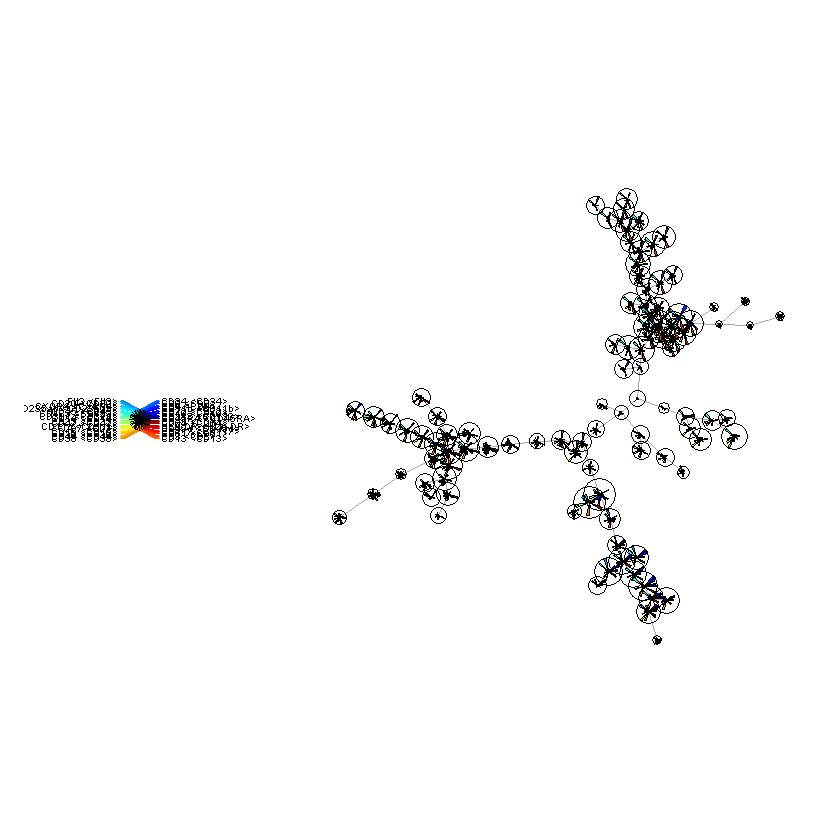

In [11]:
FlowSOM::PlotStars(out[[1]])

In [12]:
str(out[[1]]$map)
head(out[[1]]$map$mapping)
dim(out[[1]]$map$mapping)

List of 15
 $ xdim        : num 10
 $ ydim        : num 10
 $ rlen        : num 10
 $ mst         : num 1
 $ alpha       :List of 1
  ..$ : num [1:2] 0.05 0.01
 $ radius      :List of 1
  ..$ : num [1:2] 6 0
 $ init        : logi FALSE
 $ distf       : num 2
 $ grid        :'data.frame':	100 obs. of  2 variables:
  ..$ Var1: int [1:100] 1 2 3 4 5 6 7 8 9 10 ...
  ..$ Var2: int [1:100] 1 1 1 1 1 1 1 1 1 1 ...
  ..- attr(*, "out.attrs")=List of 2
  .. ..$ dim     : int [1:2] 10 10
  .. ..$ dimnames:List of 2
  .. .. ..$ Var1: chr [1:10] "Var1= 1" "Var1= 2" "Var1= 3" "Var1= 4" ...
  .. .. ..$ Var2: chr [1:10] "Var2= 1" "Var2= 2" "Var2= 3" "Var2= 4" ...
 $ codes       : num [1:100, 1:32] 0.808 0.692 0.638 1.099 0.363 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:32] "CD45RA" "CD133" "CD19" "CD22" ...
 $ mapping     : num [1:265627, 1:2] 66 87 66 76 76 76 76 76 76 66 ...
 $ nNodes      : int 100
 $ colsUsed    : int [1:32] 5 6 7 8 9 10 11 12 13 14 ...
 $ medianVa

[,1] [,2]    
[1,] 66   2.517081
[2,] 87   4.443529
[3,] 66   2.490036
[4,] 76   2.294188
[5,] 76   1.905129
[6,] 76   2.356330

[1] 265627      2

In [13]:
clus <- vector("list", length(data))
names(clus) <- names(data)

for (i in 1:length(clus)) {
  if (!is_FlowCAP[i]) {
    clus[[i]] <- out[[i]]$map$mapping[, 1]
    
  } else {
    # FlowCAP data sets
    clus_list_i <- lapply(out[[i]], function(o) o$map$mapping[, 1])
    names(clus_list_i) <- names(out[[i]])
    
    # convert FlowCAP cluster labels into format "sample_number"_"cluster_number"
    # e.g. sample 1, cluster 3 -> cluster label 1_3
    names_i <- rep(names(clus_list_i), times = sapply(clus_list_i, length))
    clus_collapse_i <- unlist(clus_list_i, use.names = FALSE)
    clus[[i]] <- paste(names_i, clus_collapse_i, sep = "_")
  }
}

In [14]:
sapply(clus, length)

Levine_32dim Levine_13dim   Samusik_01  Samusik_all Nilsson_rare Mosmann_rare 
      265627       167044        86864       841644        44140       396460 
  FlowCAP_ND  FlowCAP_WNV 
     1778883      1214373

In [15]:
table(clus[[1]])
sapply(clus, function(cl) length(table(cl)))


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2867 3558 1788 4129 4151 4086 1148  808 2320 2717 2681 3143 3766 3603 4565  570 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
 527  724 4026 1956 3162 2789 3241 2695 4371 3270 2480 3506 3198 1863 2237 3583 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
3645 4708 3845 2060 3375 2497 3130 2624 2525 3374 3319 2727 2655 1558 1942 2183 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
4491 4158 2964 2601 2264 3025 1913 1482 1192 3018 2582 2814  366  474  385 2586 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
 717 1875  809 2211 1642 2028 2271  524 4512 2002 2001 1933 1366 3066 2125 1964 
  81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96 
4278 3322 3499 3815 2725 2326  960 1673 1497 2539 4781 4263 3524 2008 2895 3808 
  97   98   99  100 
1739 1

Levine_32dim Levine_13dim   Samusik_01  Samusik_all Nilsson_rare Mosmann_rare 
         100          100          100          100          100          100 
  FlowCAP_ND  FlowCAP_WNV 
        3000         1300

In [16]:
files_labels <- paste0("../FlowSOM_pre_labels_", 
                       names(clus), ".txt")

for (i in 1:length(files_labels)) {
  res_i <- data.frame(label = clus[[i]])
  write.table(res_i, file = files_labels[i], row.names = FALSE, quote = FALSE, sep = "\t")
}


Warning message in file(file, ifelse(append, "a", "w")):
"cannot open file '../FlowSOM_pre_labels_Levine_32dim.txt': Permission denied"

ERROR: Error in file(file, ifelse(append, "a", "w")): cannot open the connection


In [18]:
runtimes <- lapply(runtimes, function(r) r["elapsed"])
runtimes <- t(as.data.frame(runtimes, row.names = "runtime"))

In [19]:
write.table(runtimes, file = "../runtime_FlowSOM_pre.txt", 
            quote = FALSE, sep = "\t")

### FlowSOM_pre (manual)

In [17]:
grid_size <- list(
  Levine_32dim = 10, 
  Levine_13dim = 10, 
  Samusik_01   = 10, 
  Samusik_all  = 10, 
  Nilsson_rare = 10, 
  Mosmann_rare = 20, 
  FlowCAP_ND   = 10, 
  FlowCAP_WNV  = 10
)

In [18]:
seed <- 1000
out <- runtimes <- vector("list", length(data))
names(out) <- names(runtimes) <- names(data)

In [19]:
system.time({
for (i in 1:length(data)) {
  
  if (!is_FlowCAP[i]) {
    set.seed(seed)
    runtimes[[i]] <- system.time({
      fSOM <- FlowSOM::ReadInput(data[[i]], transform = FALSE, scale = FALSE)
      fSOM <- FlowSOM::BuildSOM(fSOM, colsToUse = marker_cols[[i]], 
                                xdim = grid_size[[i]], ydim = grid_size[[i]])
      fSOM <- FlowSOM::BuildMST(fSOM)
    })
    out[[i]] <- fSOM
    cat("data set", names(data[i]), ": run complete\n")
    
  } else {
    # FlowCAP data sets: run clustering algorithm separately for each sample
    out[[i]] <- runtimes[[i]] <- vector("list", length(data[[i]]))
    names(out[[i]]) <- names(runtimes[[i]]) <- names(data[[i]])
    
    for (j in 1:length(data[[i]])) {
      set.seed(seed)
      runtimes[[i]][[j]] <- system.time({
        fSOM <- FlowSOM::ReadInput(data[[i]][[j]], transform = FALSE, scale = FALSE)
        fSOM <- FlowSOM::BuildSOM(fSOM, colsToUse = marker_cols[[i]], 
                                  xdim = grid_size[[i]], ydim = grid_size[[i]])
        fSOM <- FlowSOM::BuildMST(fSOM)
      })
      out[[i]][[j]] <- fSOM
    }
    cat("data set", names(data[i]), ": run complete\n")
    
    # FlowCAP data sets: sum runtimes over samples
    runtimes_i <- do.call(rbind, runtimes[[i]])[, 1:3]
    runtimes_i <- colSums(runtimes_i)
    names(runtimes_i) <- c("user", "system", "elapsed")
    runtimes[[i]] <- runtimes_i
  }
}
    })

Building SOM

Mapping data to SOM

Building MST



data set Levine_32dim : run complete


Building SOM

Mapping data to SOM

Building MST



data set Levine_13dim : run complete


Building SOM

Mapping data to SOM

Building MST



data set Samusik_01 : run complete


Building SOM

Mapping data to SOM

Building MST



data set Samusik_all : run complete


Building SOM

Mapping data to SOM

Building MST



data set Nilsson_rare : run complete


Building SOM

Mapping data to SOM

Building MST



data set Mosmann_rare : run complete


Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mappin

data set FlowCAP_ND : run complete


Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST

Building SOM

Mapping data to SOM

Building MST



data set FlowCAP_WNV : run complete


   user  system elapsed 
 932.02   37.28 1150.63 

In [20]:
out_pre_manual <- out
runtimes_pre_manual <- runtimes

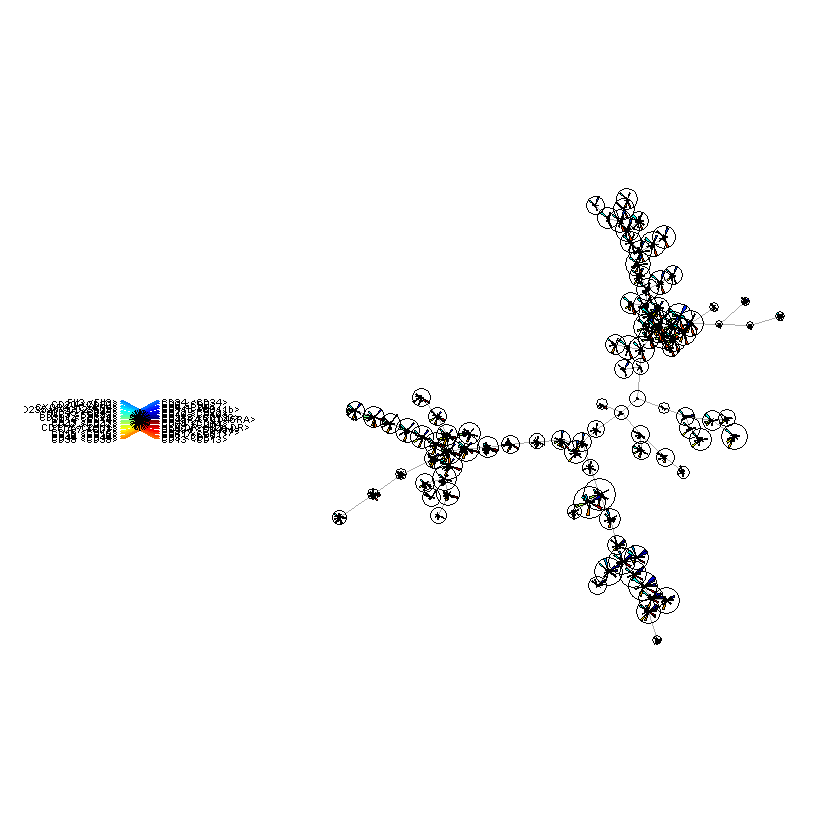

In [21]:
FlowSOM::PlotStars(out[[1]])

In [11]:
str(out[[1]]$map)
head(out[[1]]$map$mapping)
dim(out[[1]]$map$mapping)

# extract cluster labels
clus <- vector("list", length(data))
names(clus) <- names(data)

for (i in 1:length(clus)) {
  if (!is_FlowCAP[i]) {
    clus[[i]] <- out[[i]]$map$mapping[, 1]
    
  } else {
    # FlowCAP data sets
    clus_list_i <- lapply(out[[i]], function(o) o$map$mapping[, 1])
    names(clus_list_i) <- names(out[[i]])
    
    # convert FlowCAP cluster labels into format "sample_number"_"cluster_number"
    # e.g. sample 1, cluster 3 -> cluster label 1.3
    names_i <- rep(names(clus_list_i), times = sapply(clus_list_i, length))
    clus_collapse_i <- unlist(clus_list_i, use.names = FALSE)
    clus[[i]] <- paste(names_i, clus_collapse_i, sep = "_")
  }
}

sapply(clus, length)

# cluster sizes and number of clusters
# (for FlowCAP data sets, total no. of clusters = no. samples * no. clusters per sample)
table(clus[[1]])
sapply(clus, function(cl) length(table(cl)))

# save cluster labels
files_labels <- paste0("../FlowSOM_pre_labels_", 
                       names(clus), ".txt")

for (i in 1:length(files_labels)) {
  res_i <- data.frame(label = clus[[i]])
  write.table(res_i, file = files_labels[i], row.names = FALSE, quote = FALSE, sep = "\t")
}

# save runtimes
runtimes <- lapply(runtimes, function(r) r["elapsed"])
runtimes <- t(as.data.frame(runtimes, row.names = "runtime"))

write.table(runtimes, file = "../runtime_FlowSOM_pre.txt", 
            quote = FALSE, sep = "\t")

List of 15
 $ xdim        : num 10
 $ ydim        : num 10
 $ rlen        : num 10
 $ mst         : num 1
 $ alpha       :List of 1
  ..$ : num [1:2] 0.05 0.01
 $ radius      :List of 1
  ..$ : num [1:2] 6 0
 $ init        : logi FALSE
 $ distf       : num 2
 $ grid        :'data.frame':	100 obs. of  2 variables:
  ..$ Var1: int [1:100] 1 2 3 4 5 6 7 8 9 10 ...
  ..$ Var2: int [1:100] 1 1 1 1 1 1 1 1 1 1 ...
  ..- attr(*, "out.attrs")=List of 2
  .. ..$ dim     : int [1:2] 10 10
  .. ..$ dimnames:List of 2
  .. .. ..$ Var1: chr [1:10] "Var1= 1" "Var1= 2" "Var1= 3" "Var1= 4" ...
  .. .. ..$ Var2: chr [1:10] "Var2= 1" "Var2= 2" "Var2= 3" "Var2= 4" ...
 $ codes       : num [1:100, 1:32] 0.808 0.692 0.638 1.099 0.363 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:32] "CD45RA" "CD133" "CD19" "CD22" ...
 $ mapping     : num [1:265627, 1:2] 66 87 66 76 76 76 76 76 76 66 ...
 $ nNodes      : int 100
 $ colsUsed    : int [1:32] 5 6 7 8 9 10 11 12 13 14 ...
 $ medianVa

[,1] [,2]    
[1,] 66   2.517081
[2,] 87   4.443529
[3,] 66   2.490036
[4,] 76   2.294188
[5,] 76   1.905129
[6,] 76   2.356330

[1] 265627      2

Levine_32dim Levine_13dim   Samusik_01  Samusik_all Nilsson_rare Mosmann_rare 
      265627       167044        86864       841644        44140       396460 
  FlowCAP_ND  FlowCAP_WNV 
     1778883      1214373


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2867 3558 1788 4129 4151 4086 1148  808 2320 2717 2681 3143 3766 3603 4565  570 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
 527  724 4026 1956 3162 2789 3241 2695 4371 3270 2480 3506 3198 1863 2237 3583 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
3645 4708 3845 2060 3375 2497 3130 2624 2525 3374 3319 2727 2655 1558 1942 2183 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
4491 4158 2964 2601 2264 3025 1913 1482 1192 3018 2582 2814  366  474  385 2586 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
 717 1875  809 2211 1642 2028 2271  524 4512 2002 2001 1933 1366 3066 2125 1964 
  81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96 
4278 3322 3499 3815 2725 2326  960 1673 1497 2539 4781 4263 3524 2008 2895 3808 
  97   98   99  100 
1739 1

Levine_32dim Levine_13dim   Samusik_01  Samusik_all Nilsson_rare Mosmann_rare 
         100          100          100          100          100          400 
  FlowCAP_ND  FlowCAP_WNV 
        3000         1300

In [ ]:
seed <- 1000
out <- runtimes <- vector("list", length(out_pre_auto))
names(out) <- names(runtimes) <- names(out_pre_auto)

### Meta Clustering (Auto)

In [20]:
seed <- 1000
out <- runtimes <- vector("list", length(out_pre_auto))
names(out) <- names(runtimes) <- names(out_pre_auto)

In [21]:
system.time({
    for (i in 1:length(out_pre_auto)) {
  if (!is_FlowCAP[i]) {
    set.seed(seed)
    runtimes[[i]] <- system.time({
      meta <- FlowSOM::MetaClustering(out_pre_auto[[i]]$map$codes, method = "metaClustering_consensus")
    })
    out[[i]] <- meta
    cat("data set", names(data[i]), ": run complete\n")
    
  } else {
    # FlowCAP data sets: run clustering algorithm separately for each sample
    out[[i]] <- runtimes[[i]] <- vector("list", length(data[[i]]))
    names(out[[i]]) <- names(runtimes[[i]]) <- names(data[[i]])
    
    for (j in 1:length(data[[i]])) {
      set.seed(seed)
      runtimes[[i]][[j]] <- system.time({
        meta <- FlowSOM::MetaClustering(out_pre_auto[[i]][[j]]$map$codes, method = "metaClustering_consensus")
      })
      out[[i]][[j]] <- meta
    }
    cat("data set", names(data[i]), ": run complete\n")
    
    # FlowCAP data sets: sum runtimes over samples
    runtimes_i <- do.call(rbind, runtimes[[i]])[, 1:3]
    runtimes_i <- colSums(runtimes_i)
    names(runtimes_i) <- c("user", "system", "elapsed")
    runtimes[[i]] <- runtimes_i
  }
}

})

data set Levine_32dim : run complete
data set Levine_13dim : run complete
data set Samusik_01 : run complete
data set Samusik_all : run complete
data set Nilsson_rare : run complete
data set Mosmann_rare : run complete
data set FlowCAP_ND : run complete
data set FlowCAP_WNV : run complete


   user  system elapsed 
 565.09   11.09  698.36 

In [22]:
for (i in 1:length(runtimes)) {
  runtimes[[i]] <- runtimes_pre_auto[[i]] + runtimes[[i]]
}

# check cluster labels (one data set only)
out[[1]]
out[[8]][[1]]

# extract cluster labels
clus <- vector("list", length(data))
names(clus) <- names(data)

for (i in 1:length(clus)) {
  if (!is_FlowCAP[i]) {
    clus[[i]] <- out[[i]][out_pre_auto[[i]]$map$mapping[, 1]]
    
  } else {
    # FlowCAP data sets
    clus_list_i <- vector("list", length(out_pre_auto[[i]]))
    names(clus_list_i) <- names(out_pre_auto[[i]])
    for (j in 1:length(clus_list_i)) {
      clus_list_i[[j]] <- out[[i]][[j]][out_pre_auto[[i]][[j]]$map$mapping[, 1]]
    }
    
    # convert FlowCAP cluster labels into format "sample_number"_"cluster_number"
    # e.g. sample 1, cluster 3 -> cluster label 1.3
    names_i <- rep(names(clus_list_i), times = sapply(clus_list_i, length))
    clus_collapse_i <- unlist(clus_list_i, use.names = FALSE)
    clus[[i]] <- paste(names_i, clus_collapse_i, sep = "_")
  }
}

sapply(clus, length)

# cluster sizes and number of clusters
# (for FlowCAP data sets, total no. of clusters = no. samples * no. clusters per sample)
table(clus[[1]])
sapply(clus, function(cl) length(table(cl)))

# save cluster labels
files_labels <- paste0("../FlowSOM_labels_", names(clus), ".txt")

for (i in 1:length(files_labels)) {
  res_i <- data.frame(label = clus[[i]])
  write.table(res_i, file = files_labels[i], row.names = FALSE, quote = FALSE, sep = "\t")
}

# save runtimes
runtimes <- lapply(runtimes, function(r) r["elapsed"])
runtimes <- t(as.data.frame(runtimes, row.names = "runtime"))

write.table(runtimes, file = "../runtime_FlowSOM.txt", 
            quote = FALSE, sep = "\t")

[1] 1 1 1 1 1 1 2 2 3 3 1 1 1 1 1 1 1 2 3 3 1 1 1 1 1 1 1 3 3 3 1 1 1 1 1 1 3
 [38] 3 3 3 1 1 1 1 1 1 3 3 3 3 1 1 1 1 1 4 4 3 5 3 1 1 1 1 4 5 4 5 5 3 6 6 6 6
 [75] 5 5 5 5 5 5 6 6 6 6 4 4 5 5 5 5 6 6 6 4 4 4 4 5 5 5

[1] 1 1 2 2 2 3 3 3 4 4 1 1 2 2 2 3 3 3 3 4 1 1 2 2 2 2 3 3 3 3 5 5 2 2 2 3 3
 [38] 3 3 3 5 6 2 6 3 3 3 3 3 3 6 6 6 6 3 3 3 3 3 3 6 6 6 6 3 3 3 3 3 3 6 6 6 6
 [75] 3 3 3 3 3 3 6 6 6 3 3 3 3 3 3 3 6 6 6 3 3 3 3 3 3 3

Levine_32dim Levine_13dim   Samusik_01  Samusik_all Nilsson_rare Mosmann_rare 
      265627       167044        86864       841644        44140       396460 
  FlowCAP_ND  FlowCAP_WNV 
     1778883      1214373


     1      2      3      4      5      6 
114256   2680  51846  19701  40353  36791 

Levine_32dim Levine_13dim   Samusik_01  Samusik_all Nilsson_rare Mosmann_rare 
           6            7            6            9            7            5 
  FlowCAP_ND  FlowCAP_WNV 
         294           74

### Meta Clustering (Manual)

In [24]:
# number of clusters k
k <- list(
  Levine_32dim = 40, 
  Levine_13dim = 40, 
  Samusik_01   = 40, 
  Samusik_all  = 40, 
  Nilsson_rare = 40, 
  Mosmann_rare = 40, 
  FlowCAP_ND   = 7, 
  FlowCAP_WNV  = 4
)

In [25]:
seed <- 1000
out <- runtimes <- vector("list", length(out_pre_manual))
names(out) <- names(runtimes) <- names(out_pre_manual)

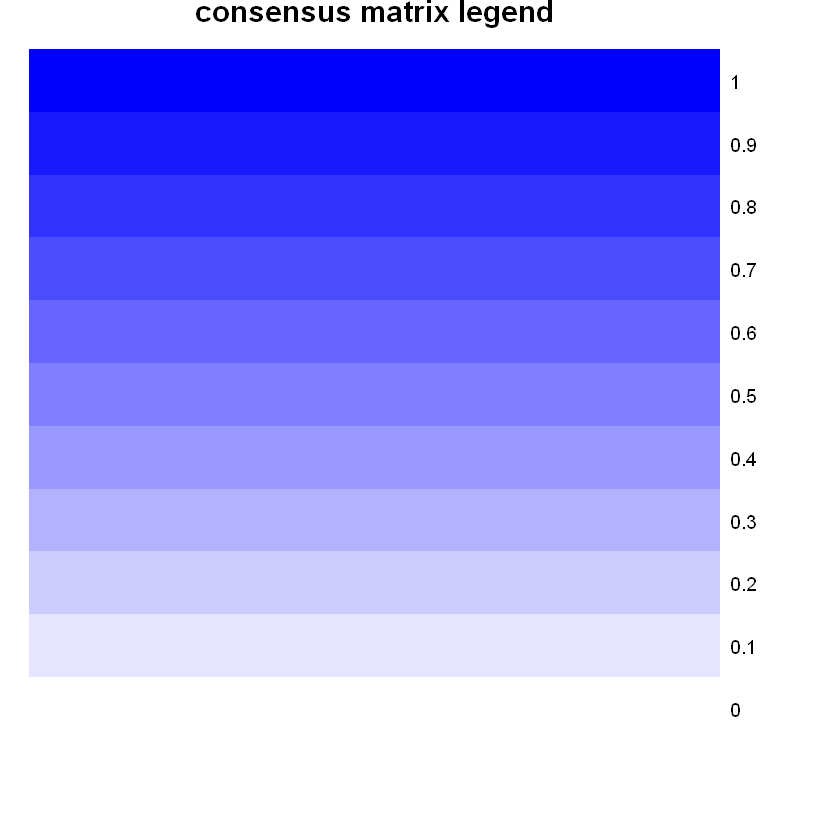

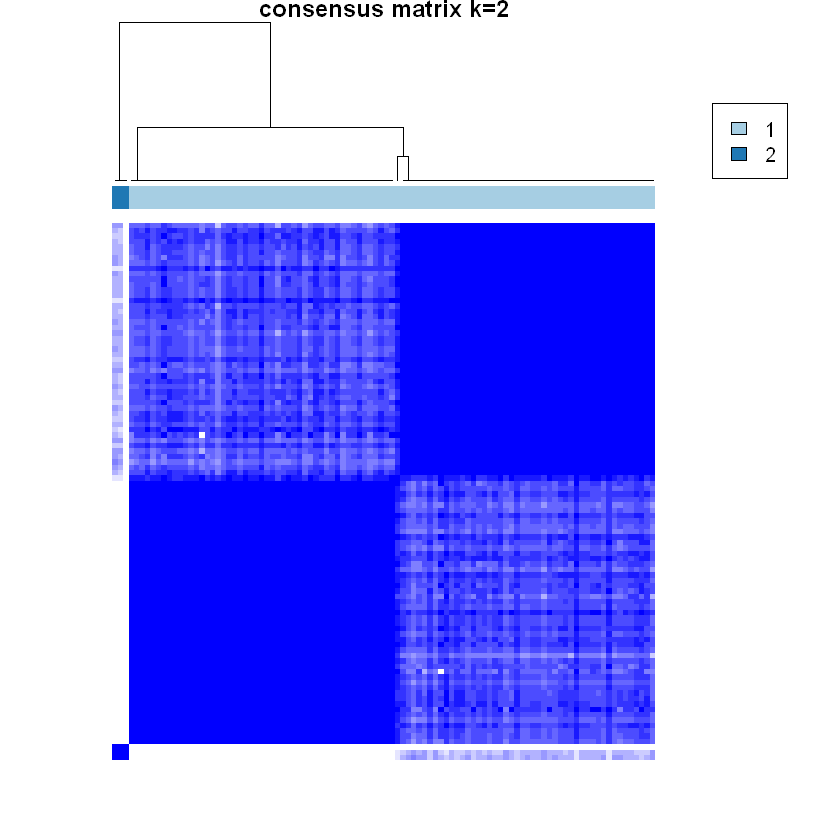

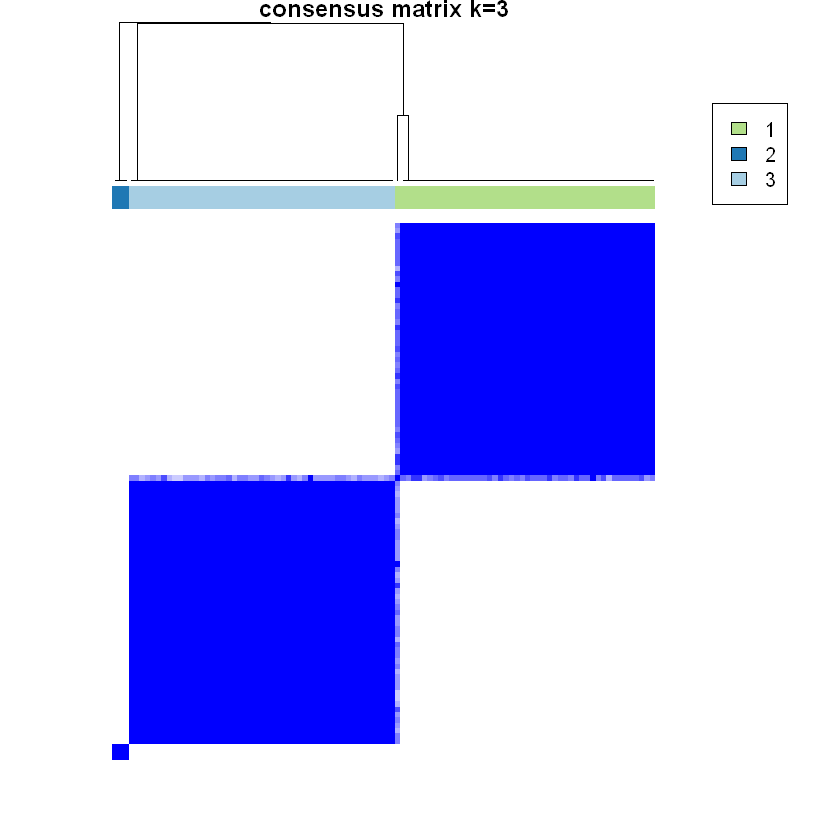

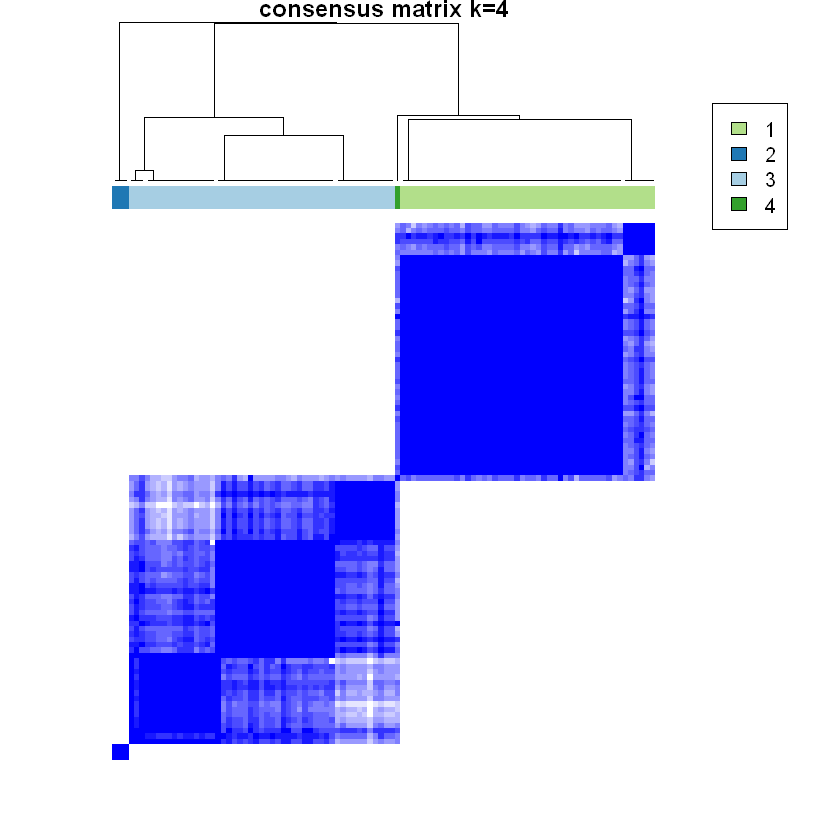

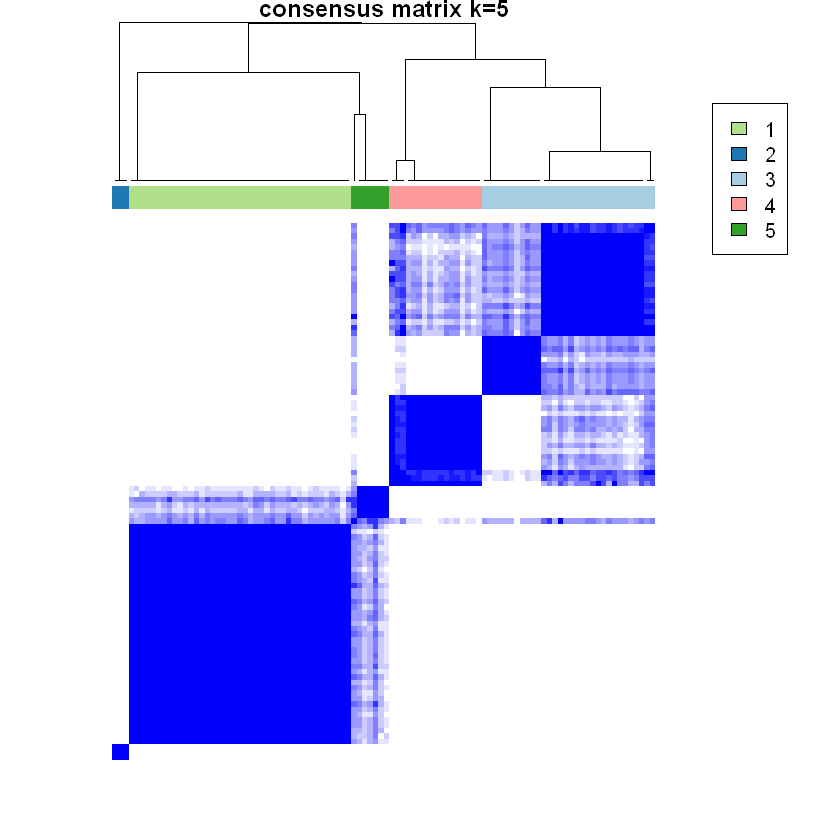

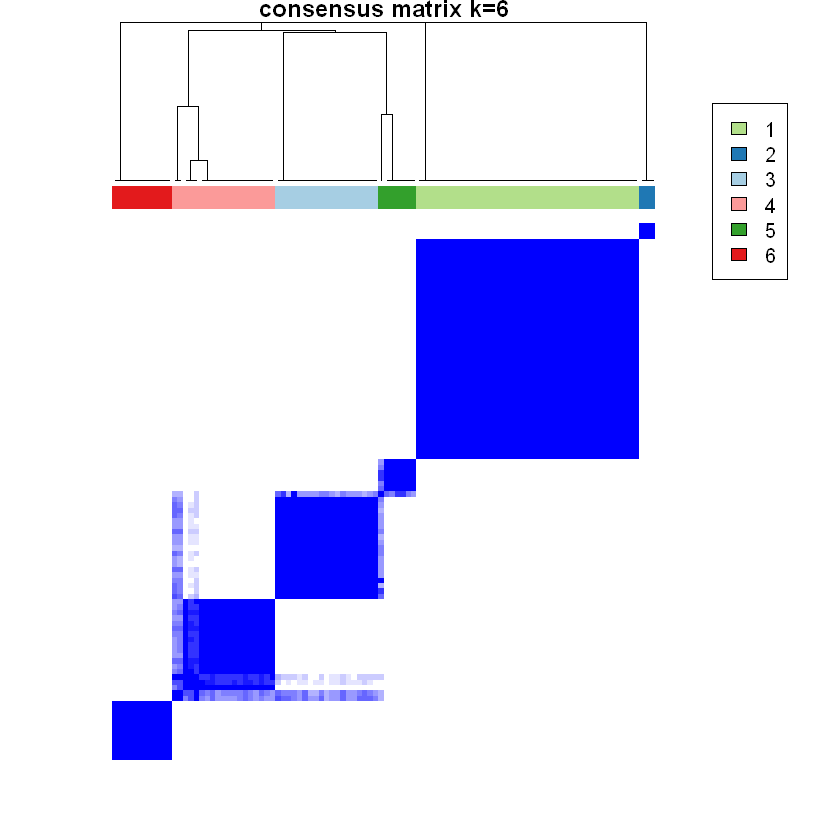

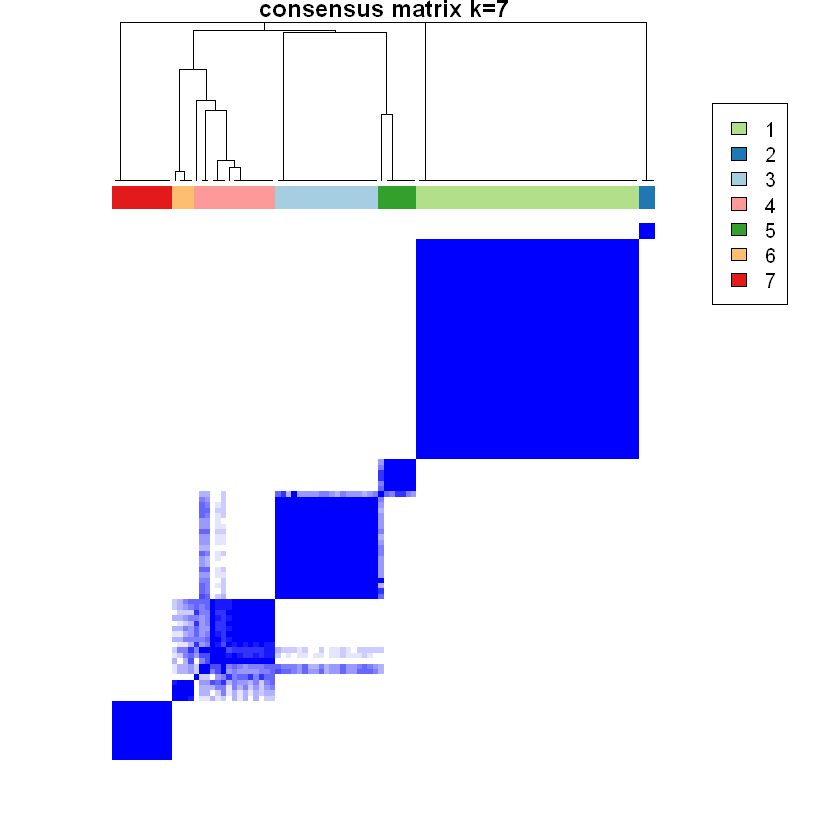

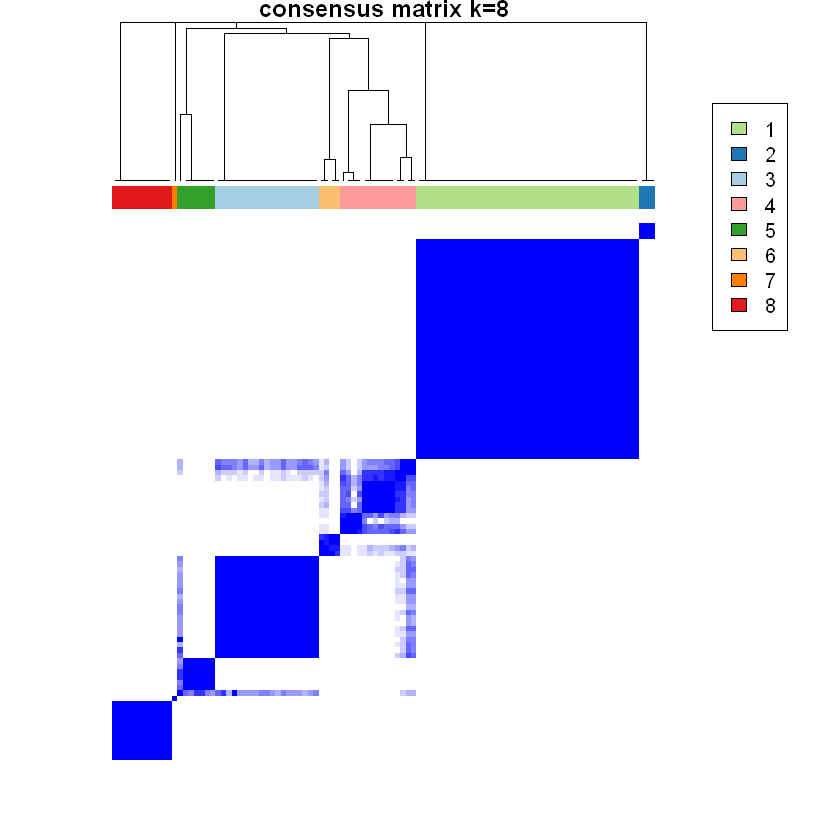

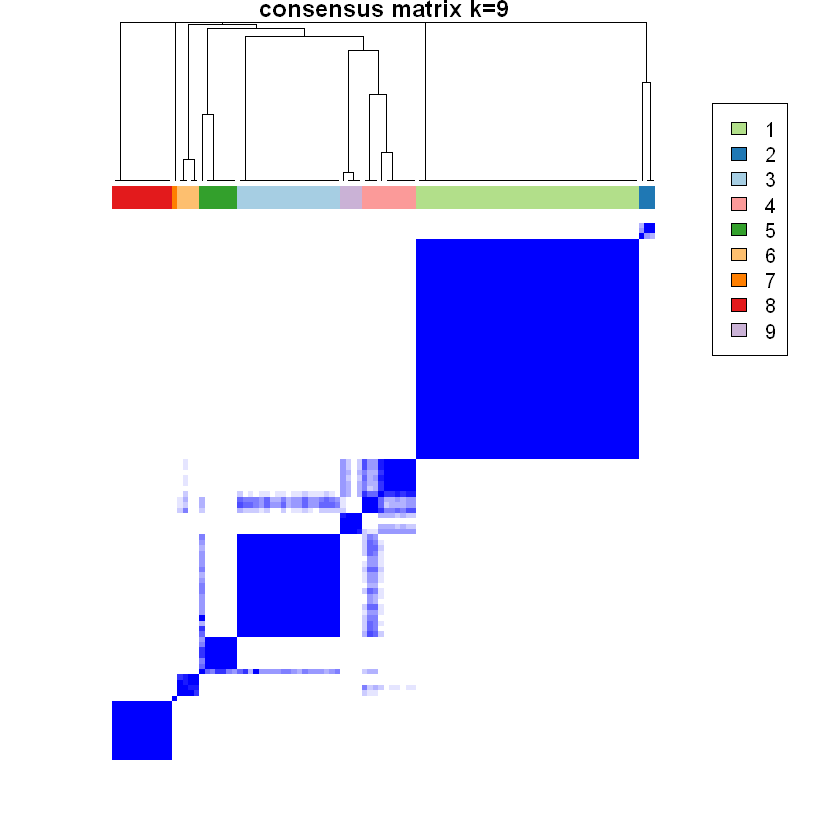

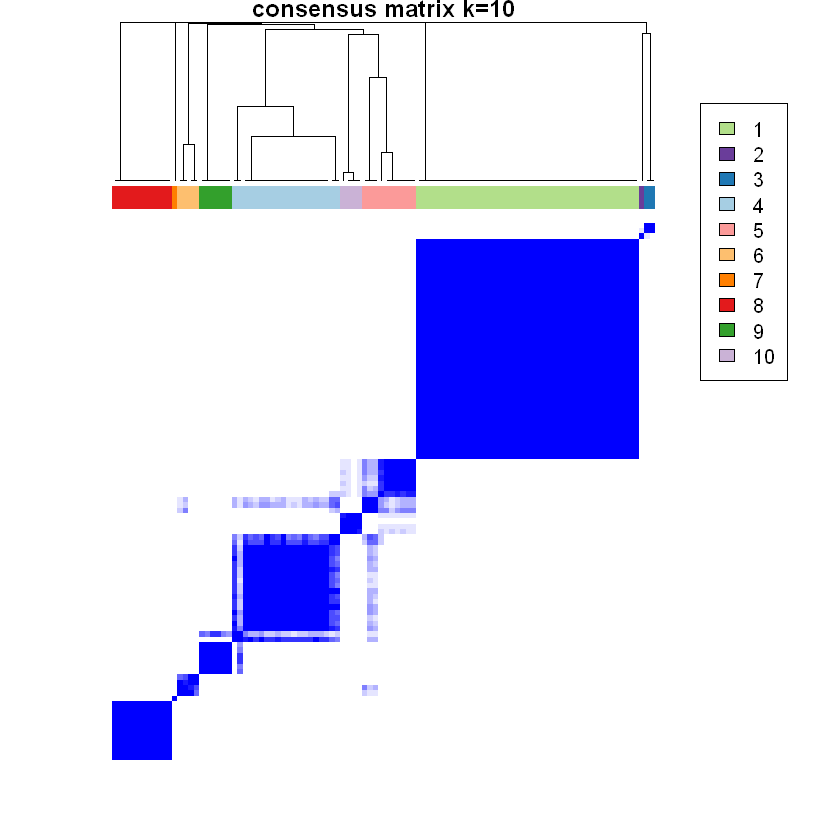

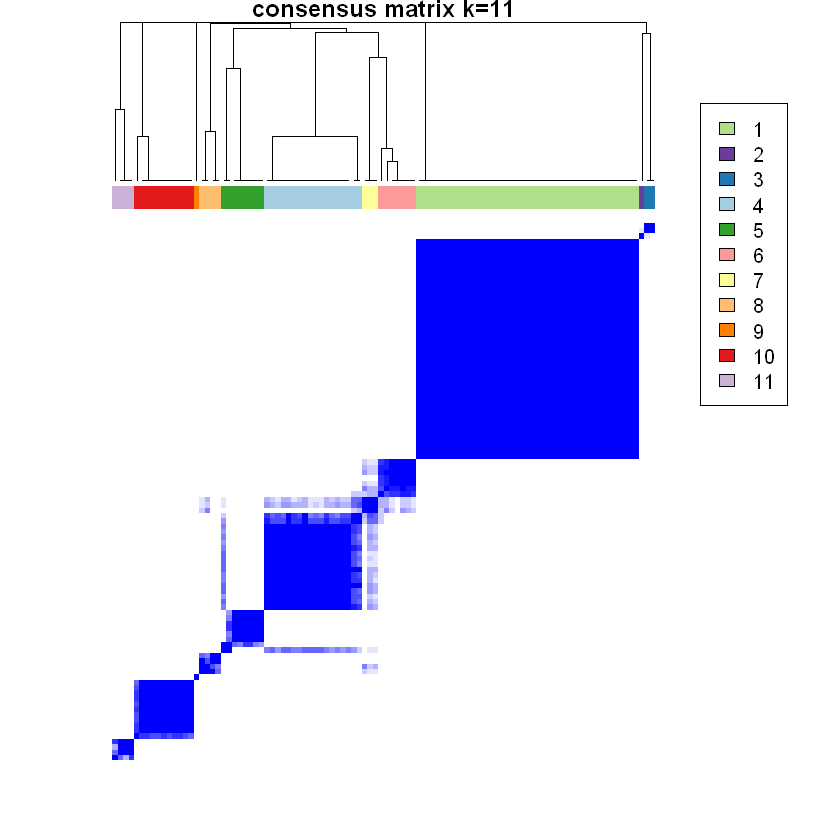

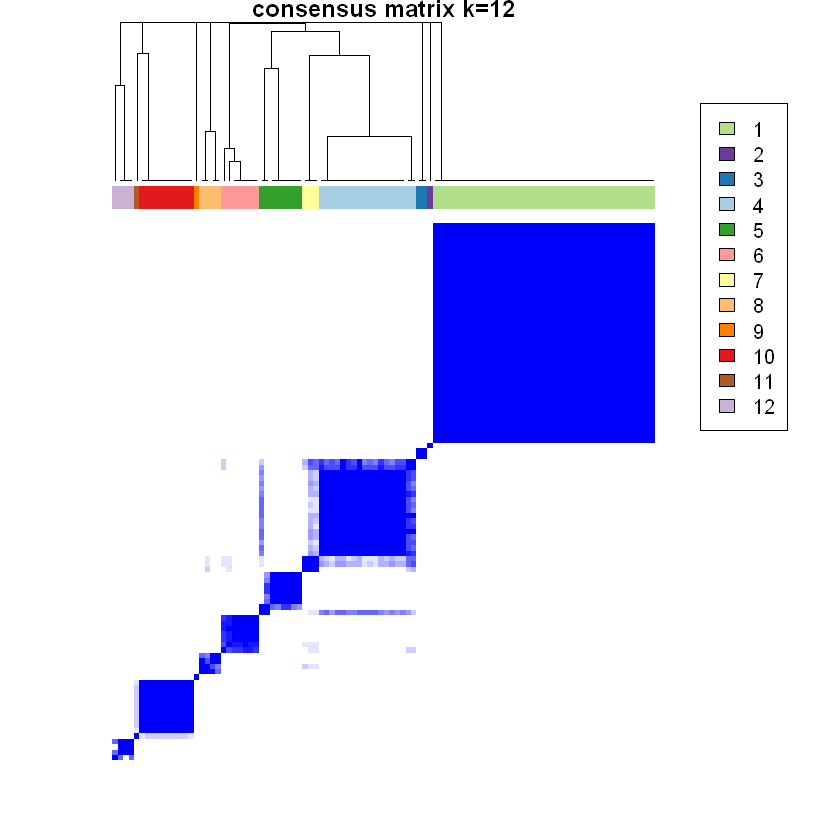

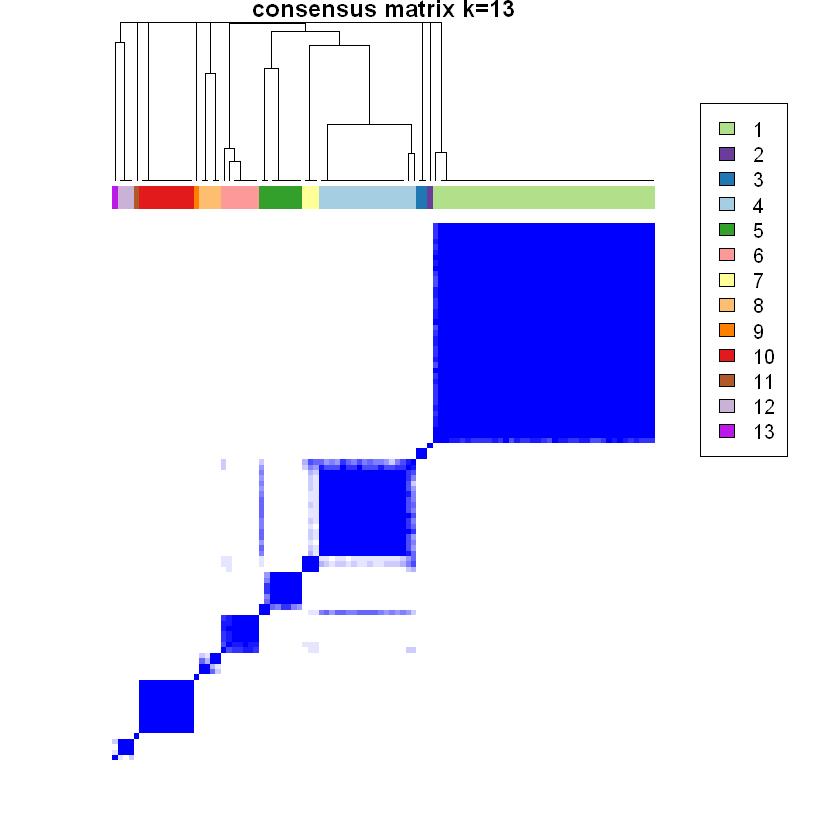

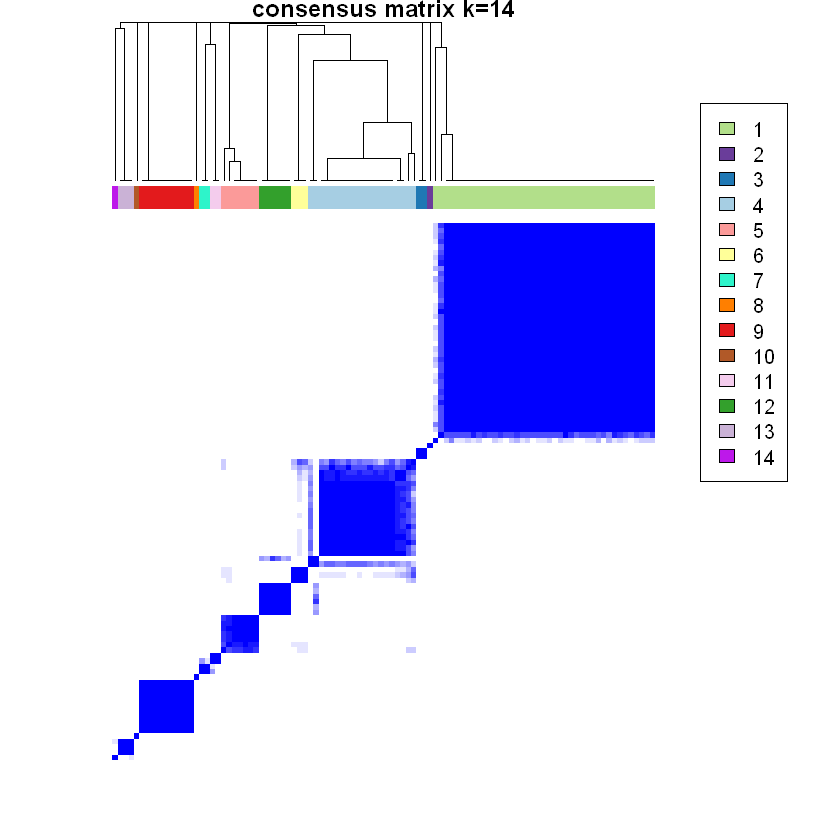

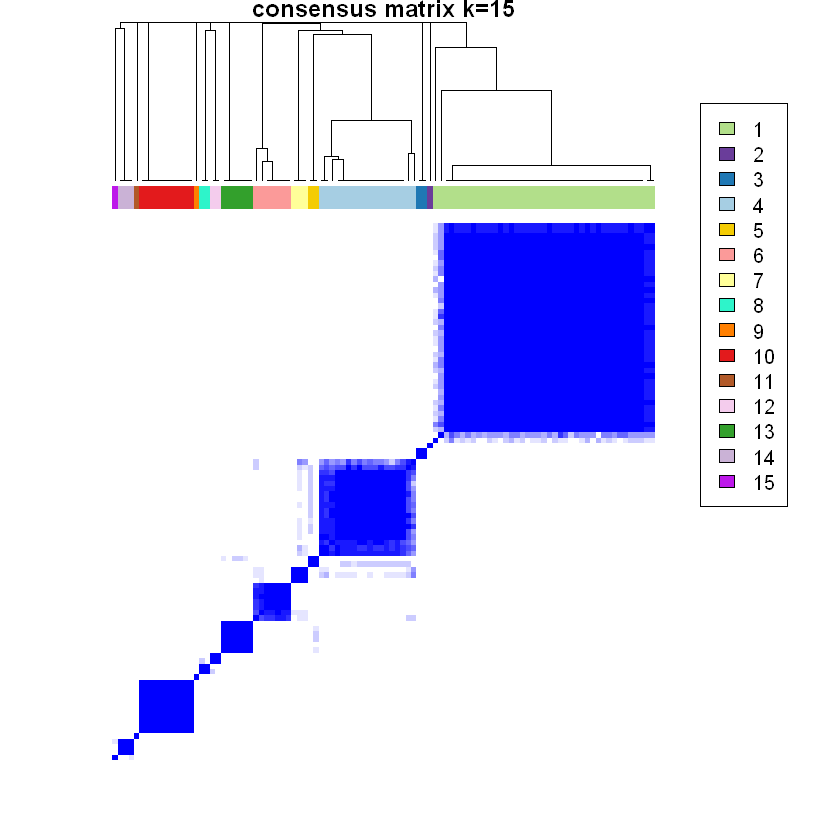

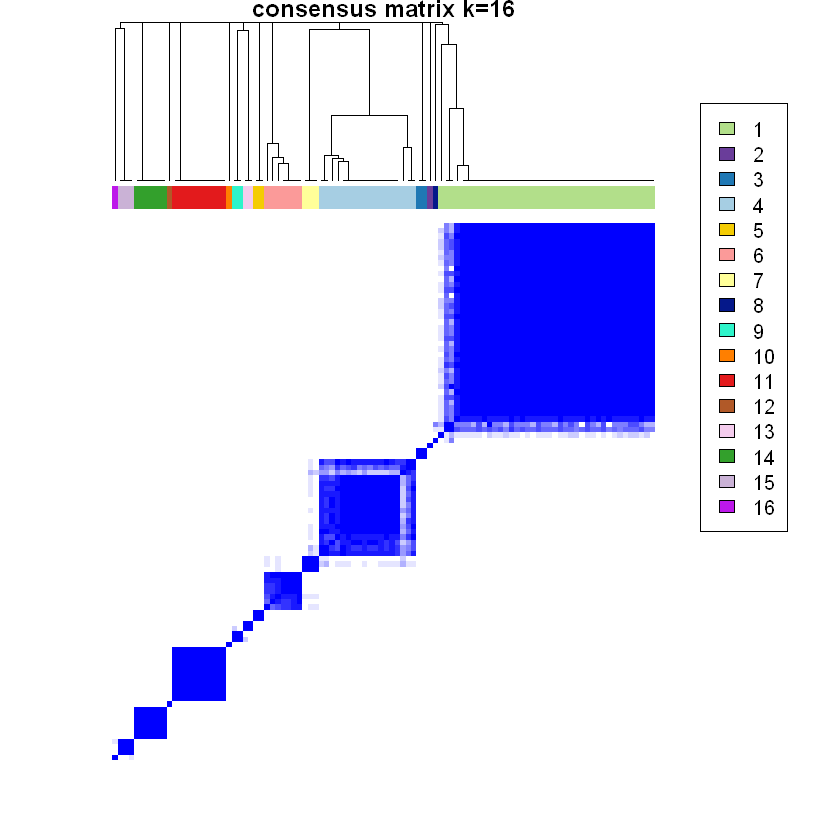

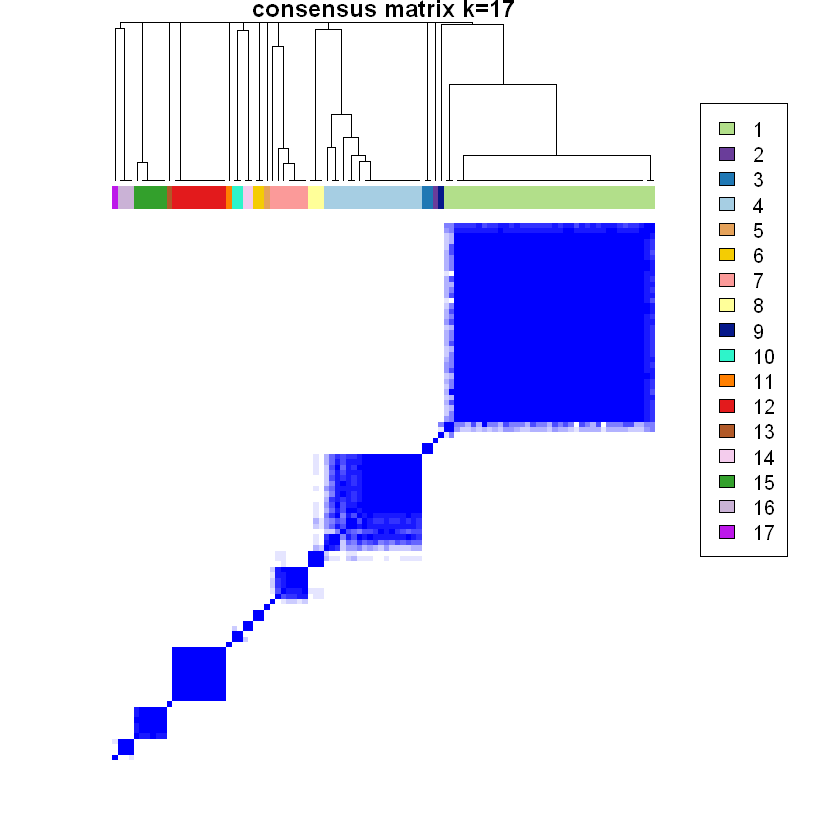

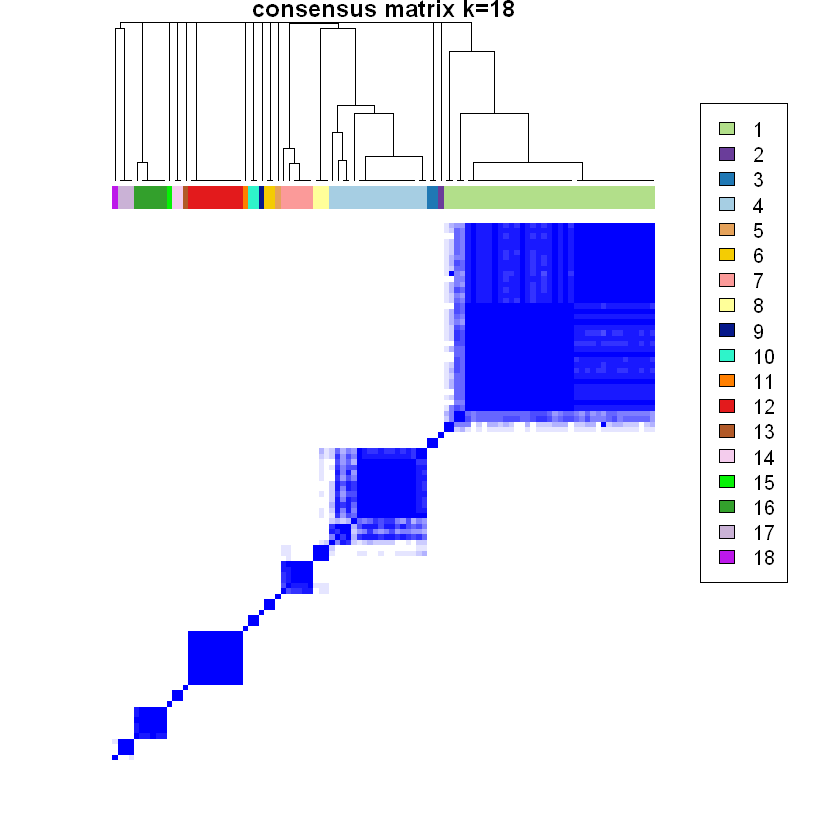

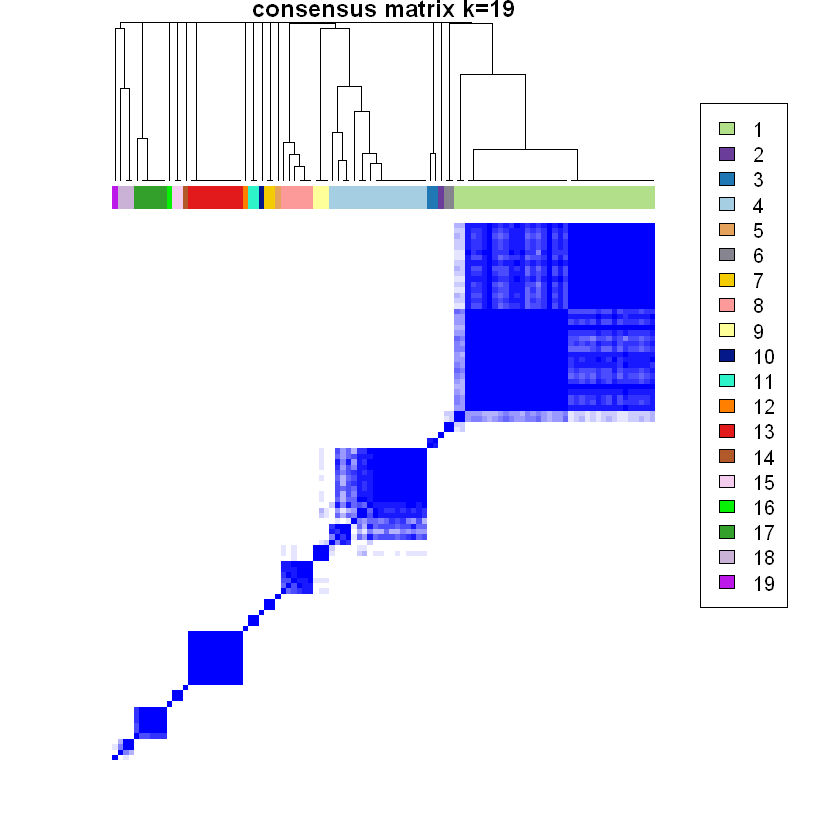

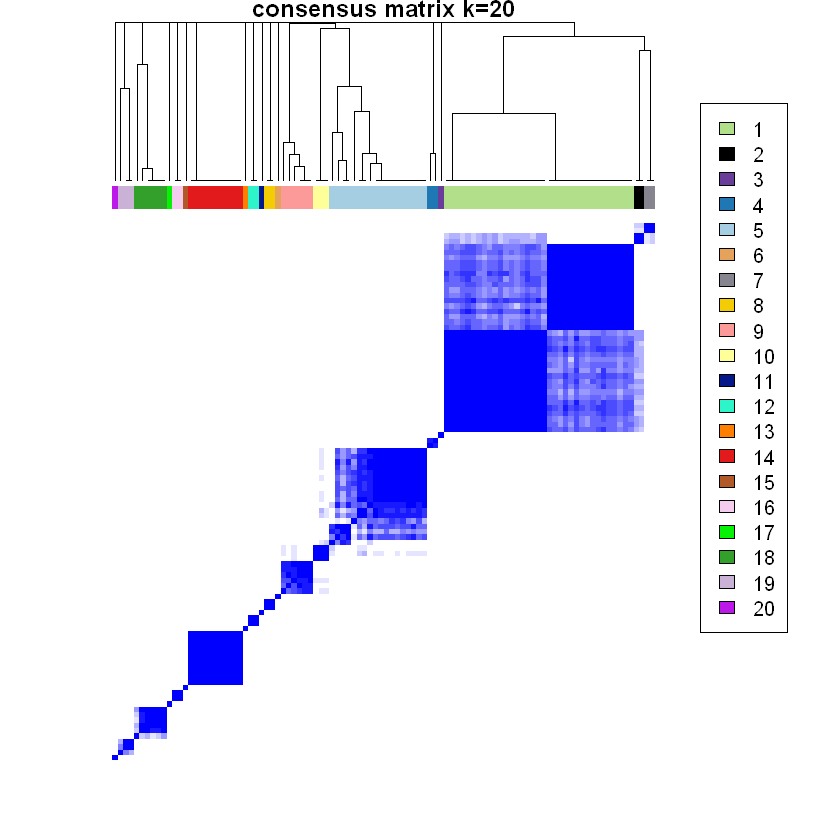

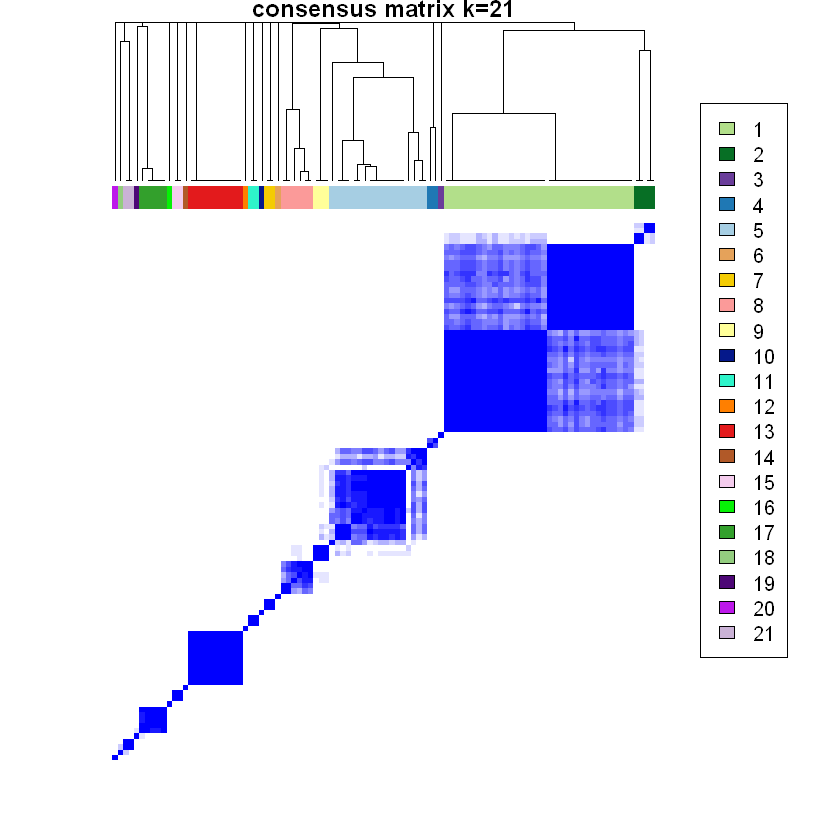

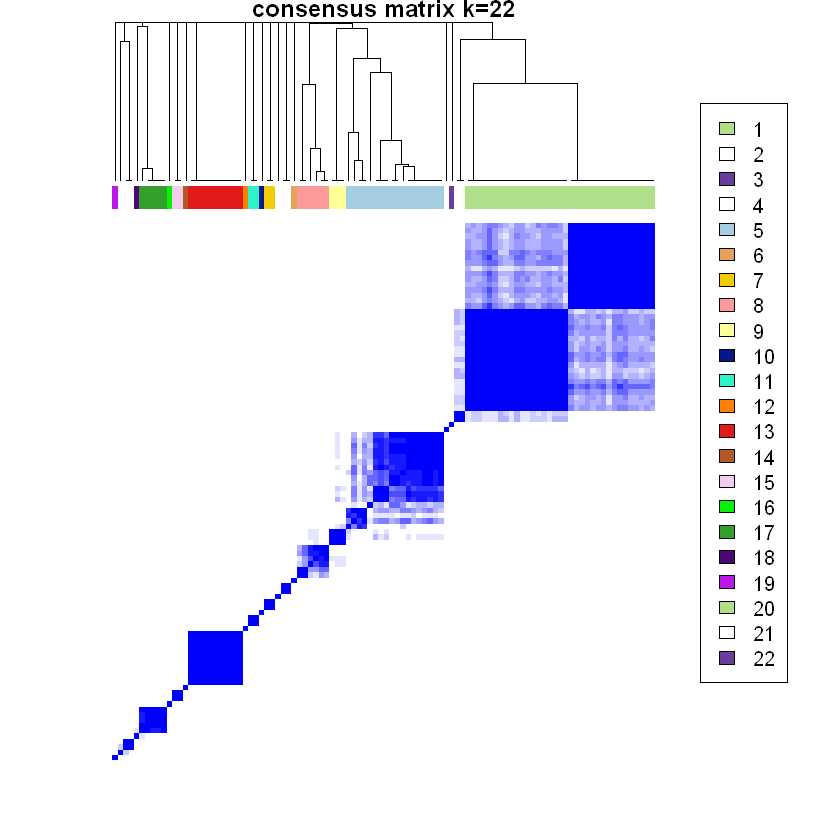

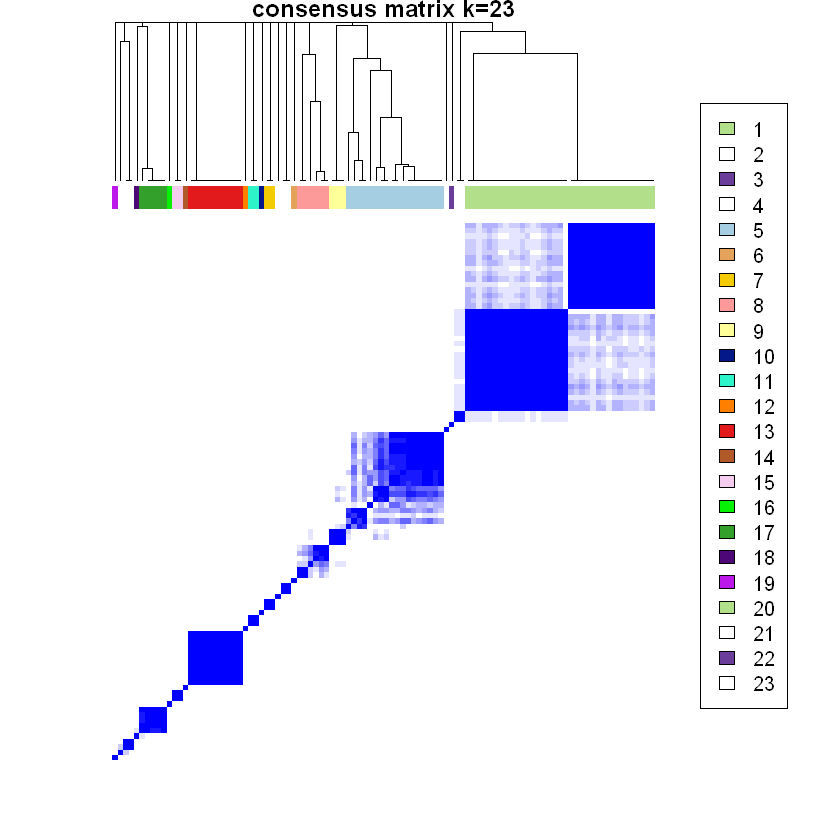

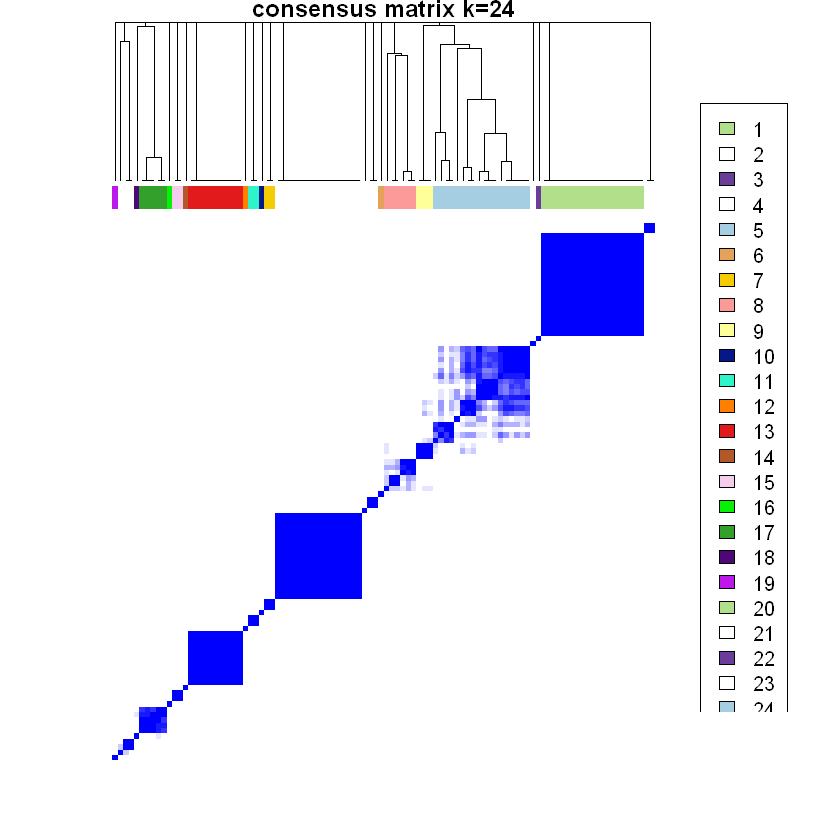

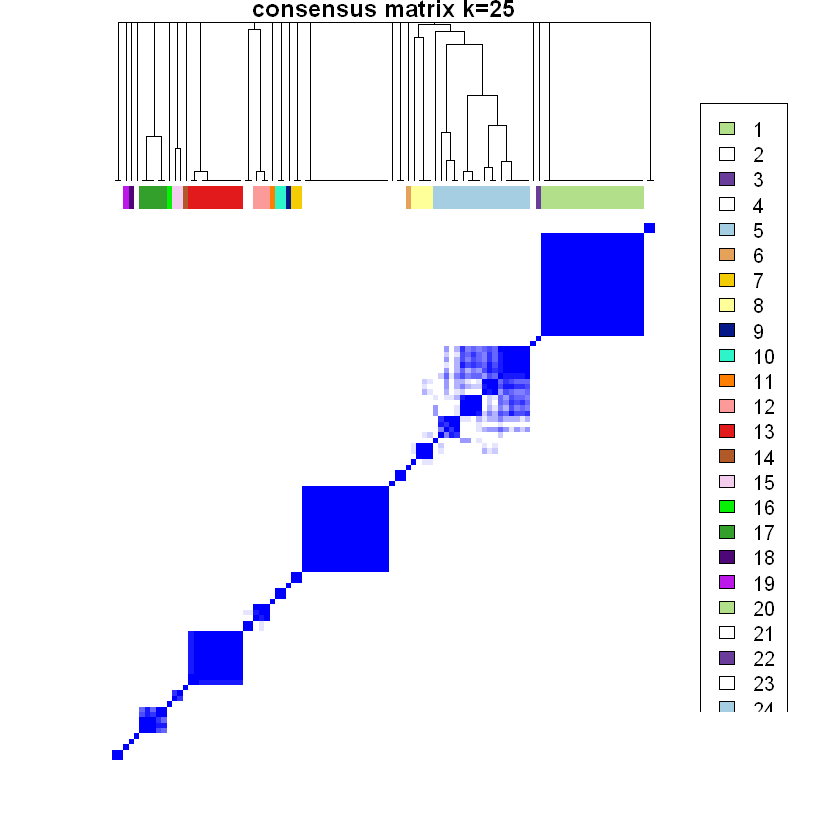

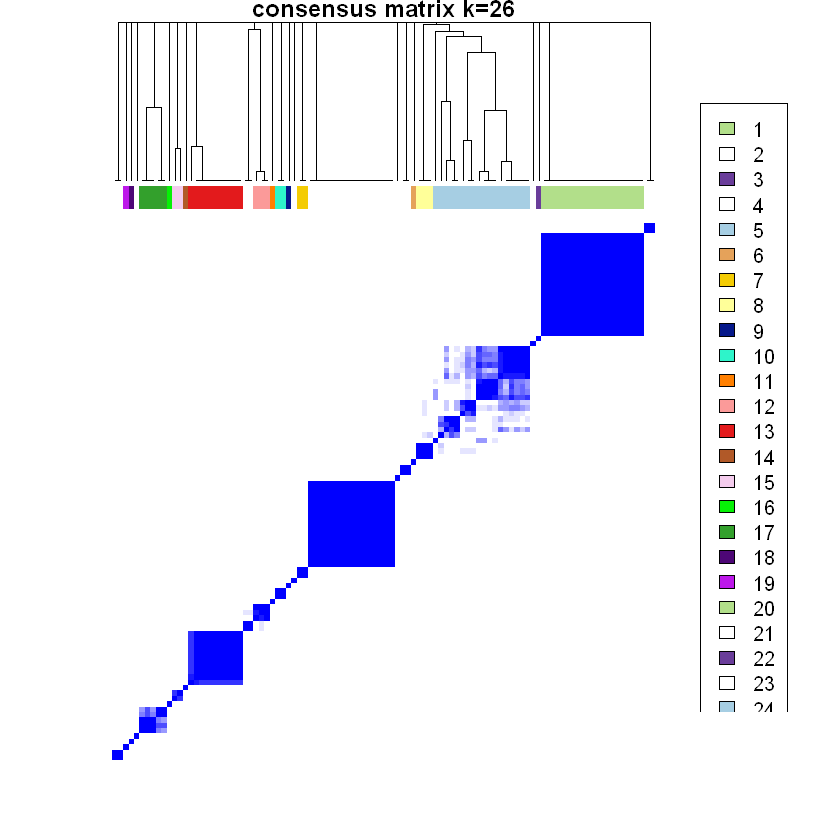

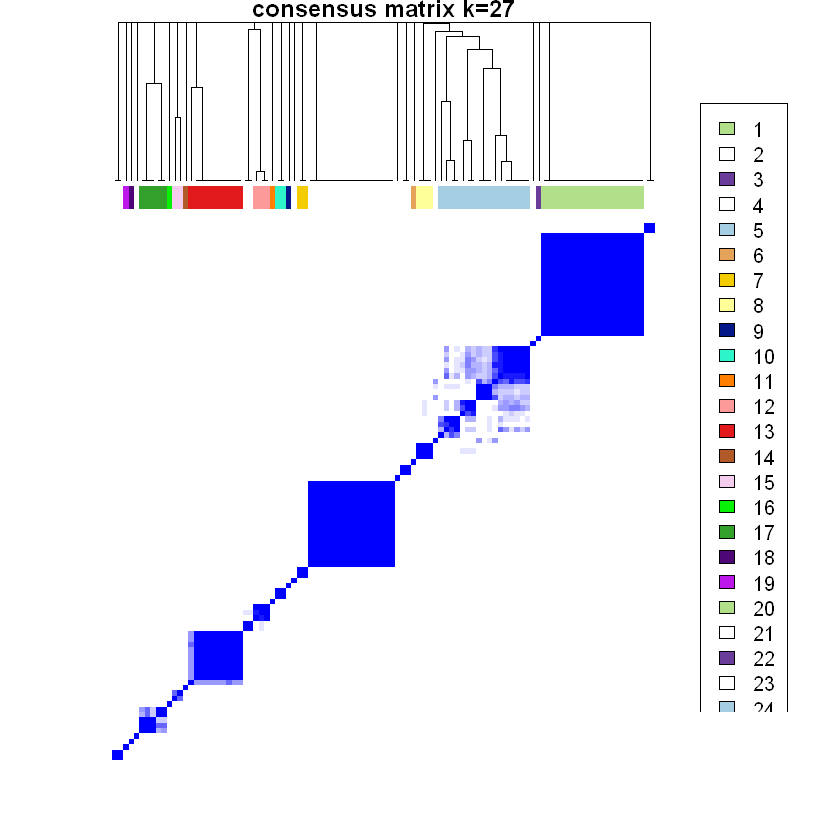

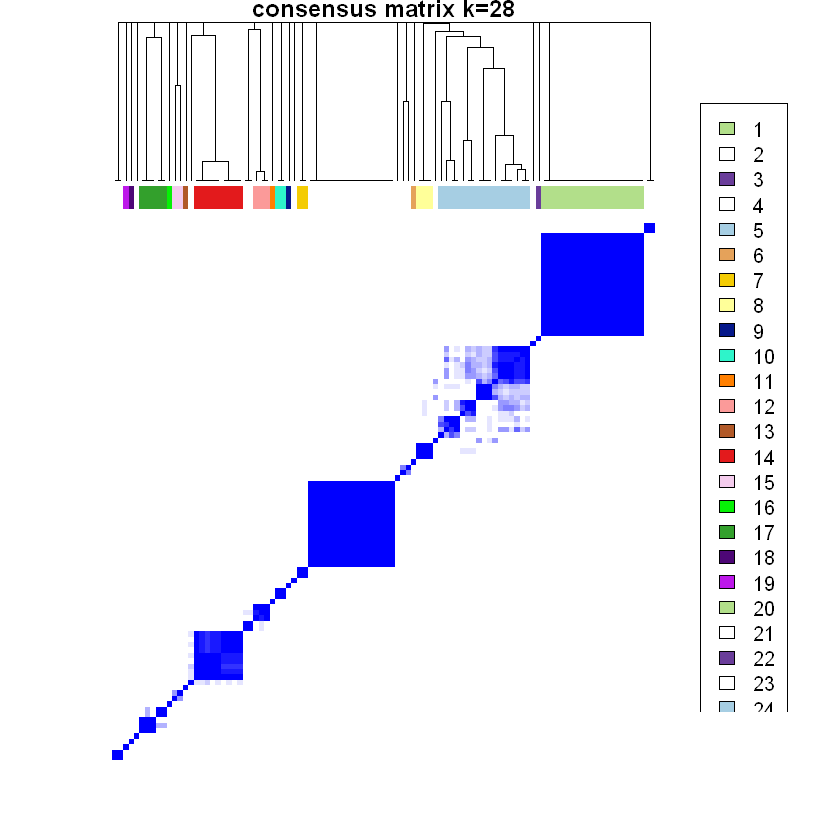

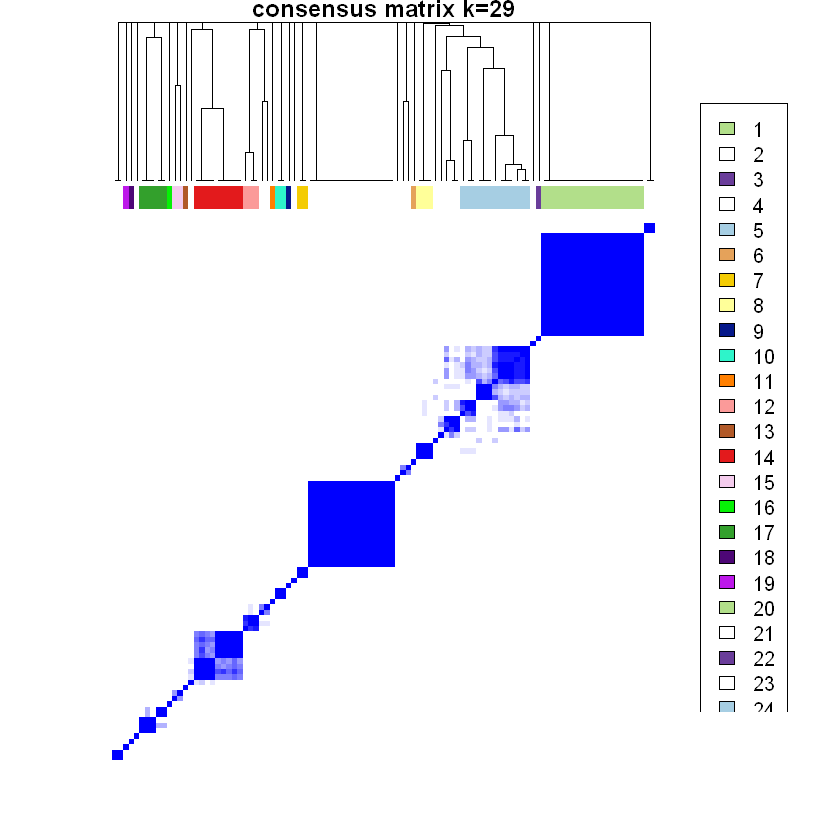

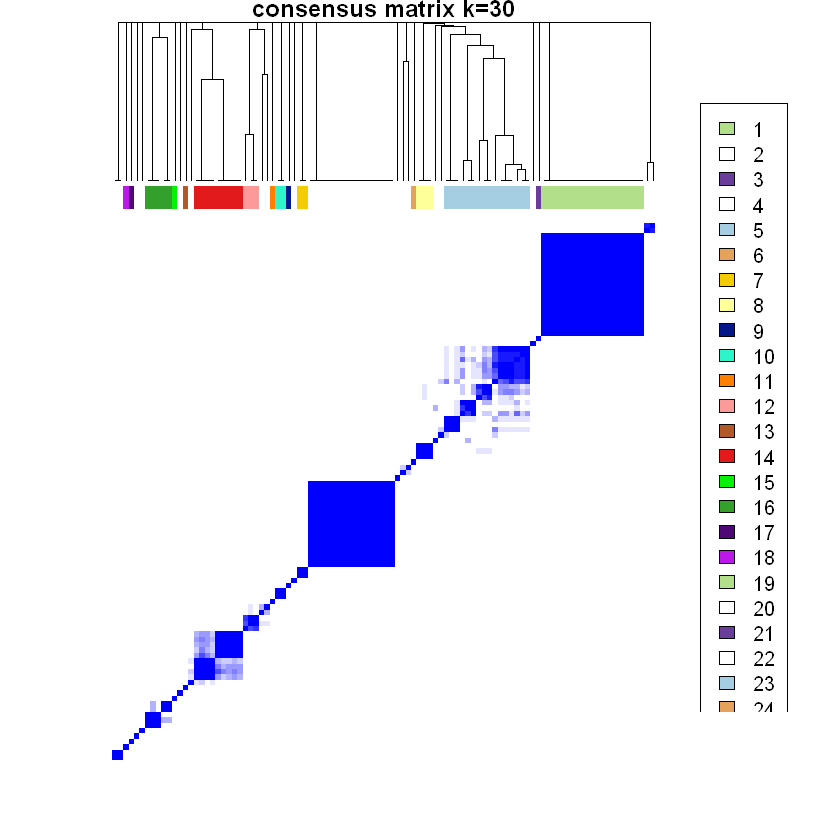

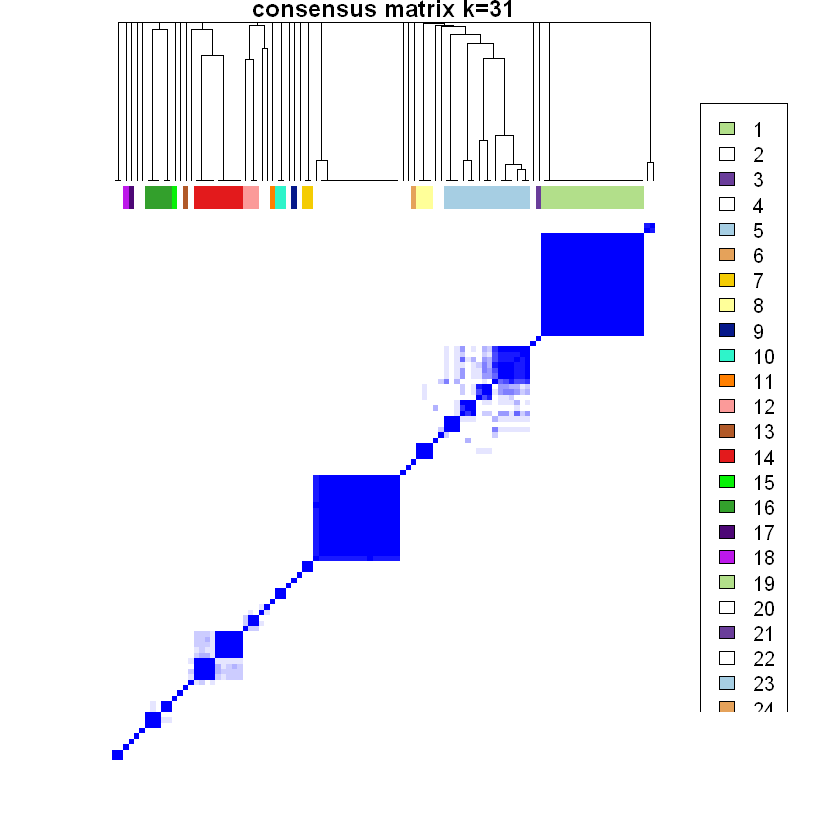

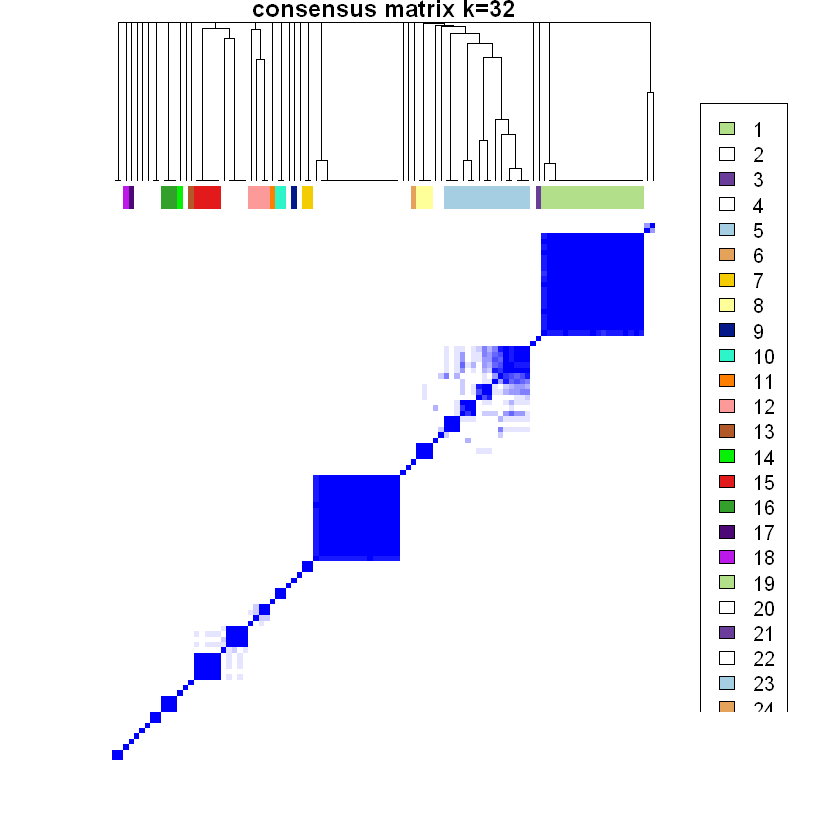

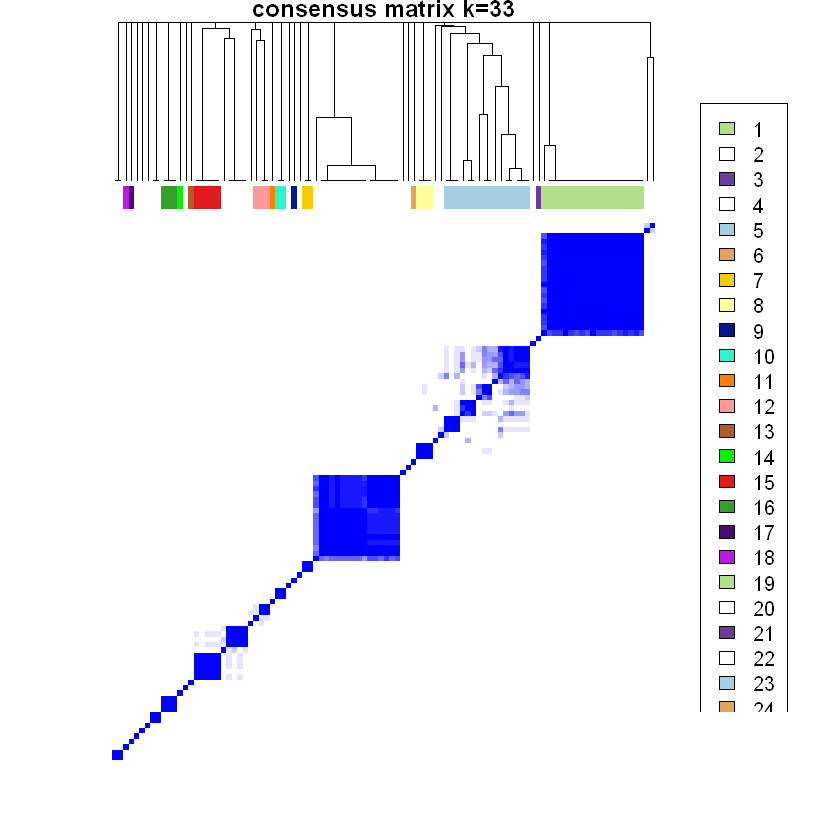

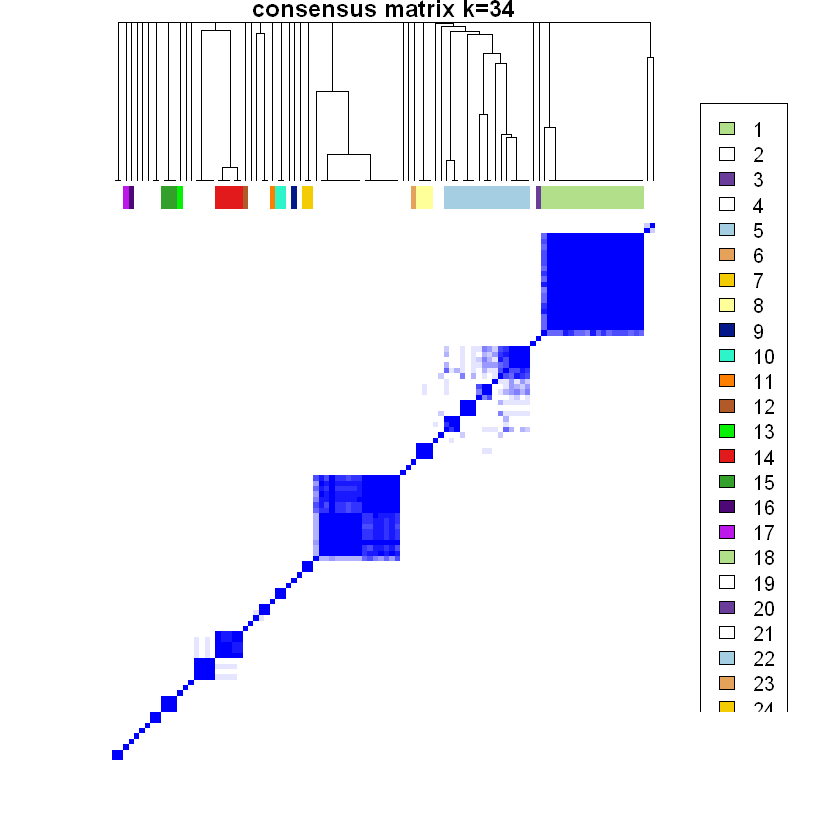

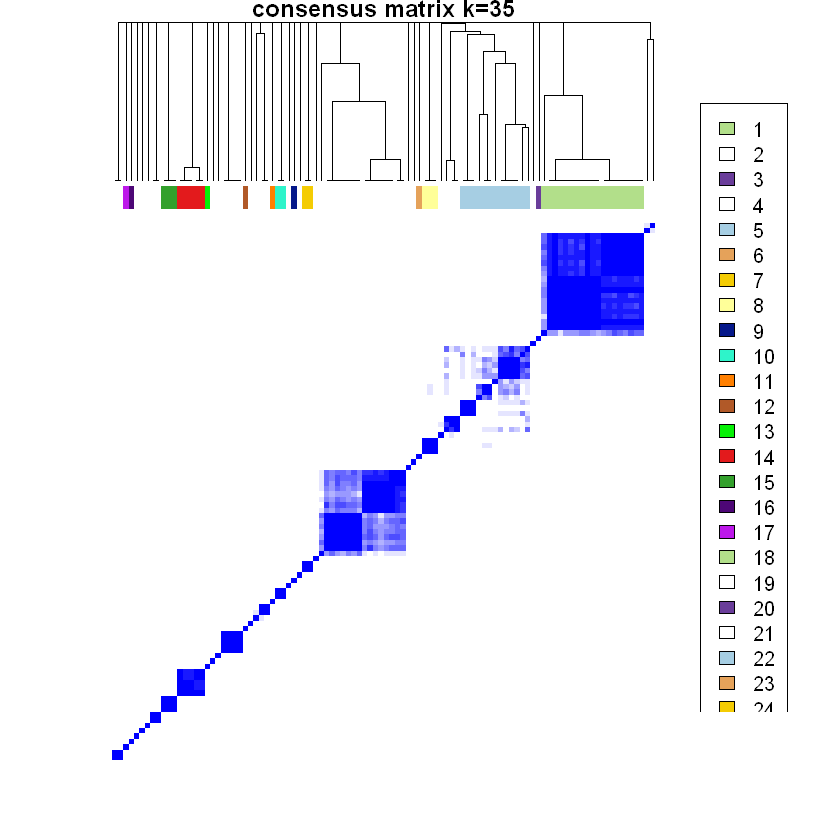

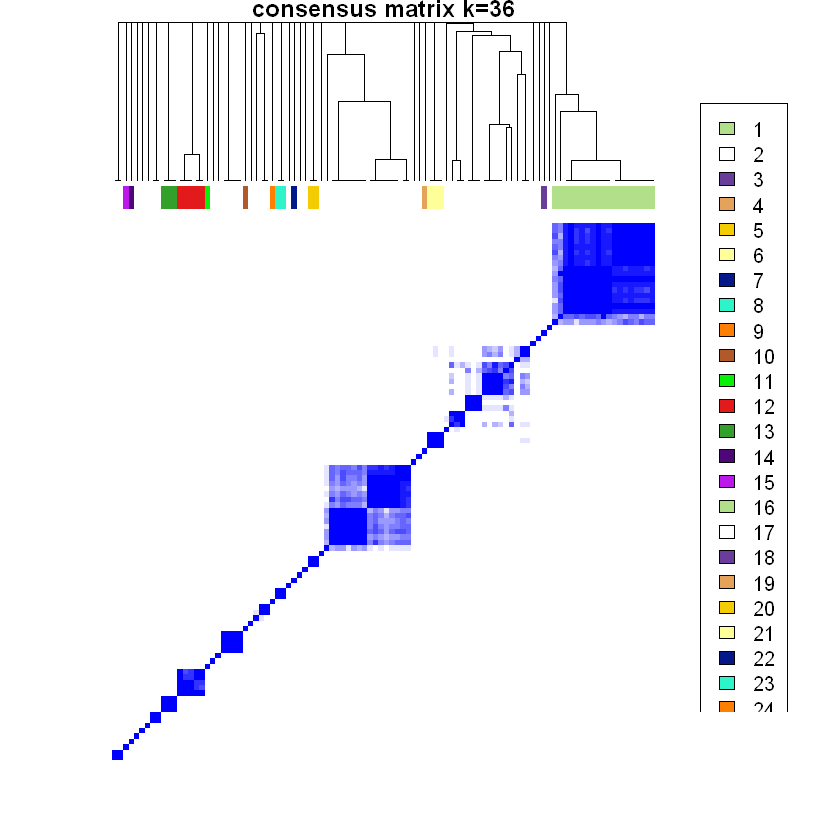

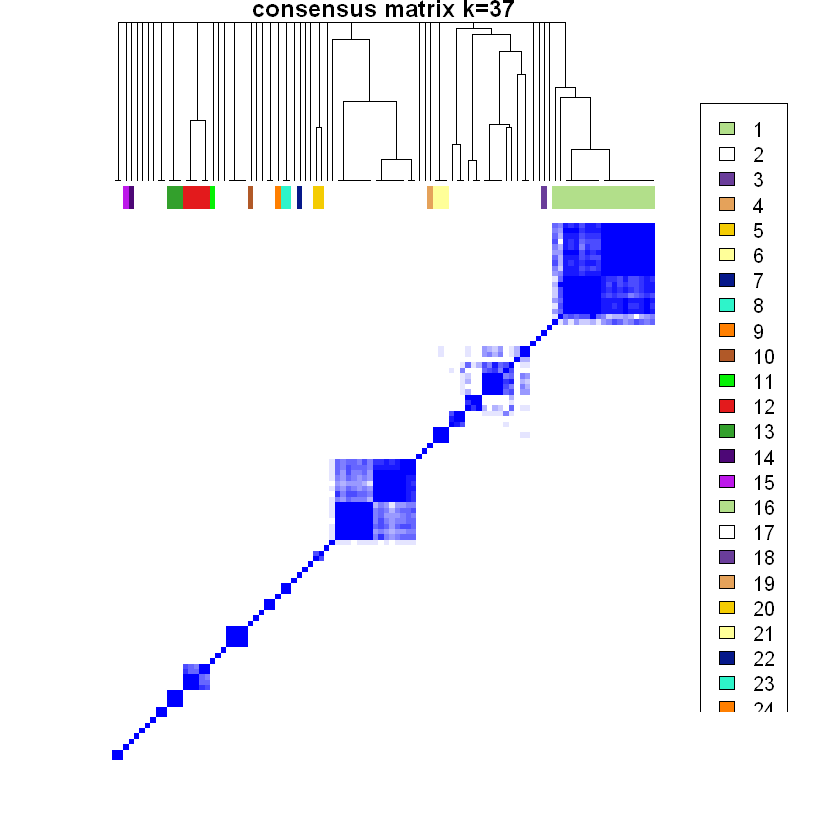

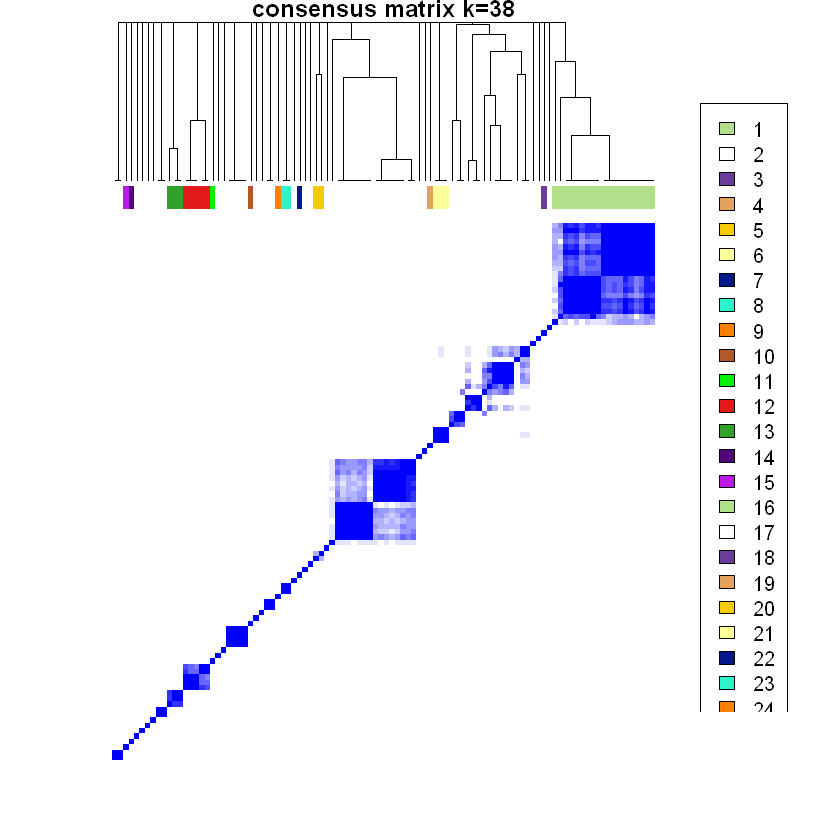

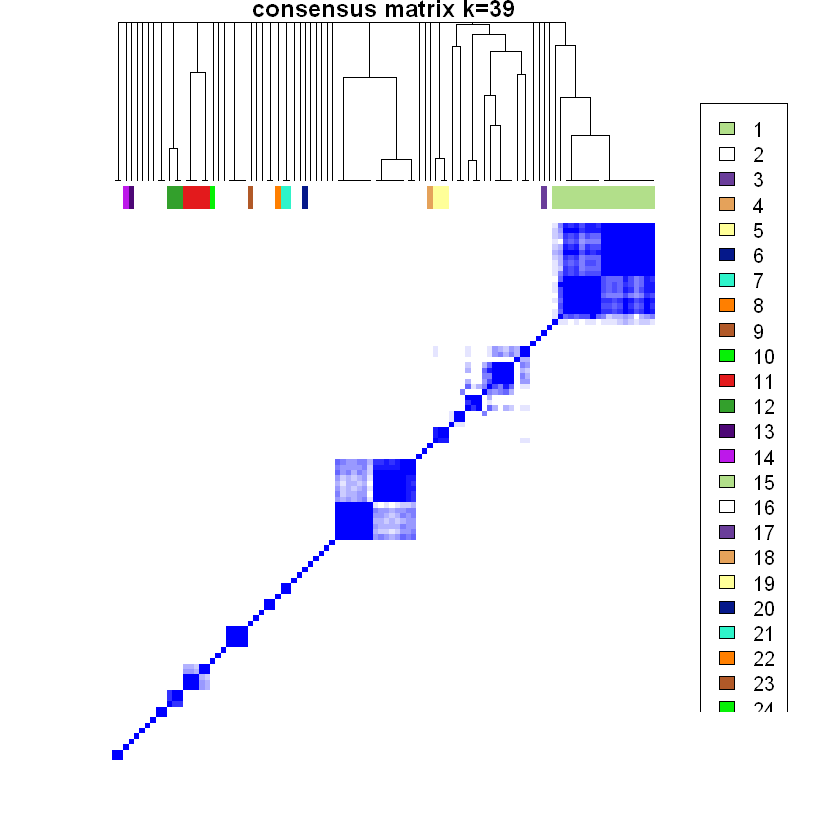

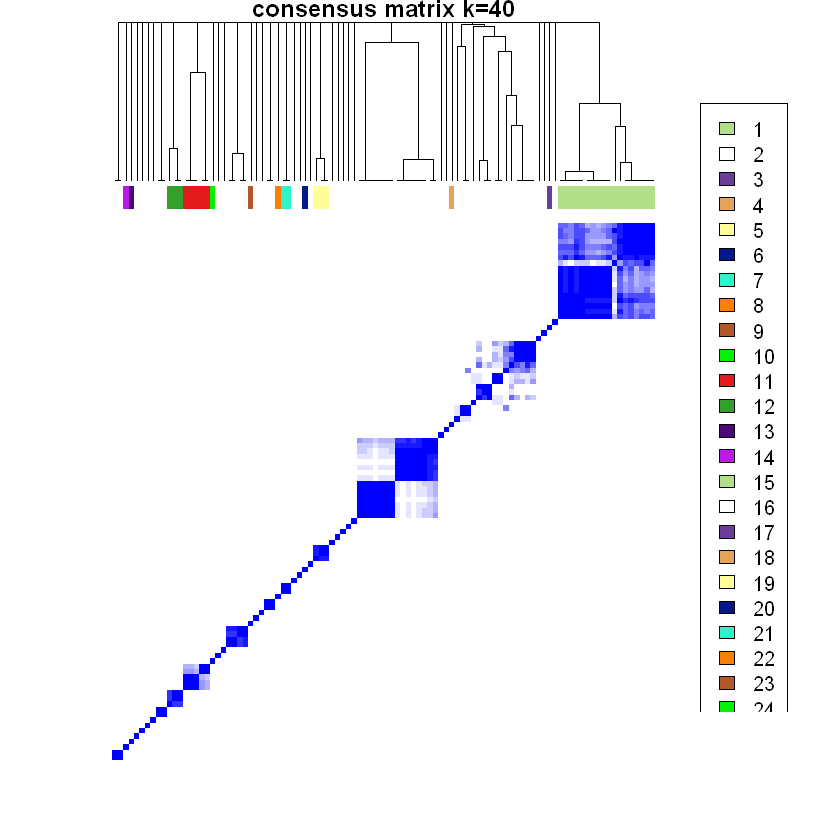

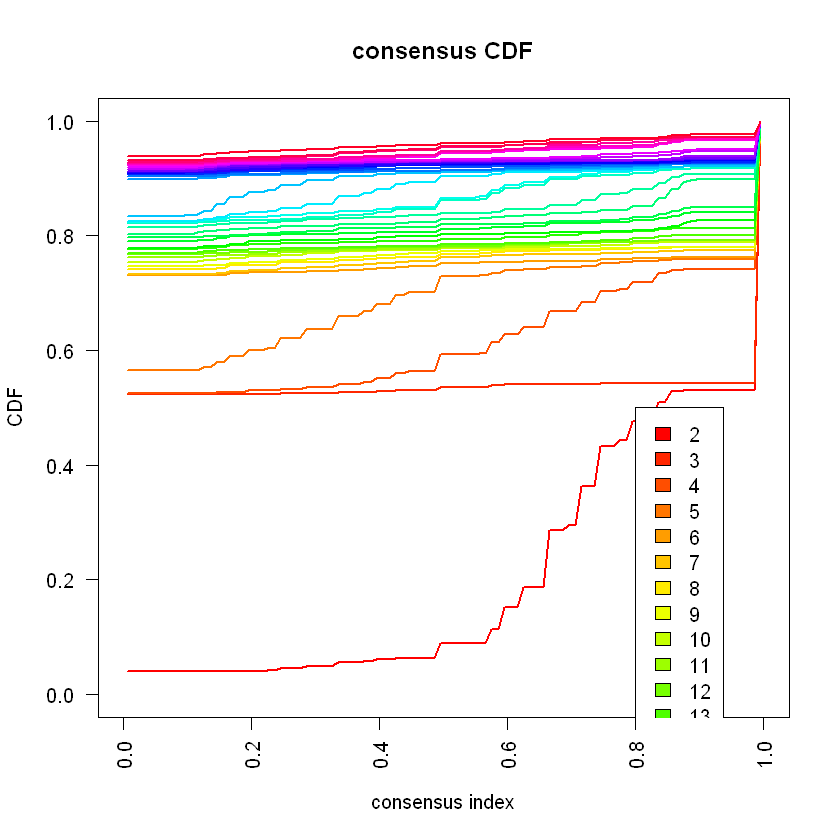

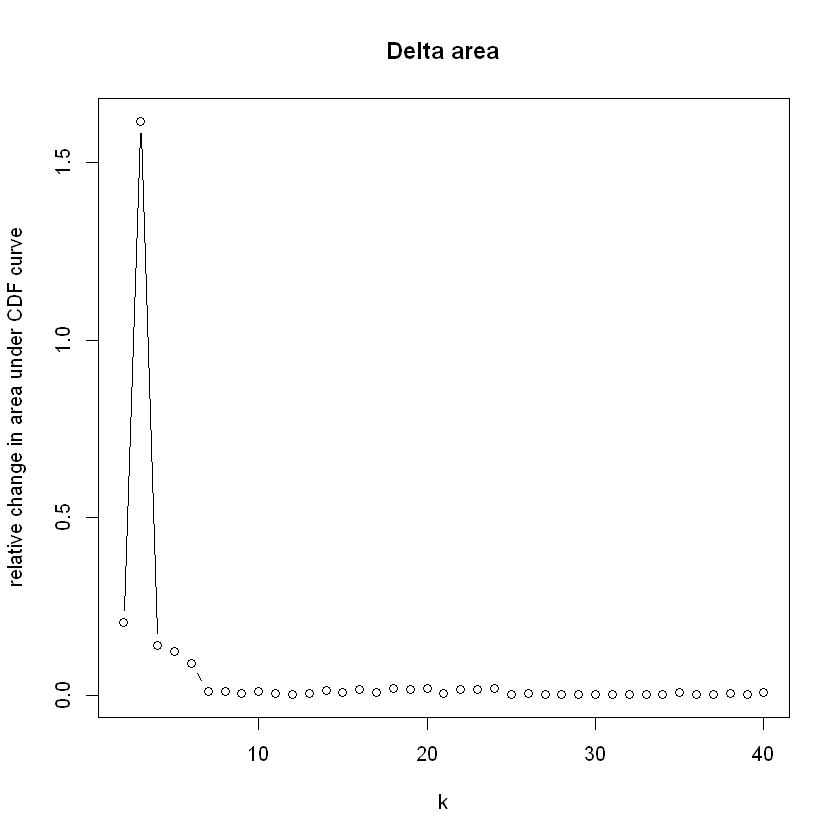

data set Levine_32dim : run complete


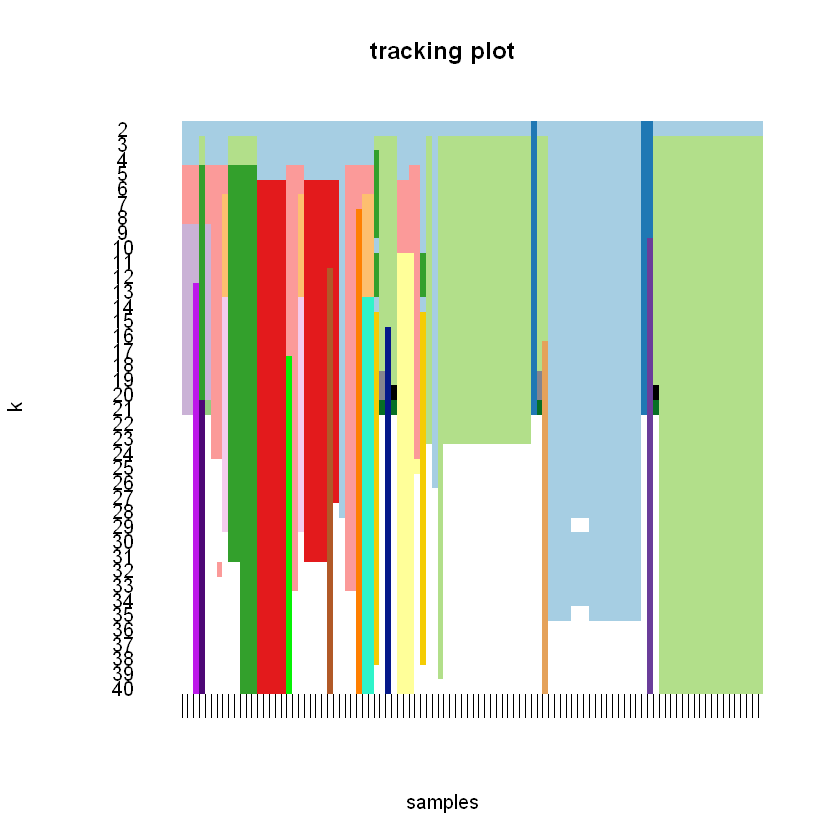

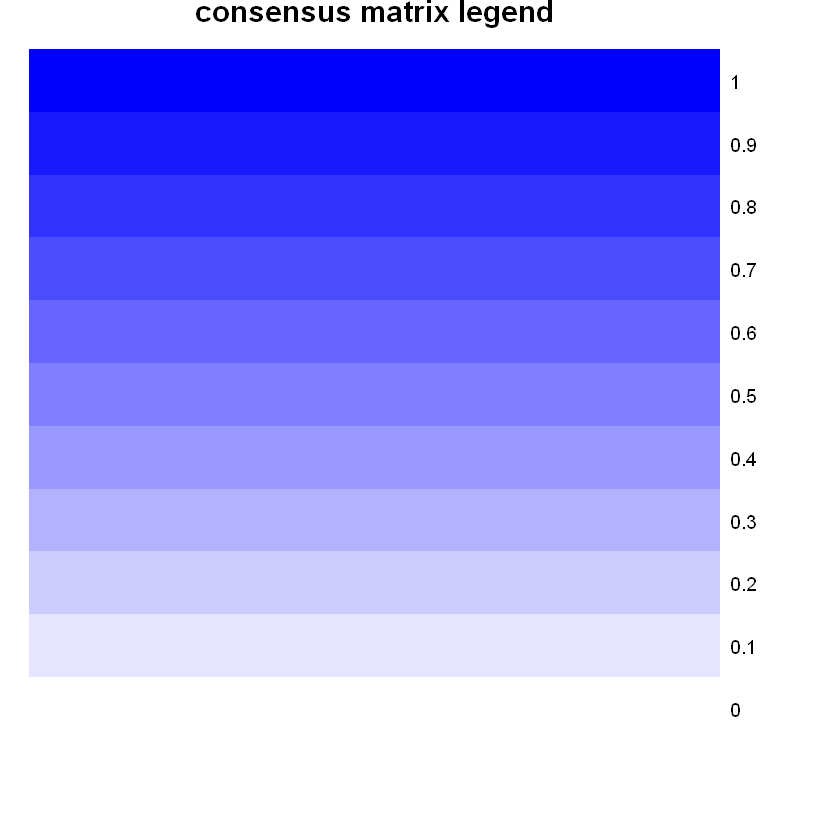

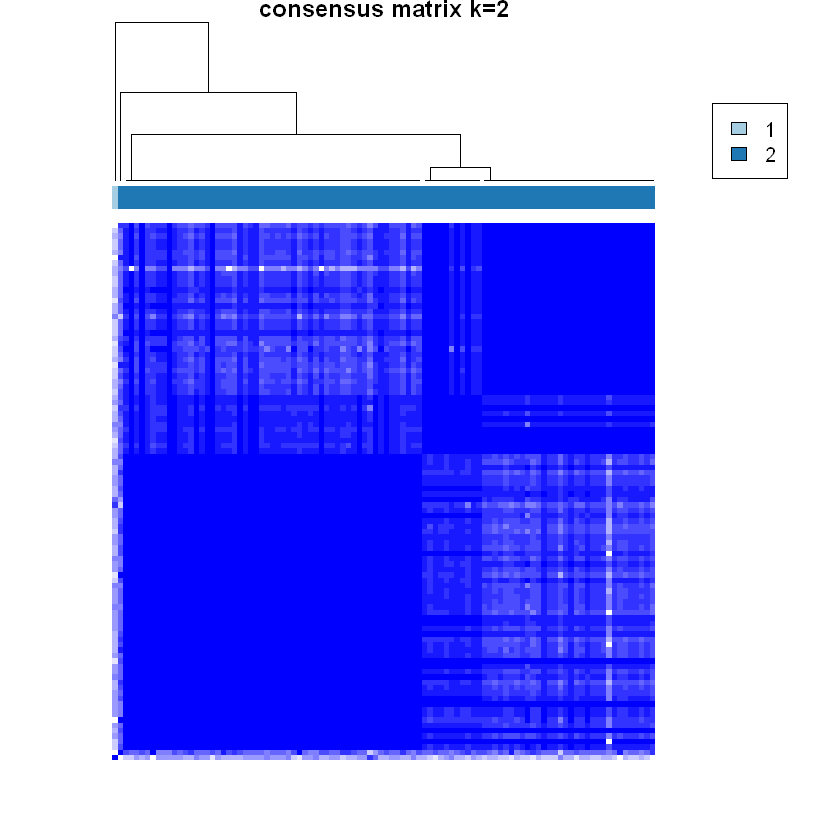

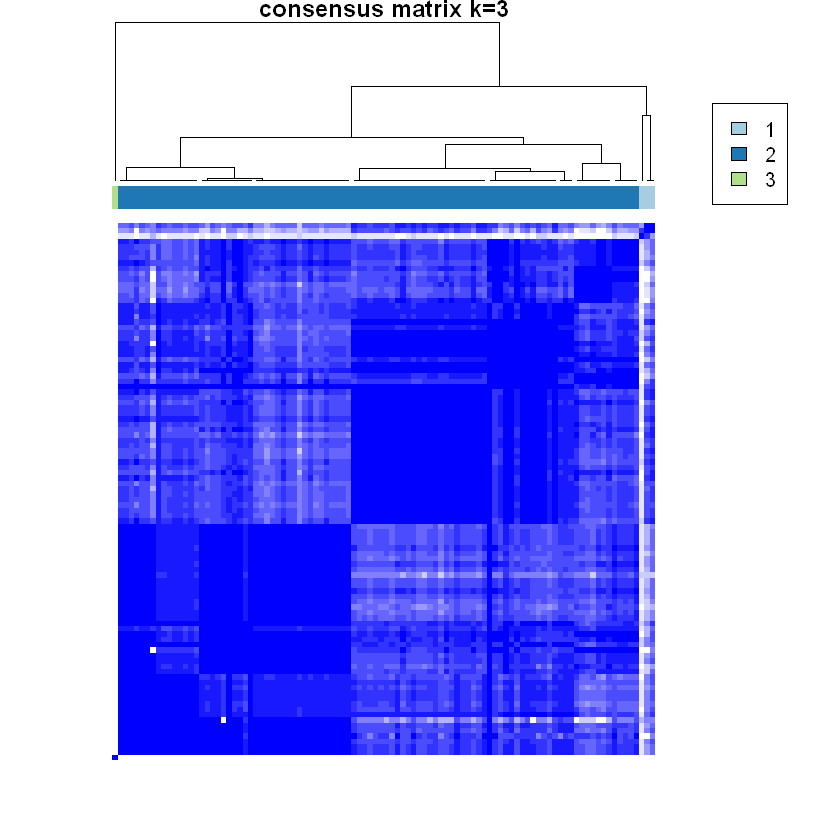

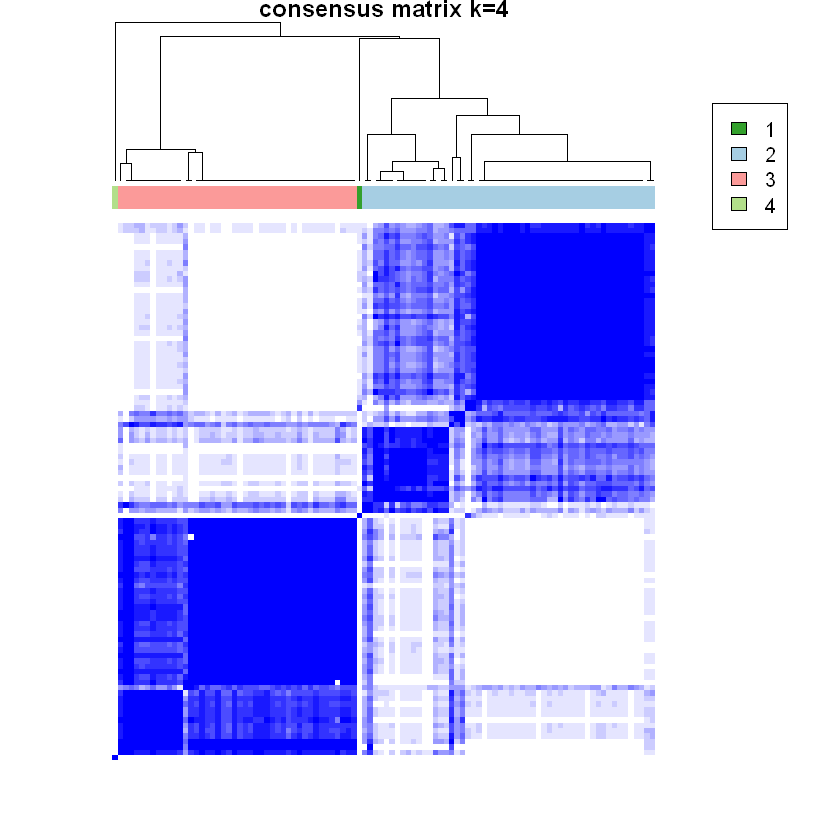

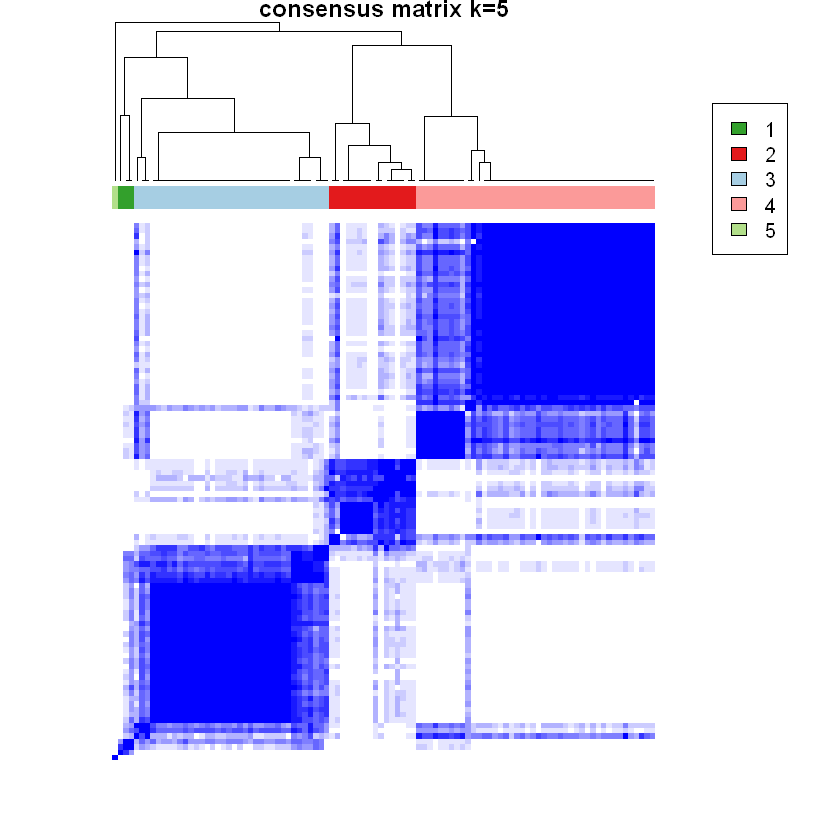

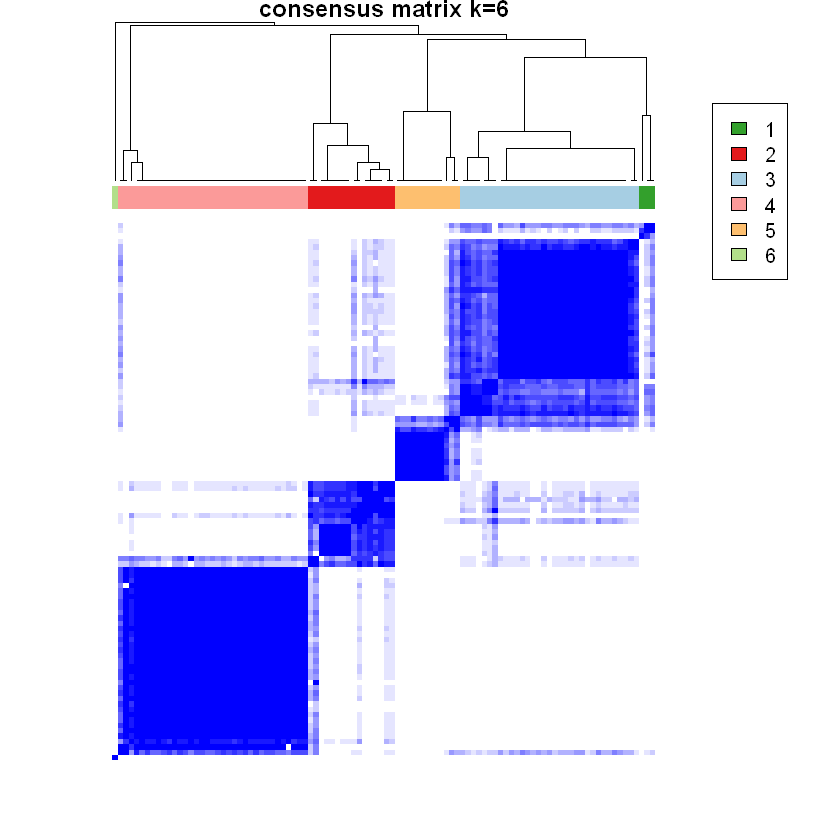

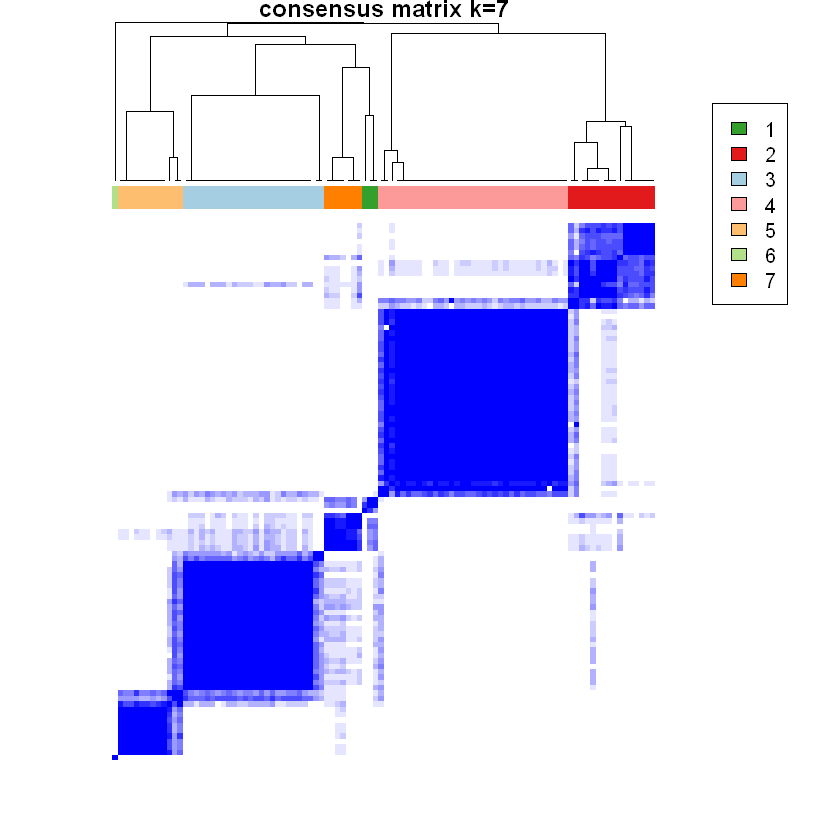

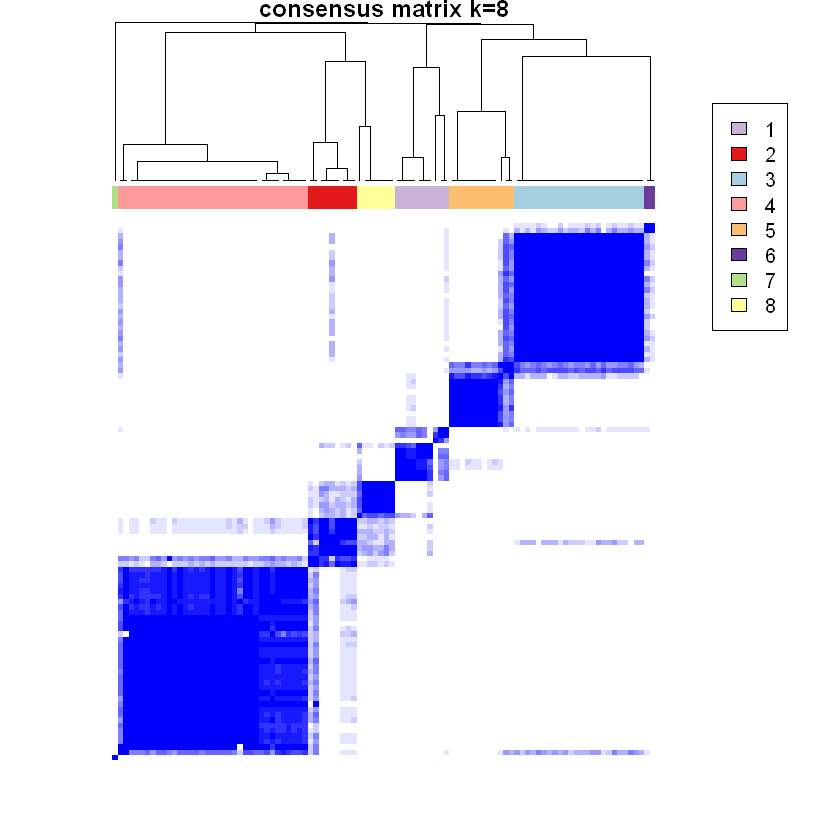

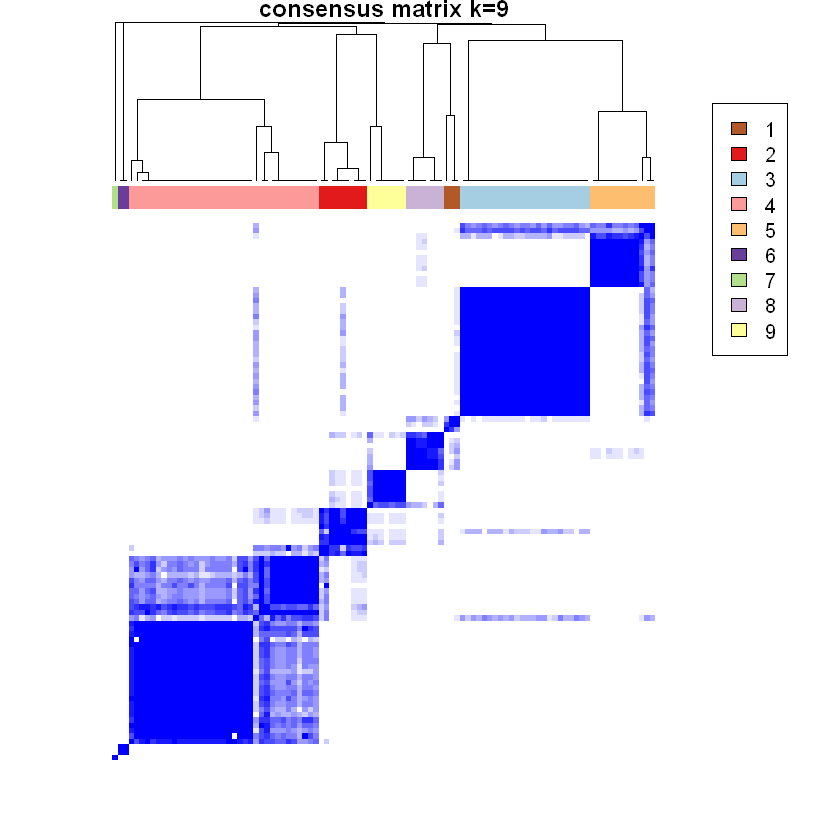

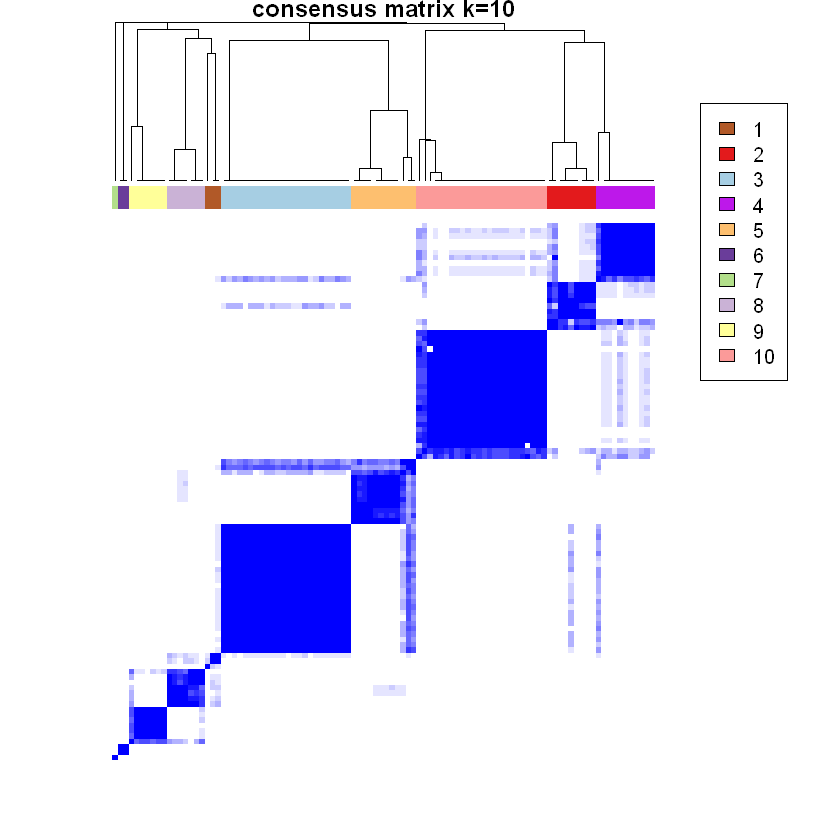

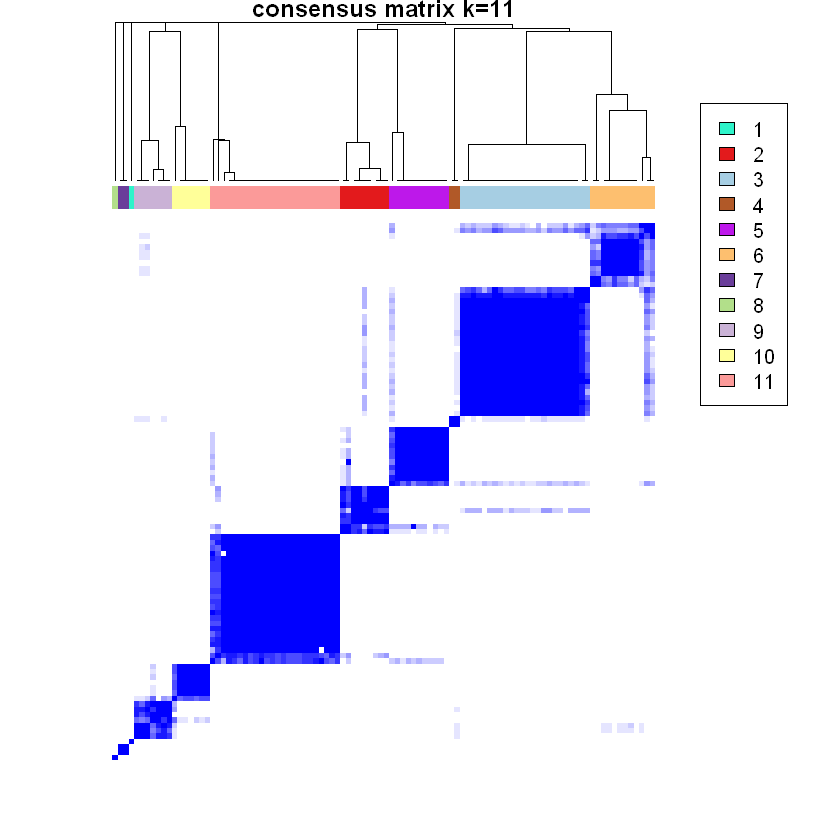

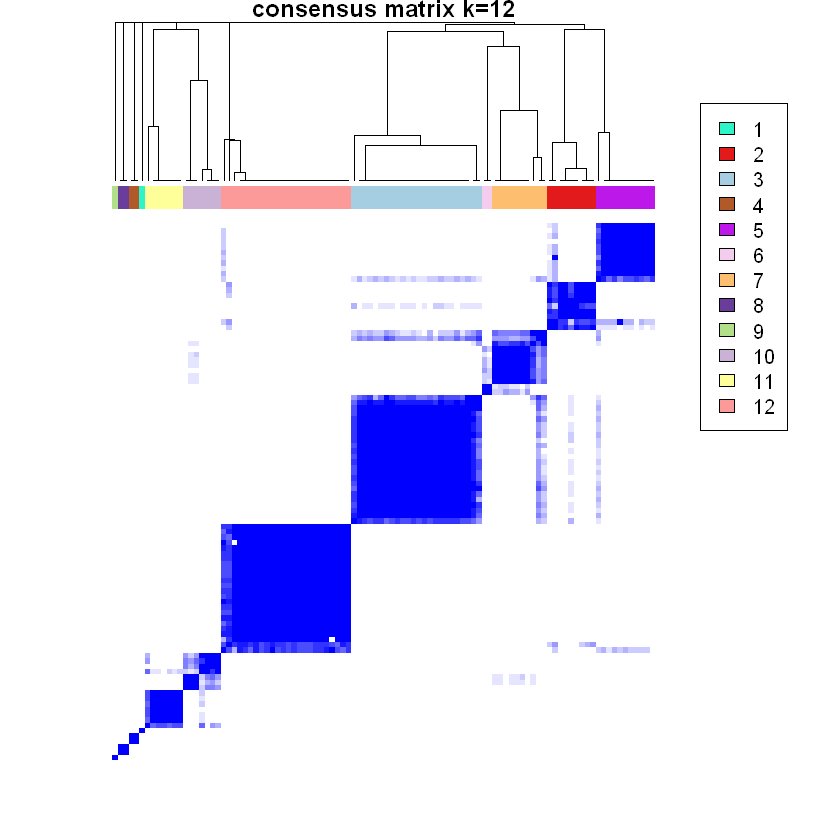

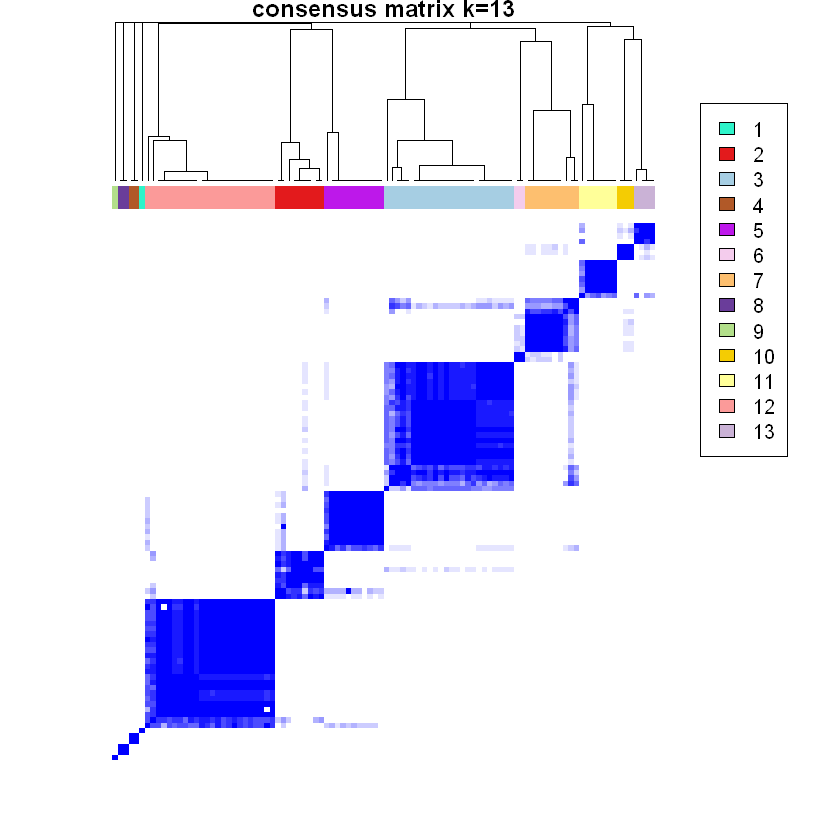

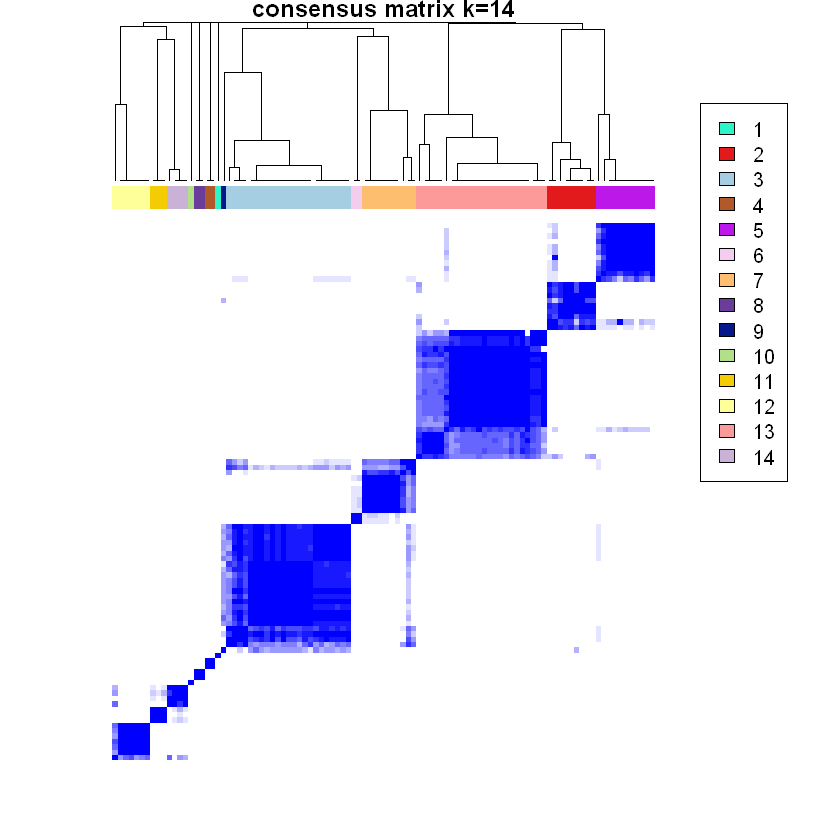

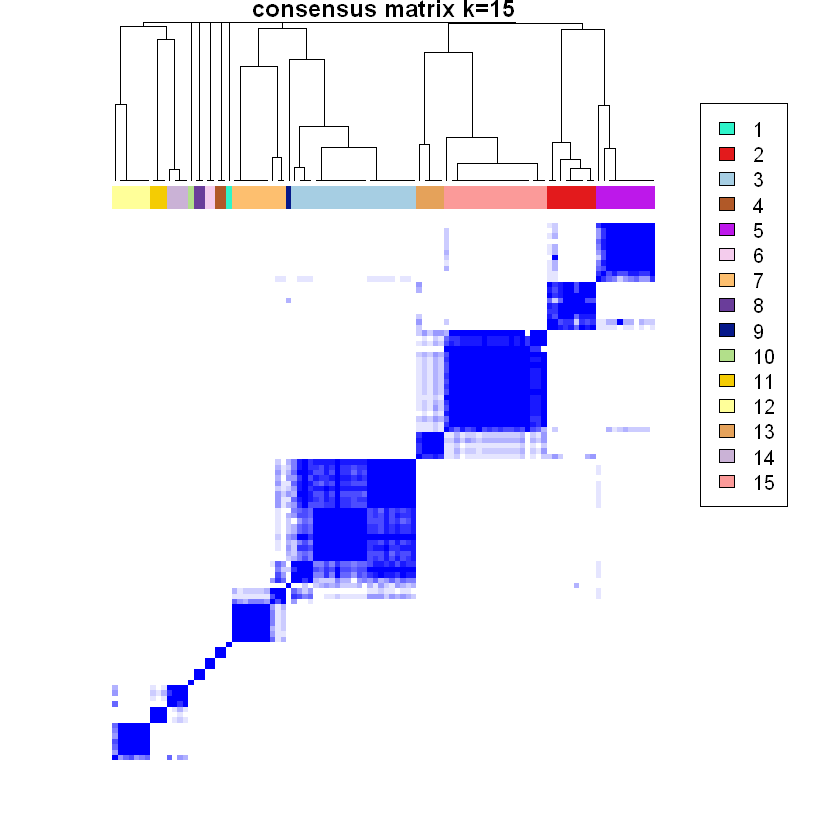

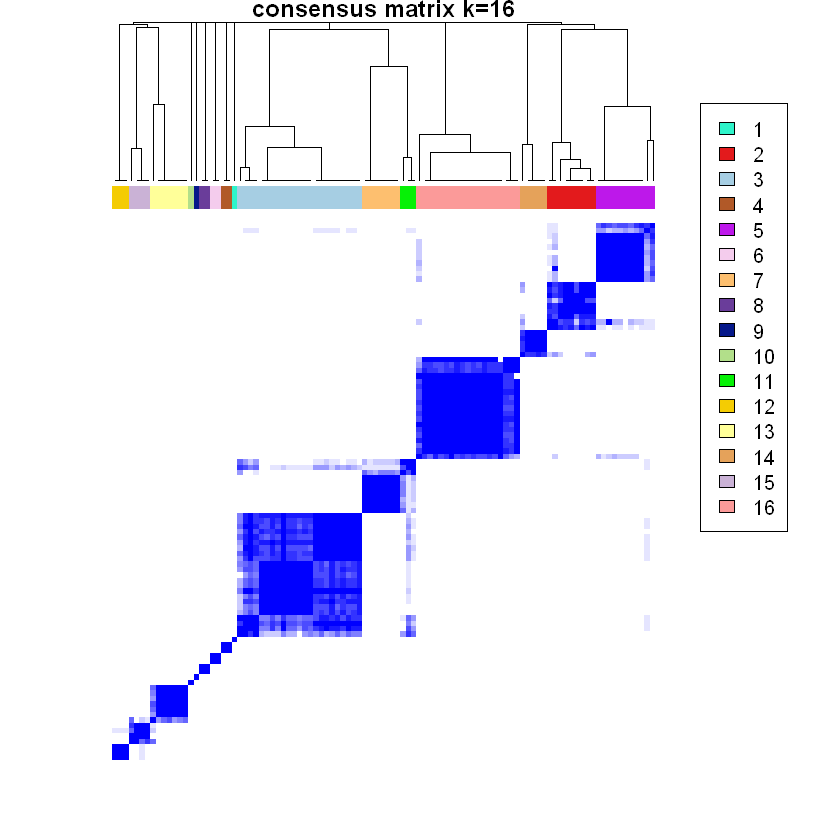

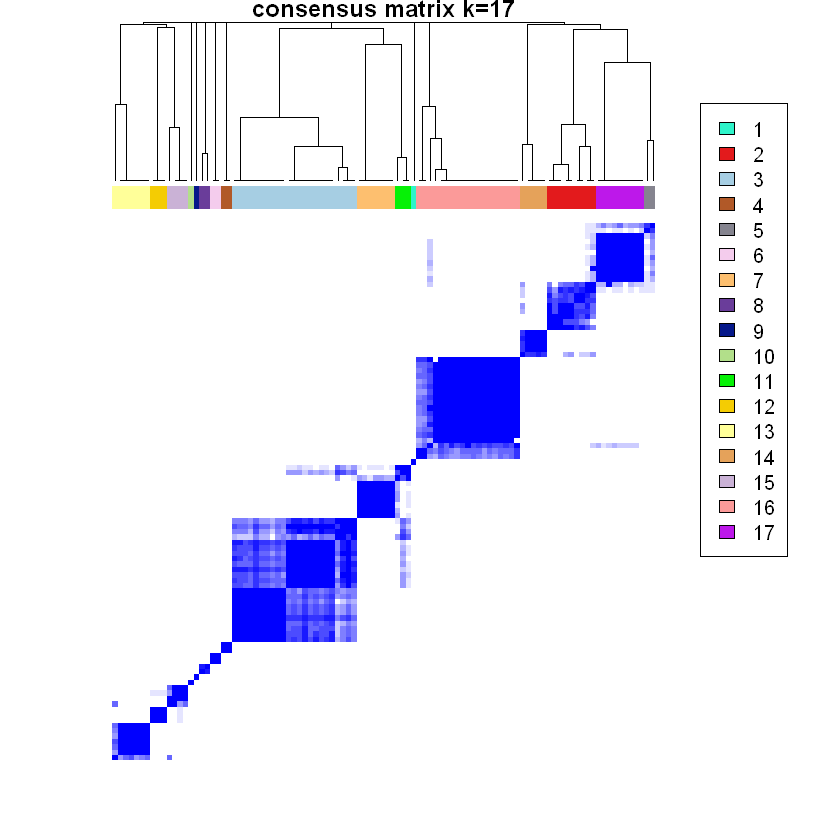

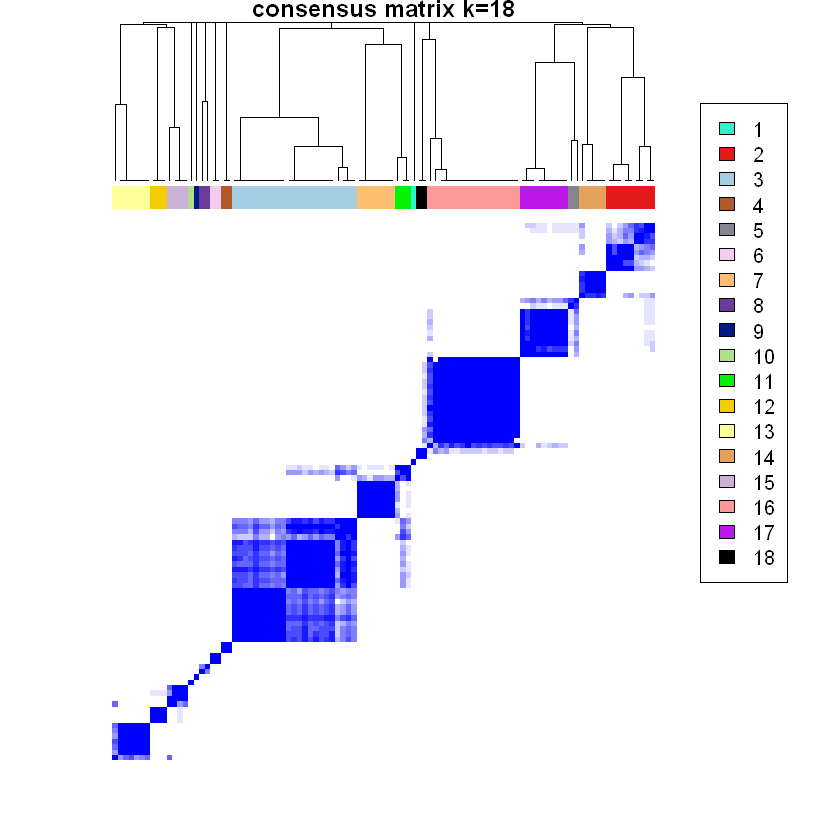

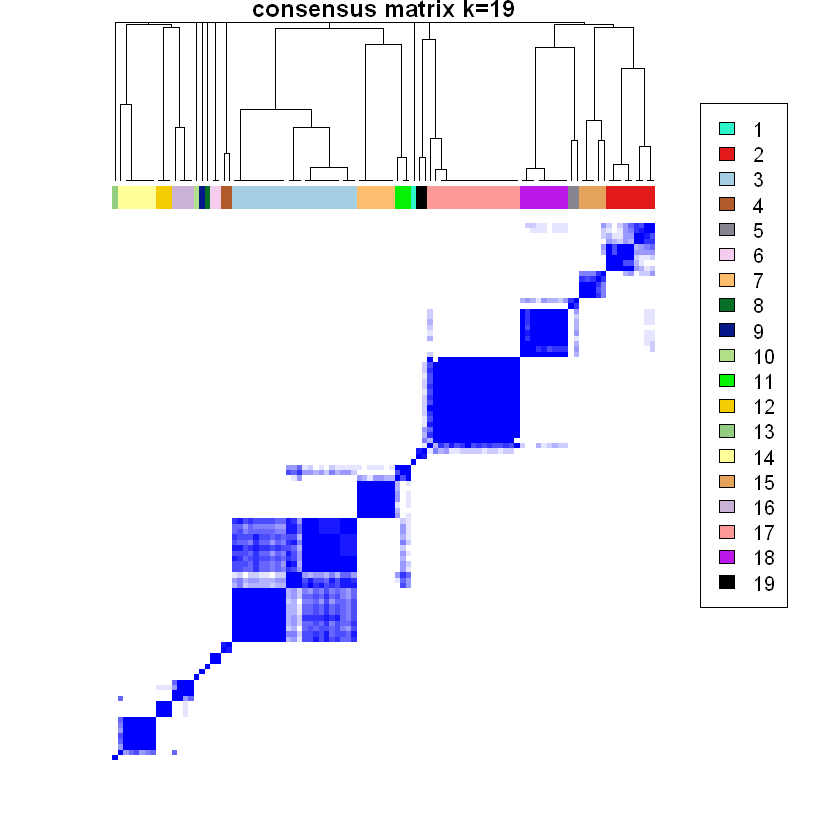

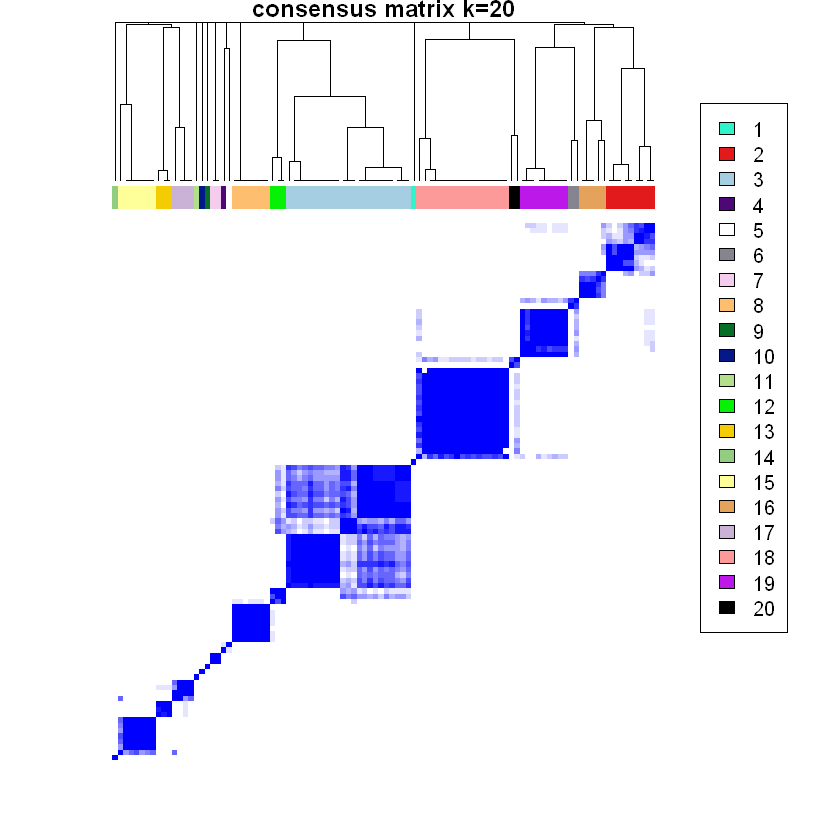

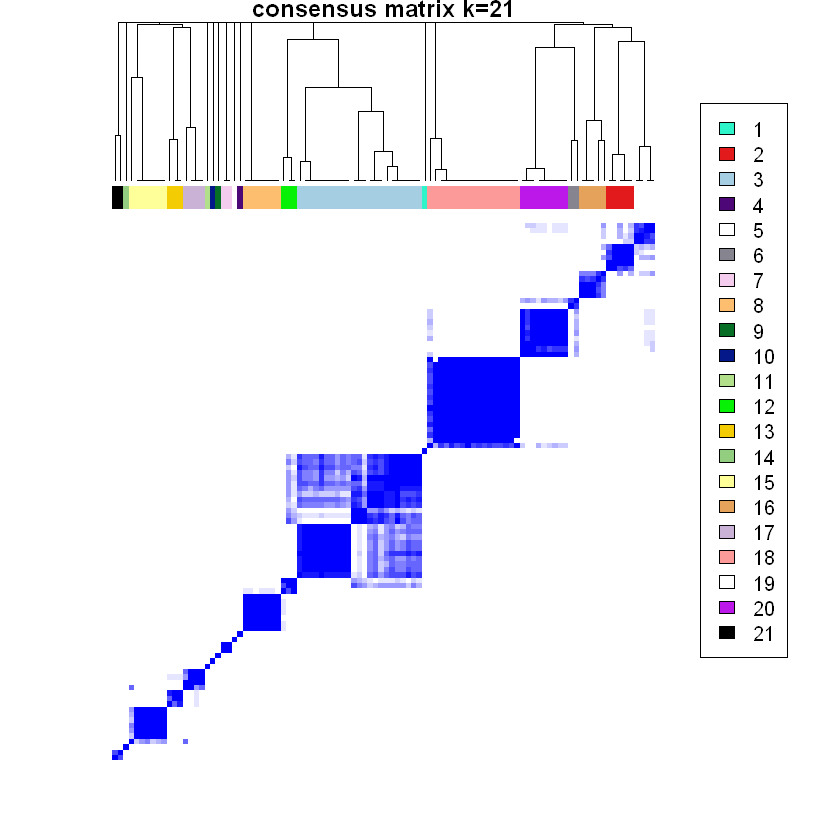

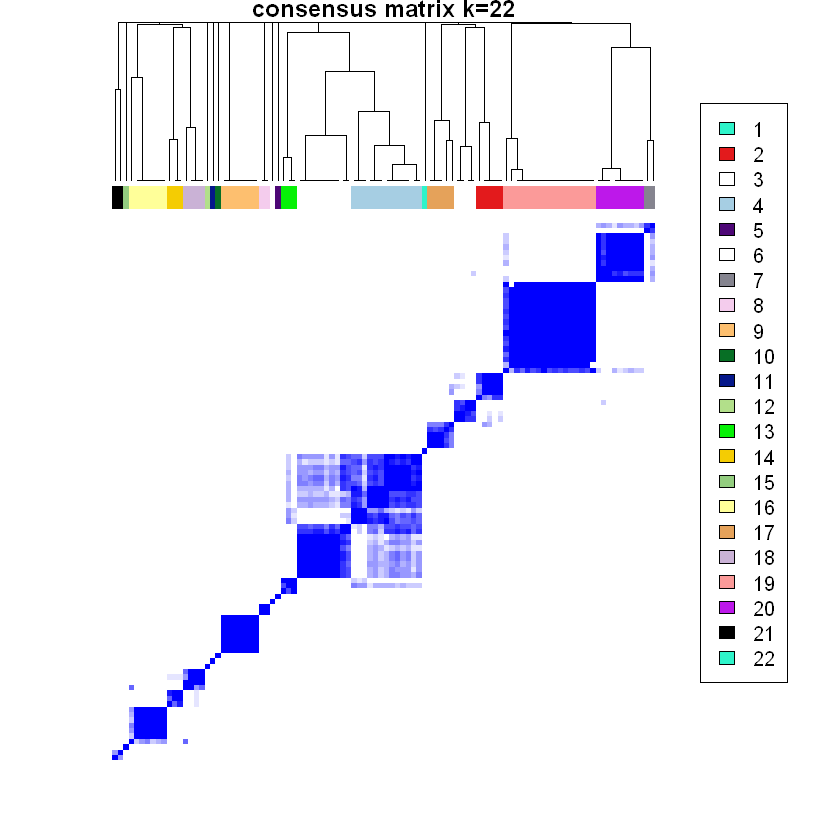

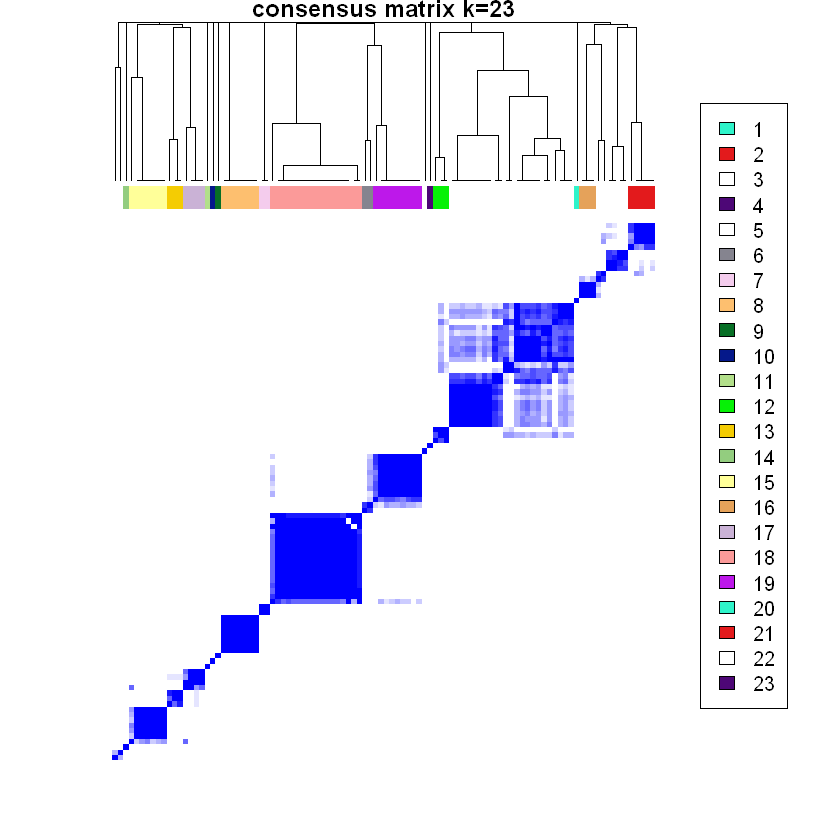

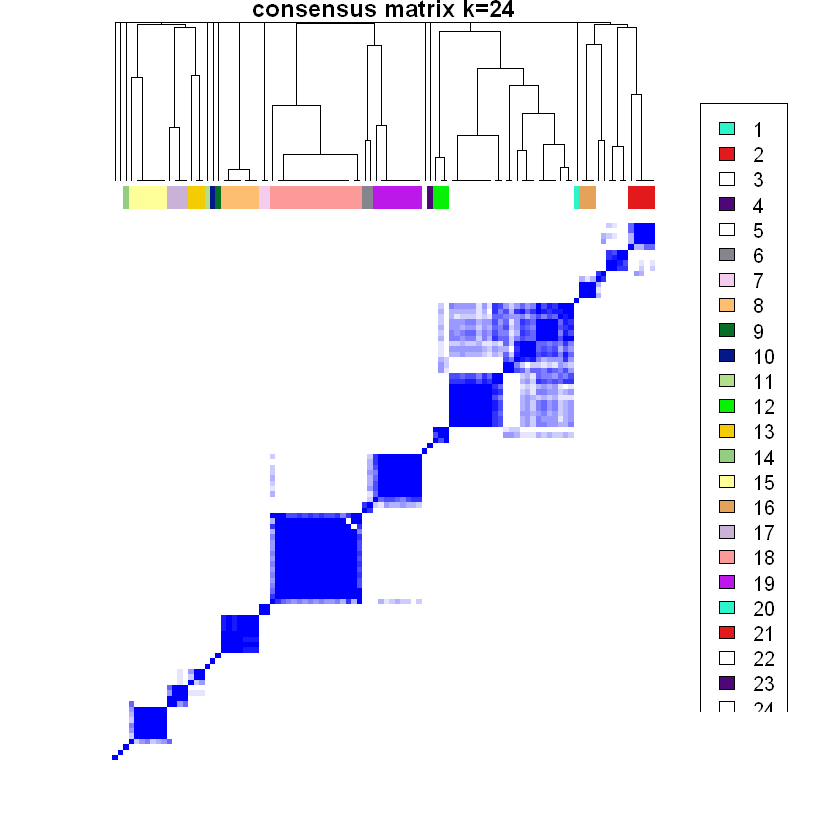

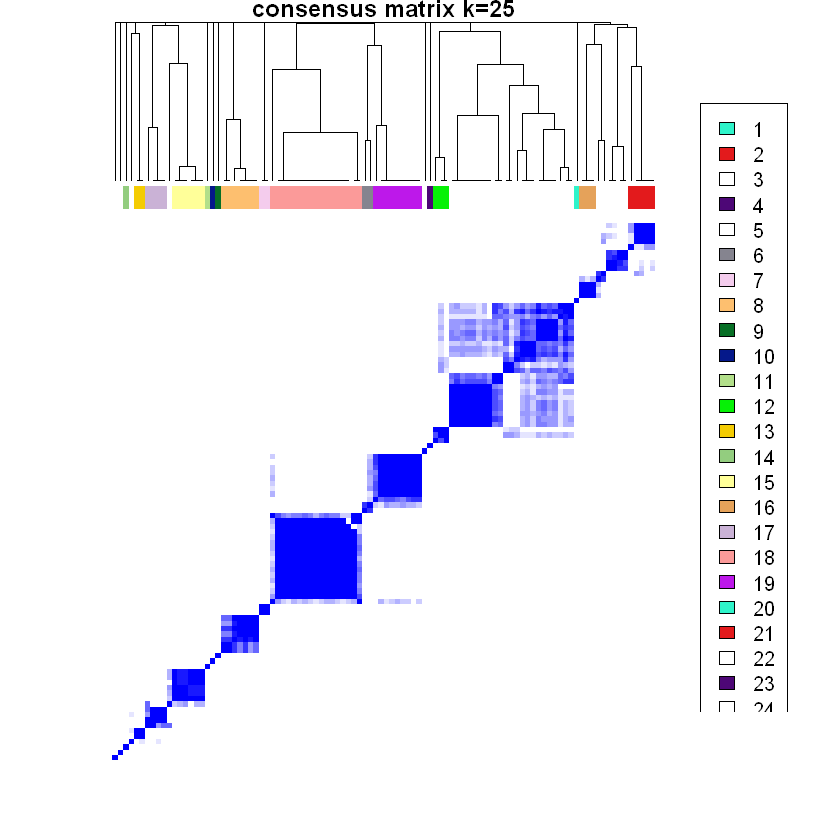

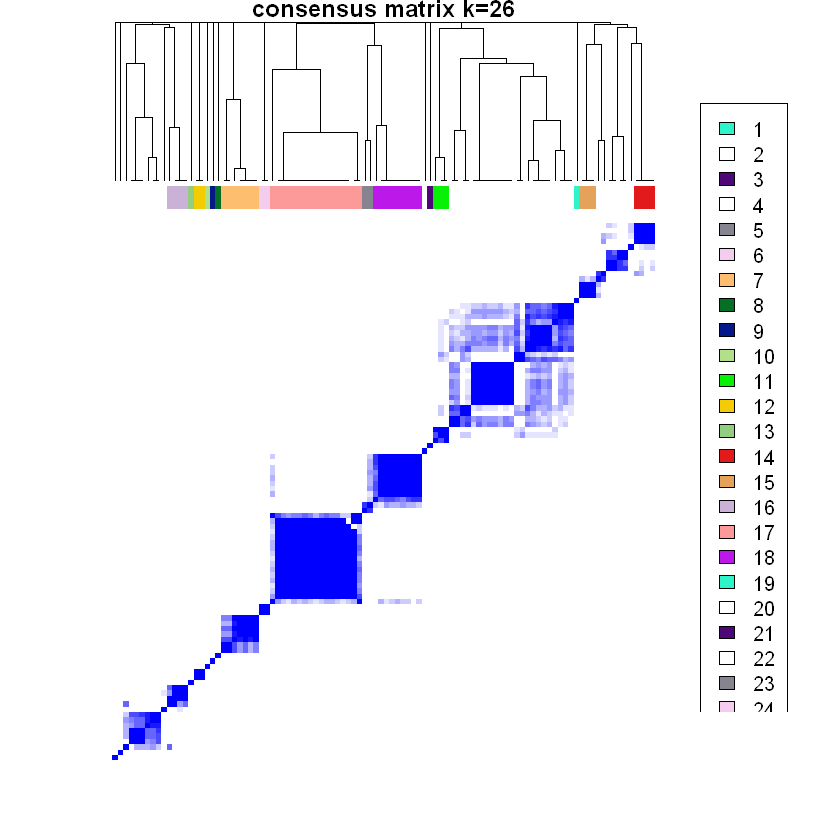

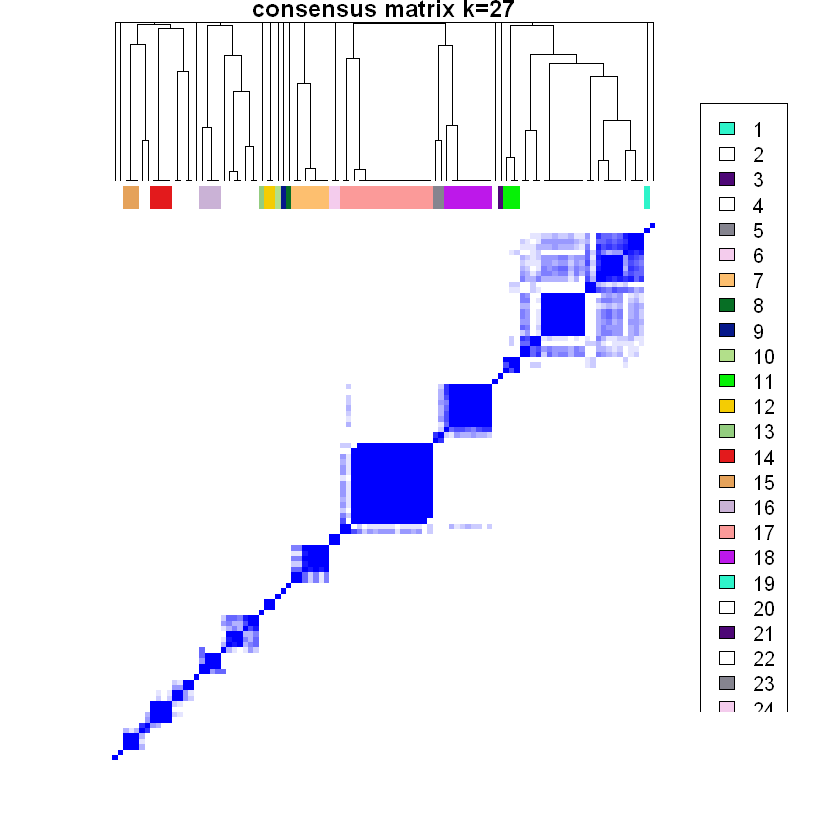

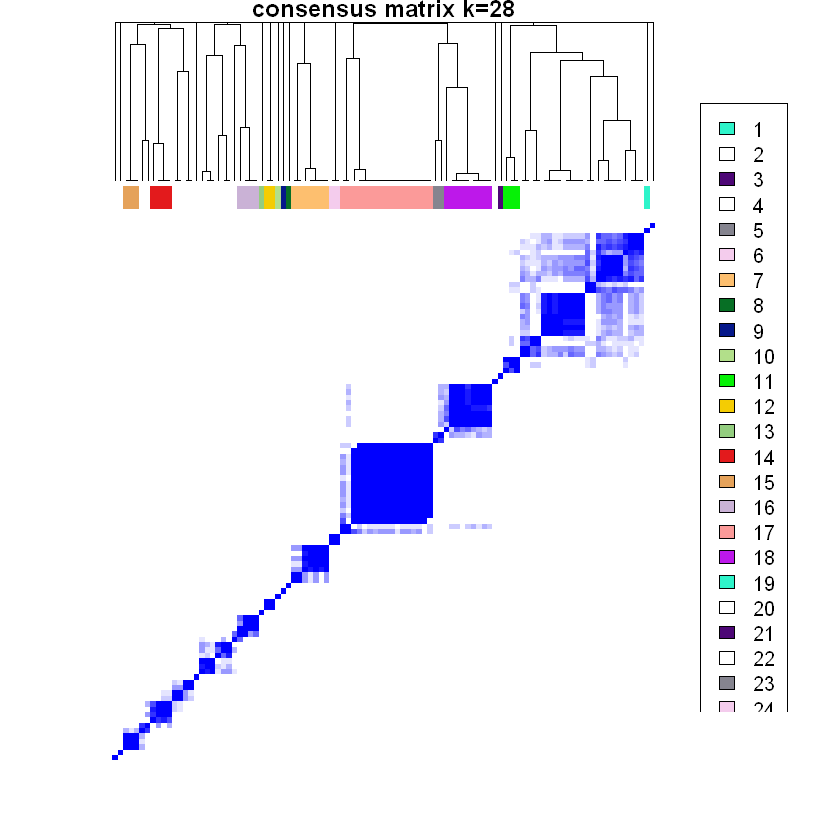

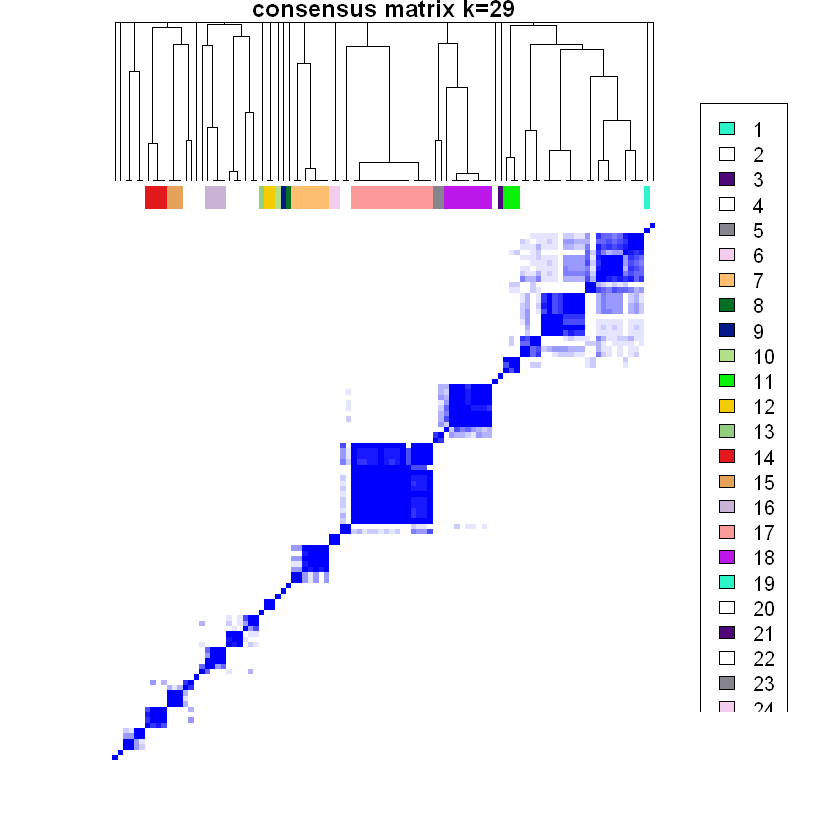

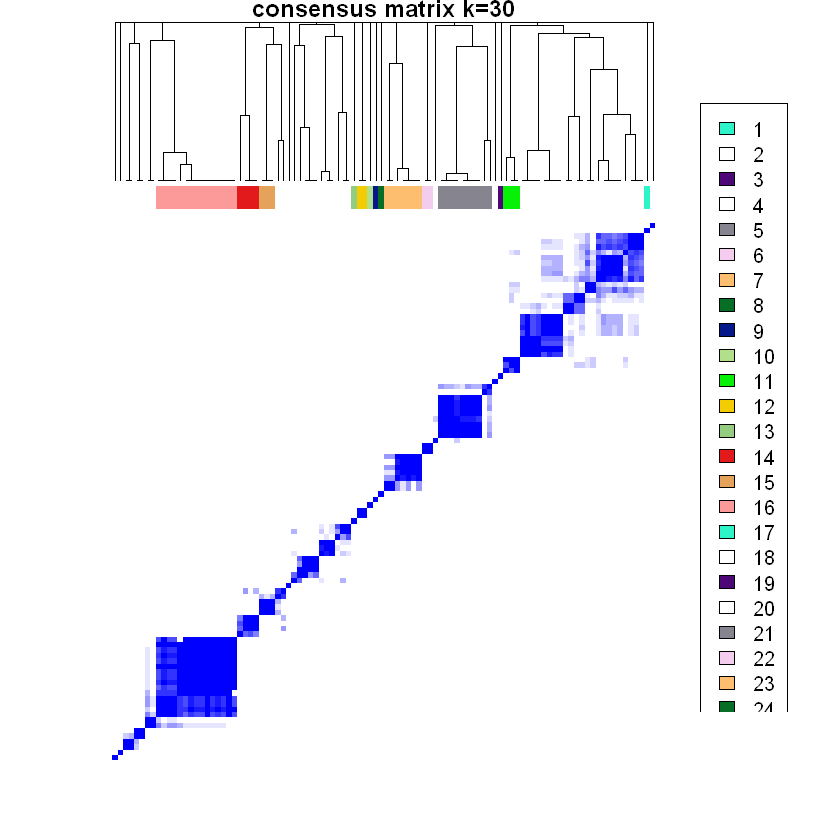

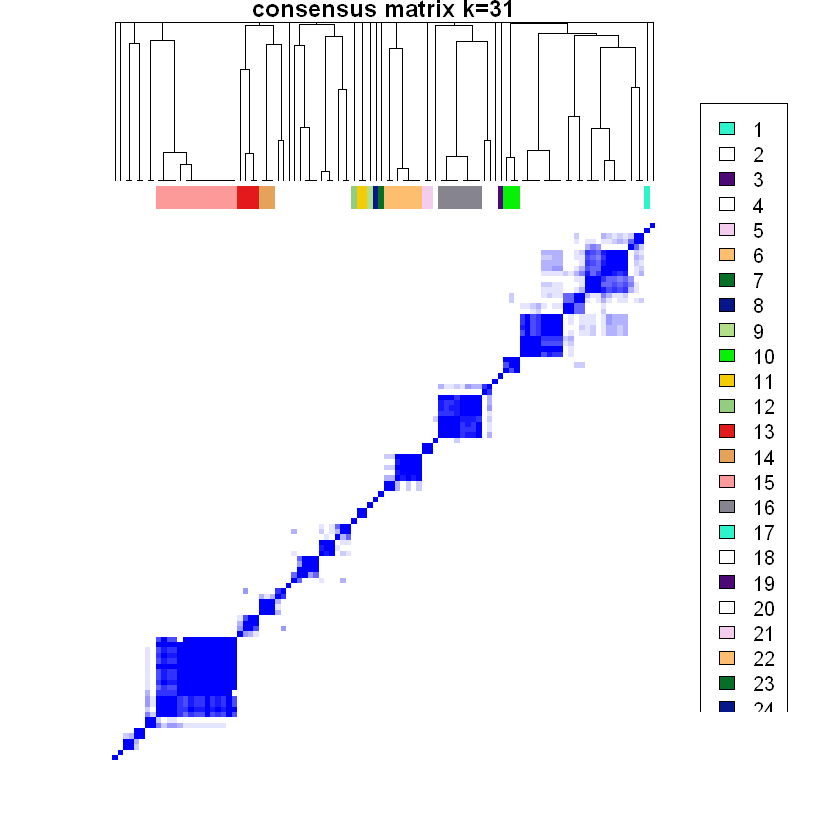

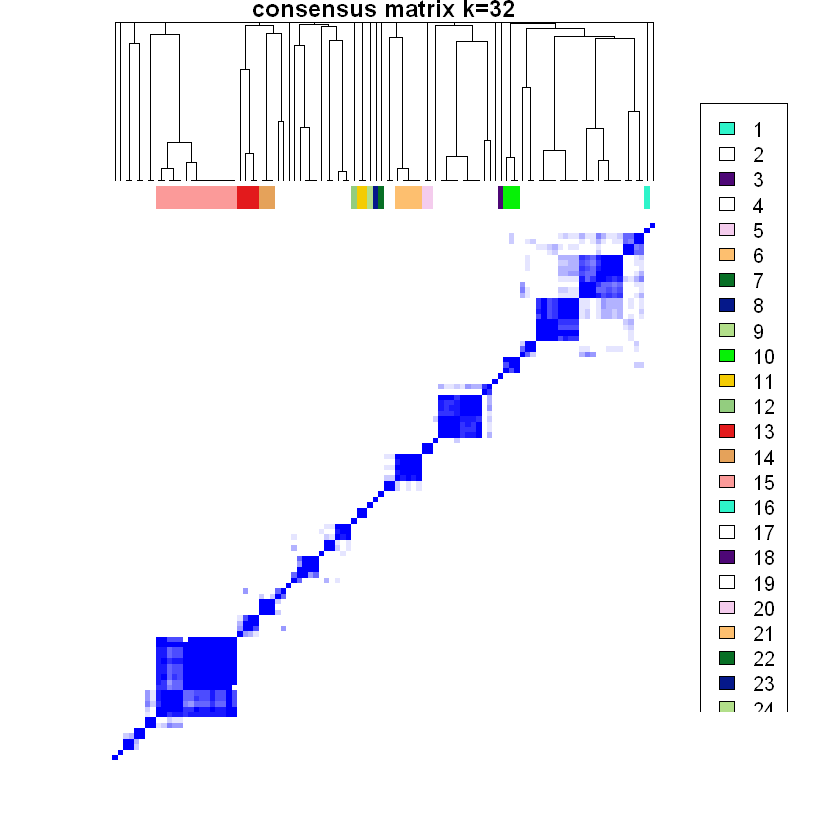

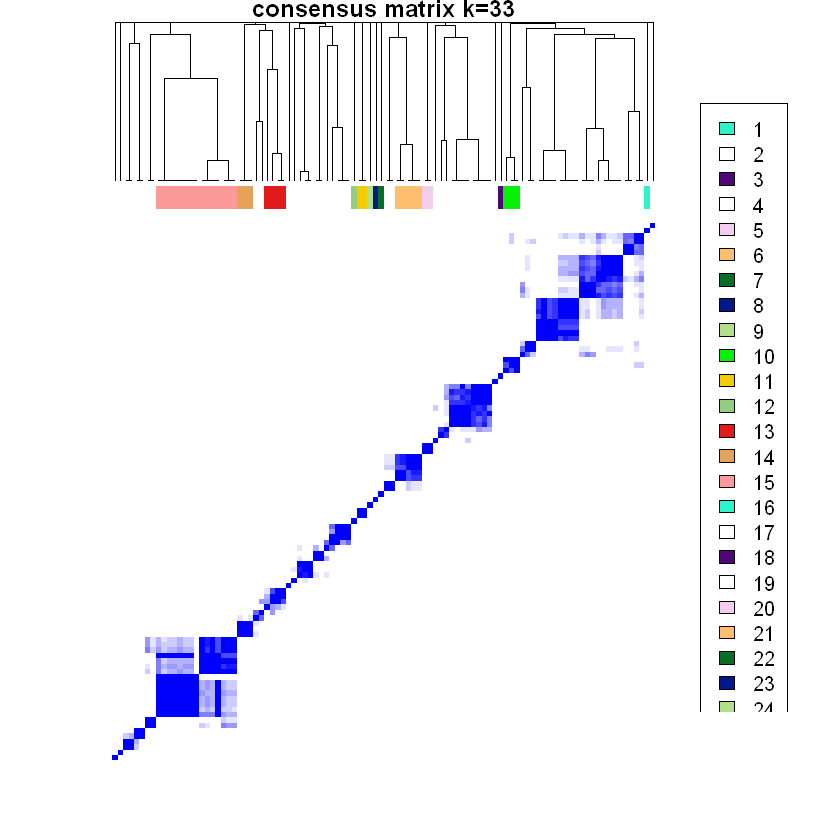

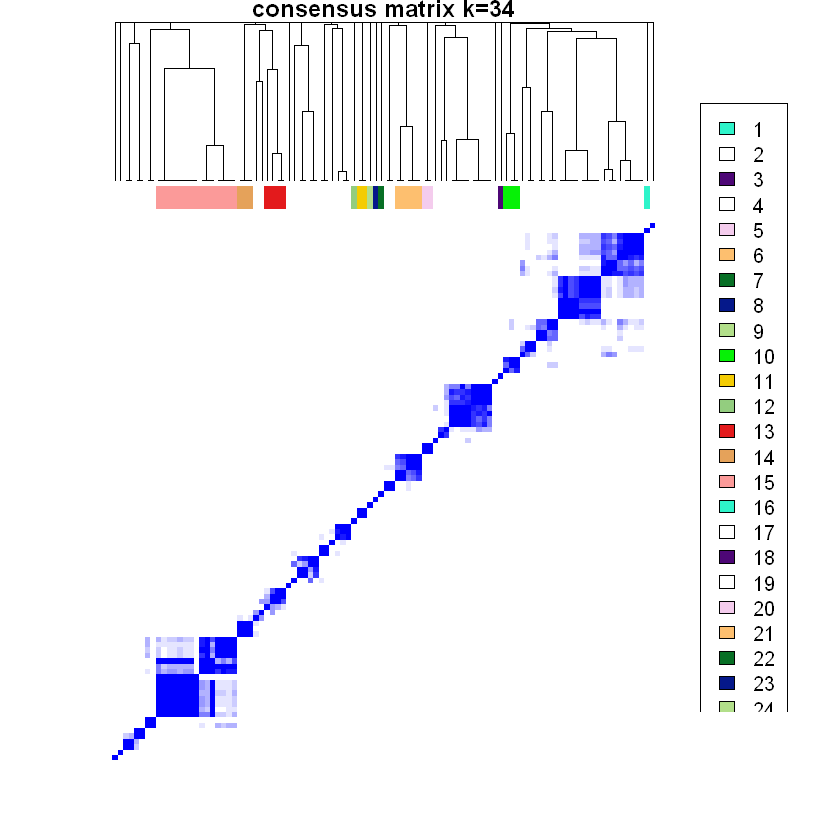

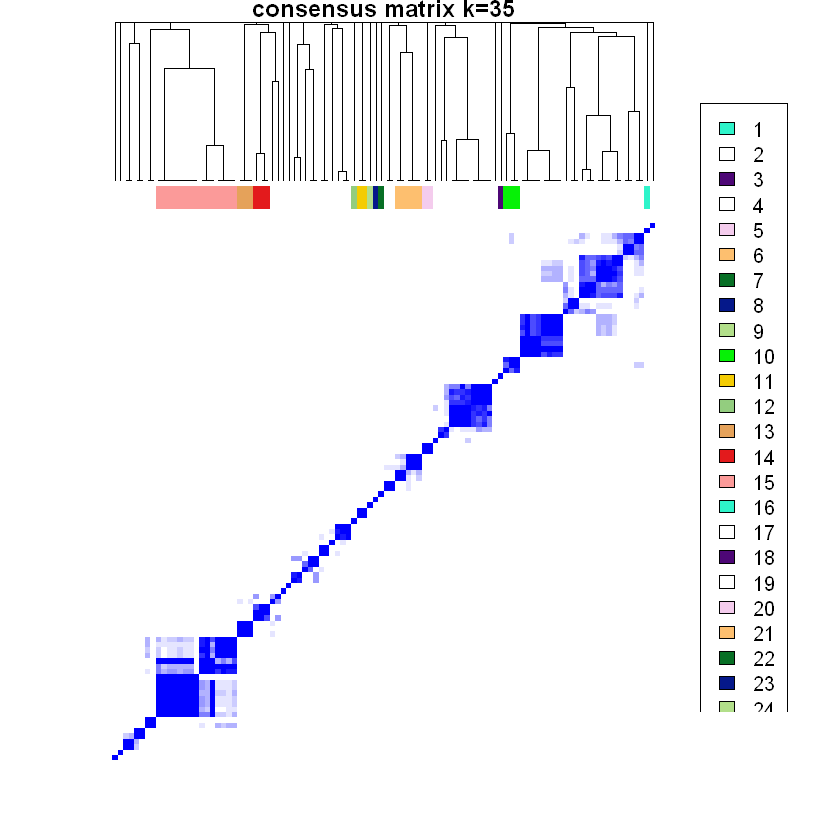

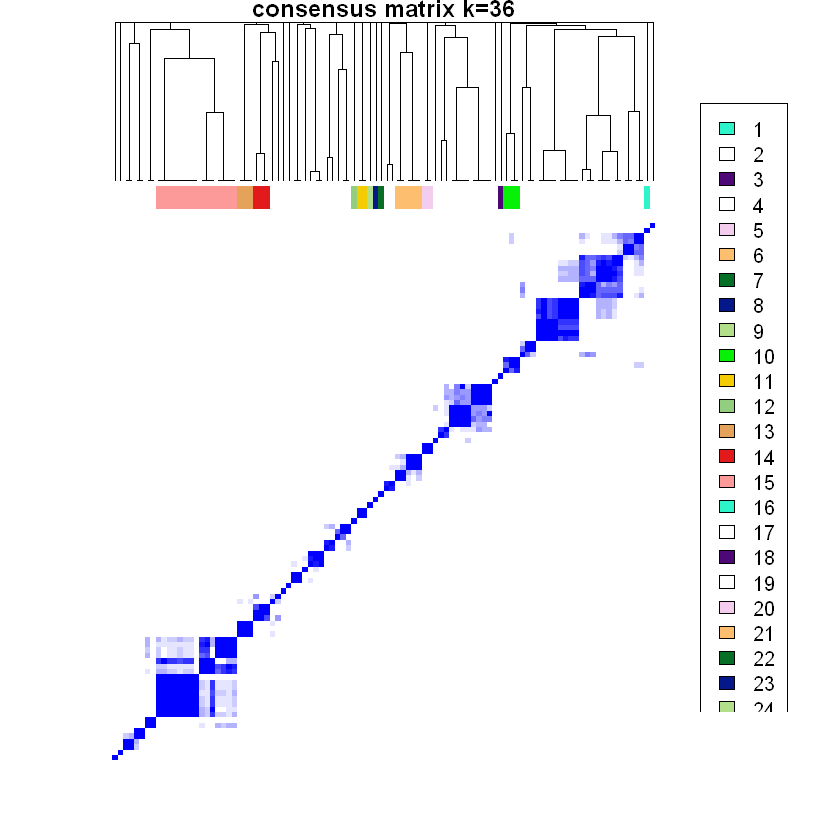

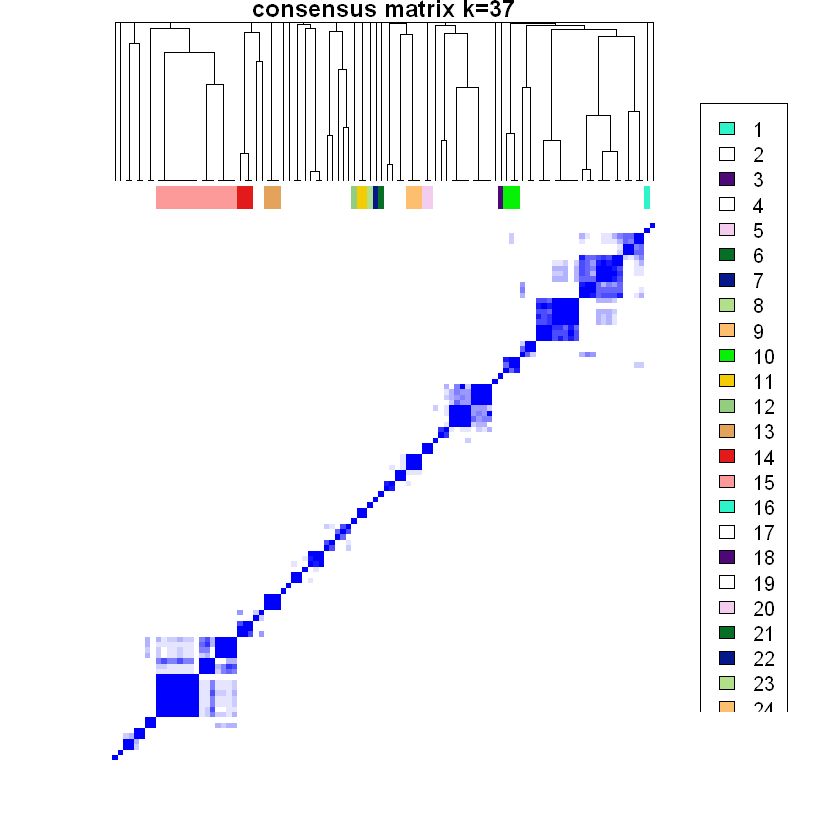

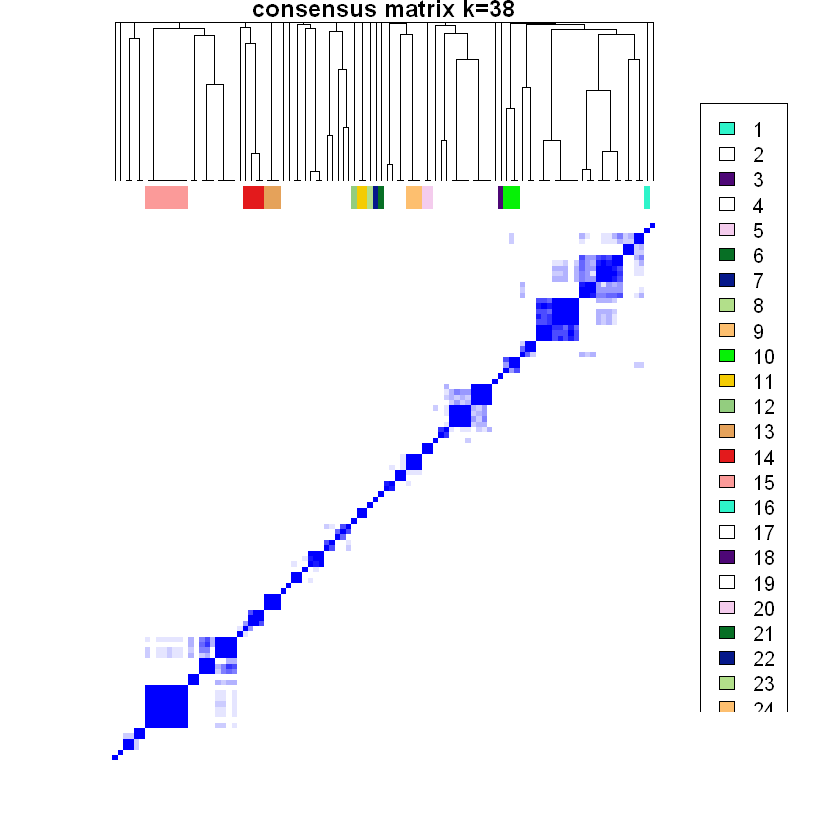

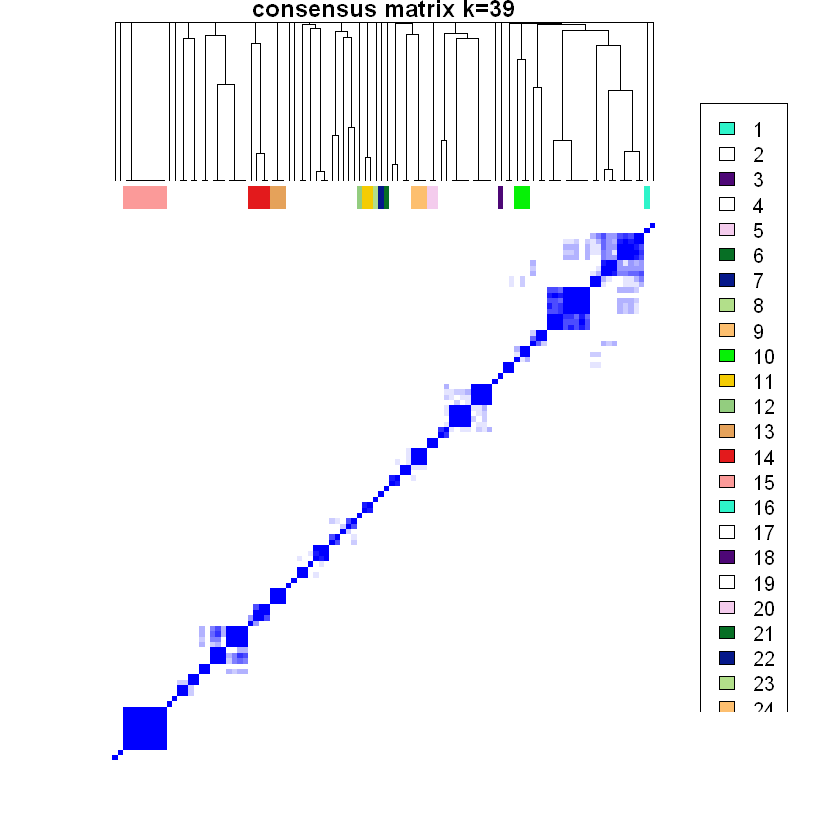

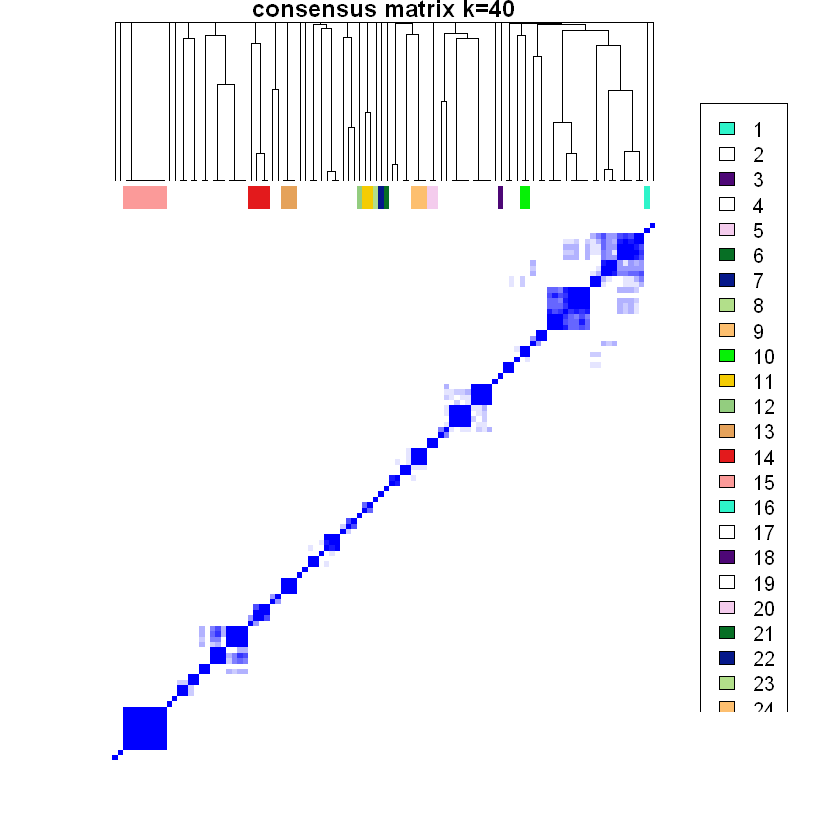

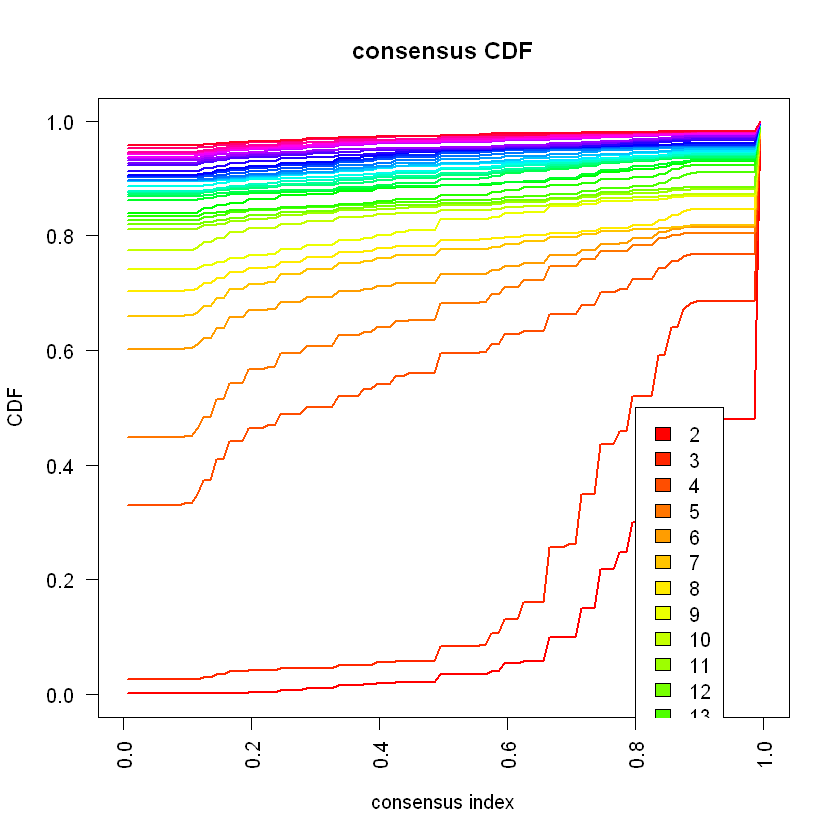

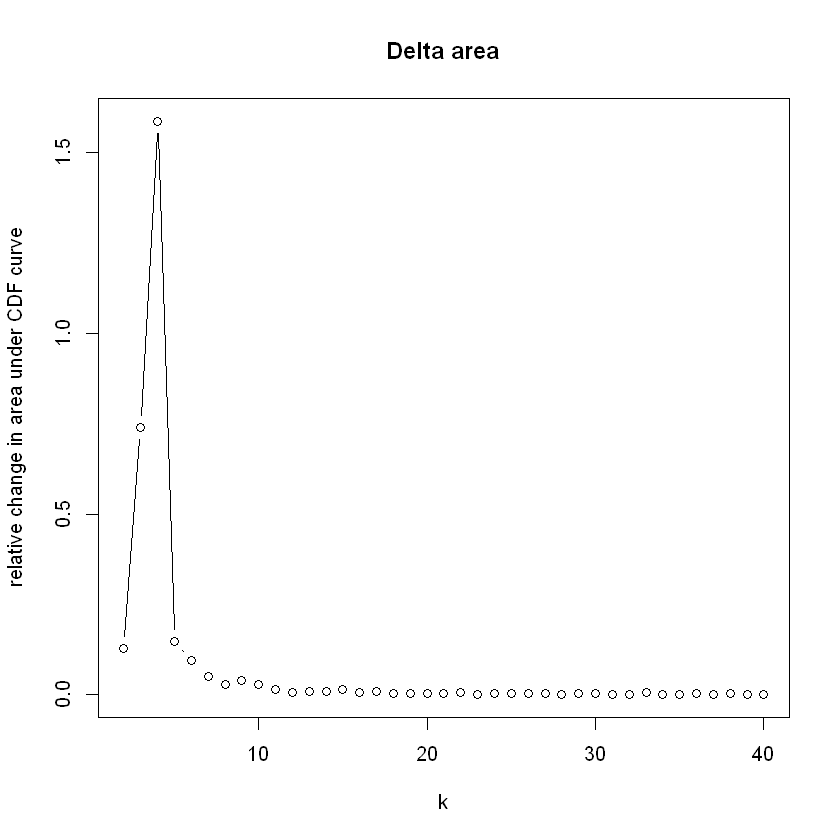

data set Levine_13dim : run complete


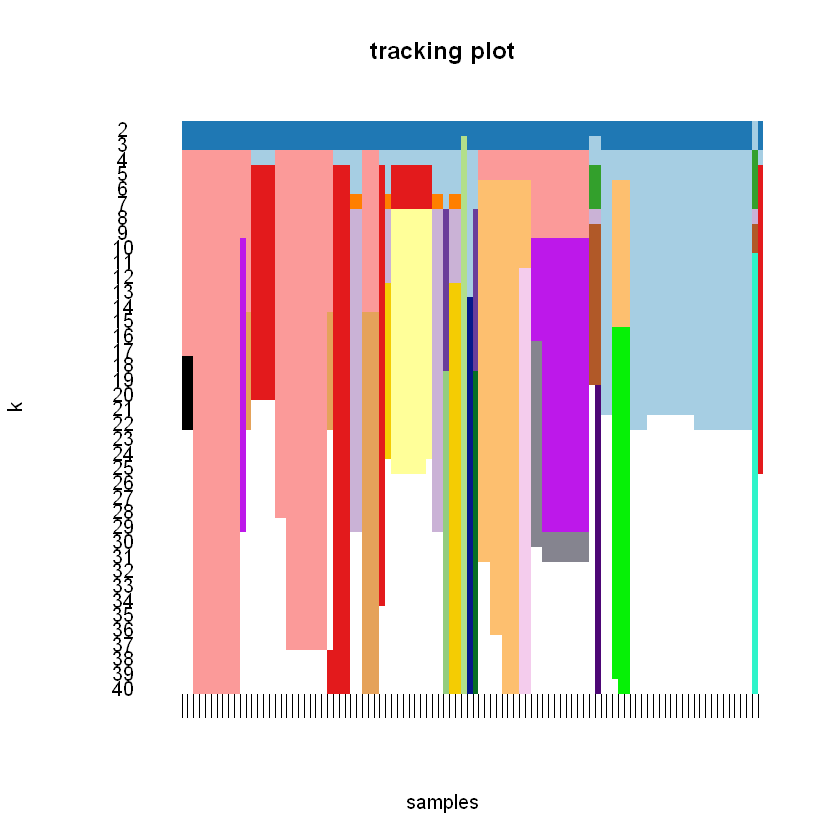

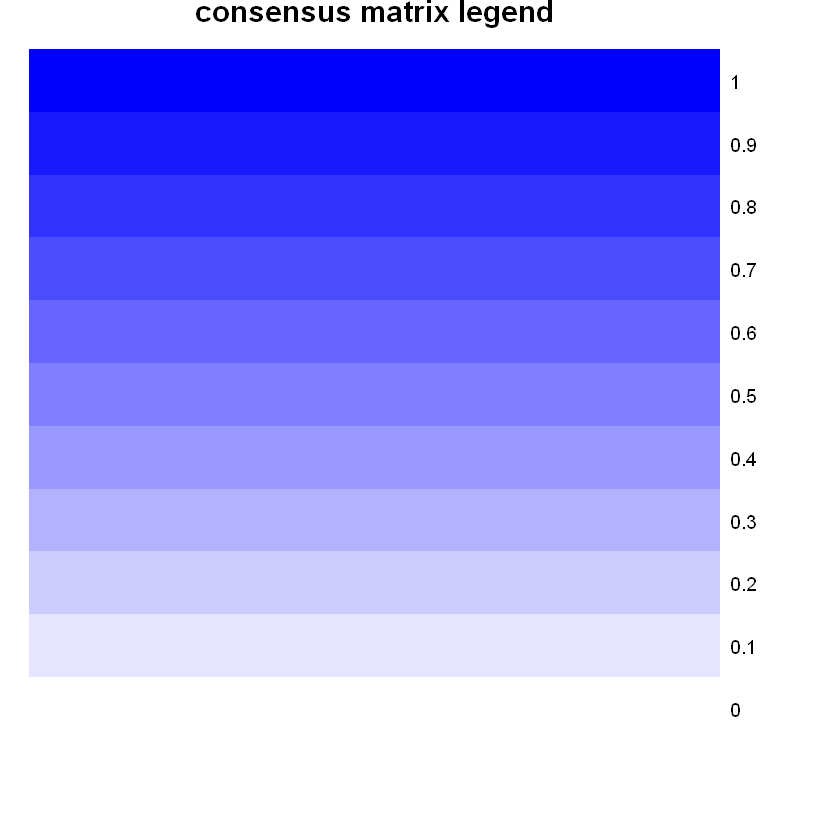

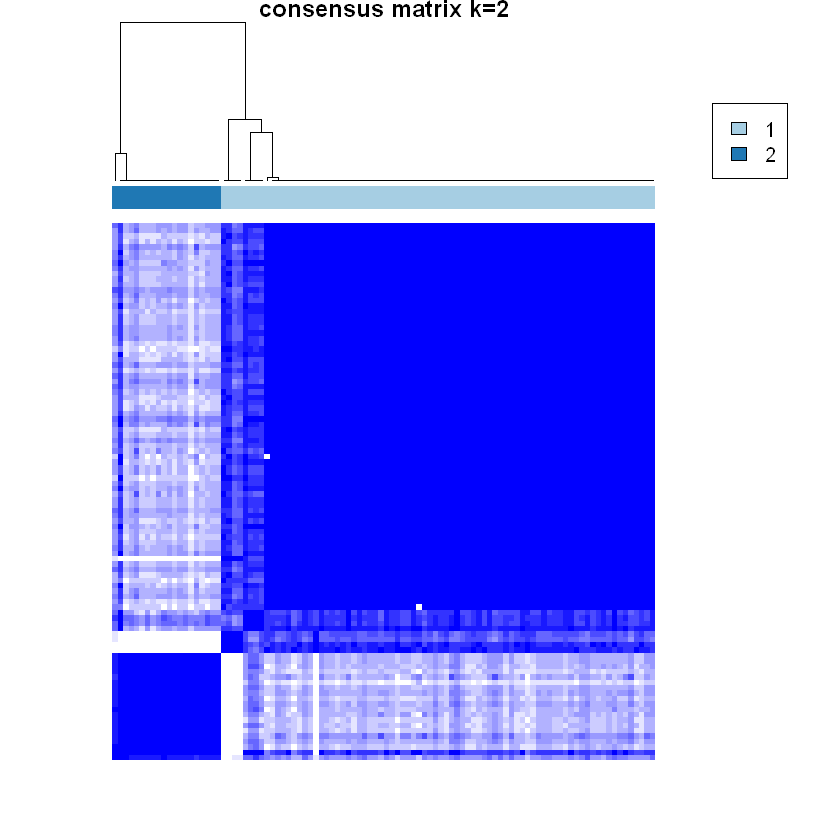

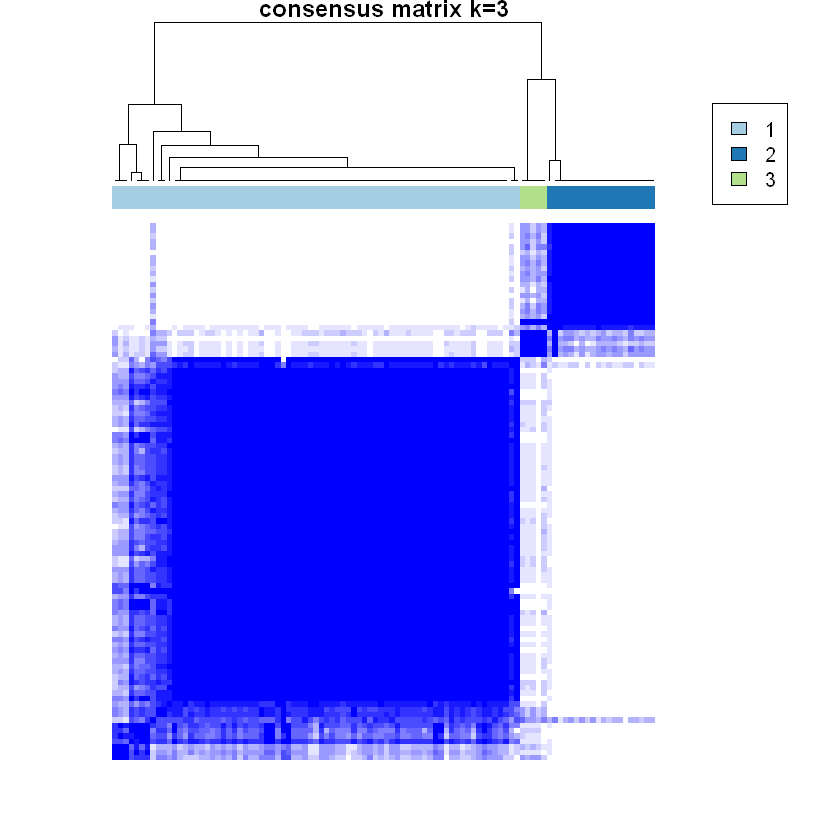

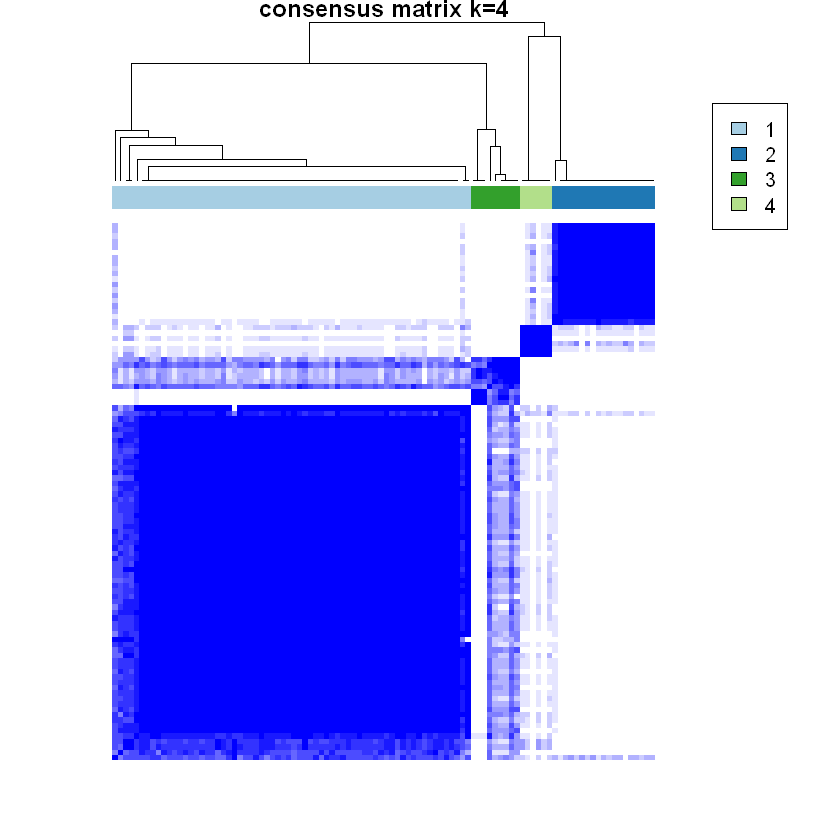

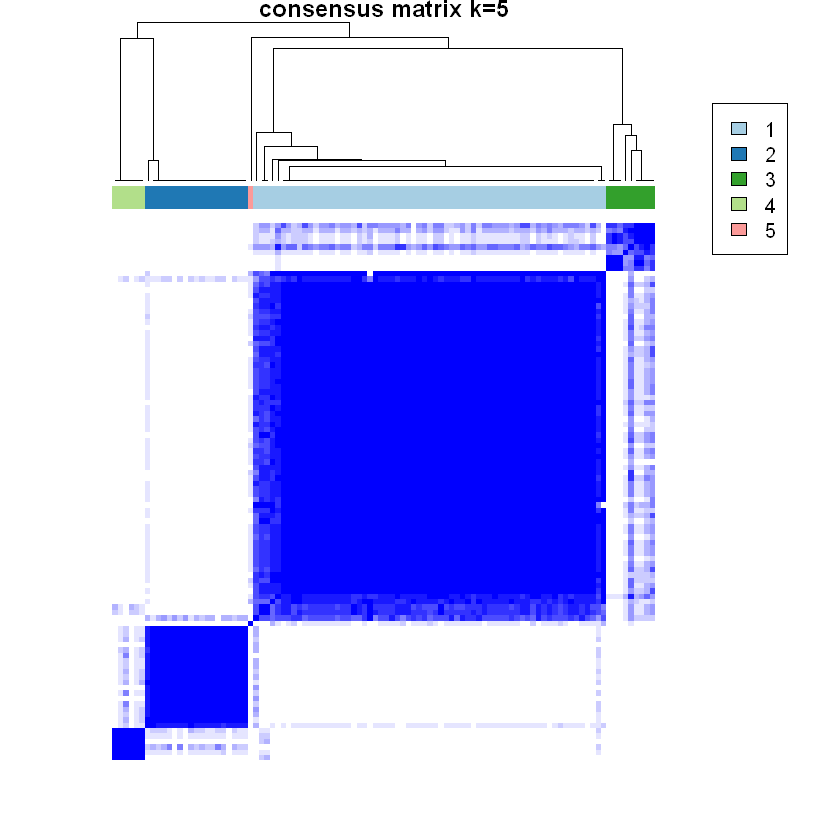

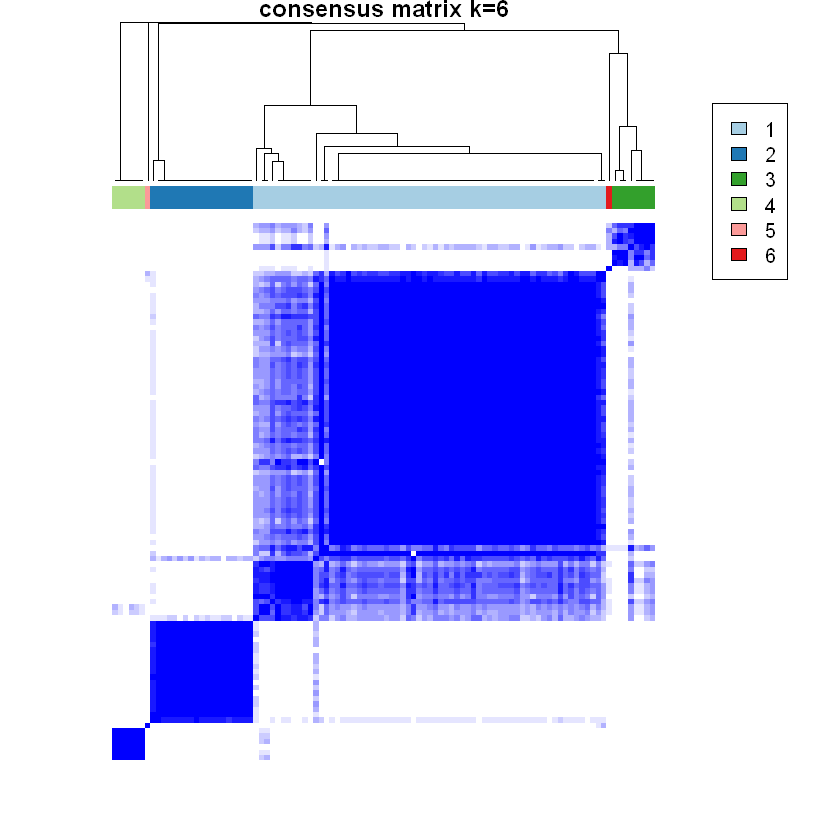

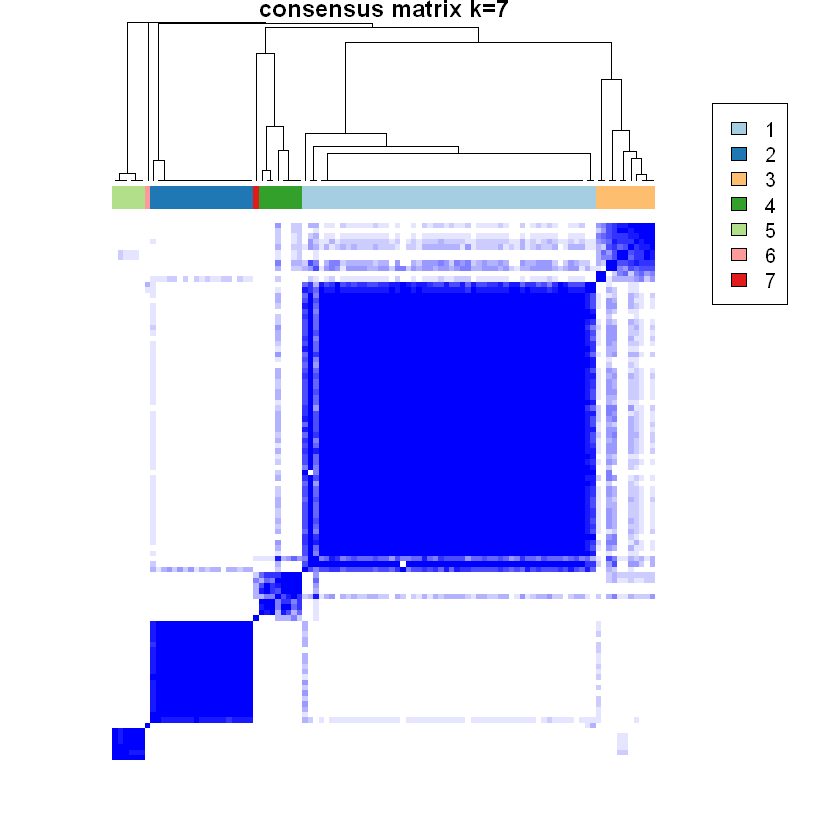

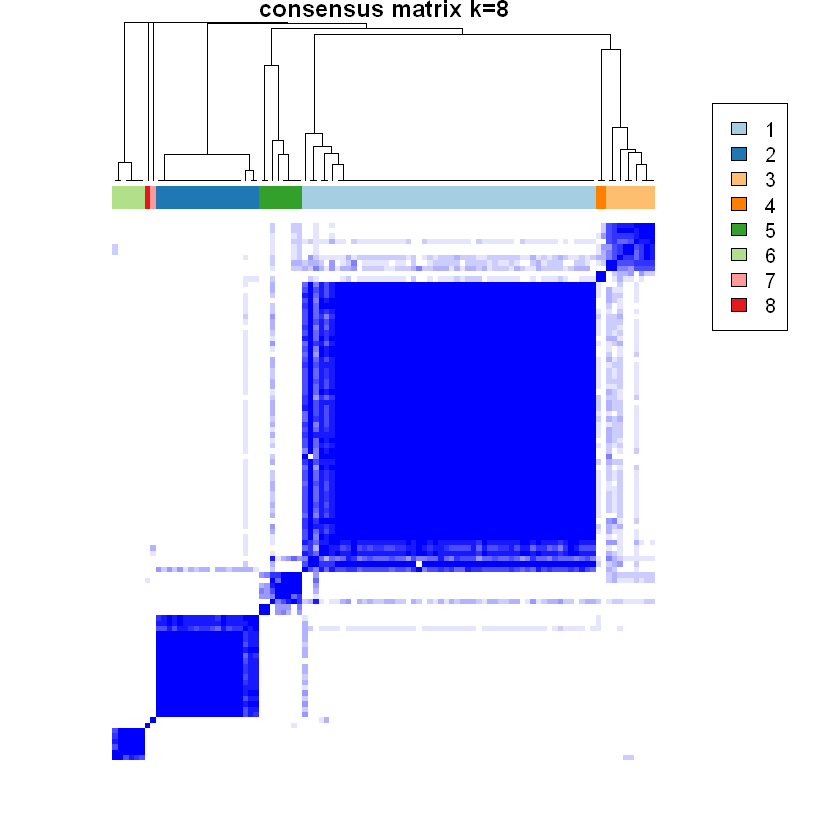

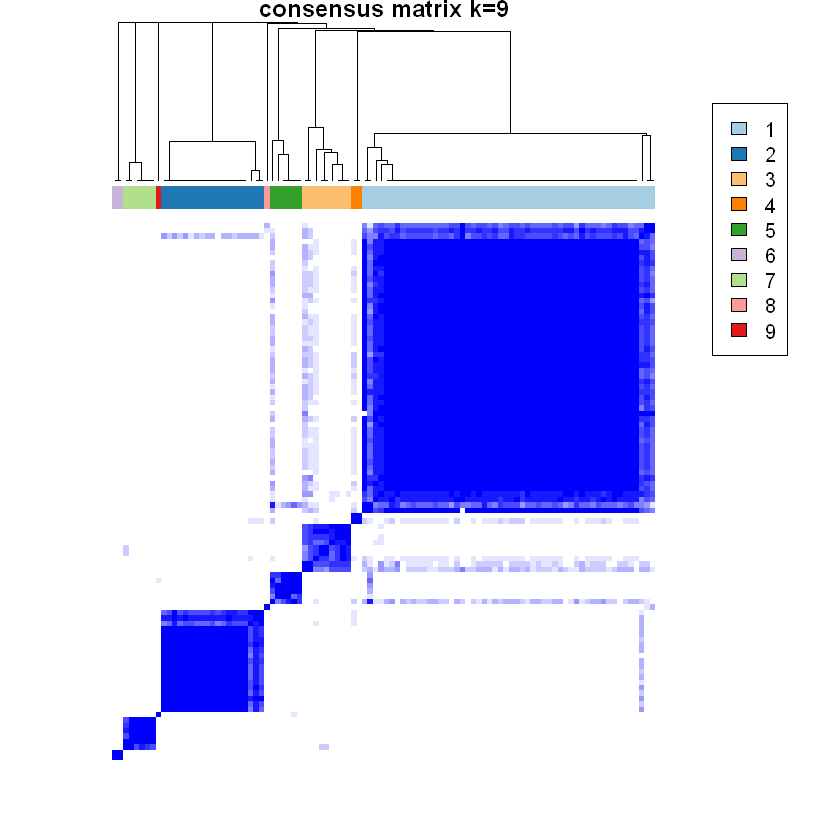

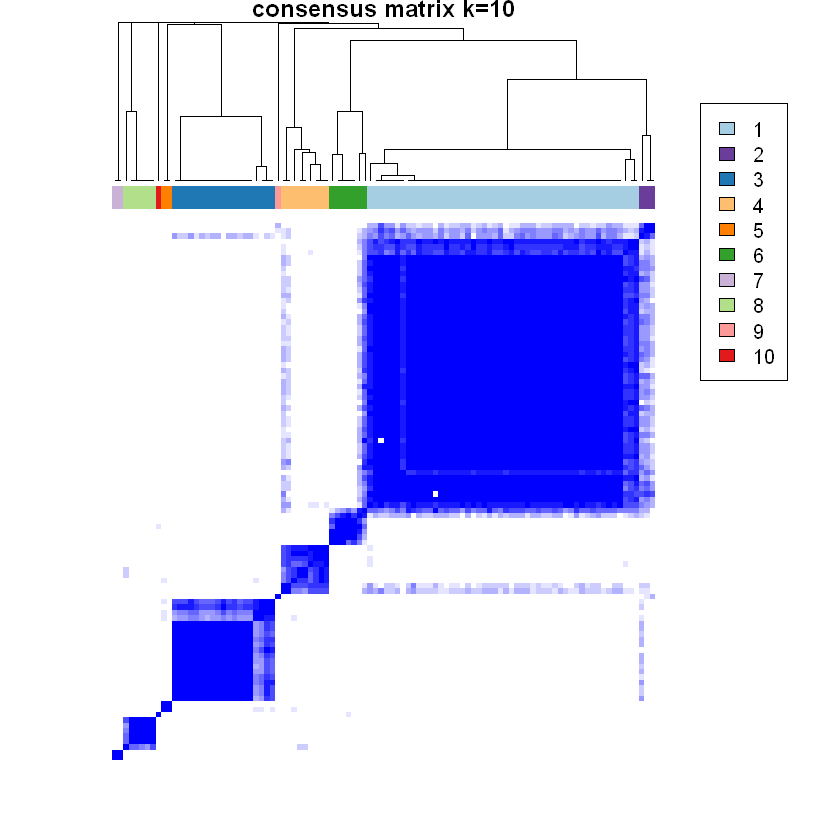

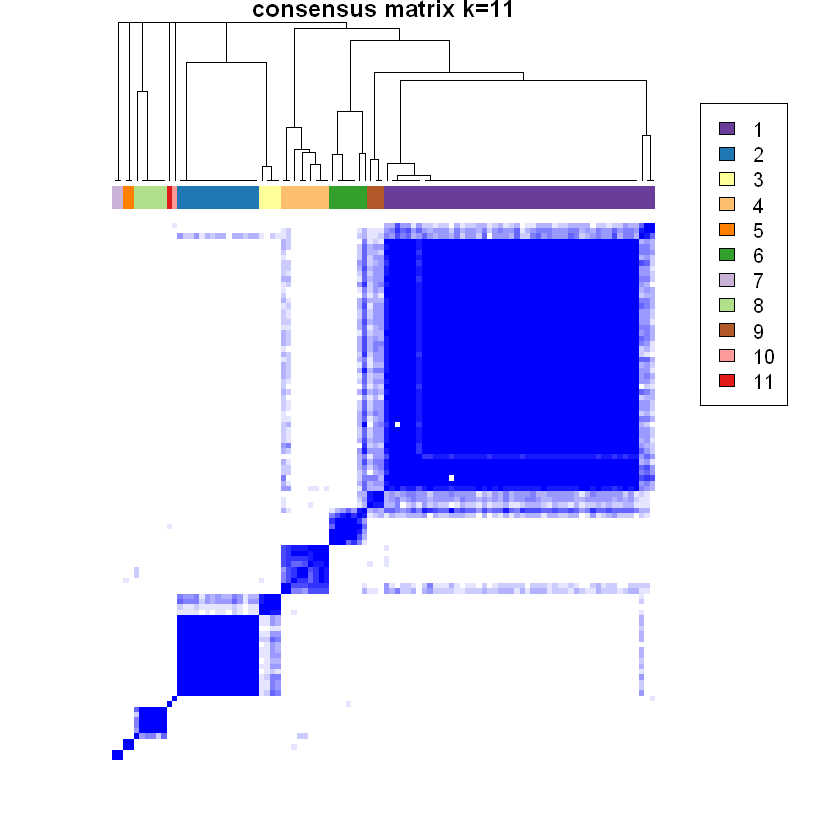

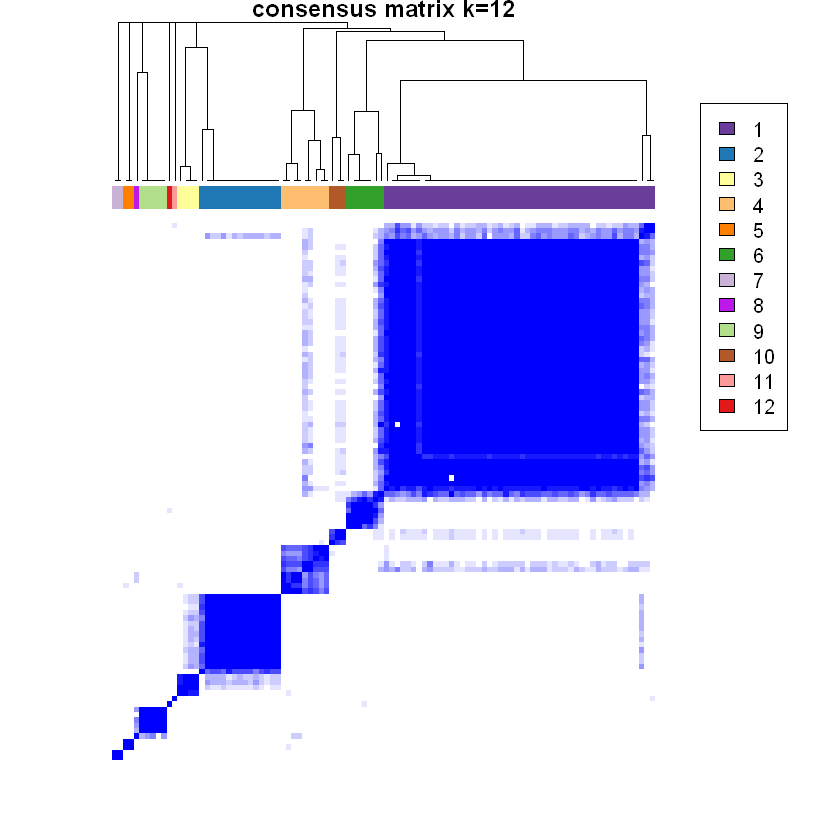

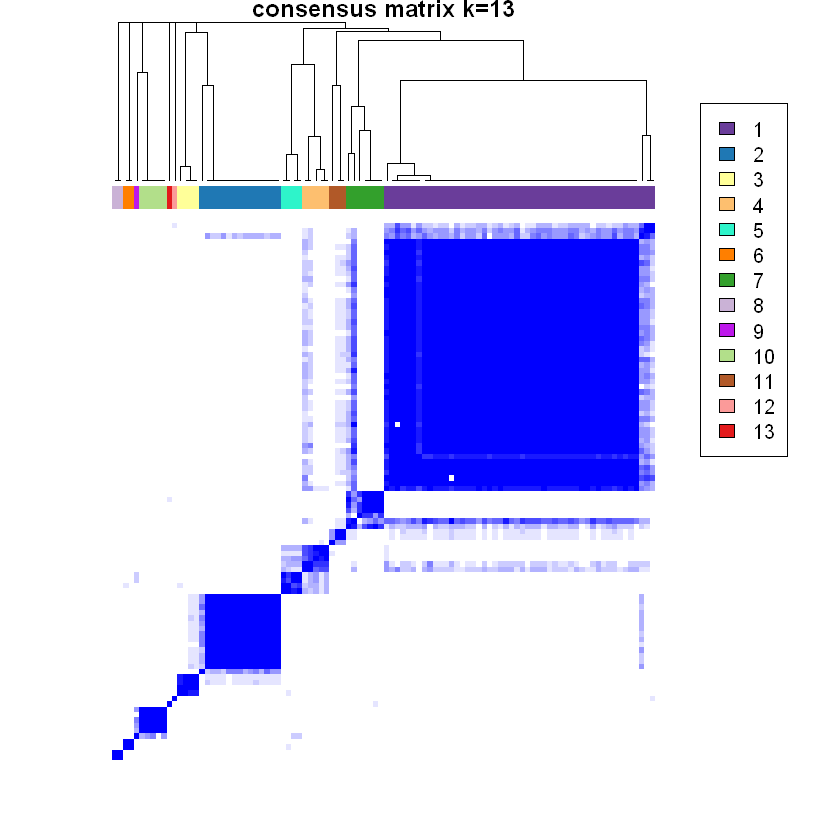

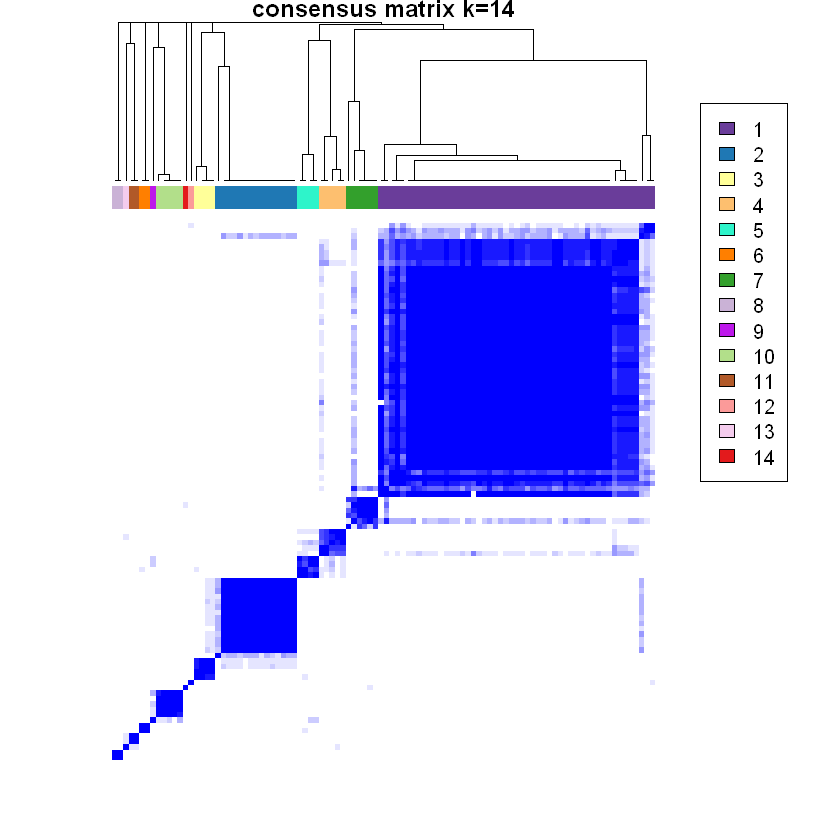

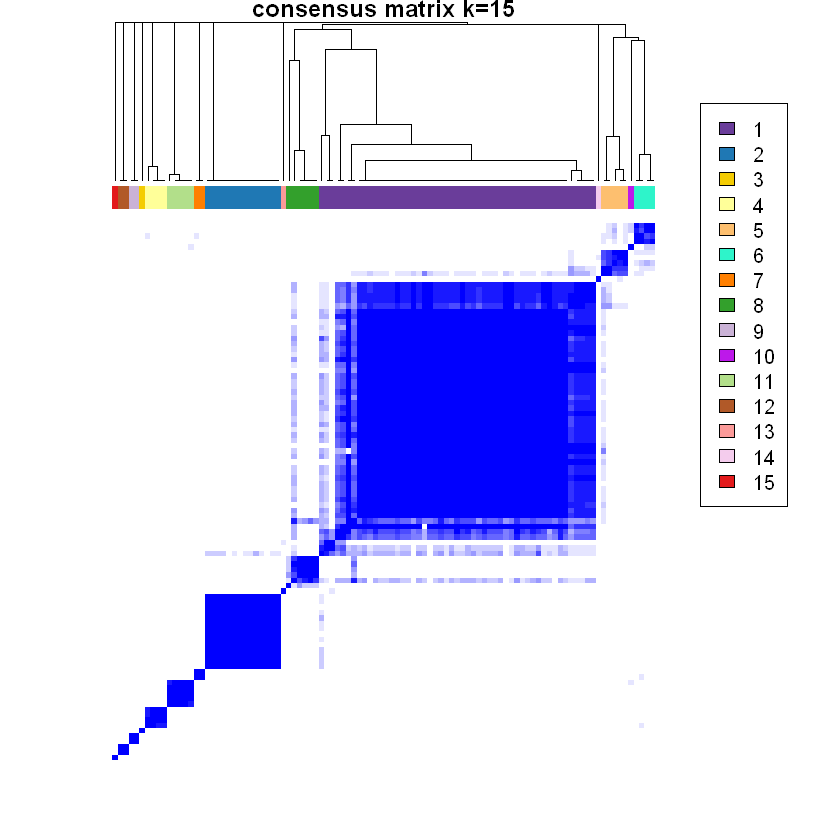

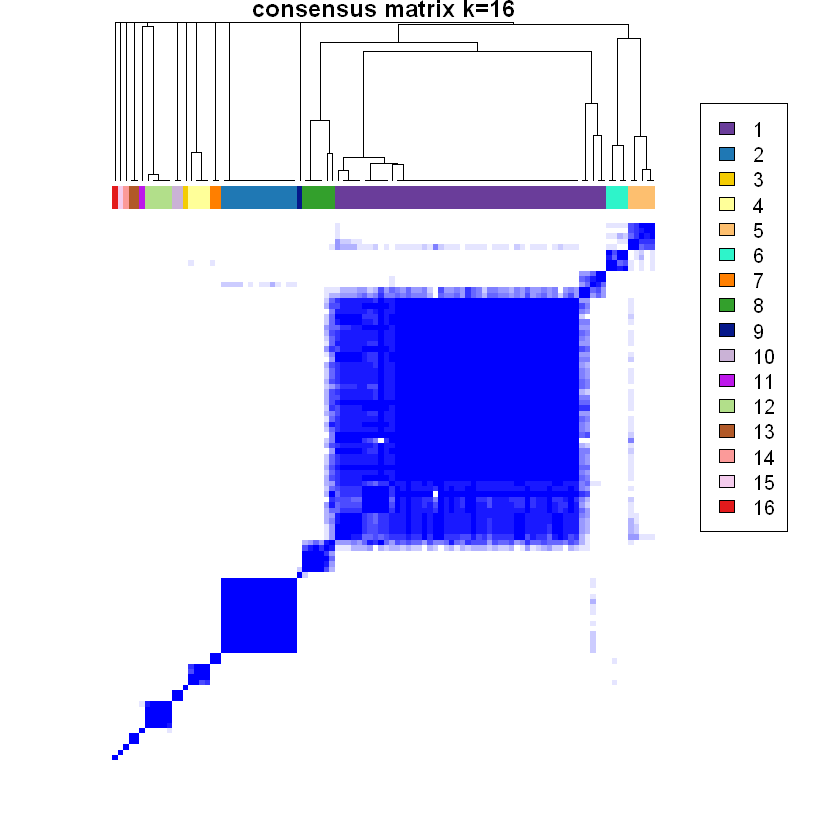

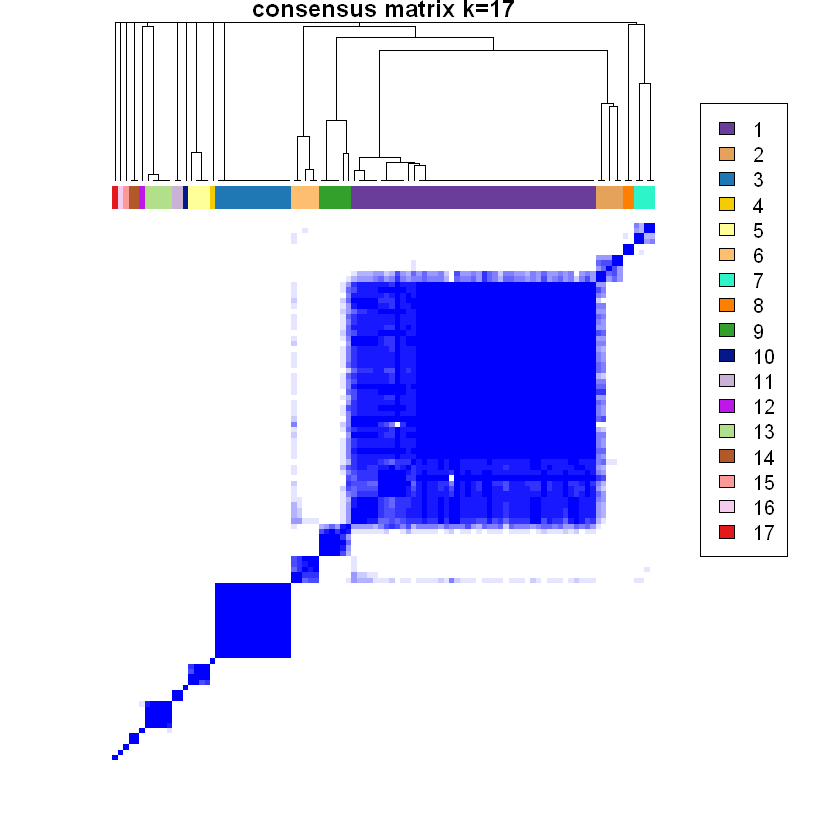

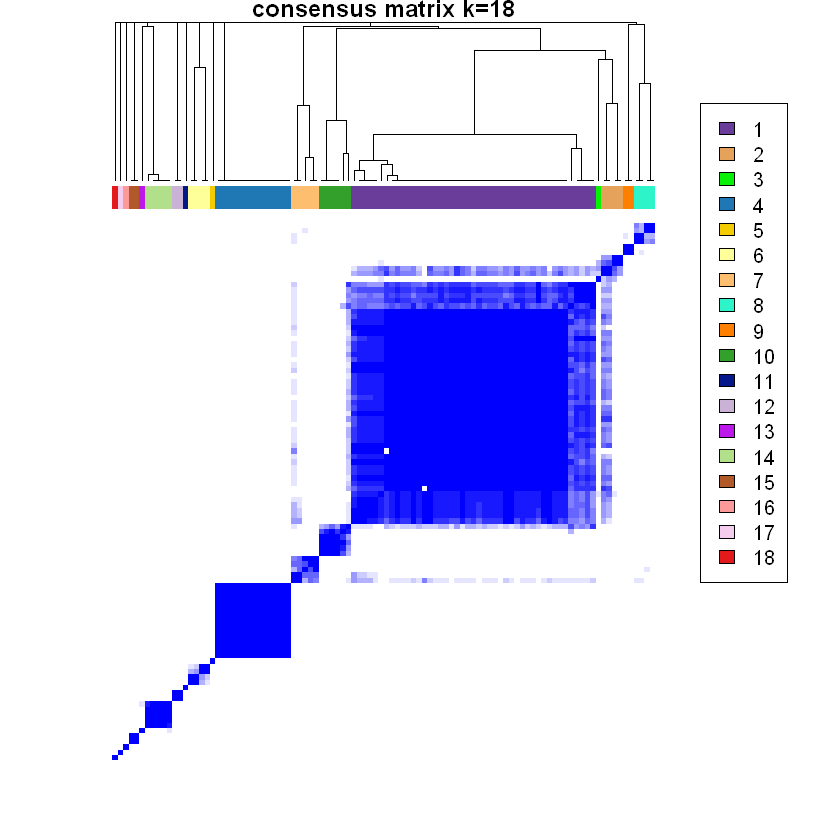

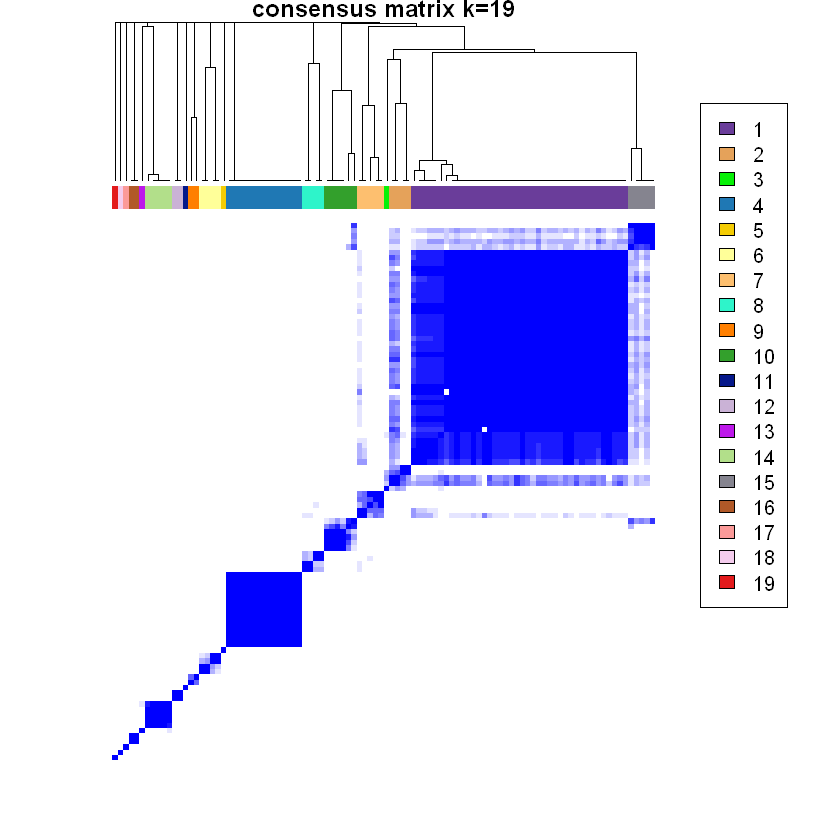

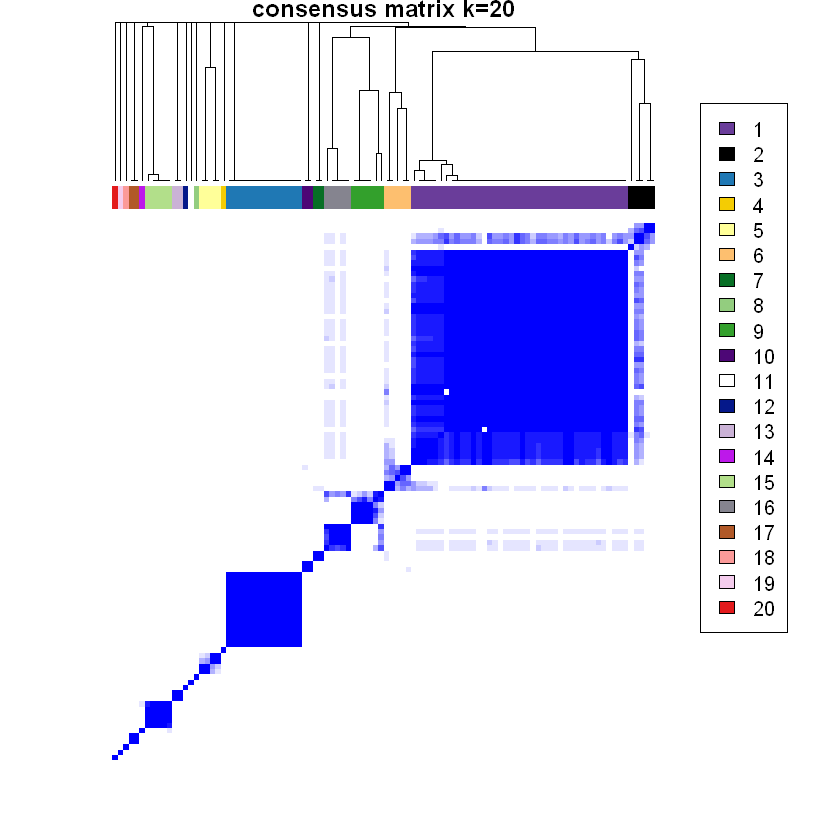

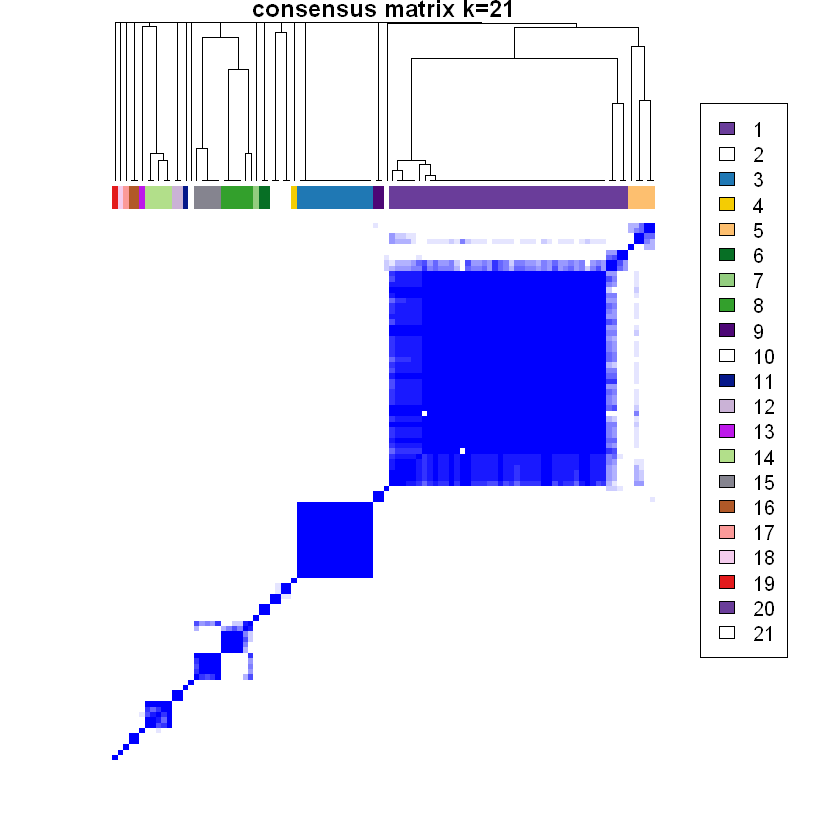

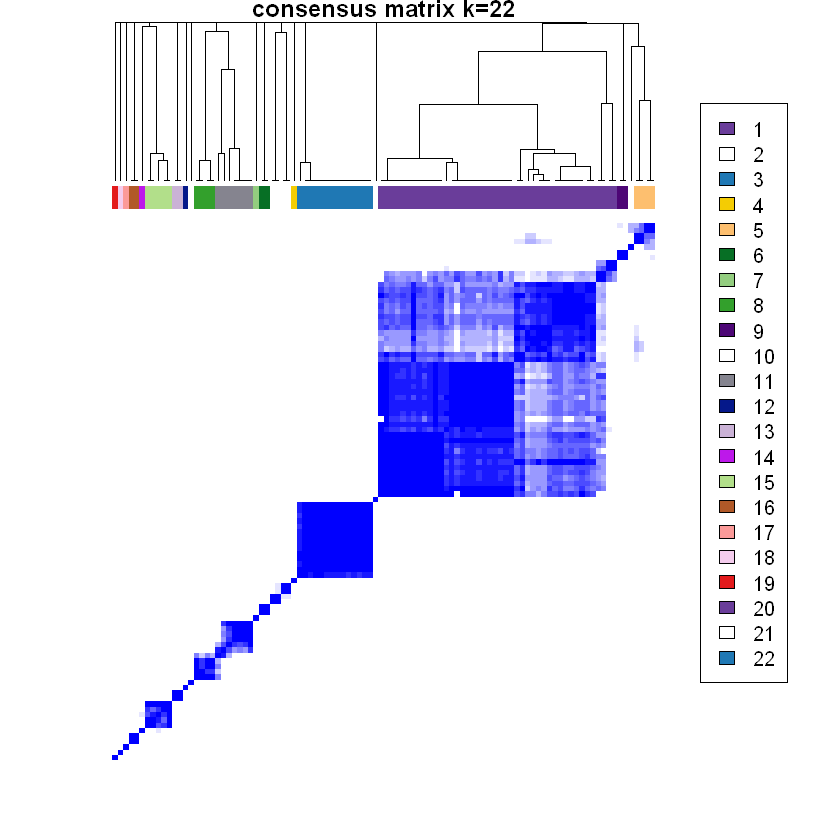

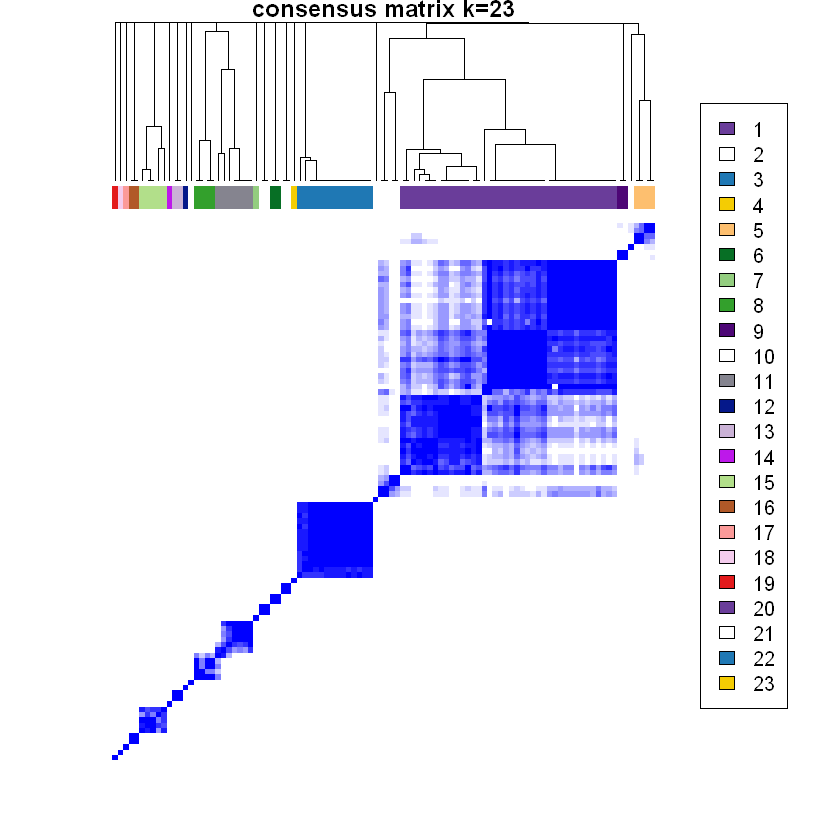

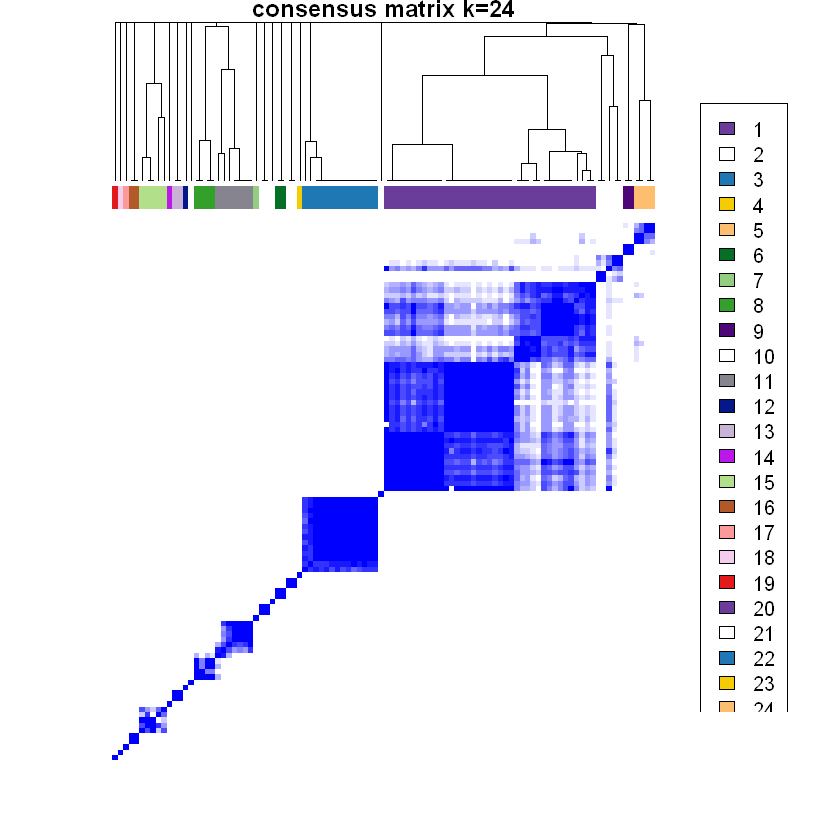

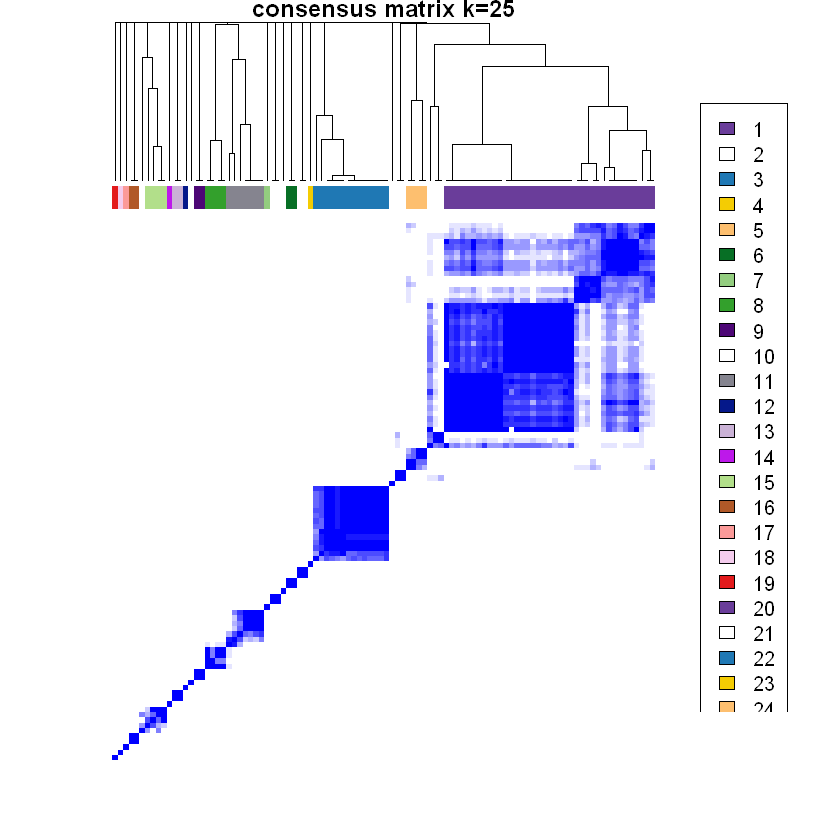

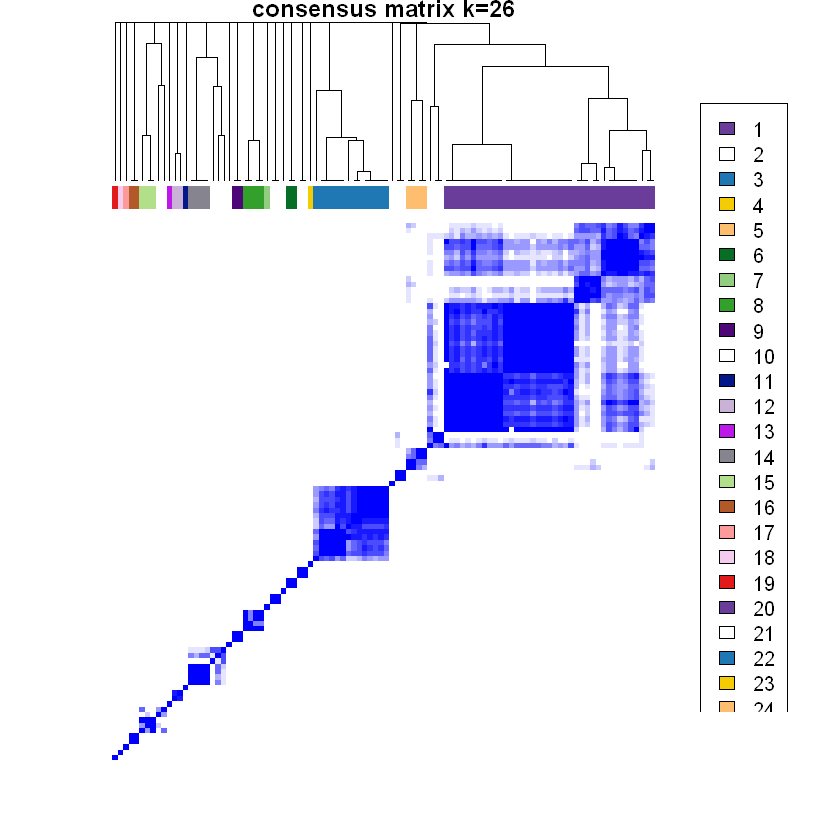

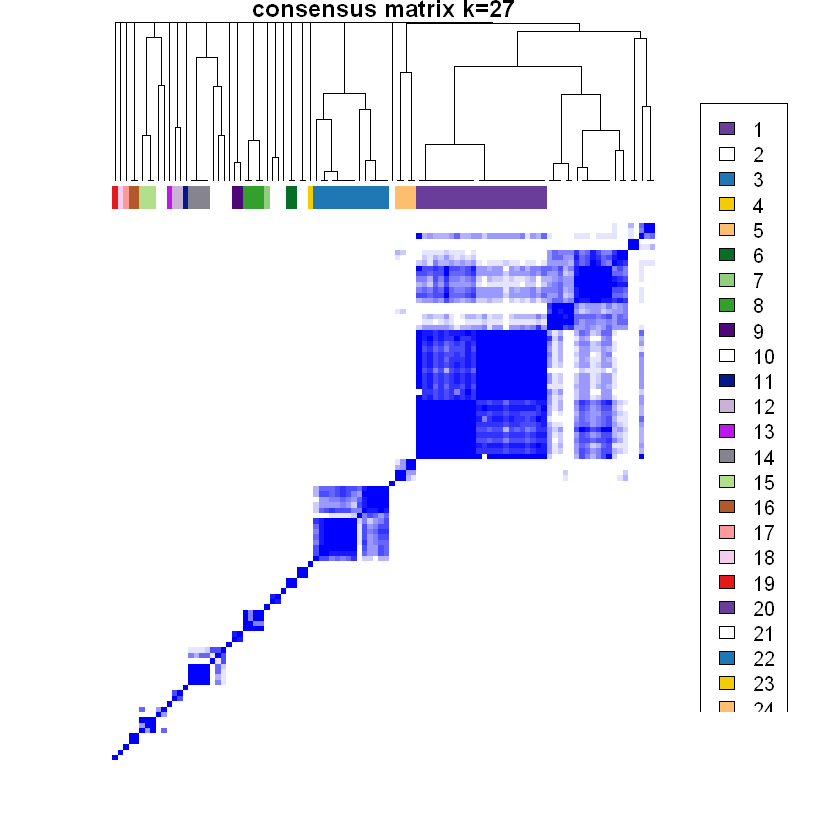

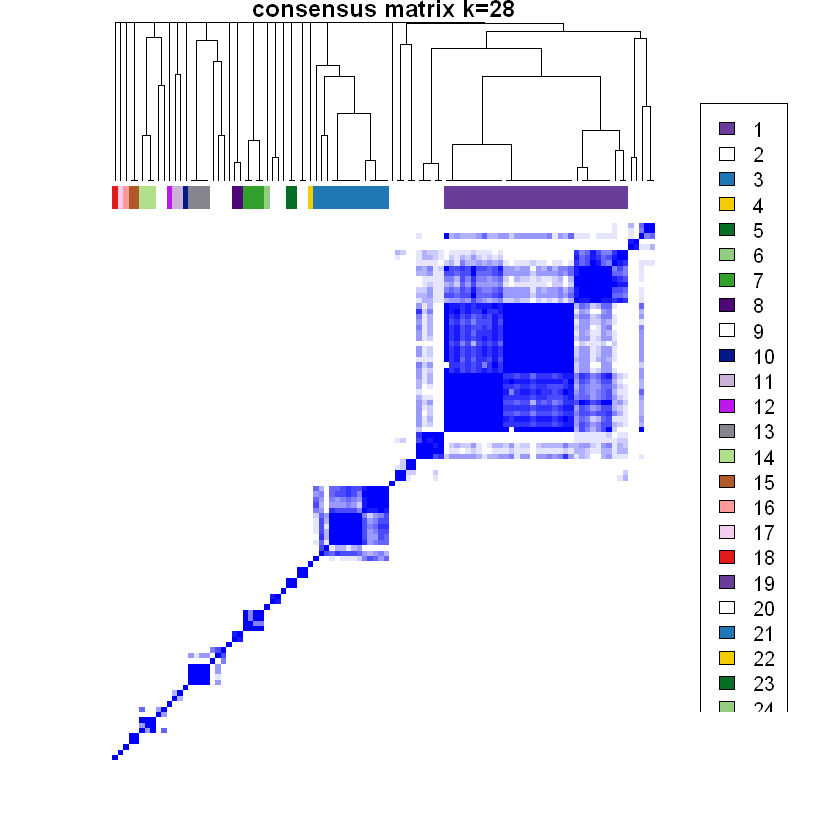

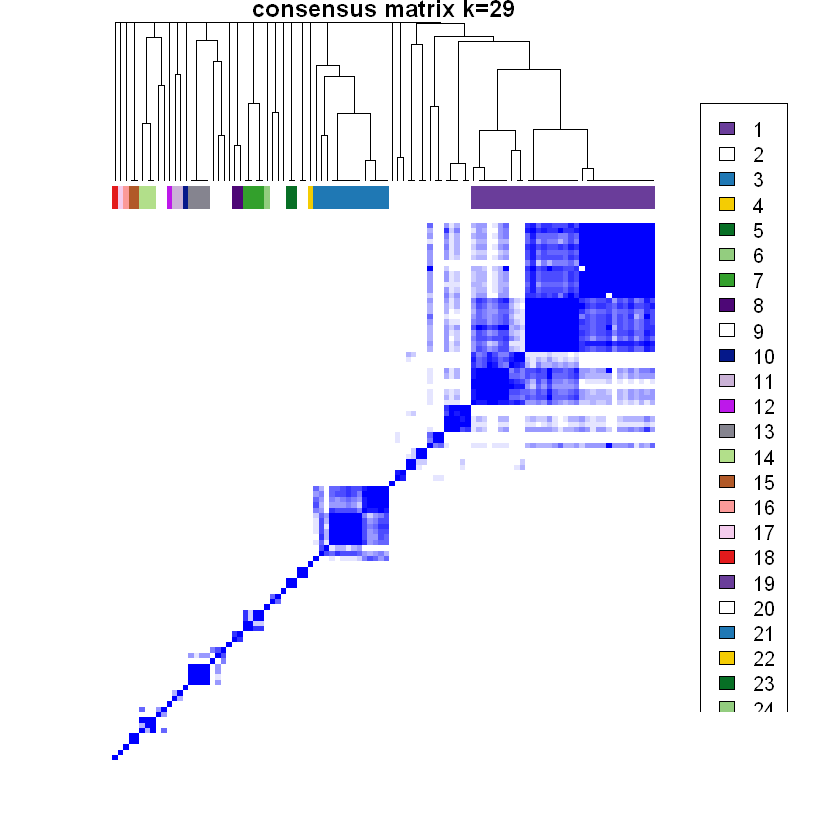

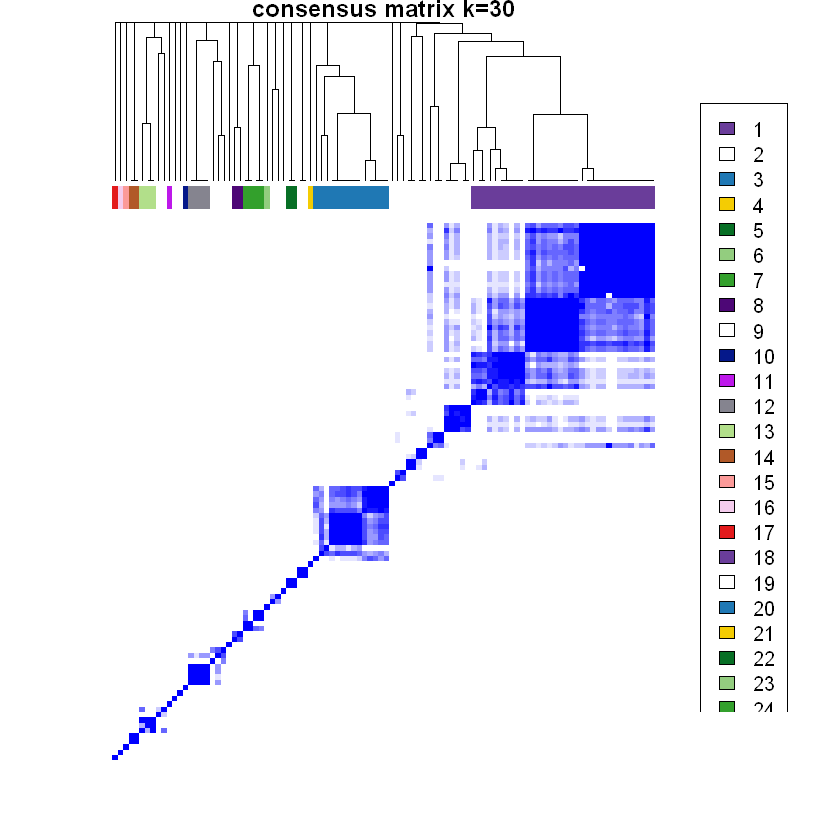

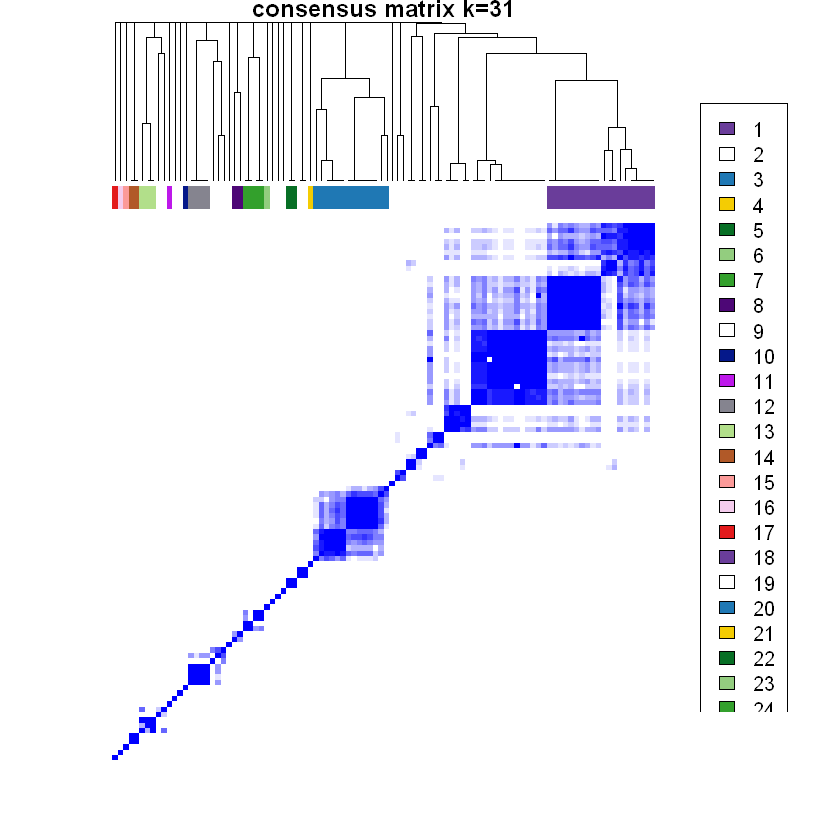

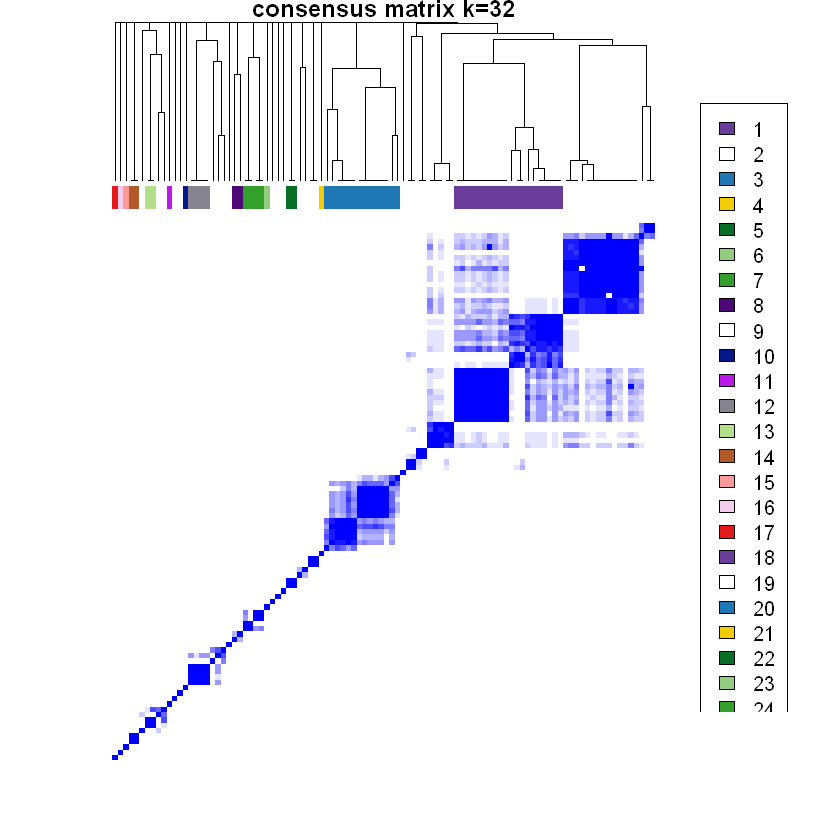

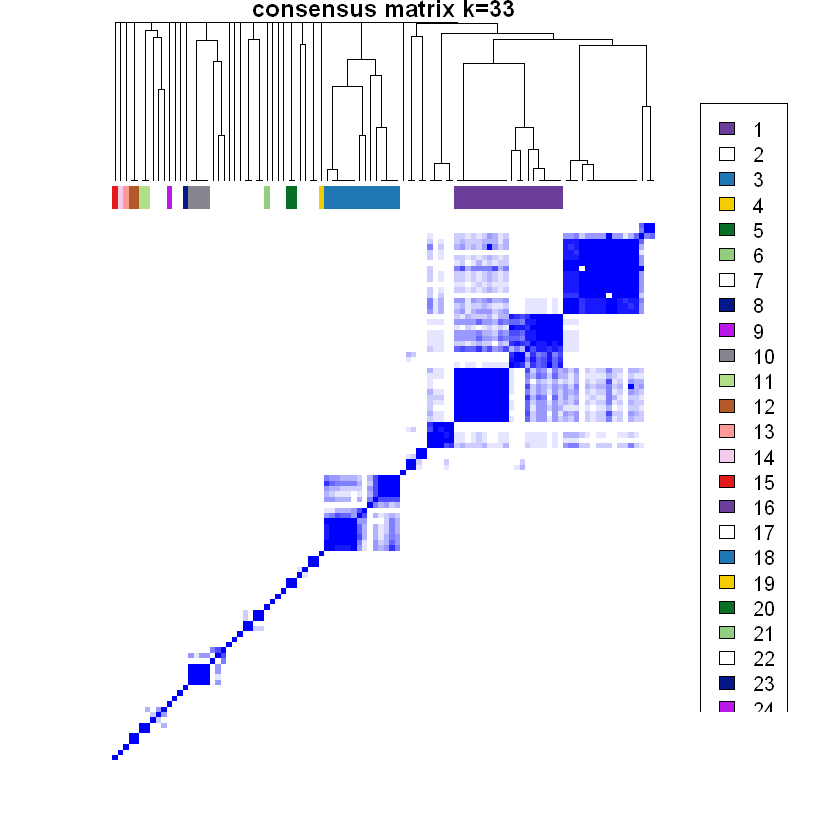

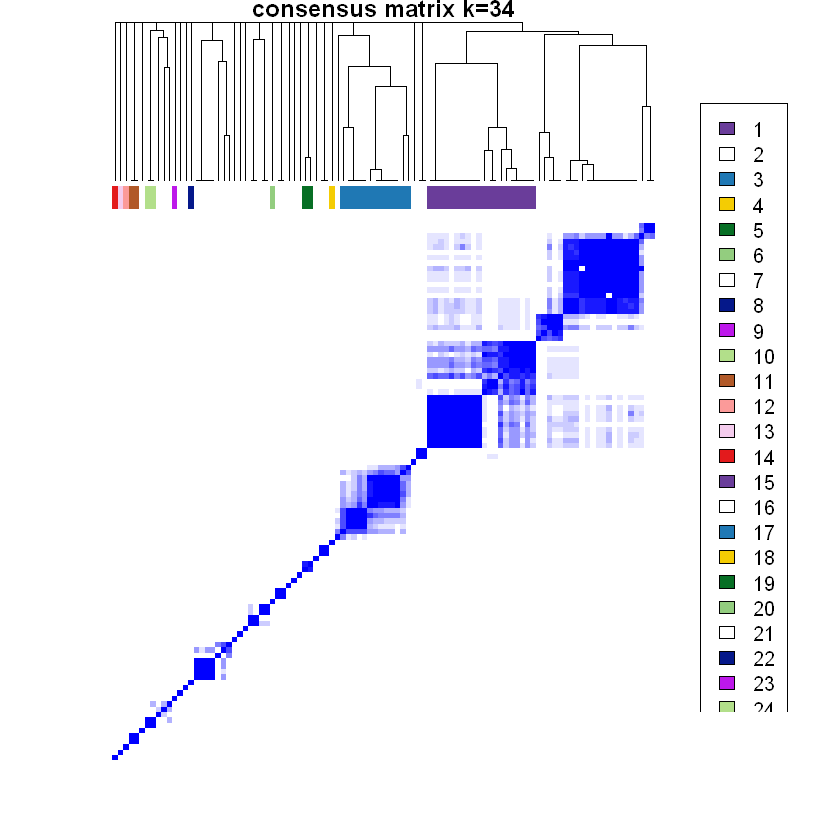

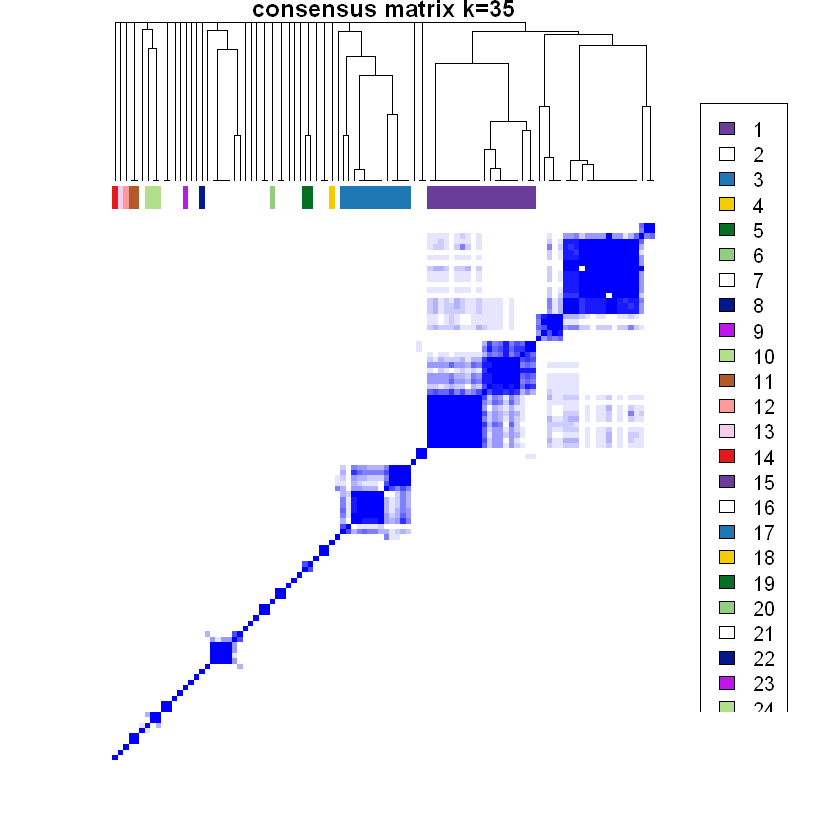

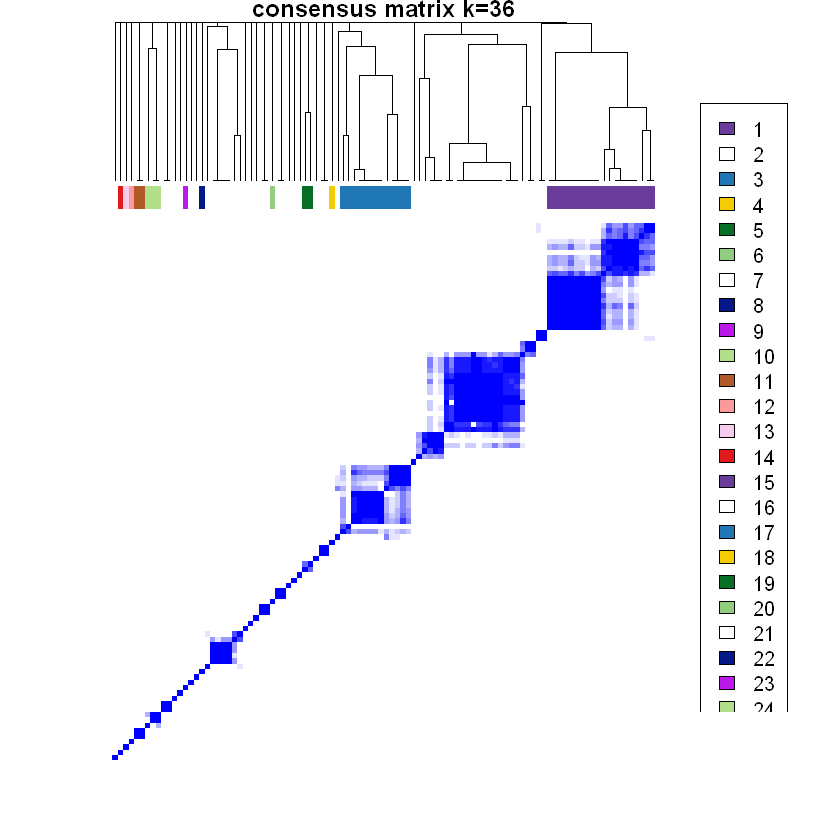

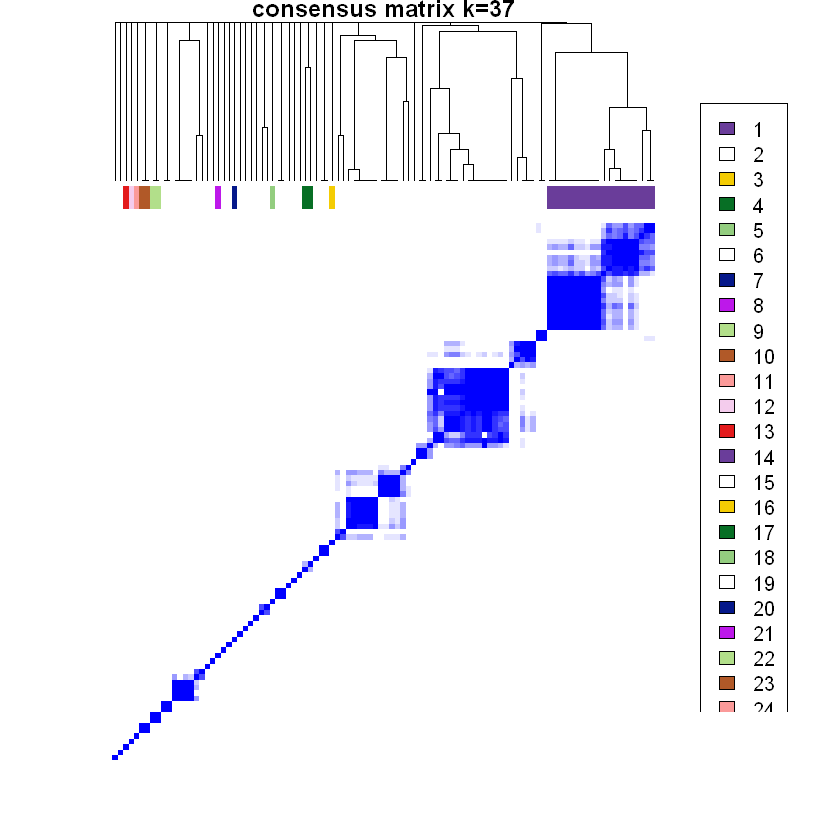

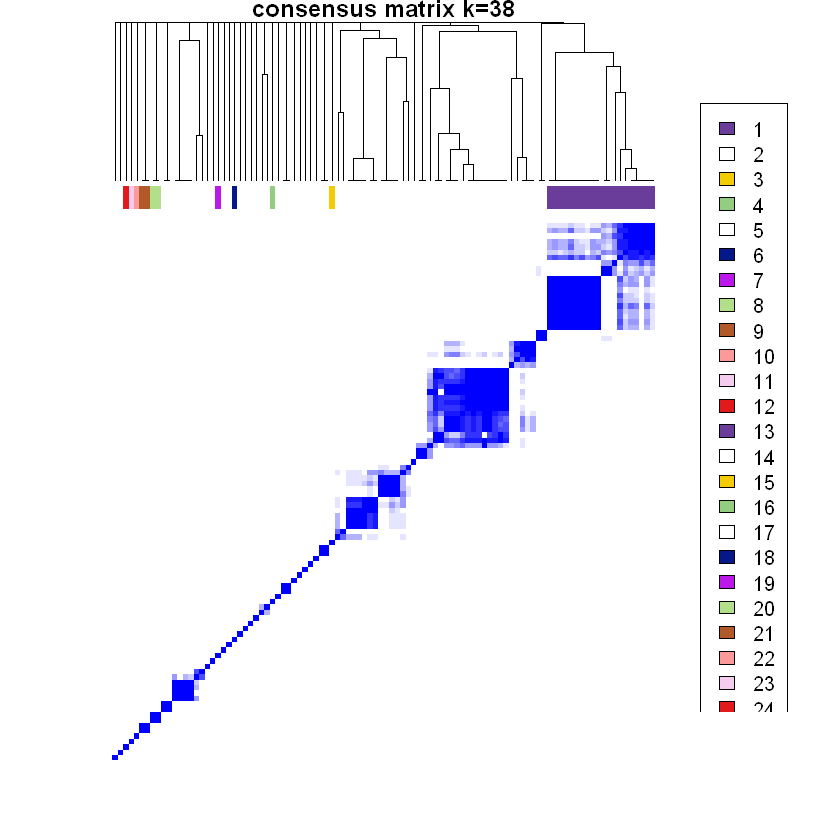

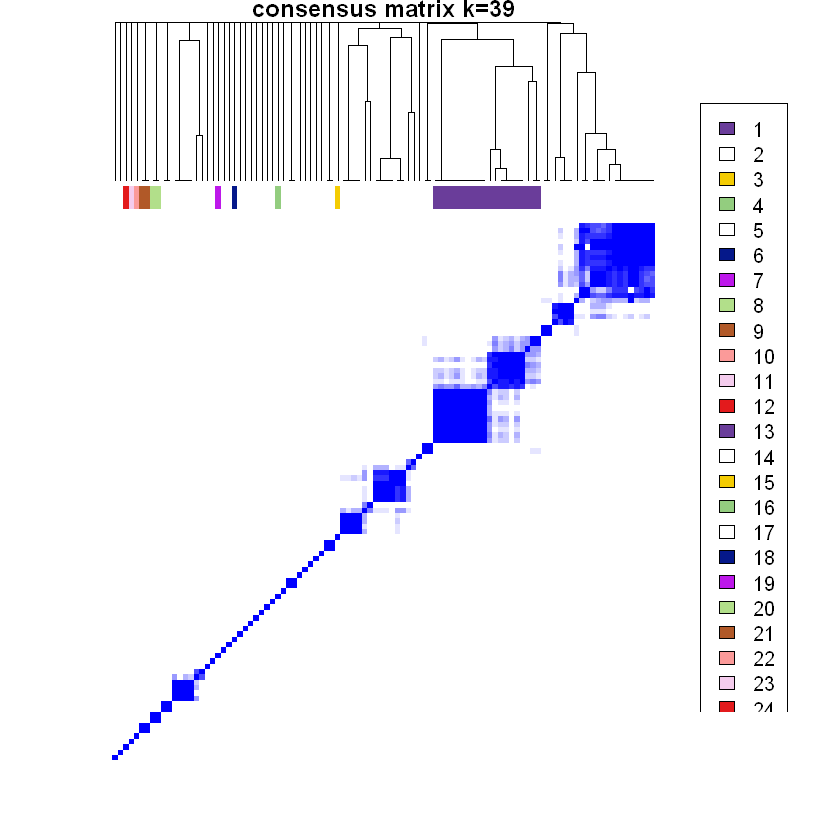

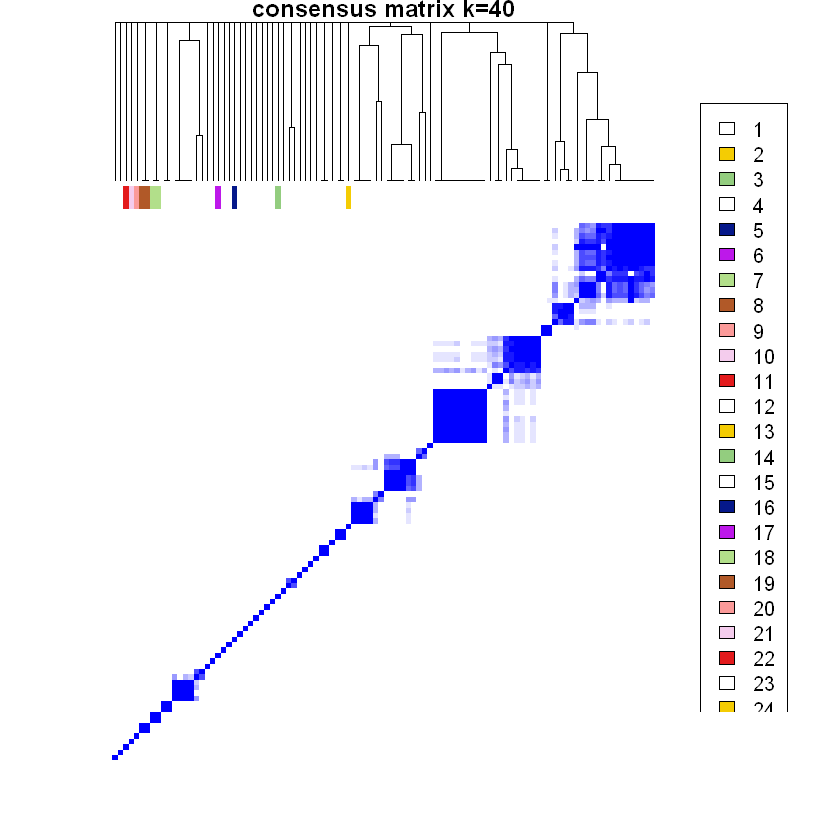

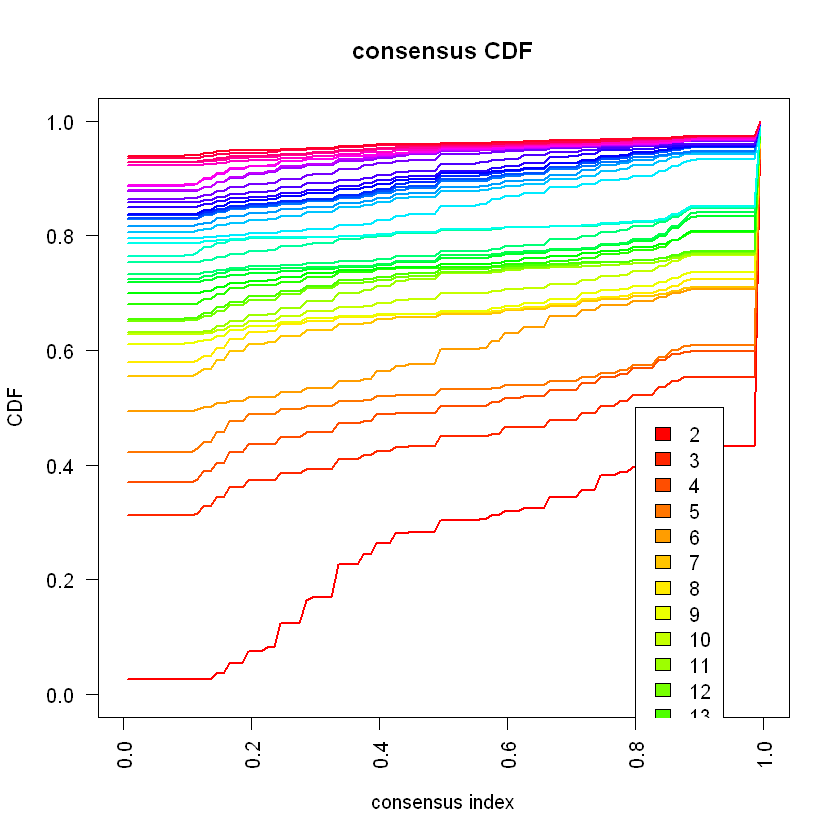

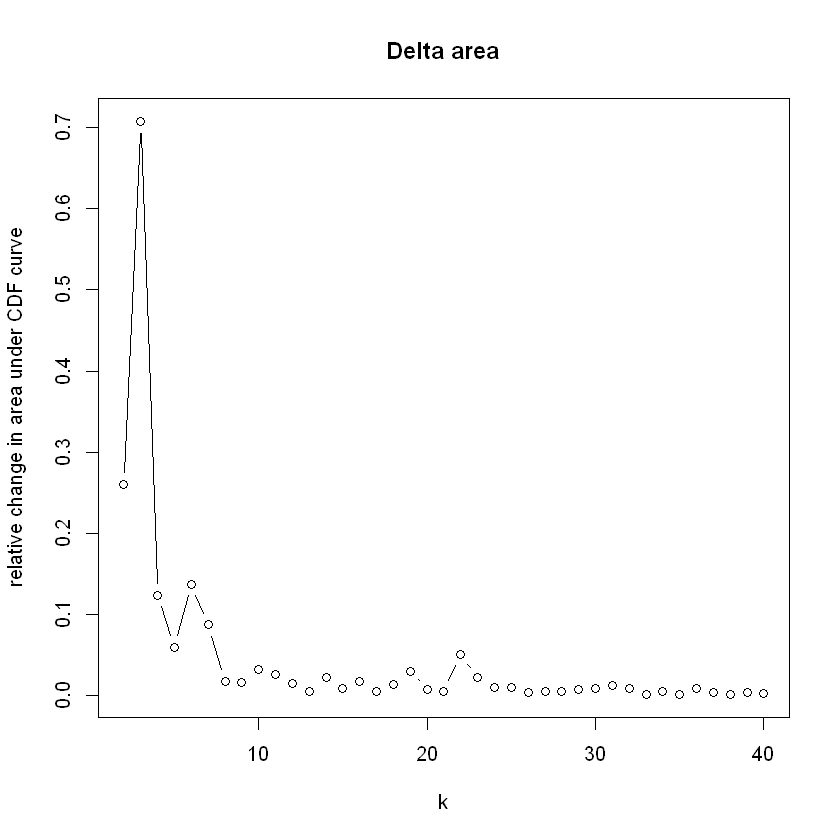

data set Samusik_01 : run complete


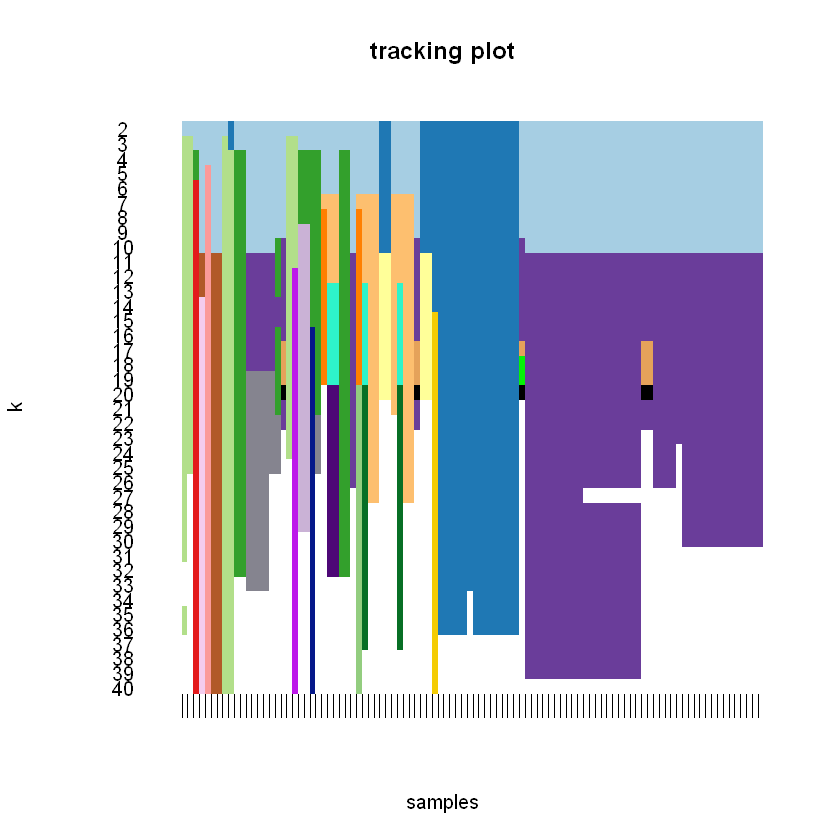

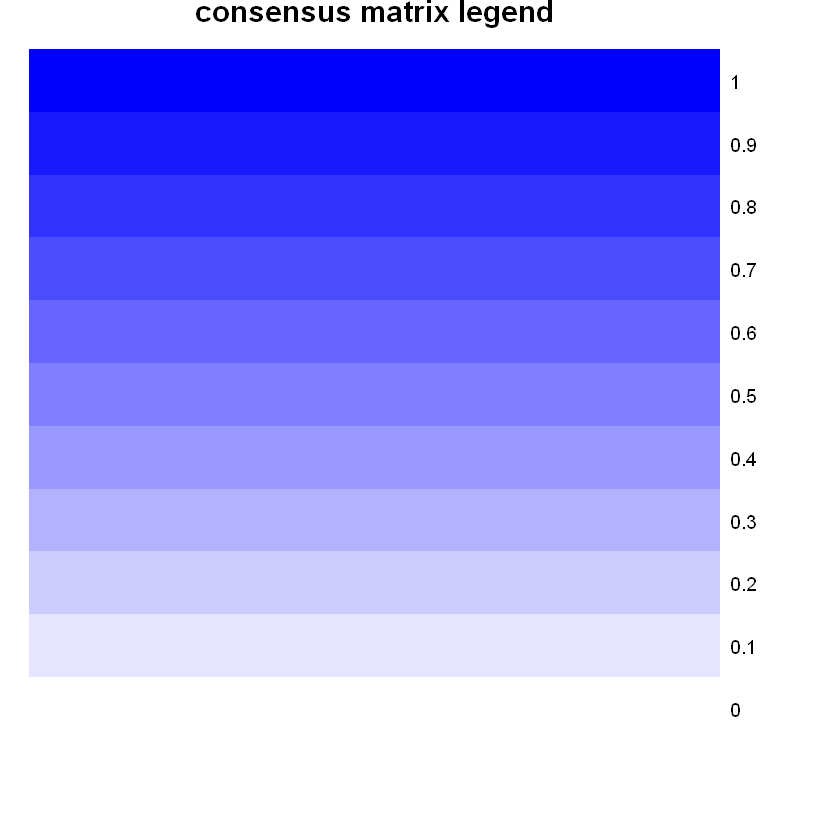

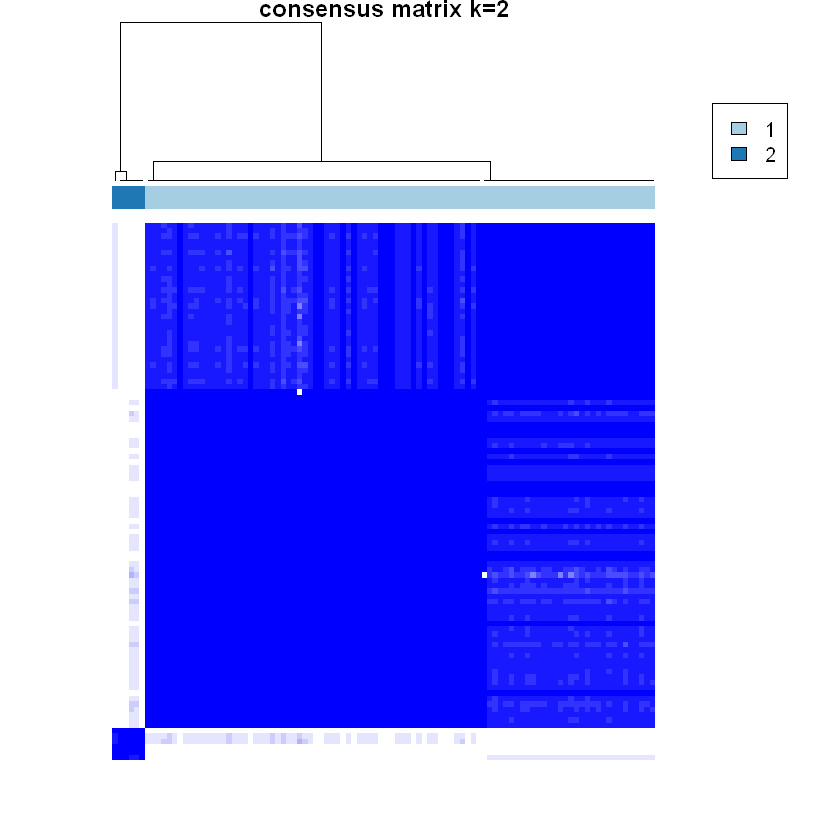

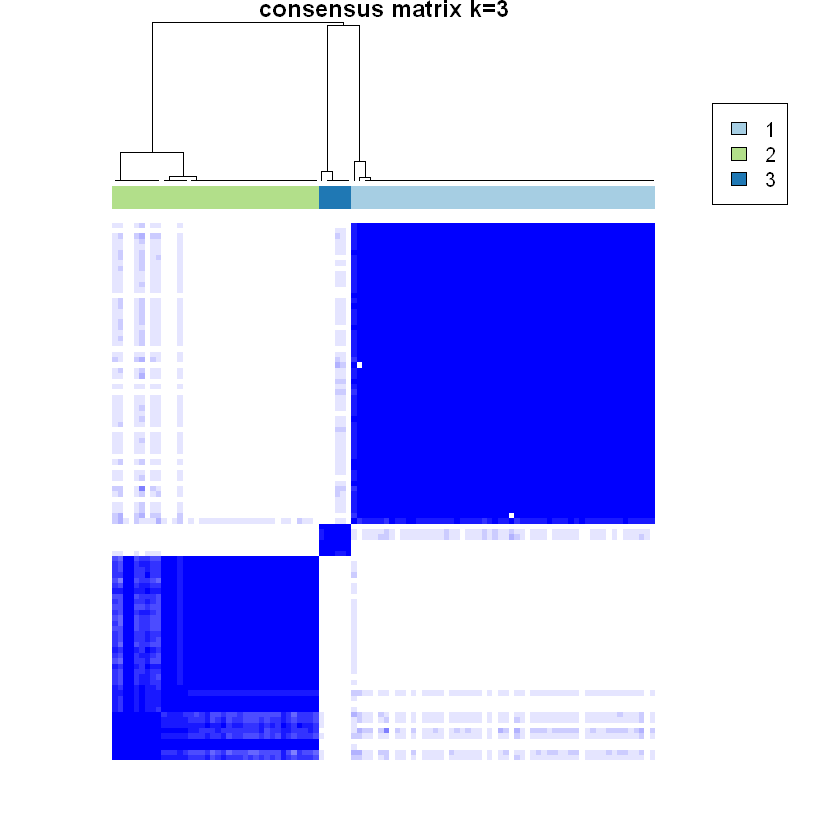

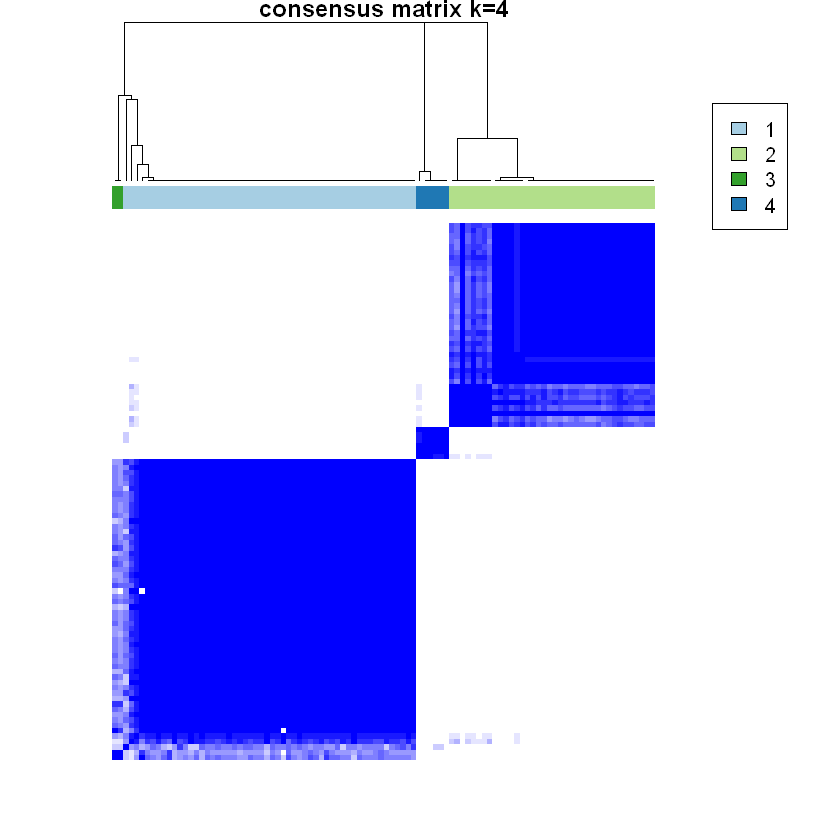

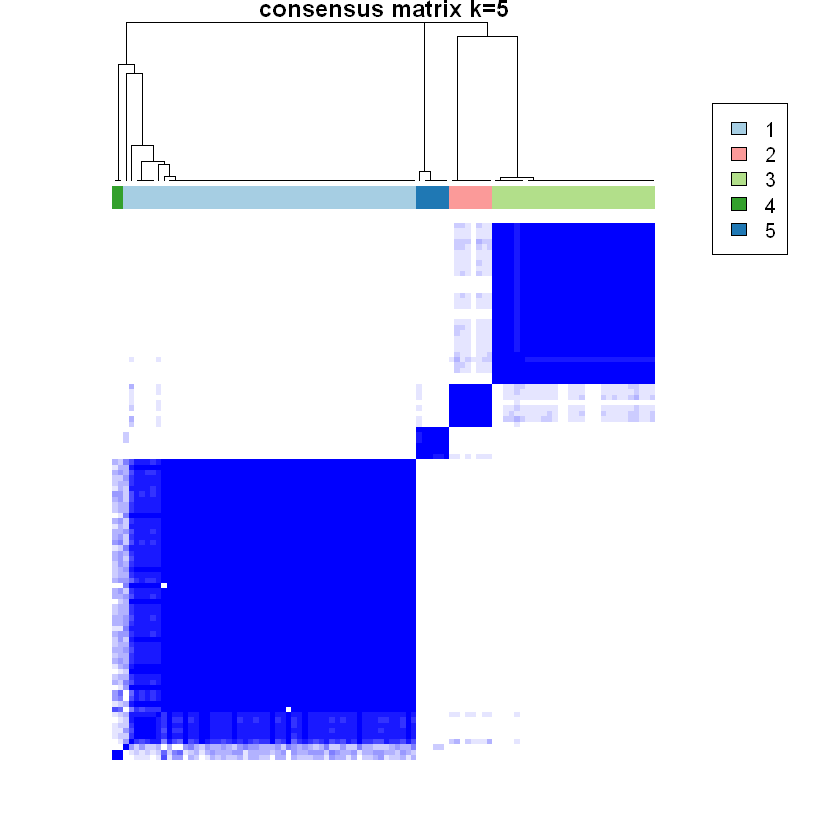

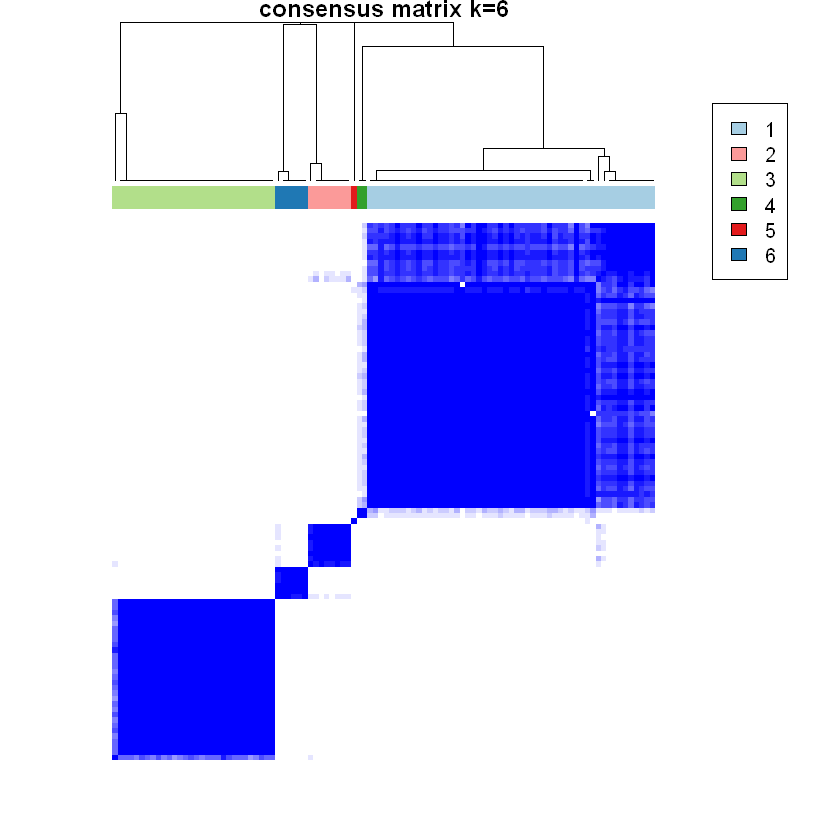

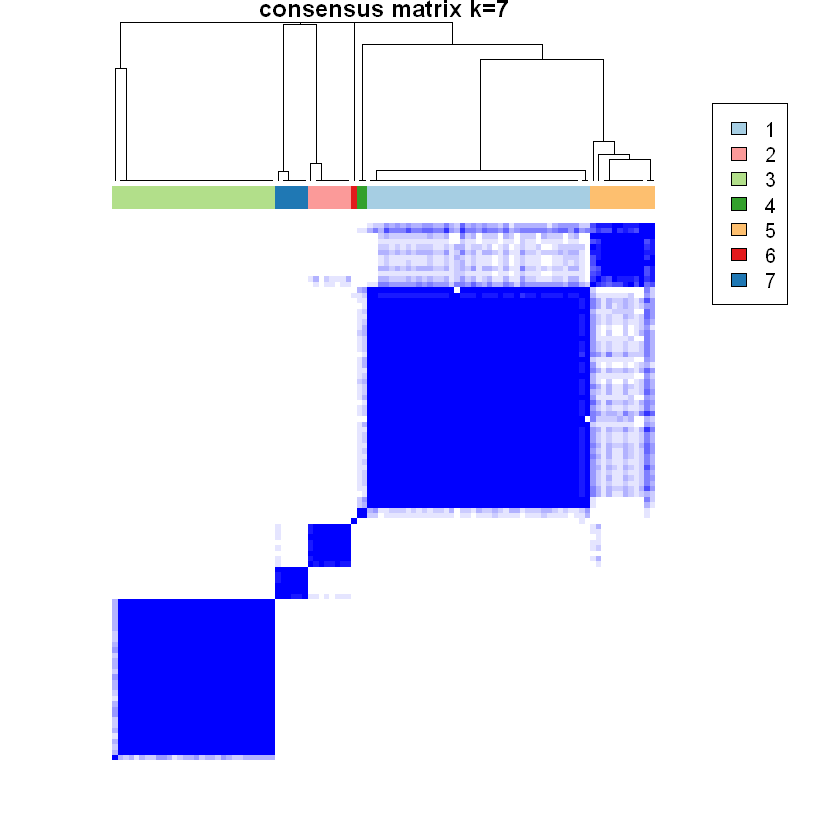

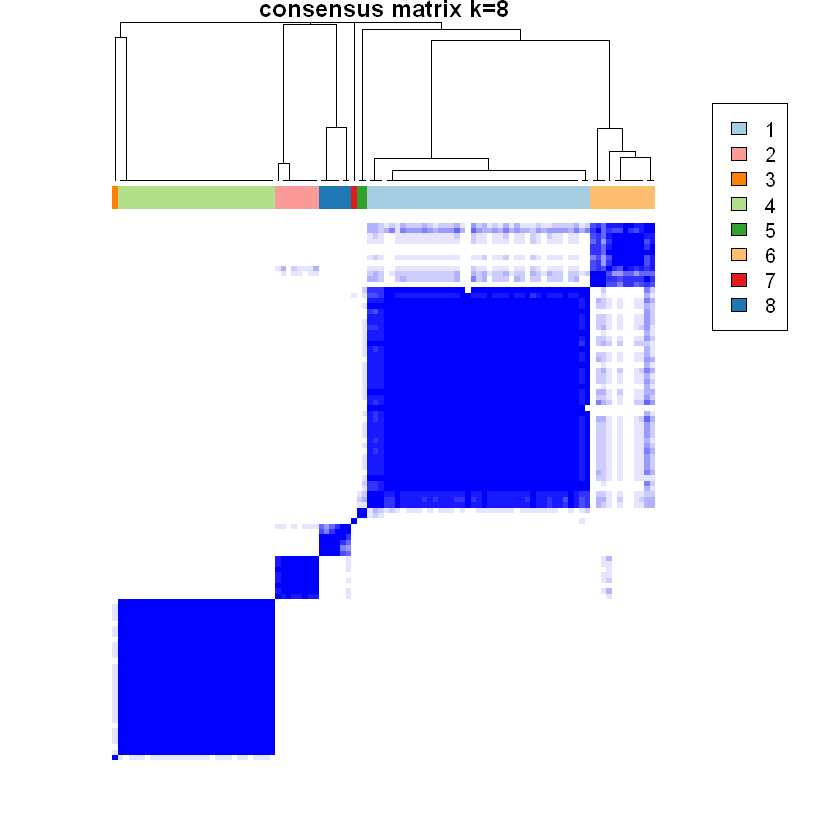

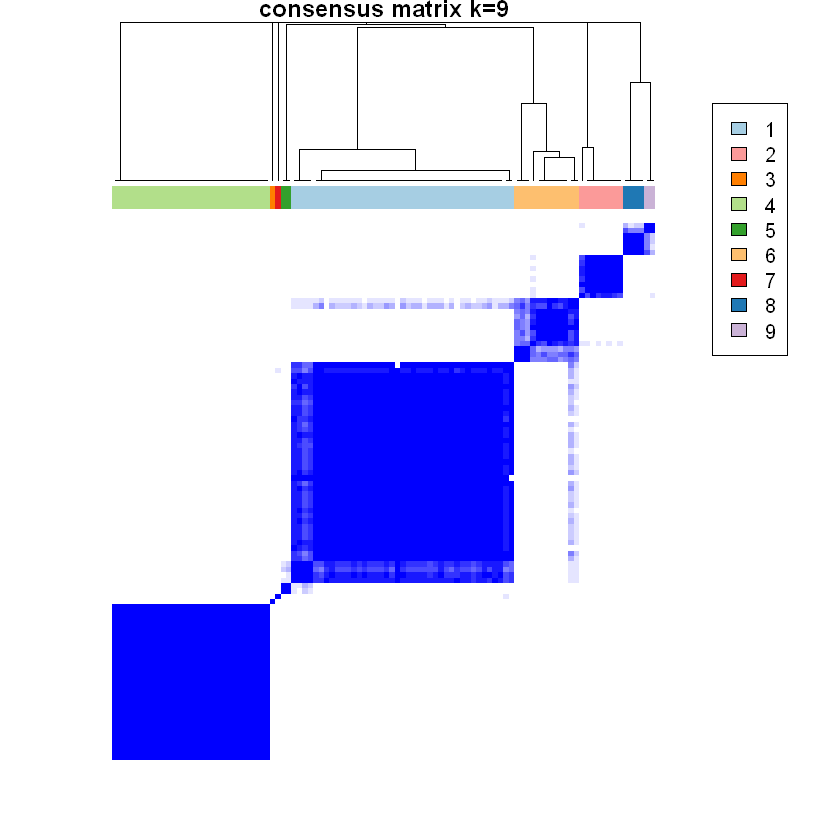

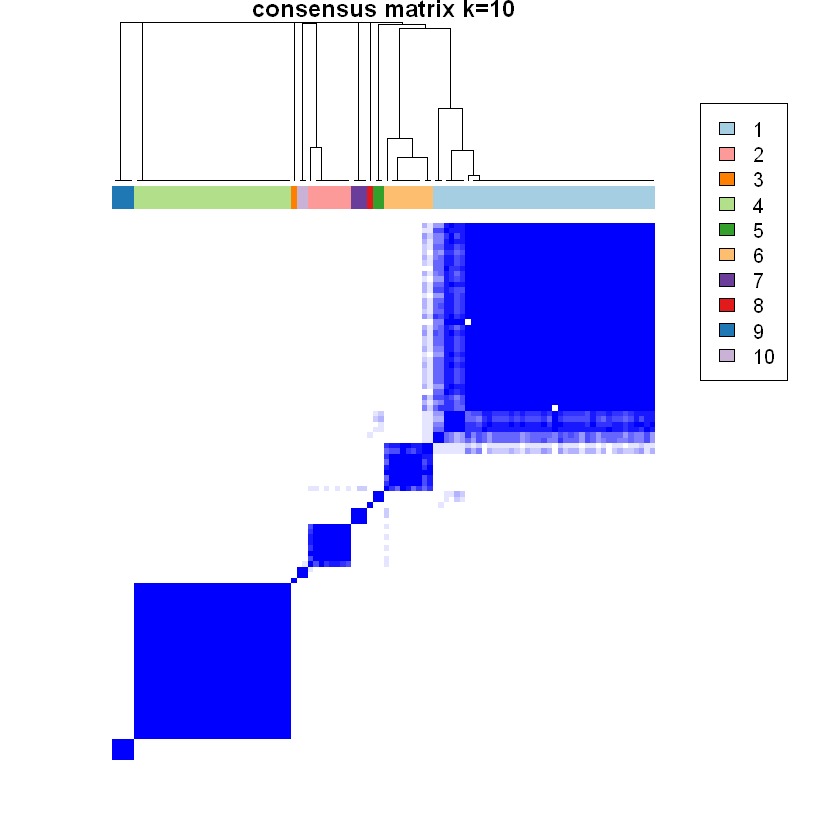

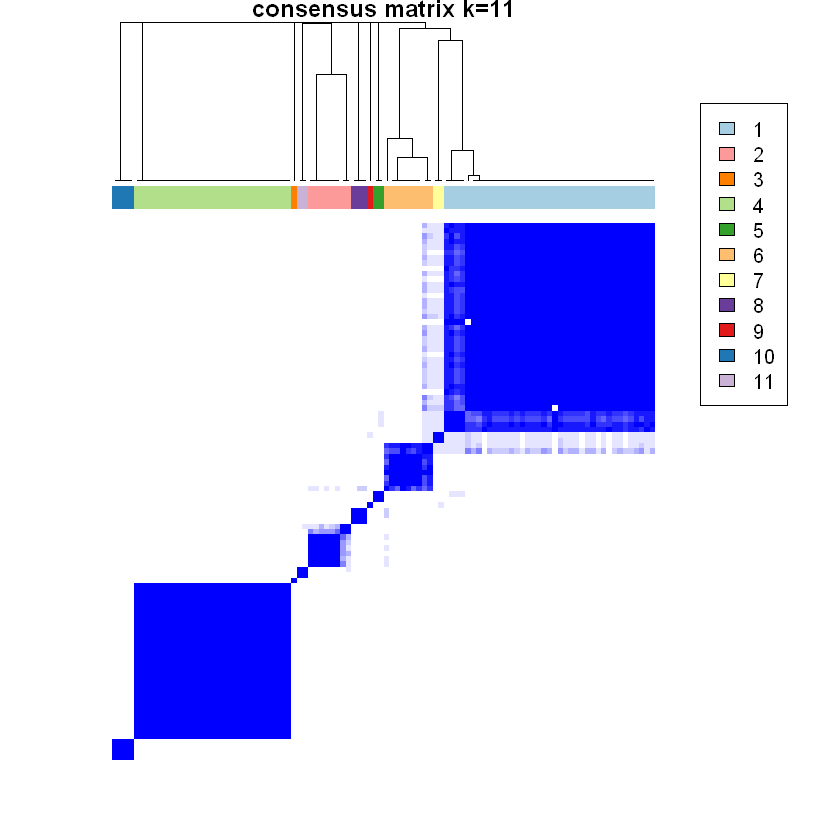

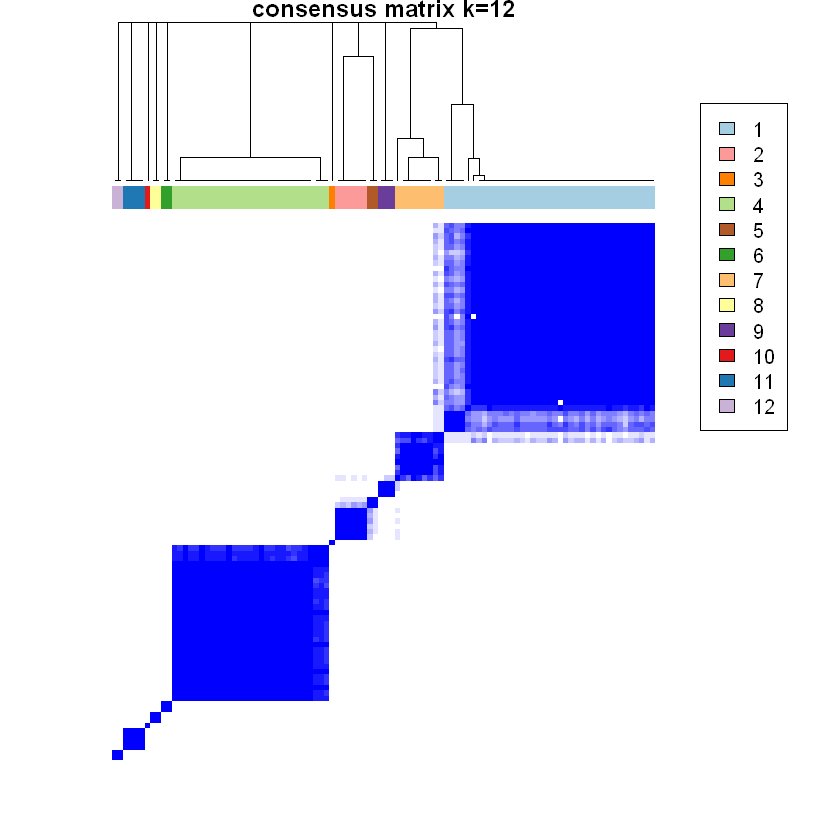

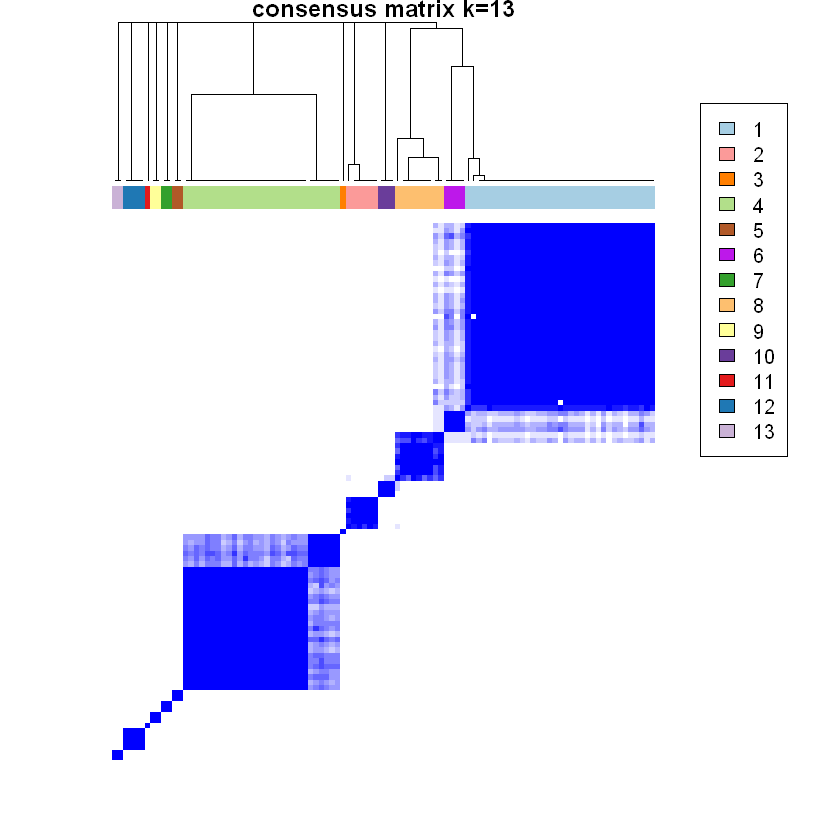

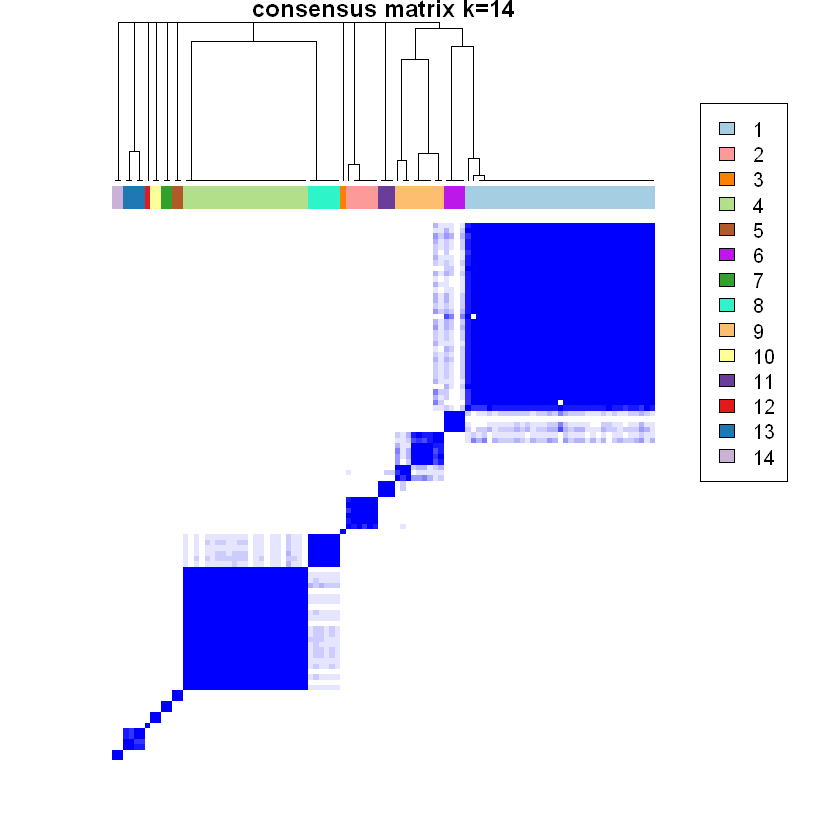

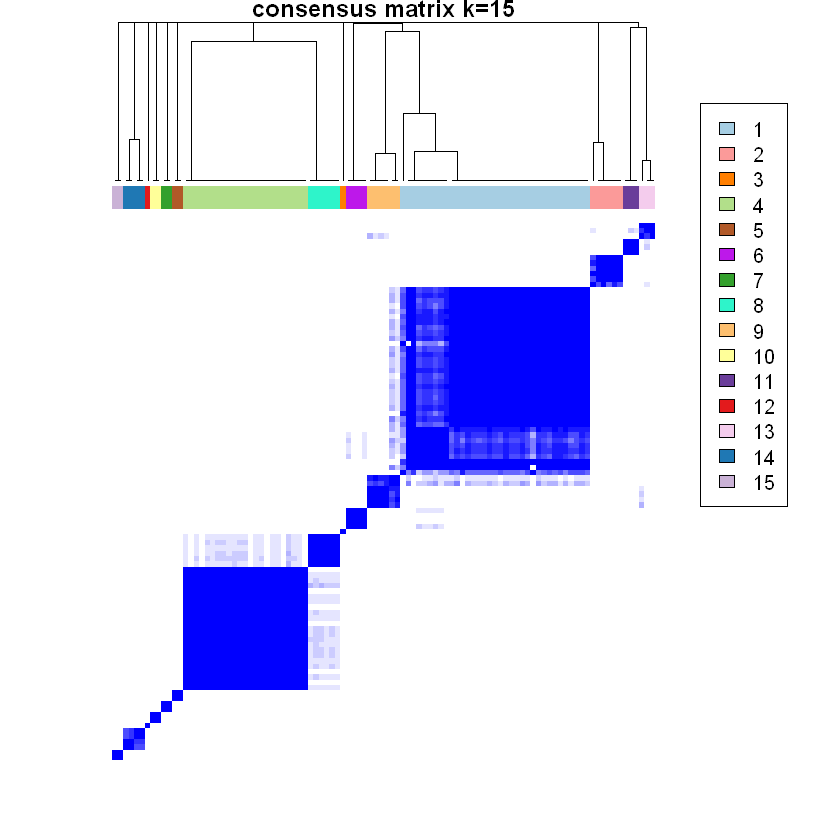

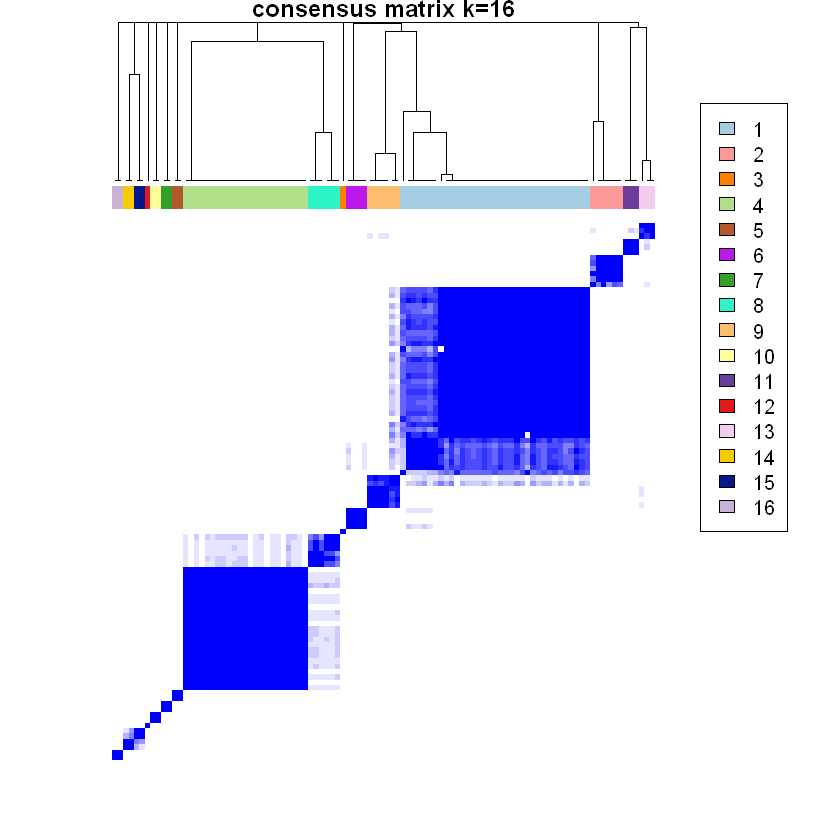

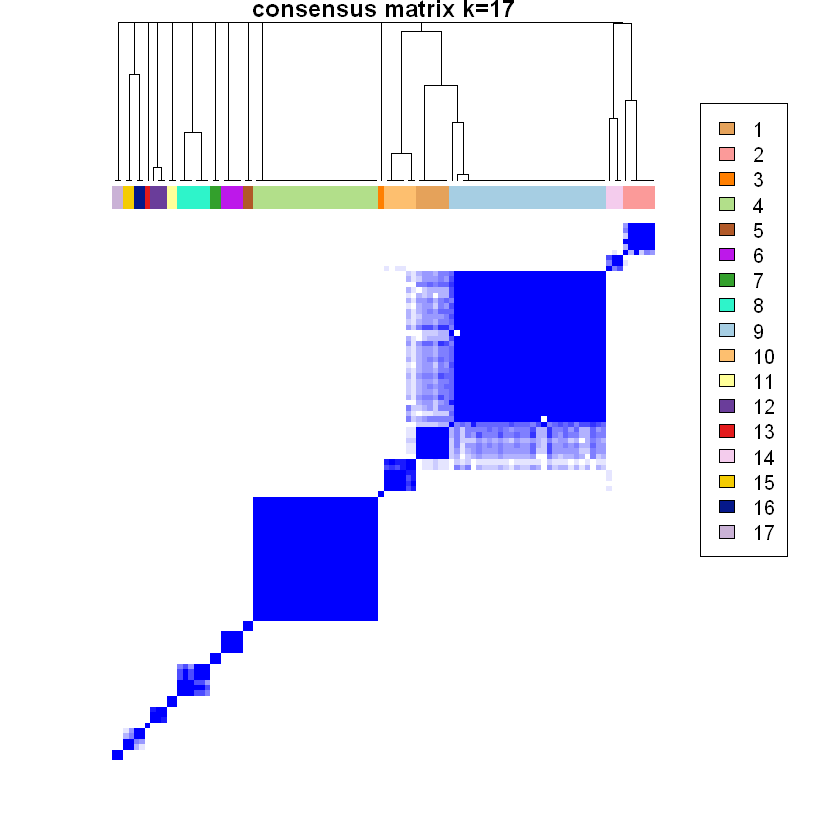

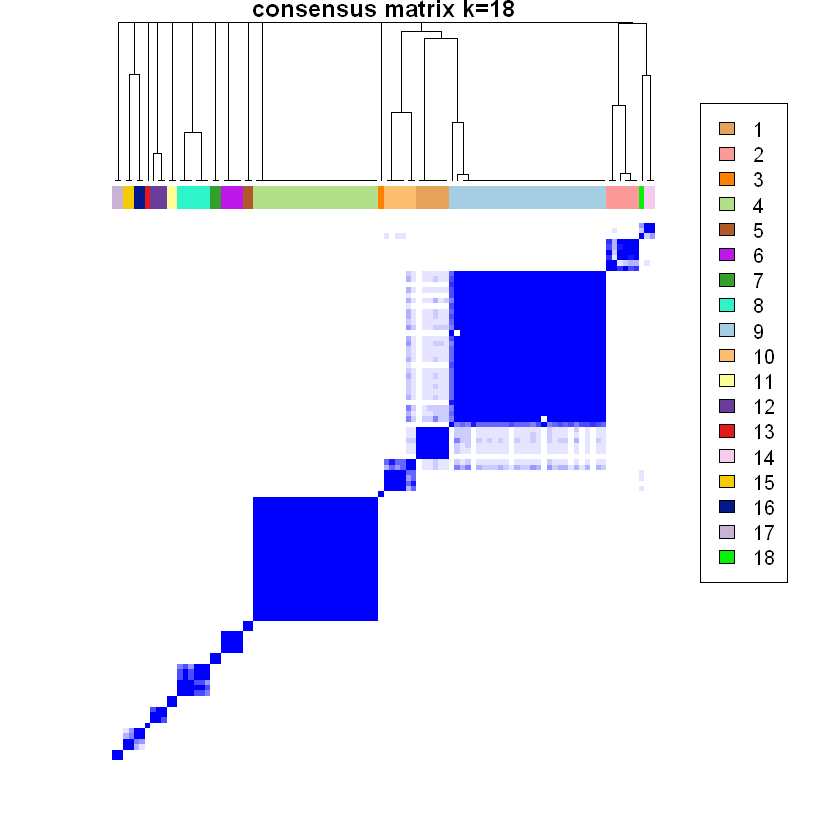

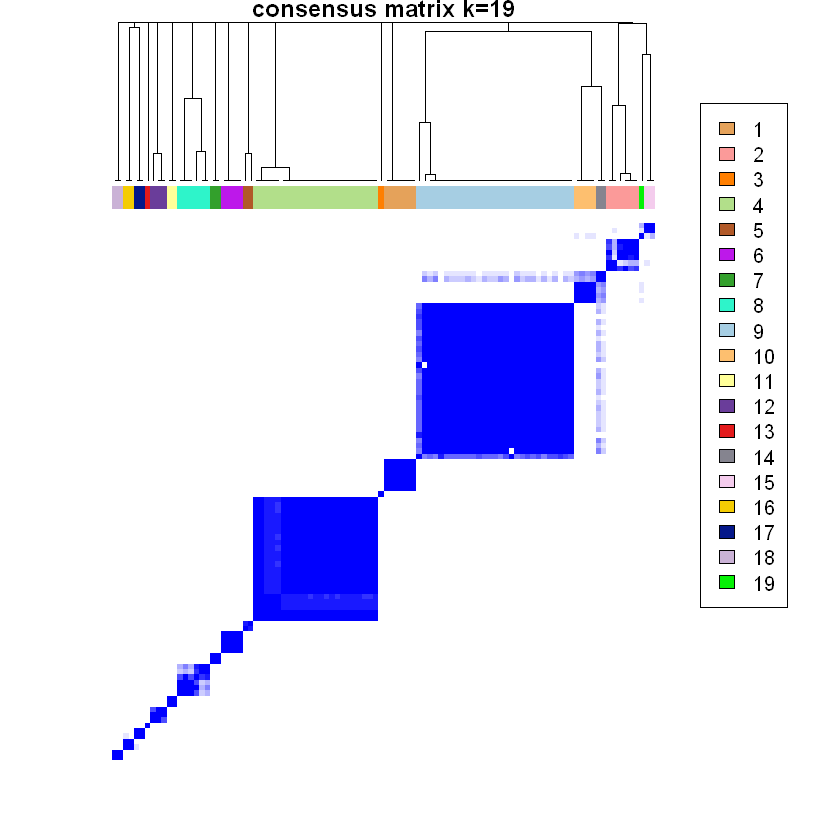

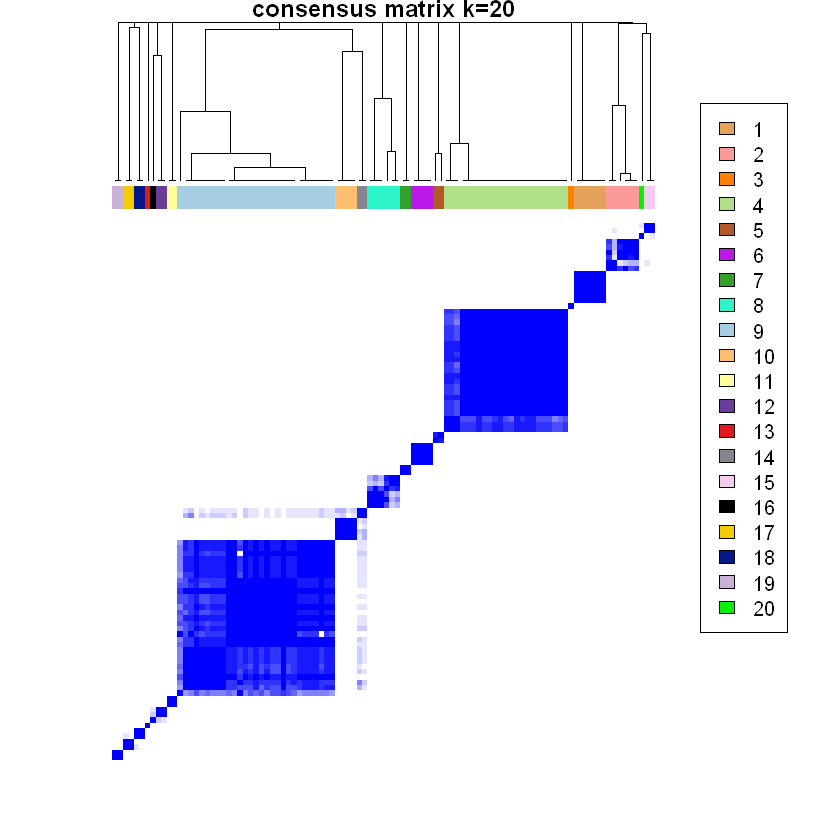

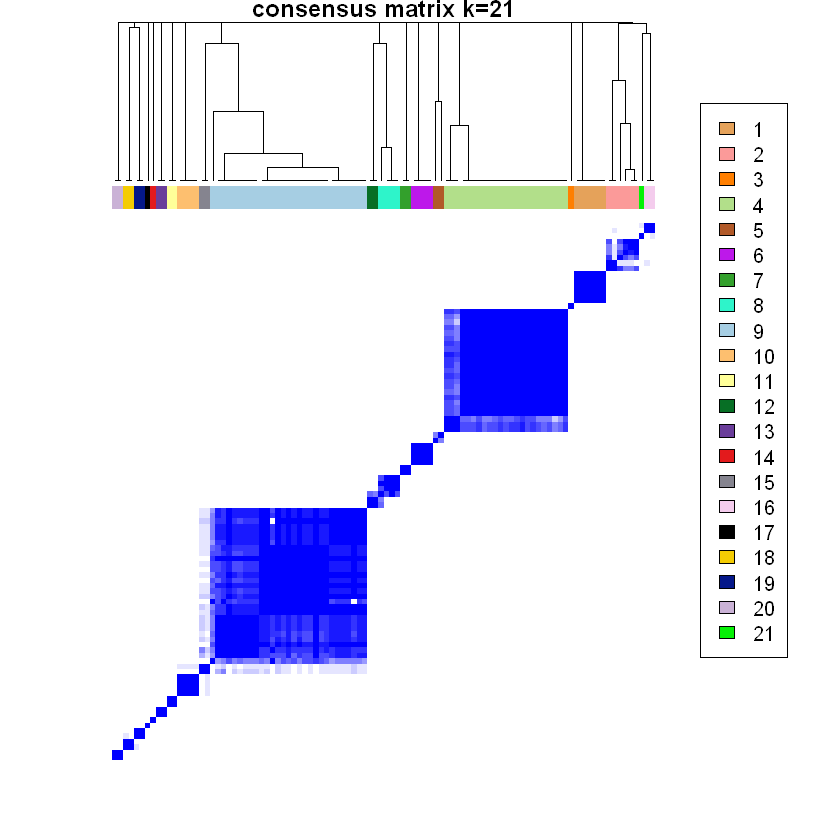

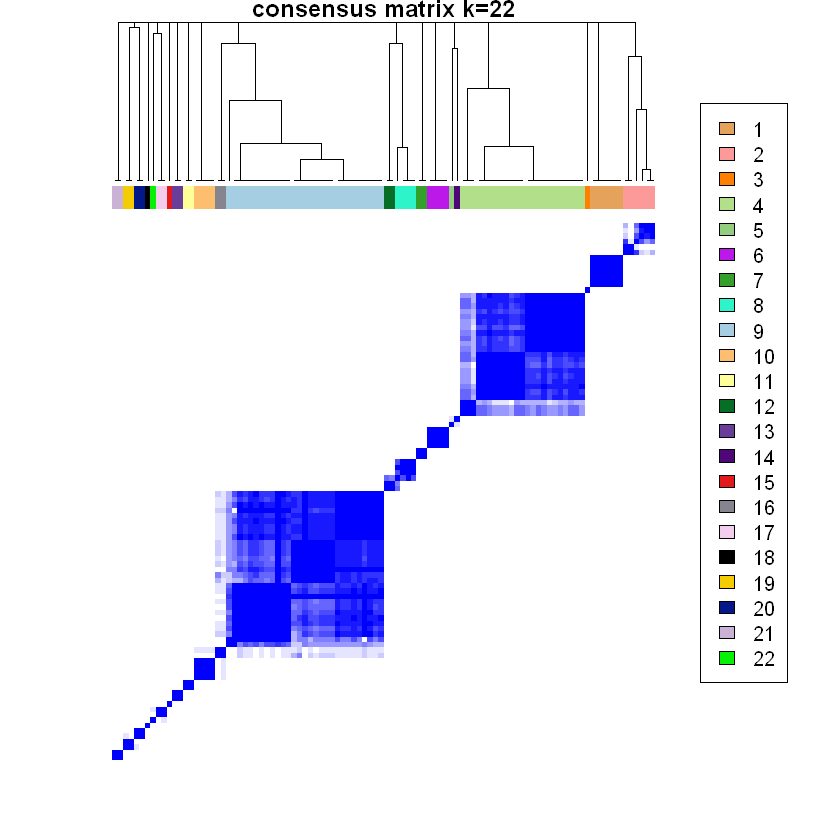

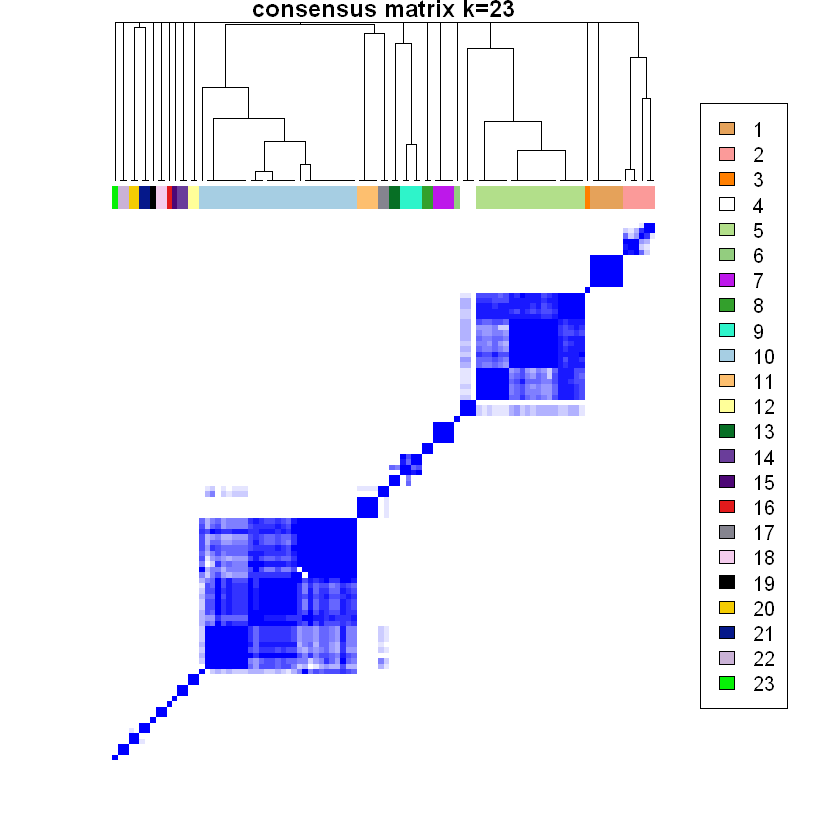

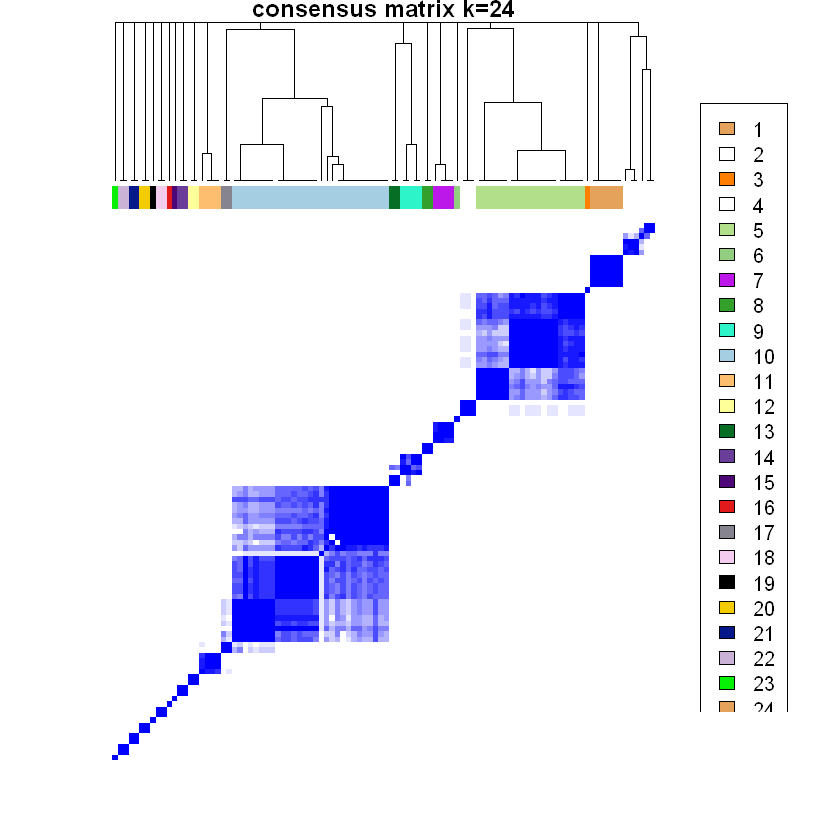

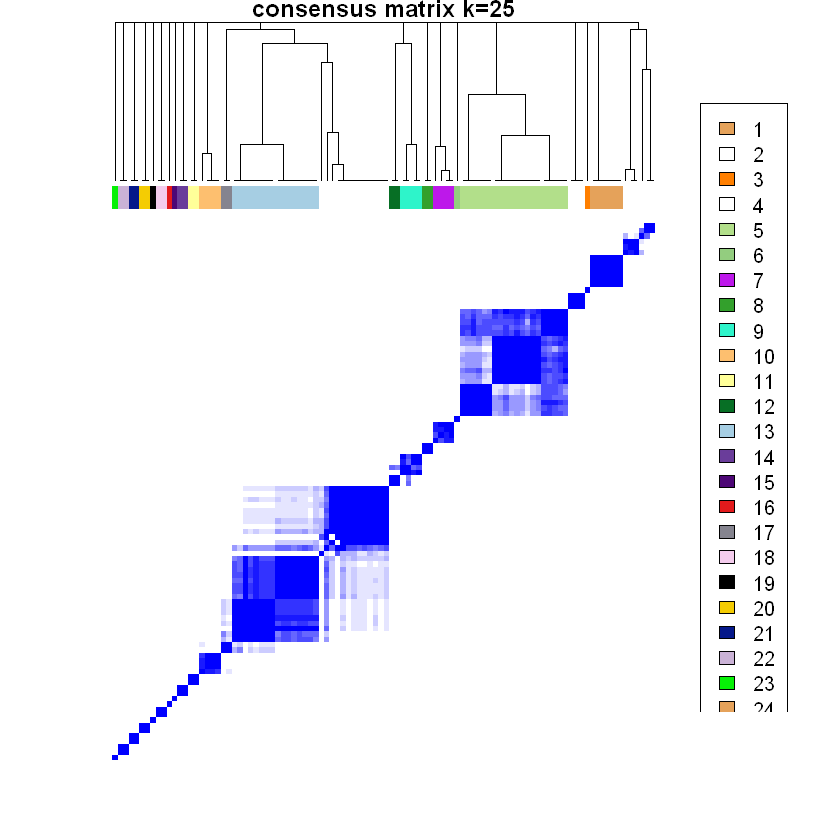

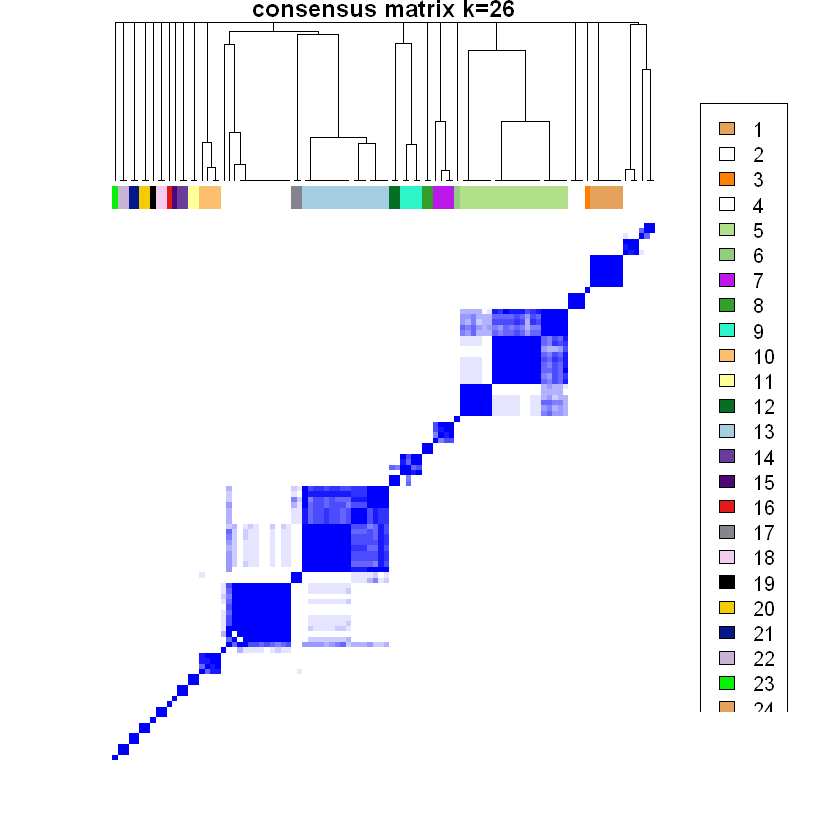

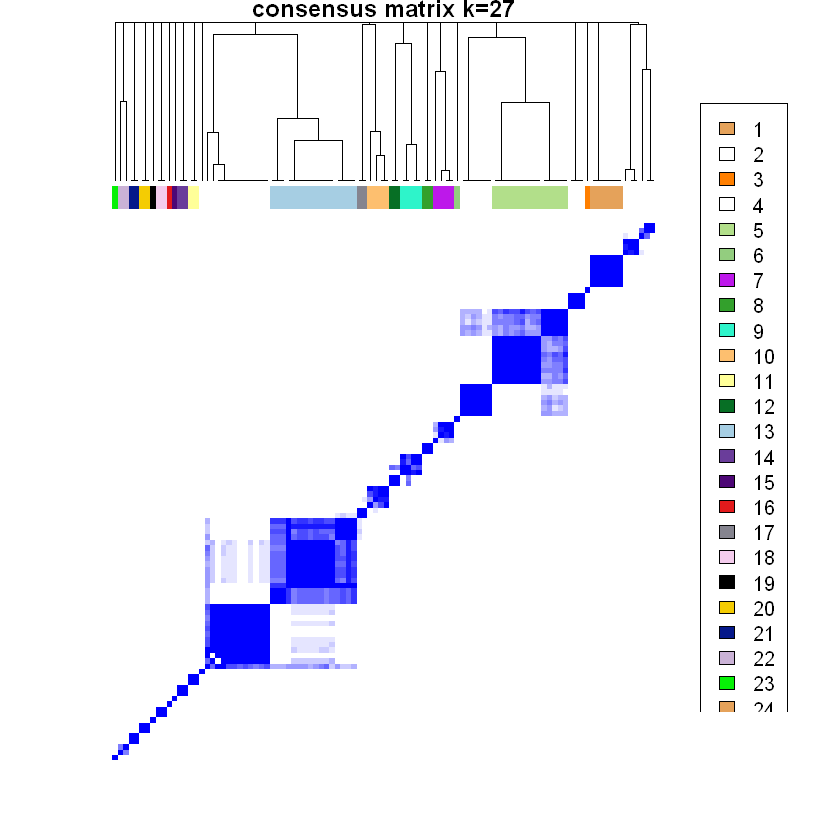

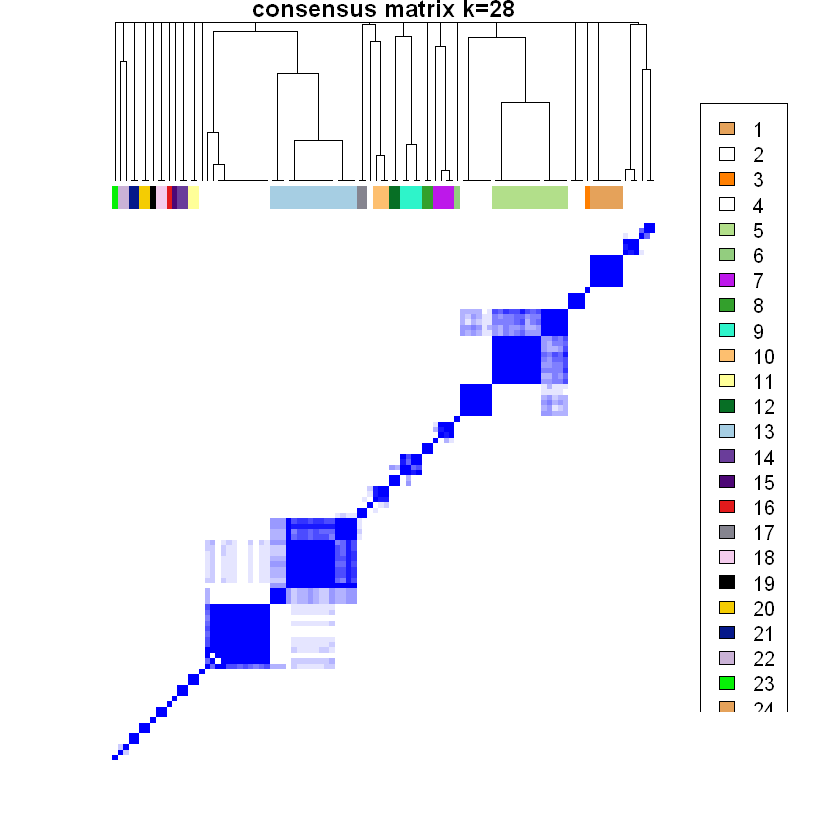

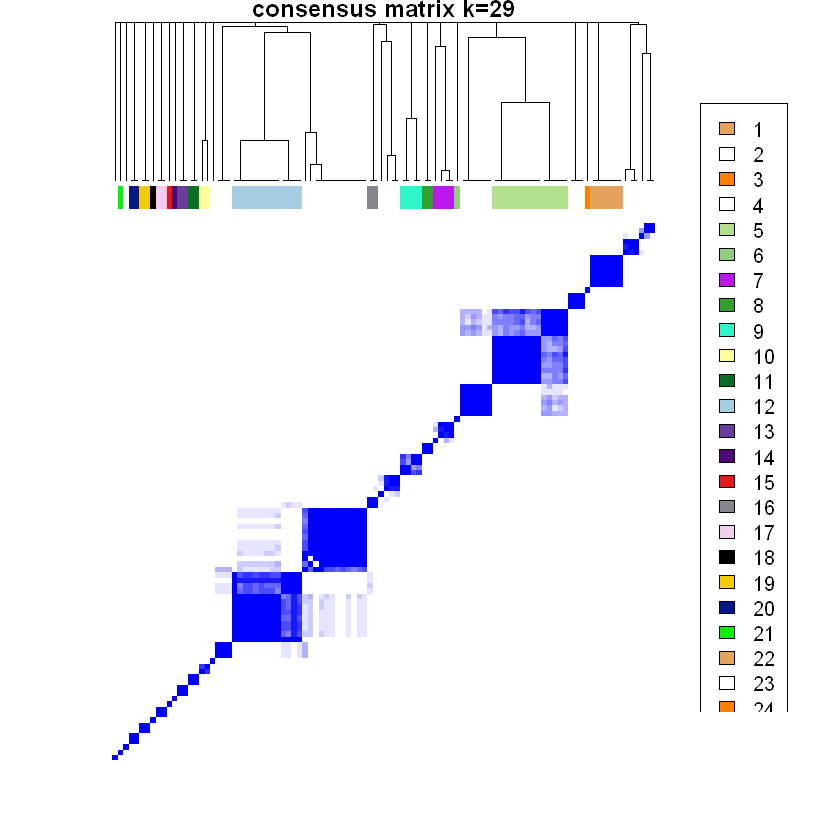

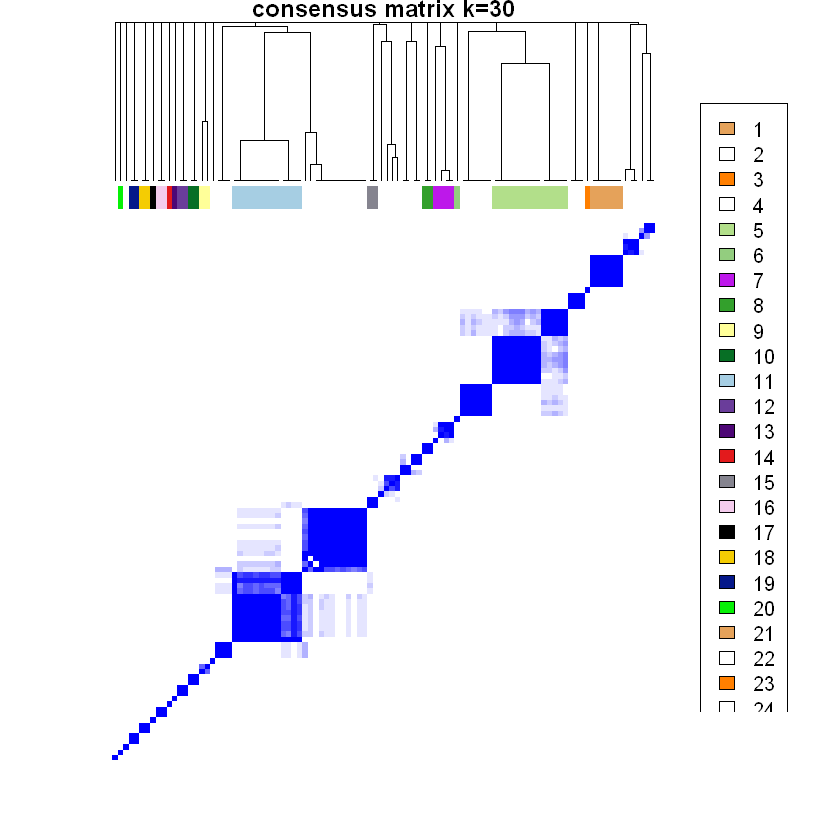

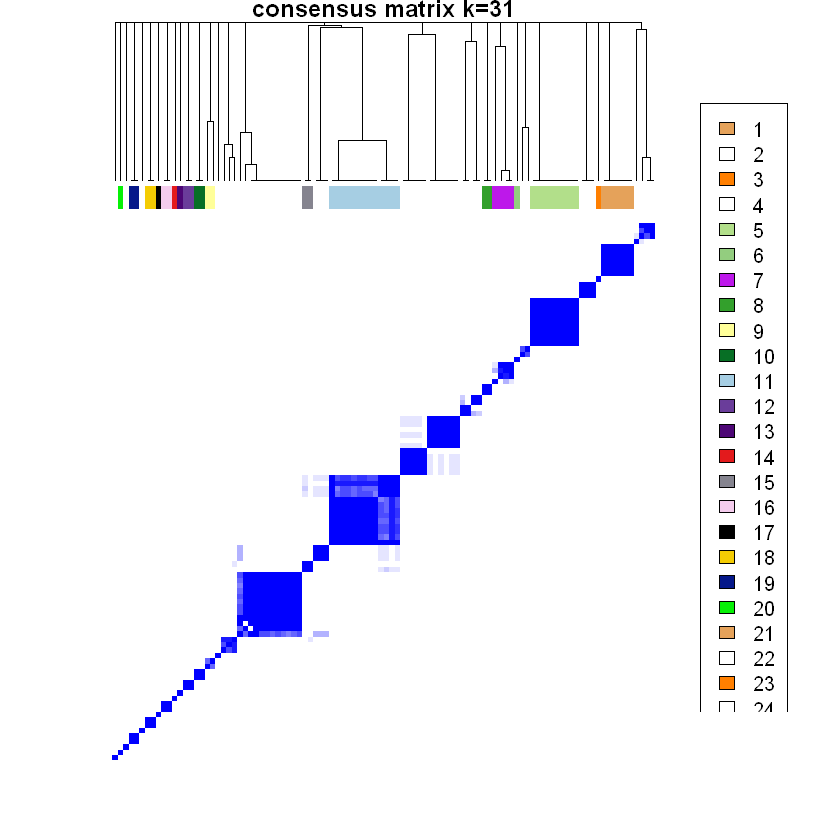

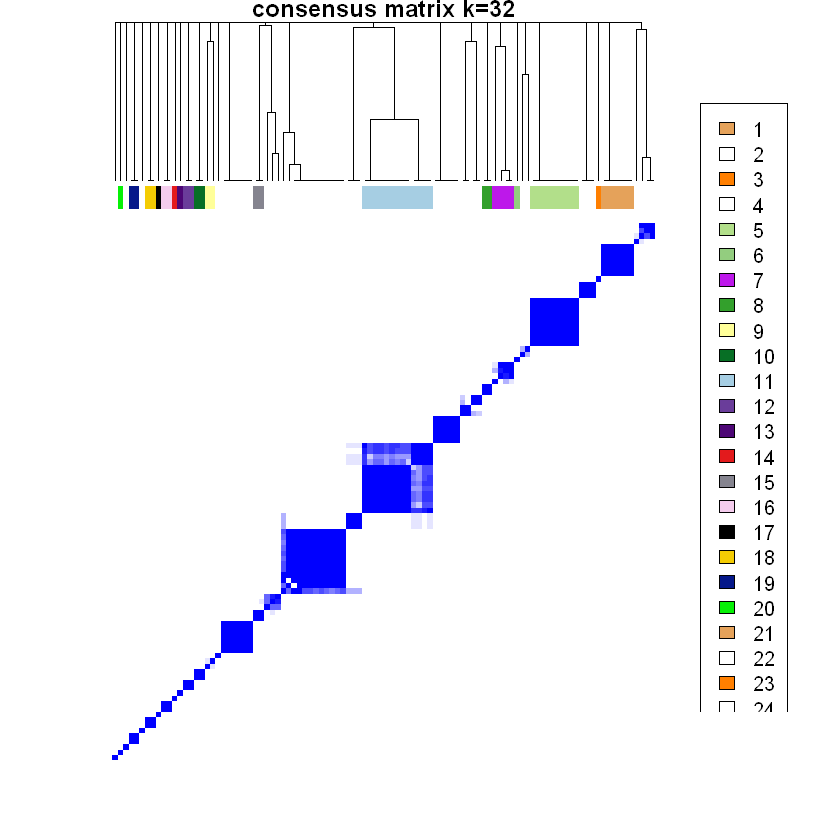

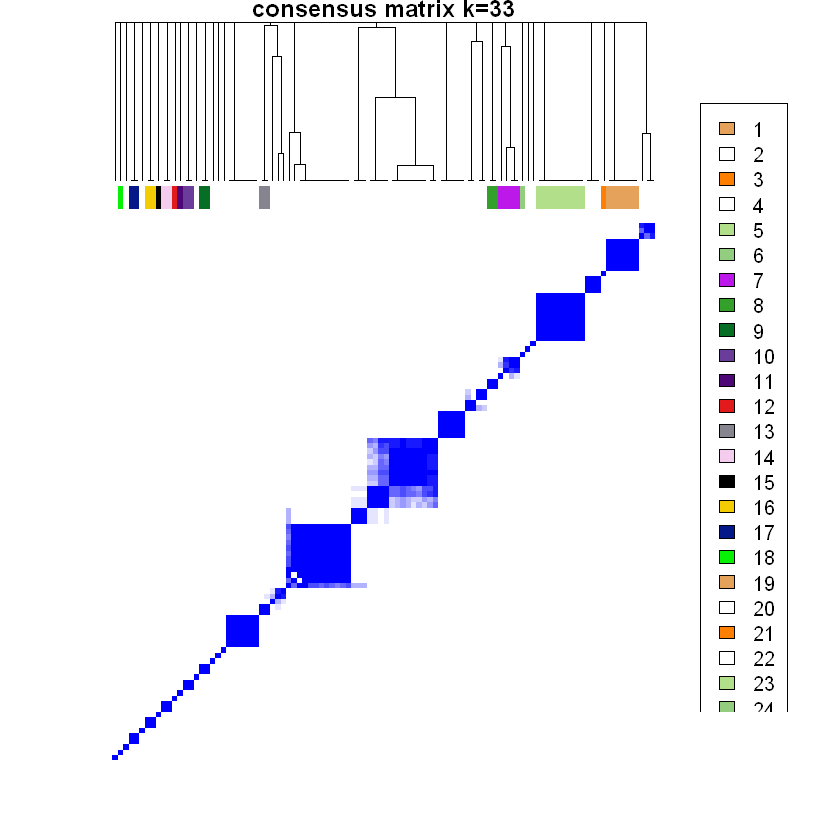

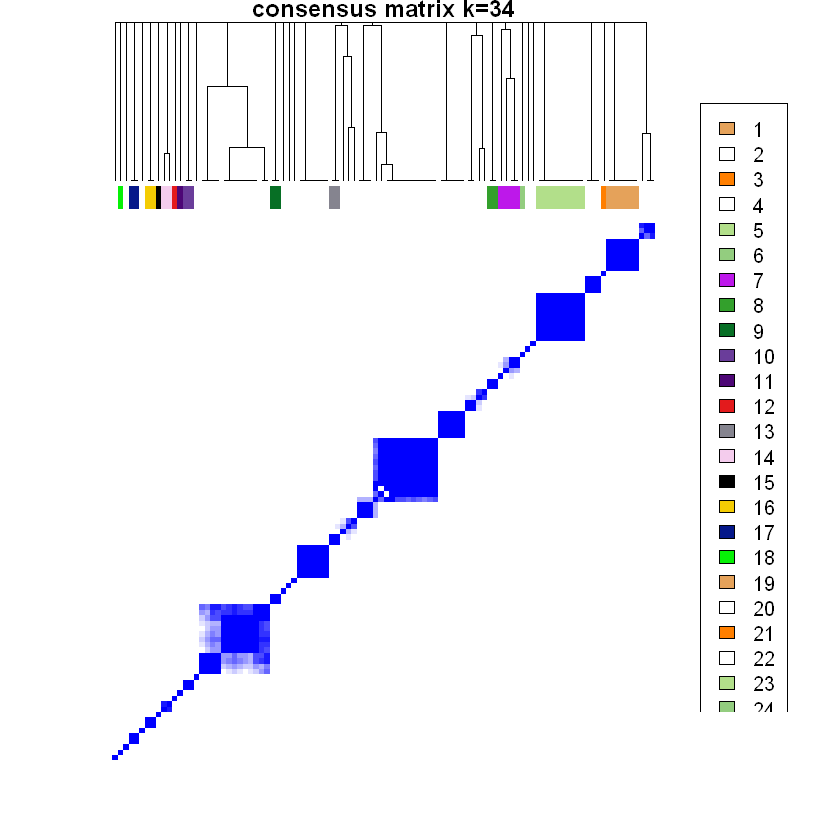

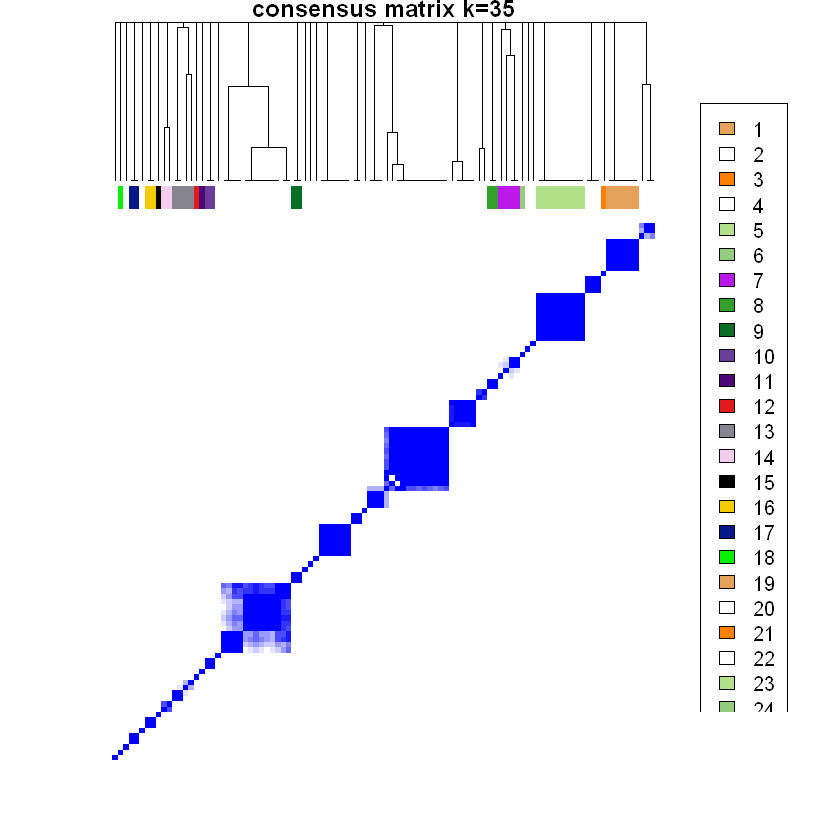

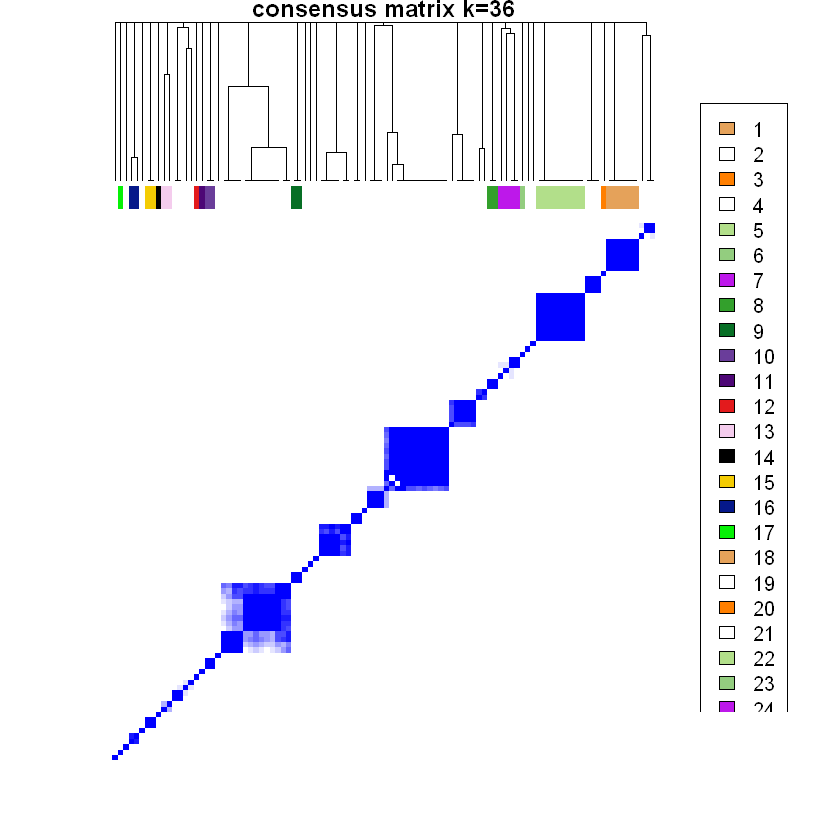

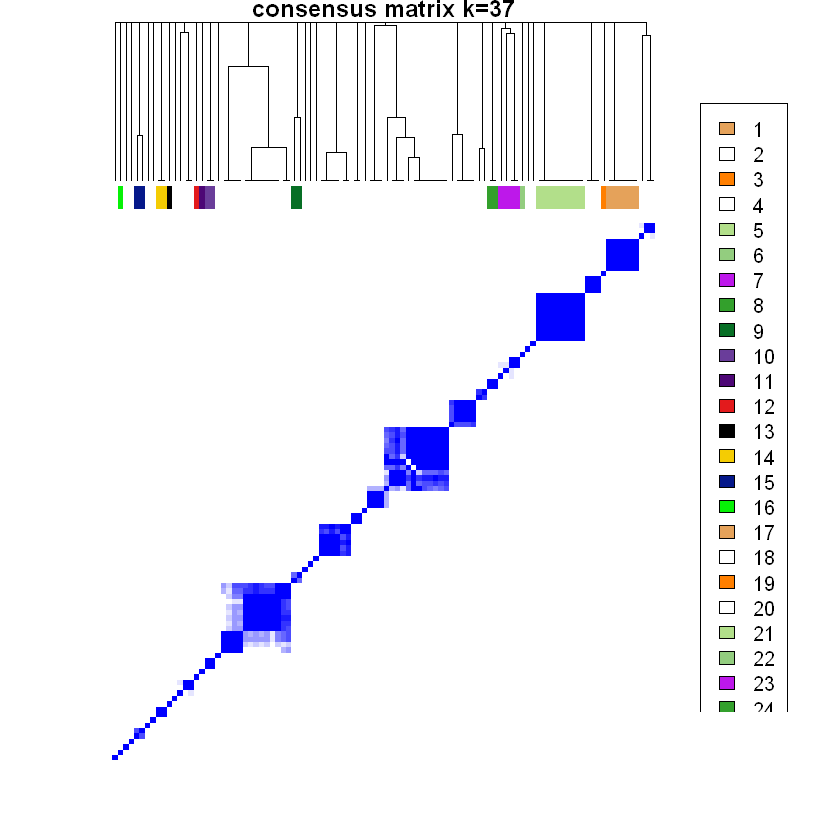

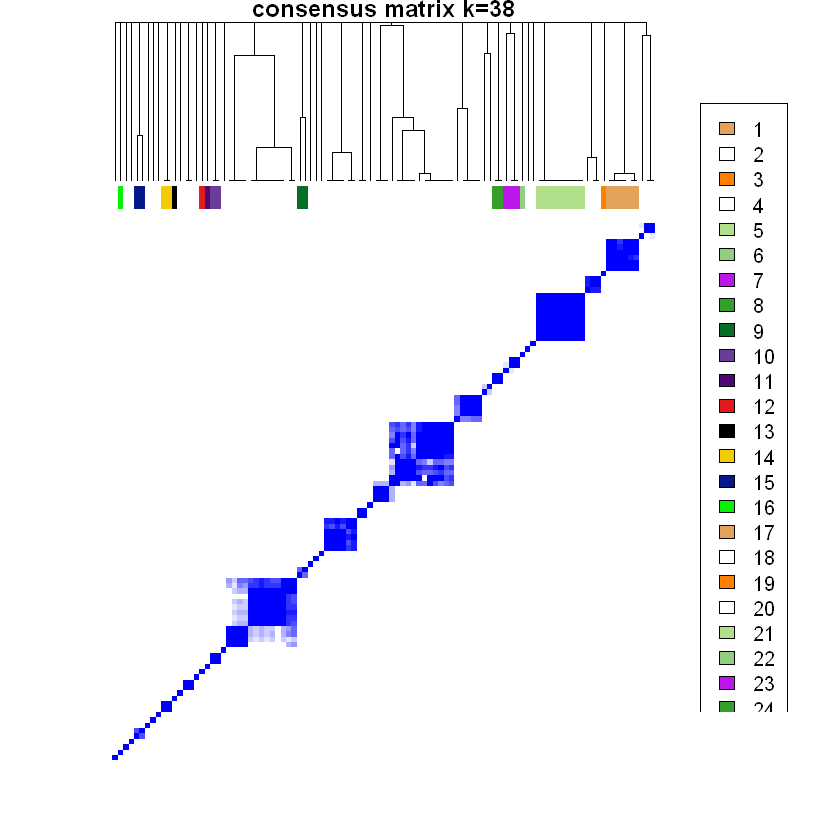

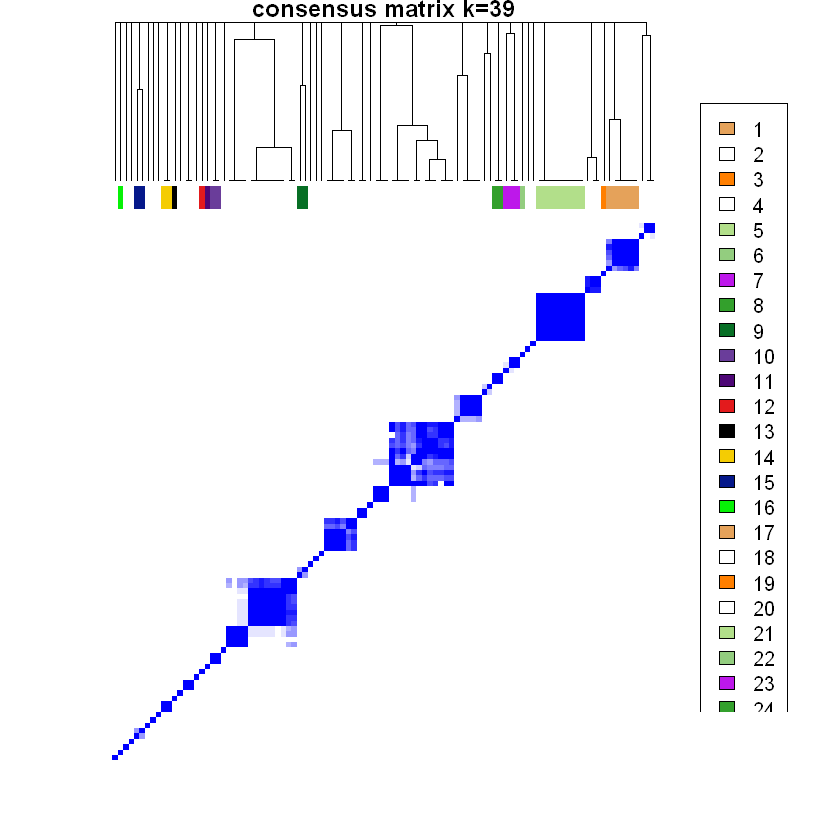

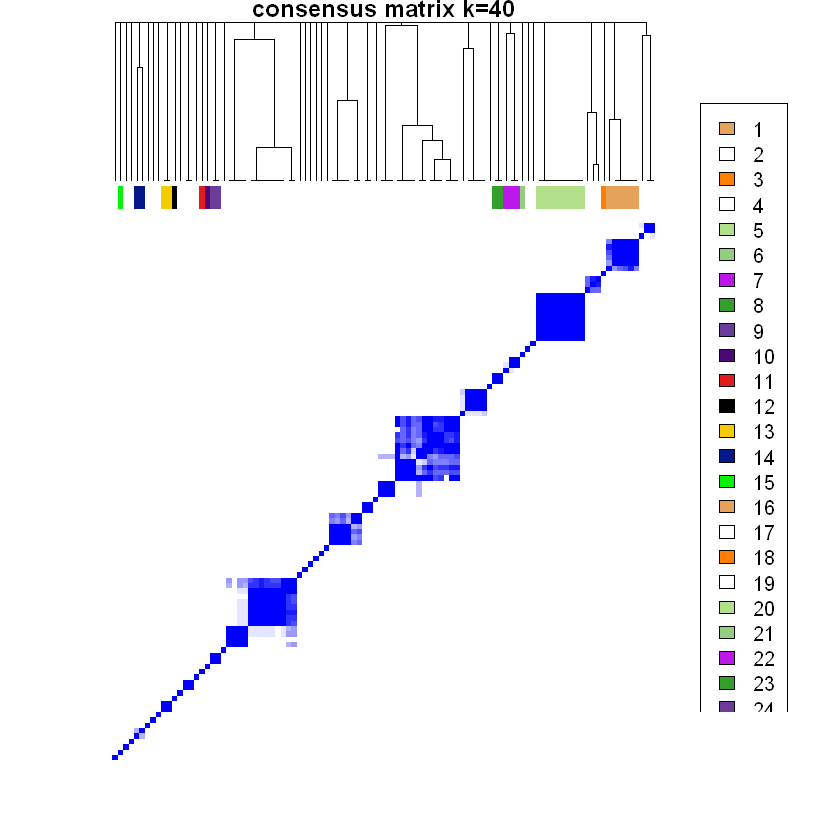

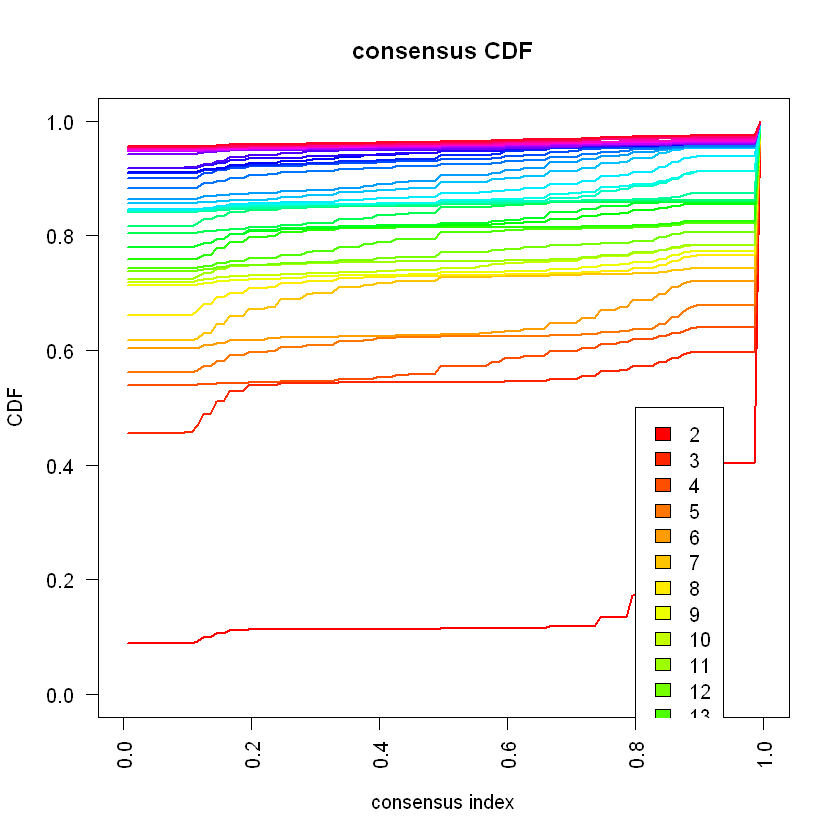

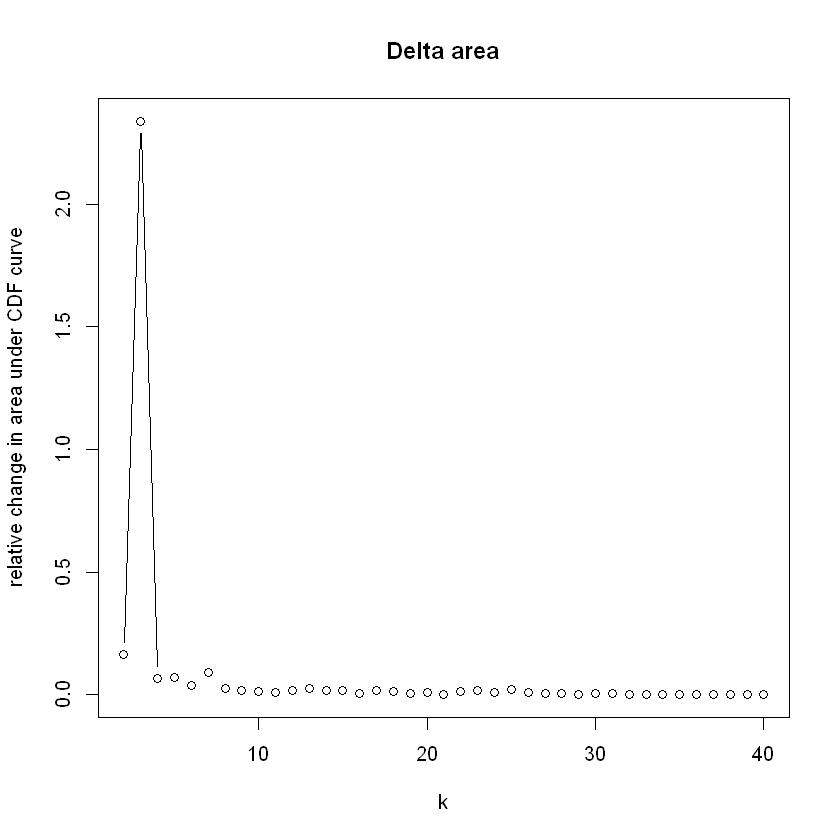

data set Samusik_all : run complete


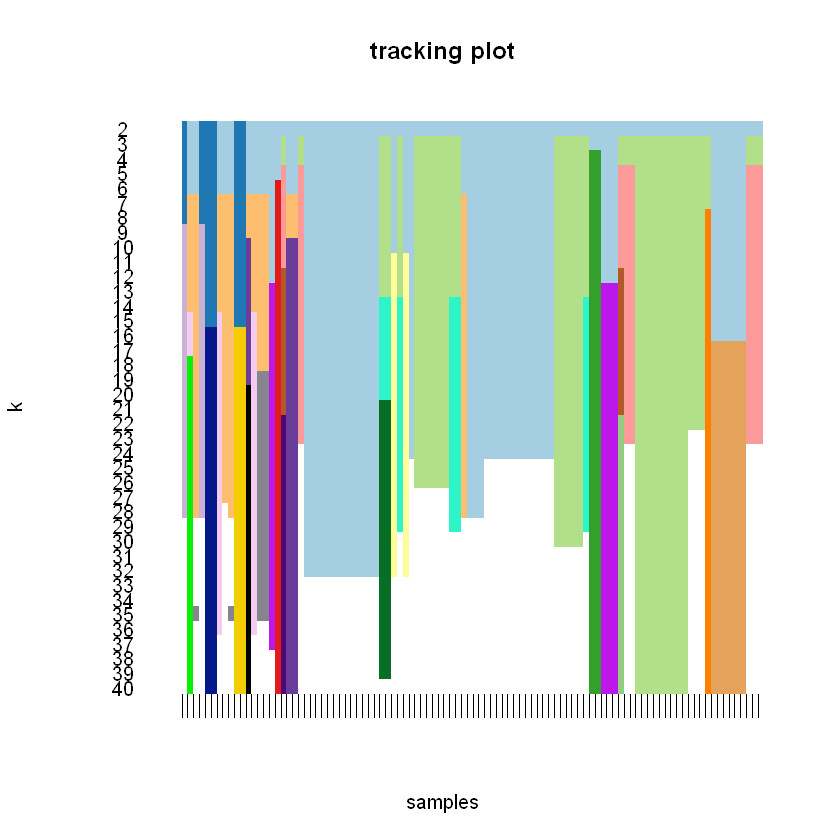

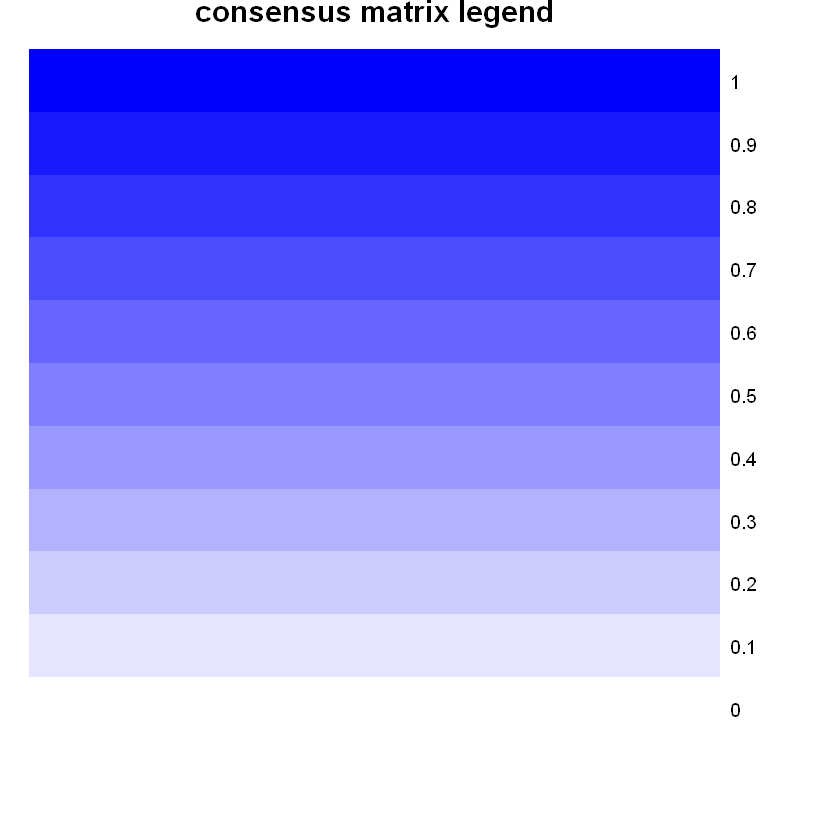

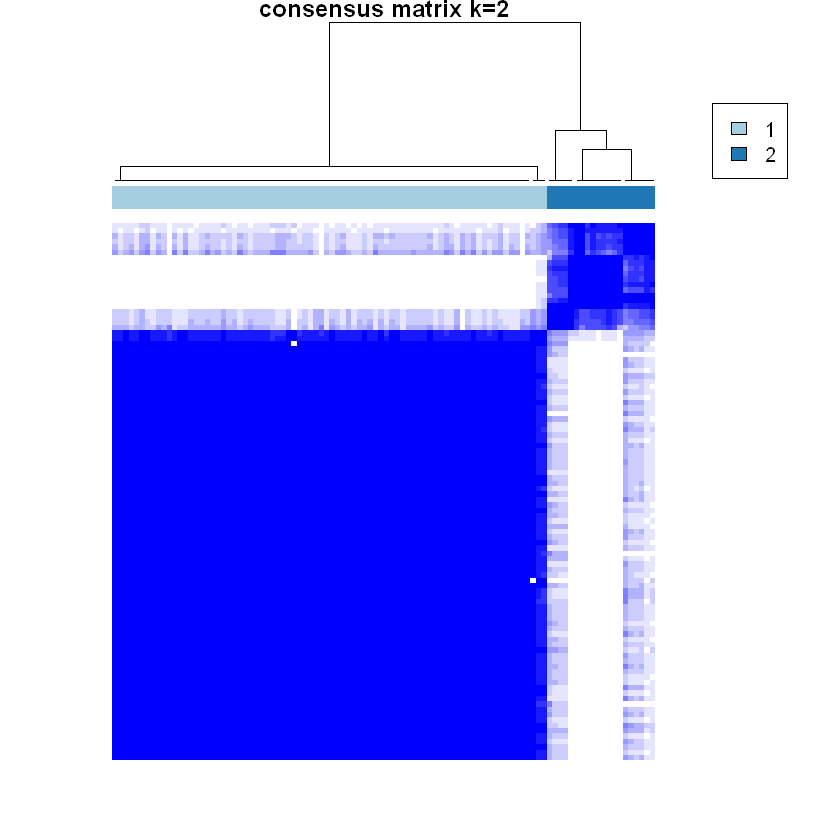

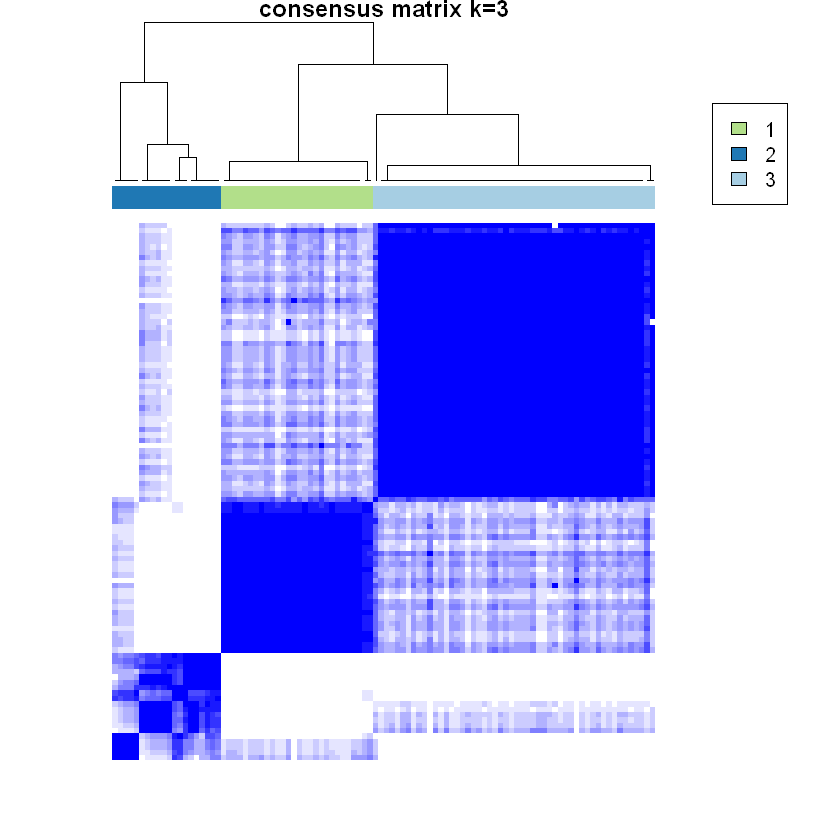

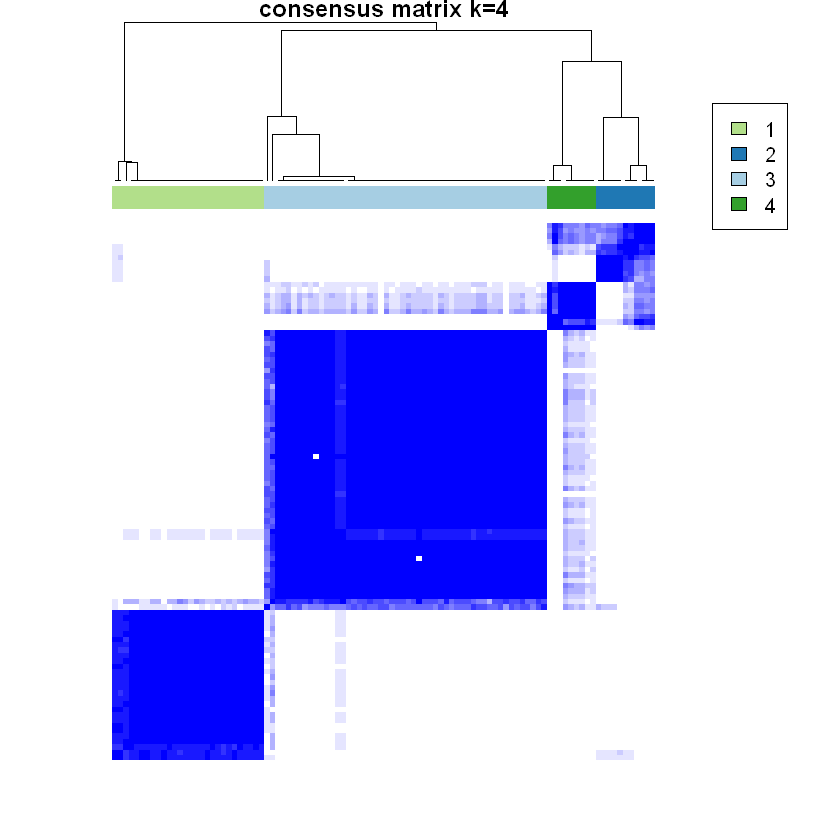

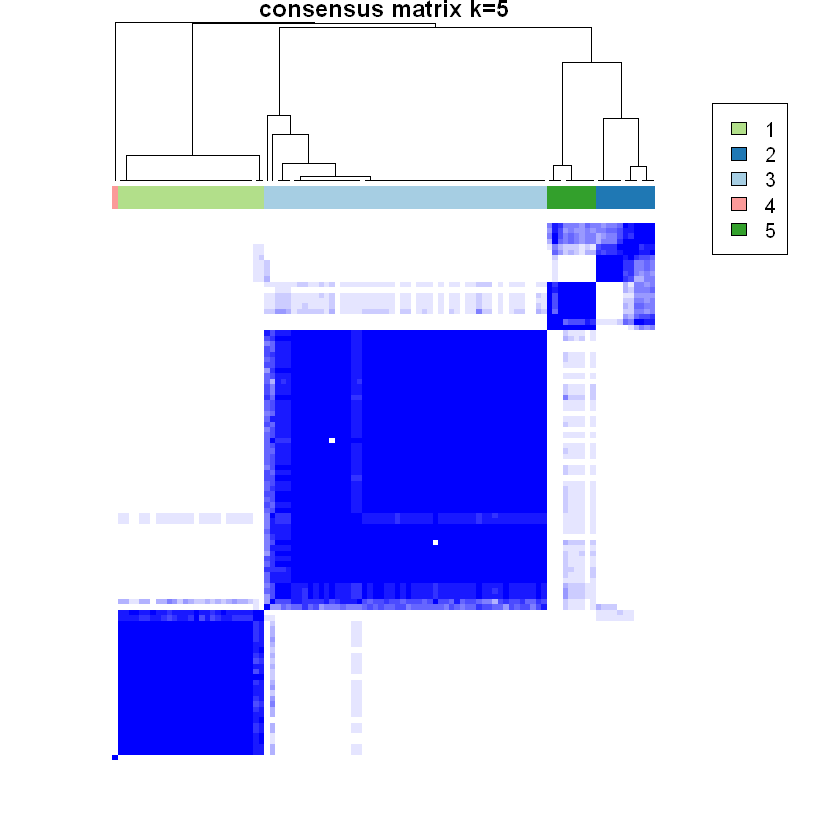

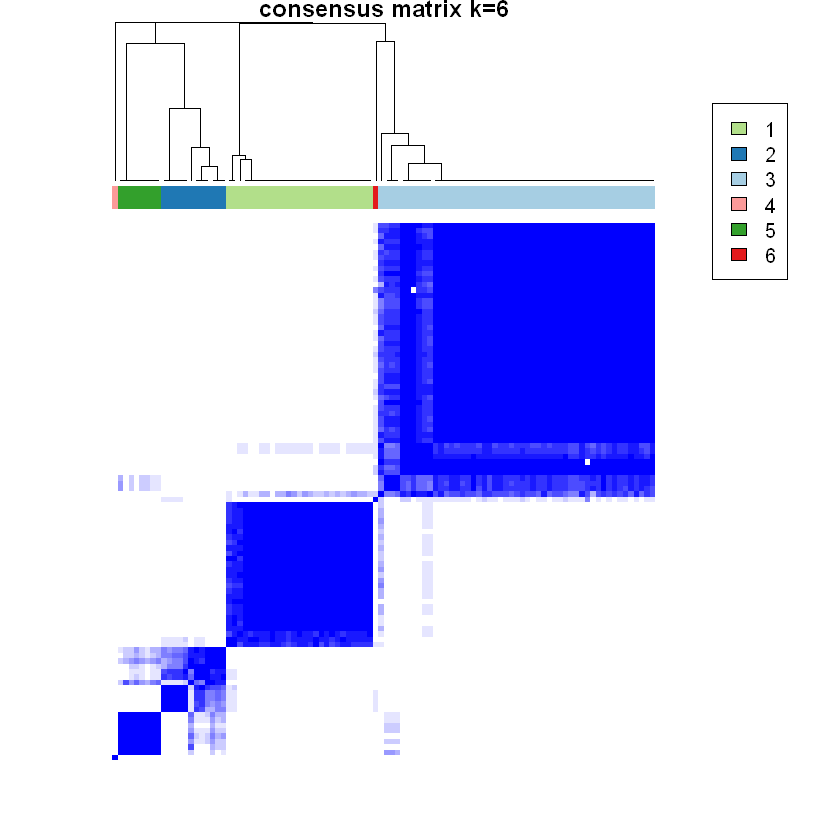

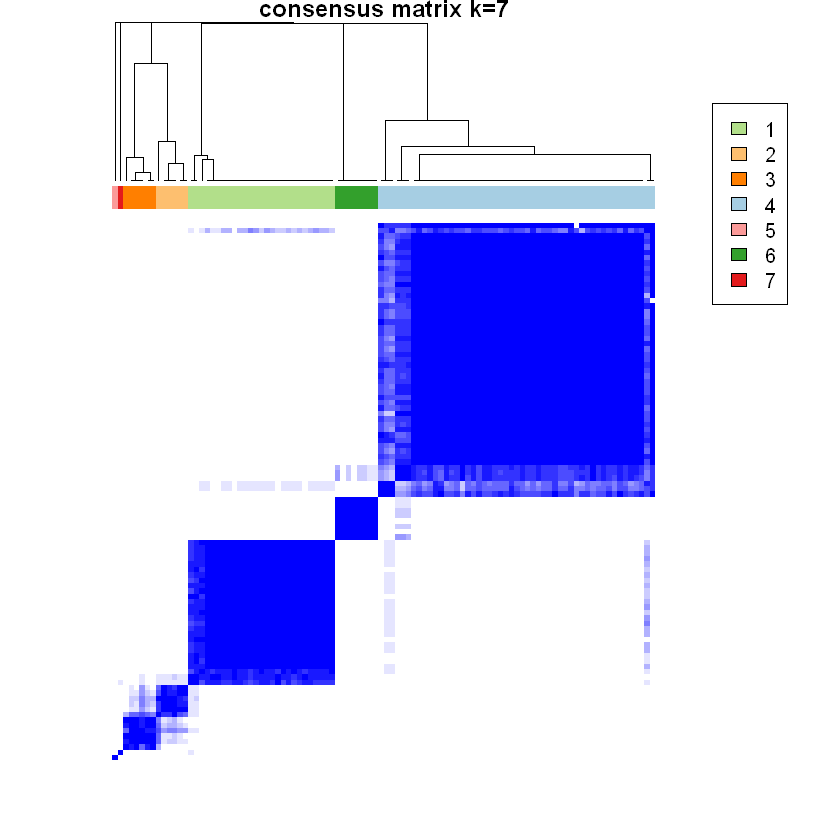

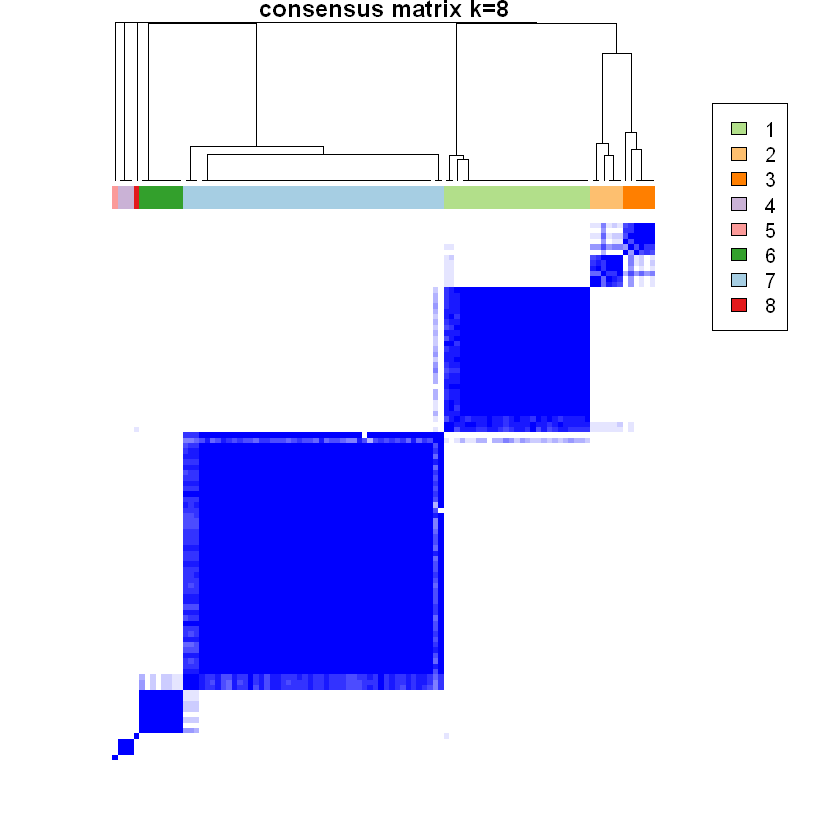

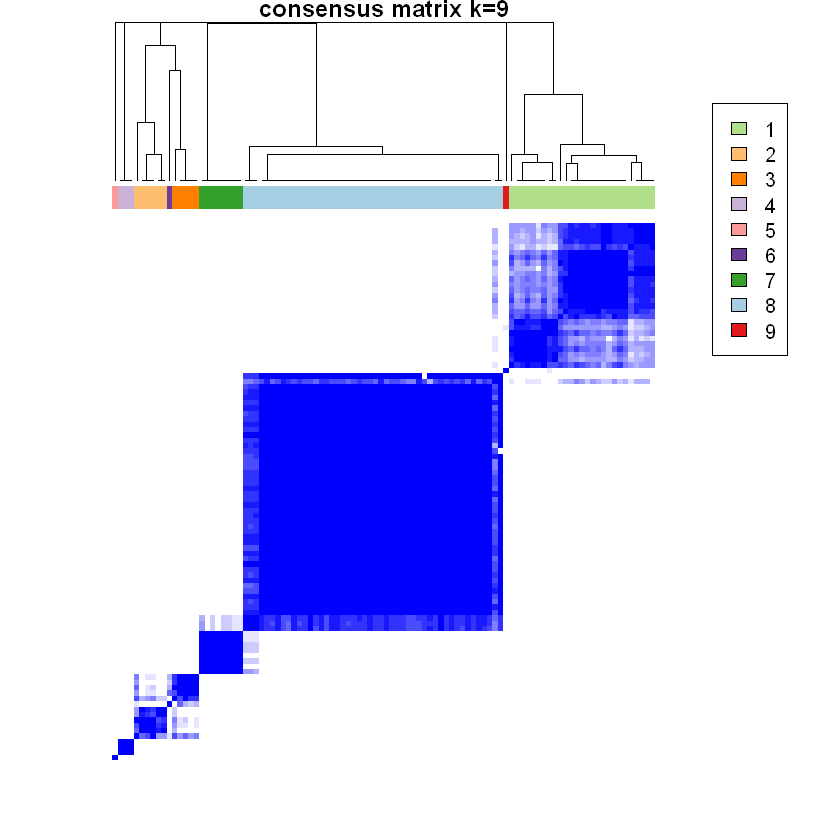

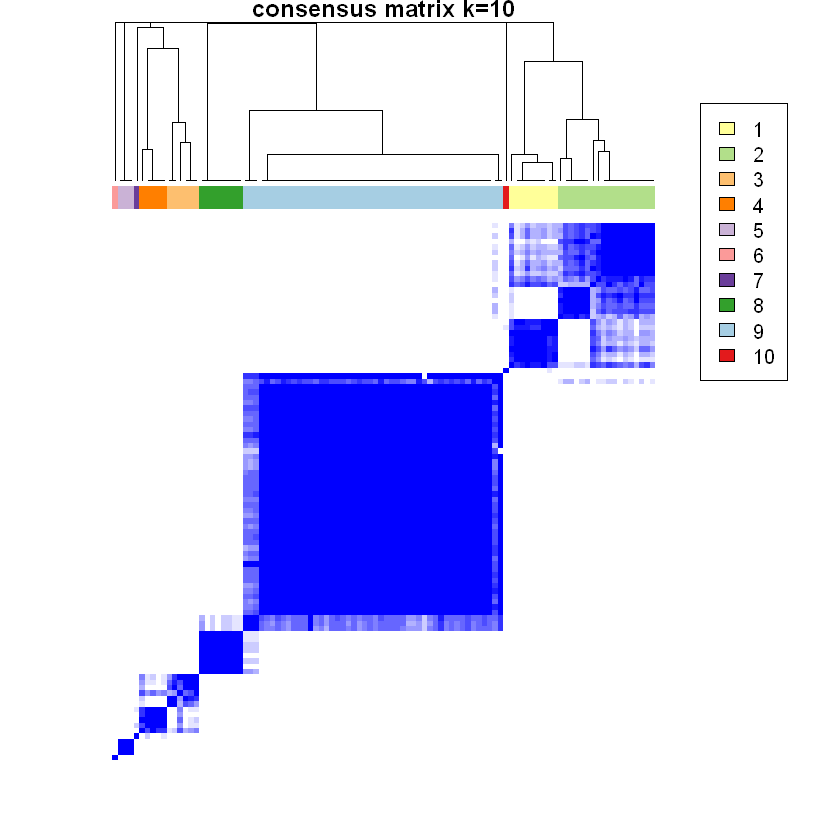

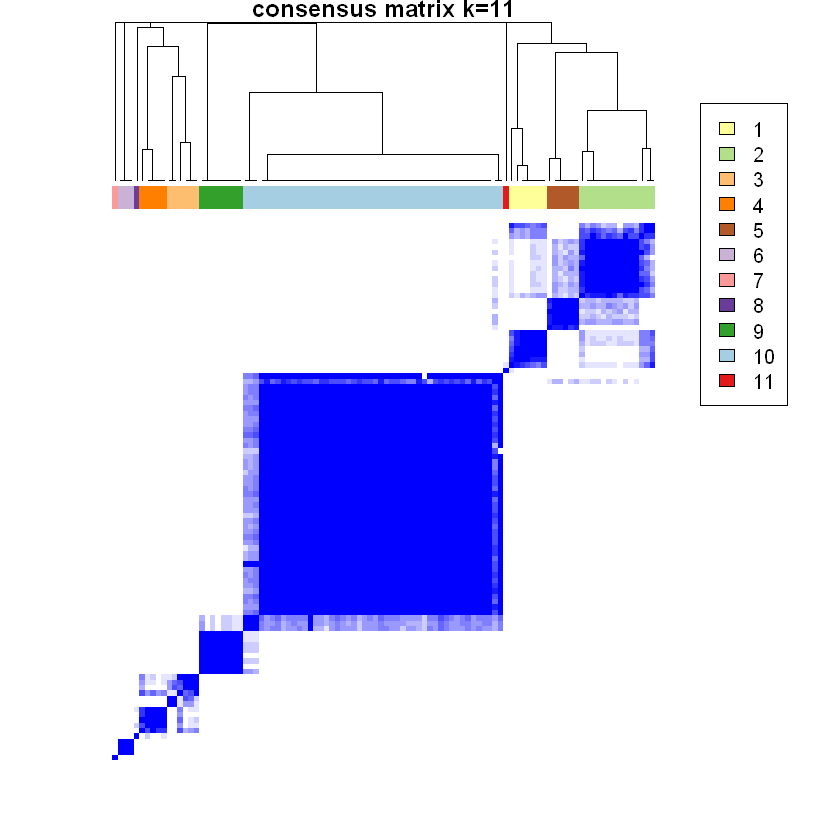

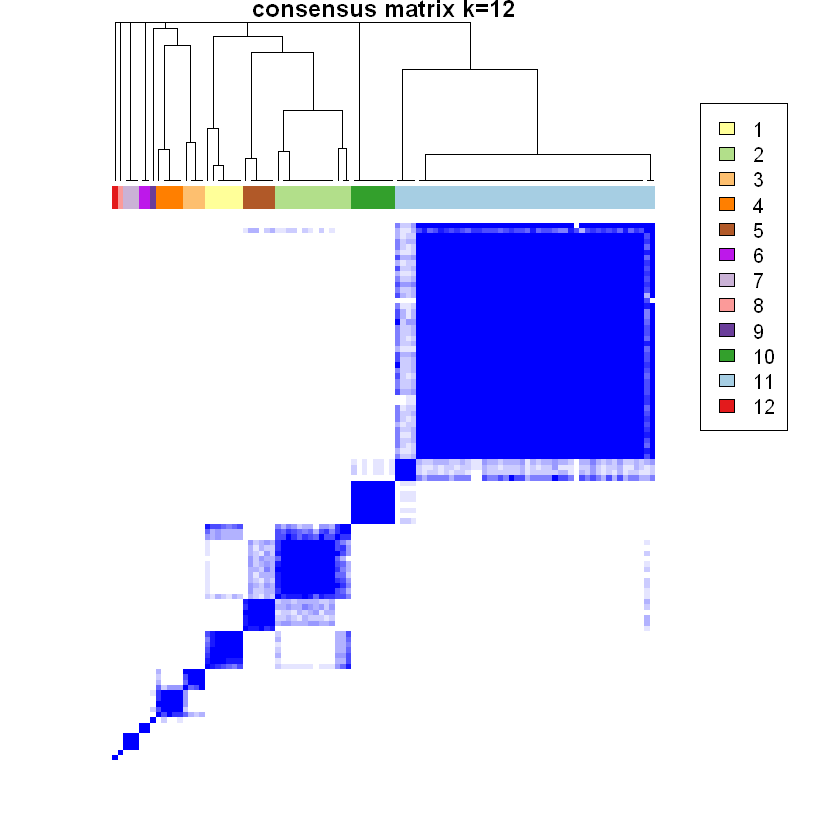

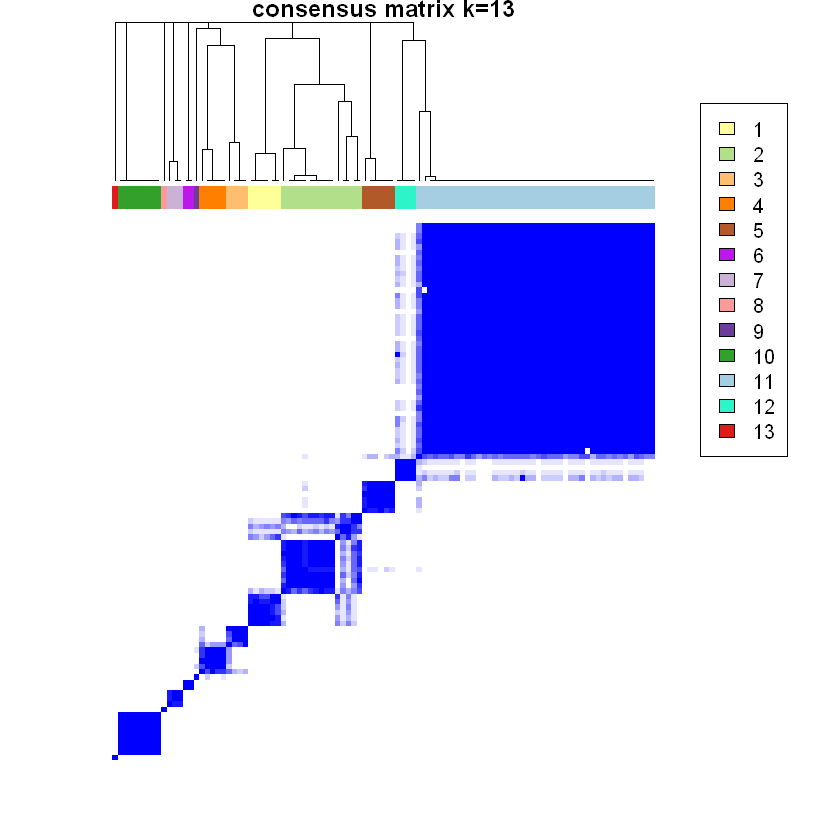

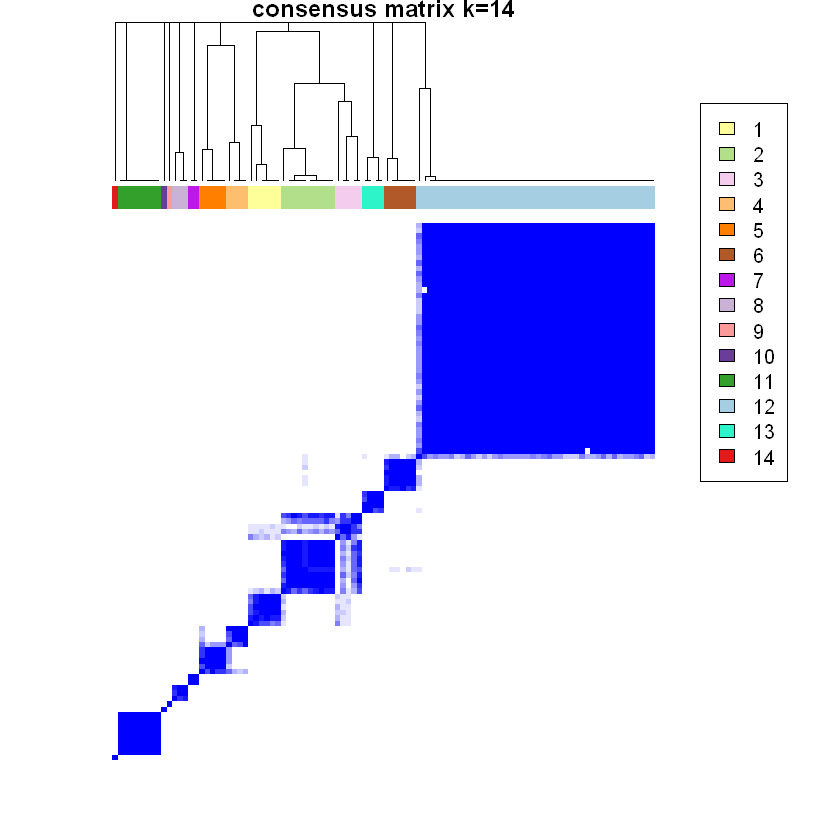

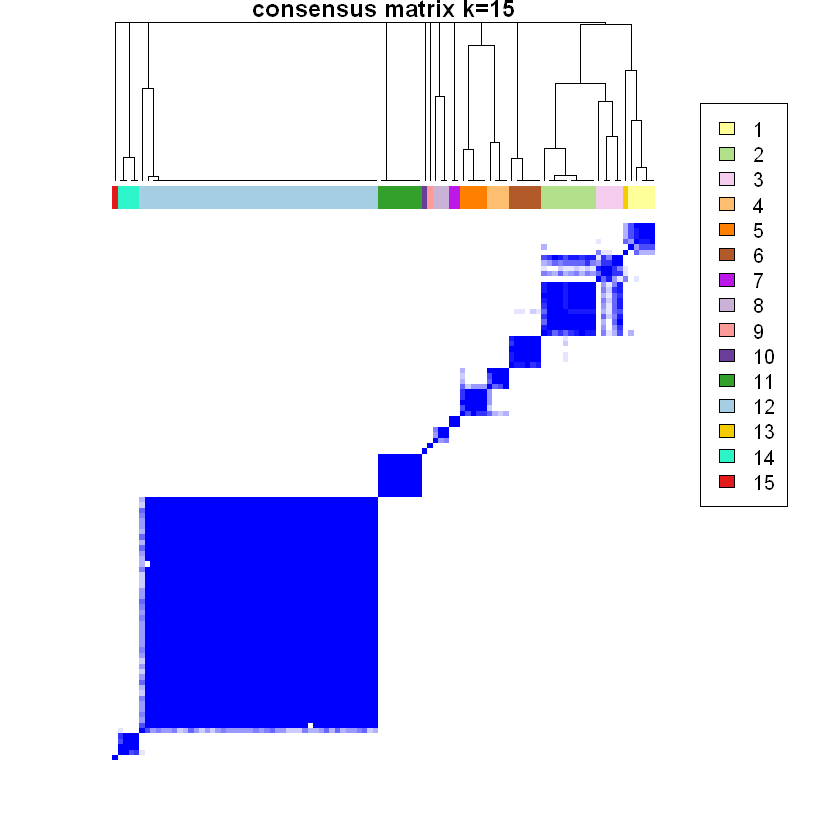

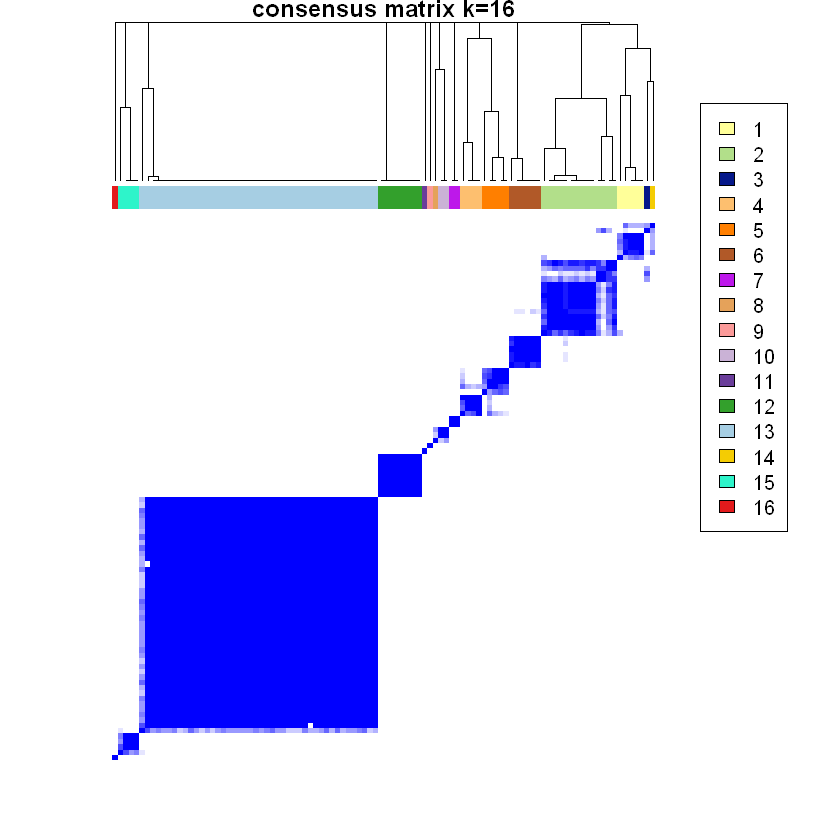

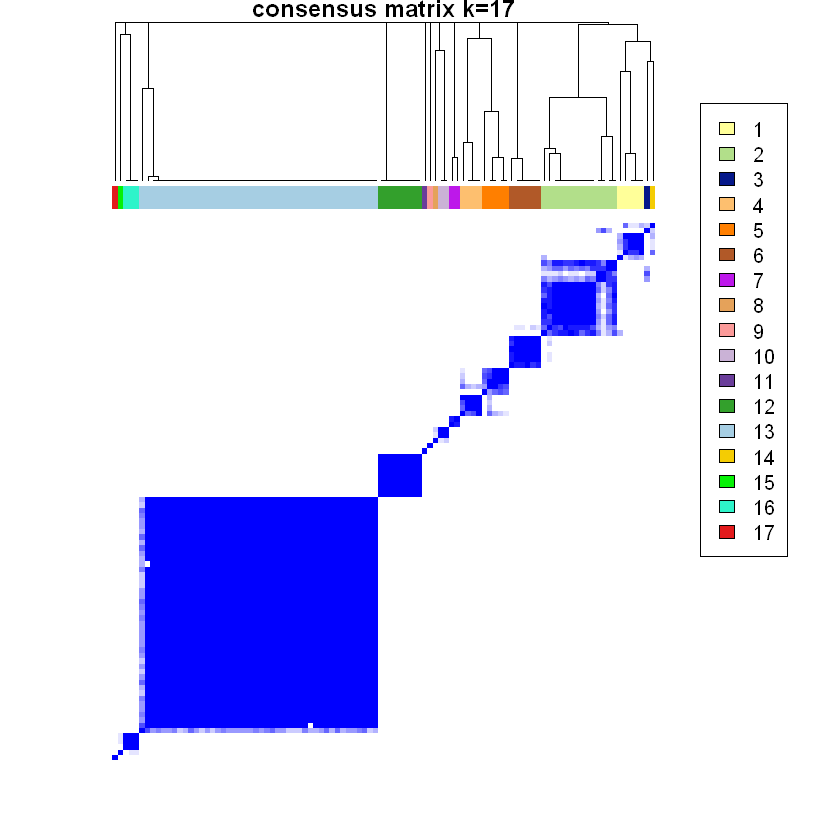

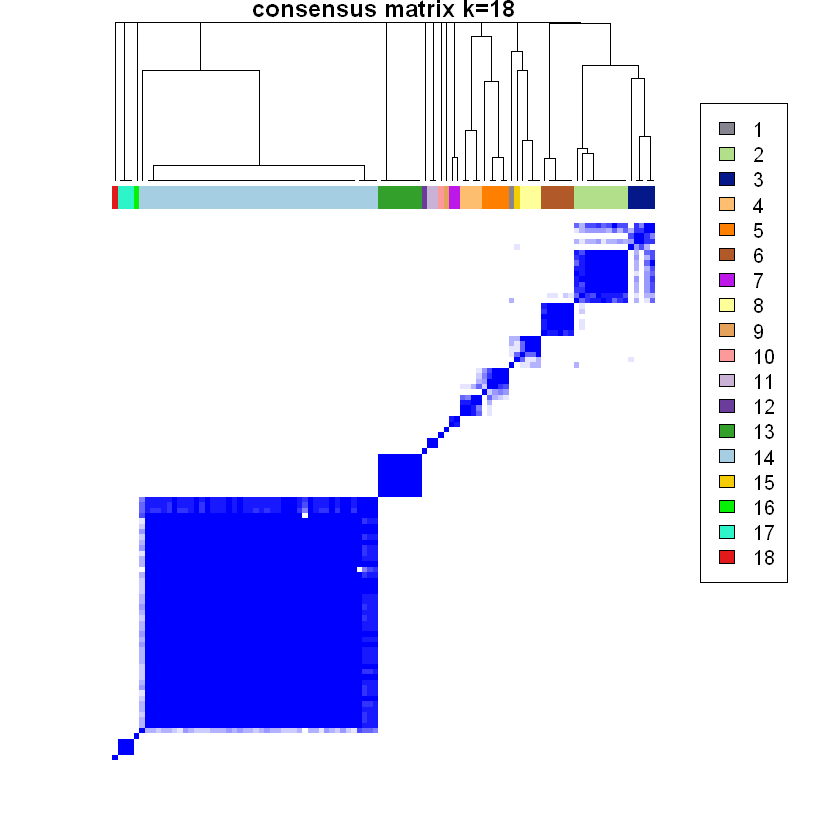

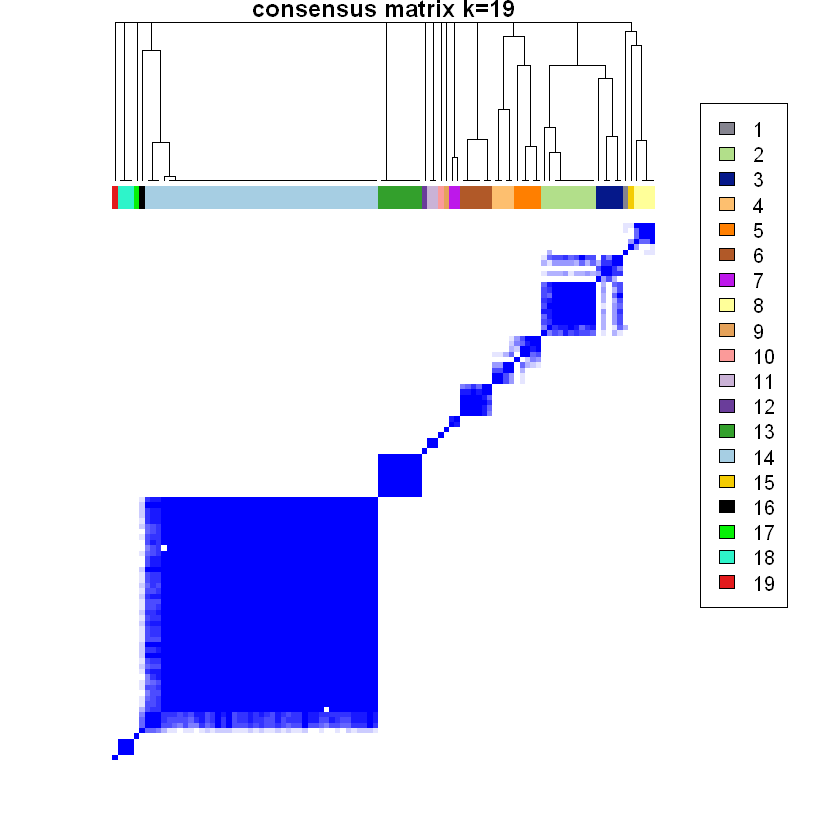

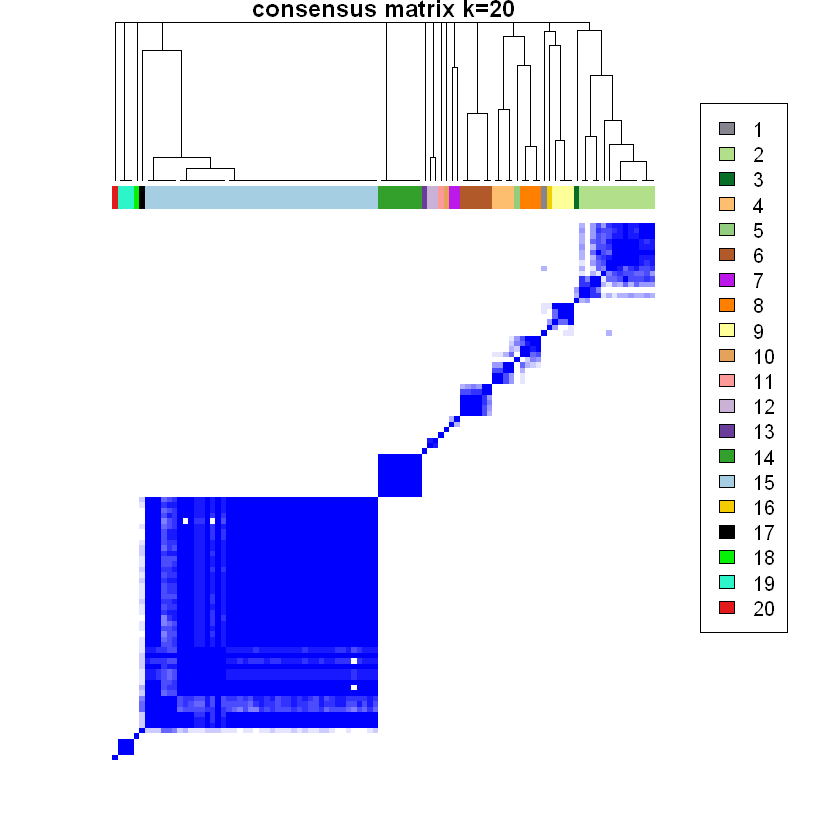

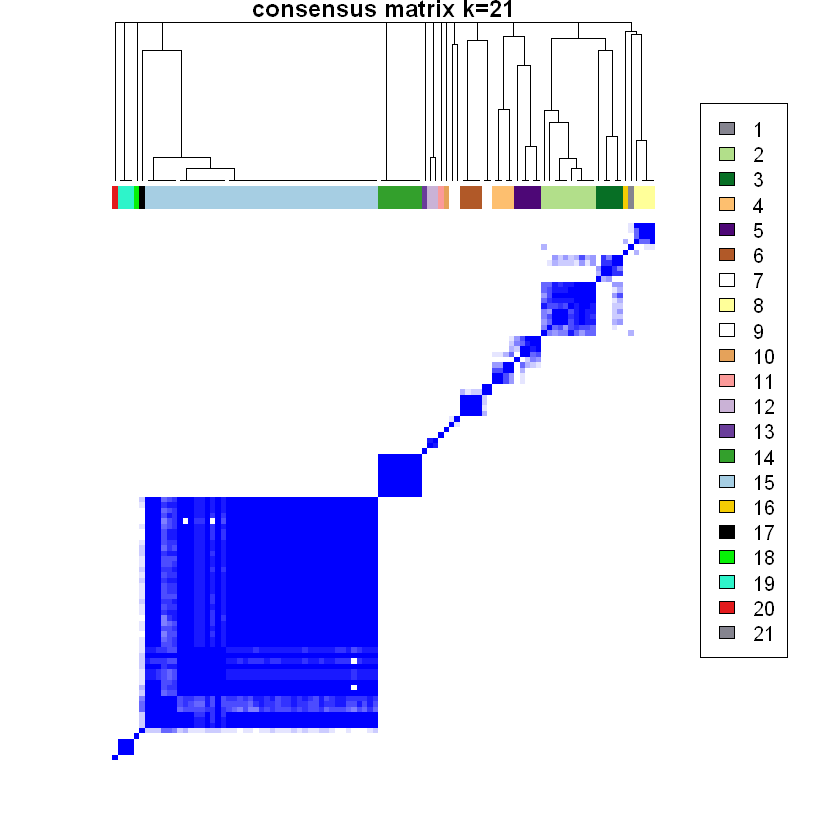

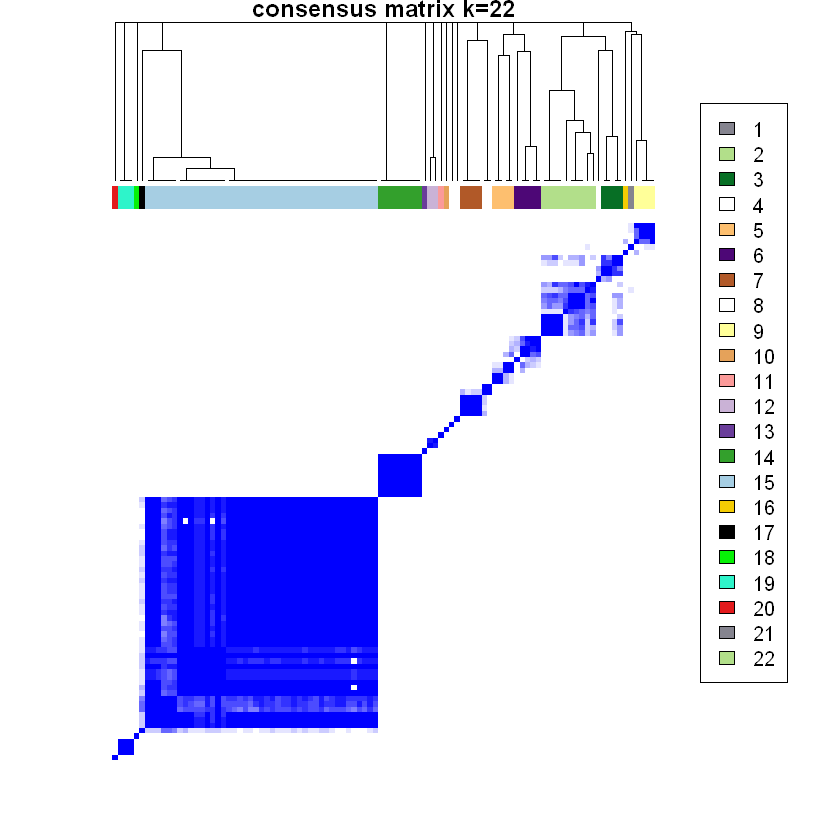

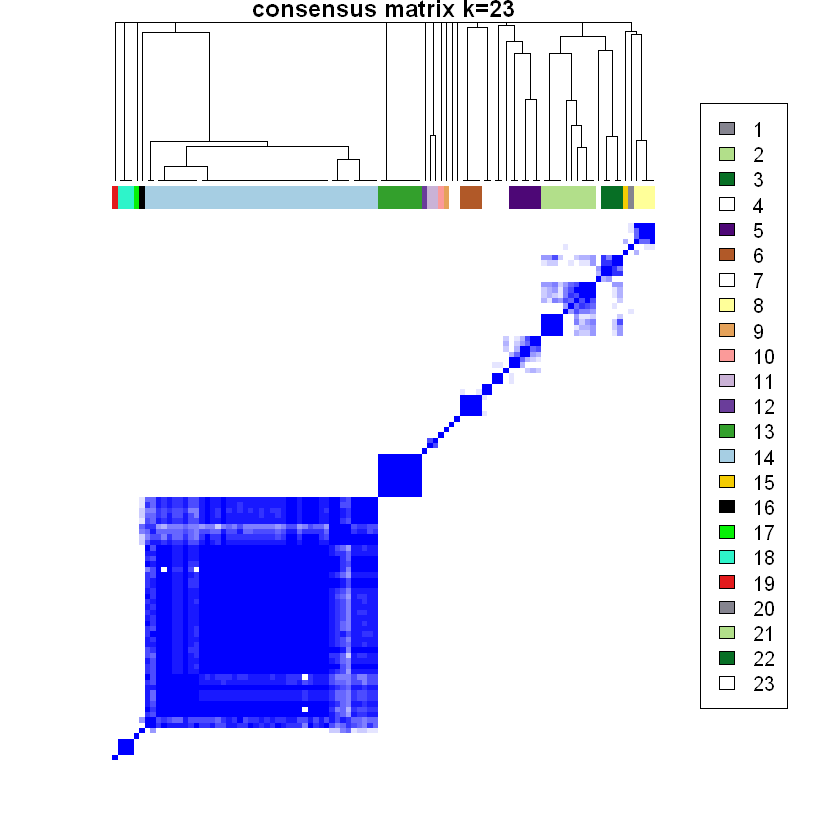

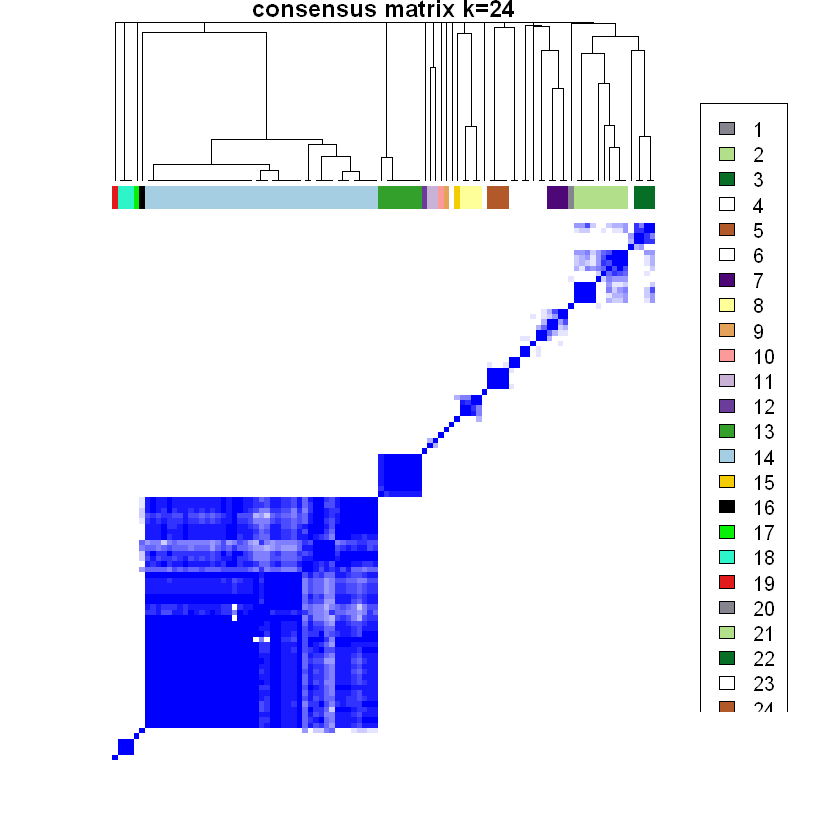

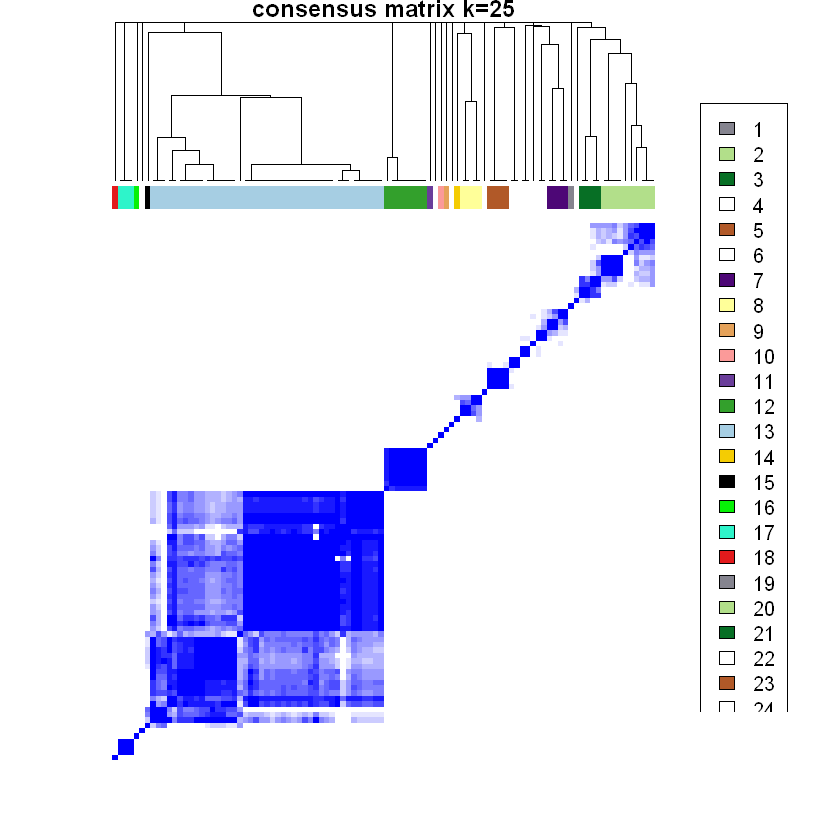

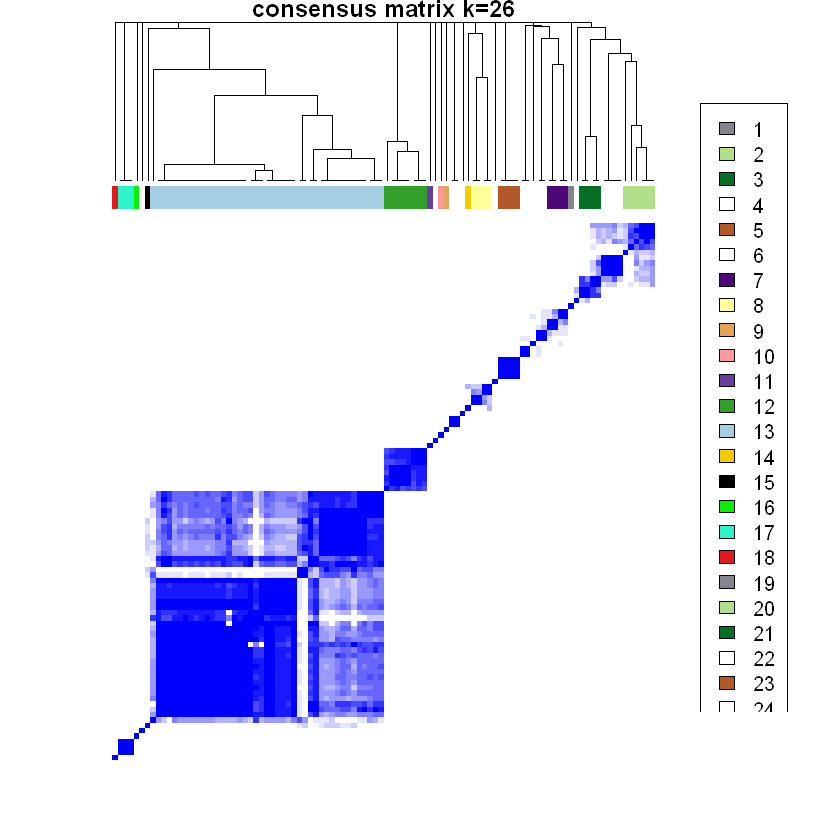

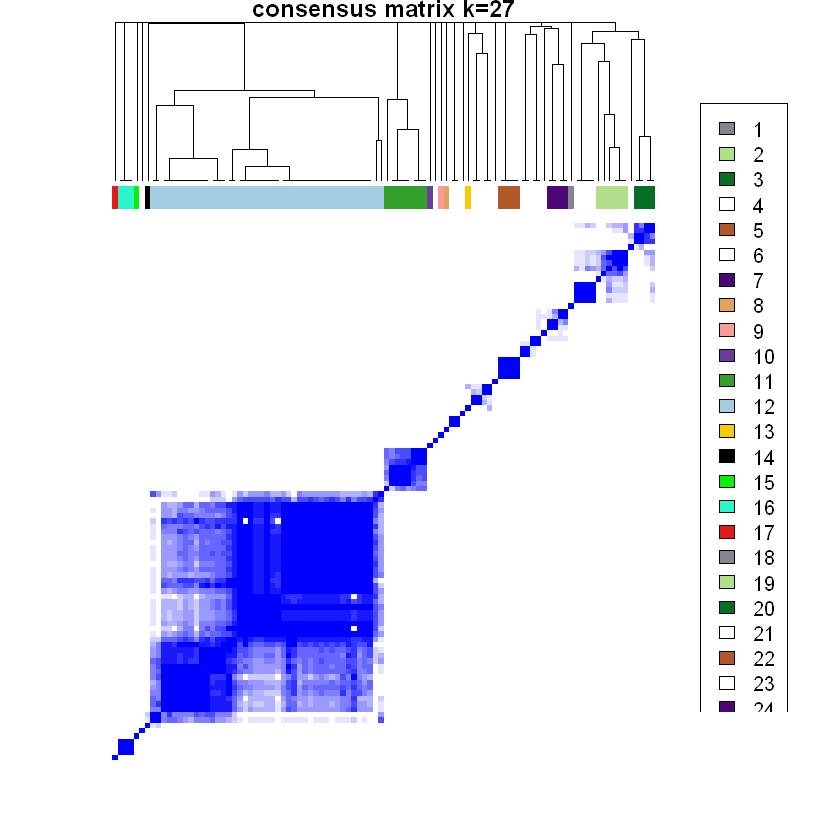

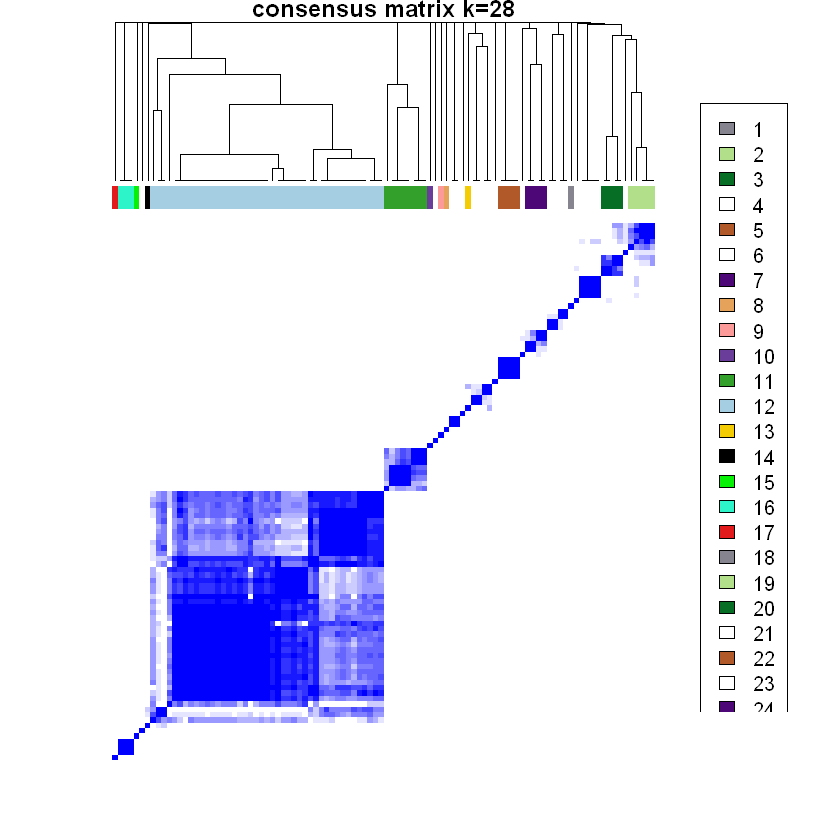

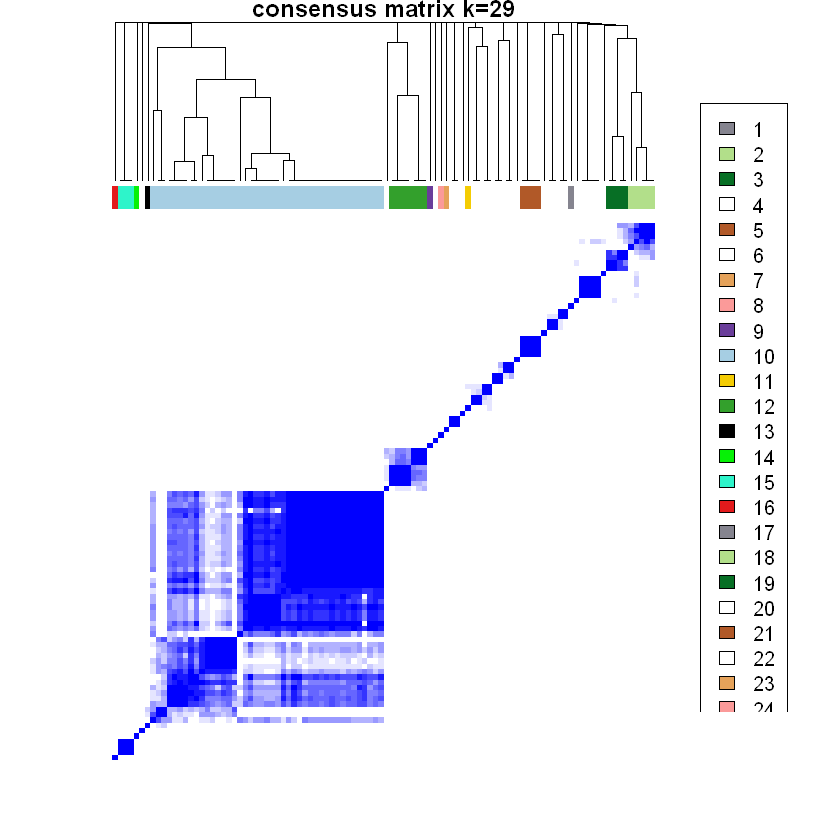

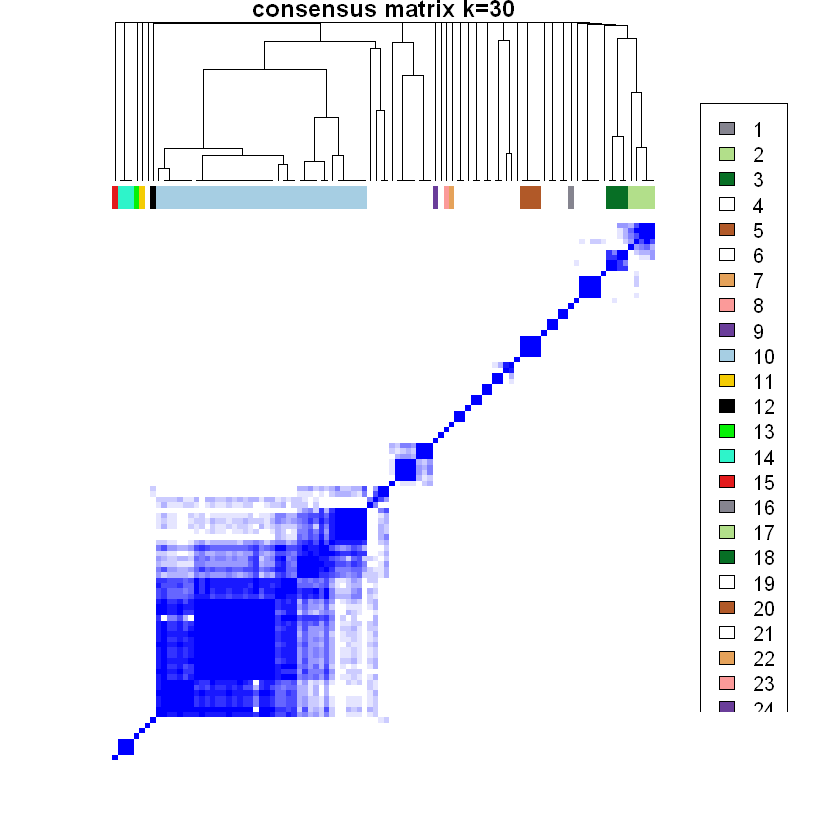

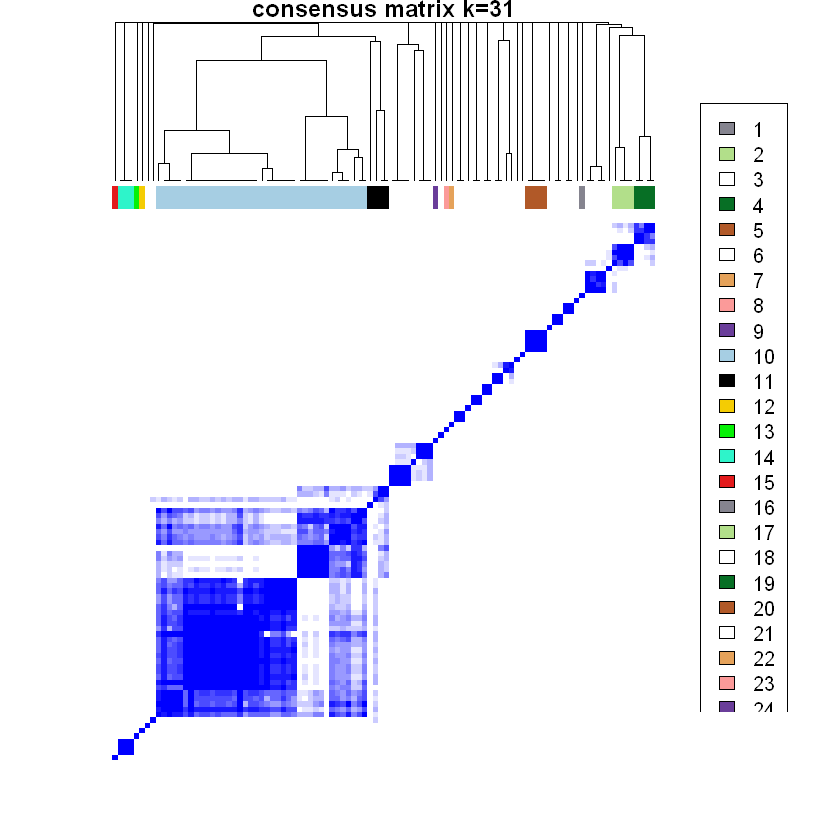

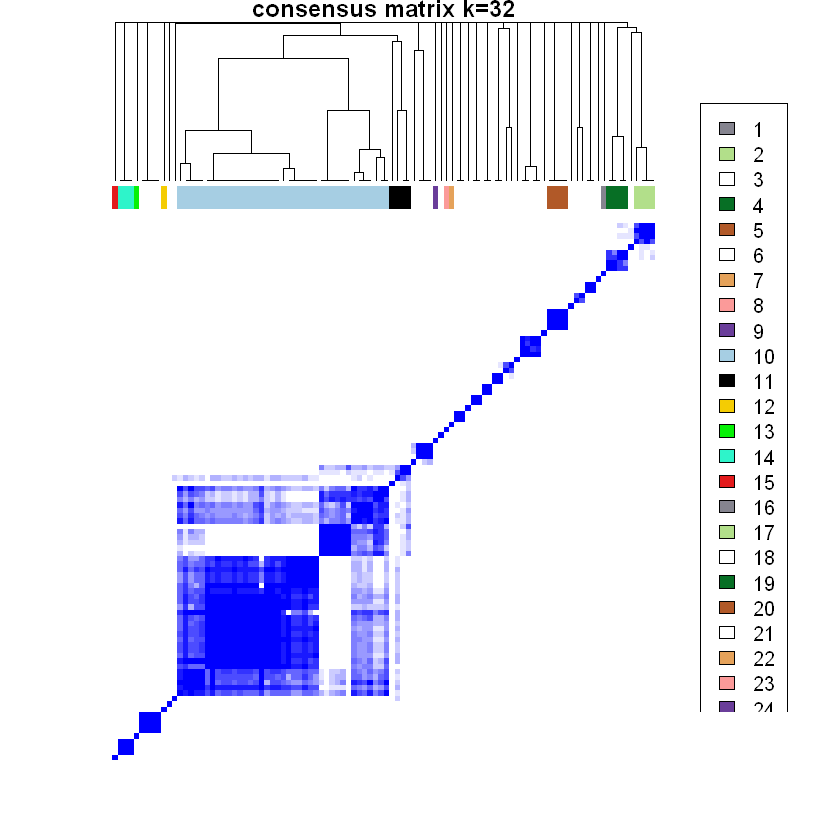

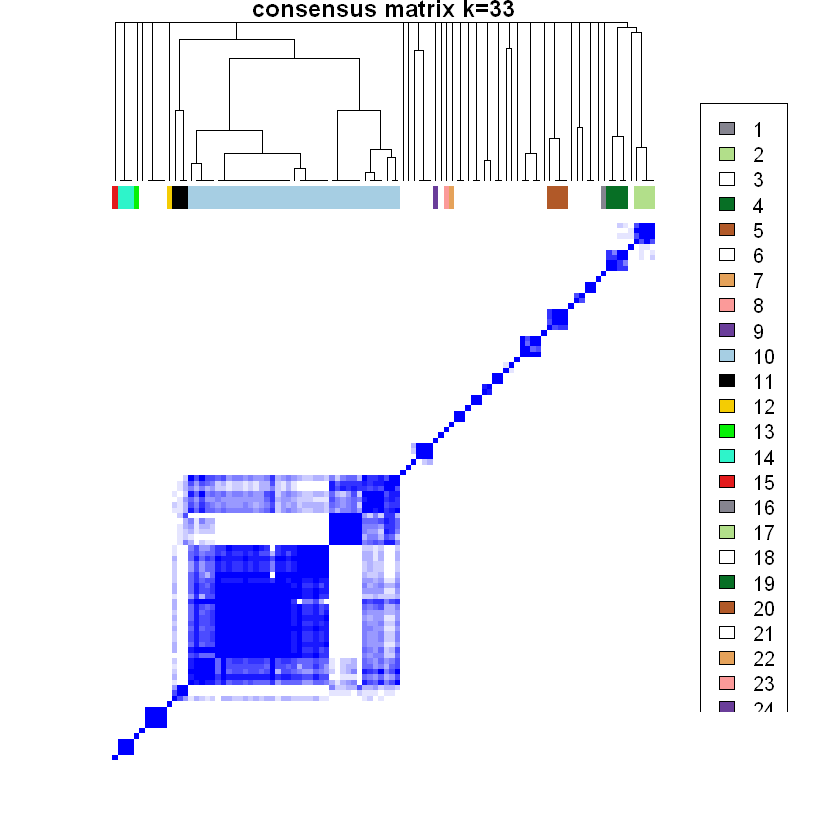

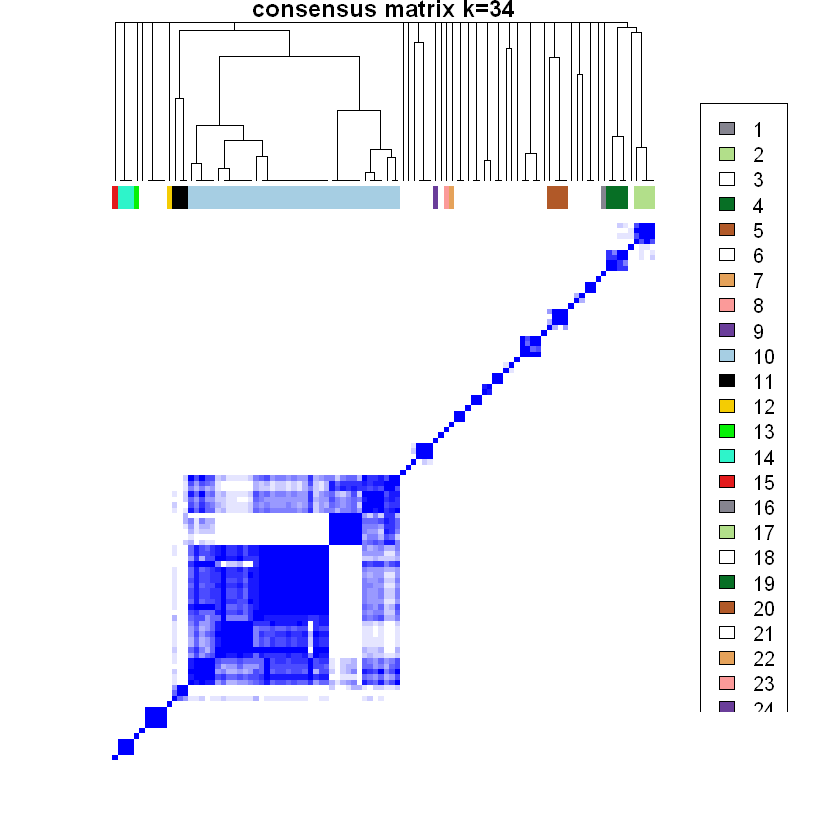

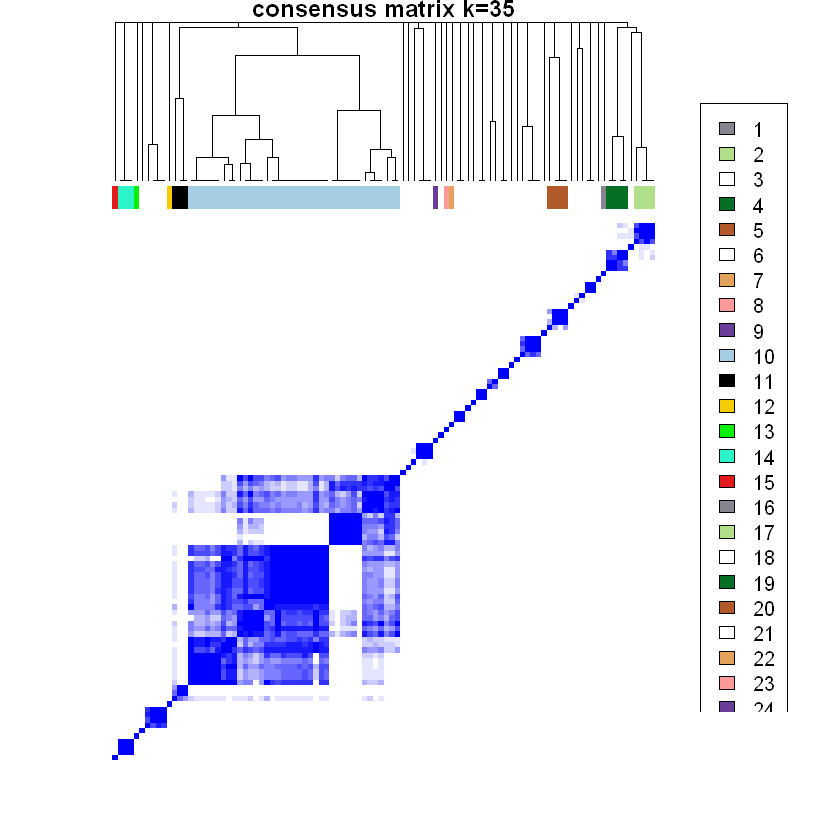

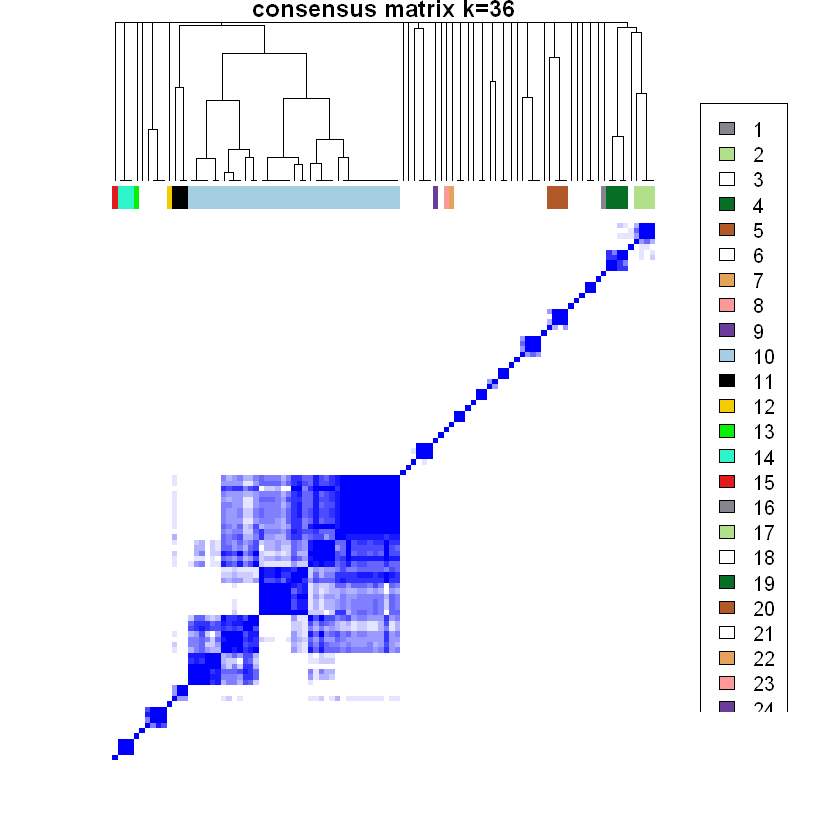

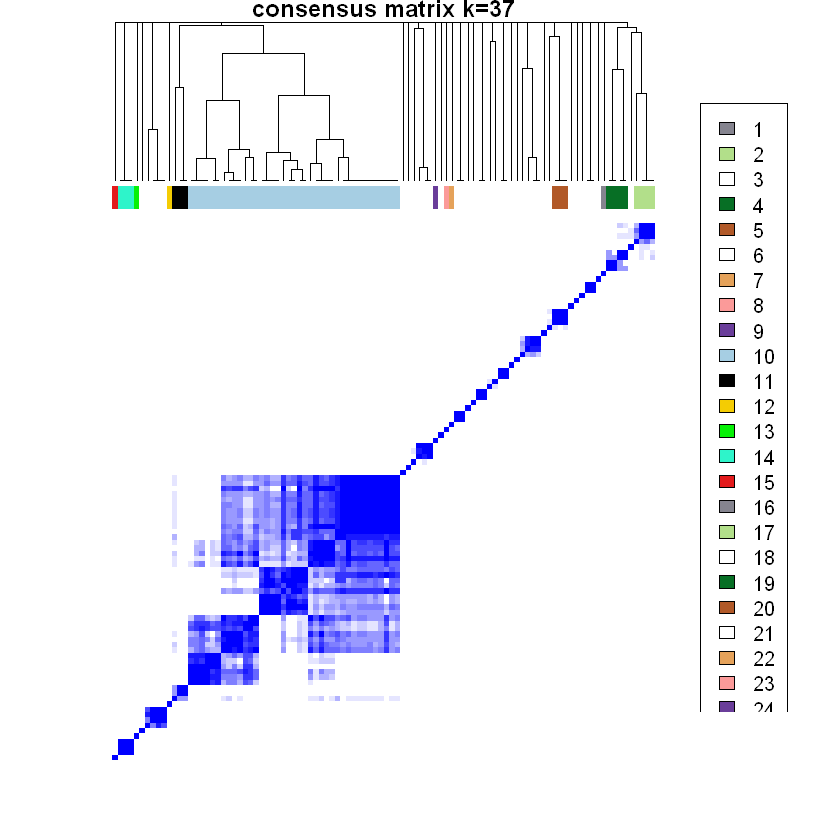

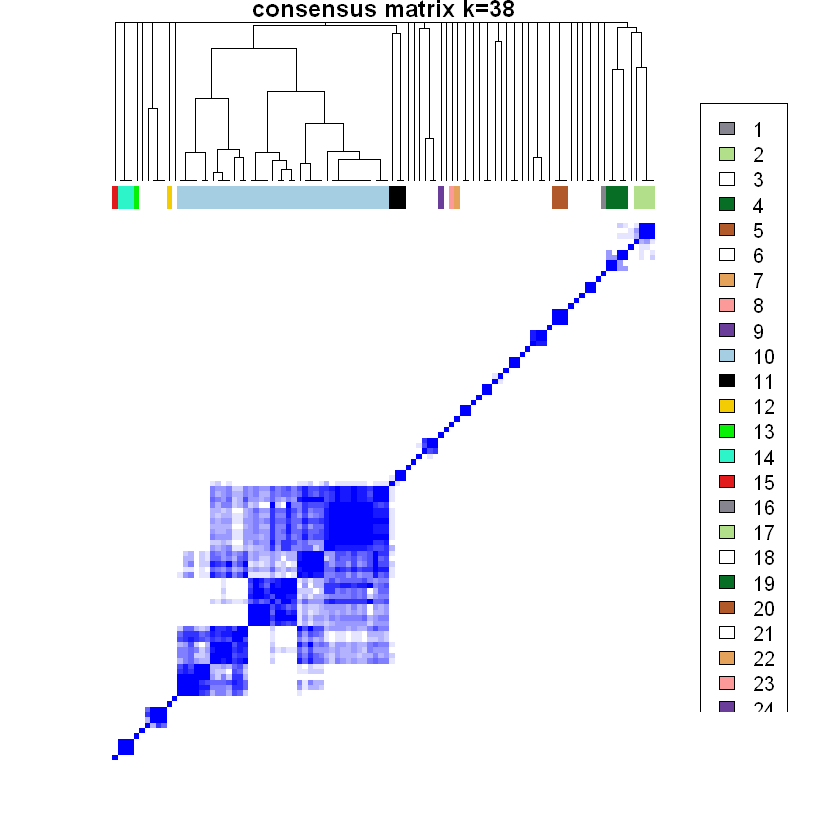

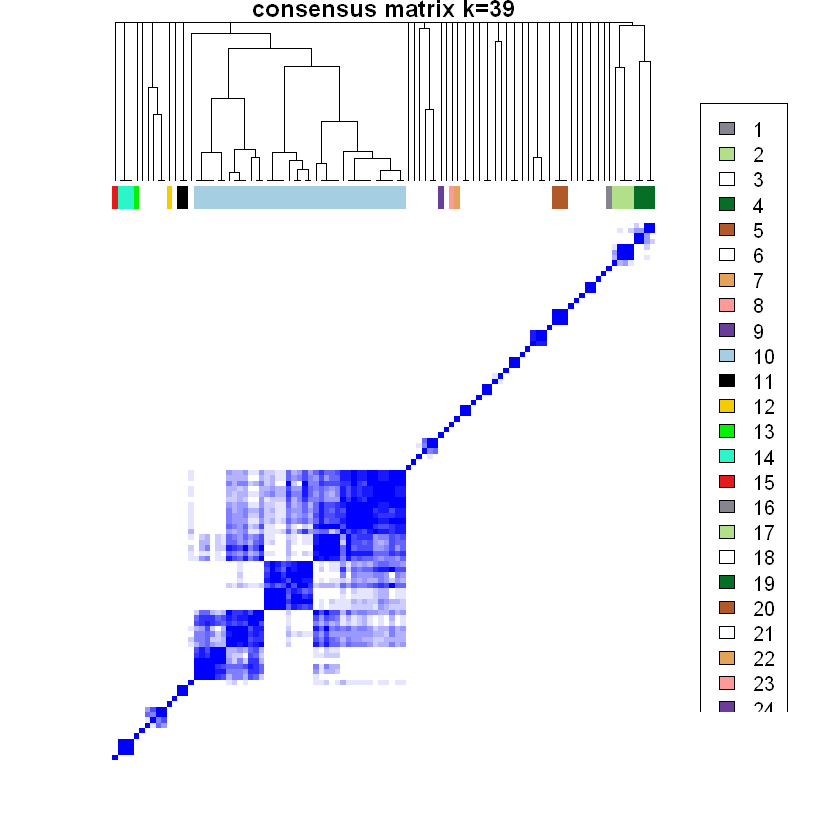

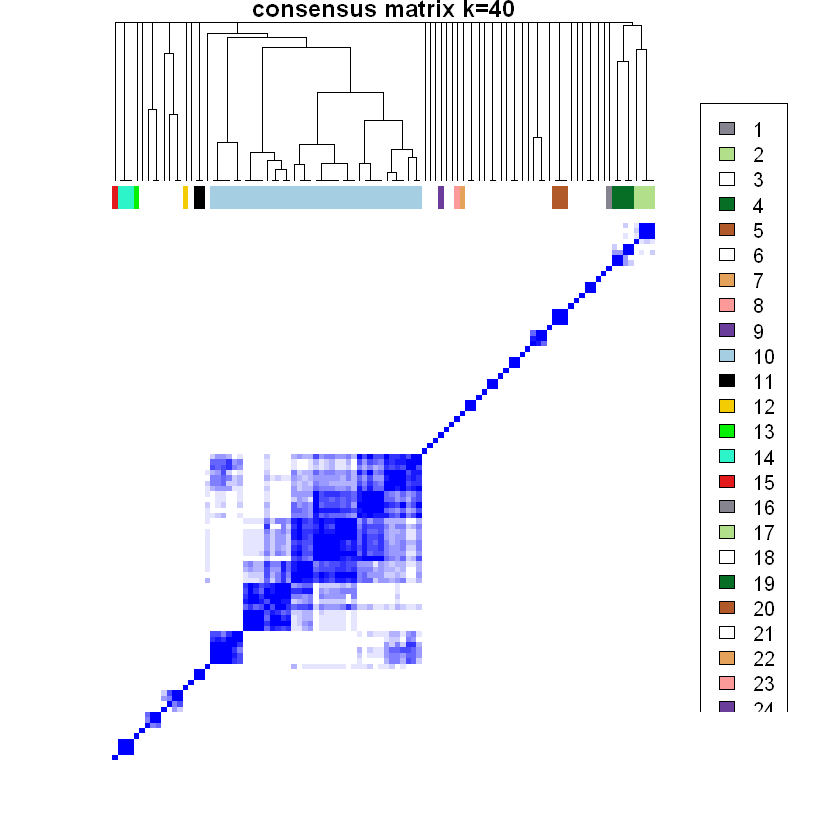

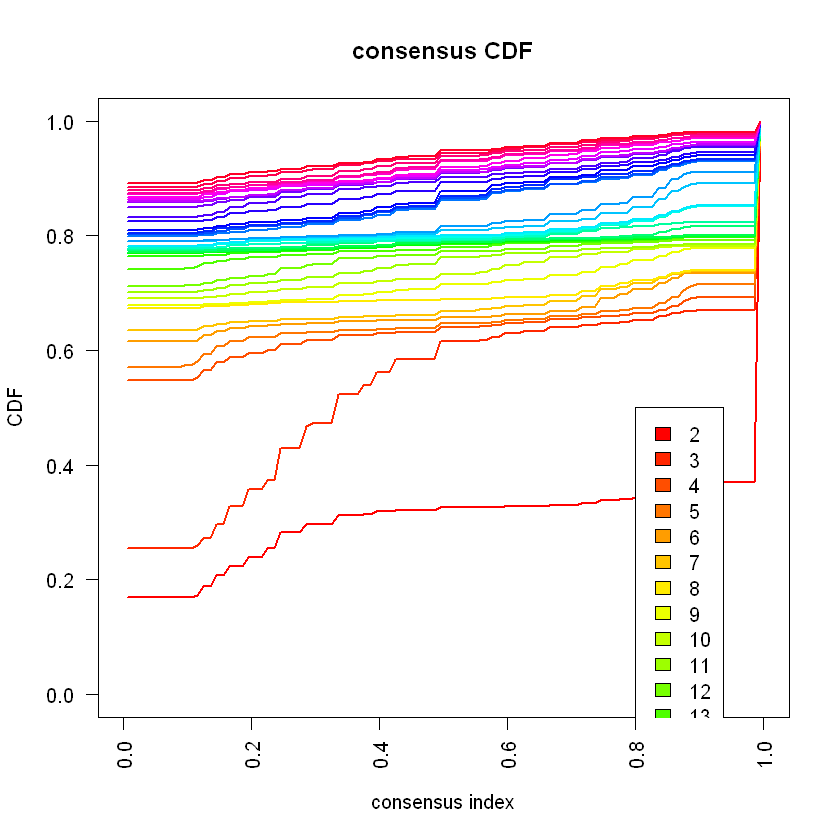

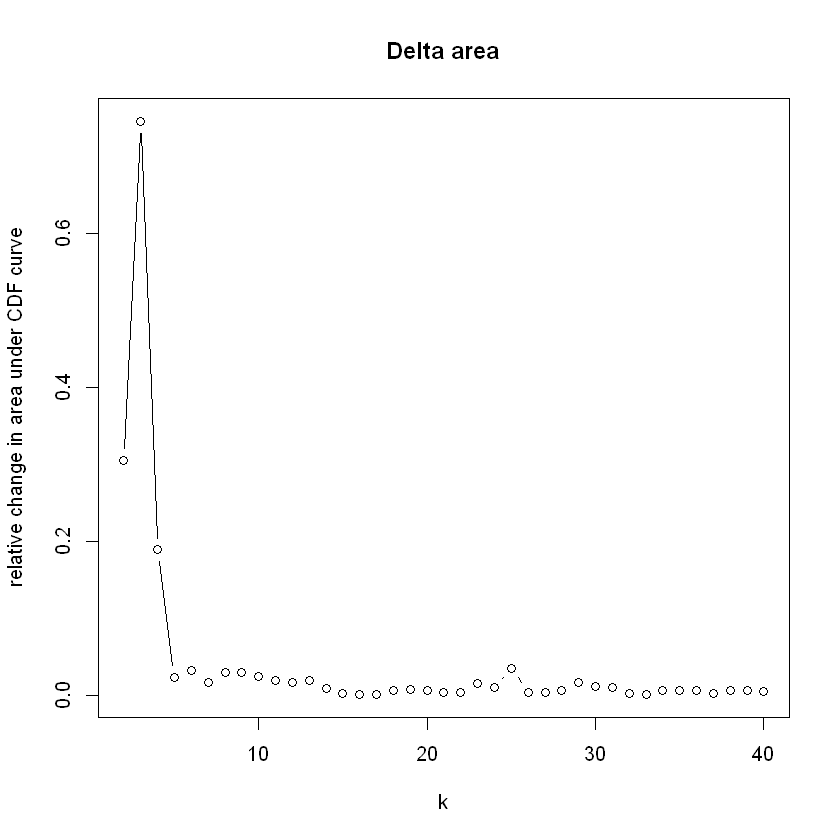

data set Nilsson_rare : run complete


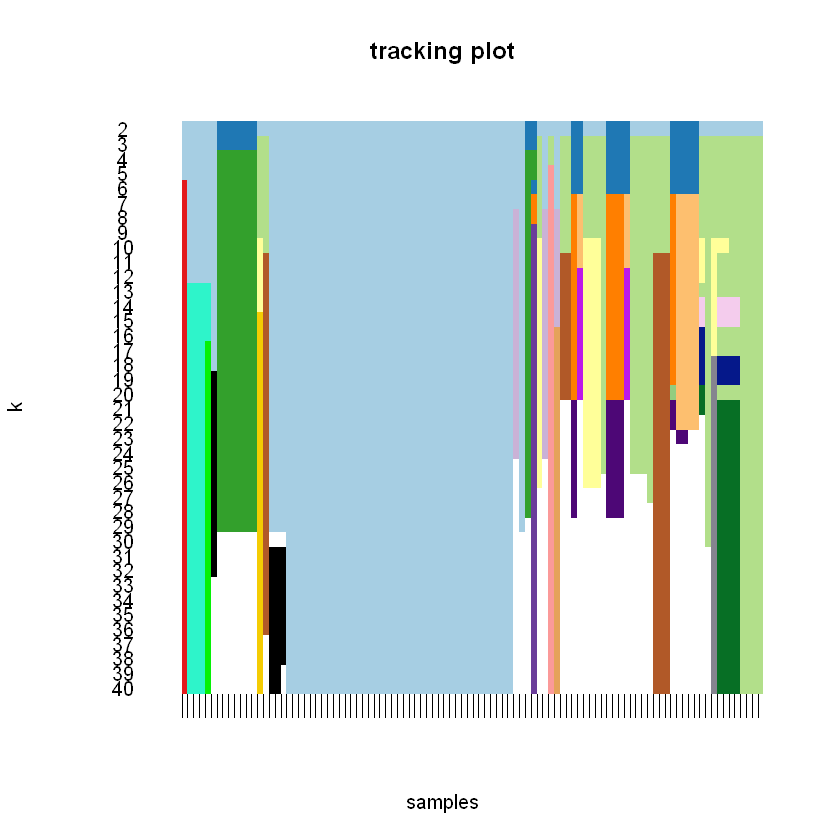

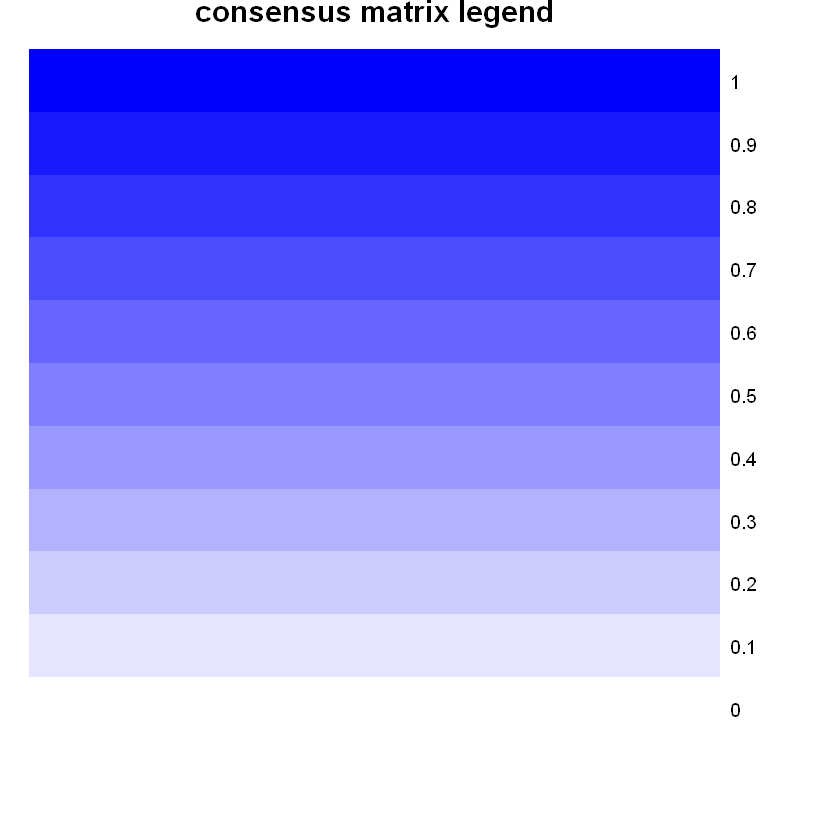

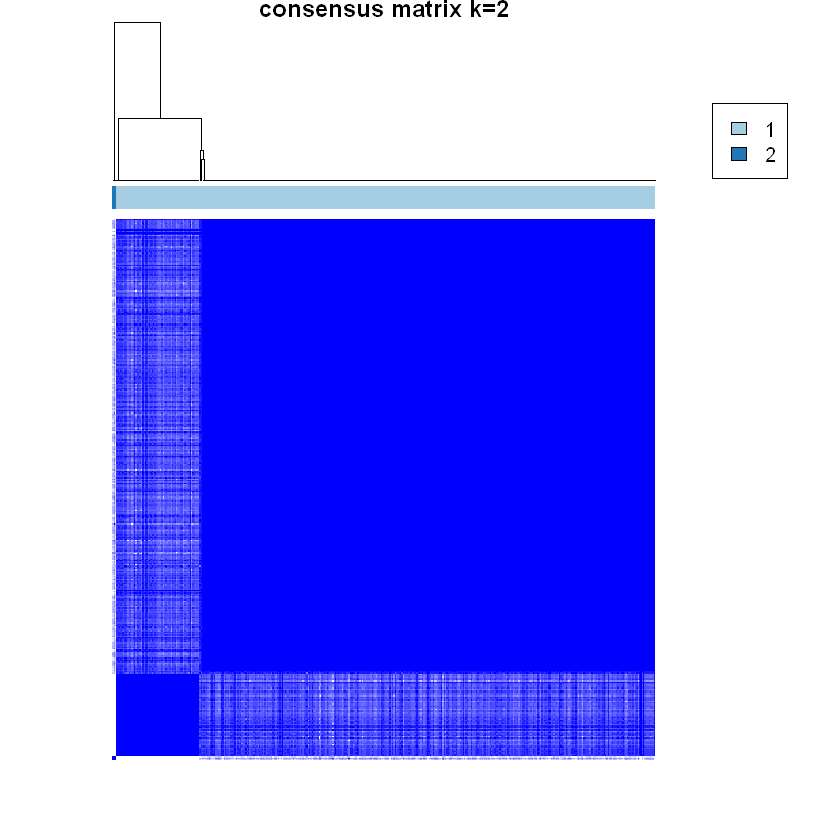

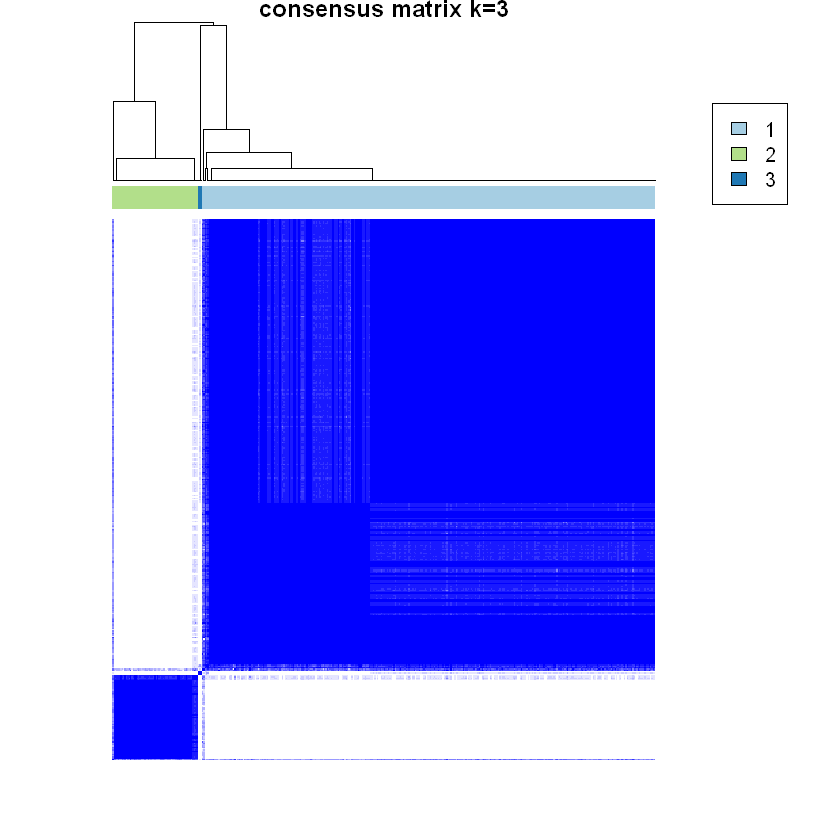

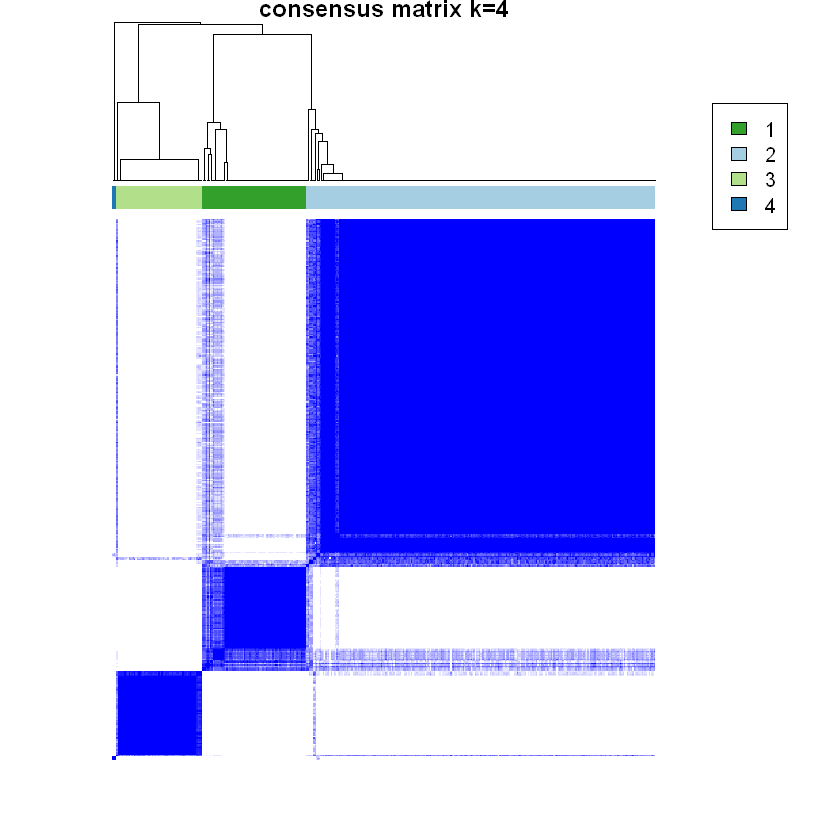

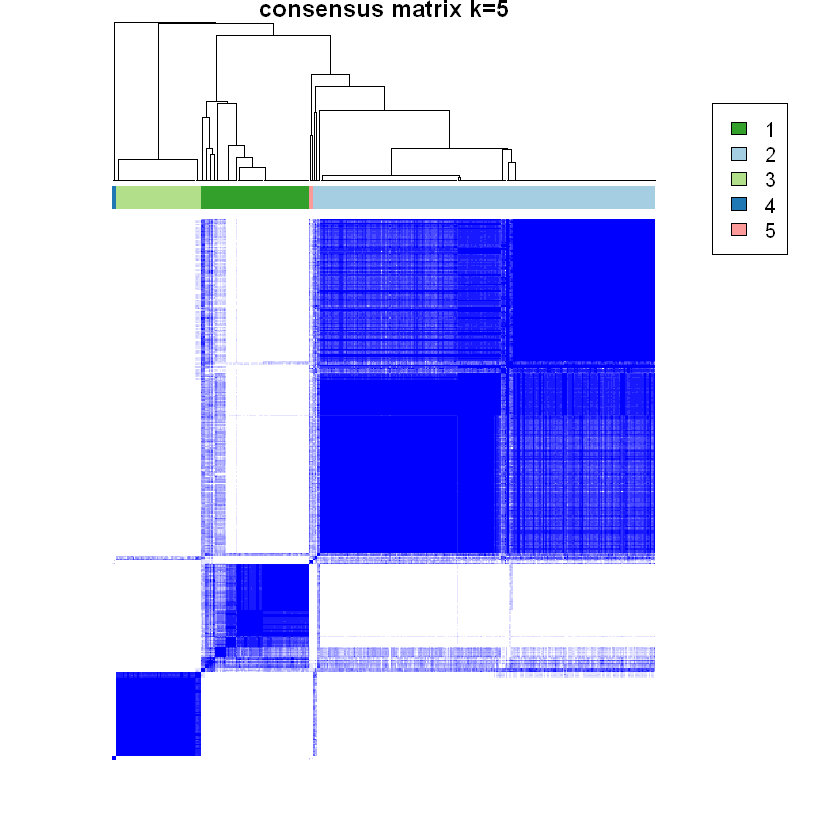

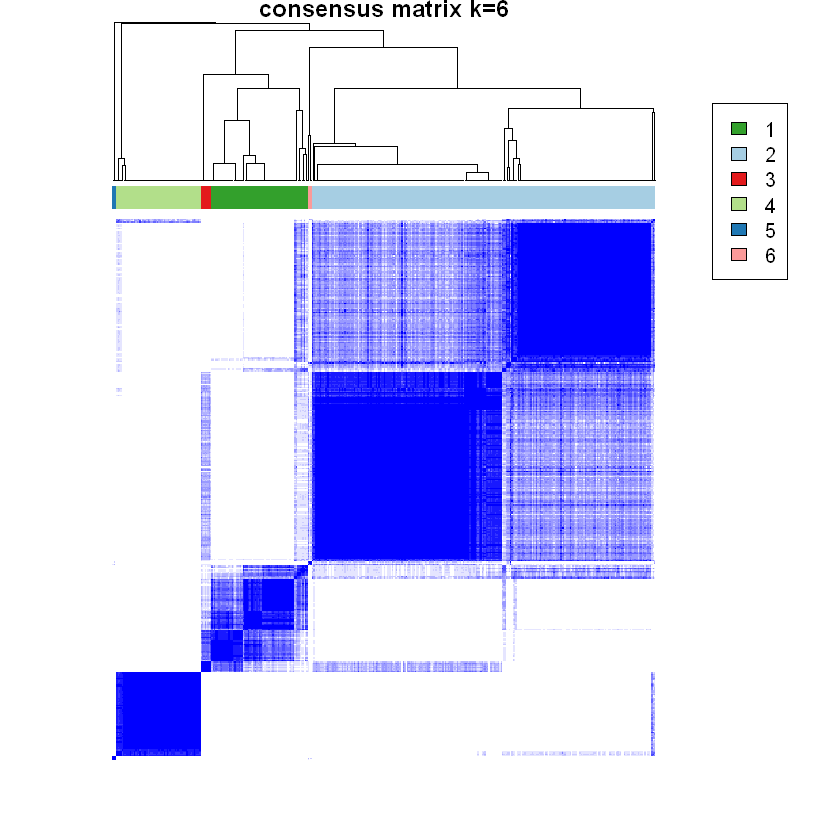

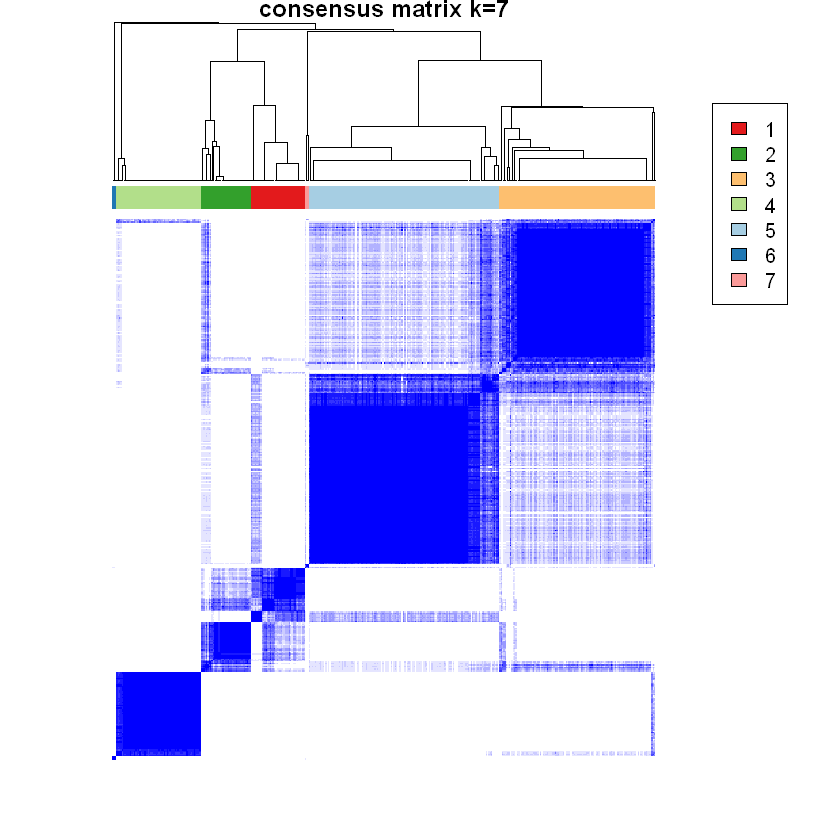

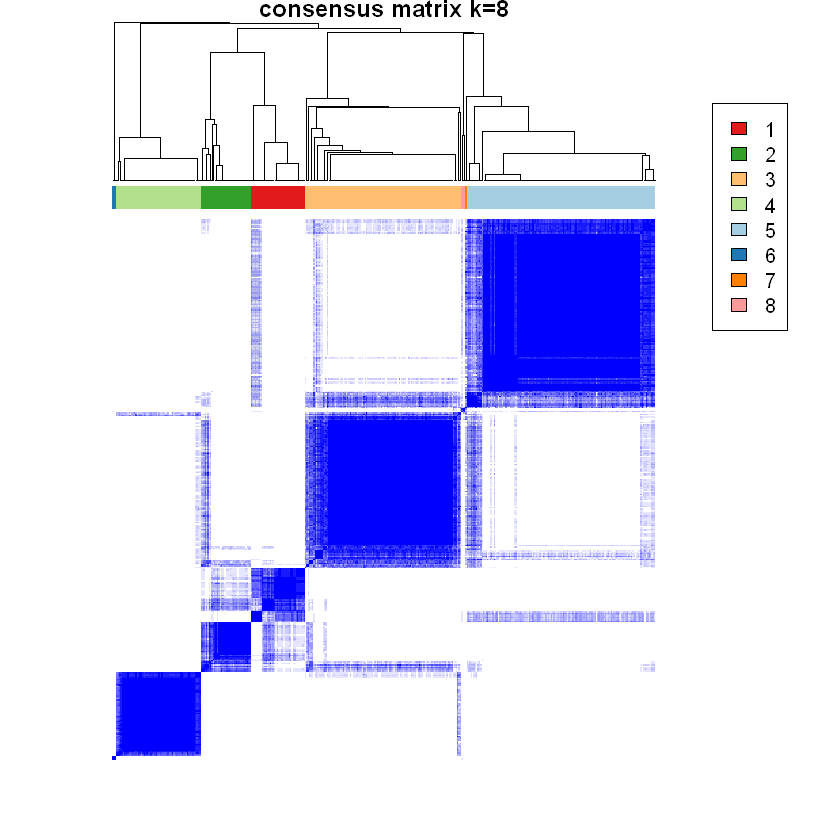

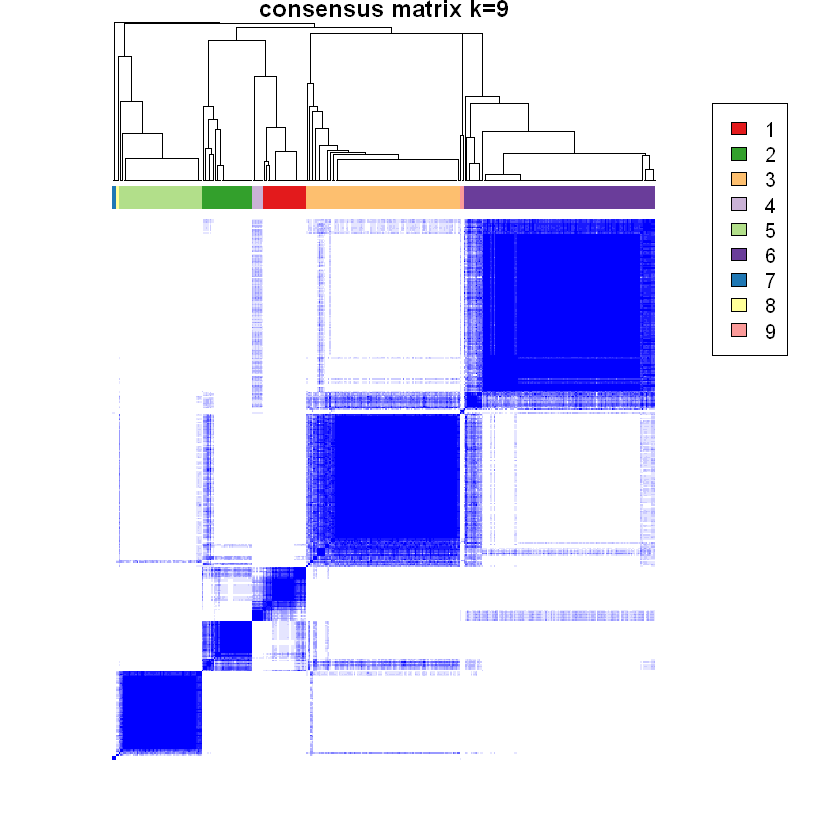

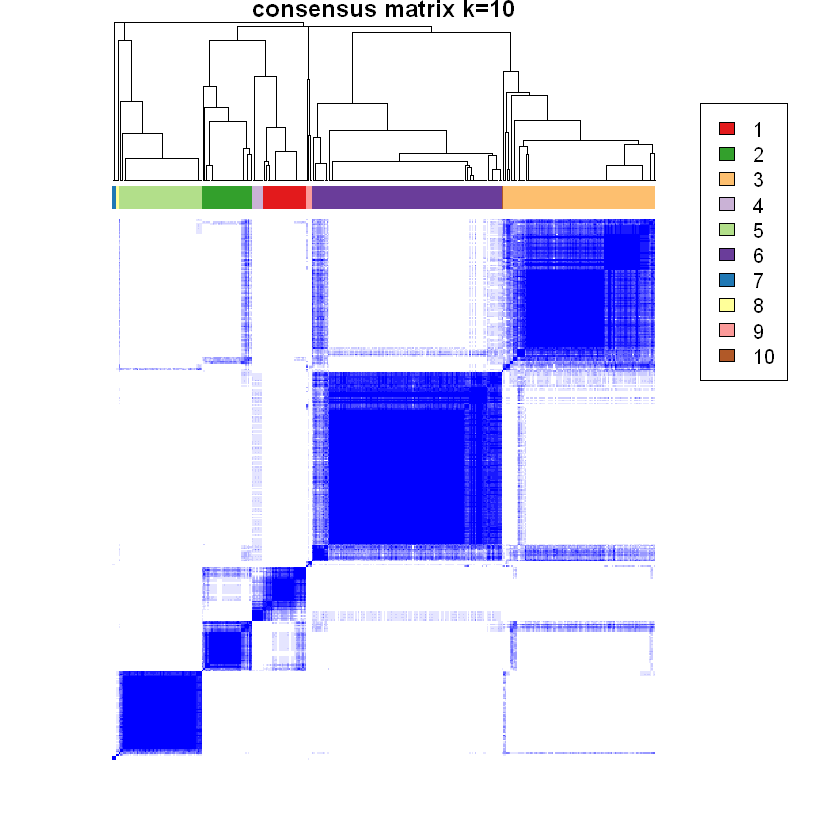

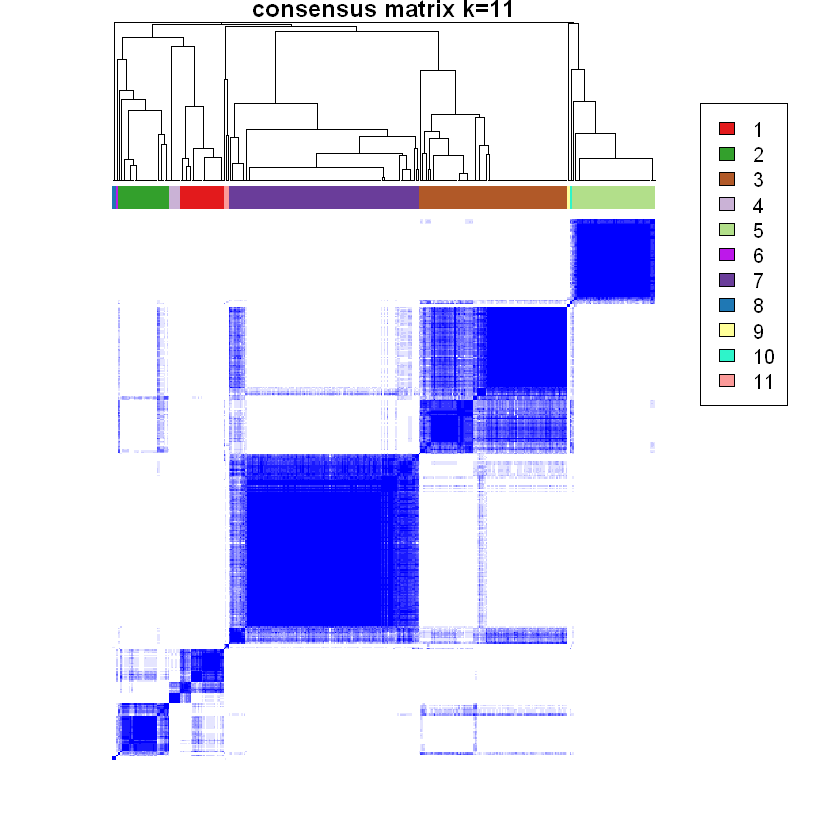

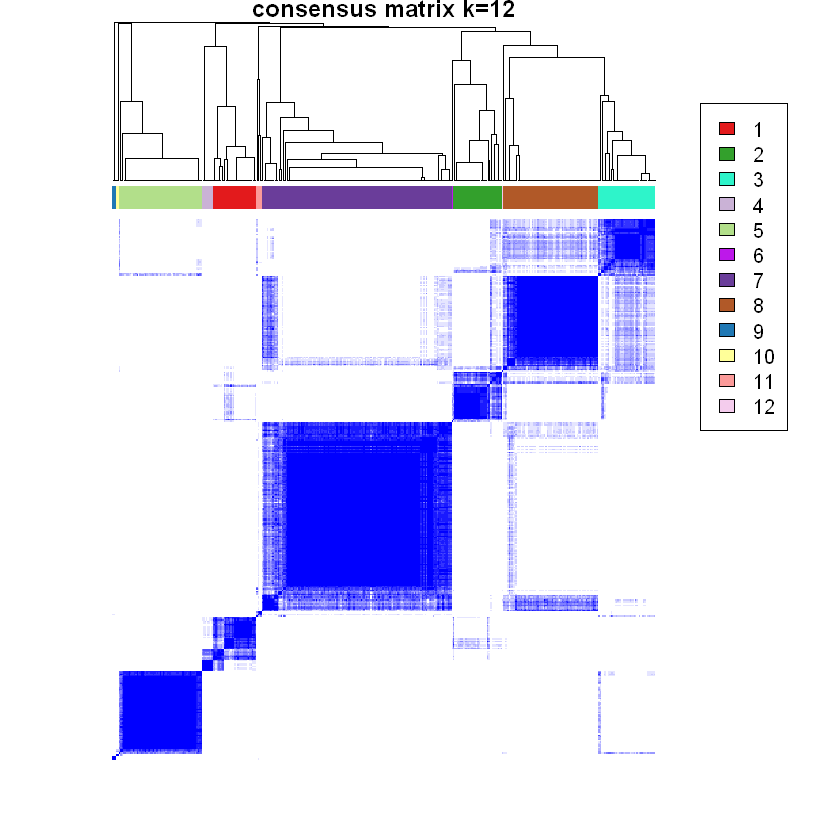

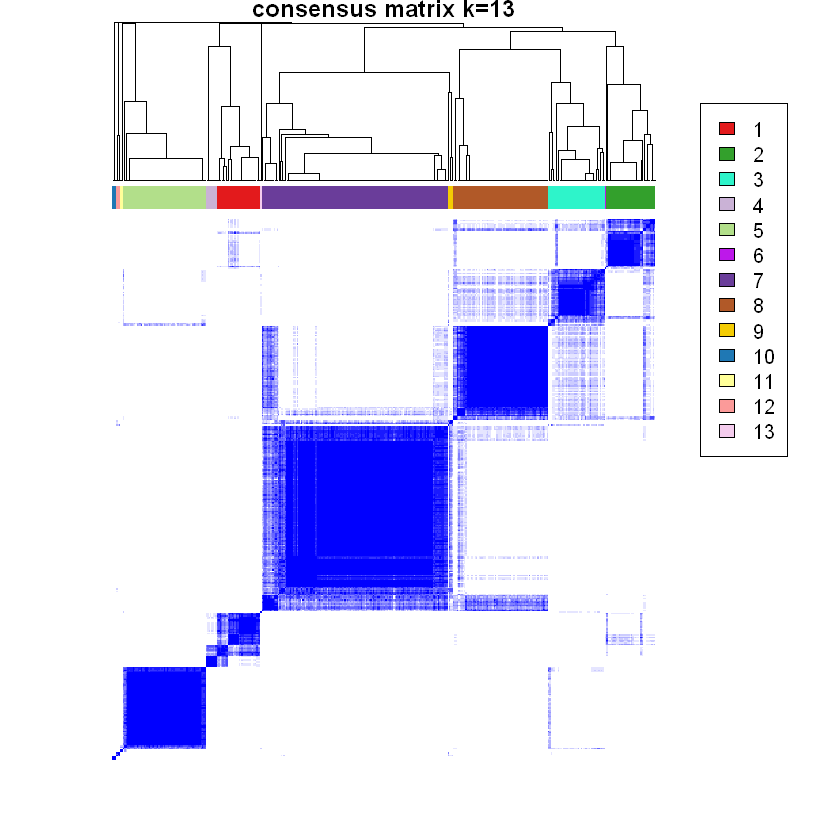

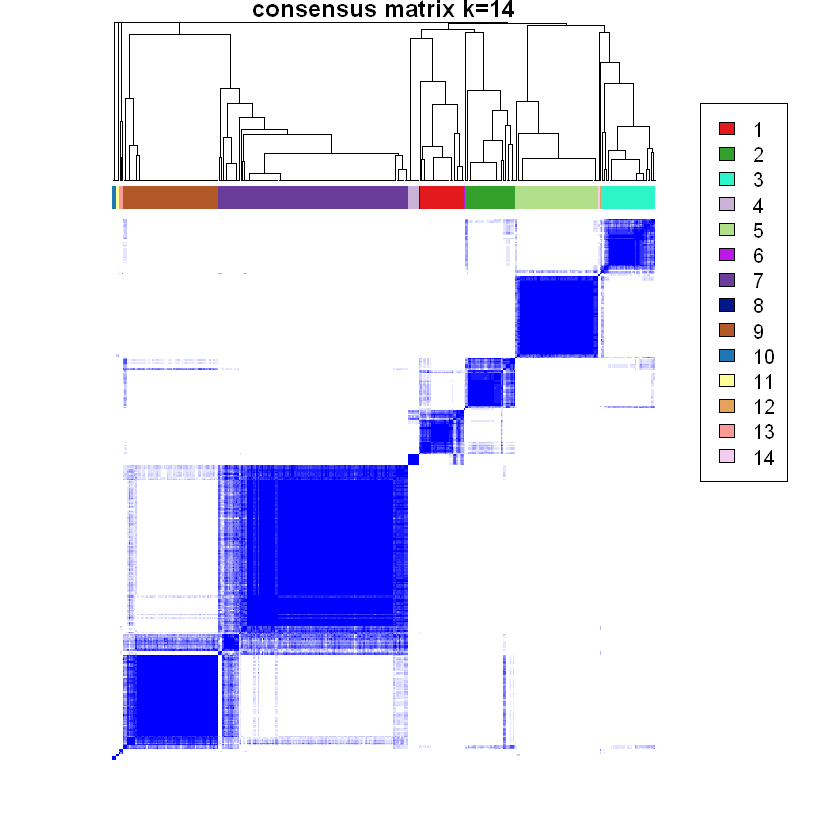

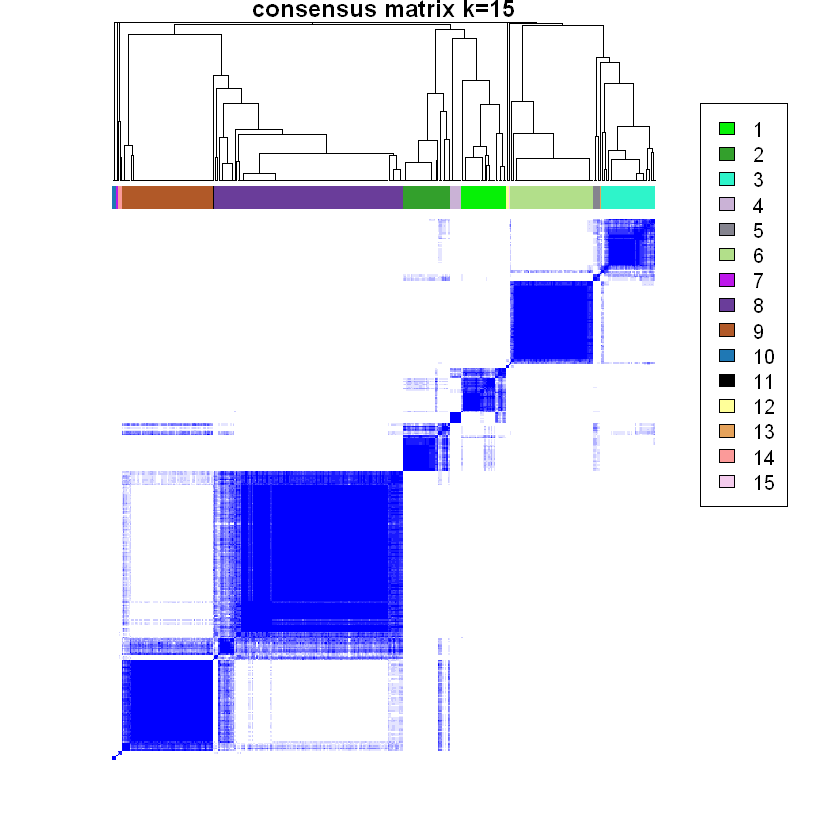

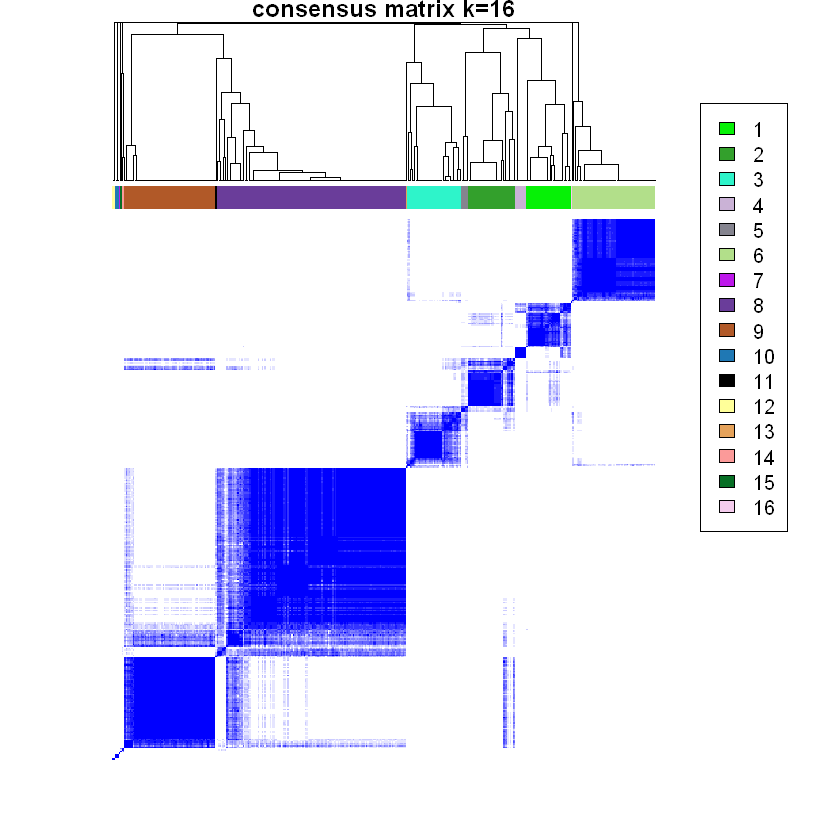

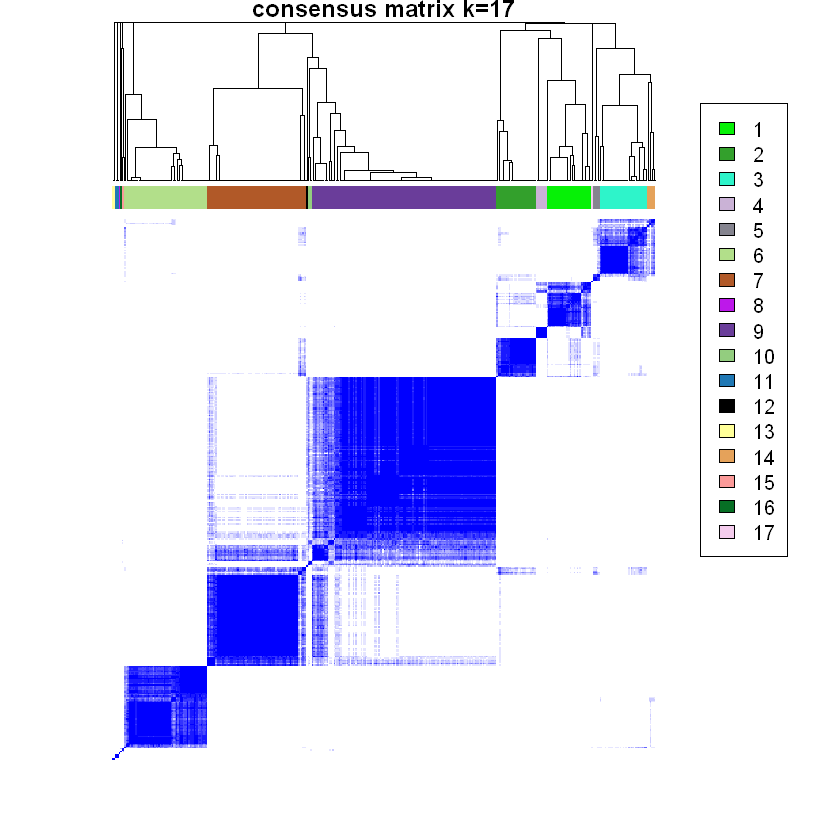

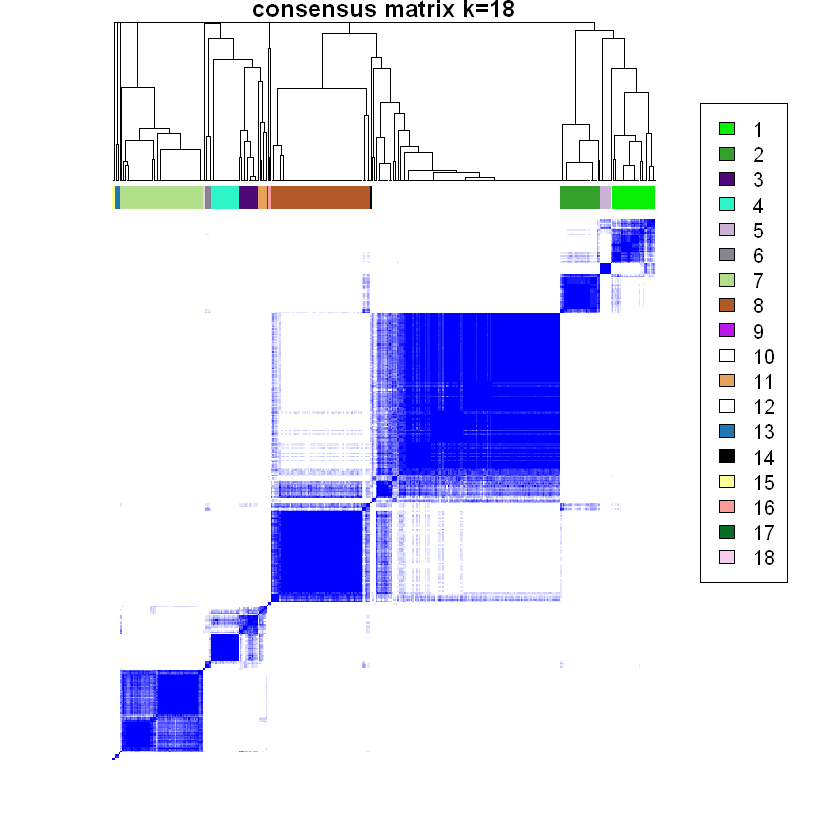

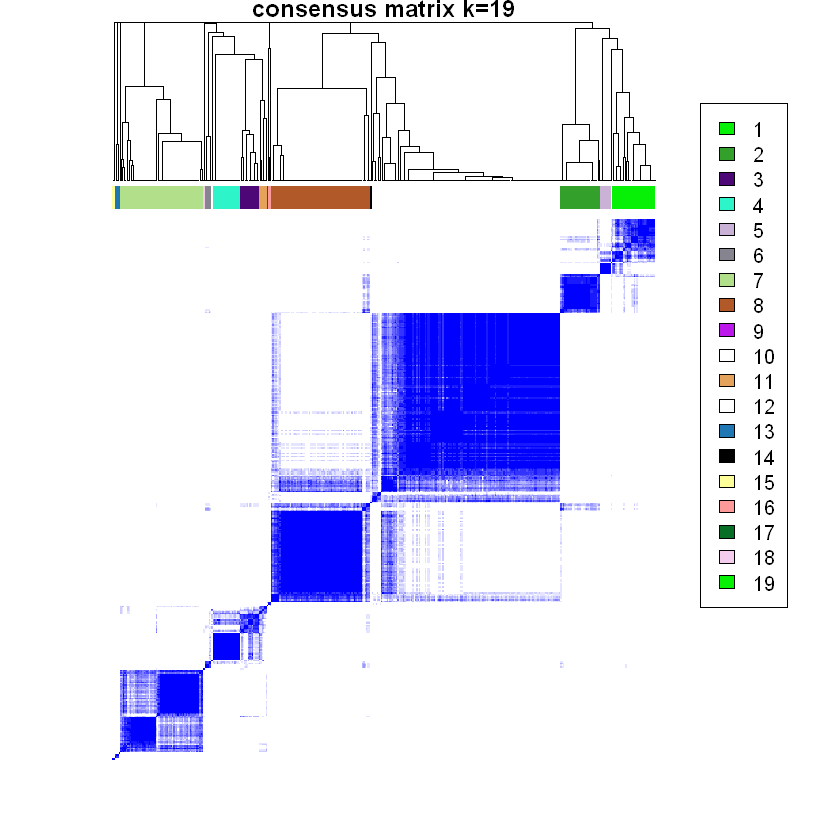

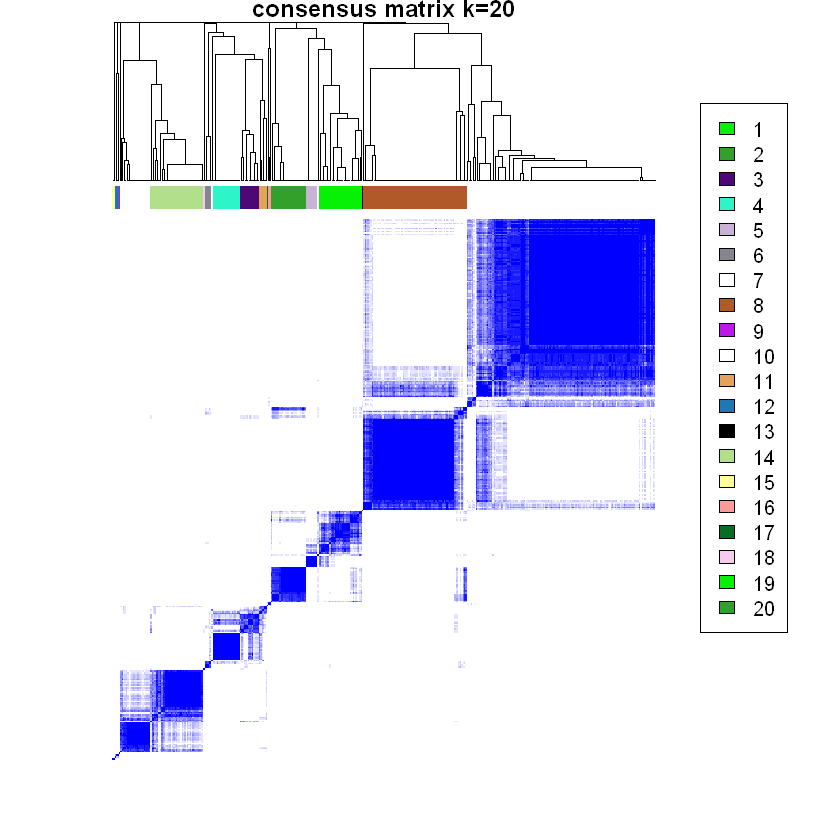

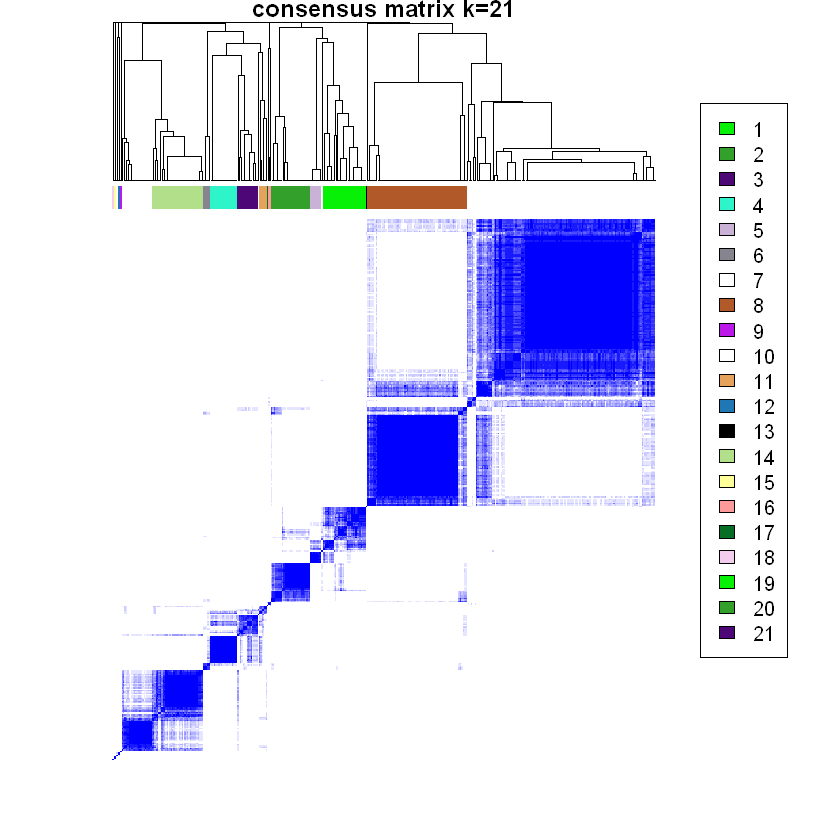

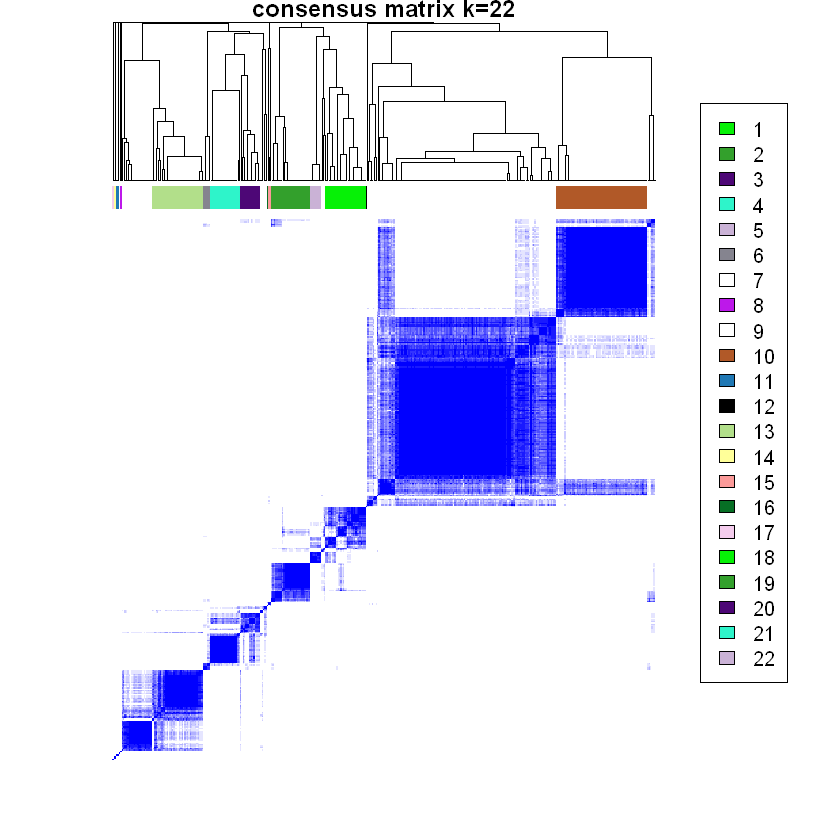

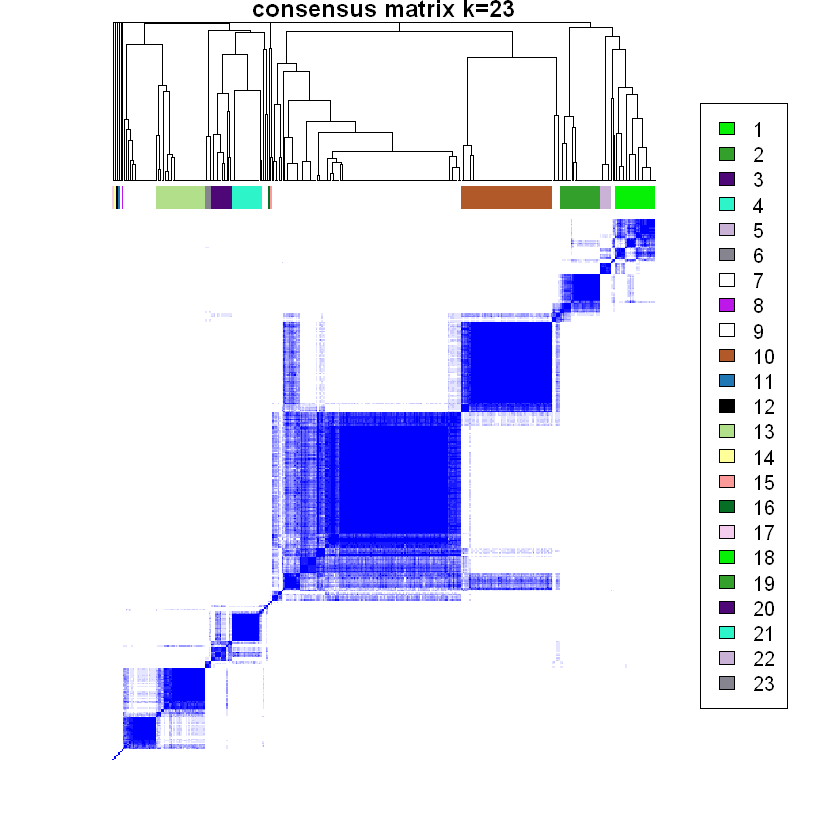

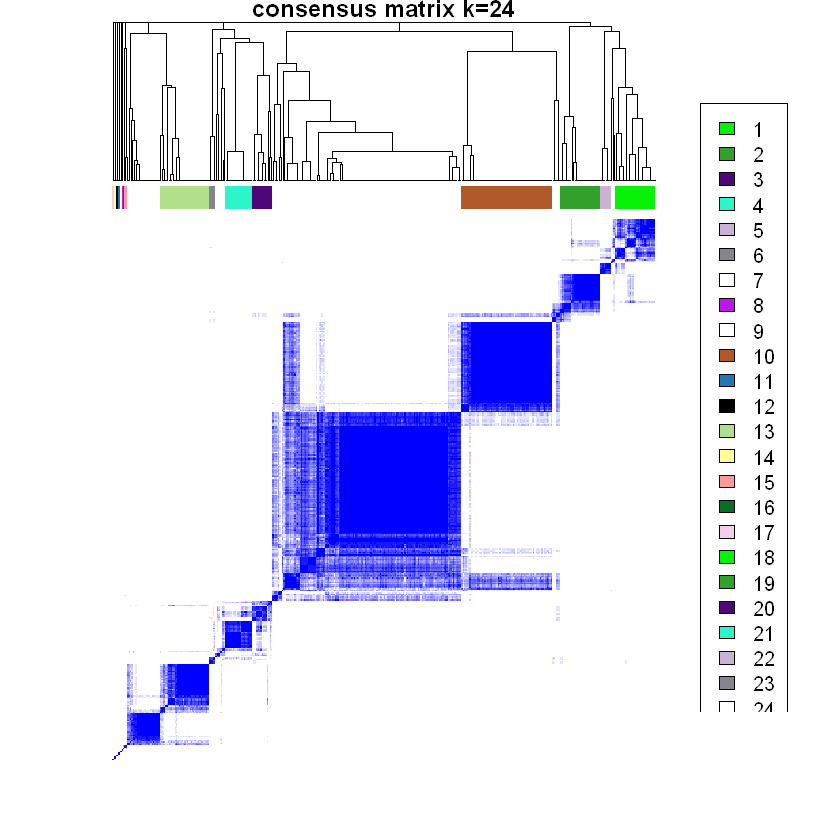

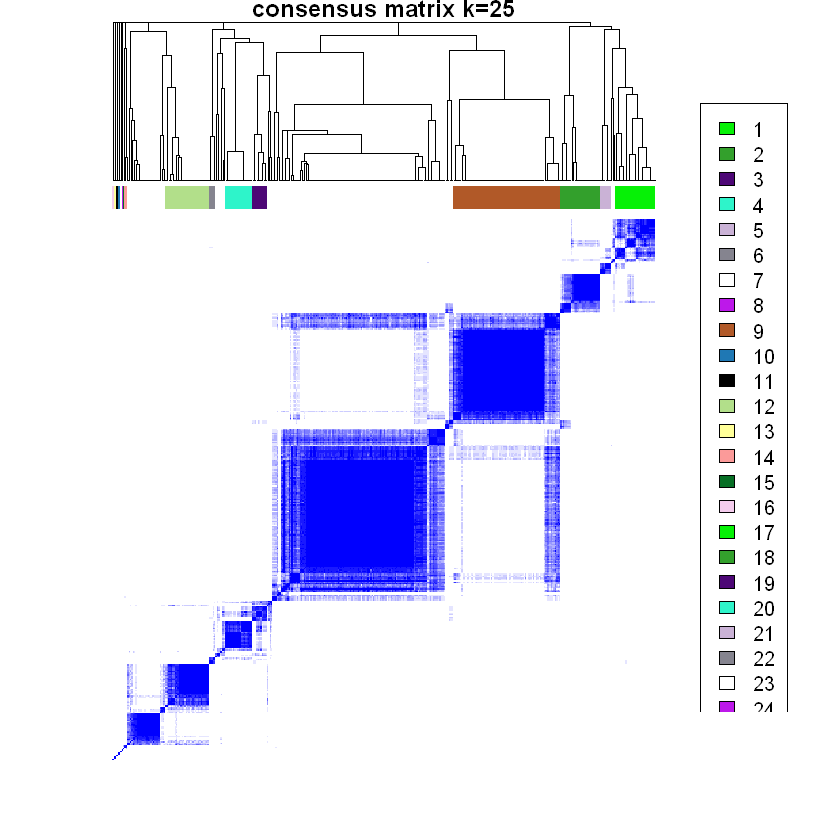

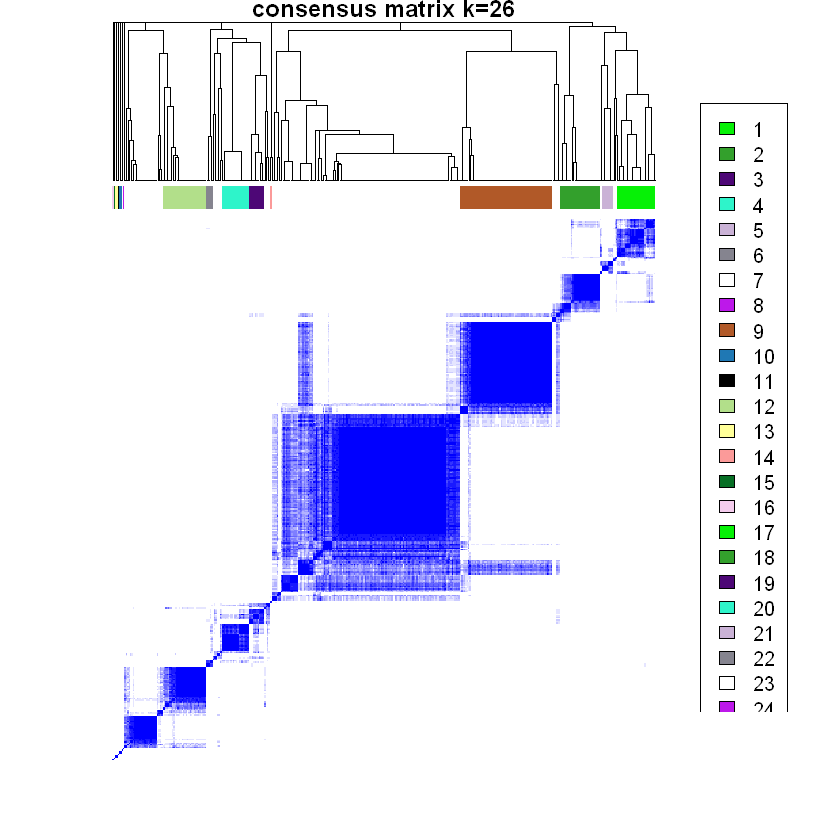

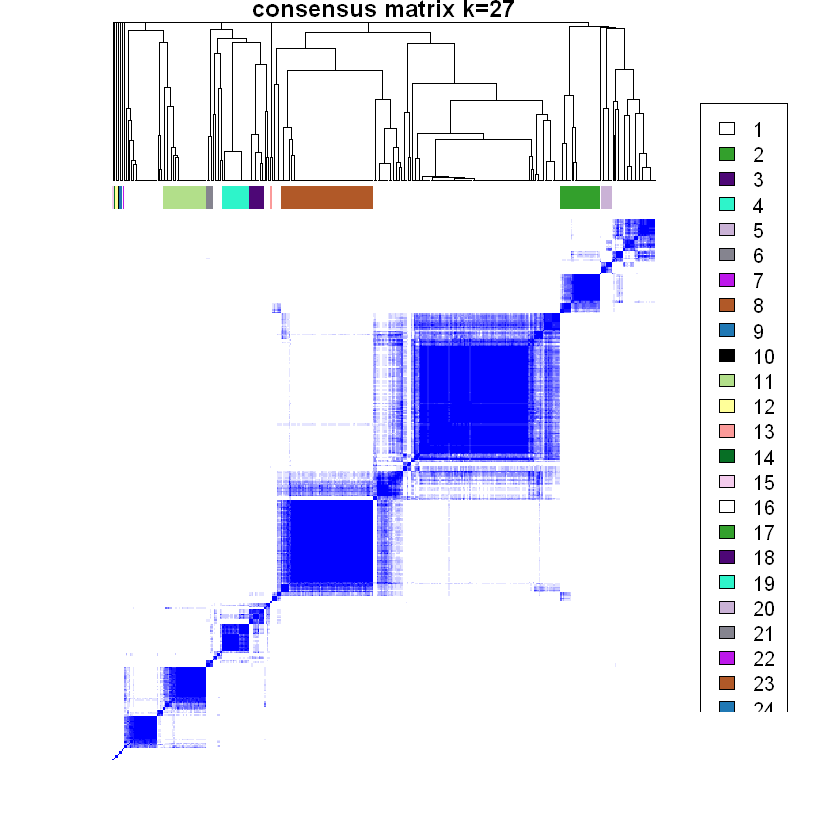

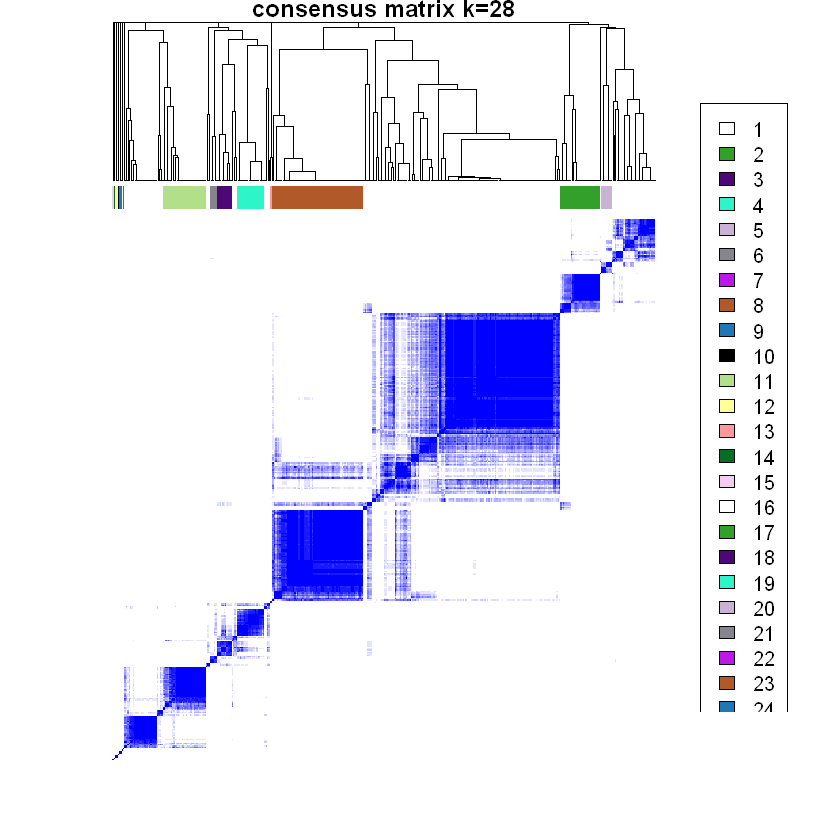

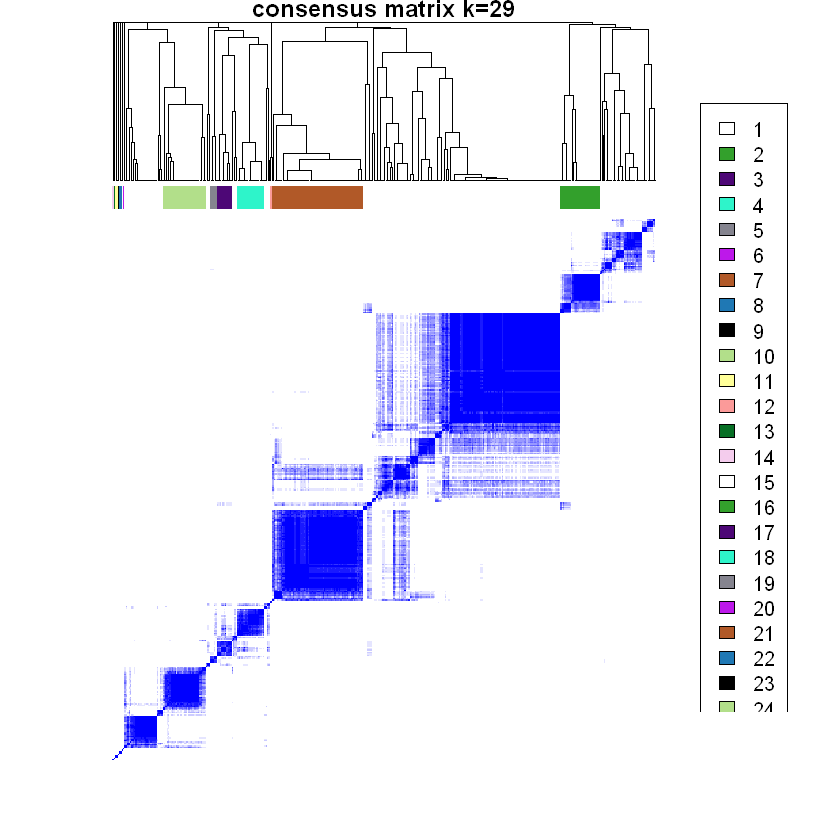

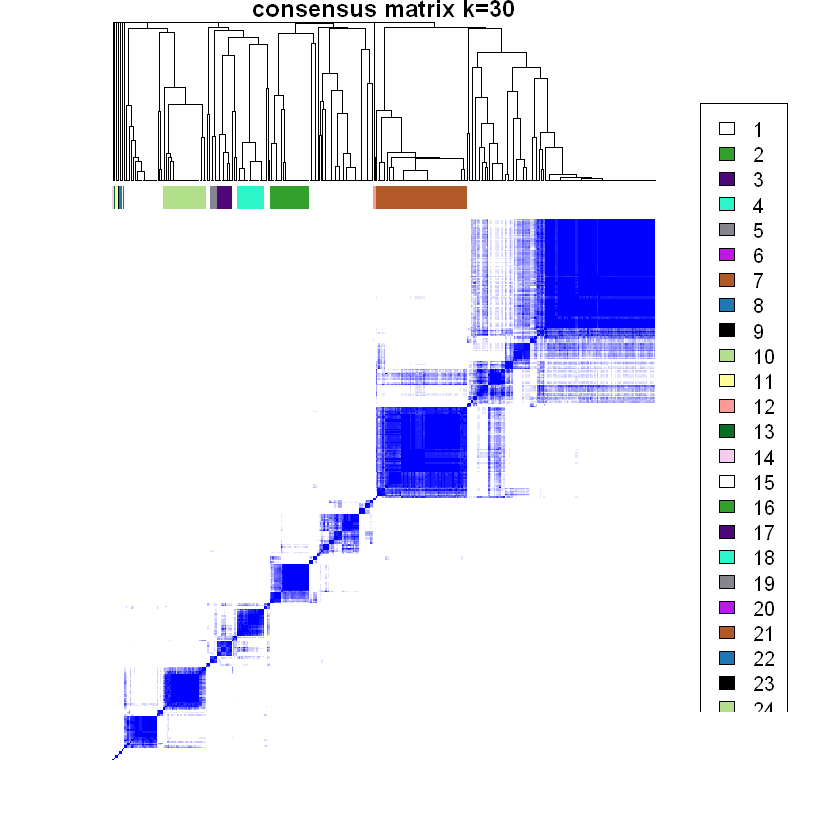

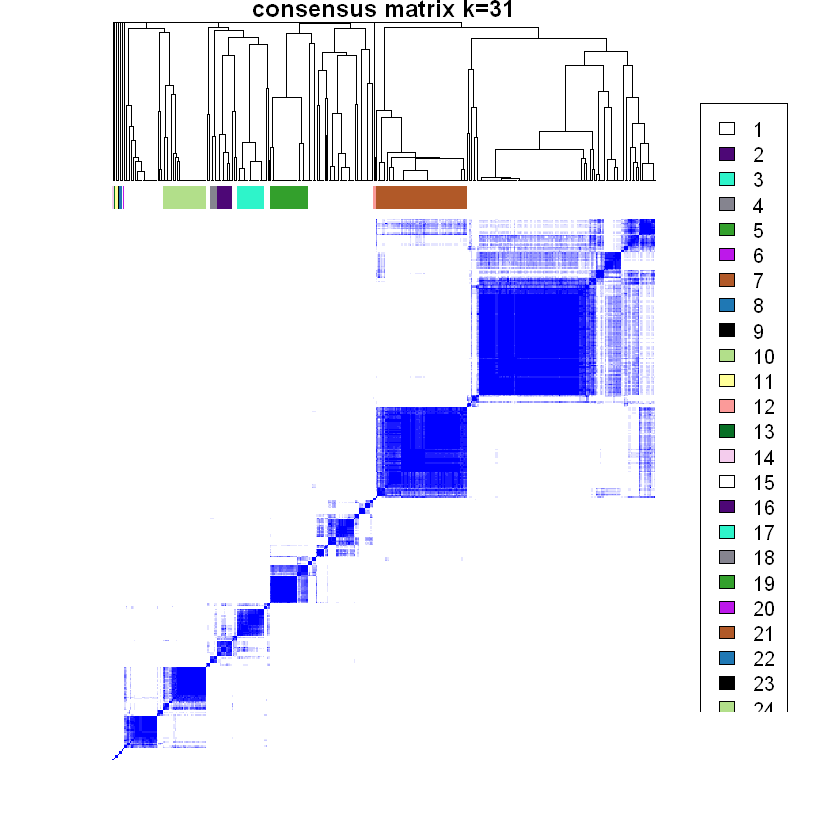

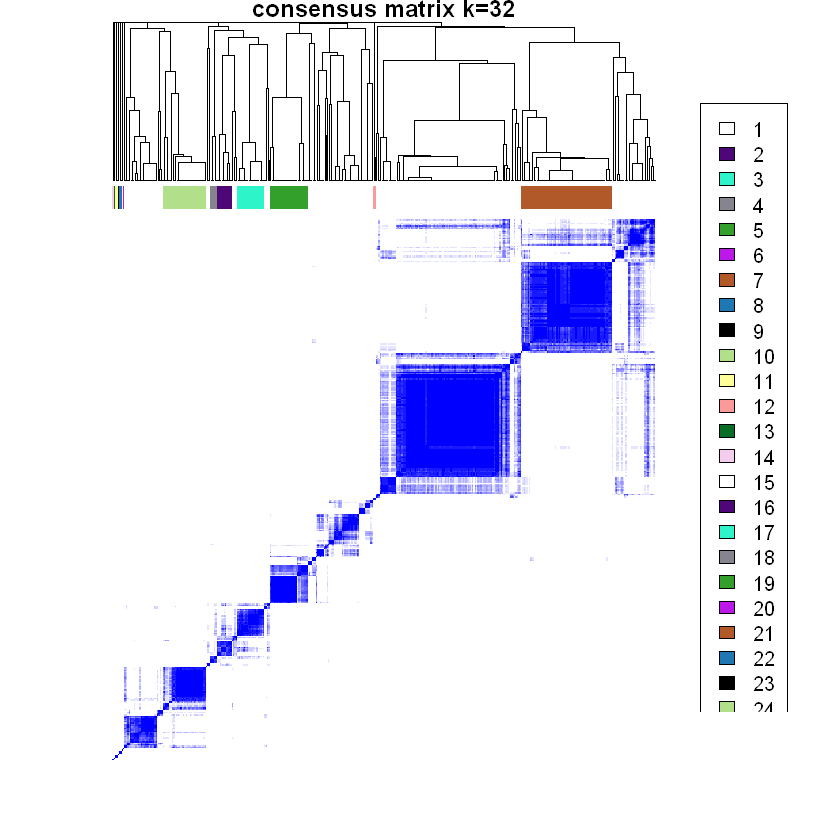

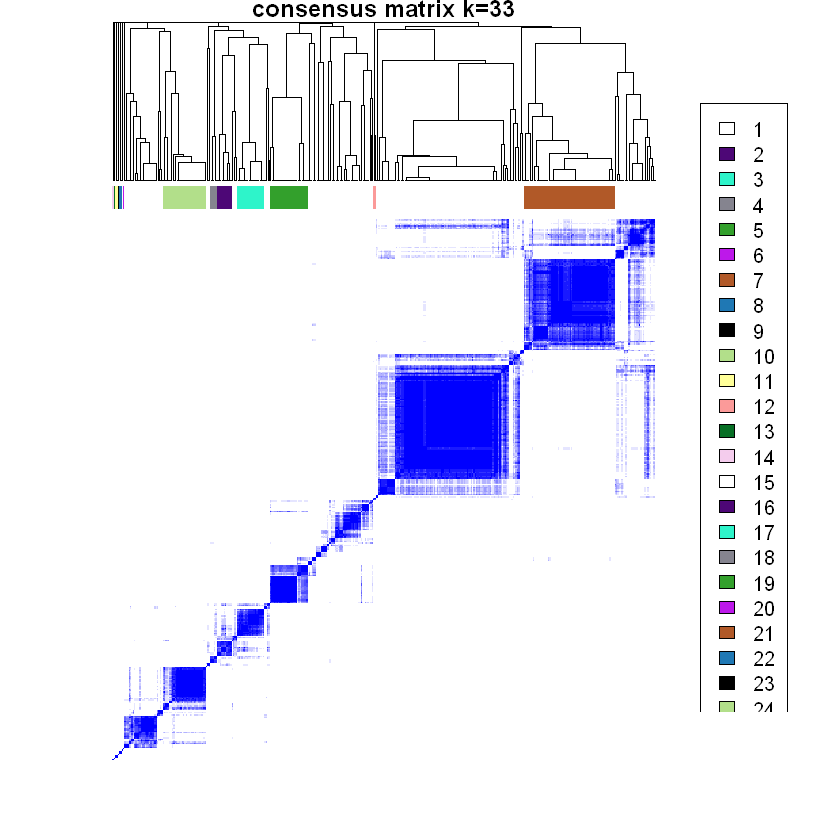

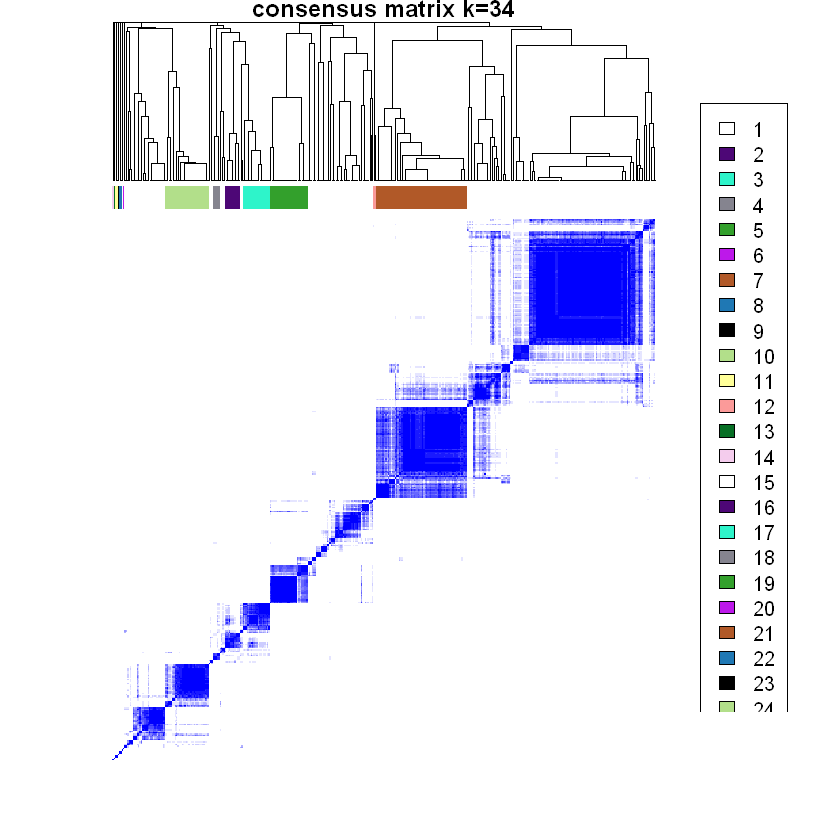

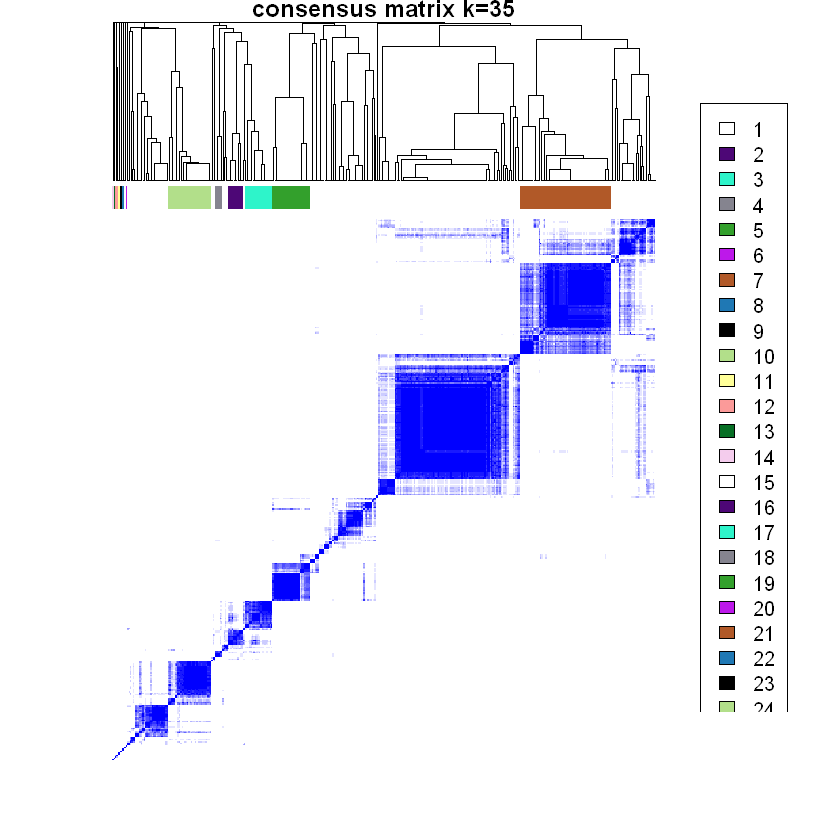

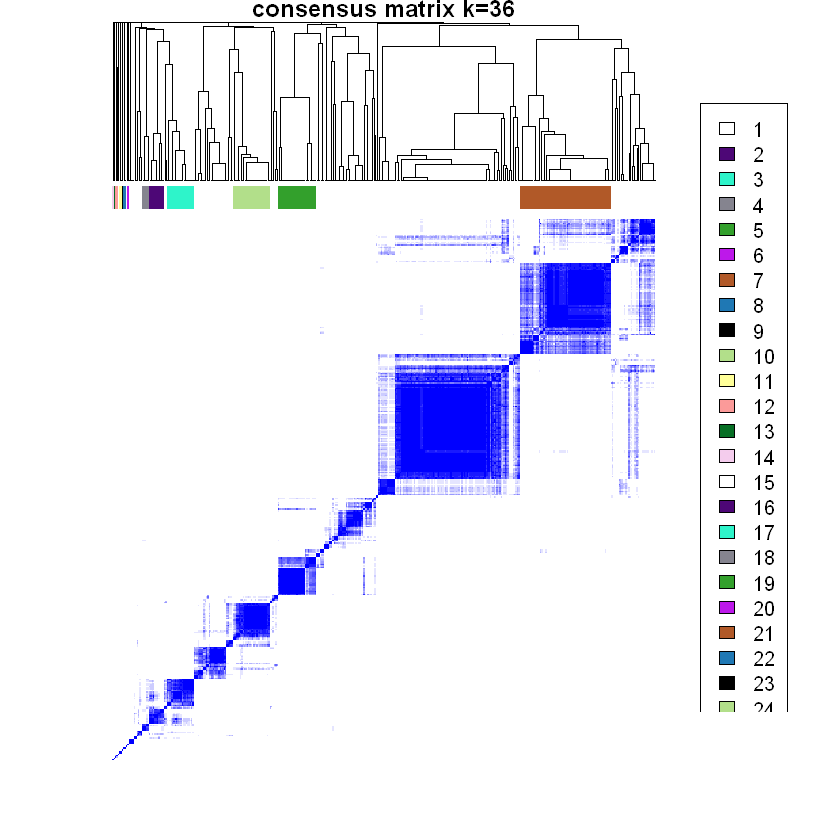

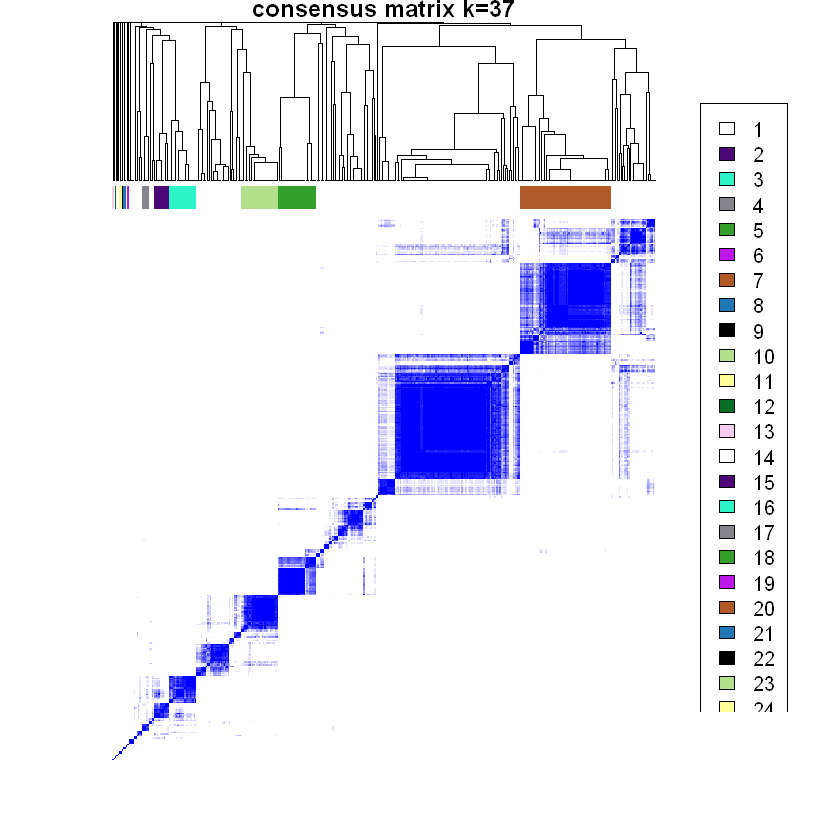

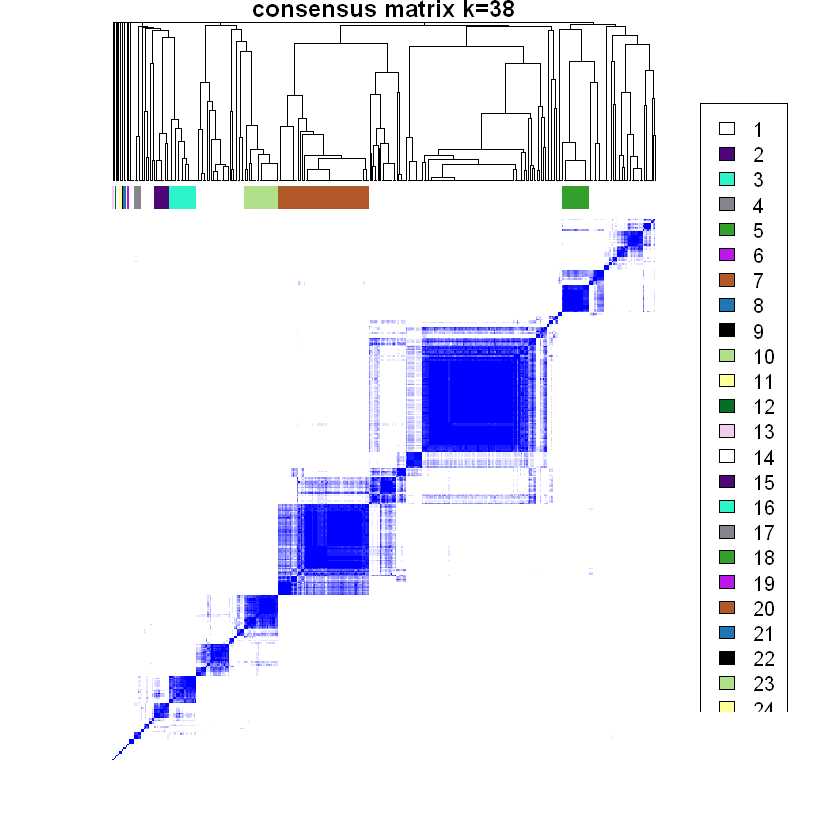

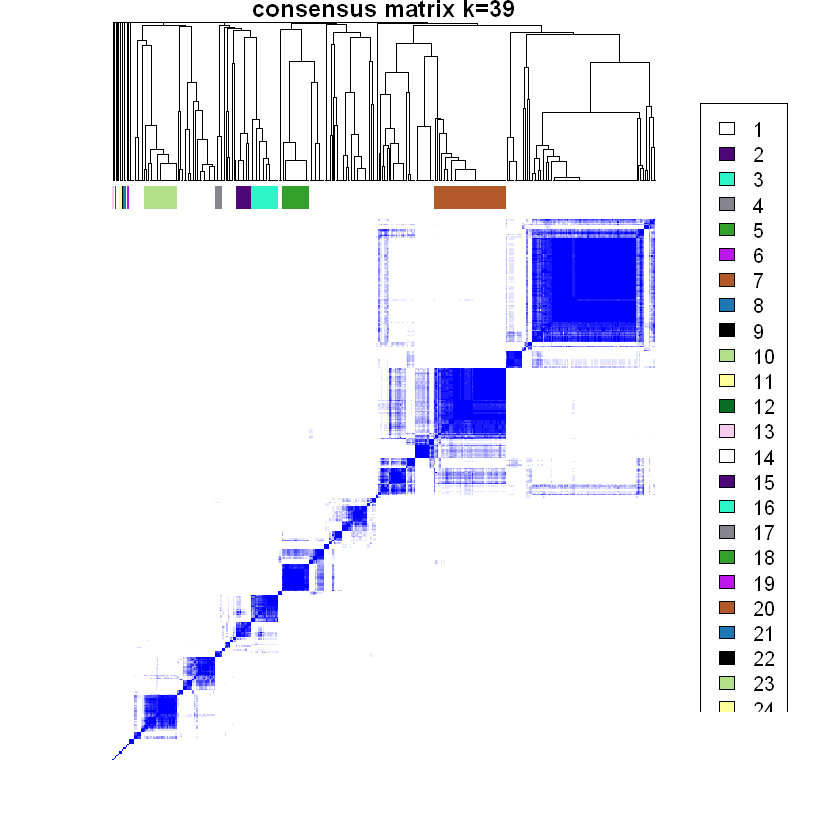

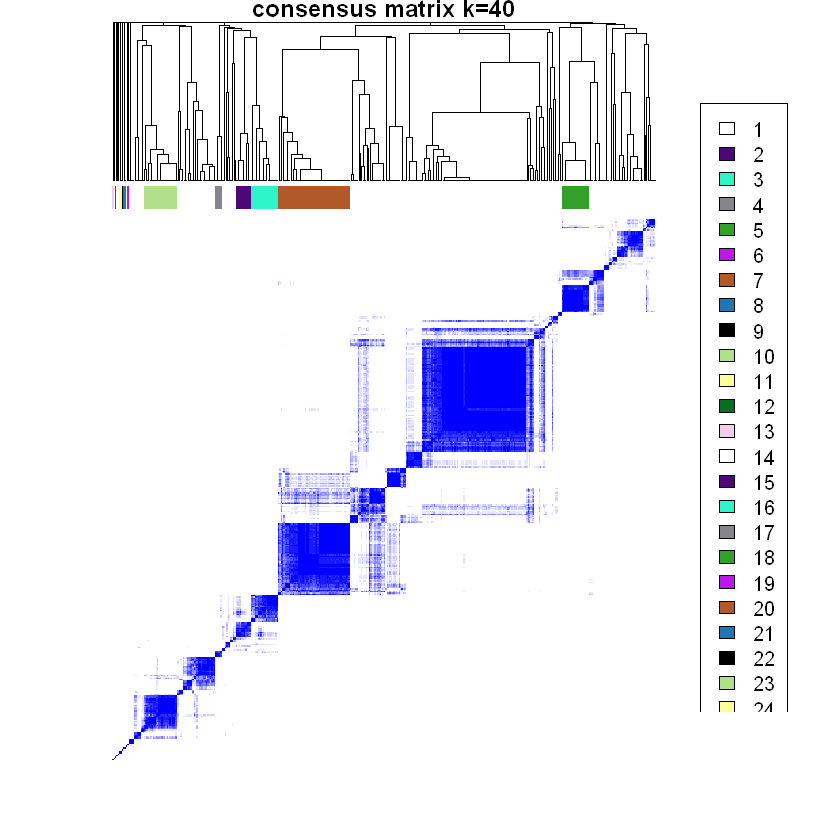

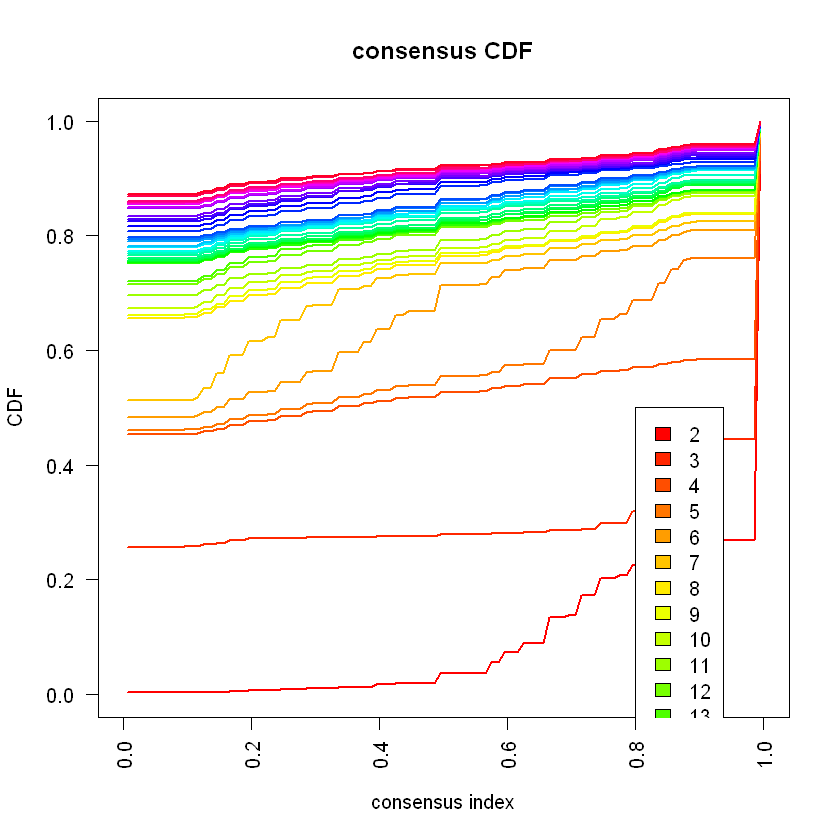

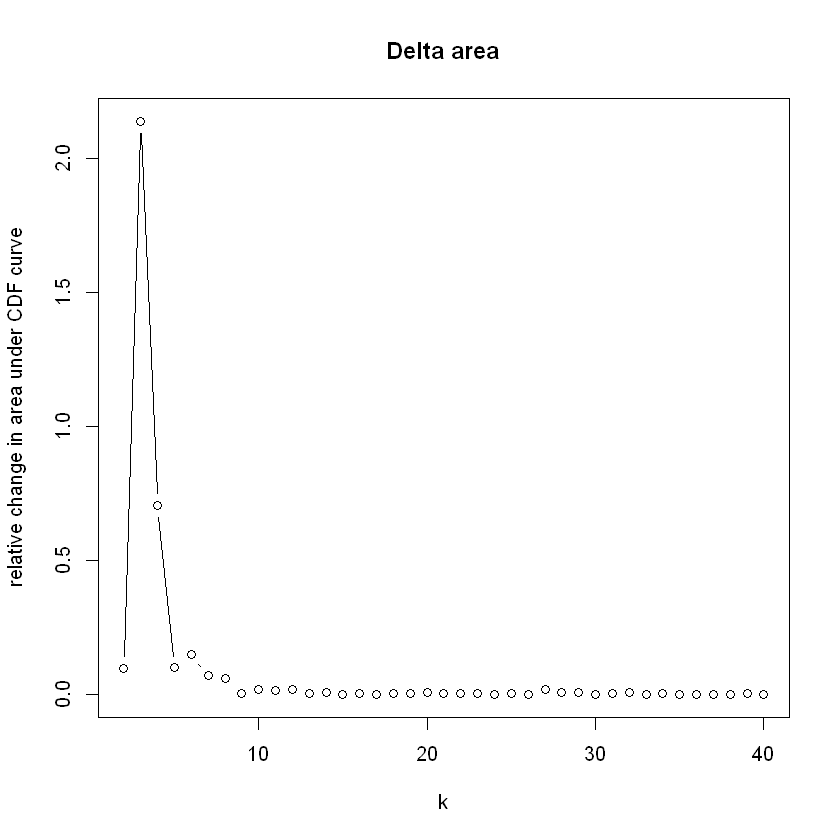

data set Mosmann_rare : run complete


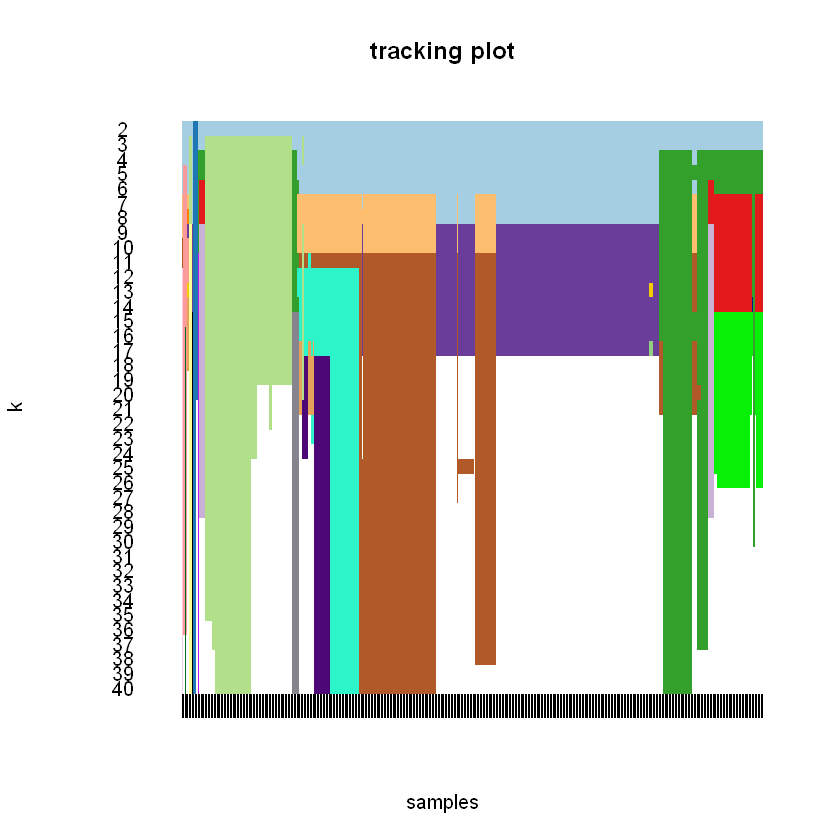

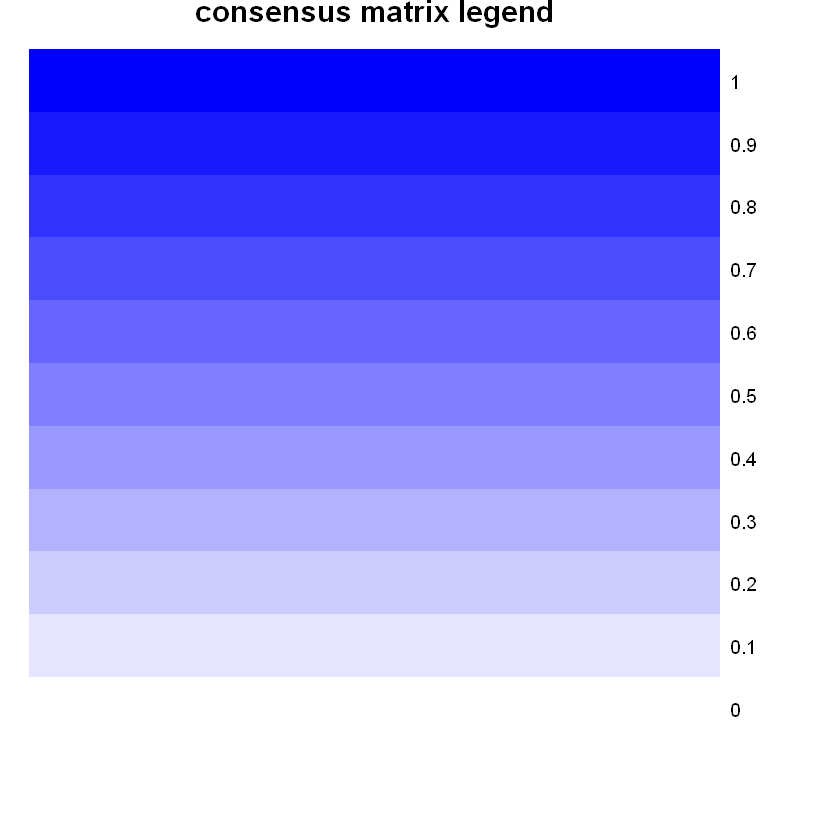

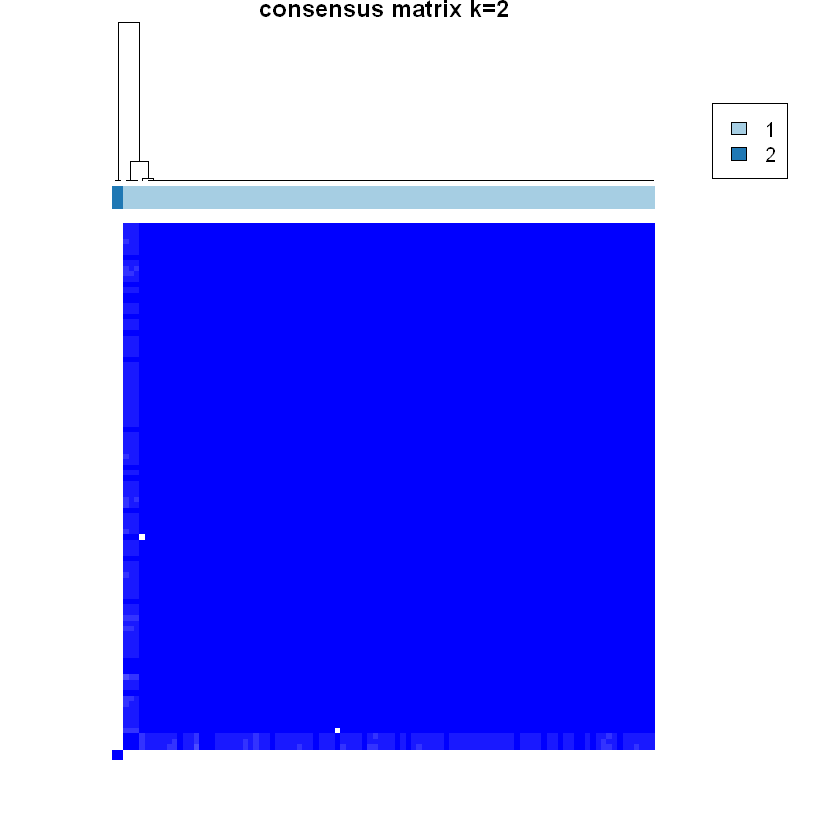

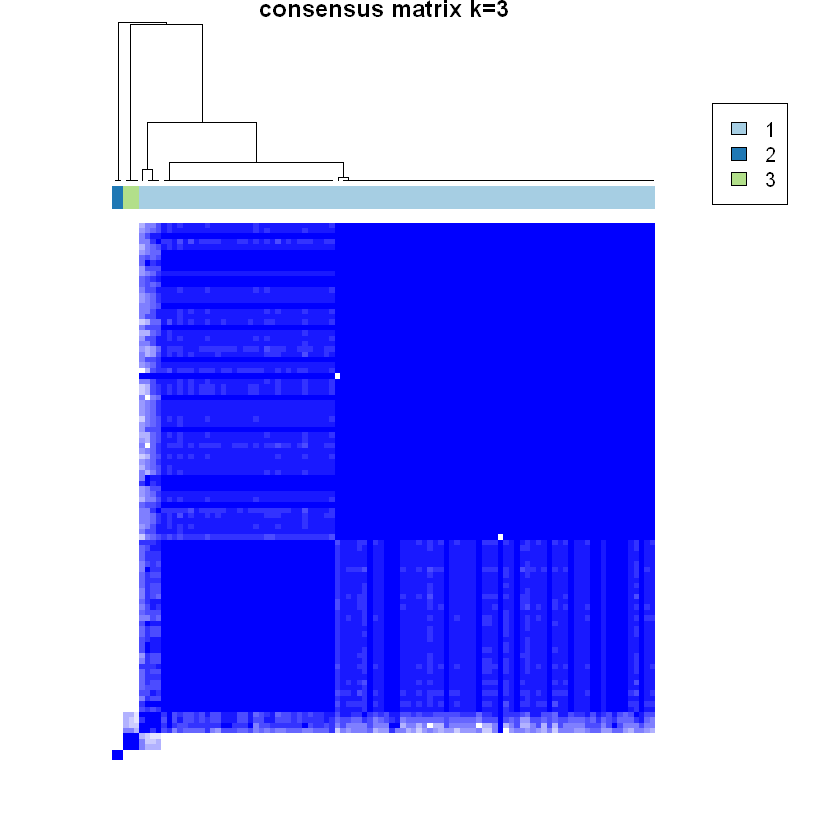

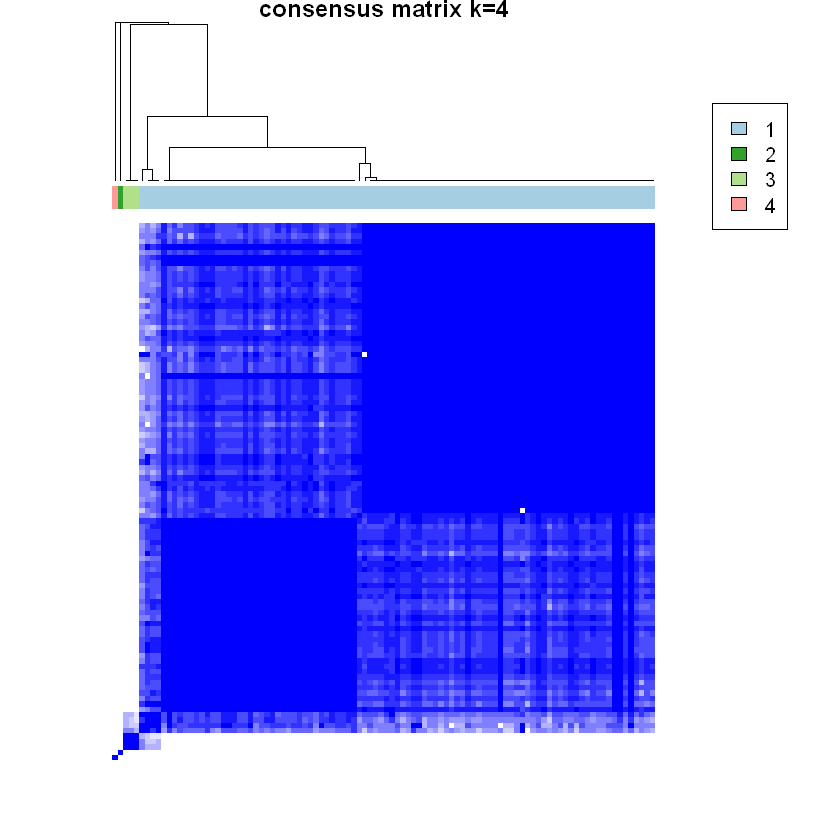

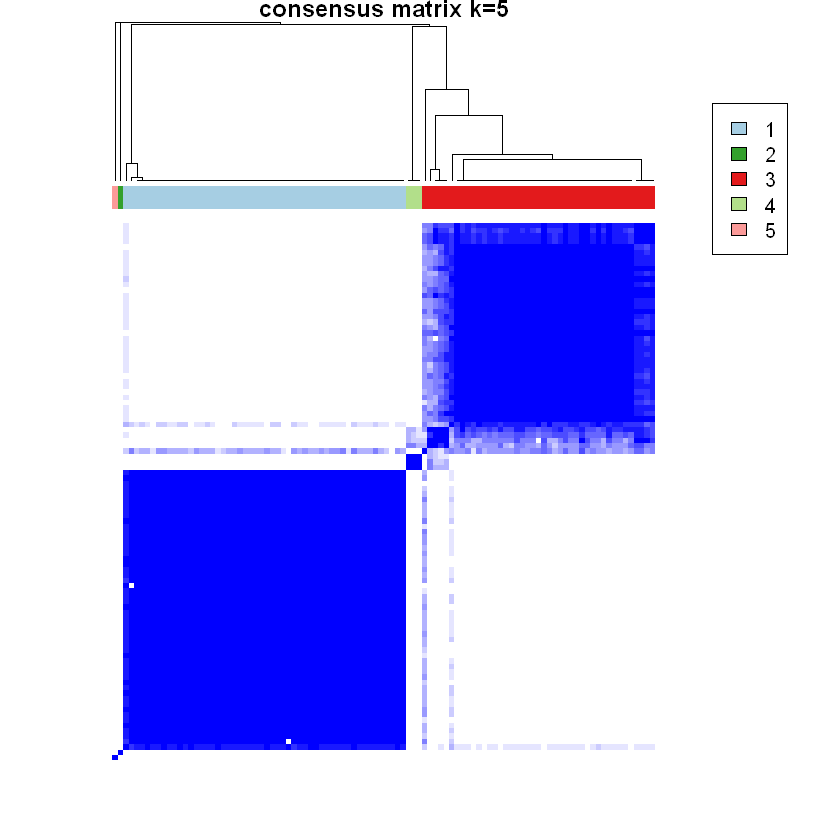

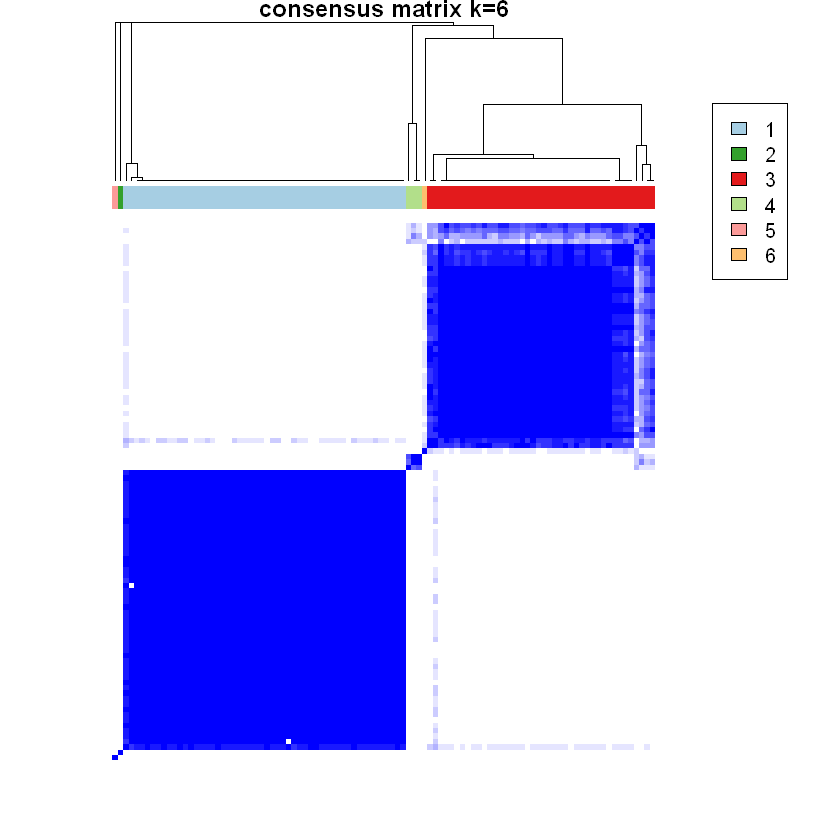

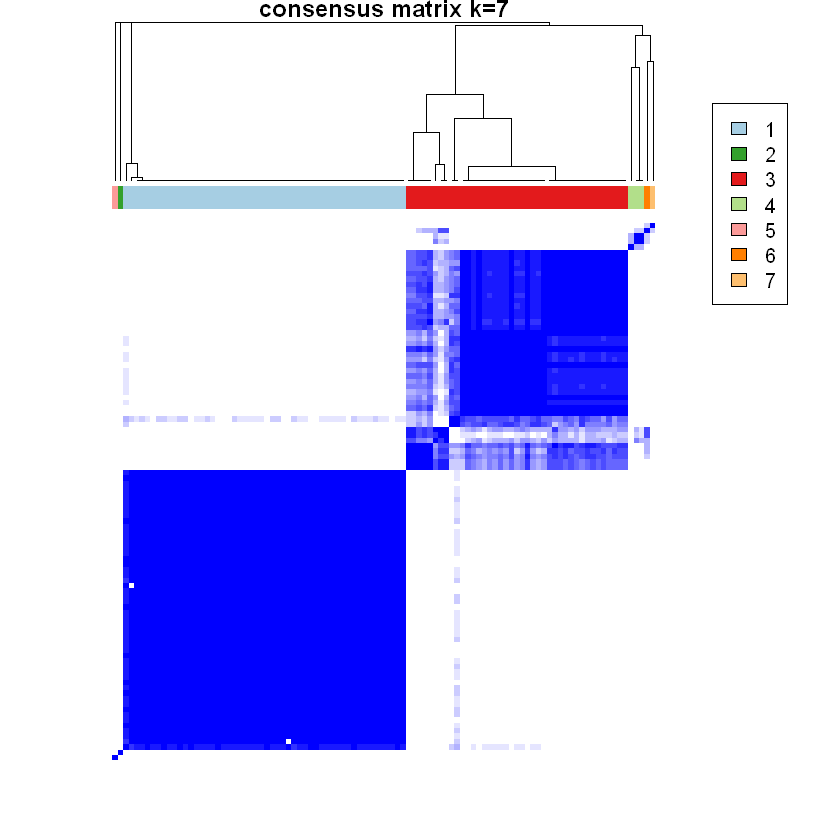

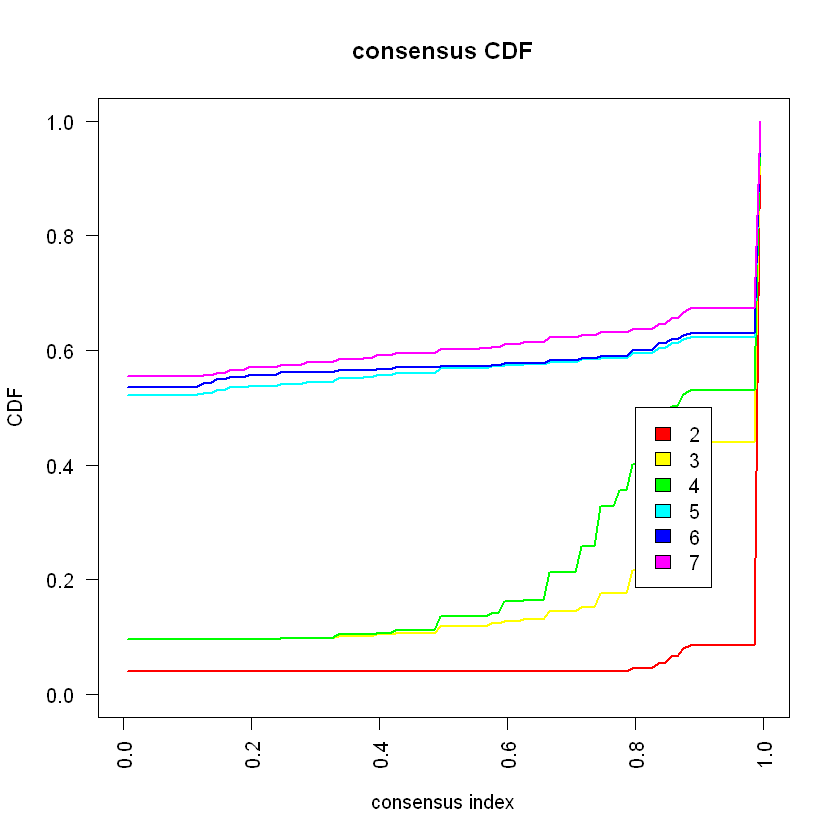

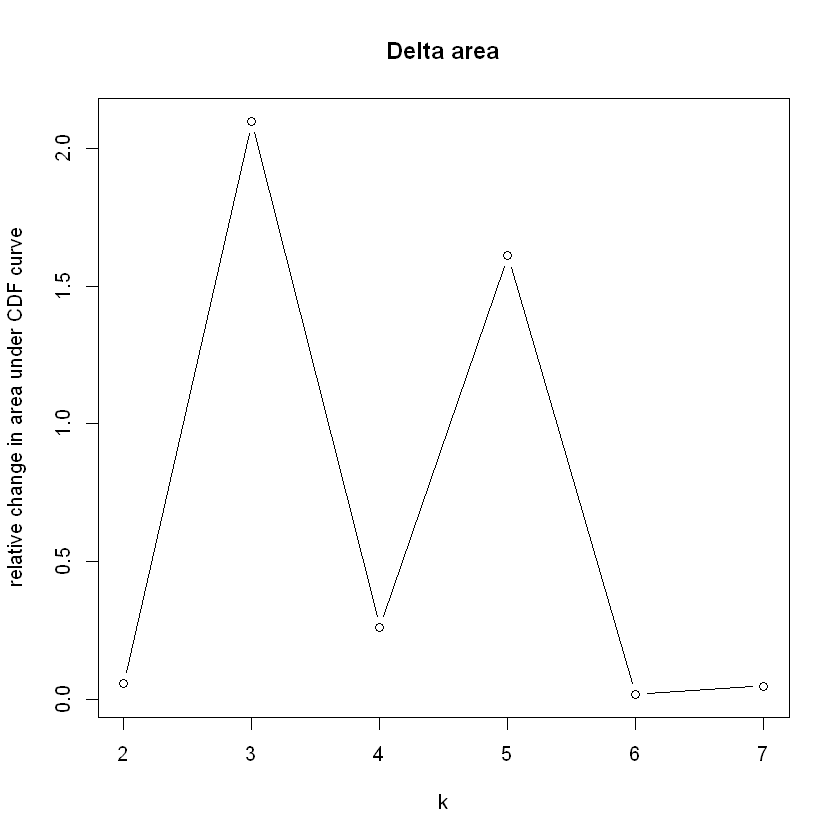

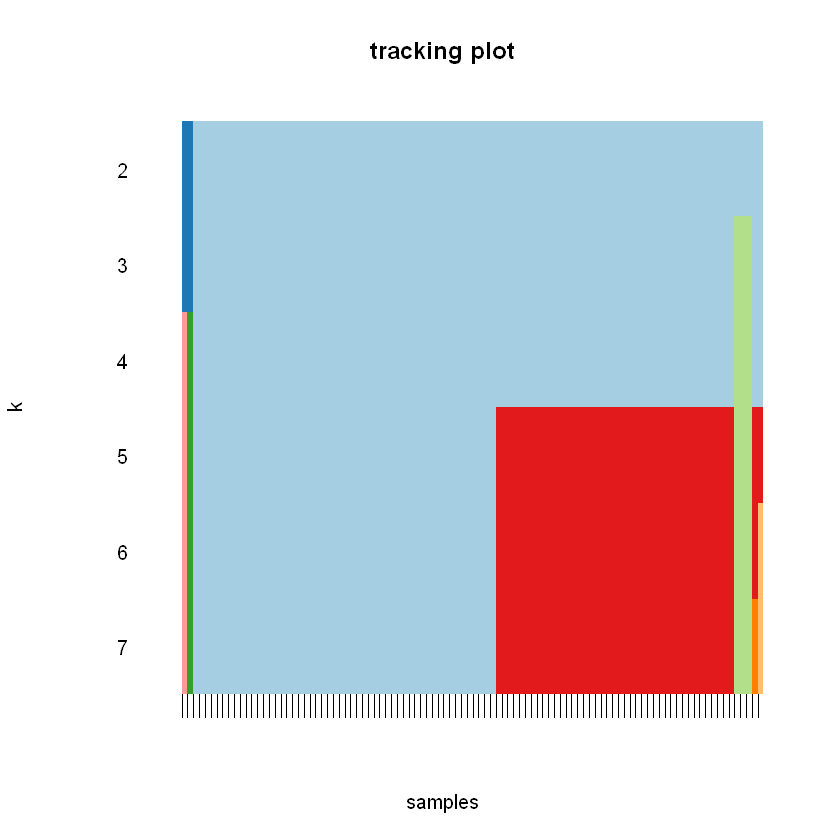

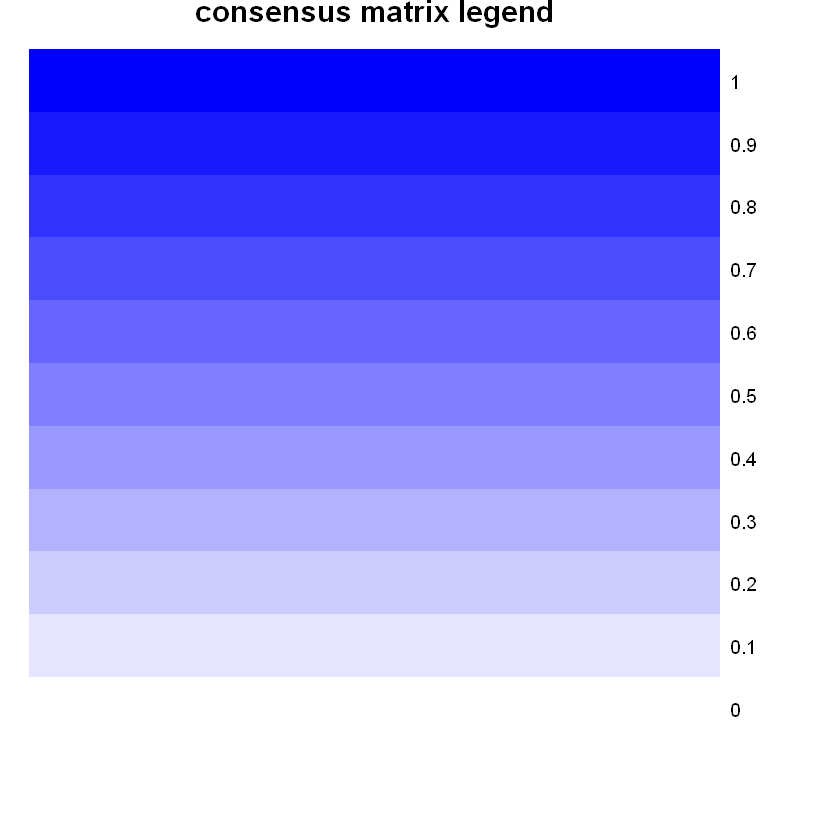

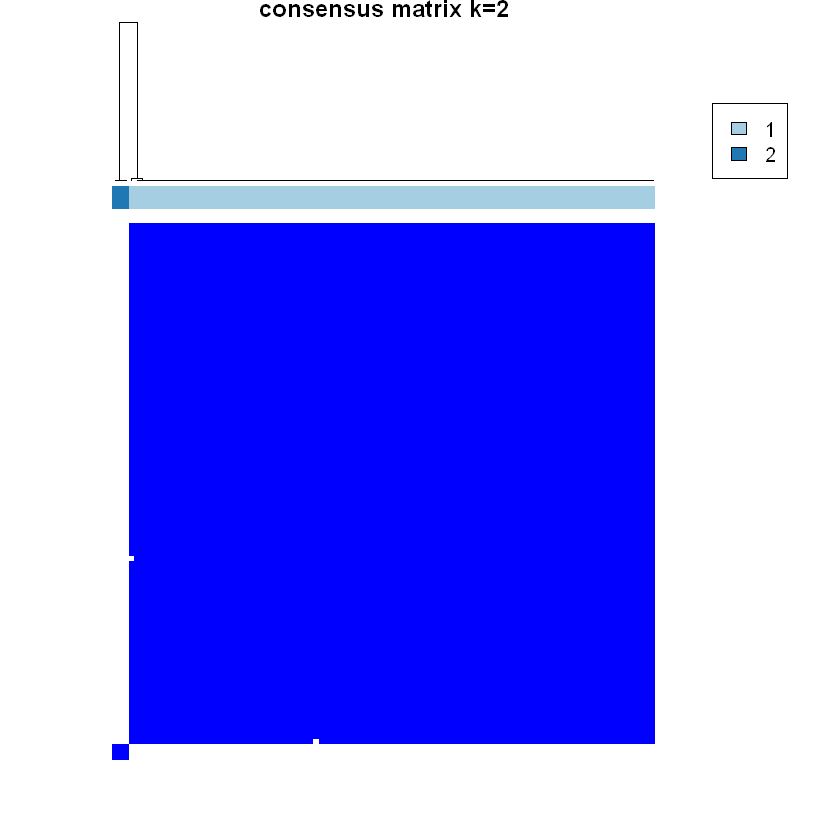

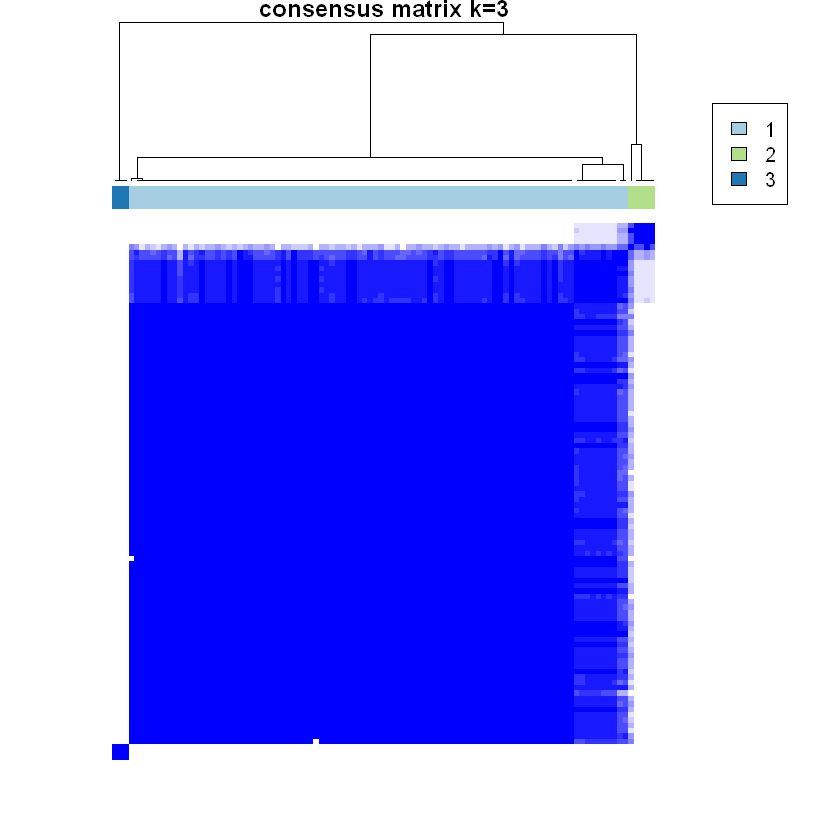

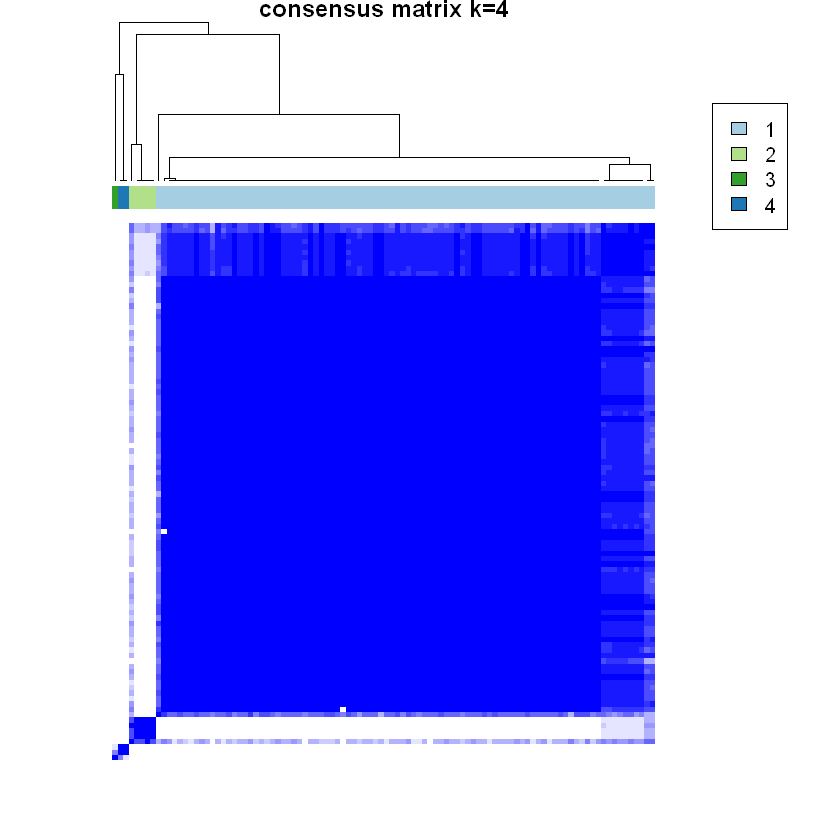

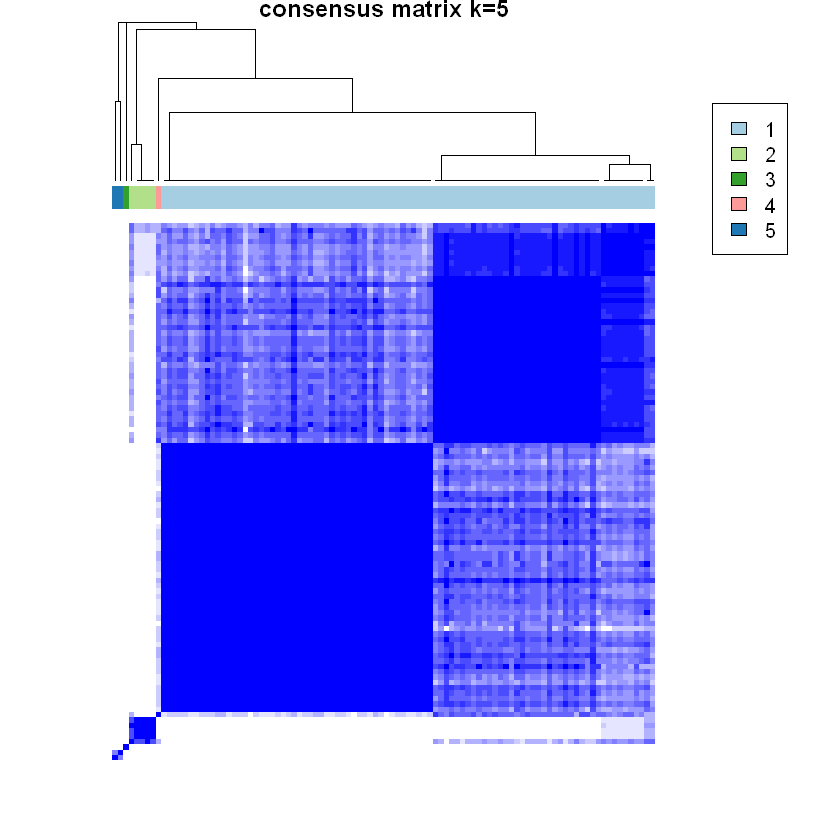

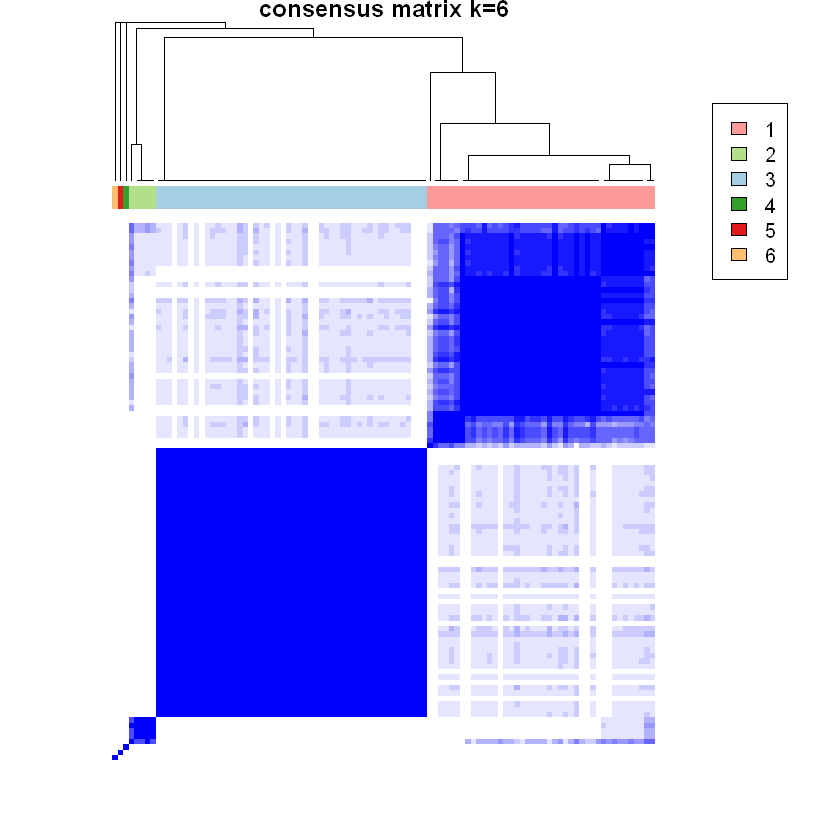

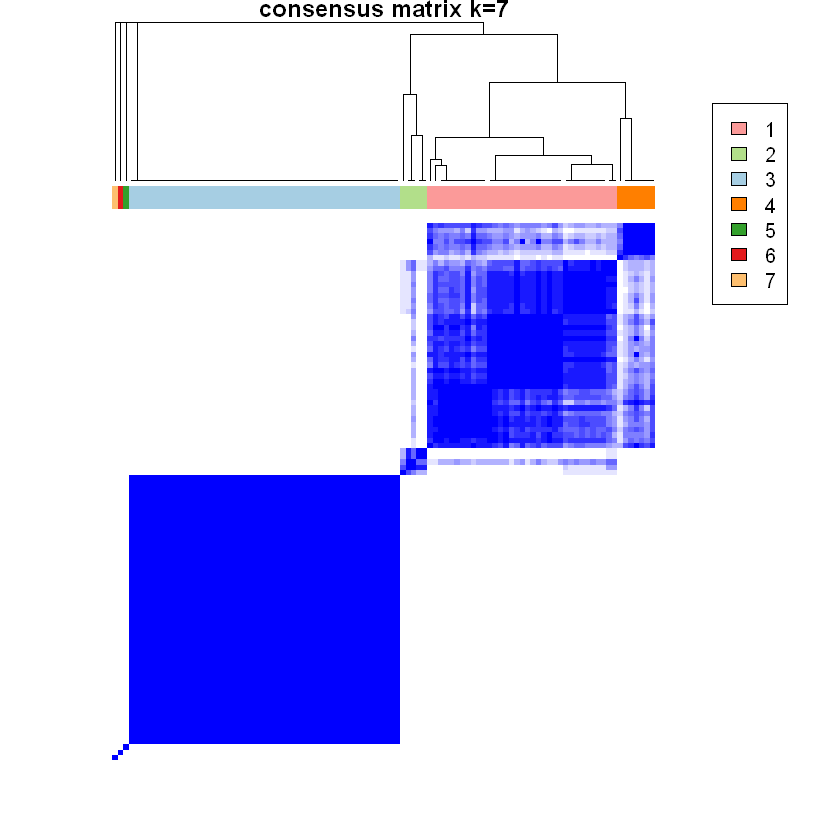

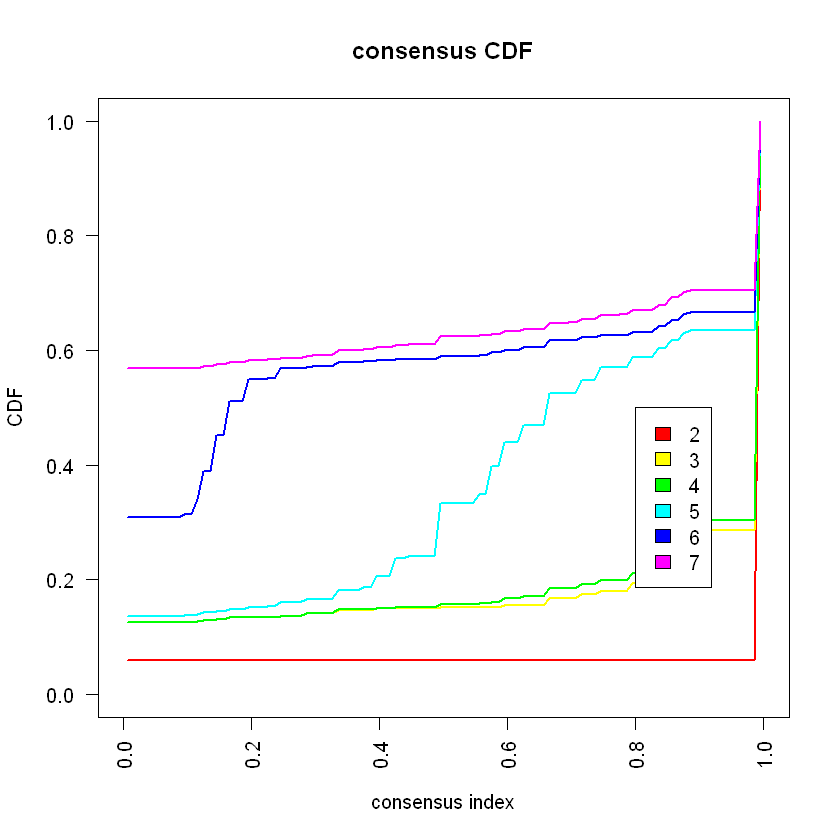

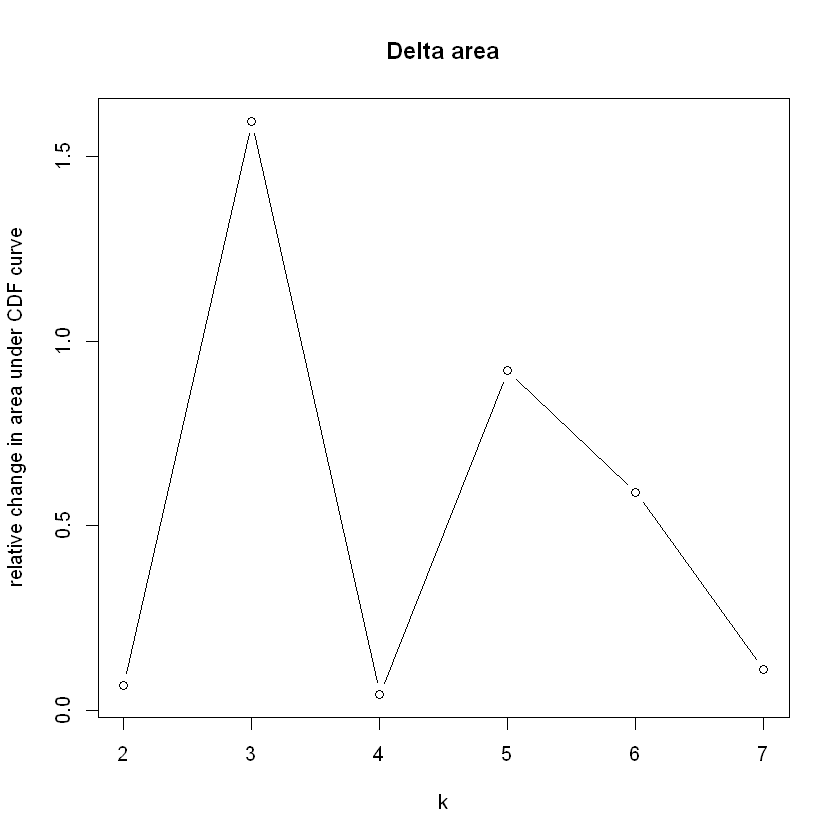

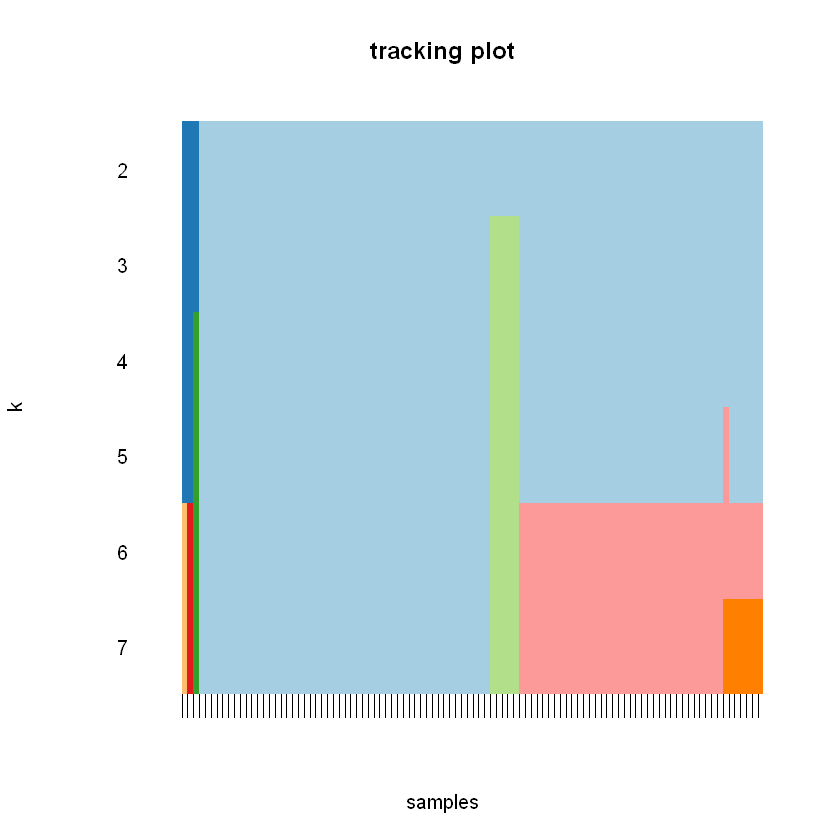

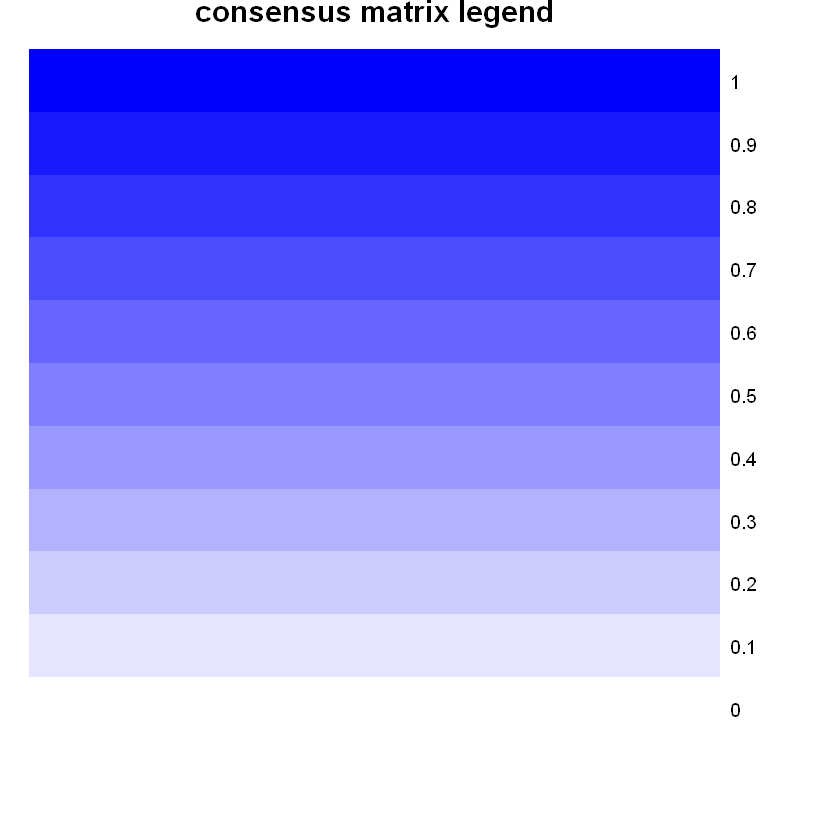

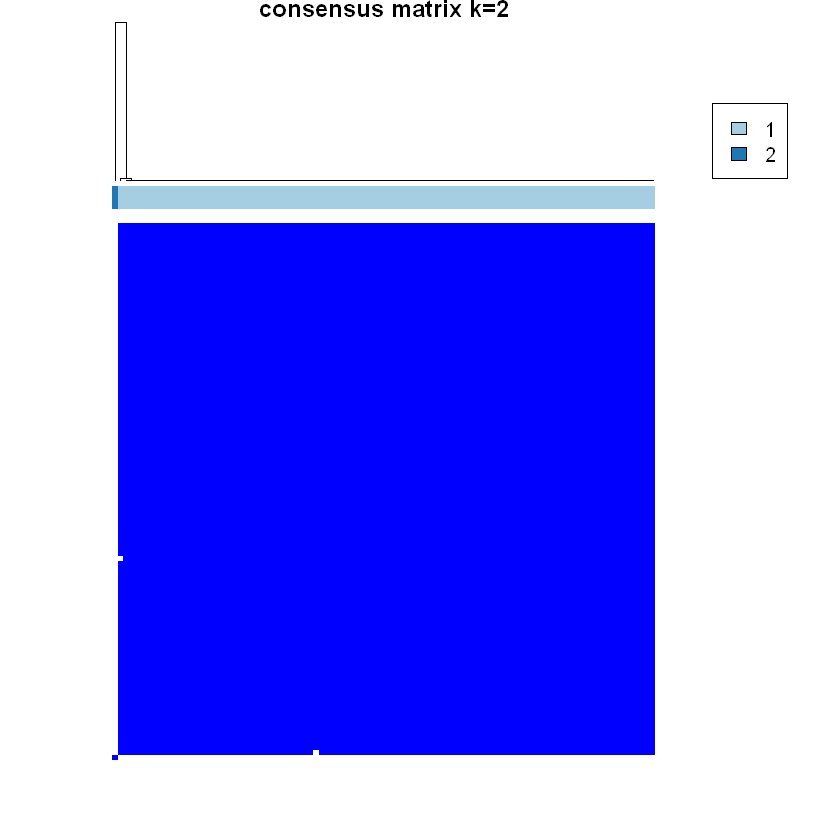

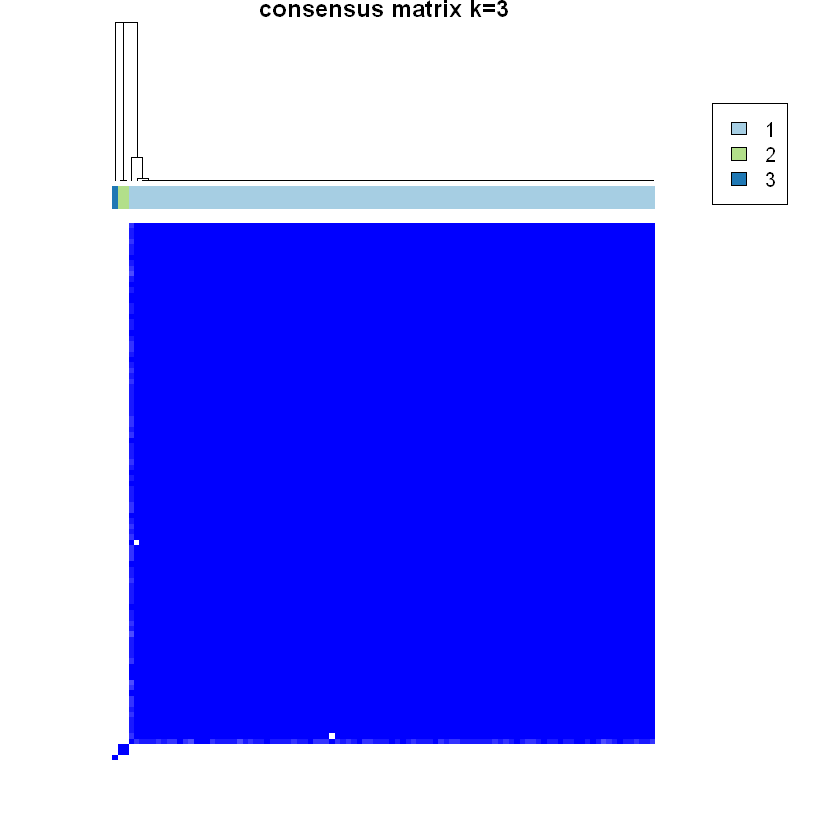

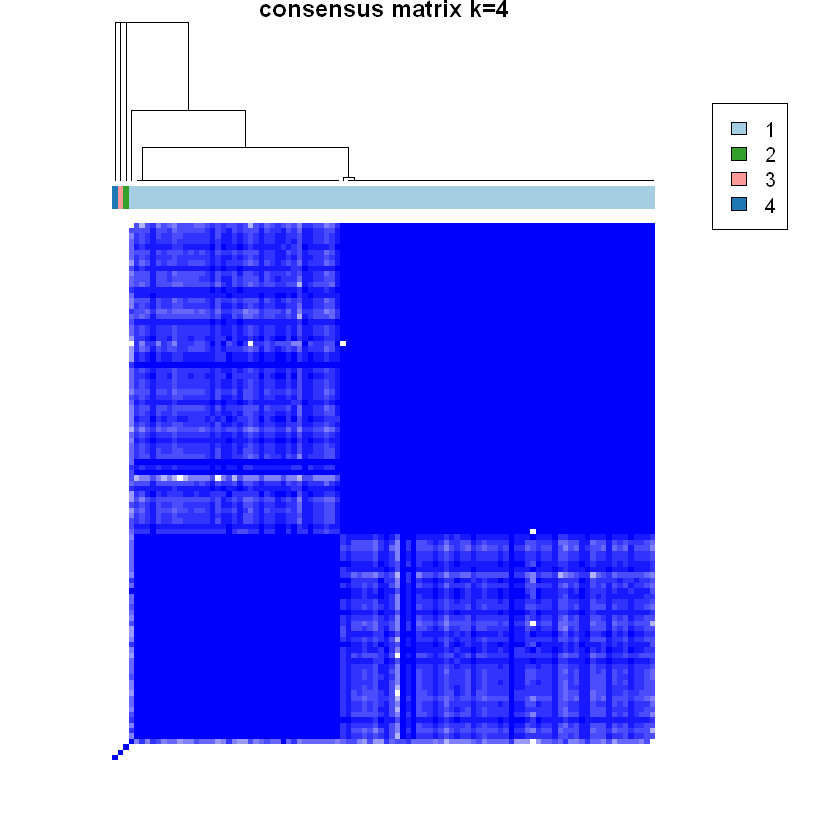

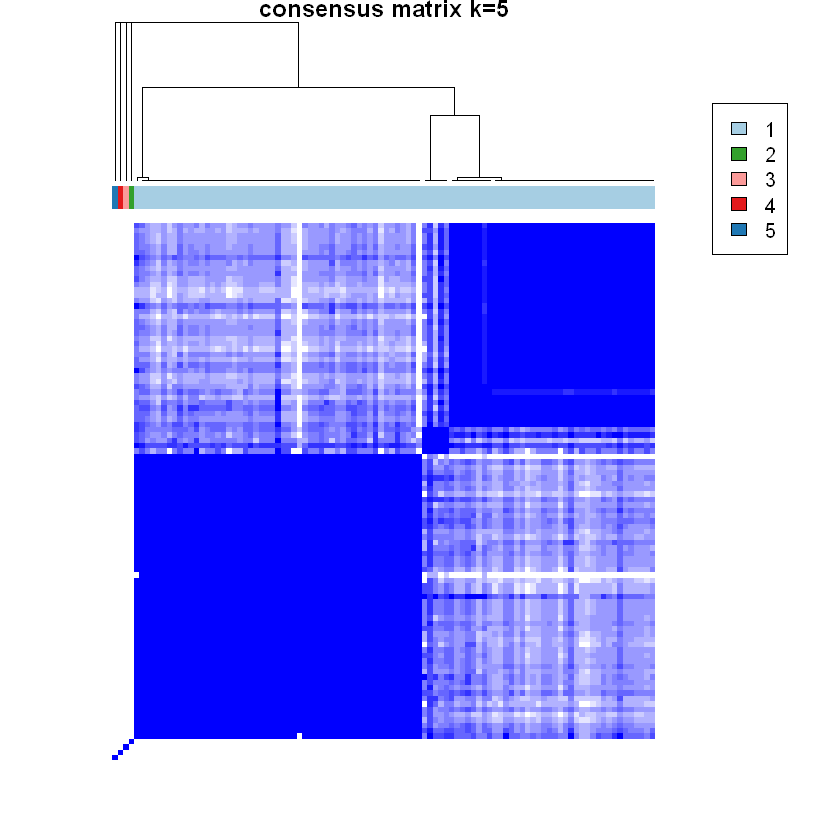

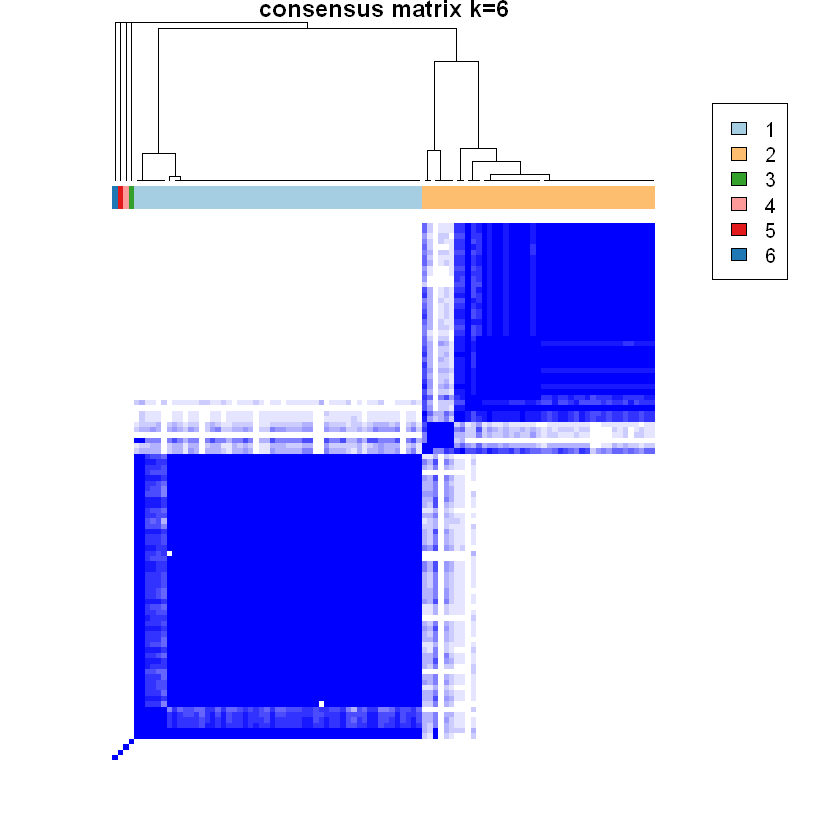

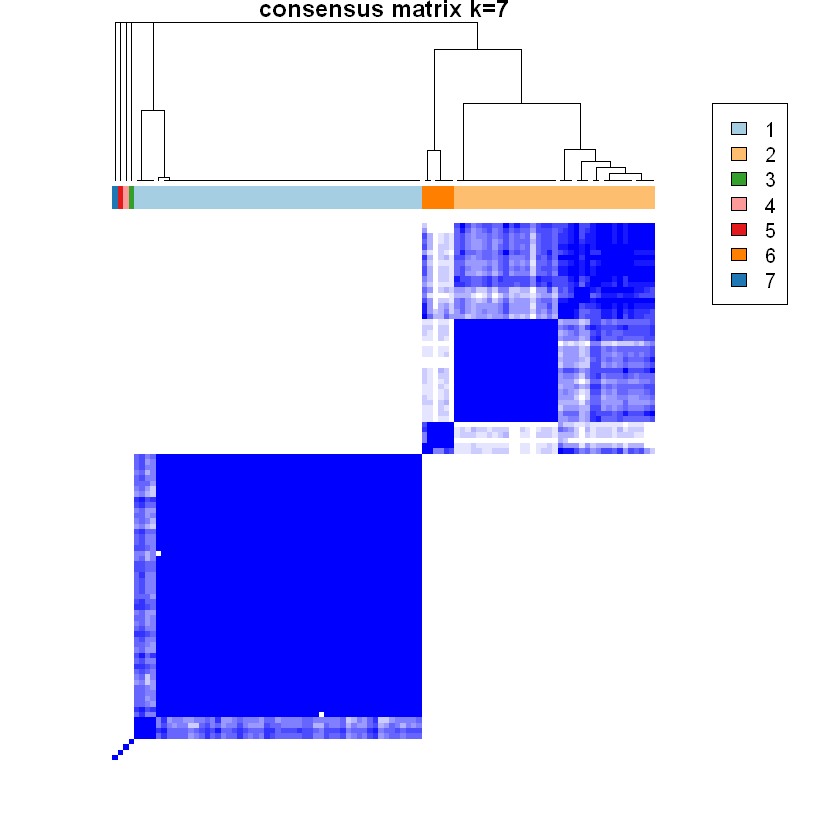

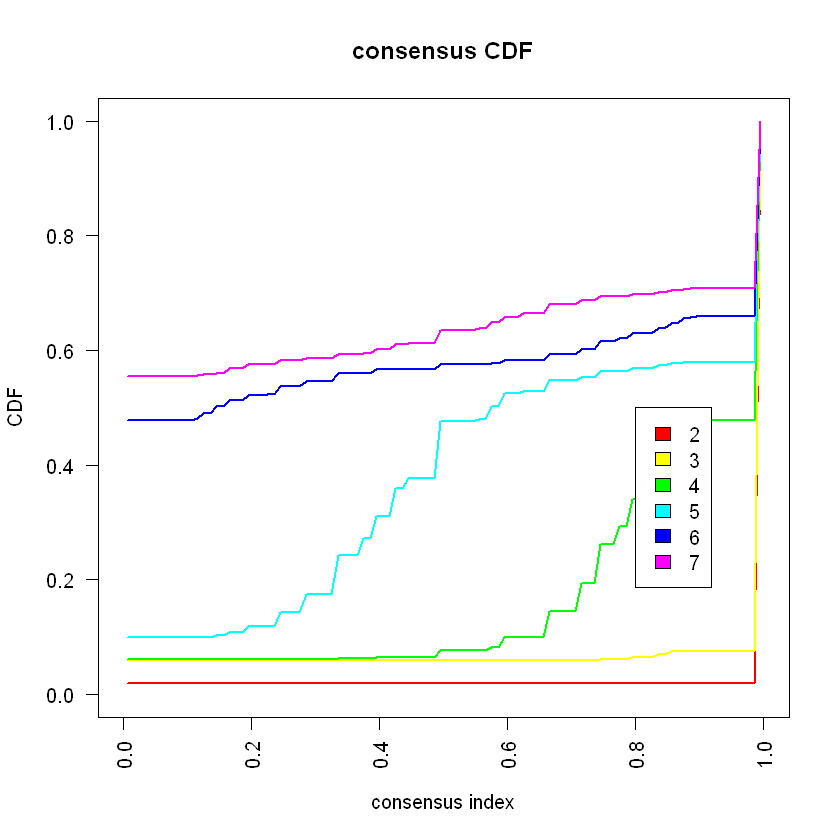

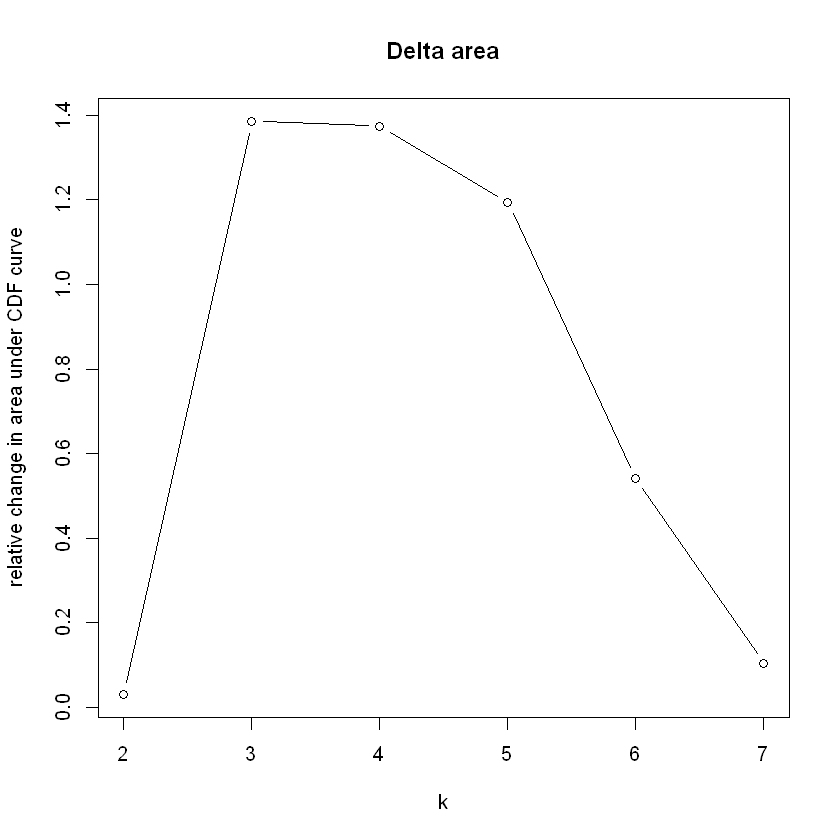

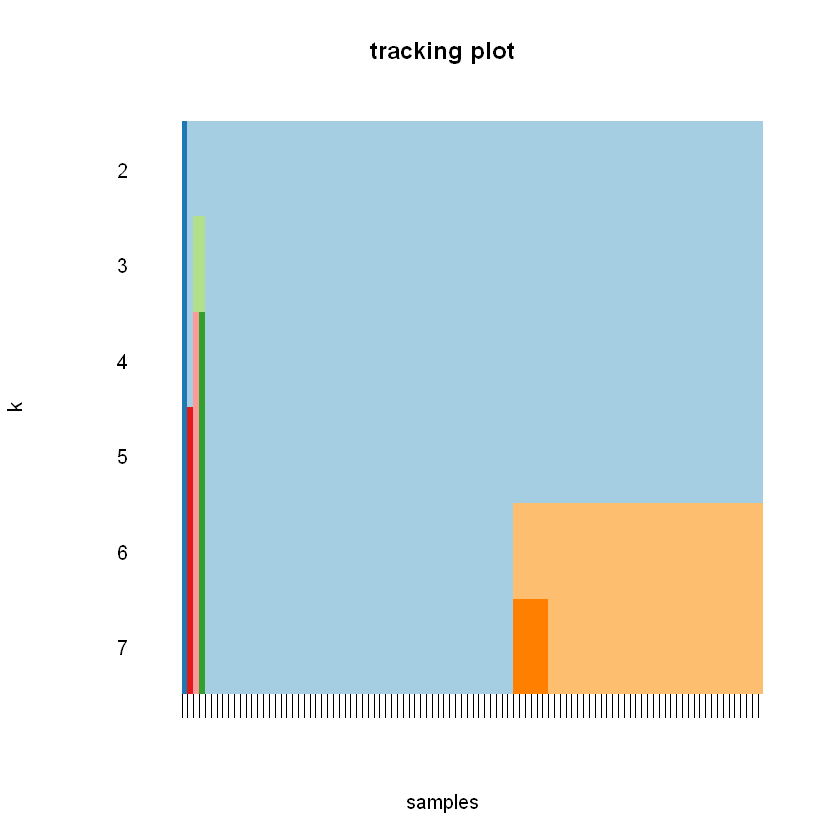

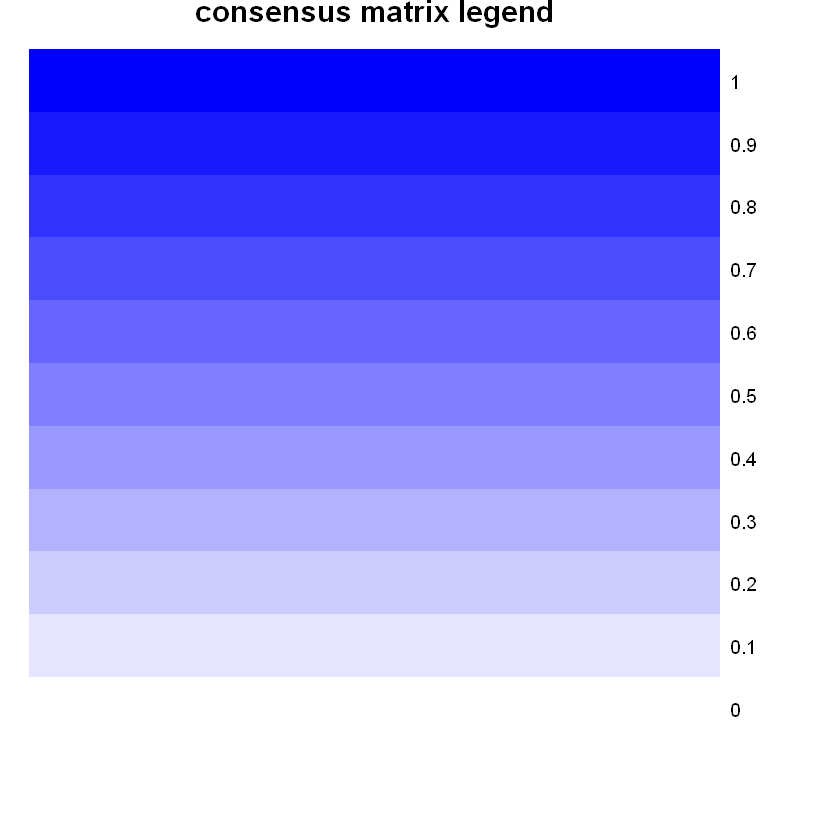

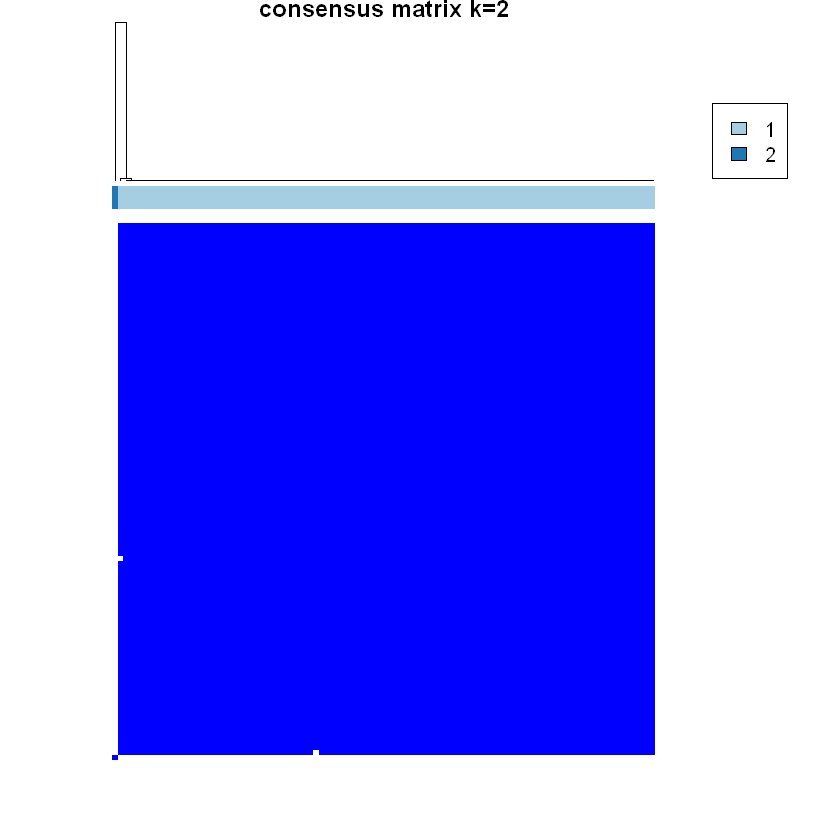

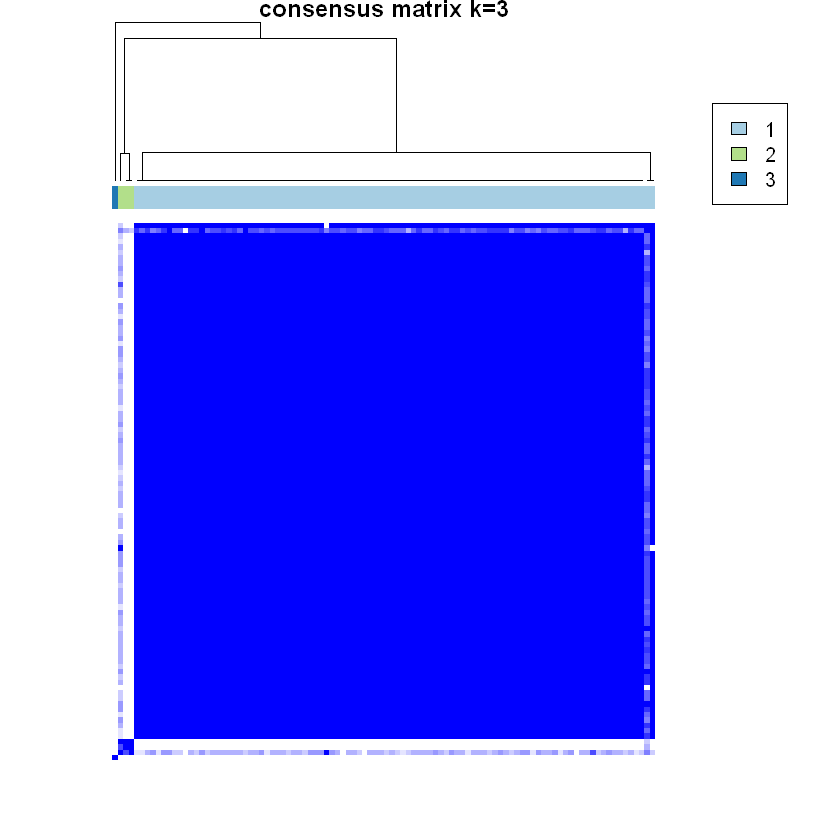

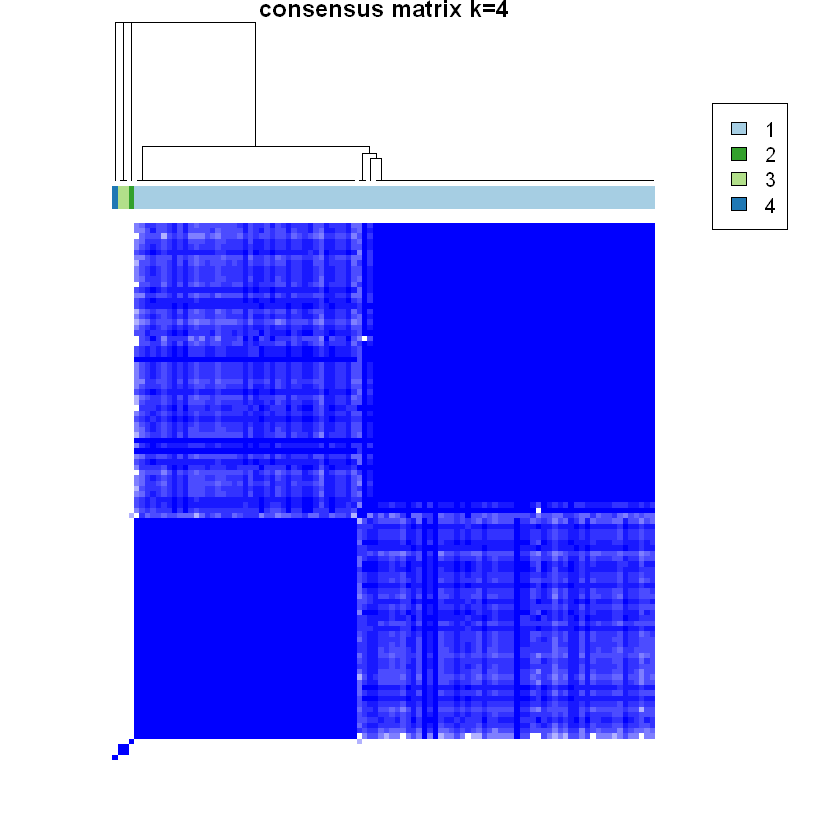

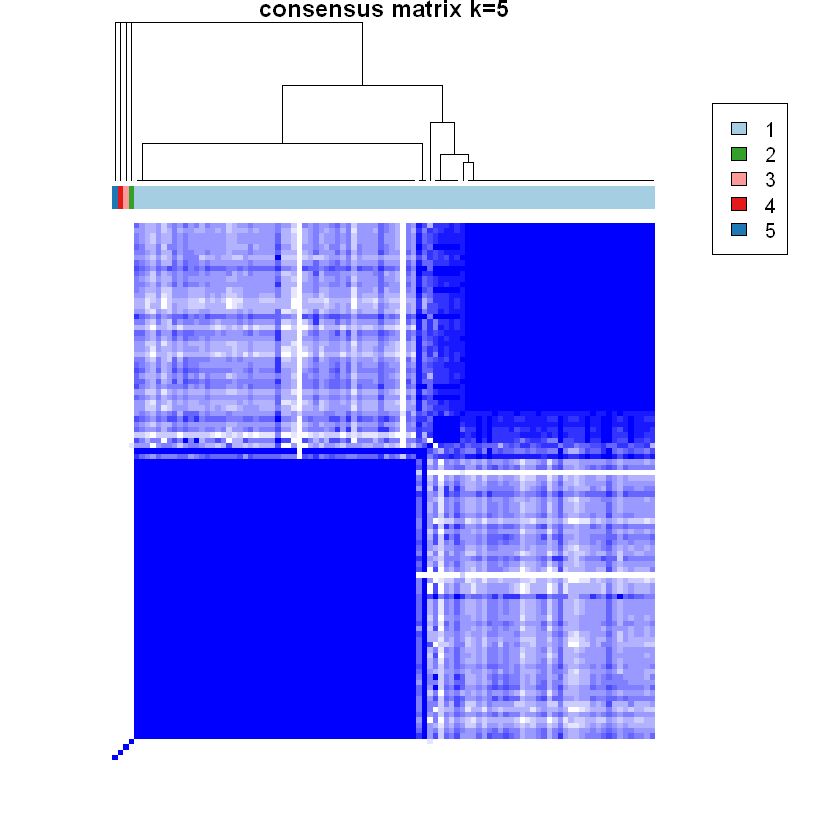

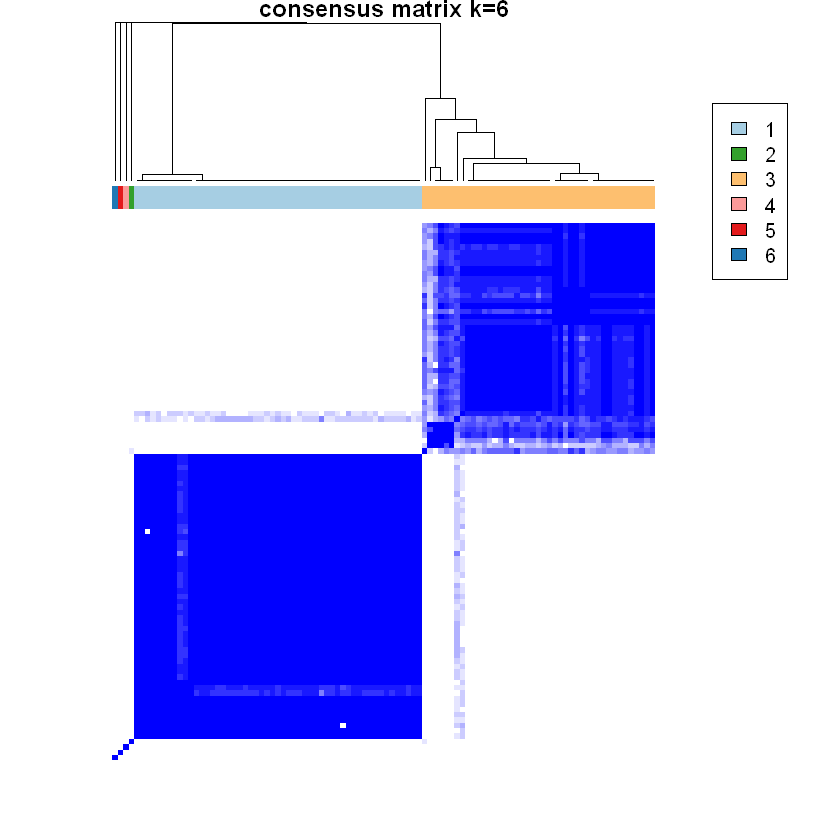

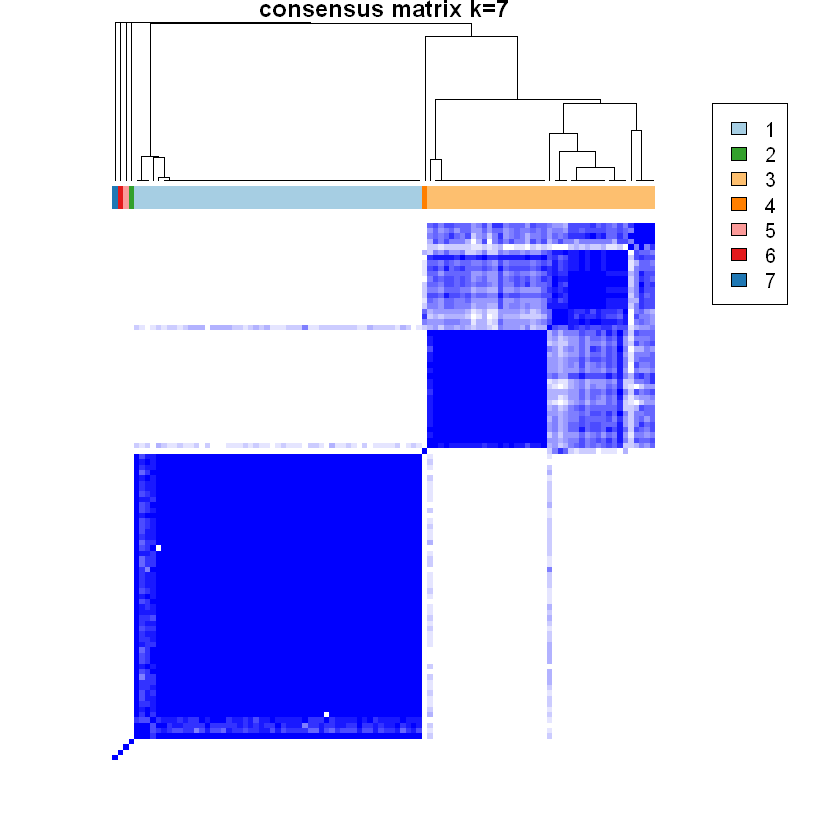

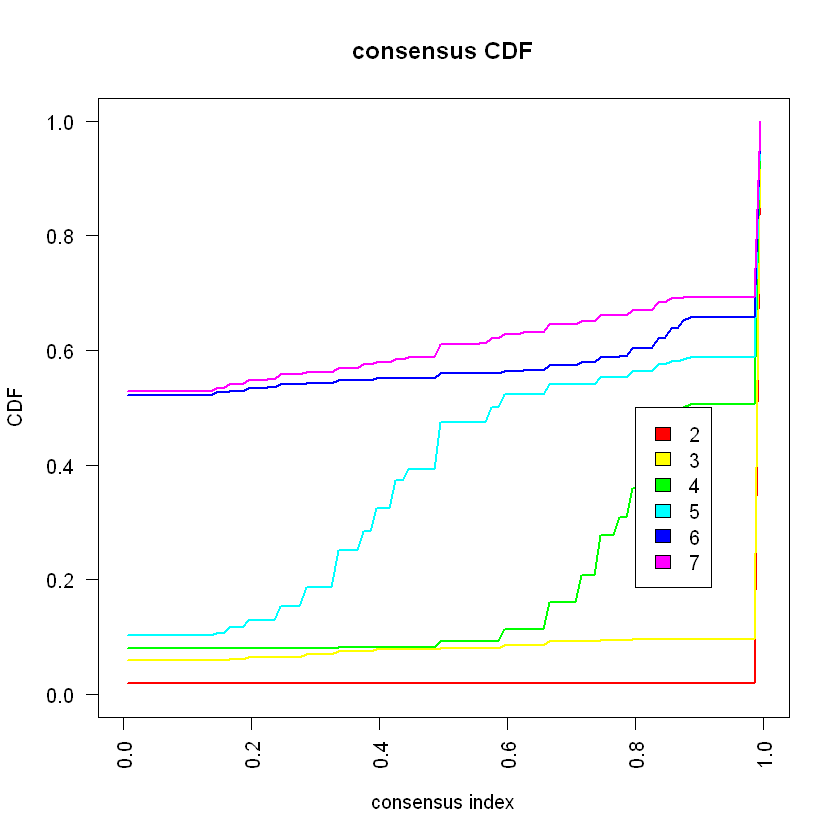

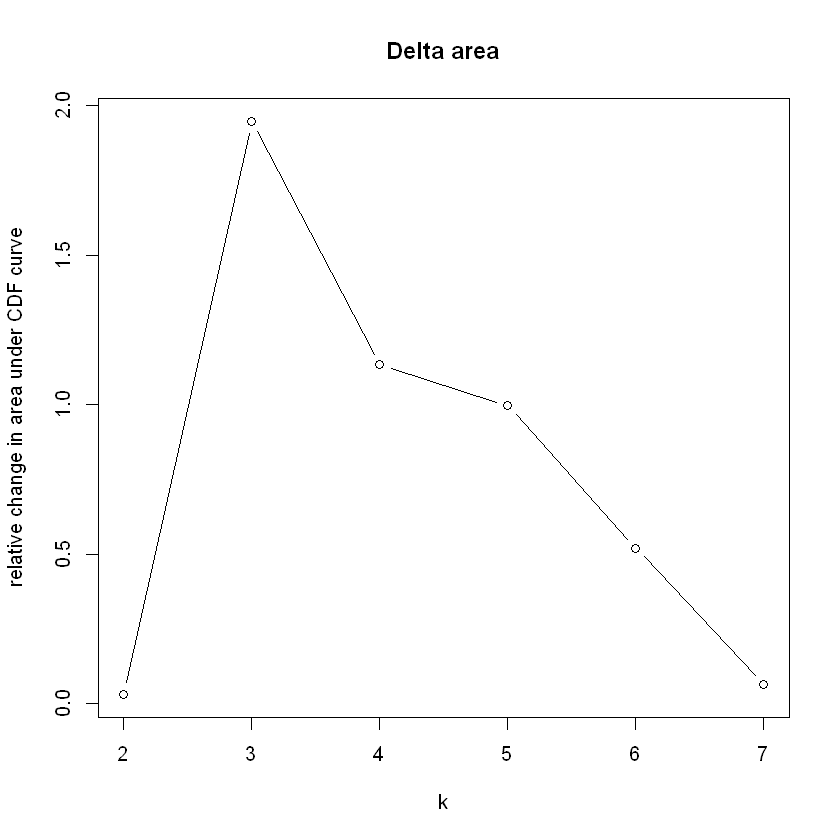

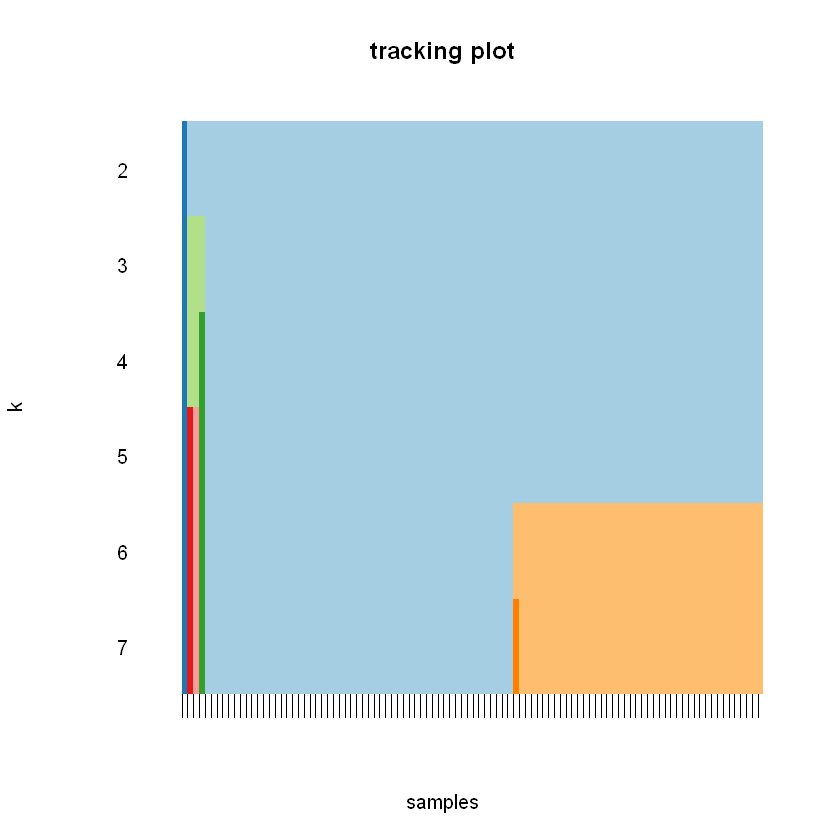

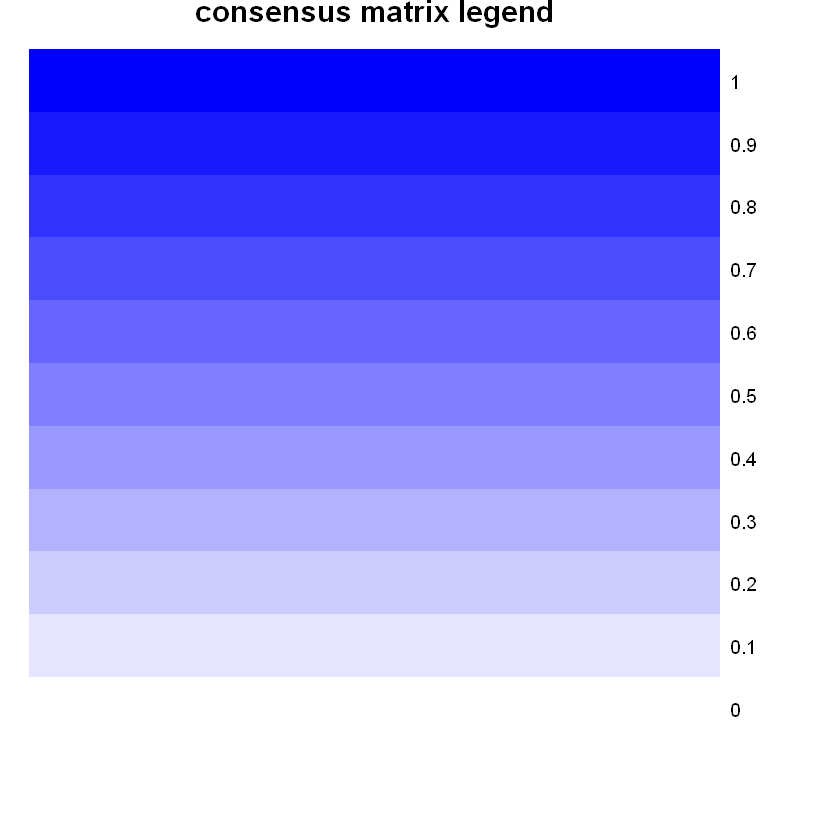

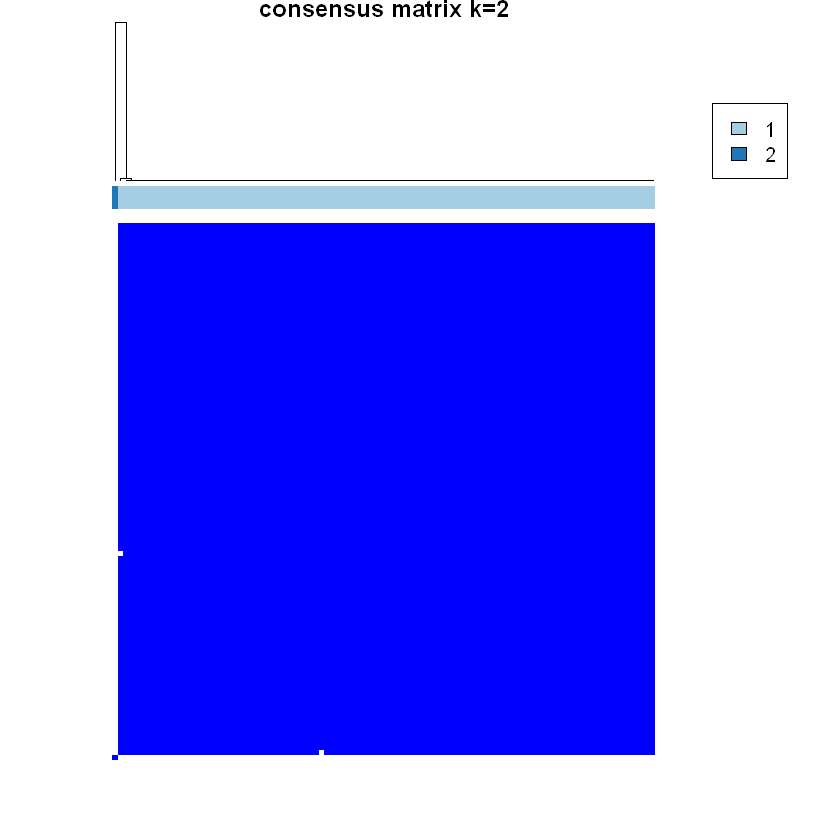

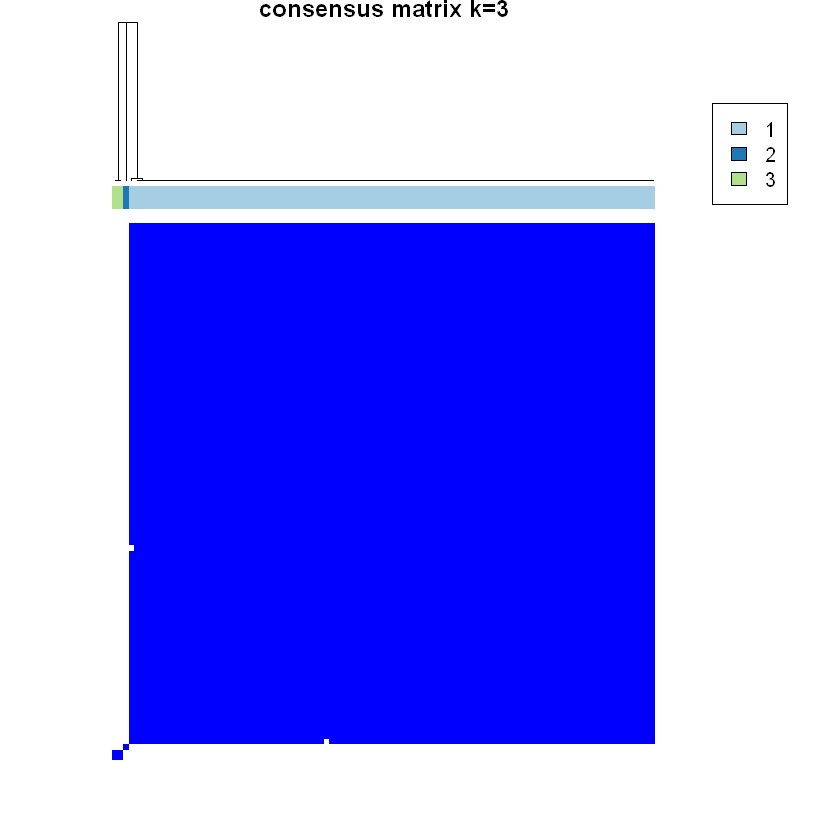

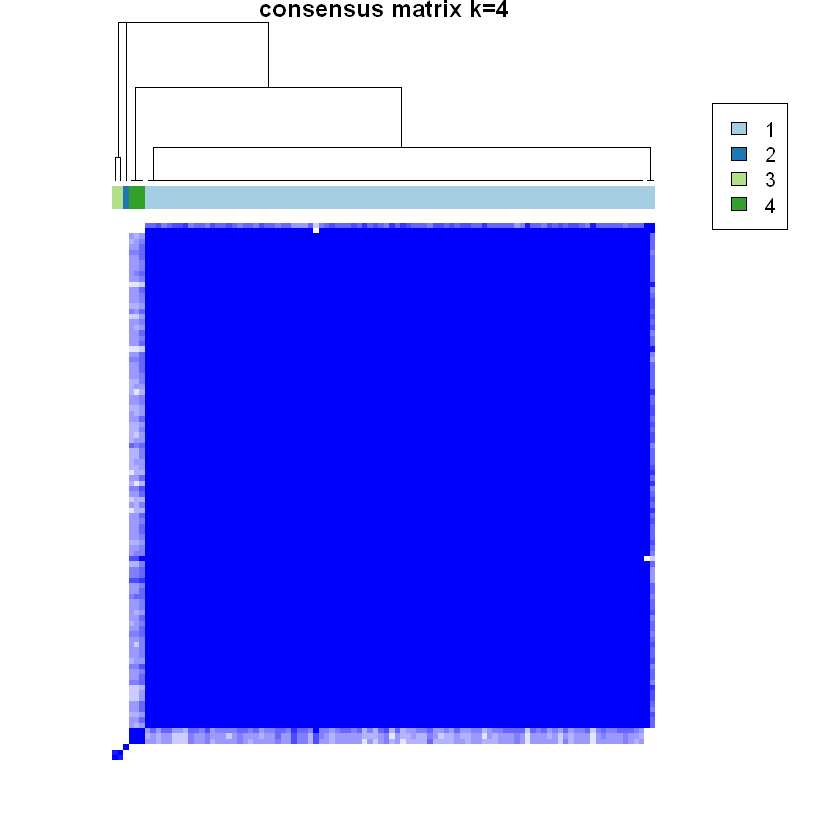

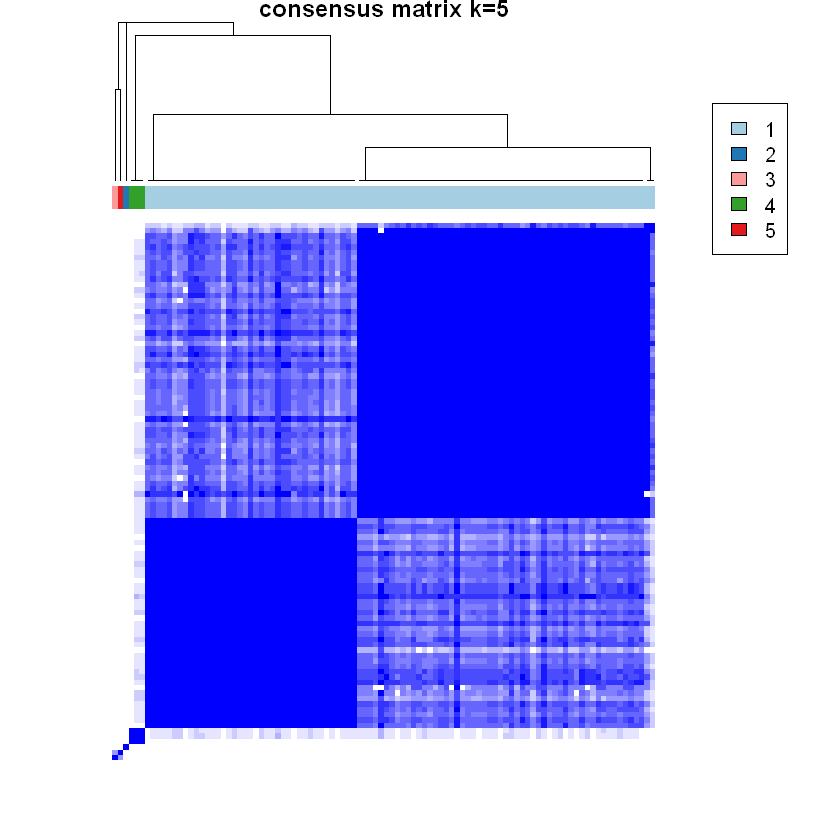

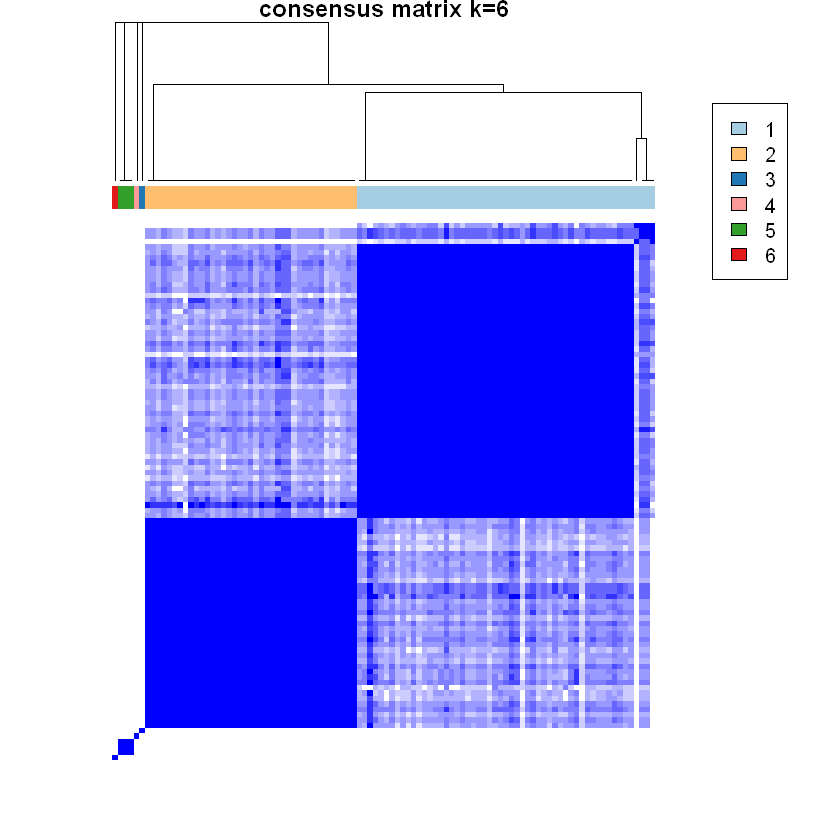

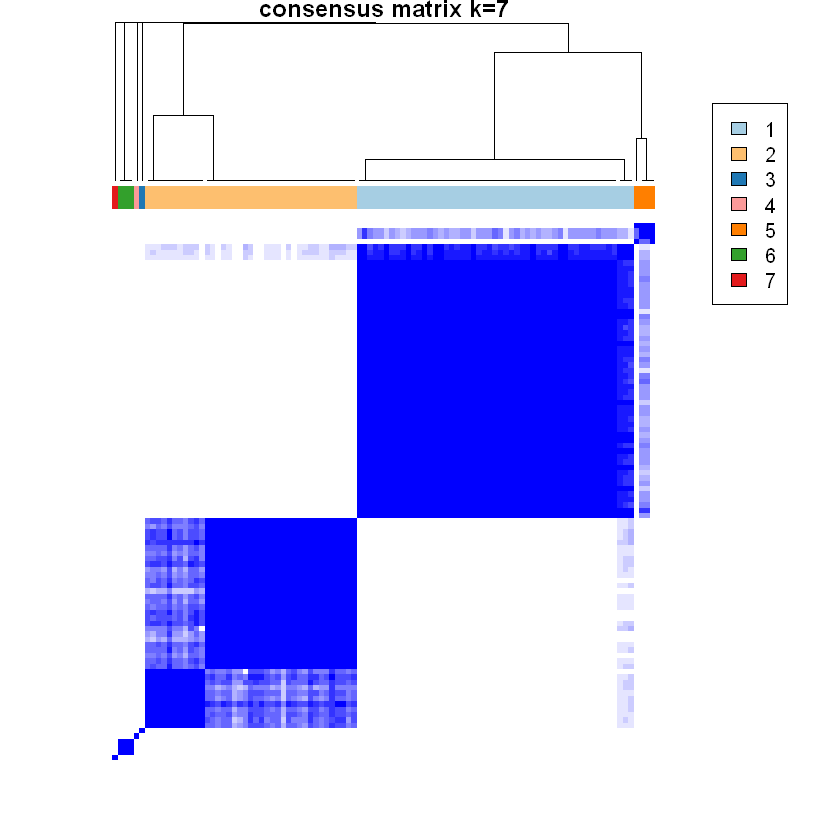

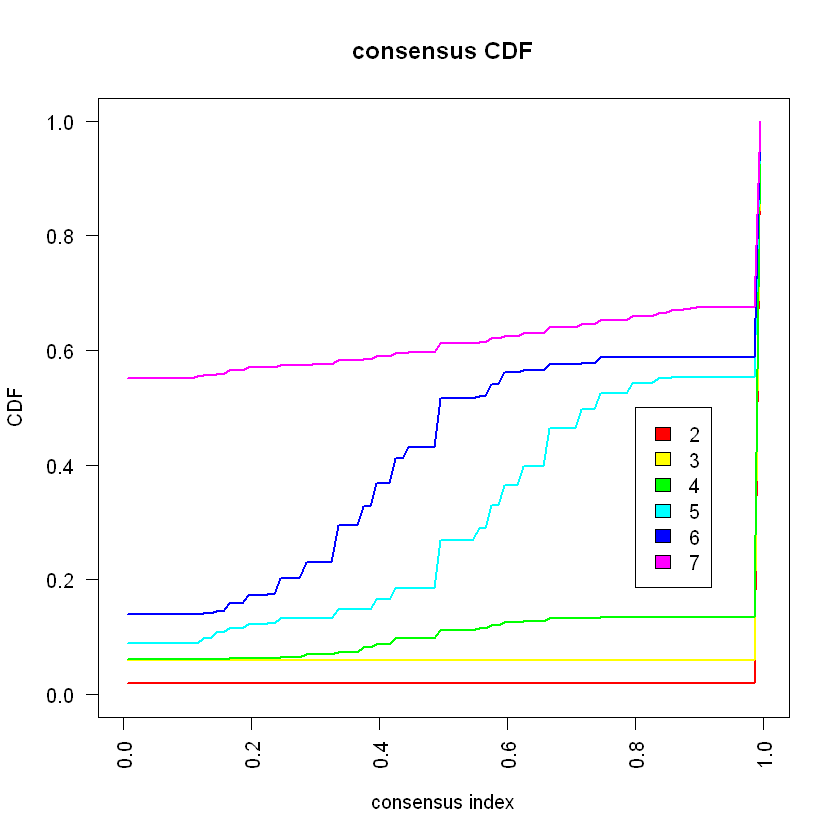

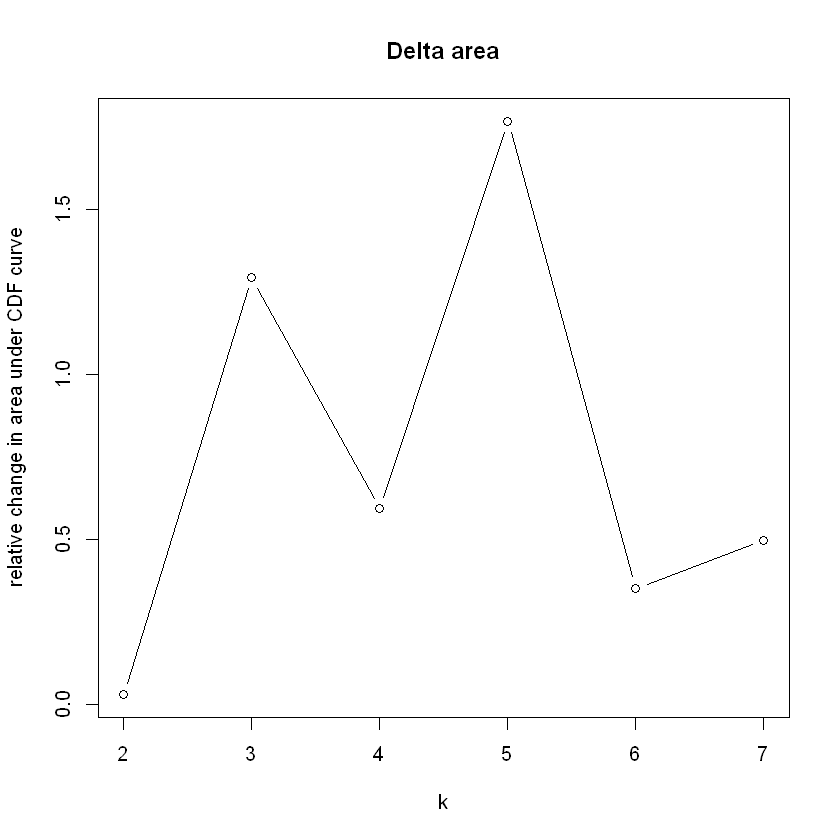

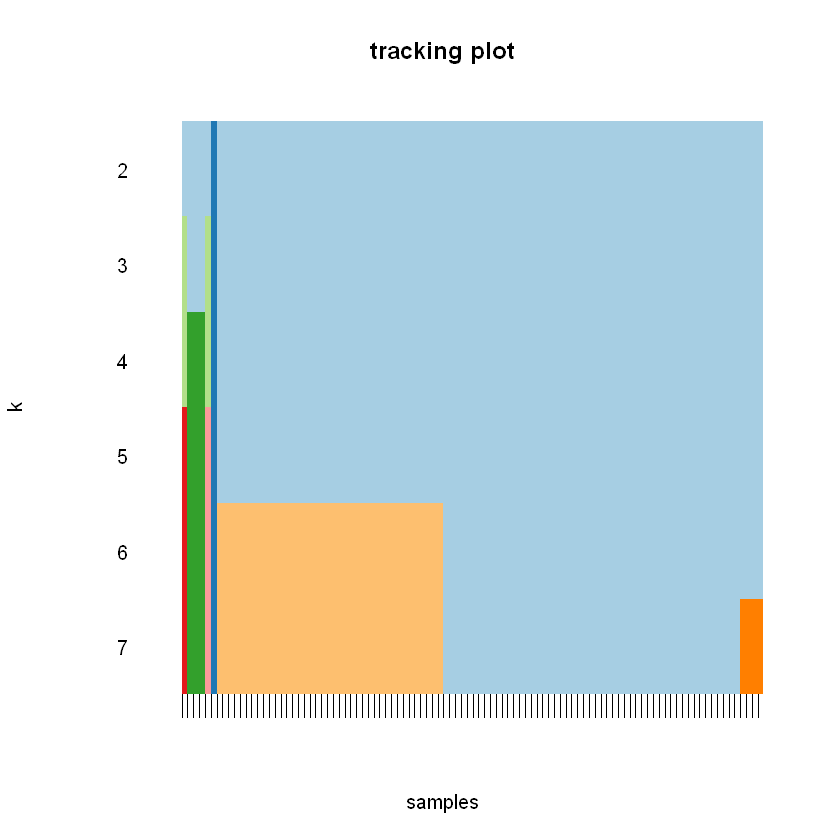

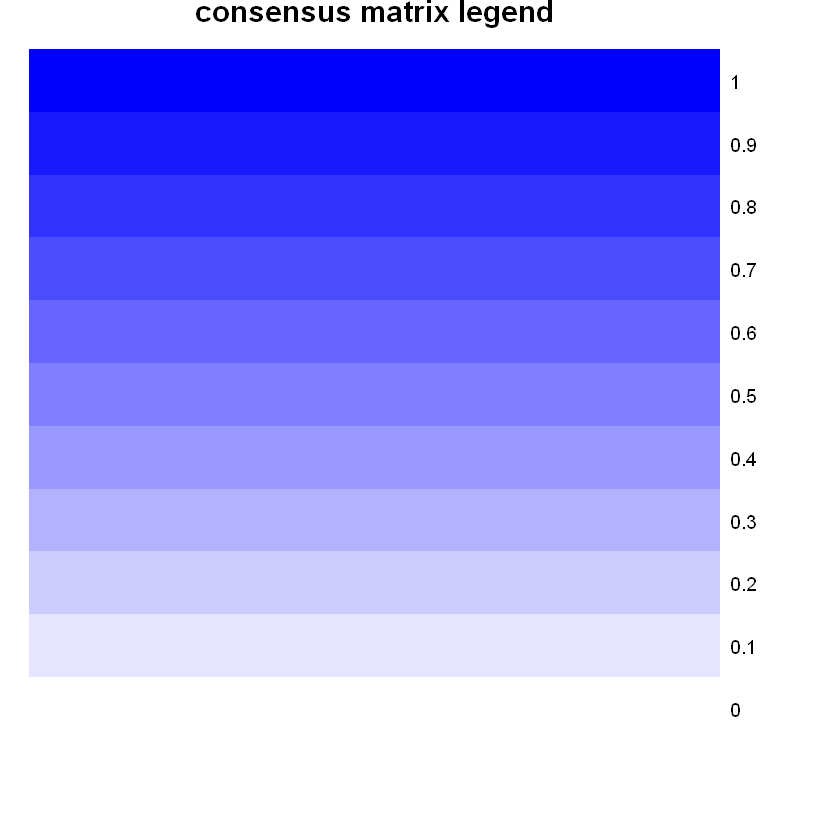

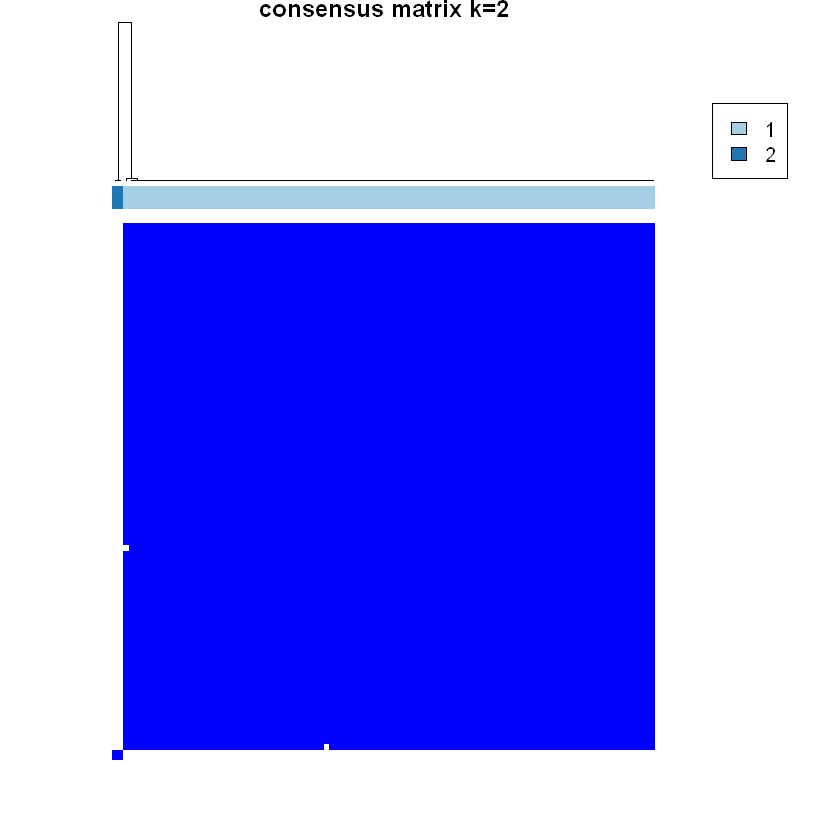

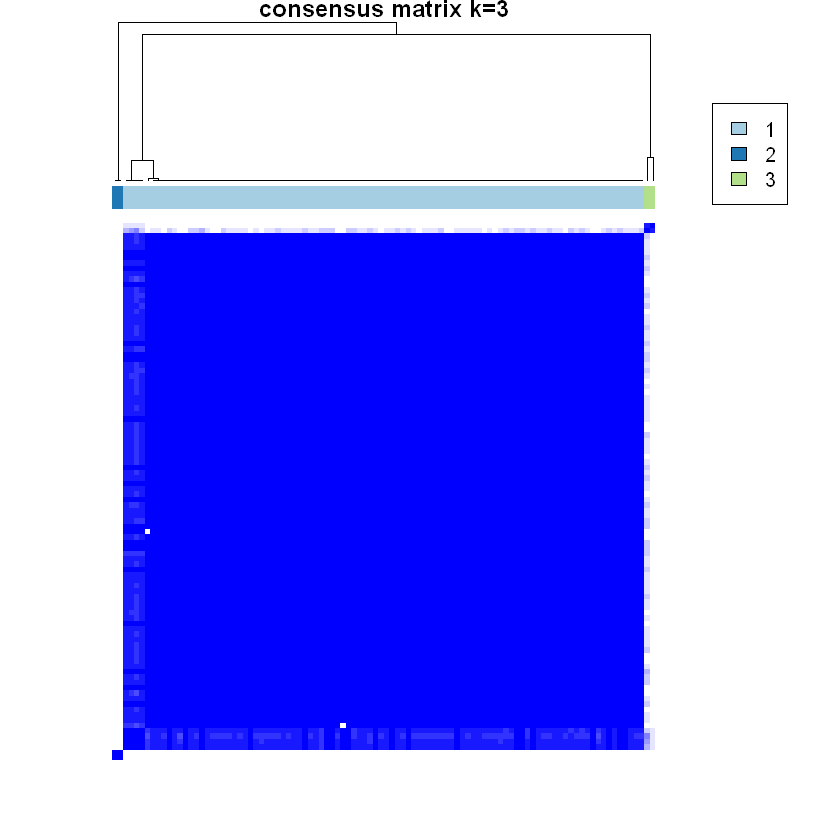

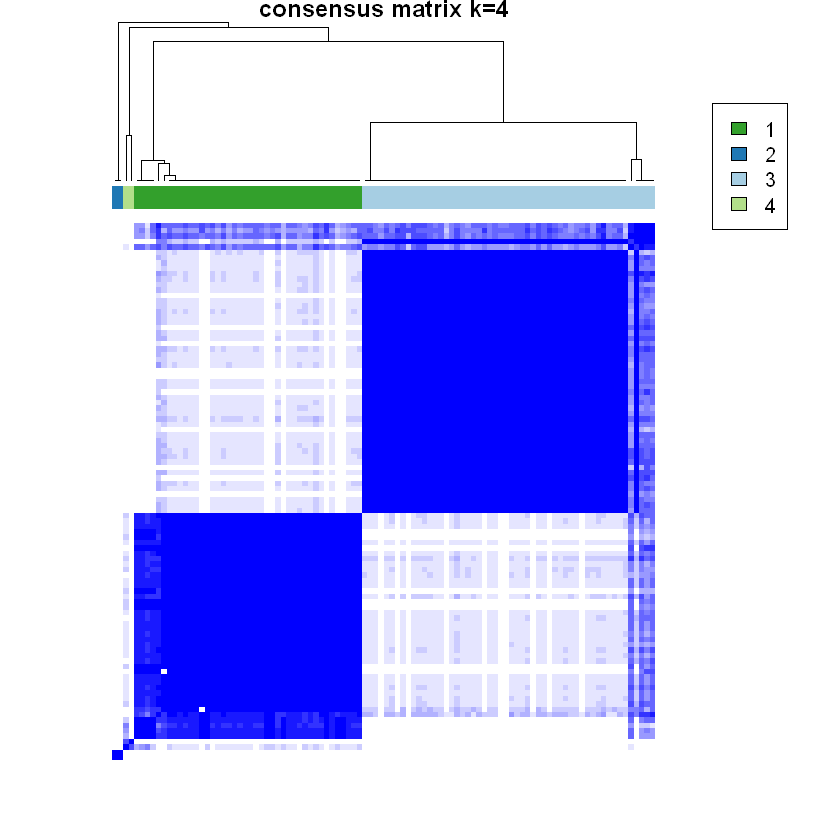

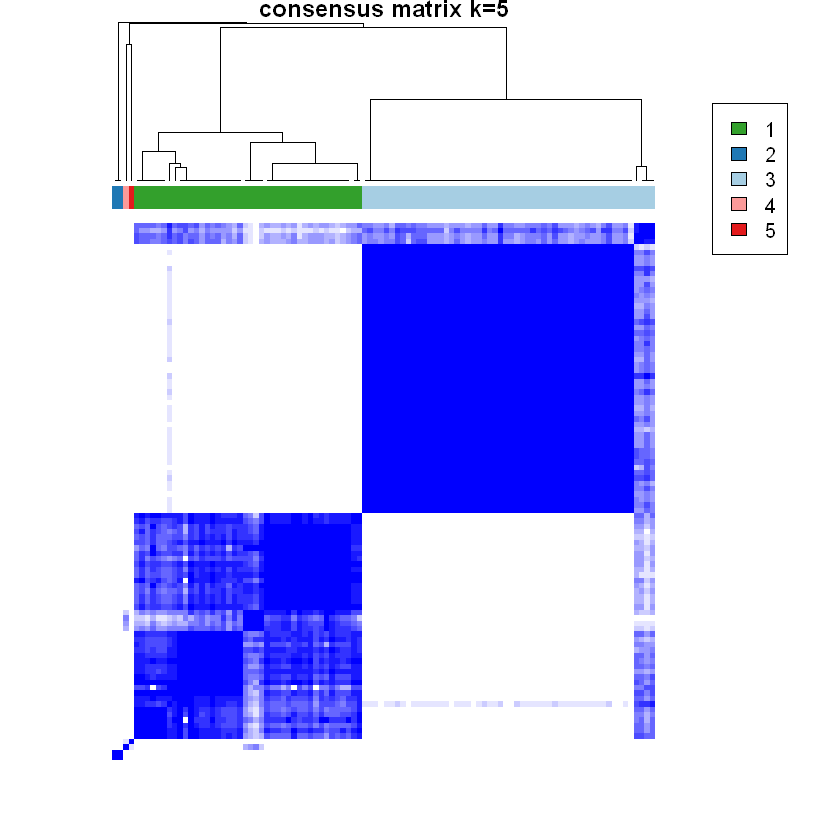

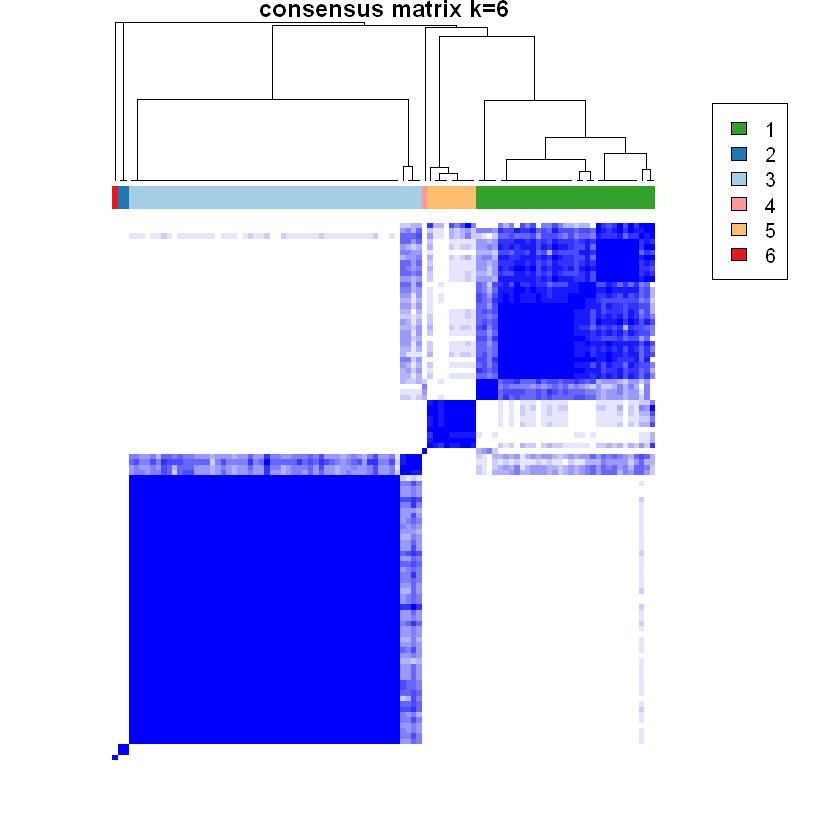

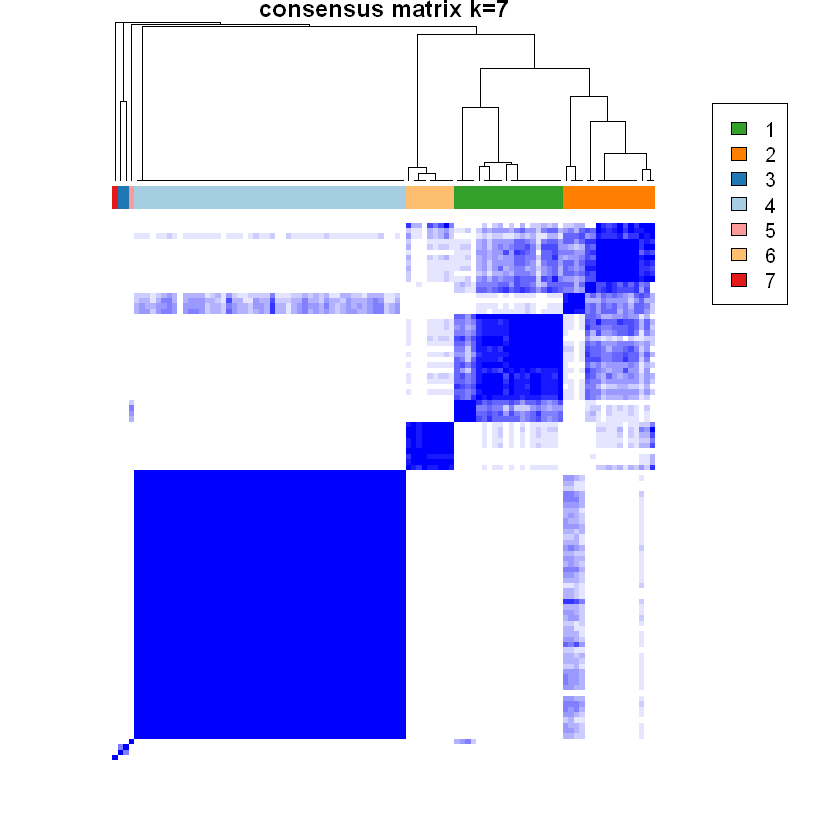

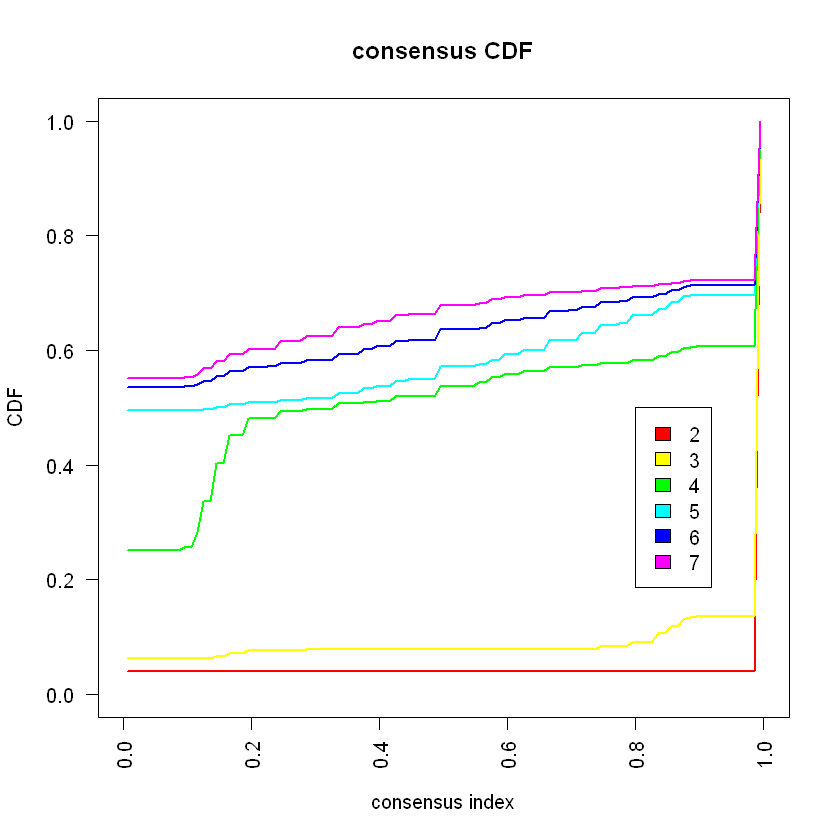

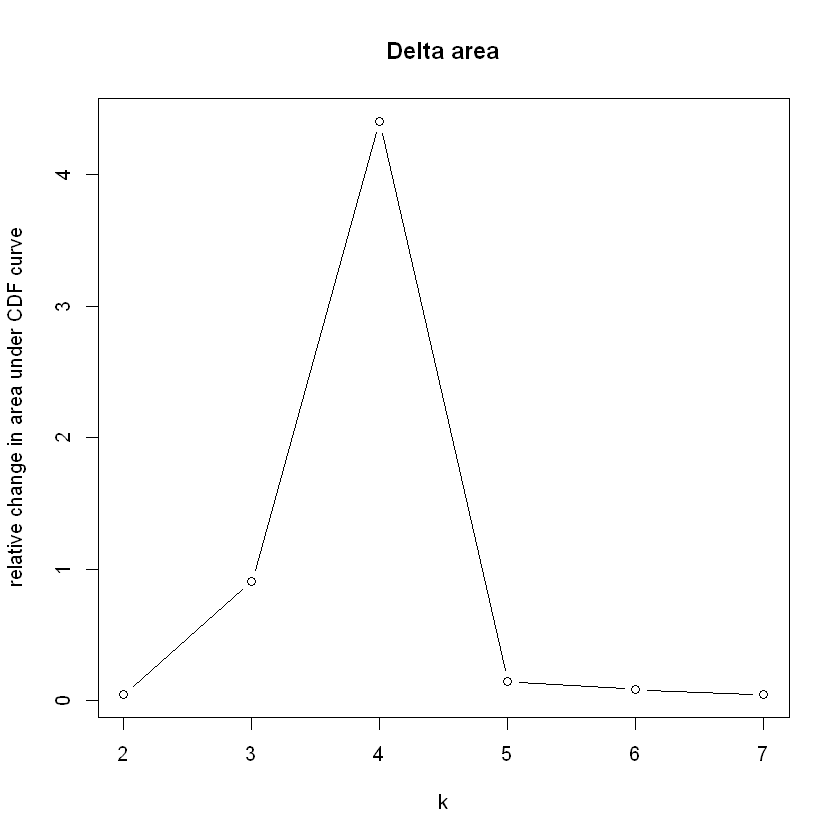

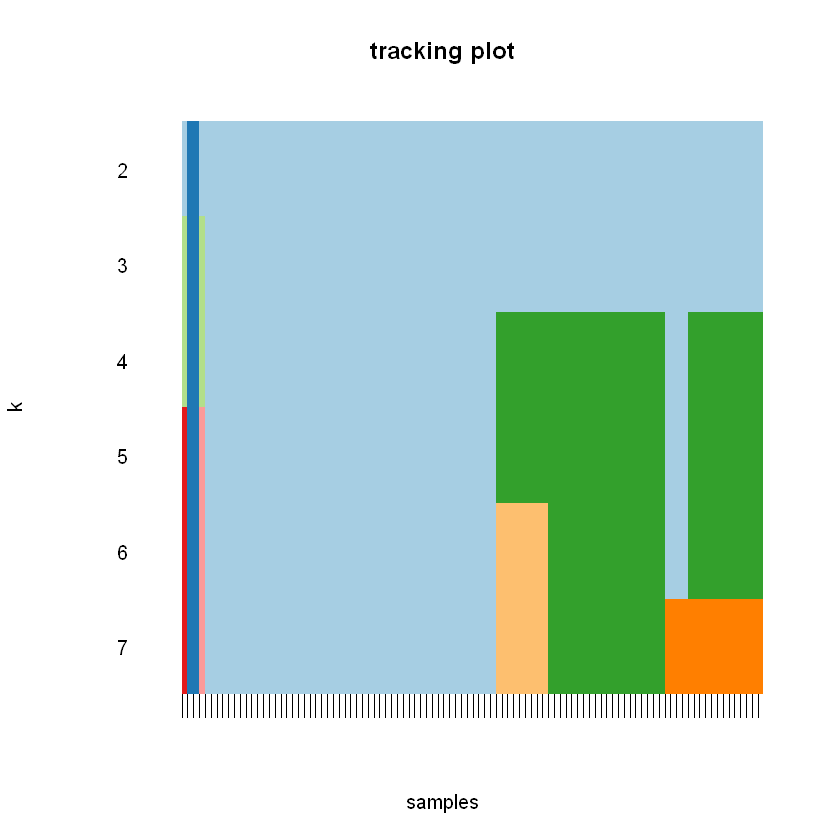

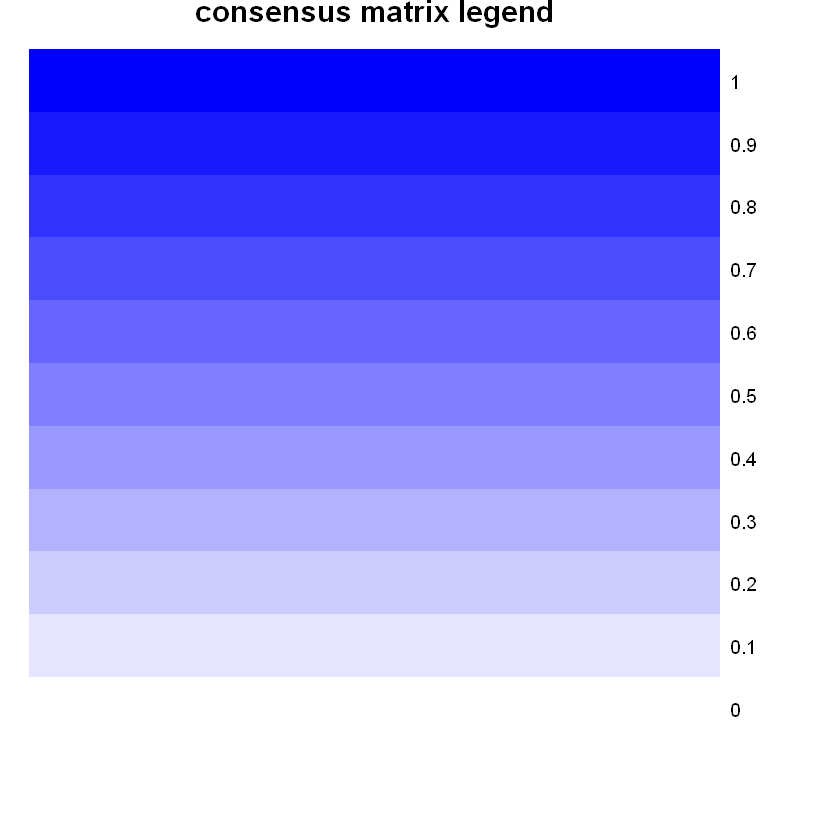

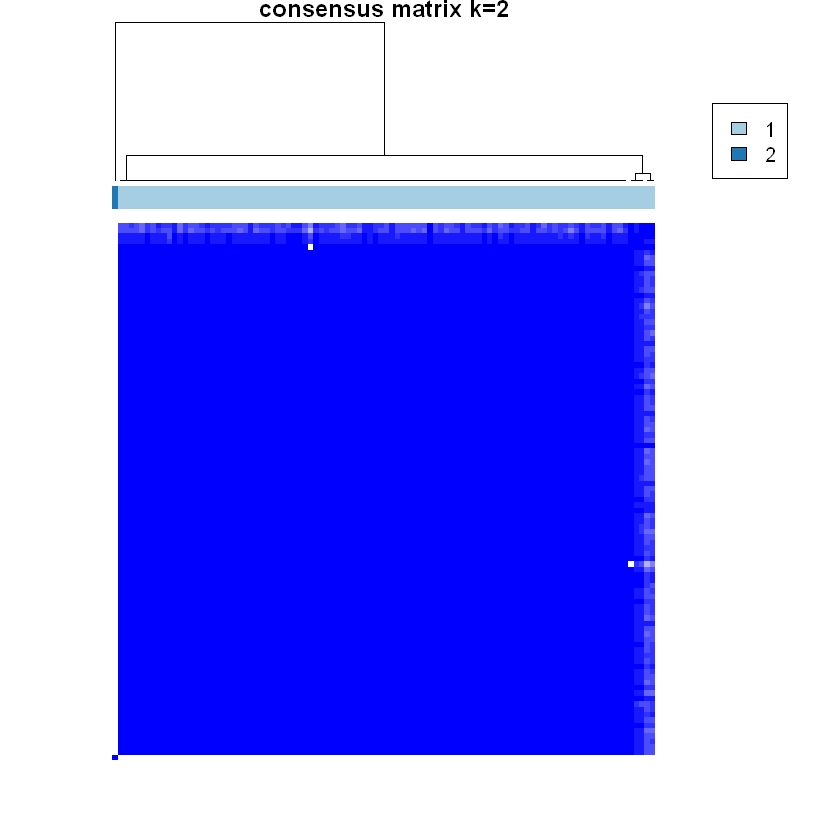

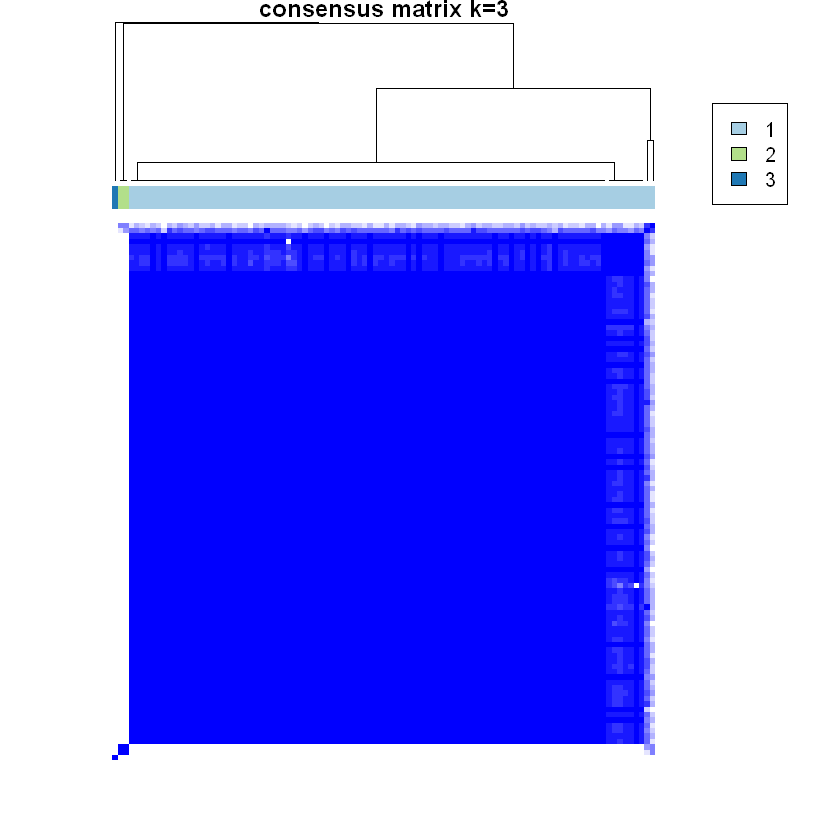

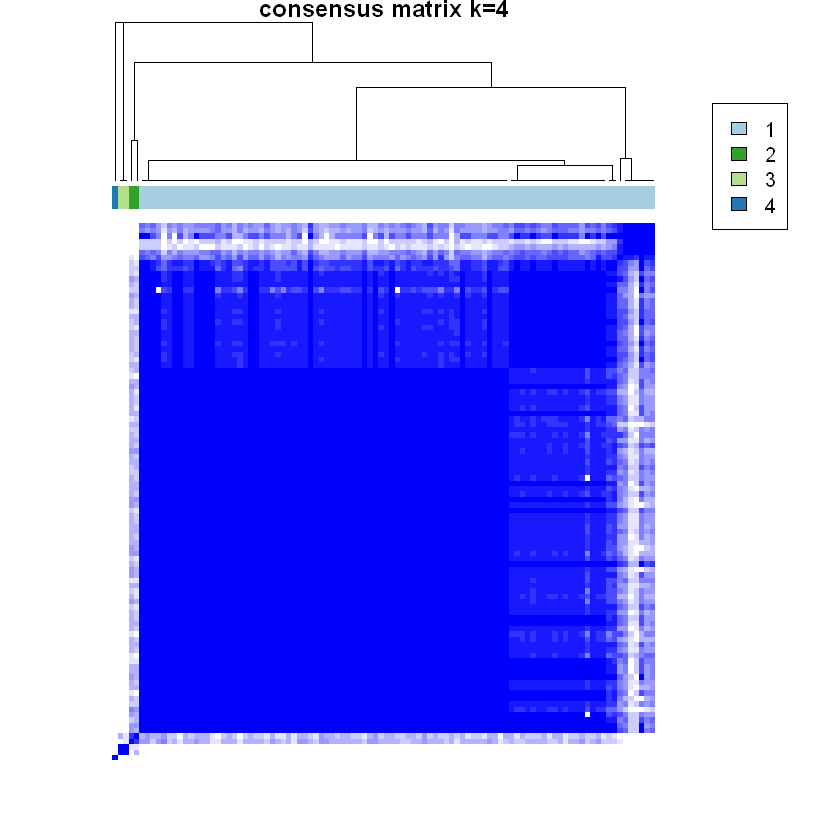

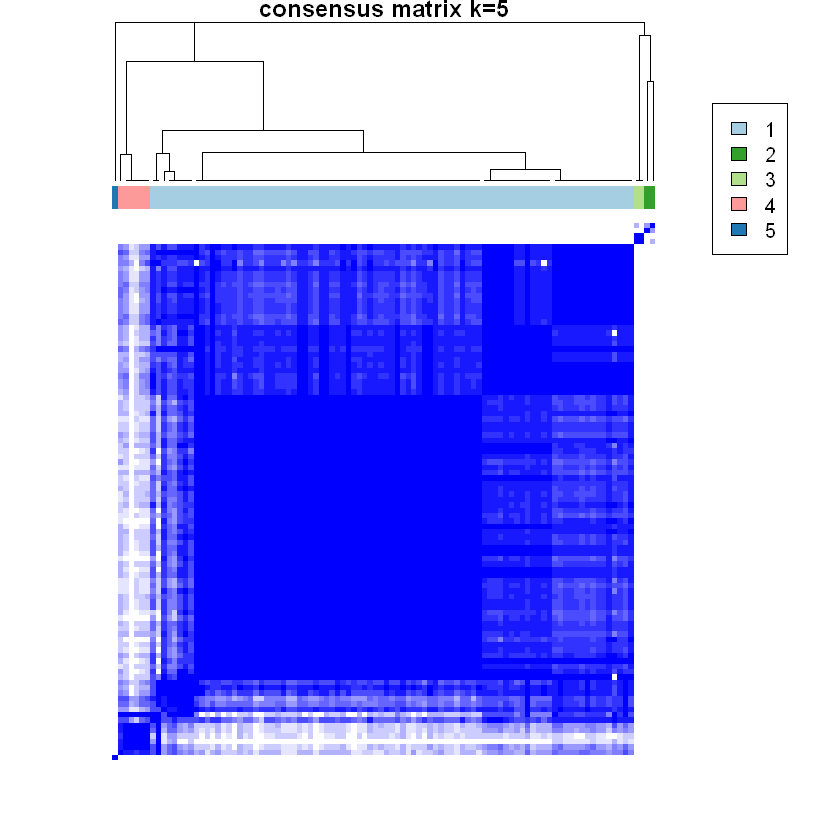

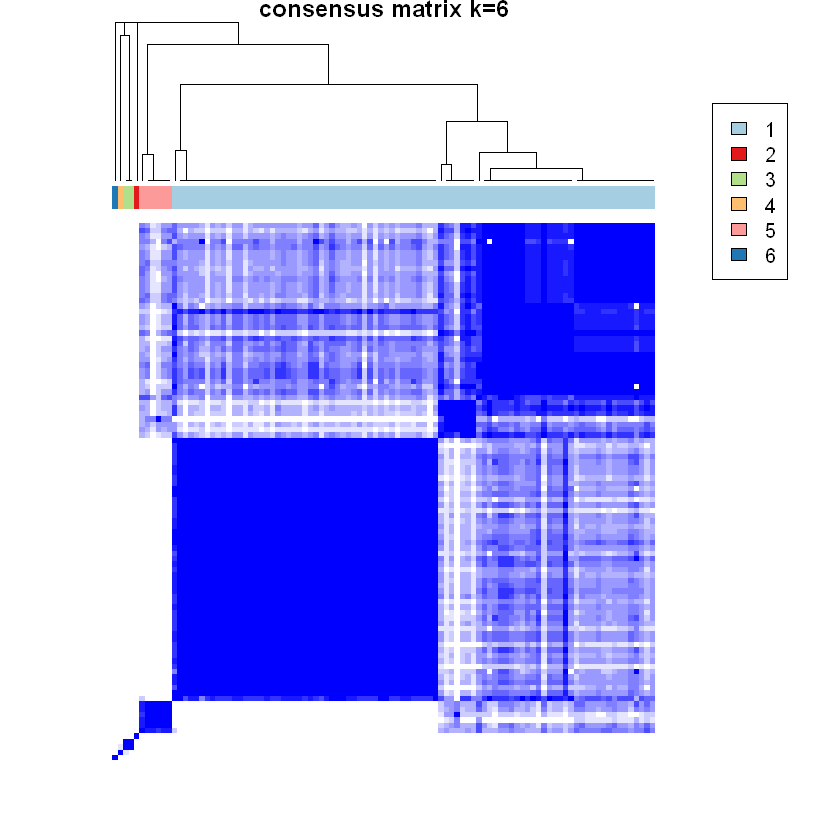

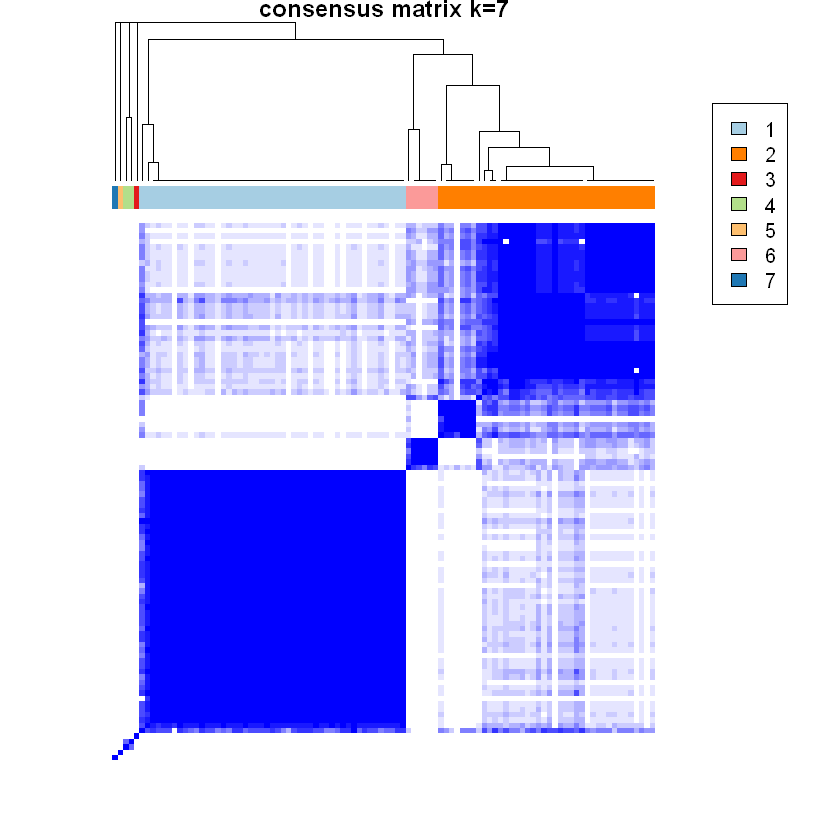

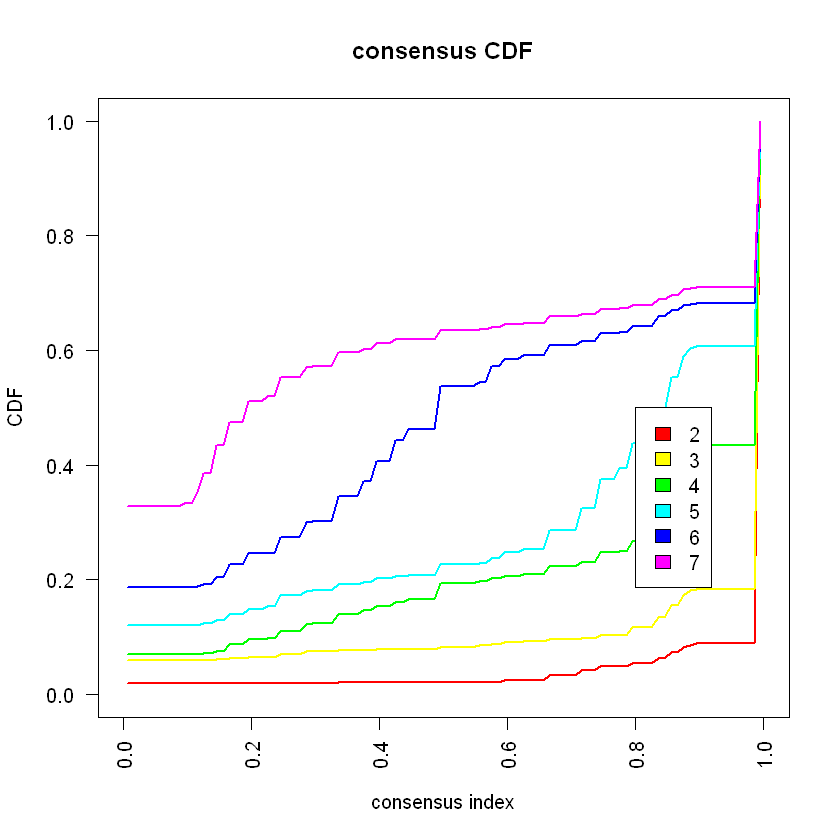

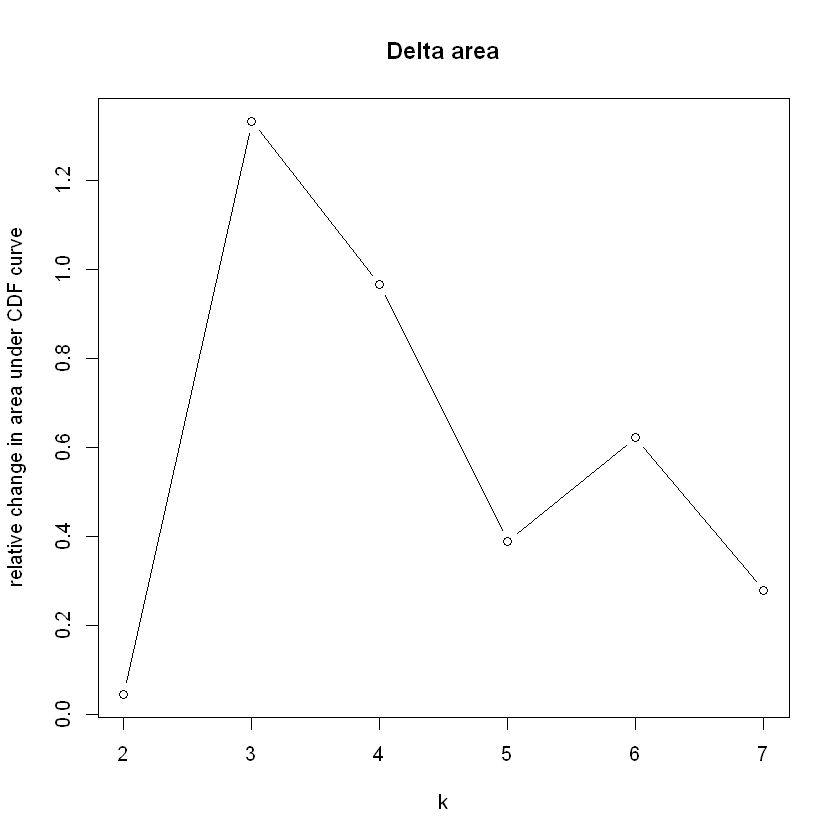

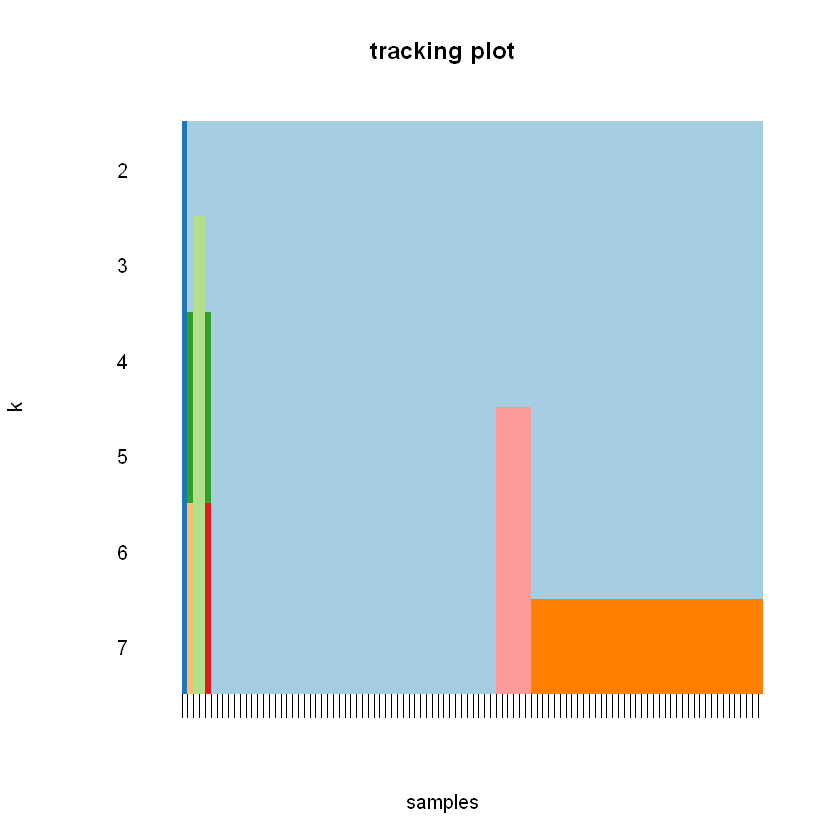

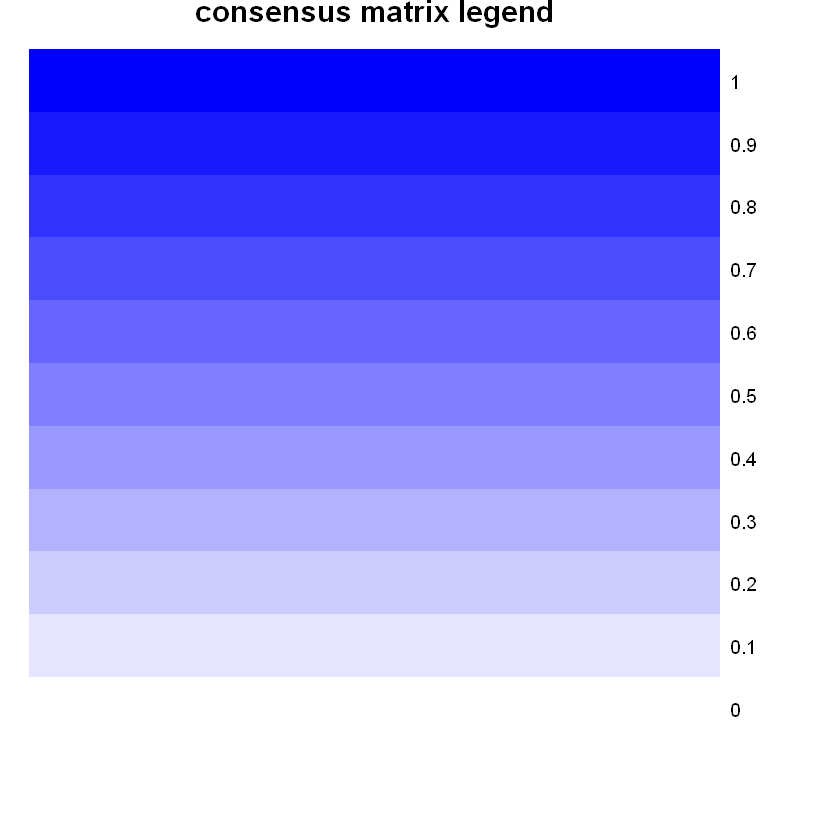

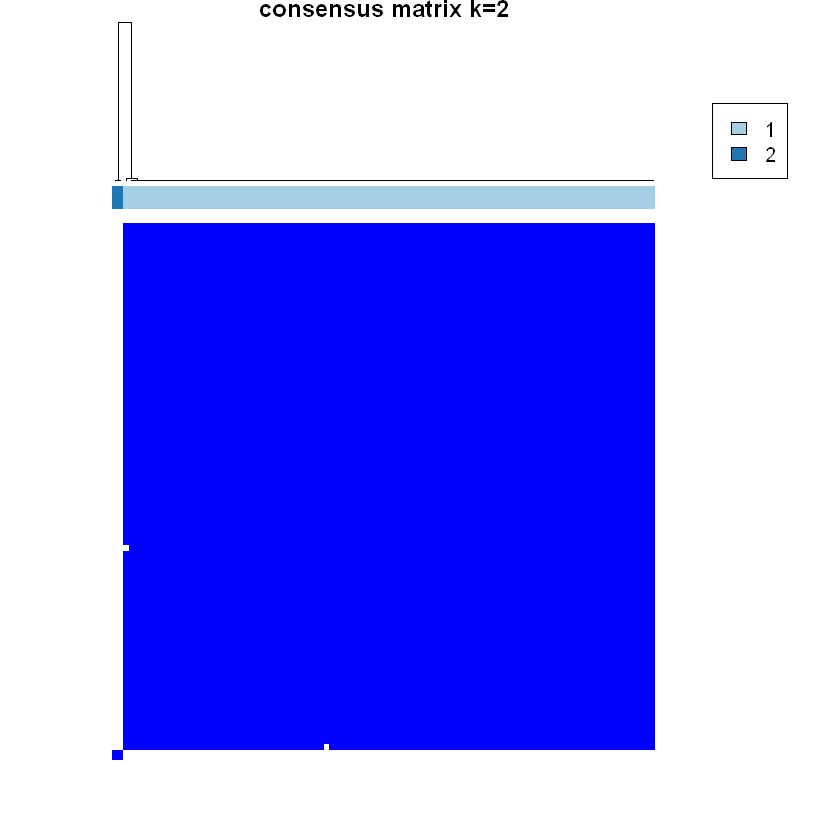

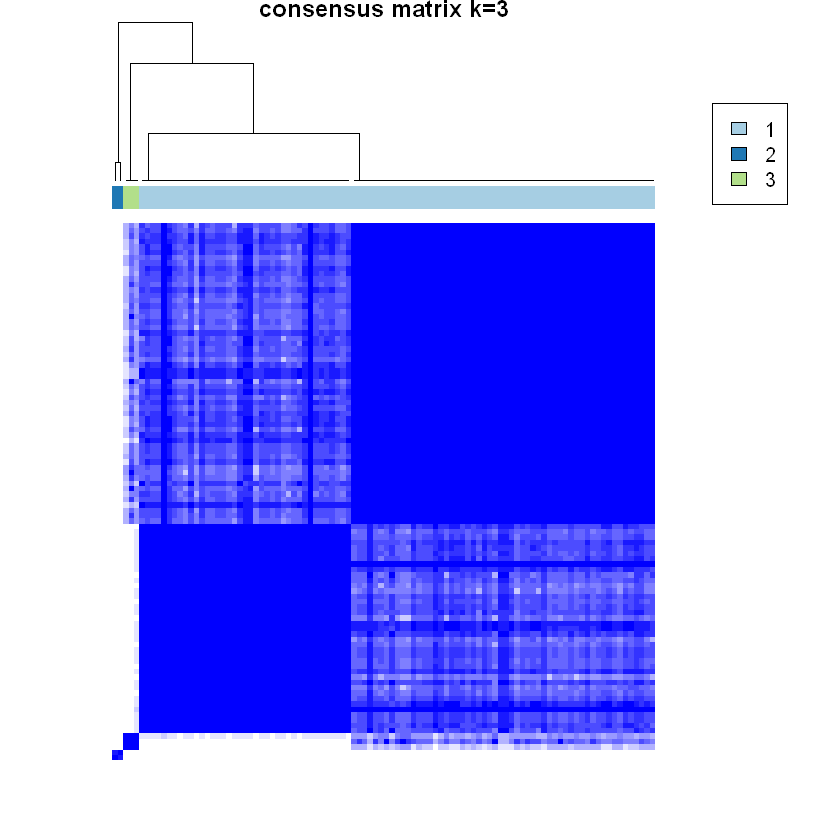

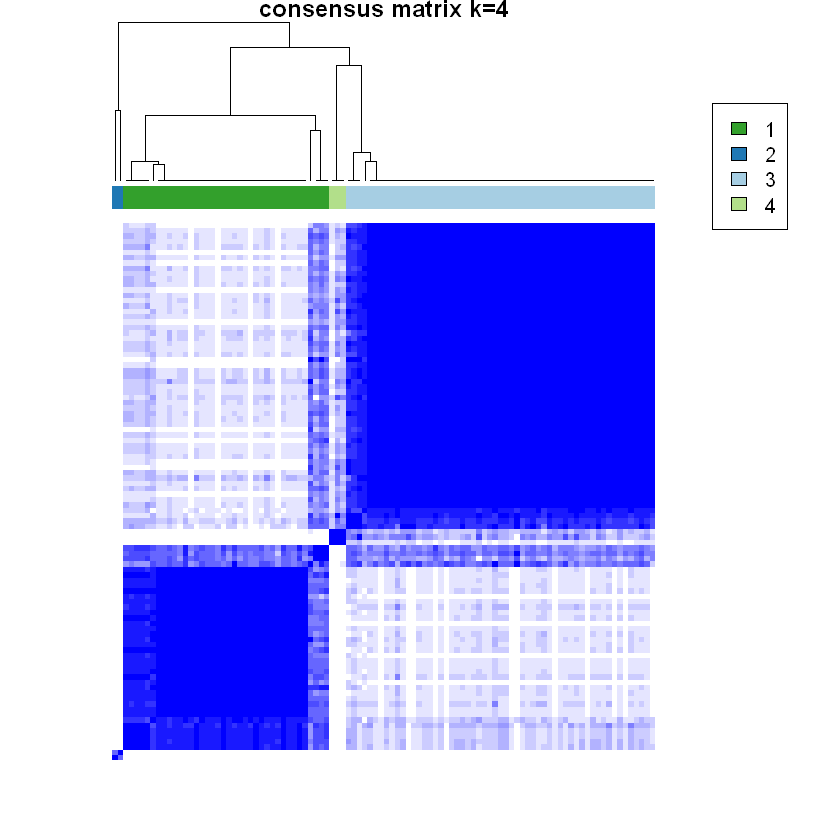

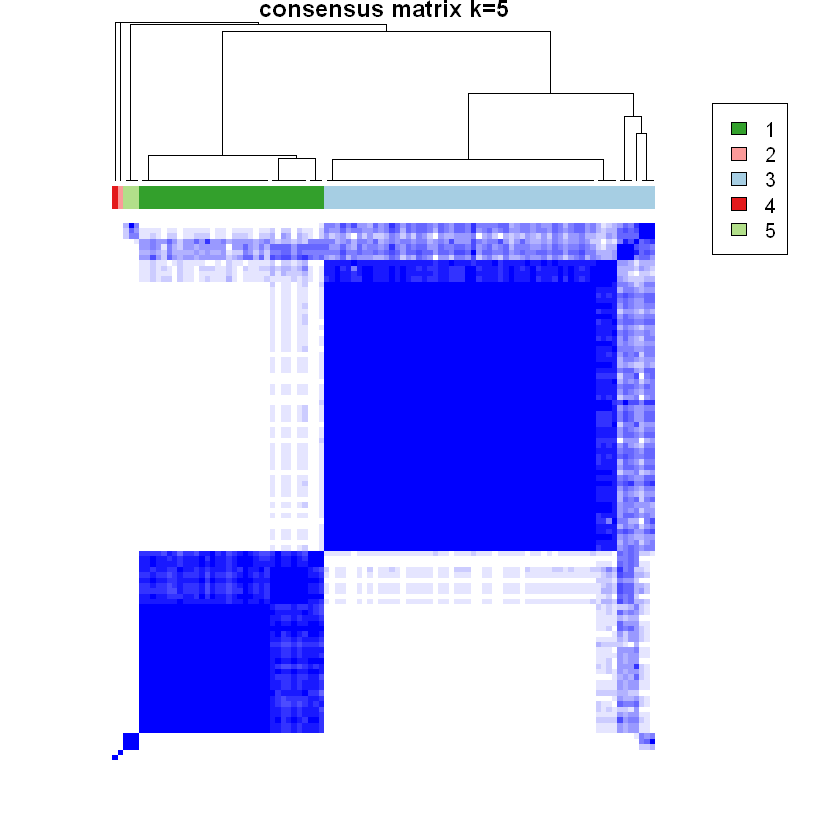

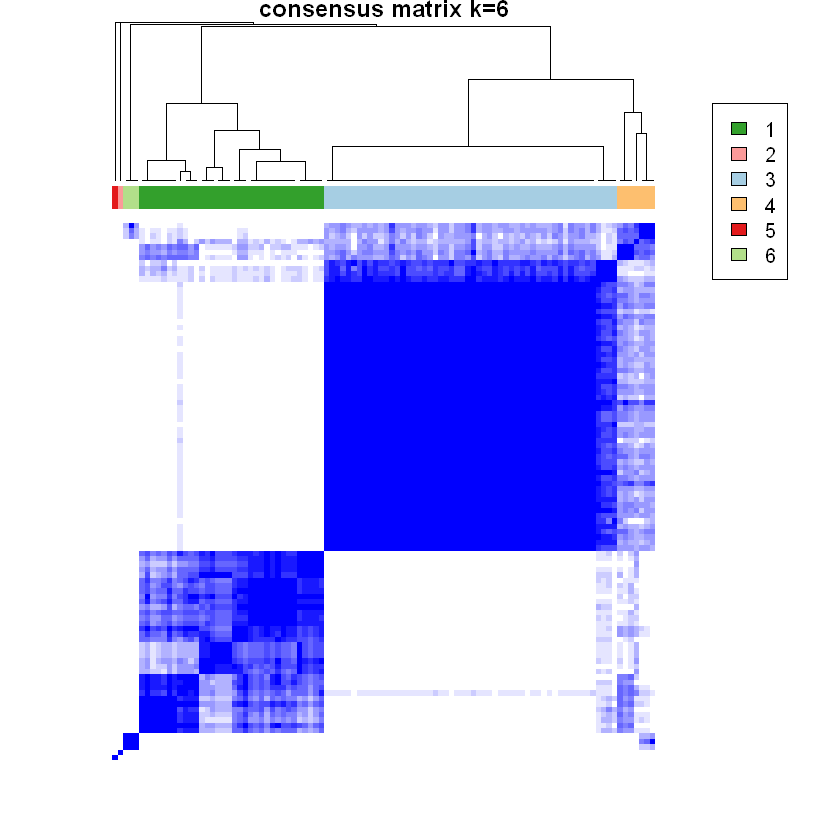

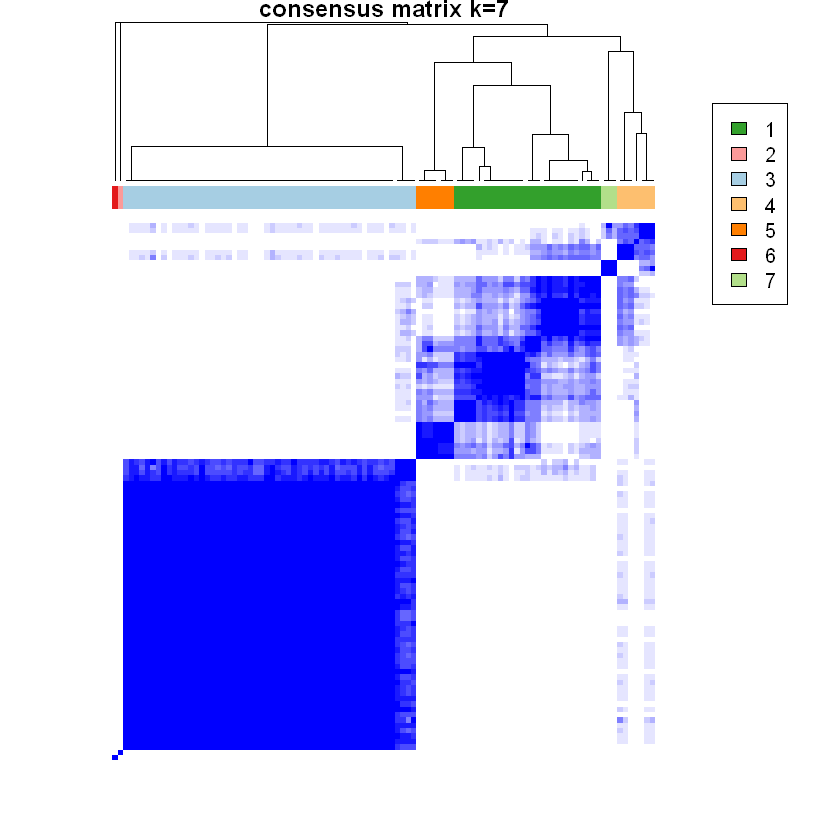

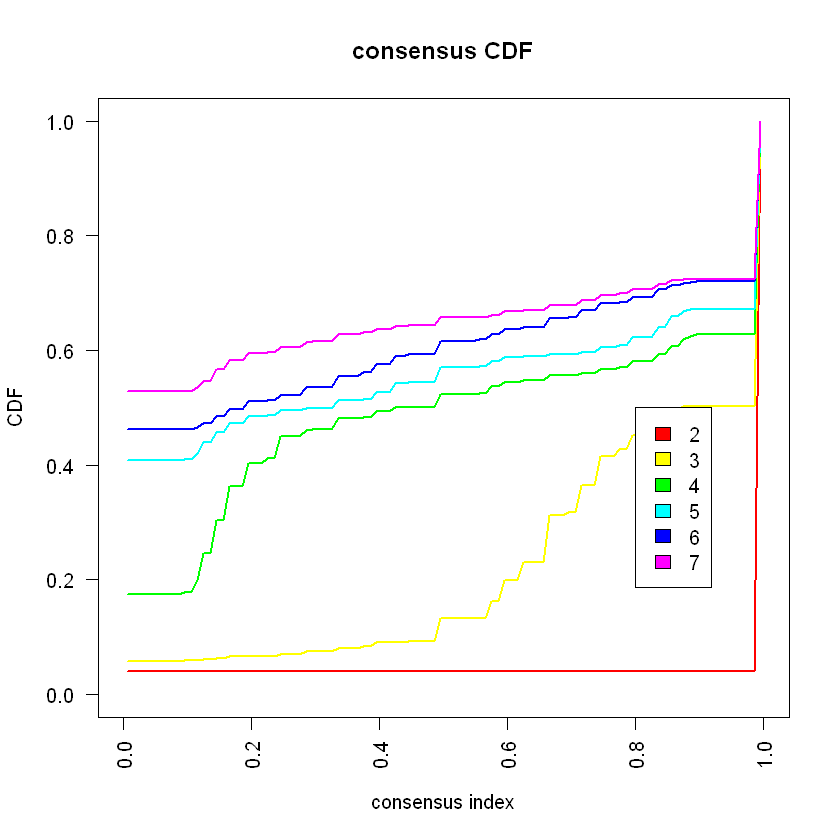

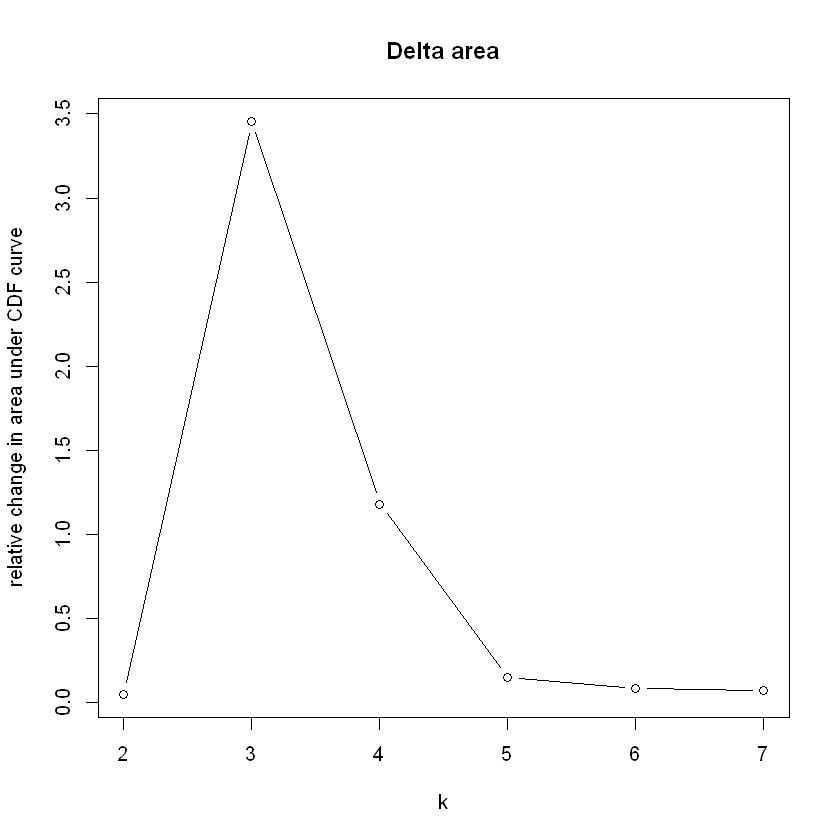

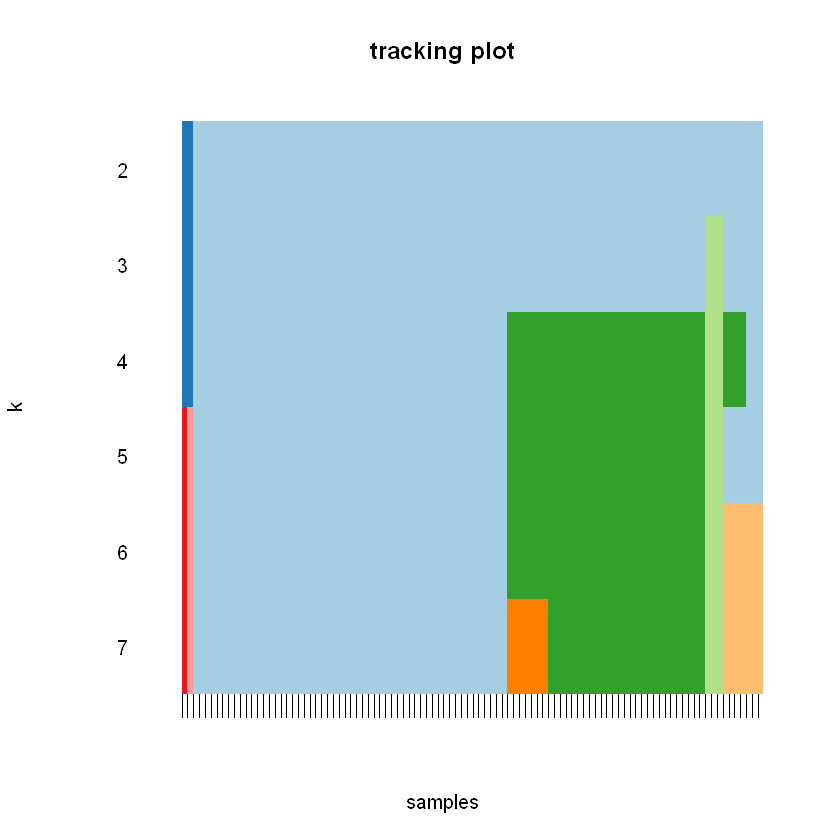

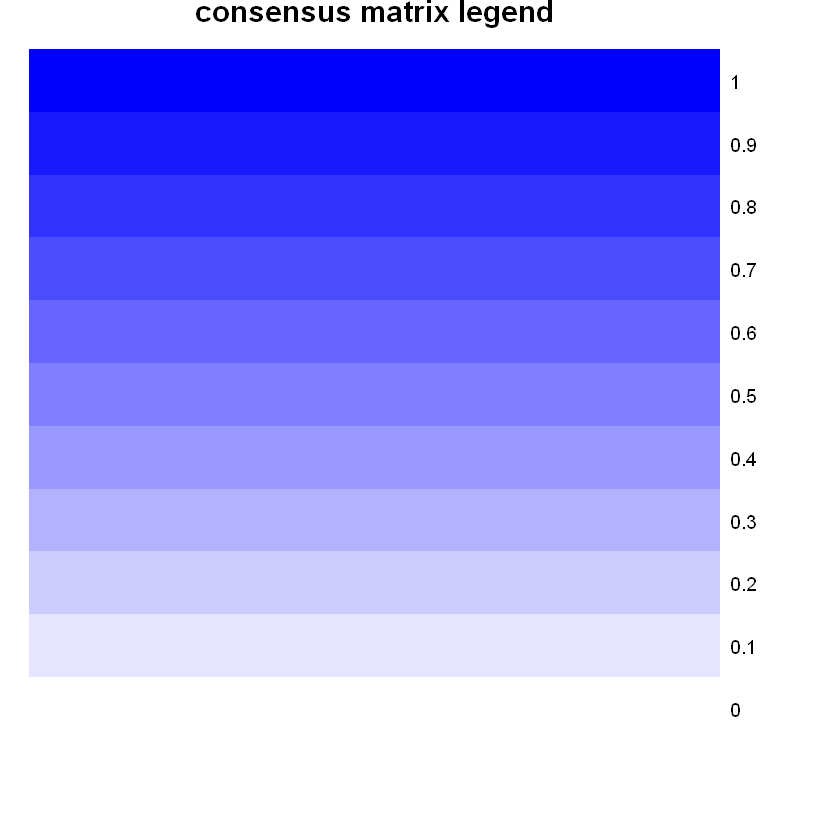

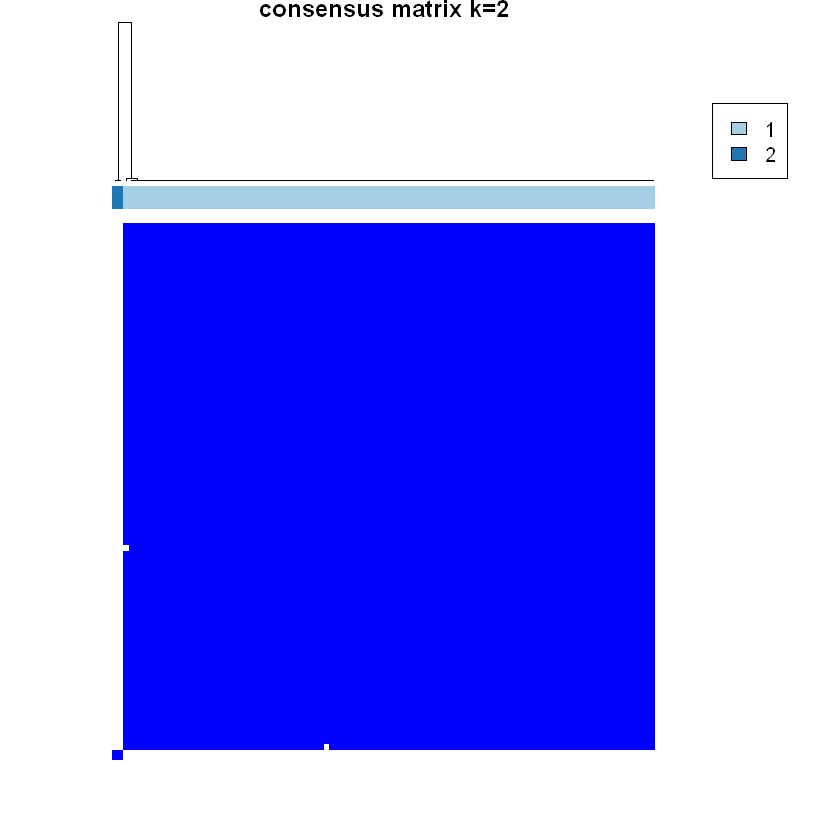

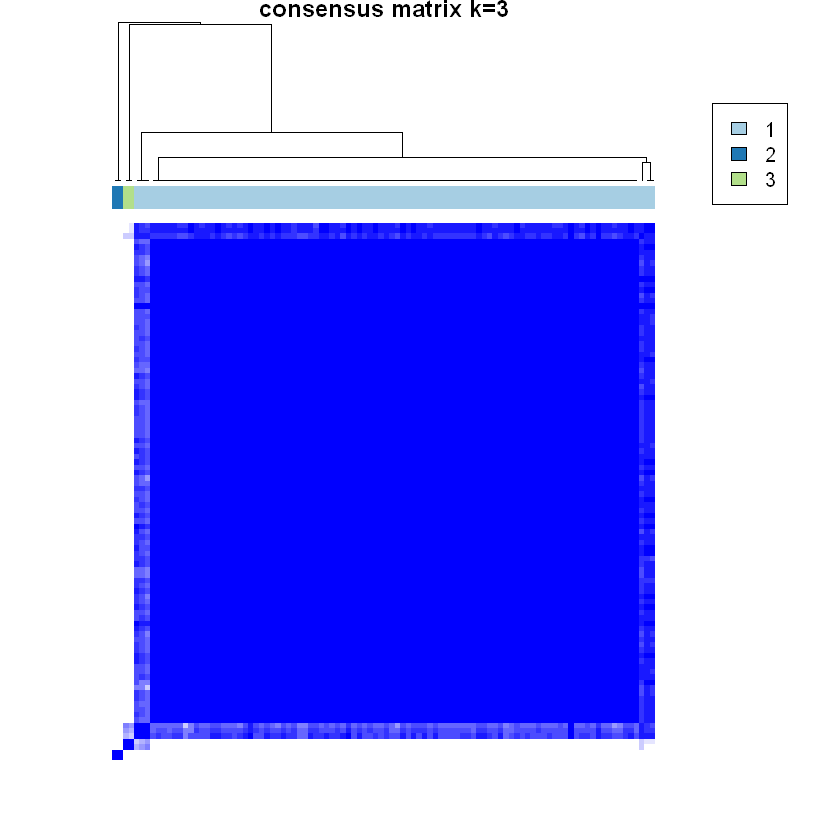

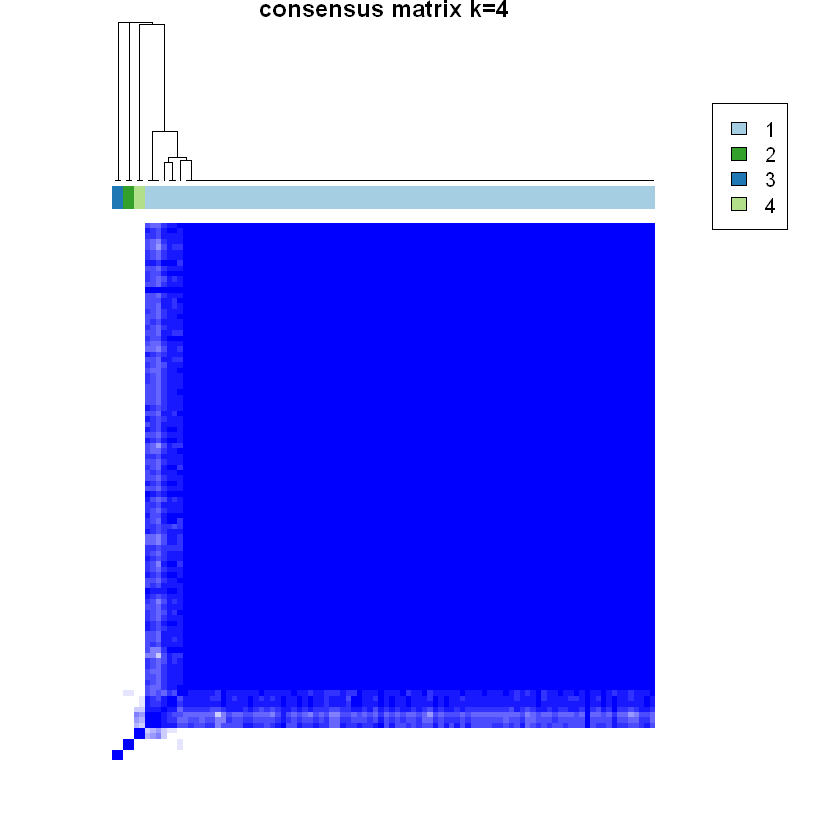

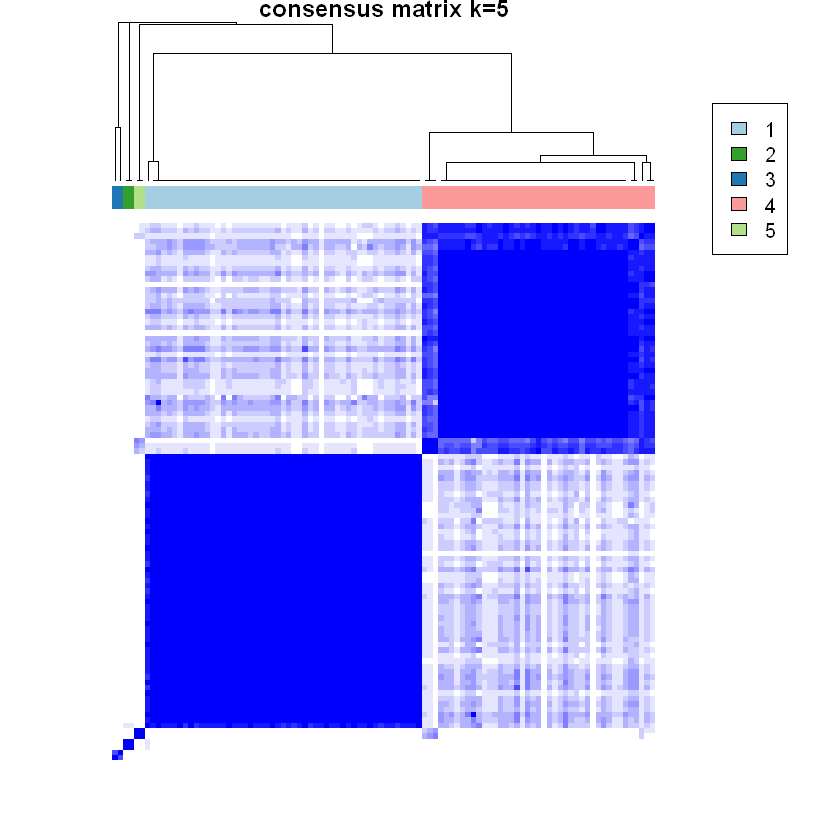

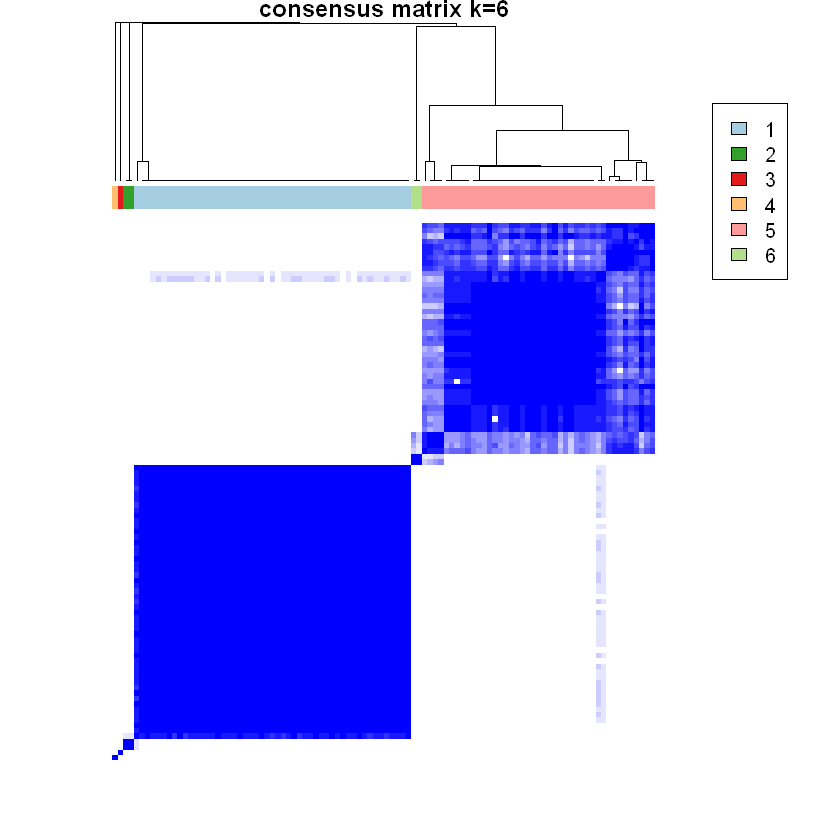

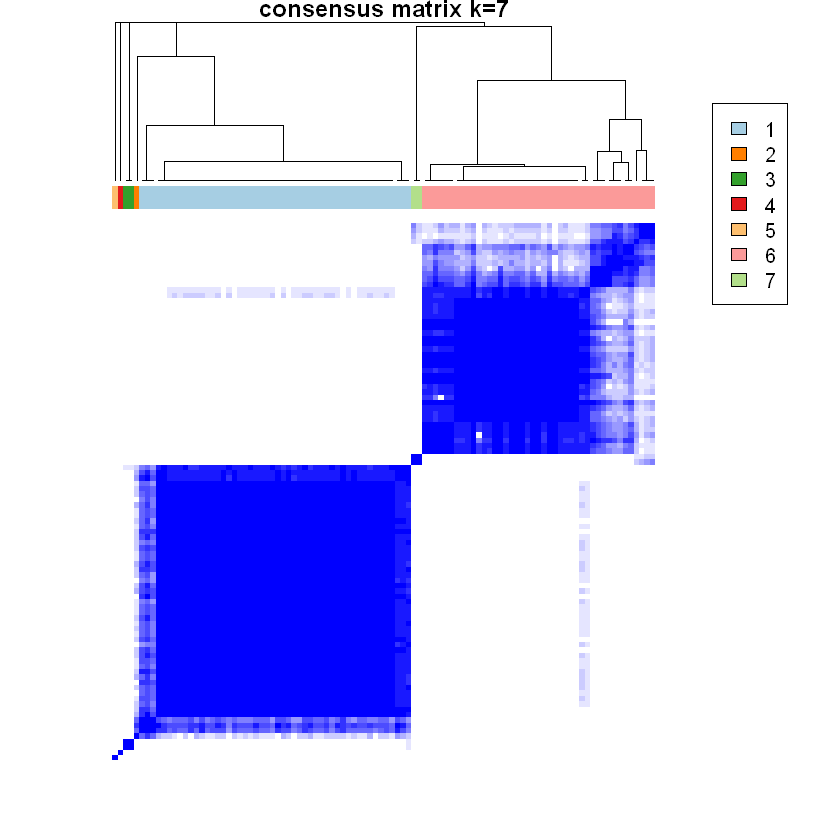

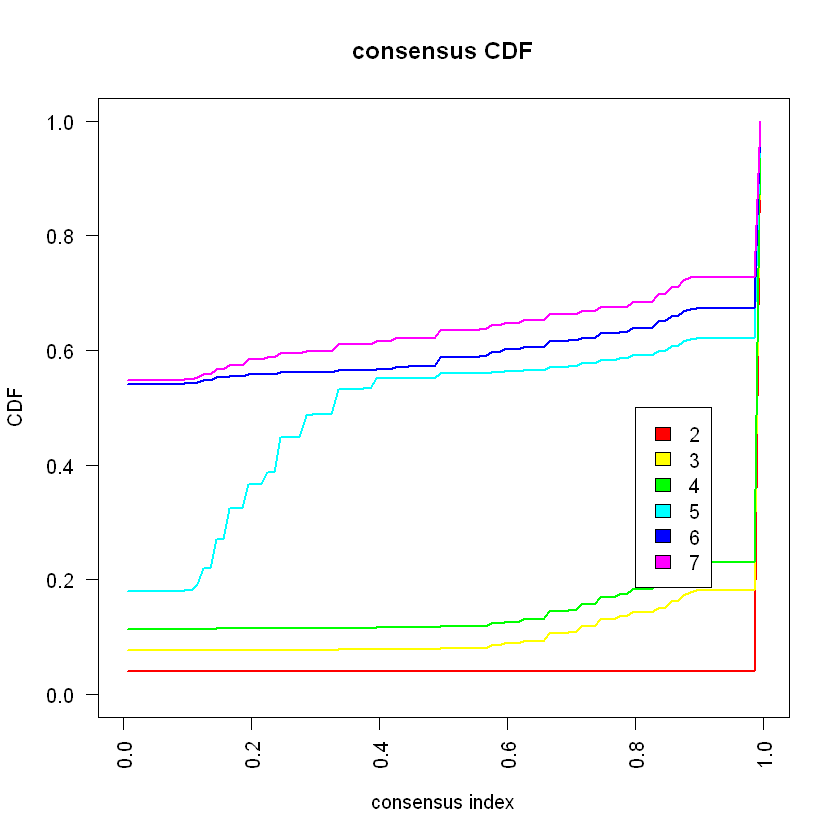

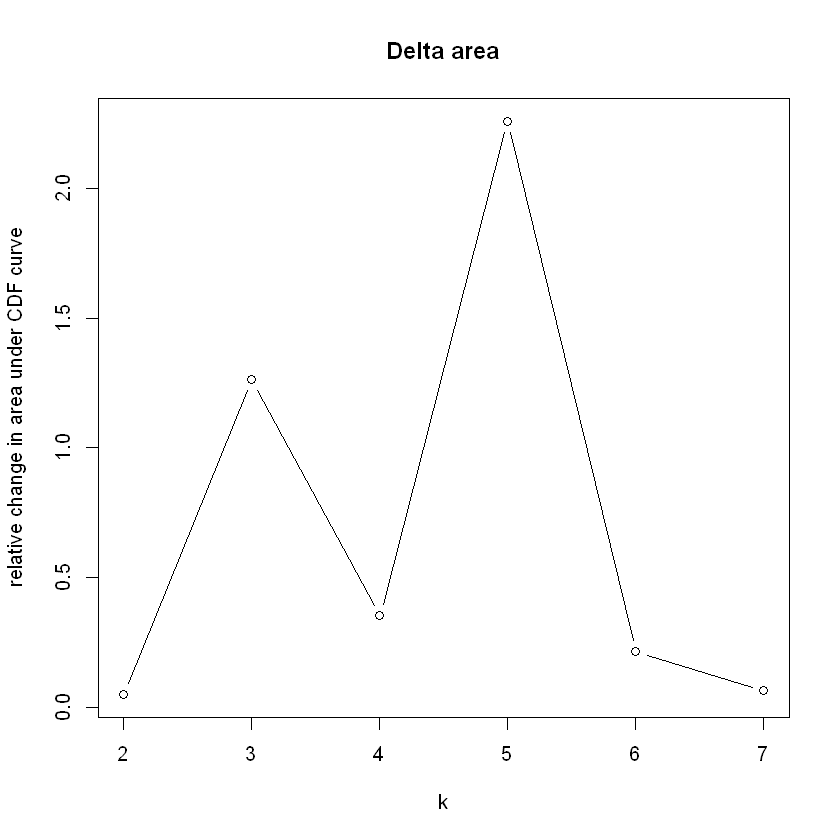

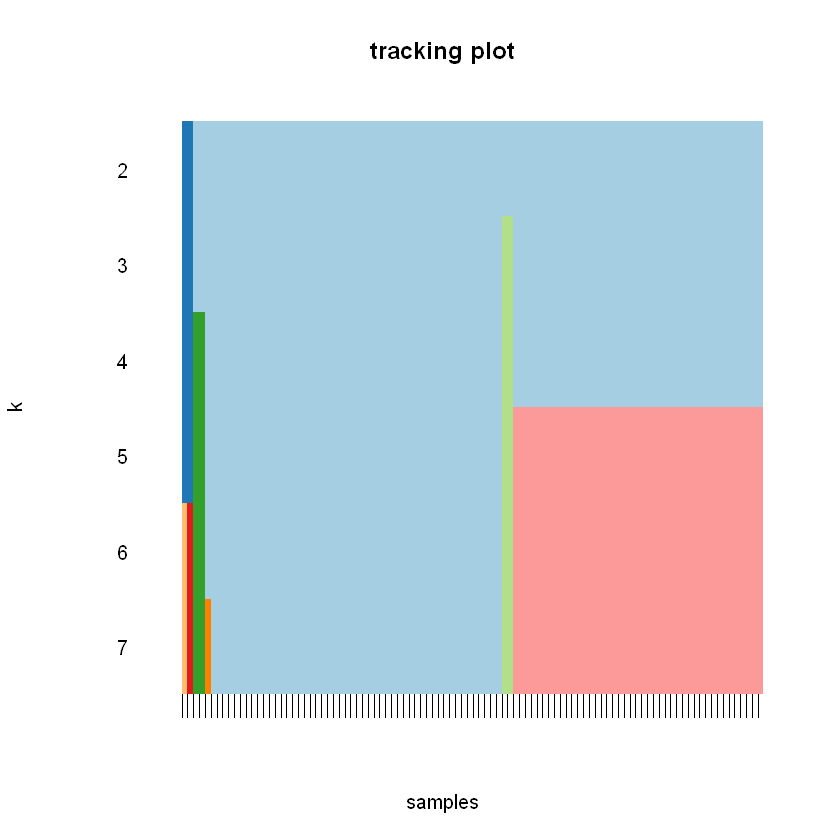

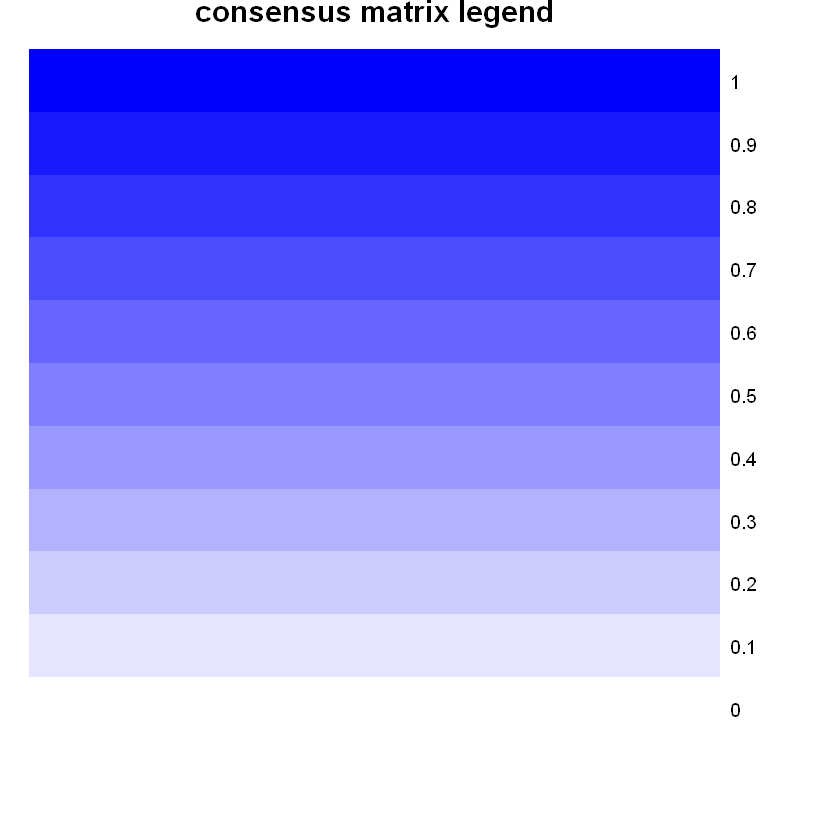

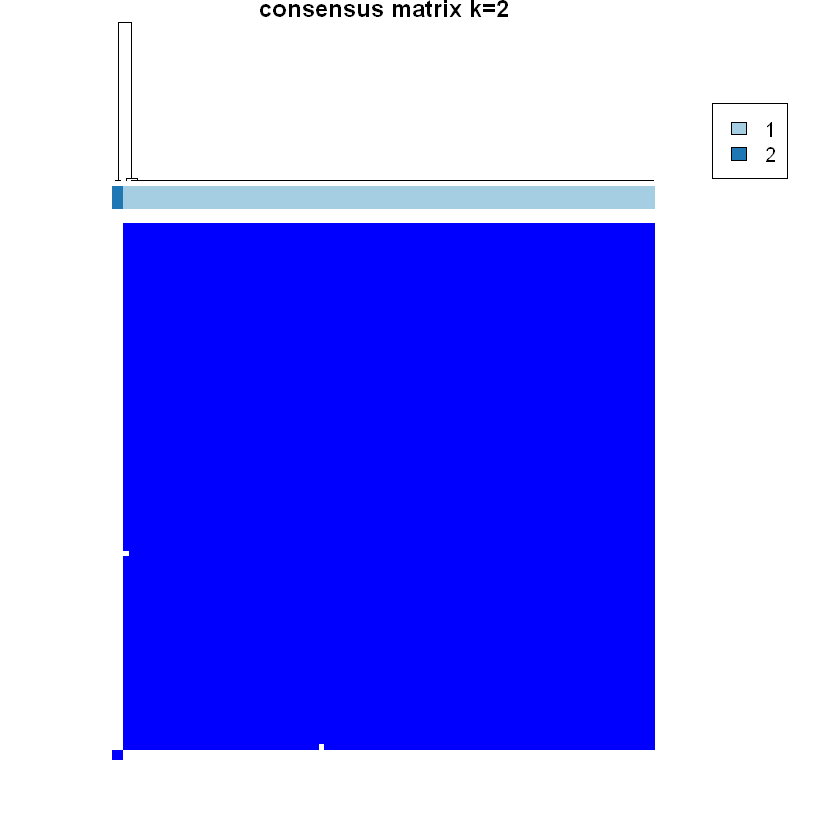

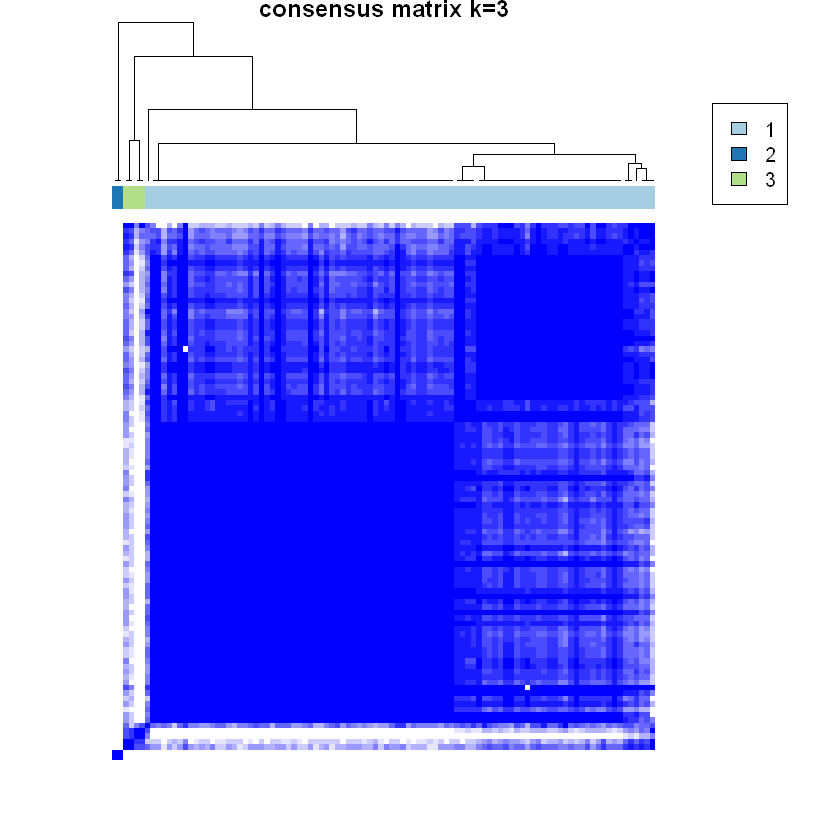

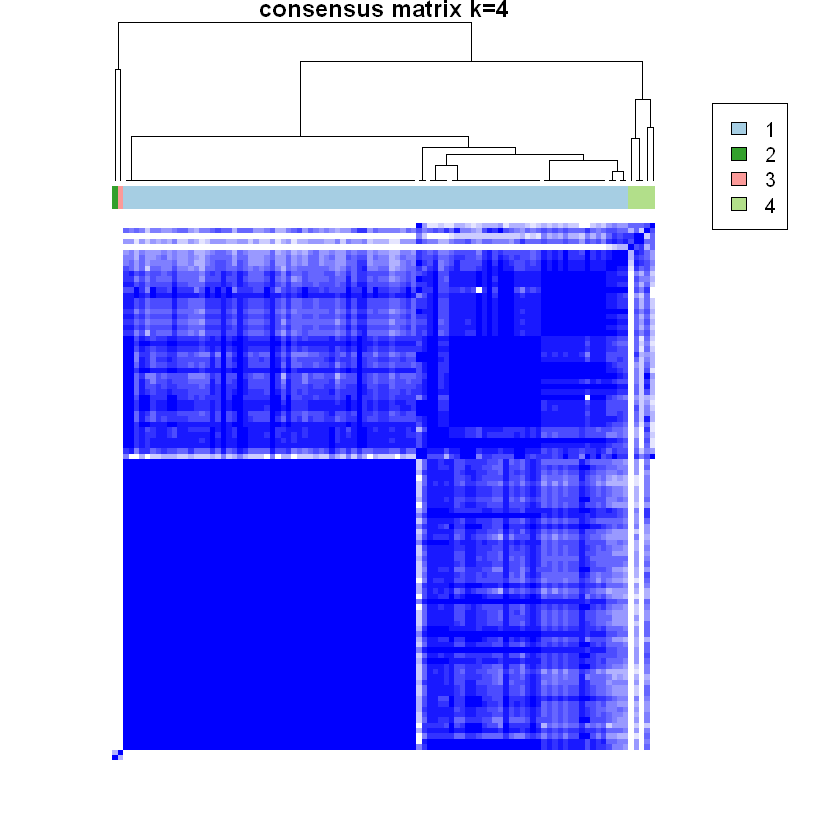

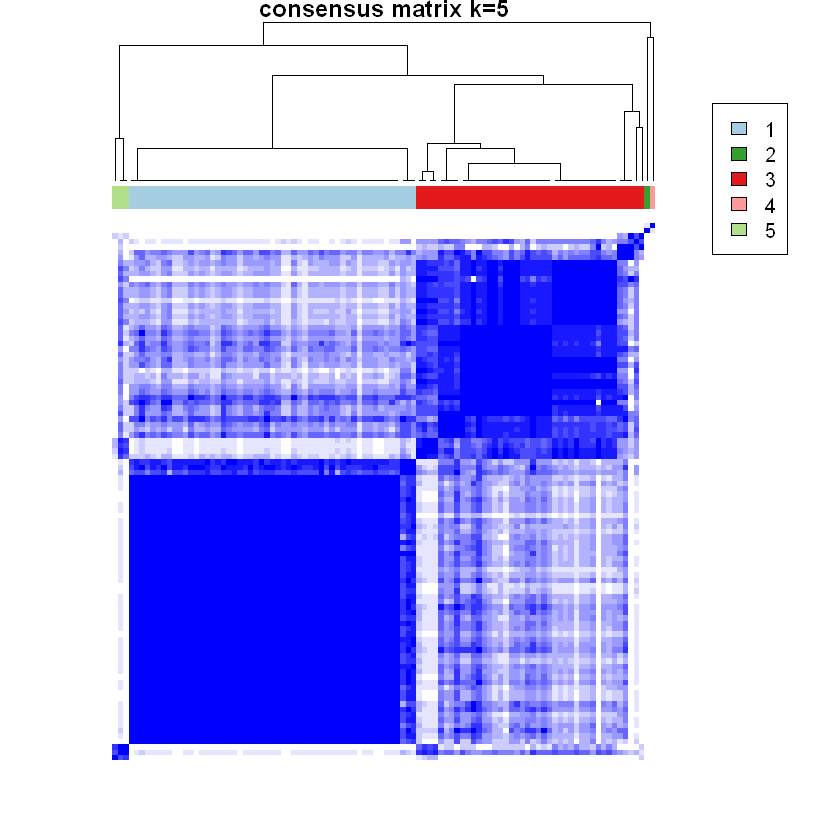

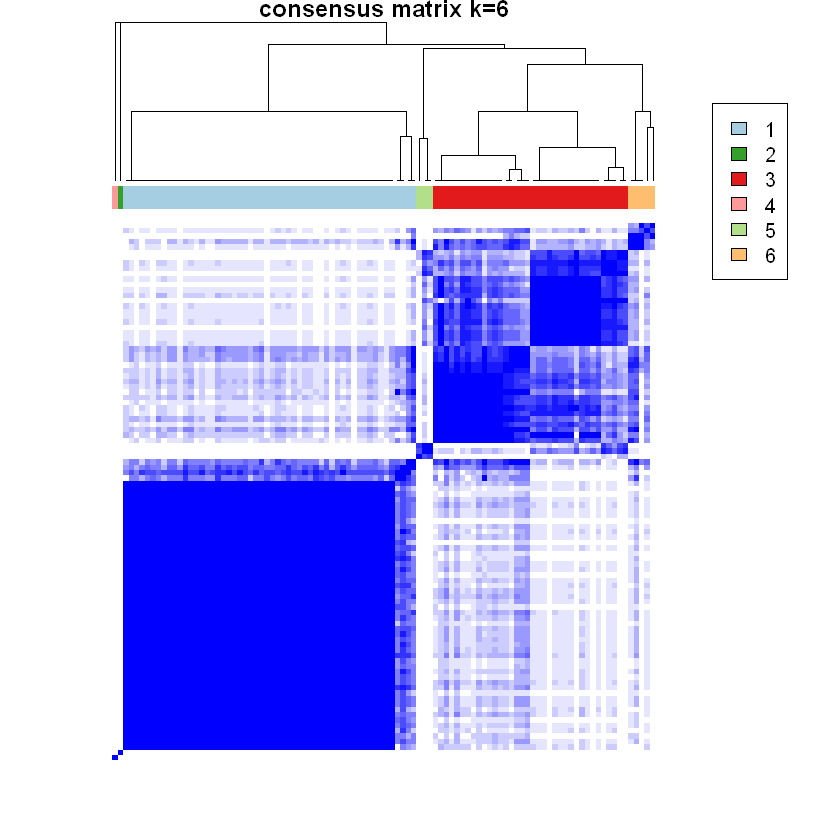

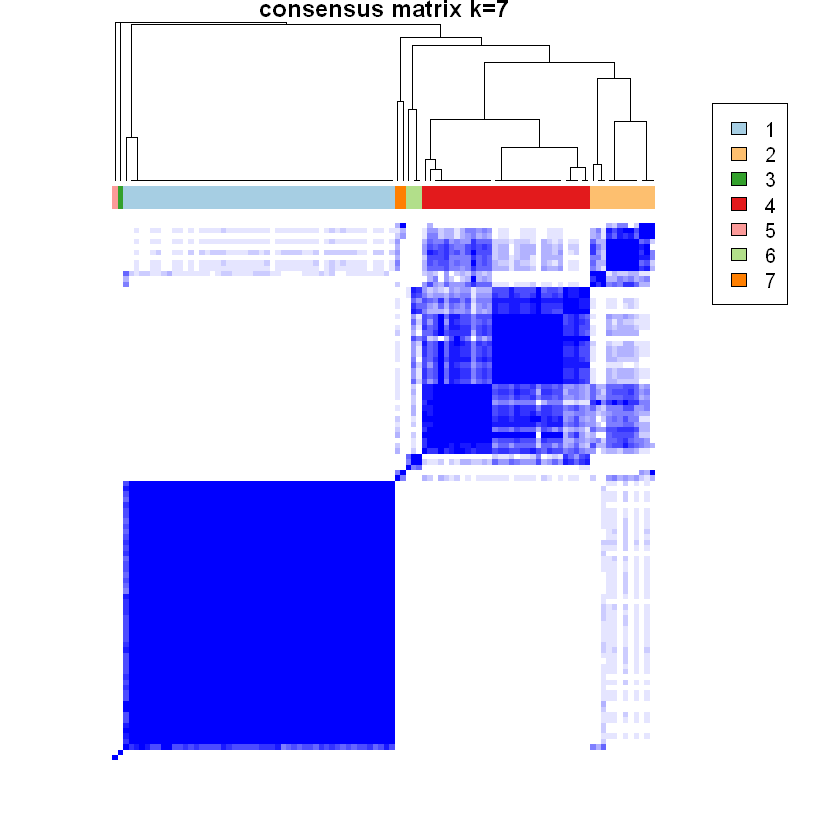

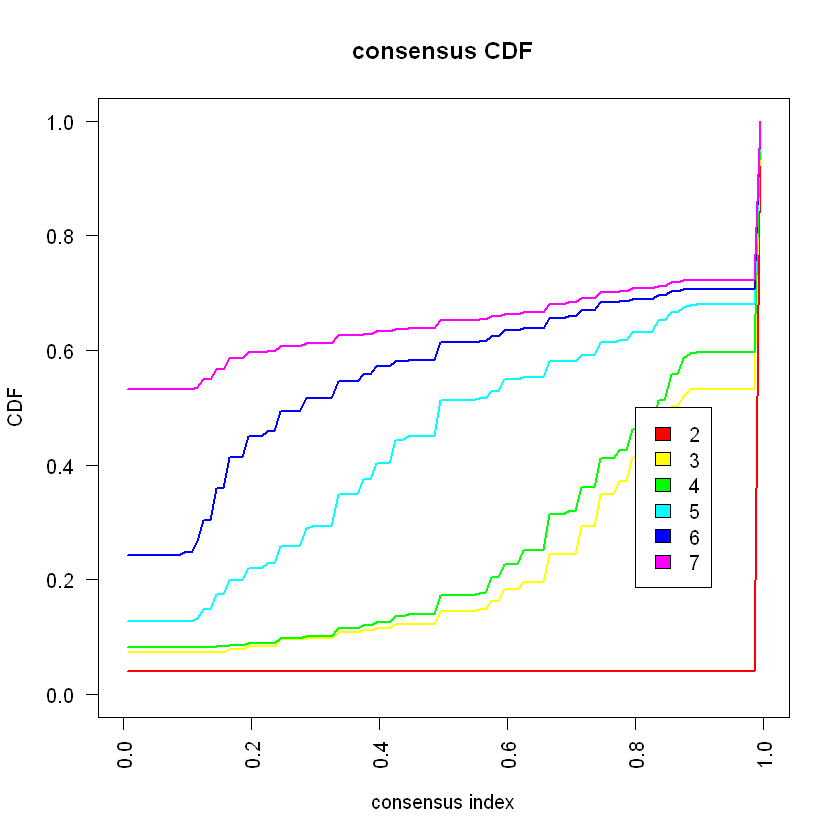

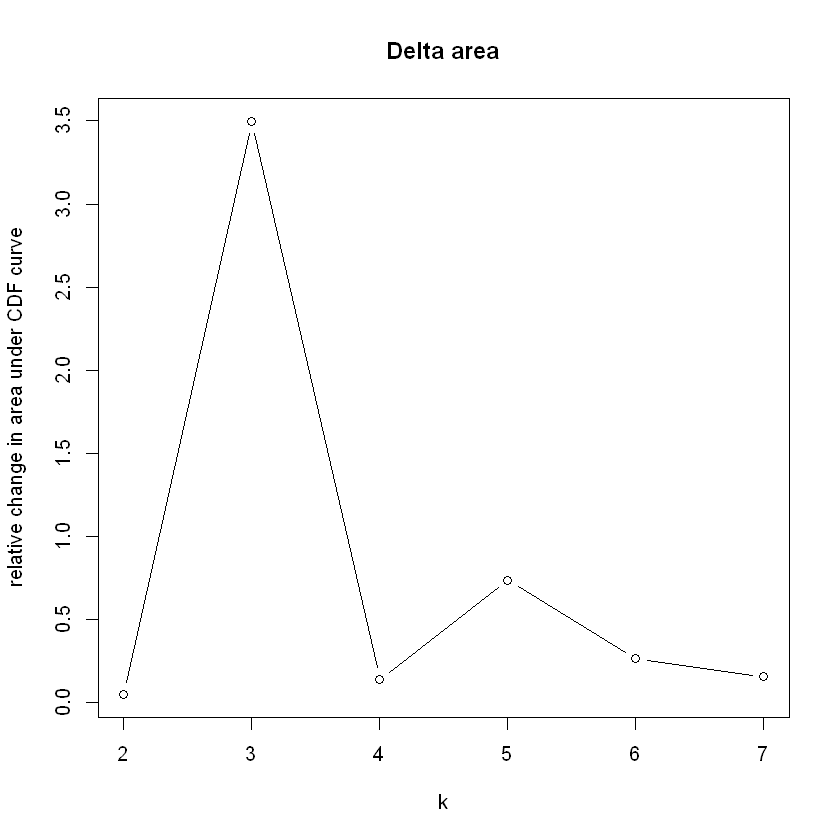

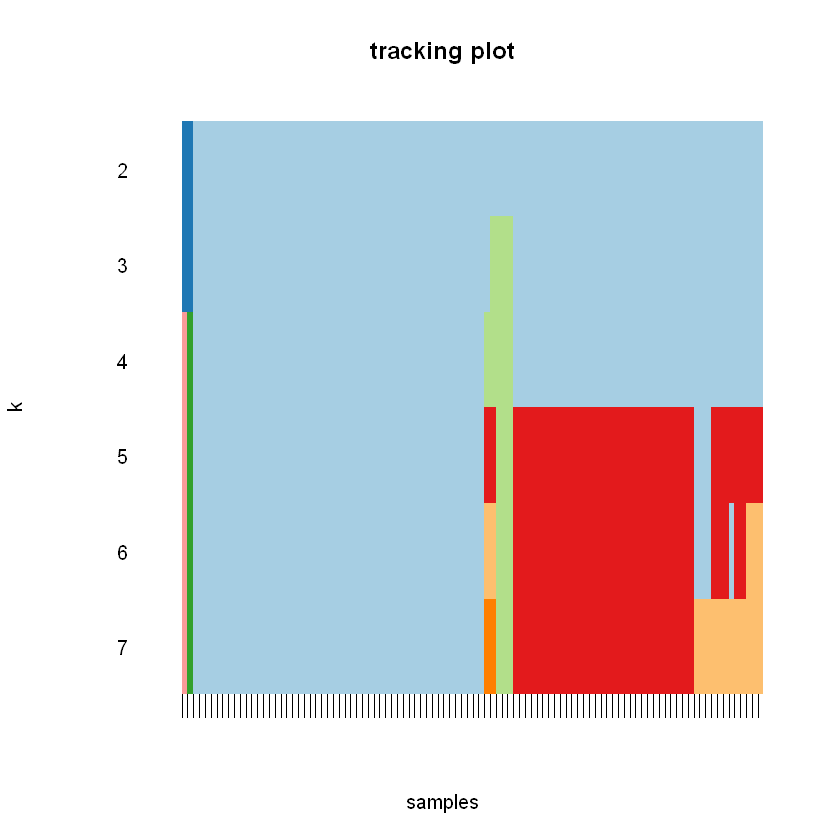

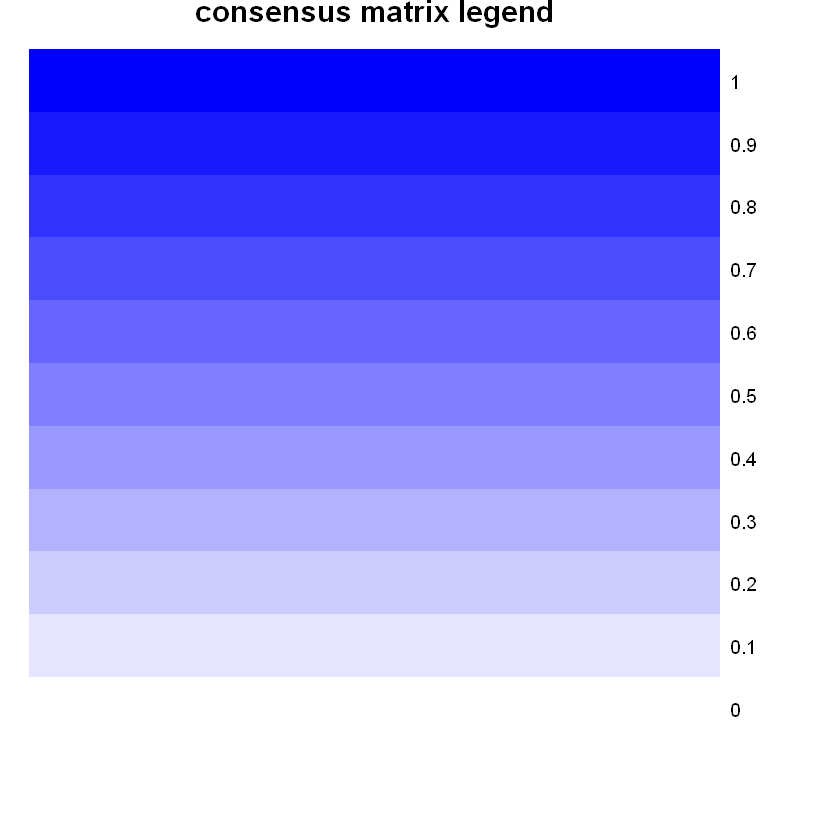

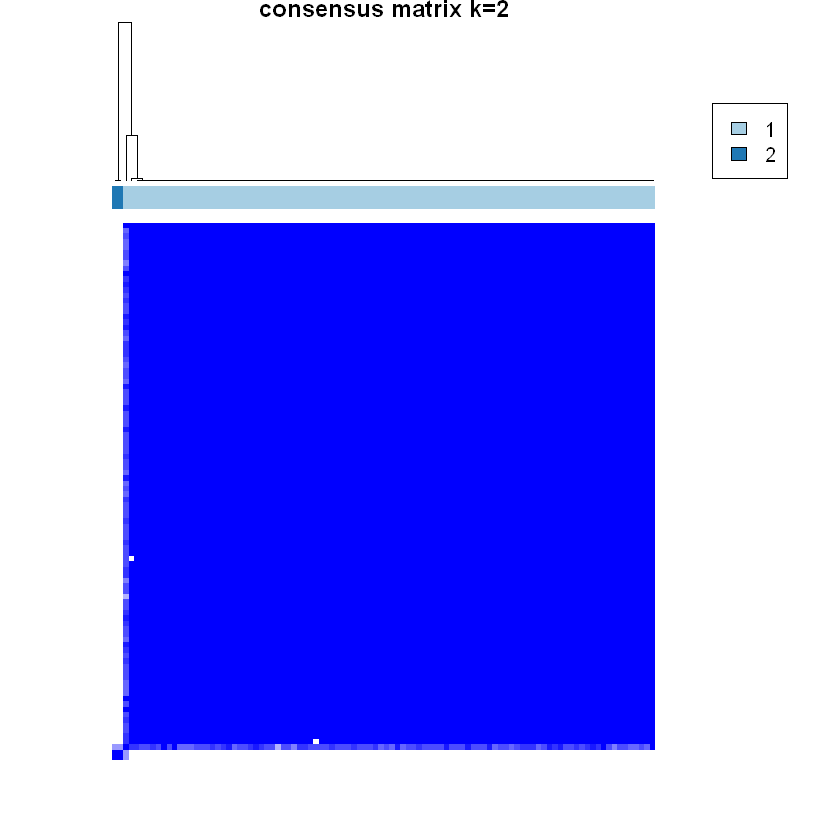

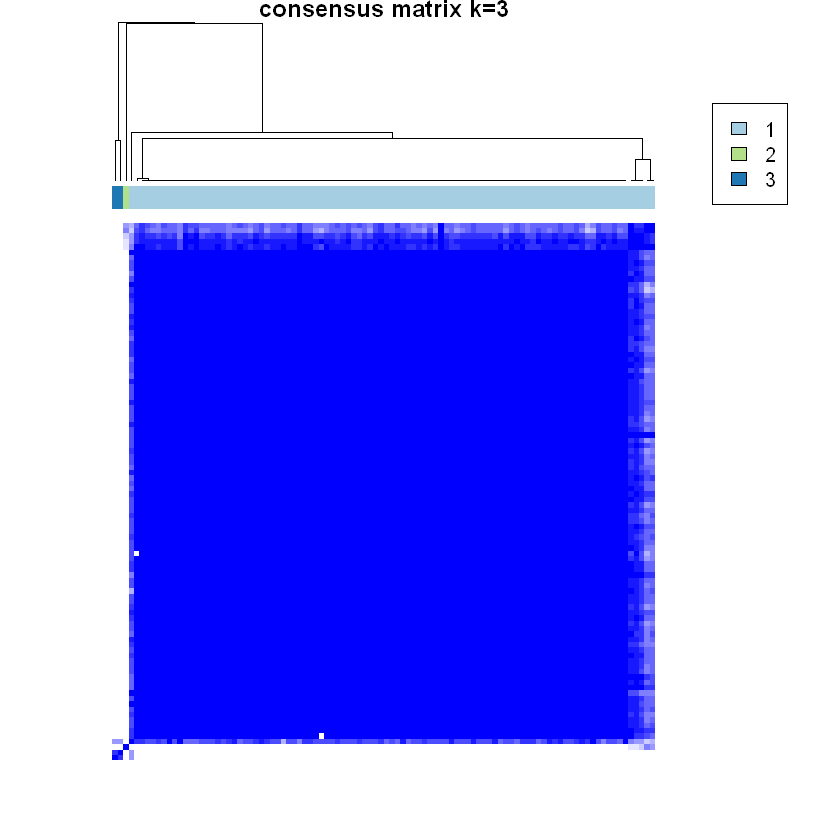

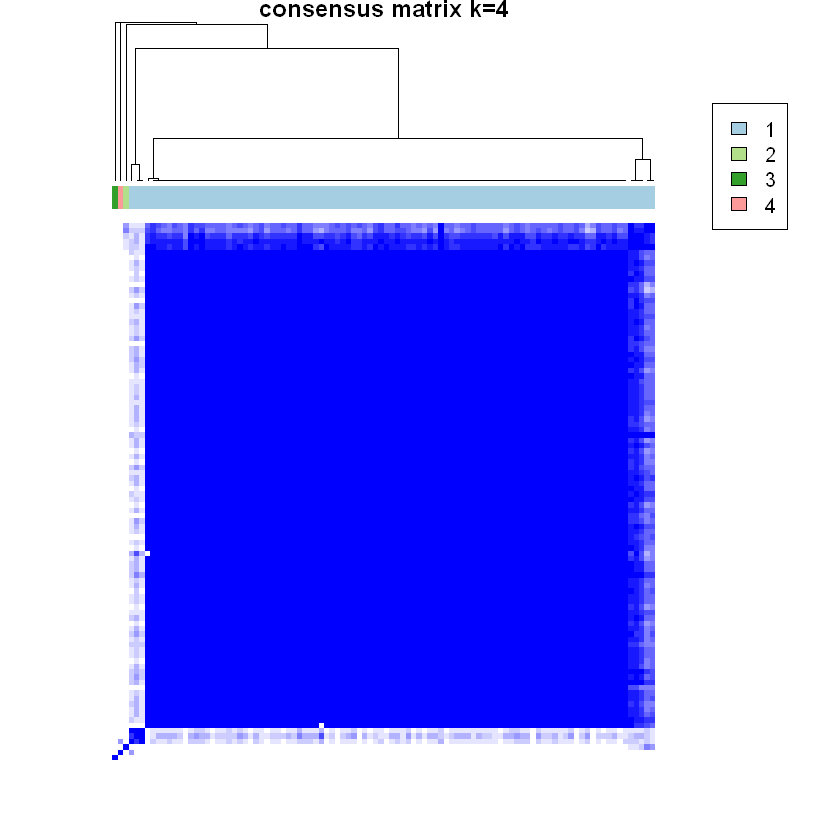

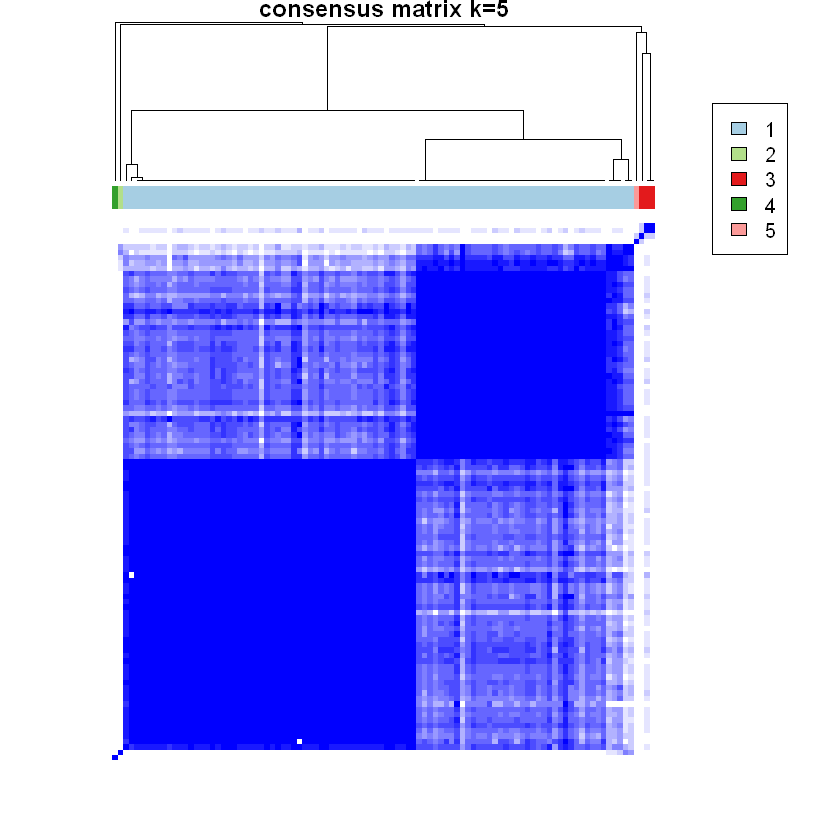

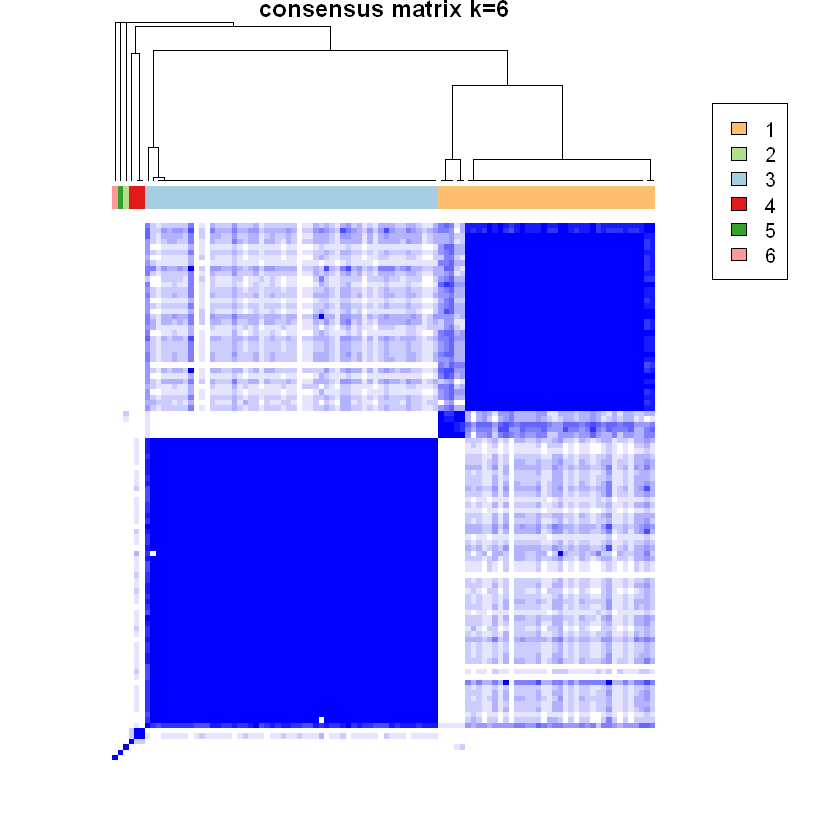

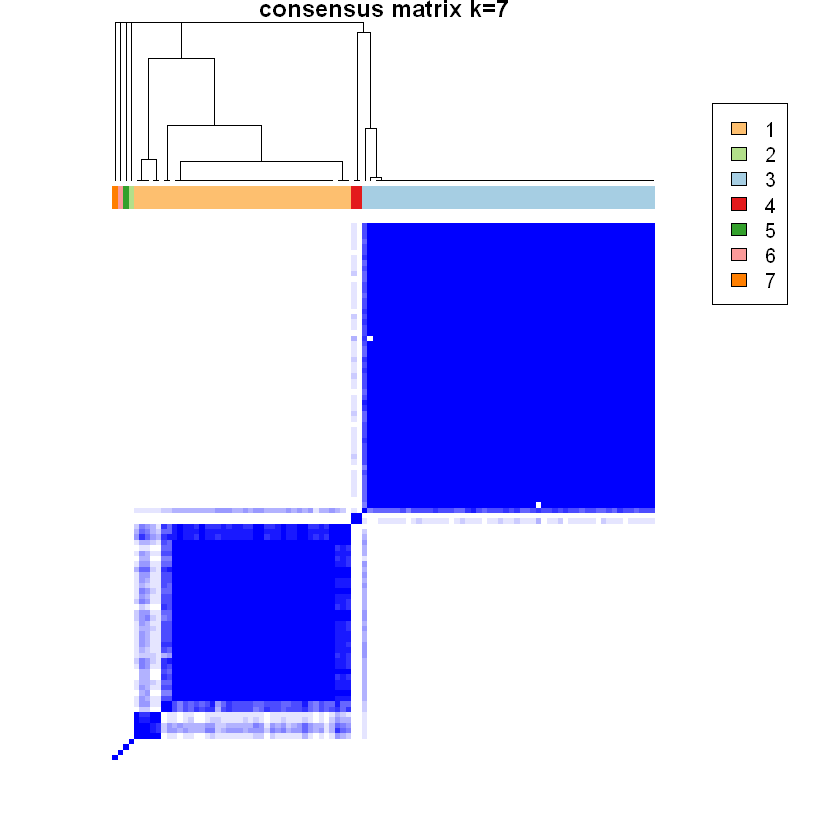

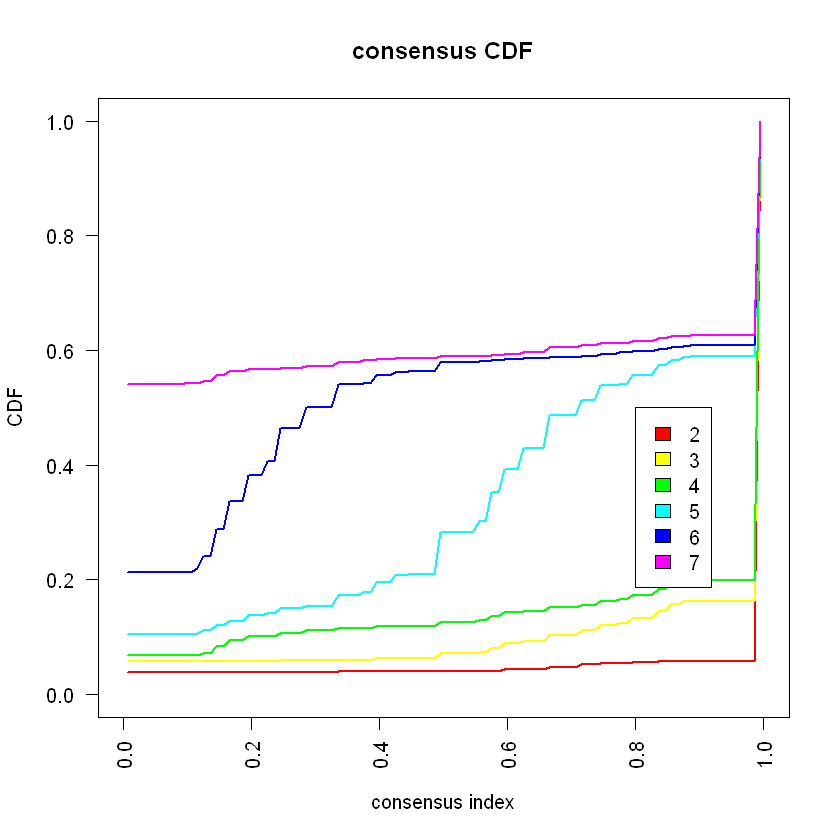

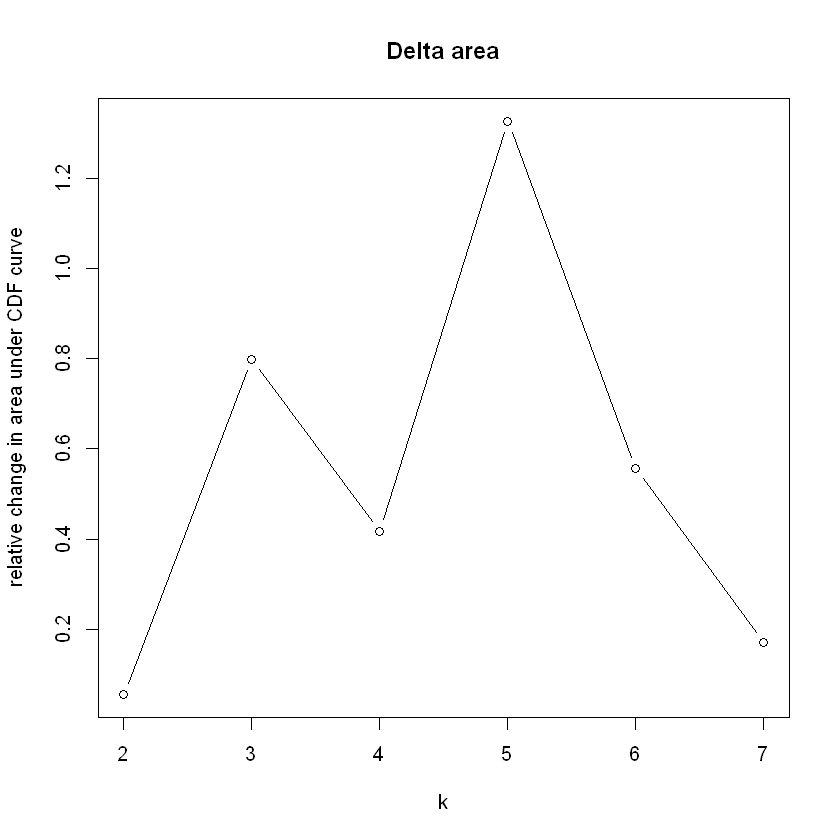

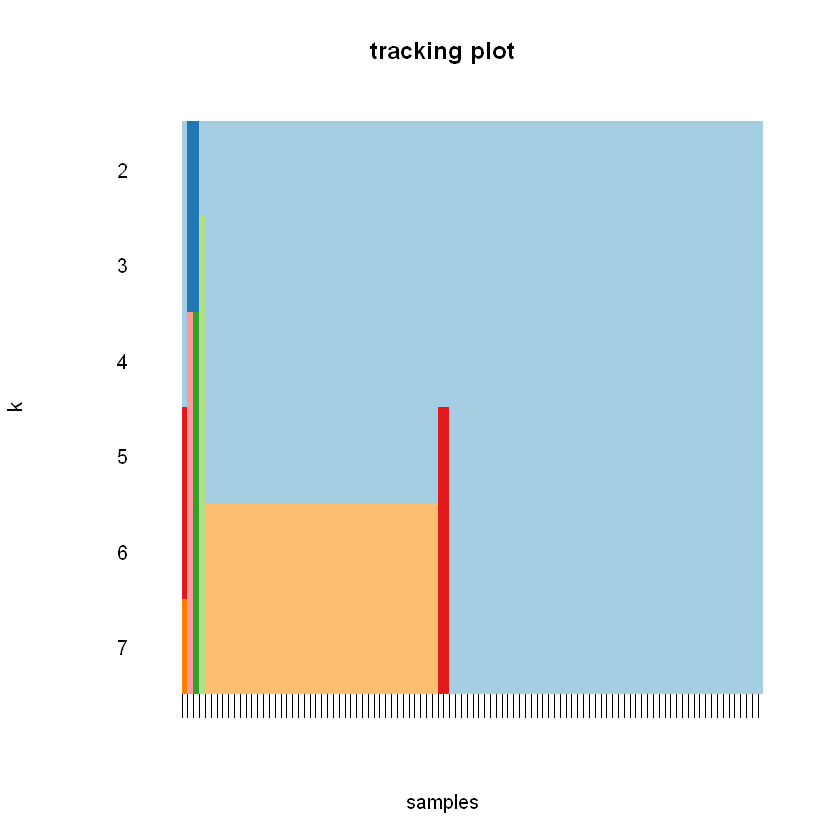

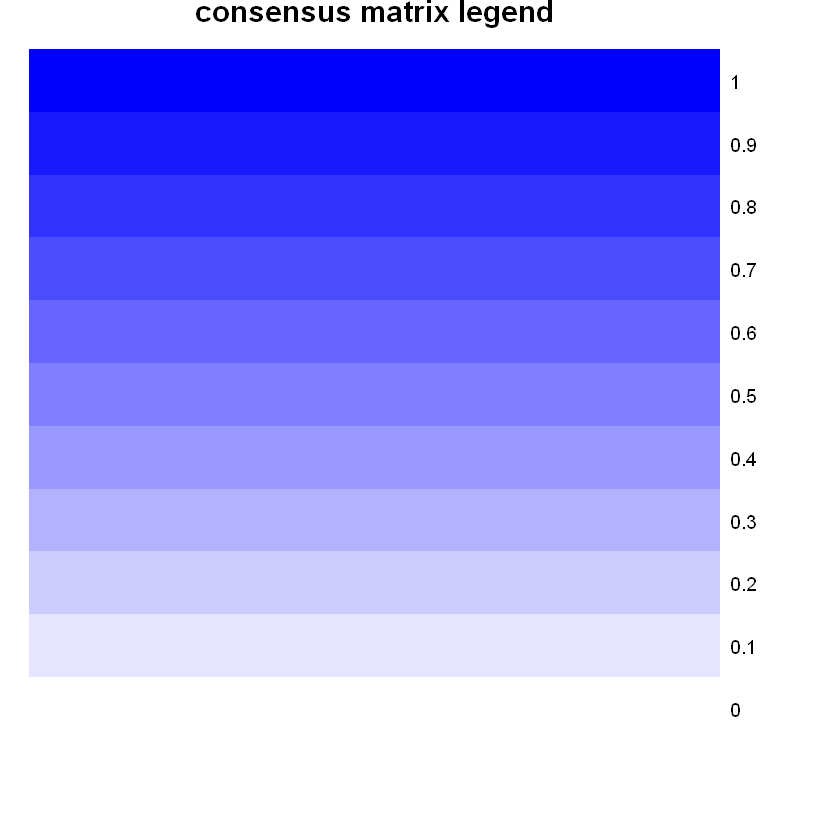

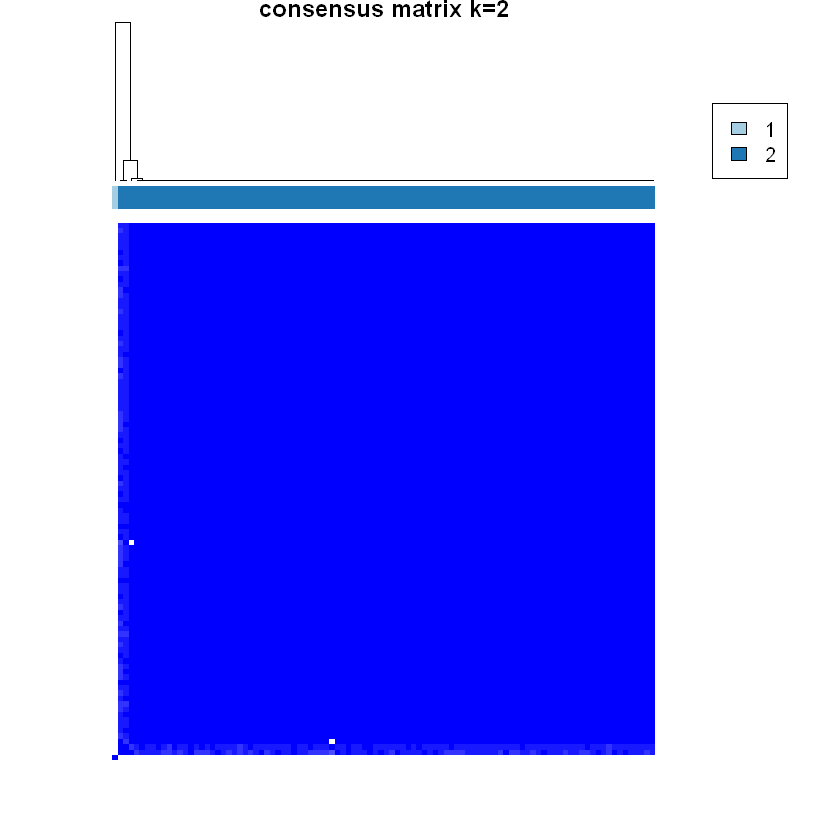

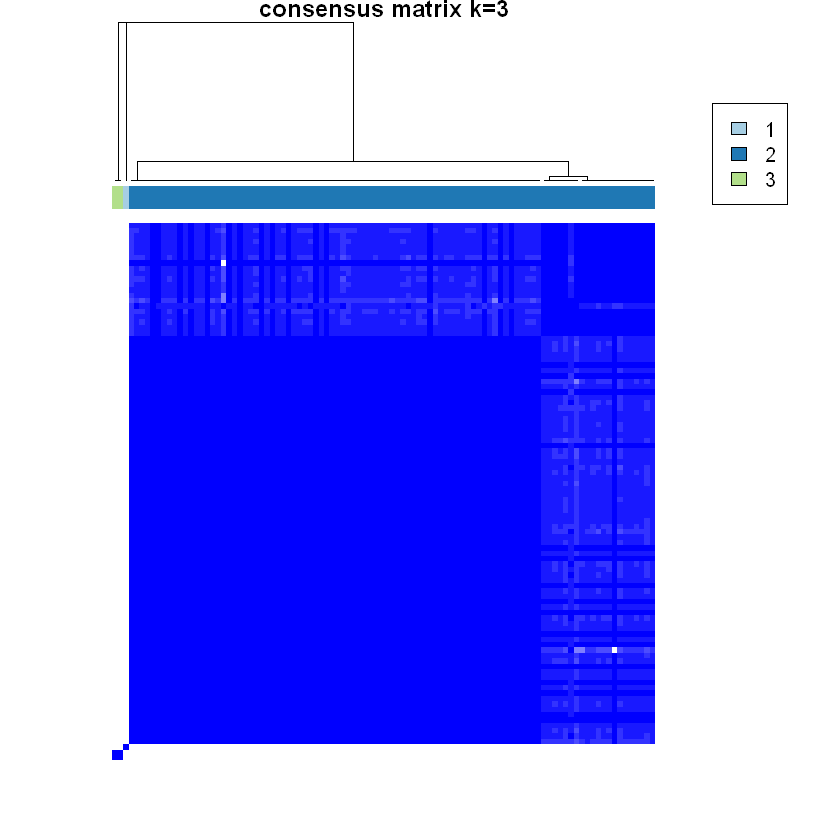

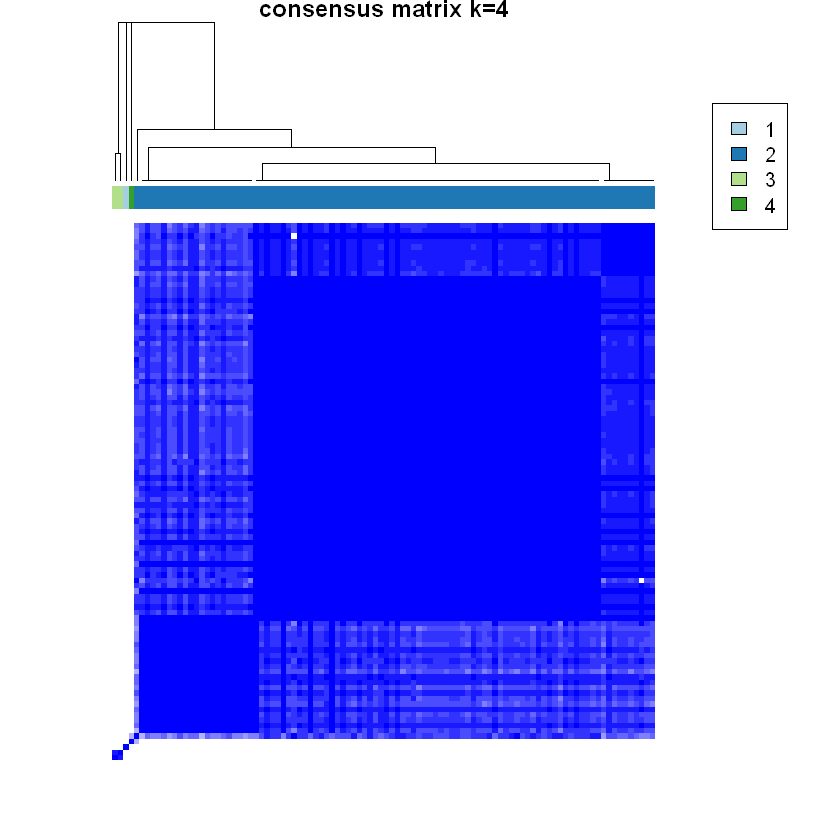

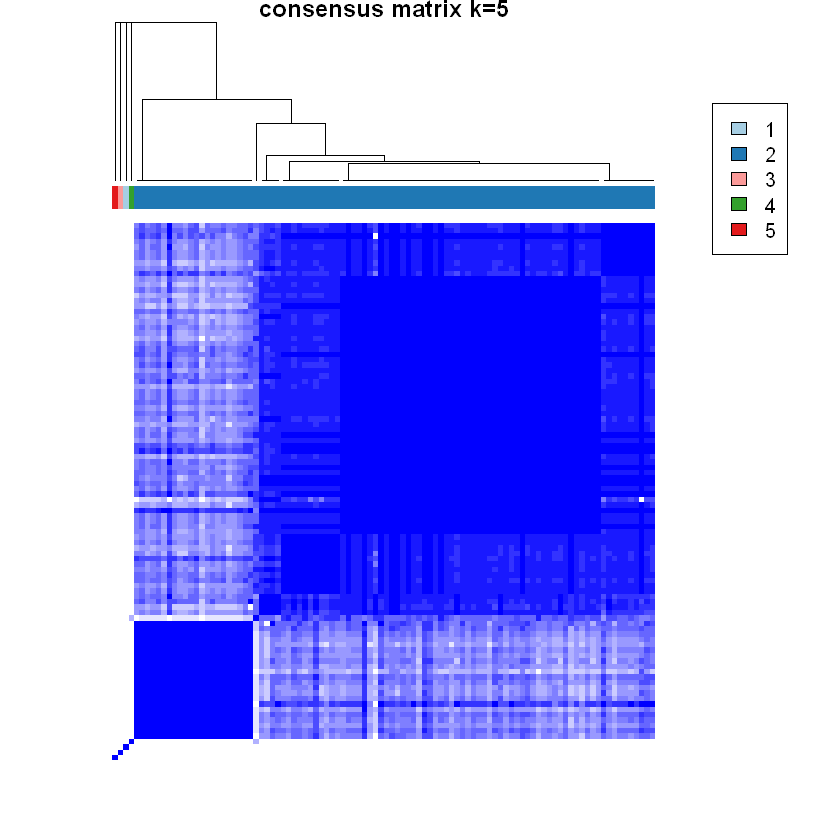

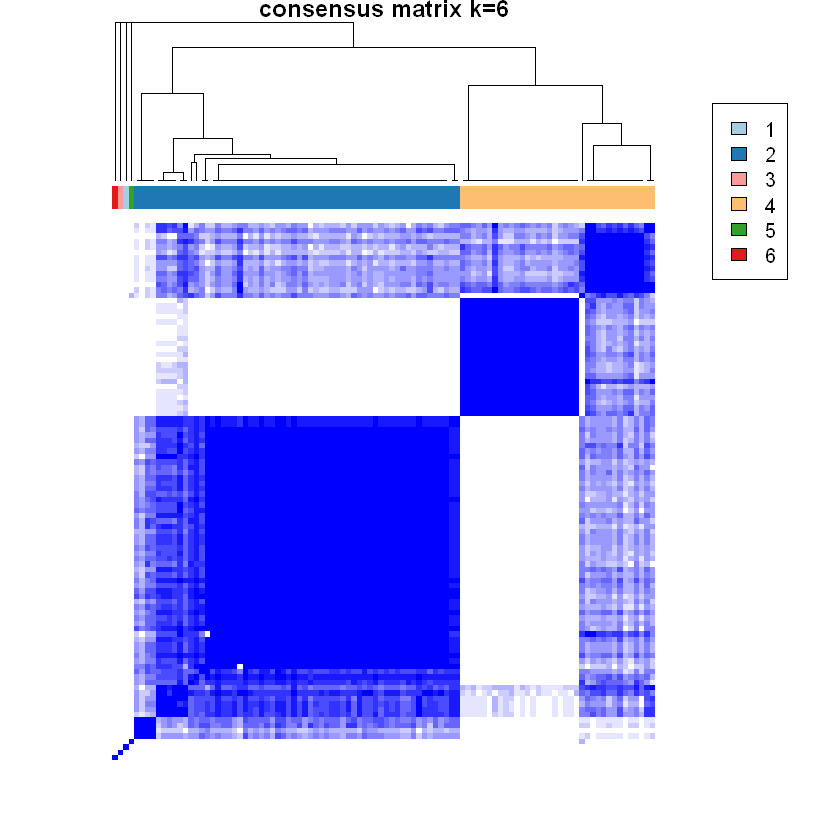

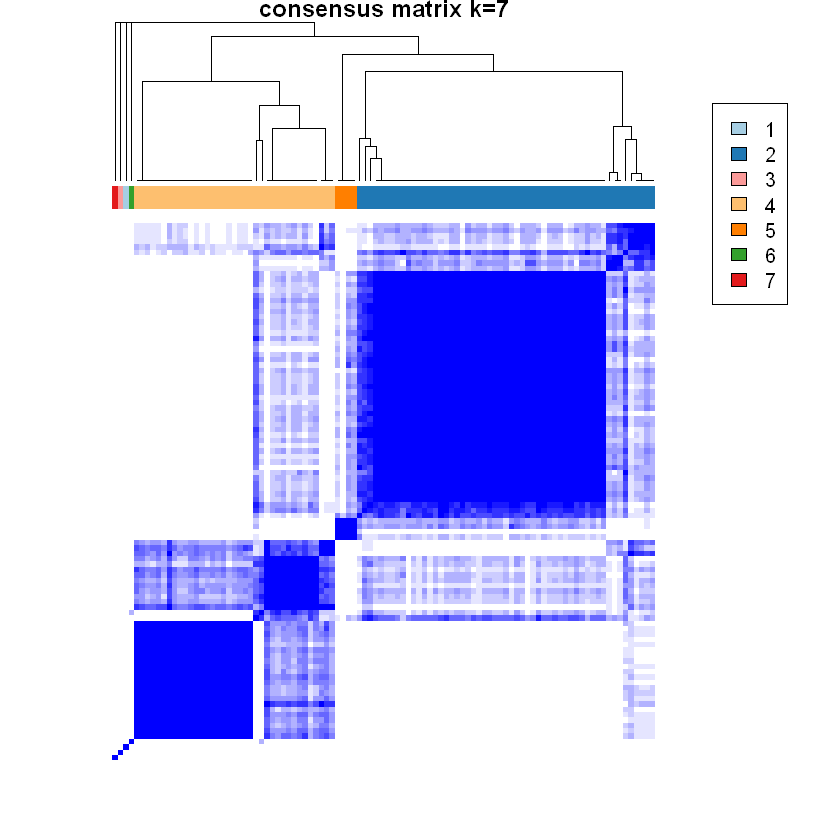

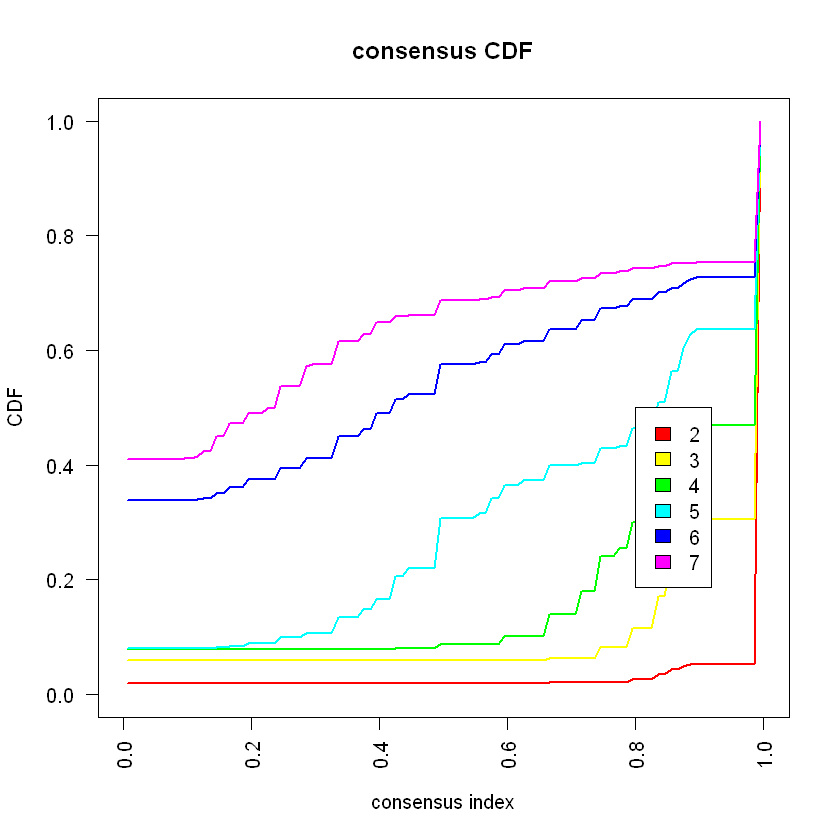

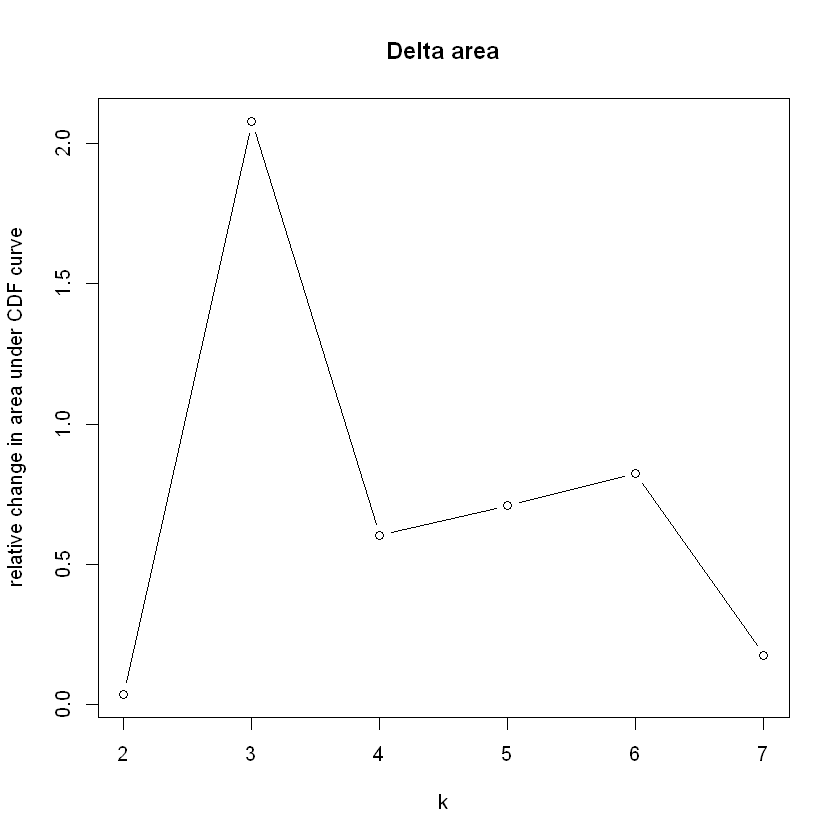

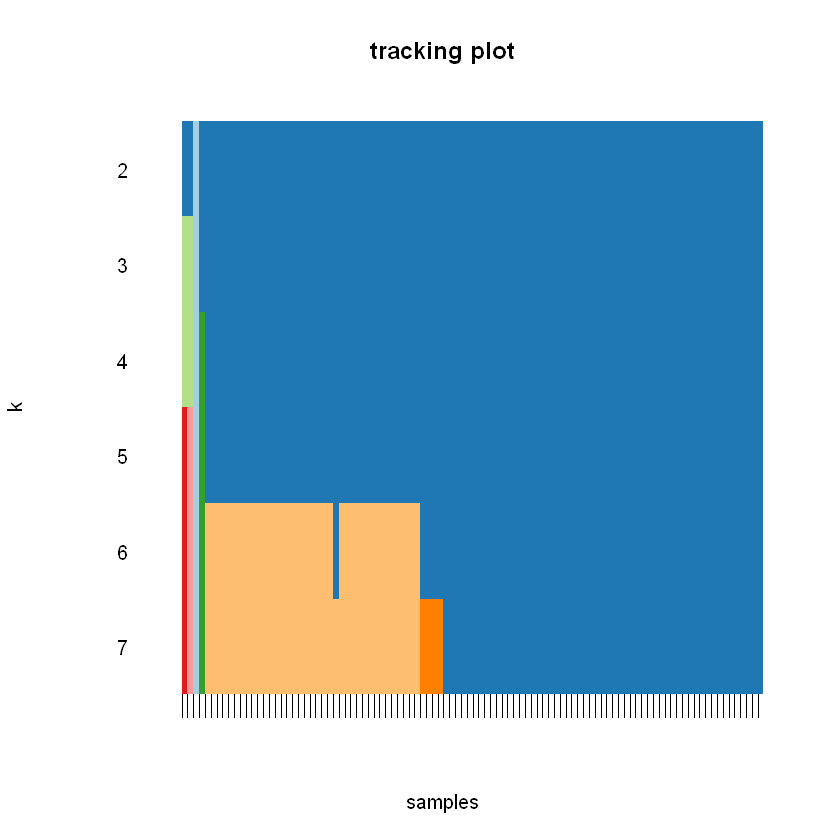

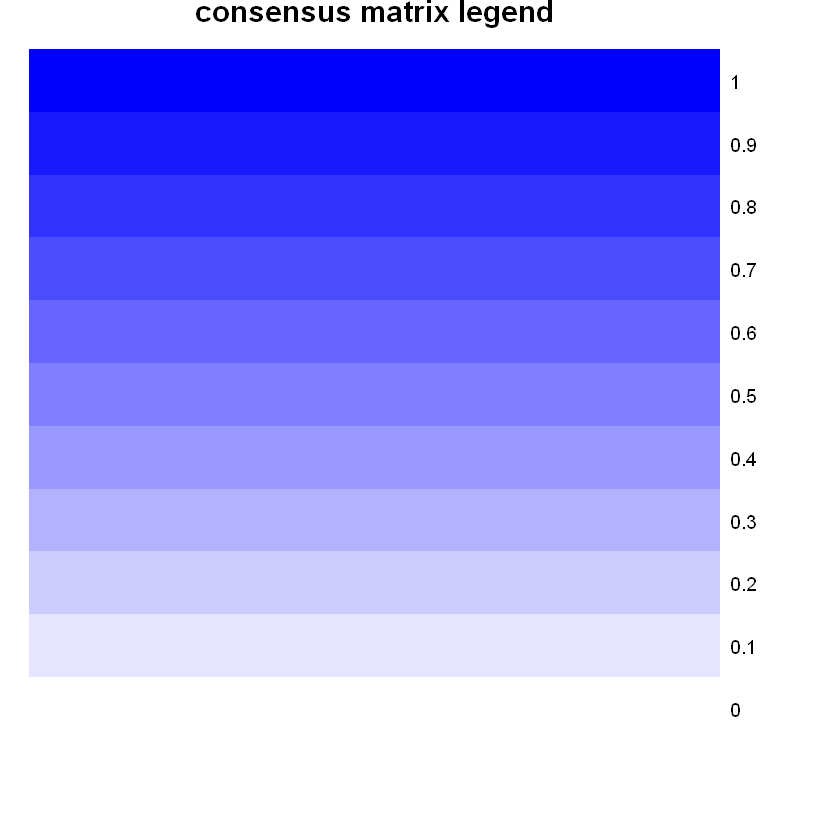

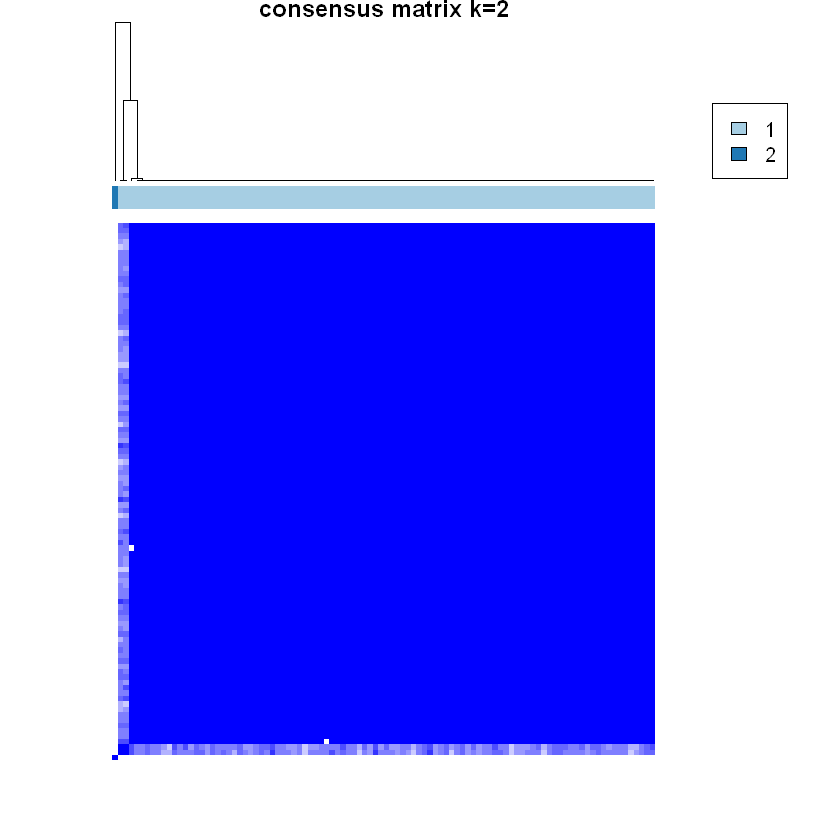

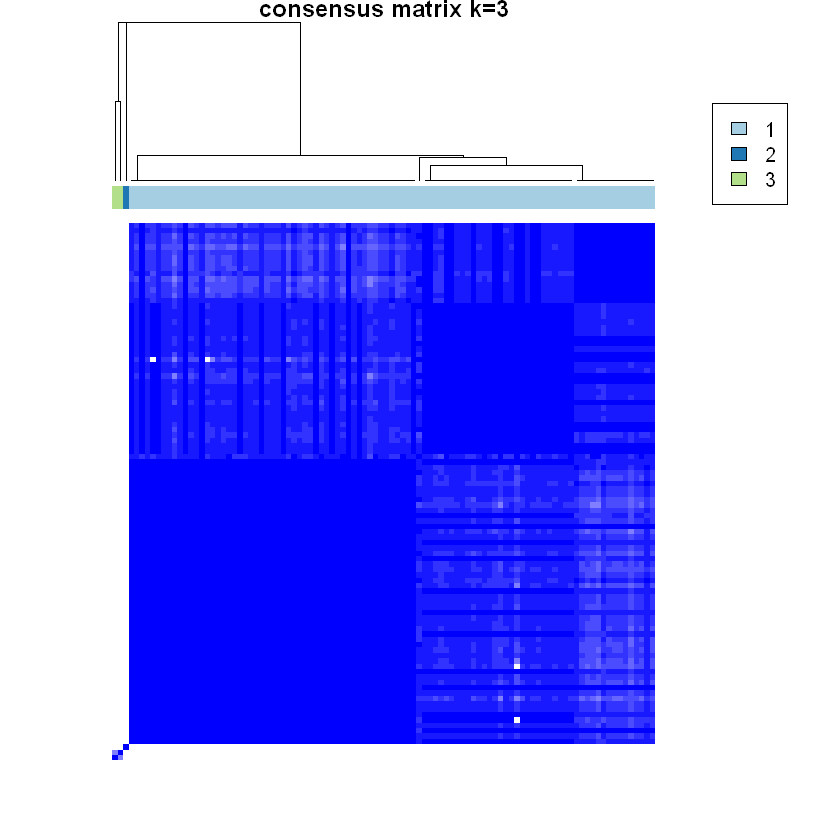

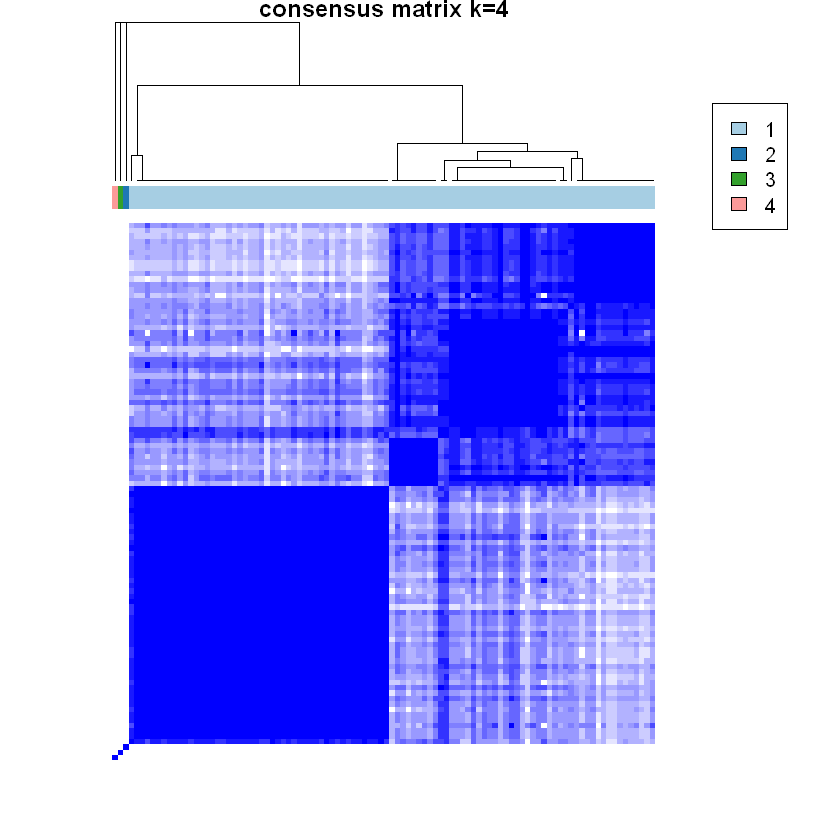

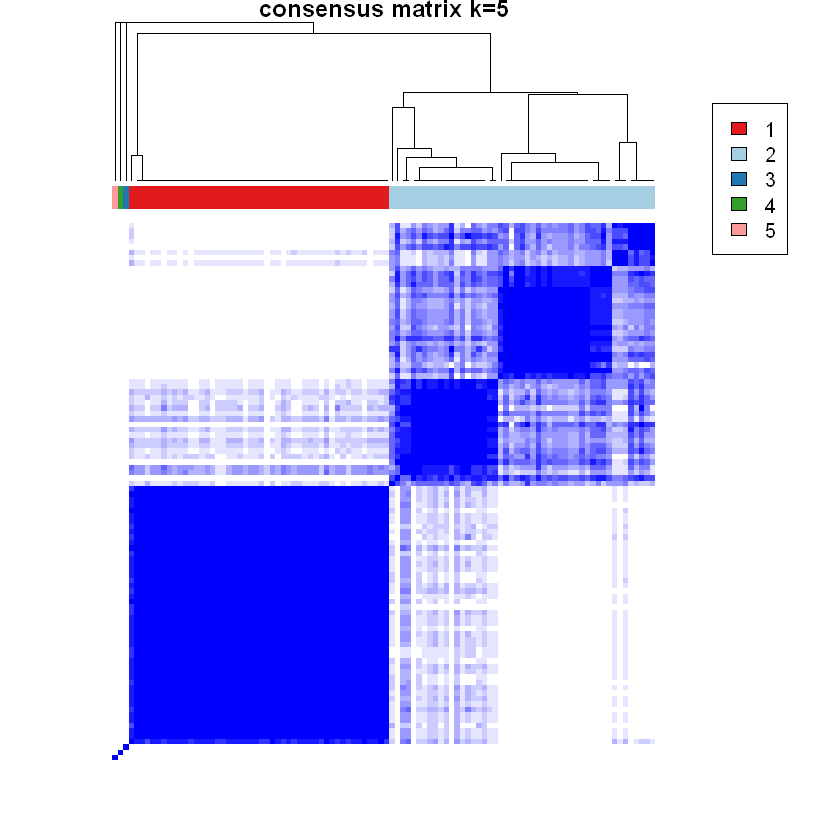

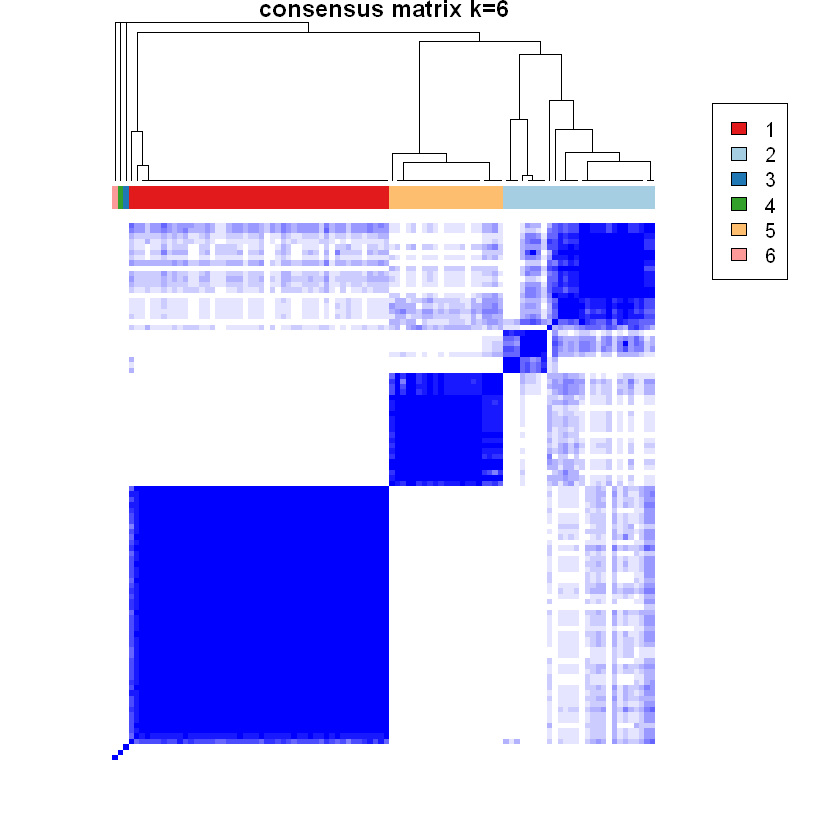

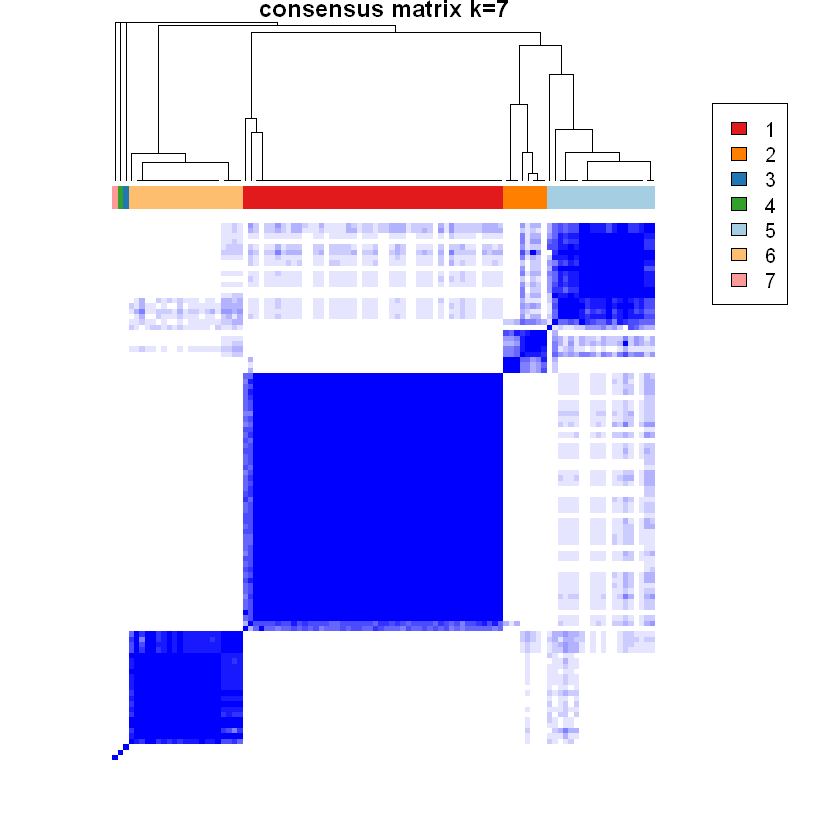

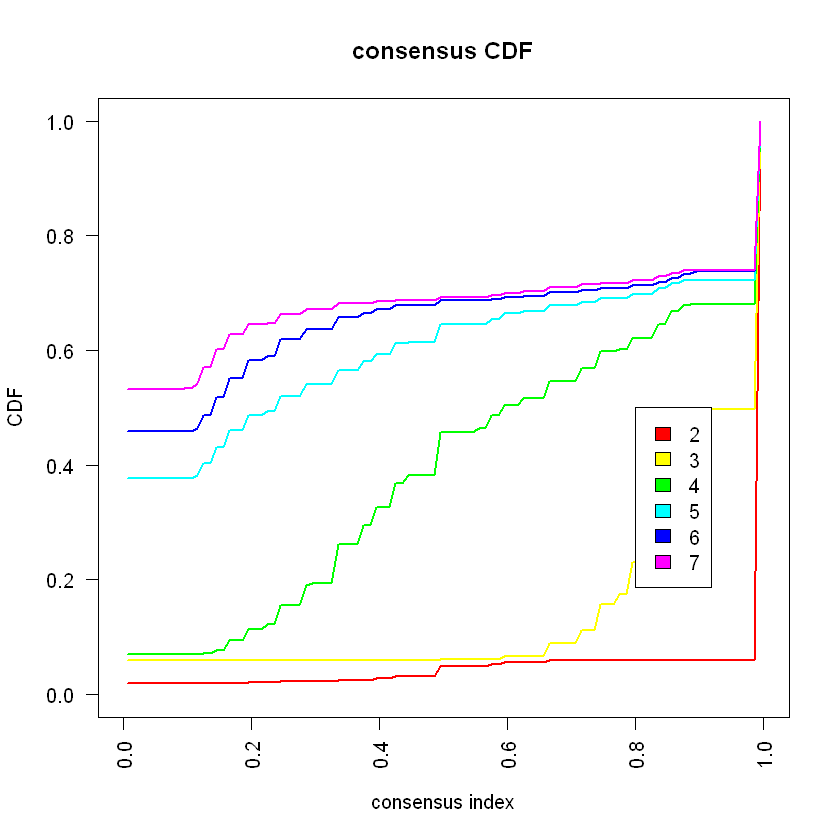

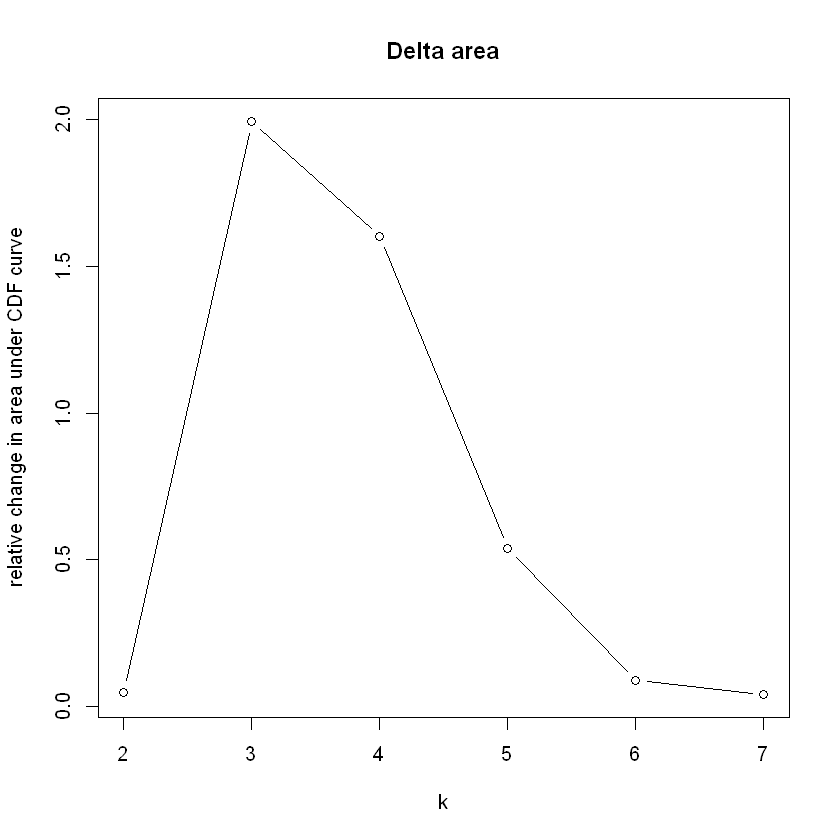

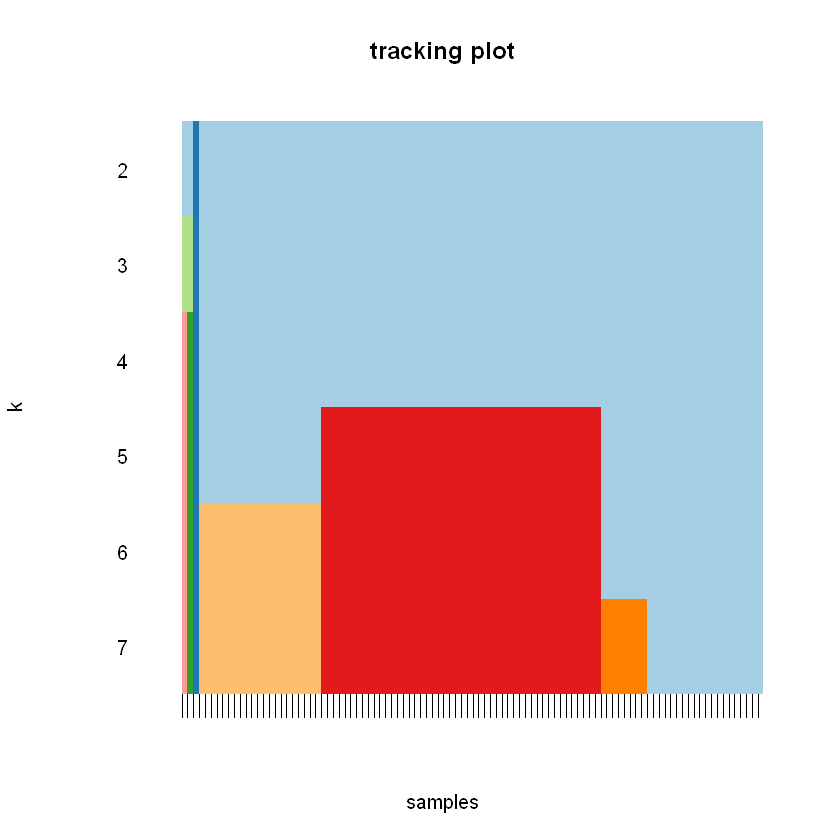

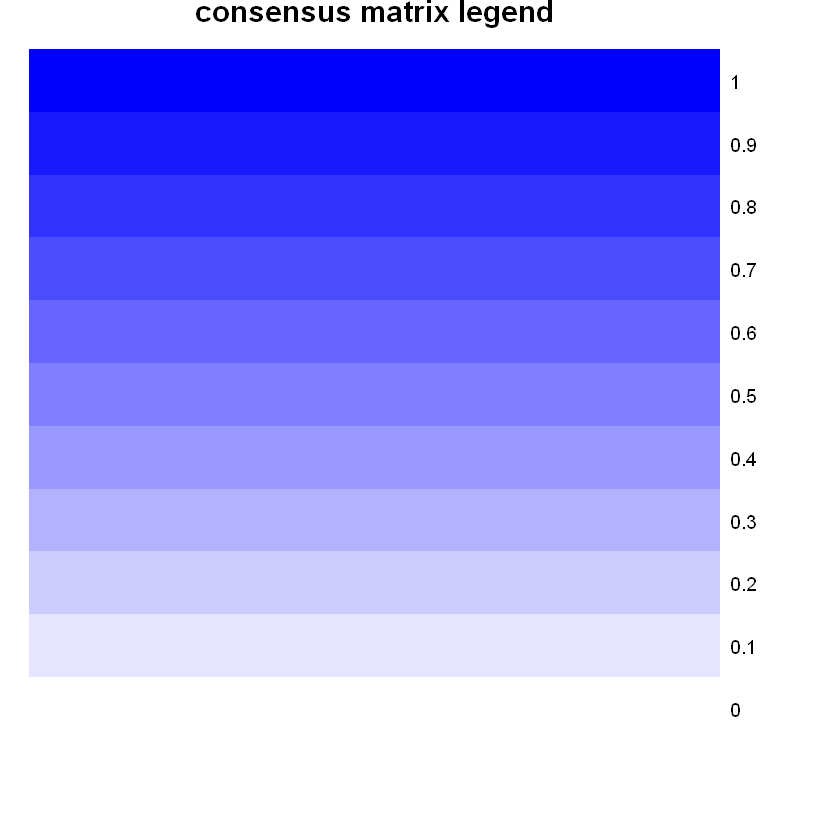

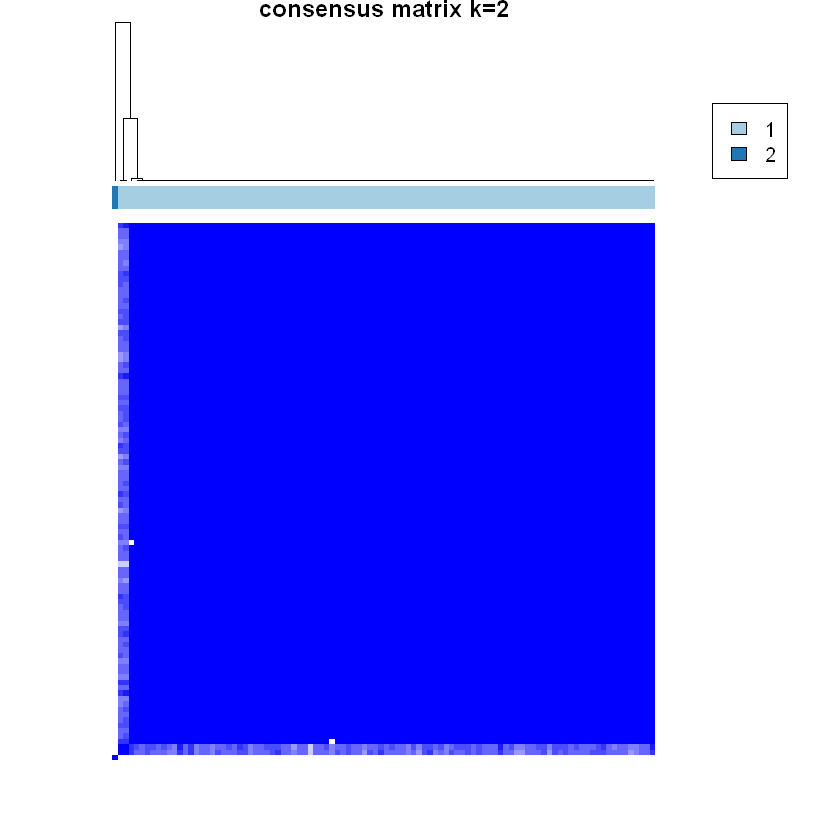

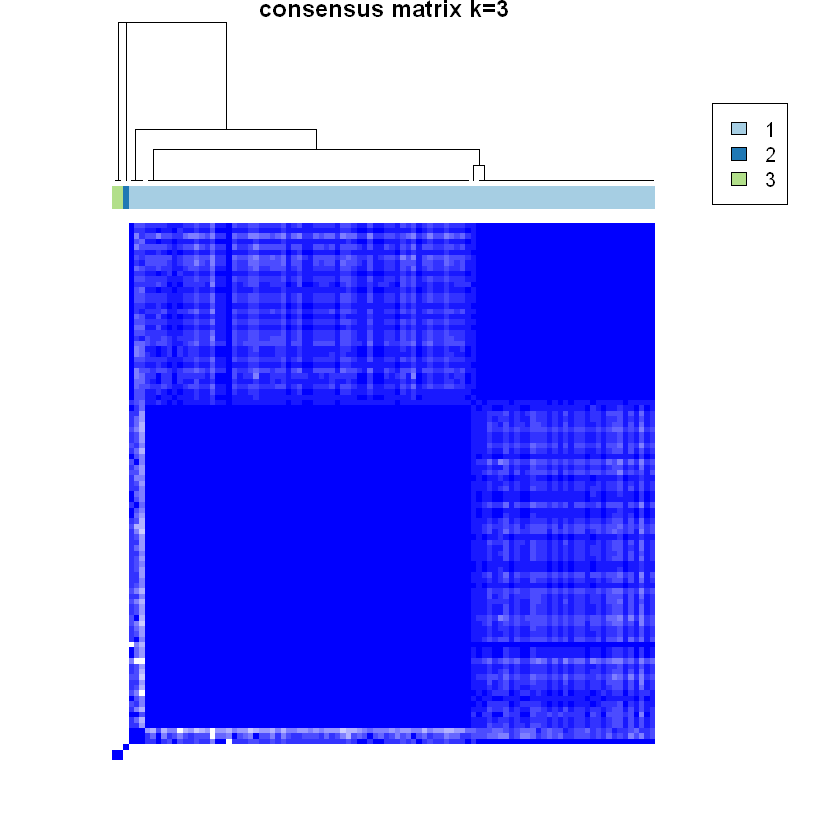

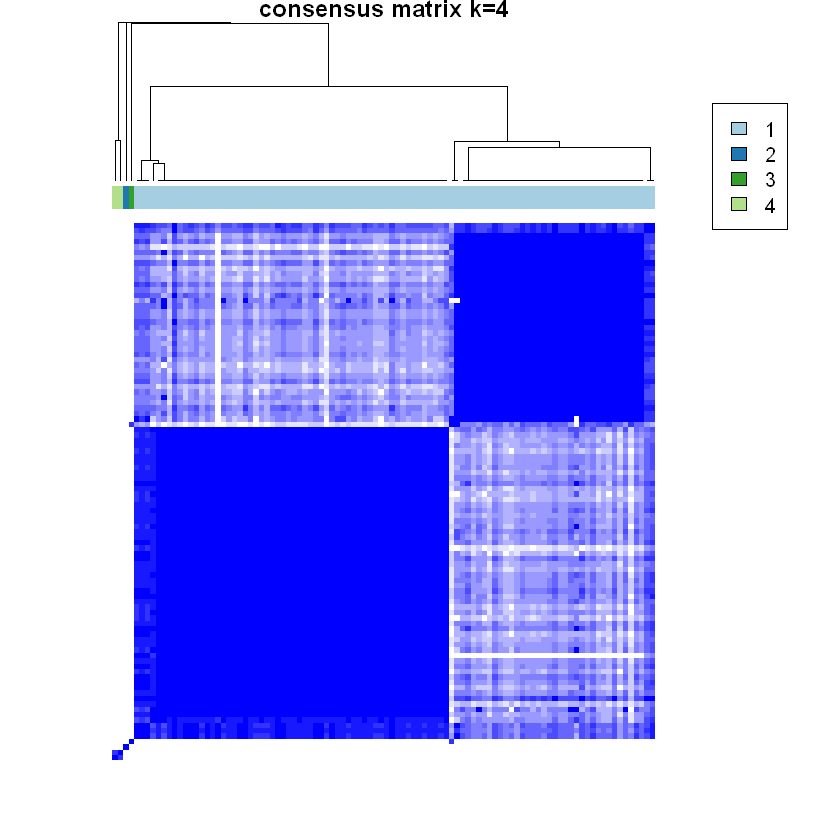

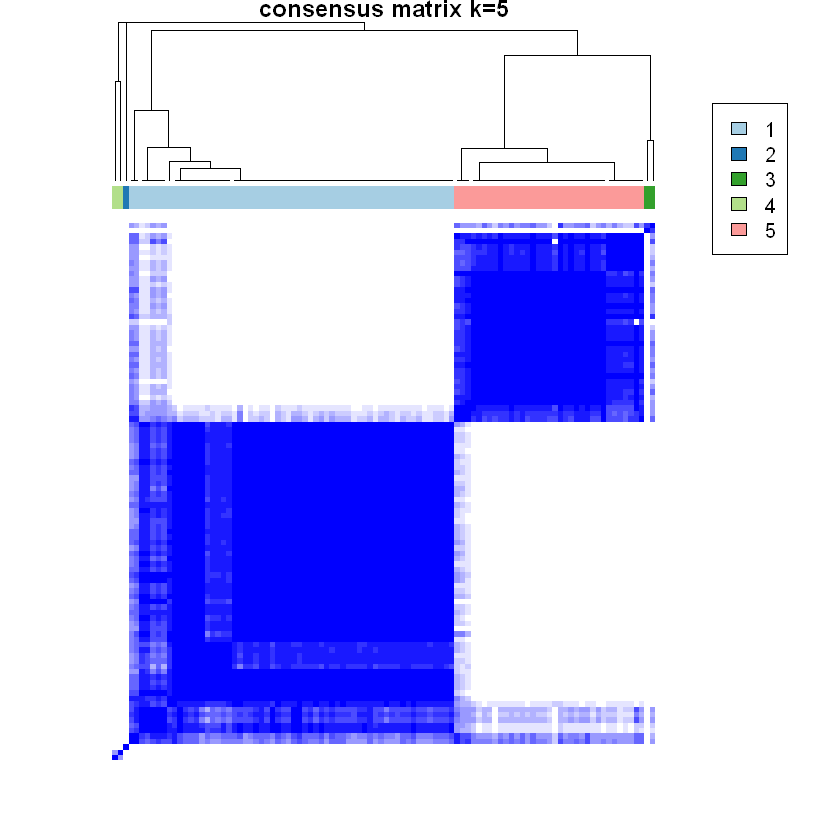

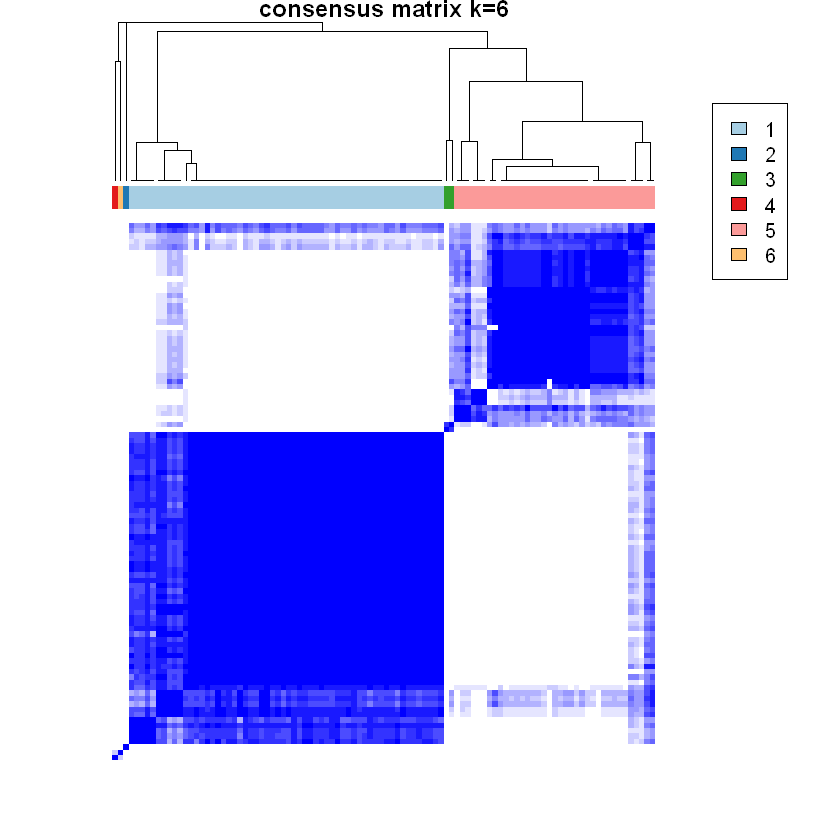

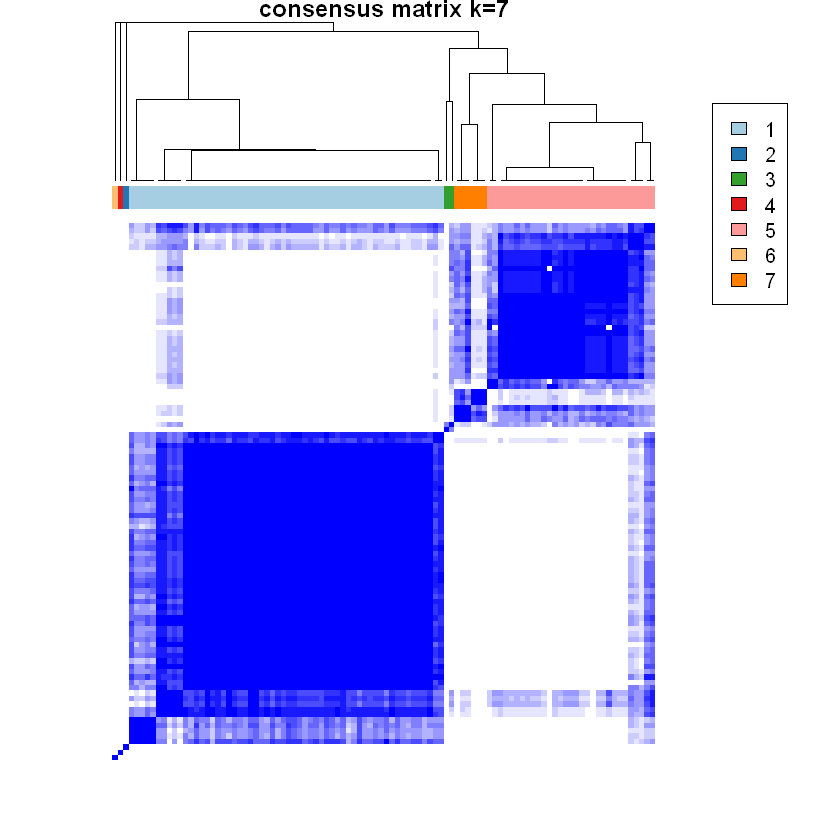

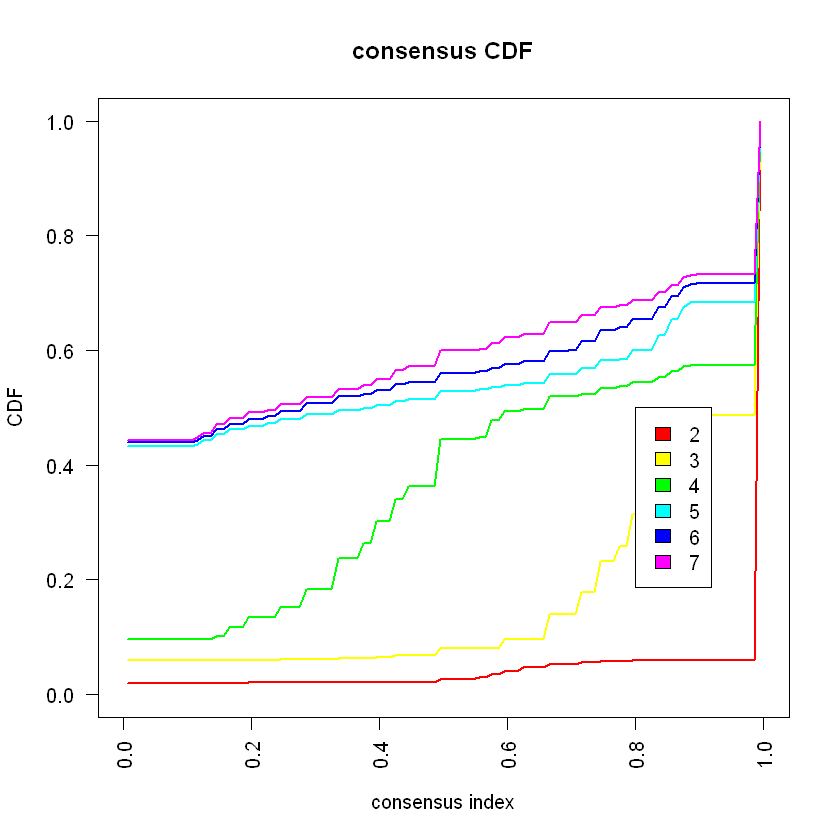

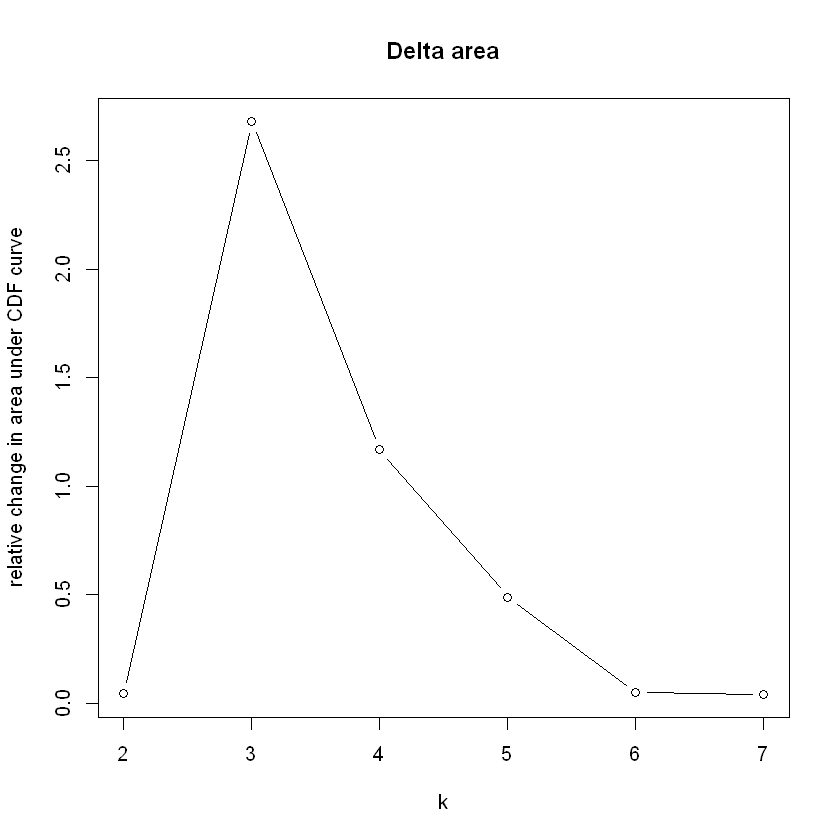

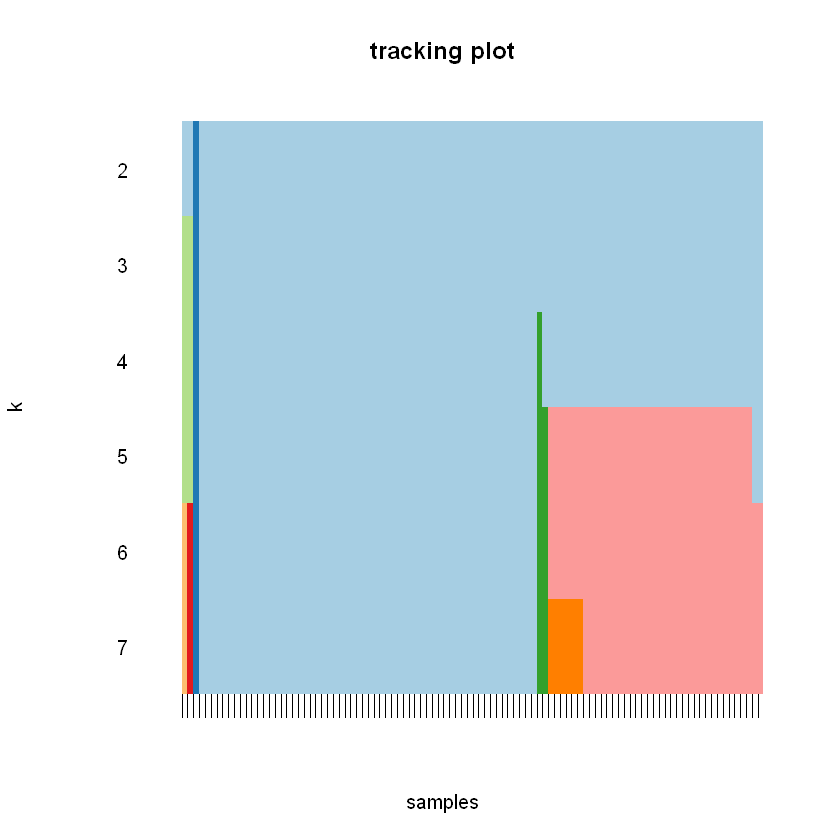

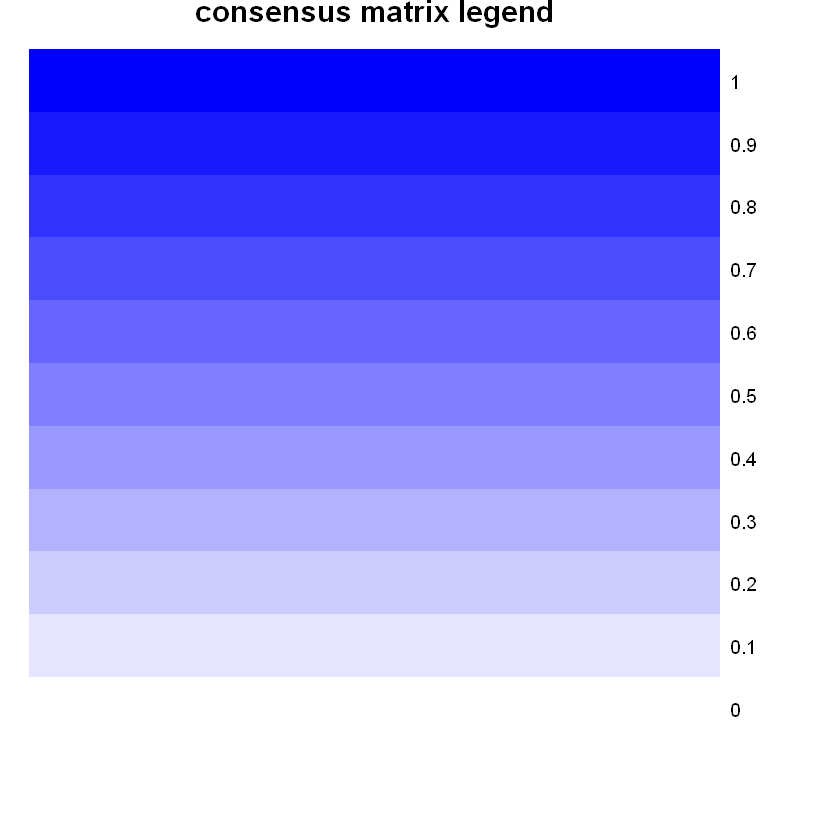

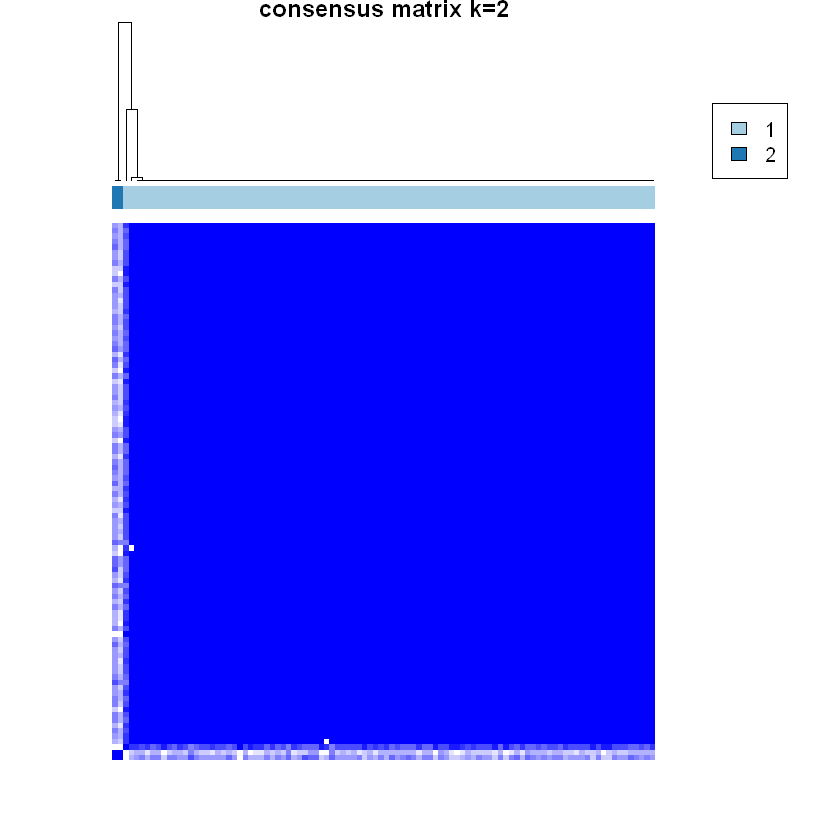

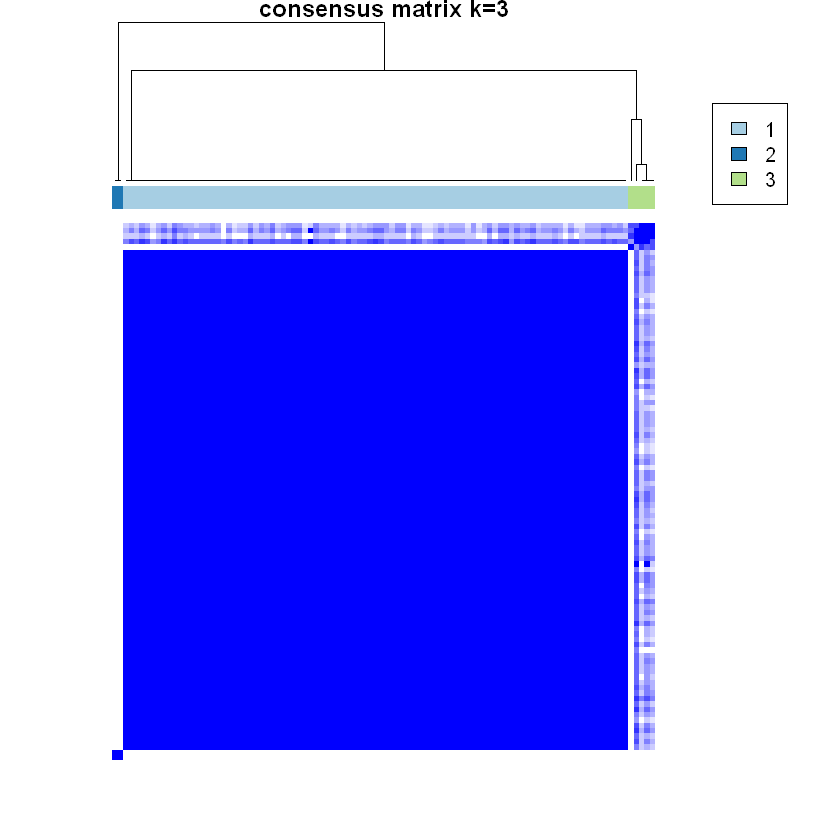

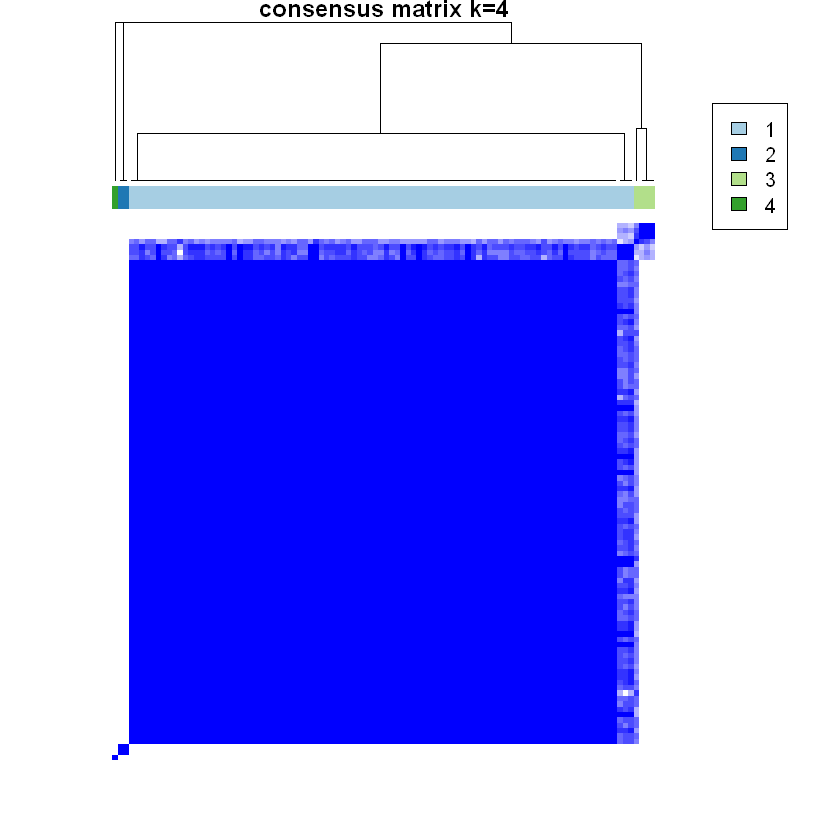

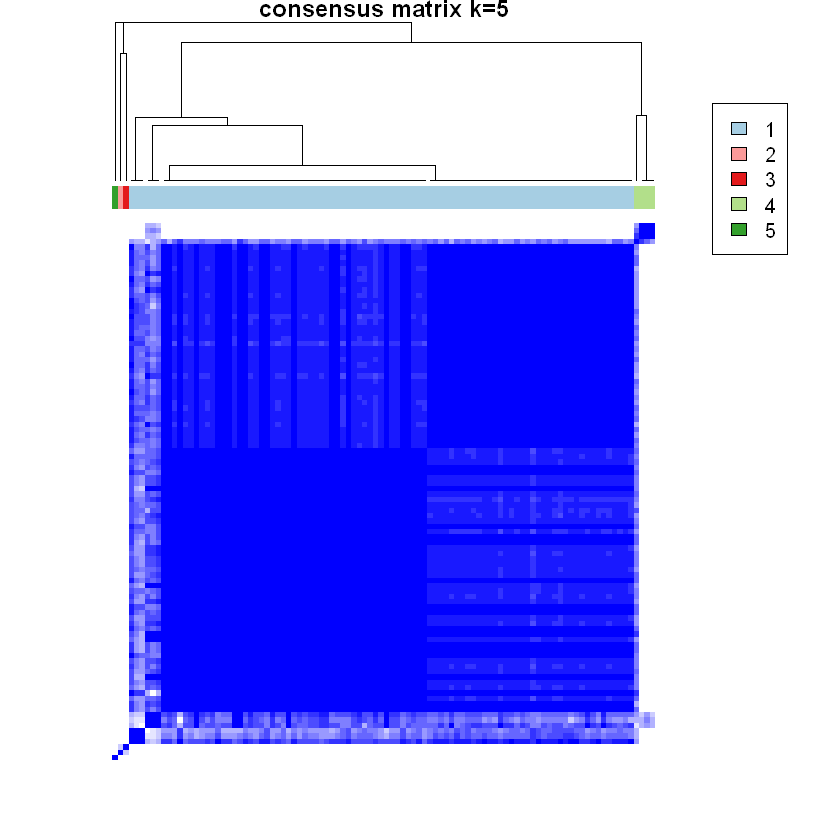

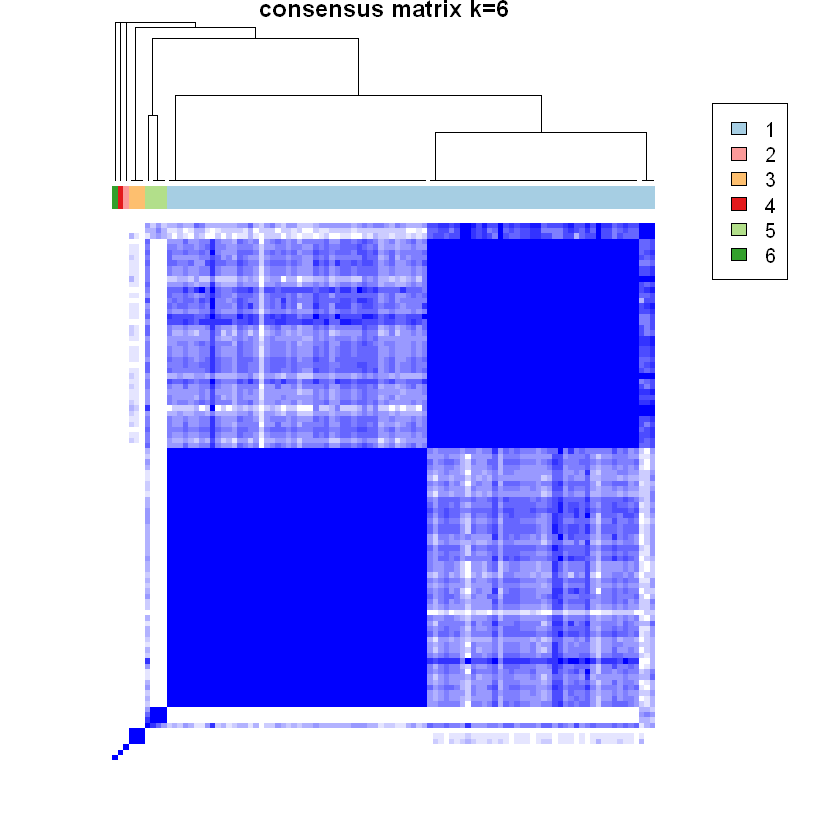

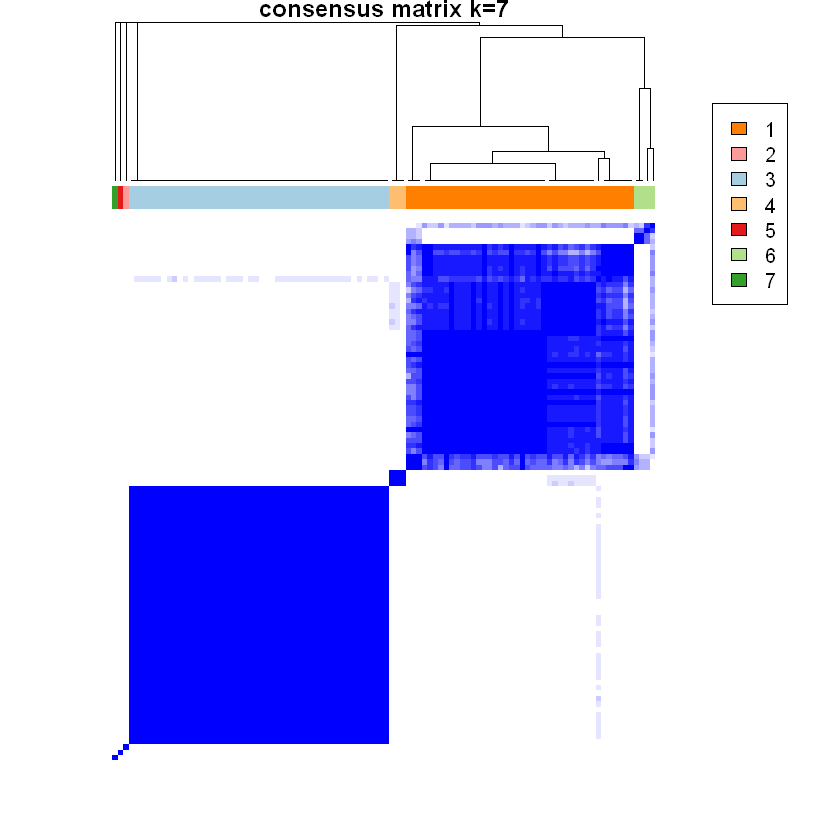

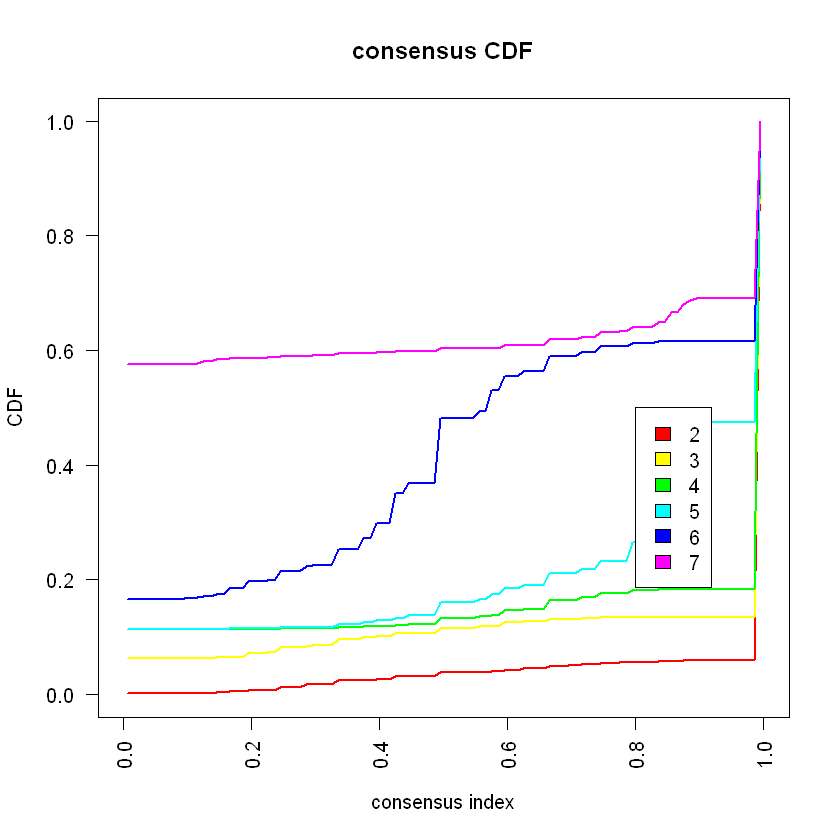

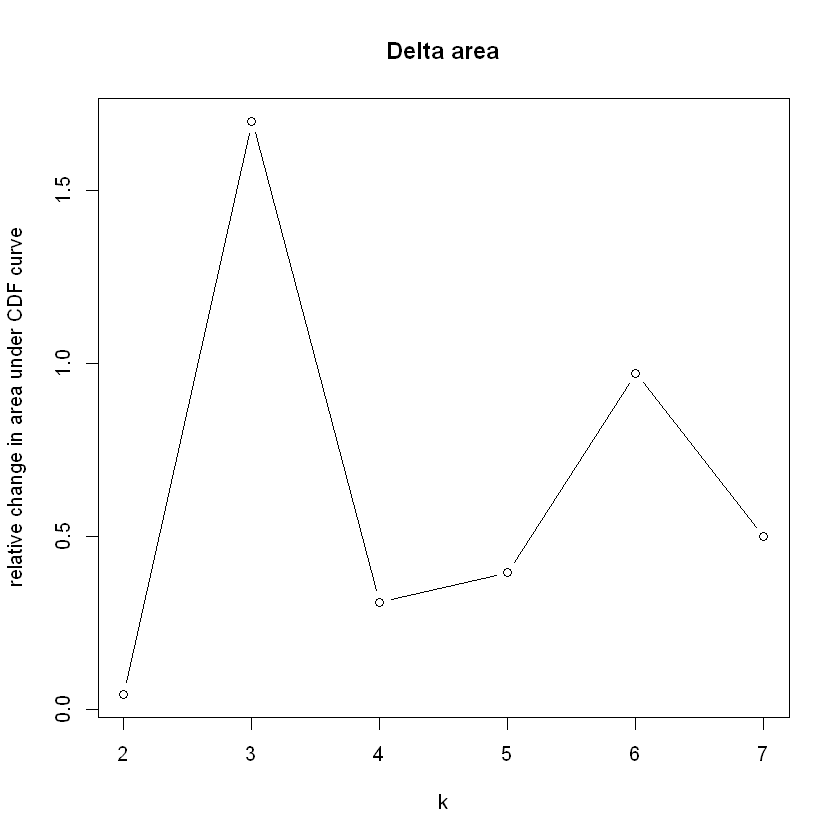

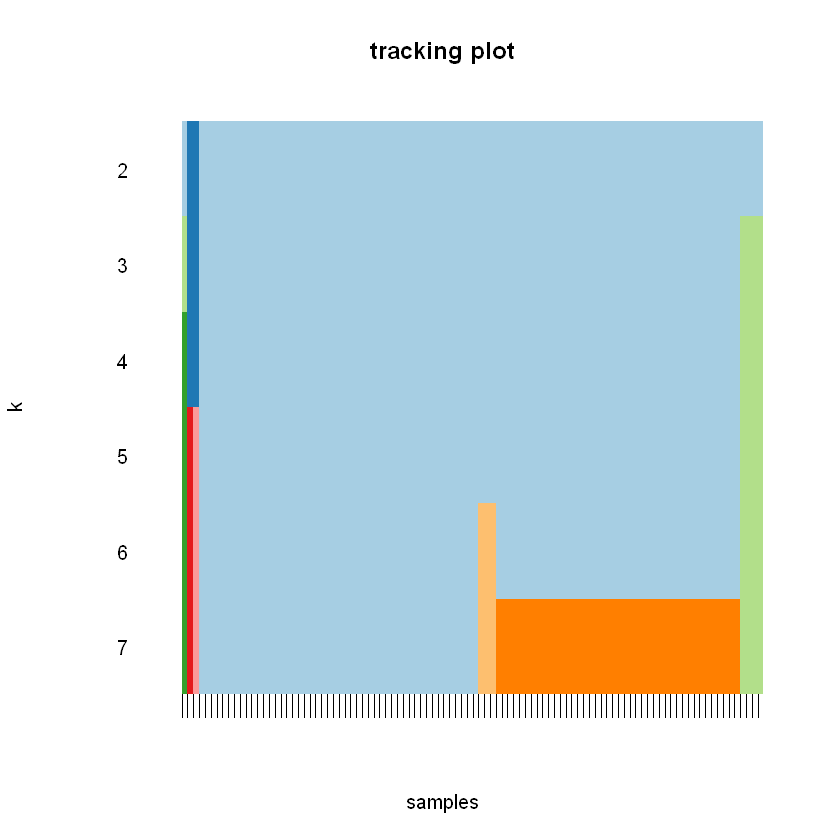

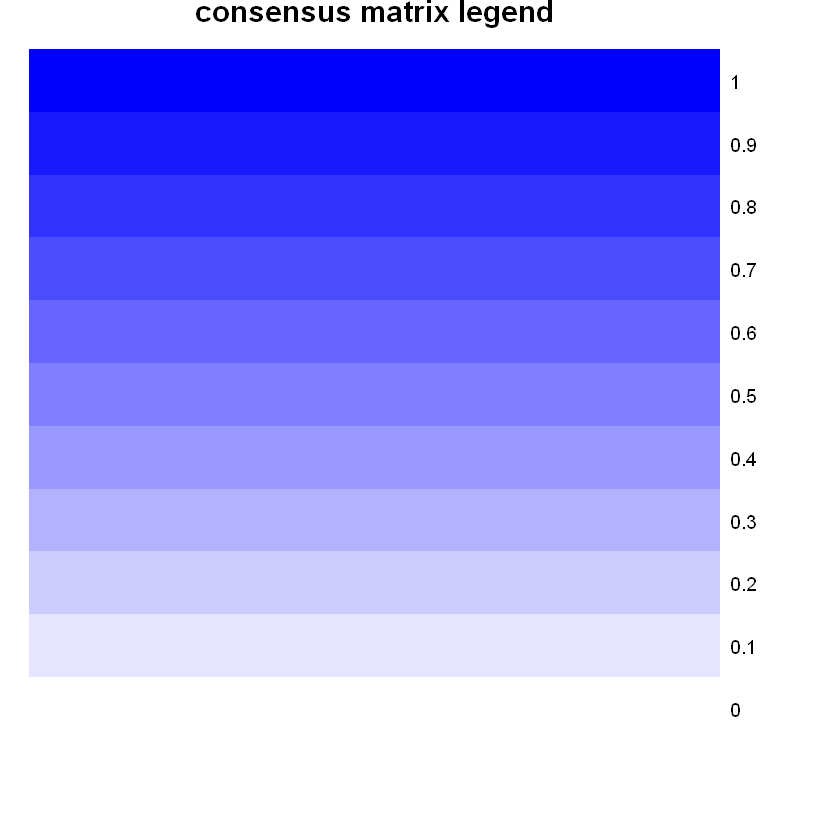

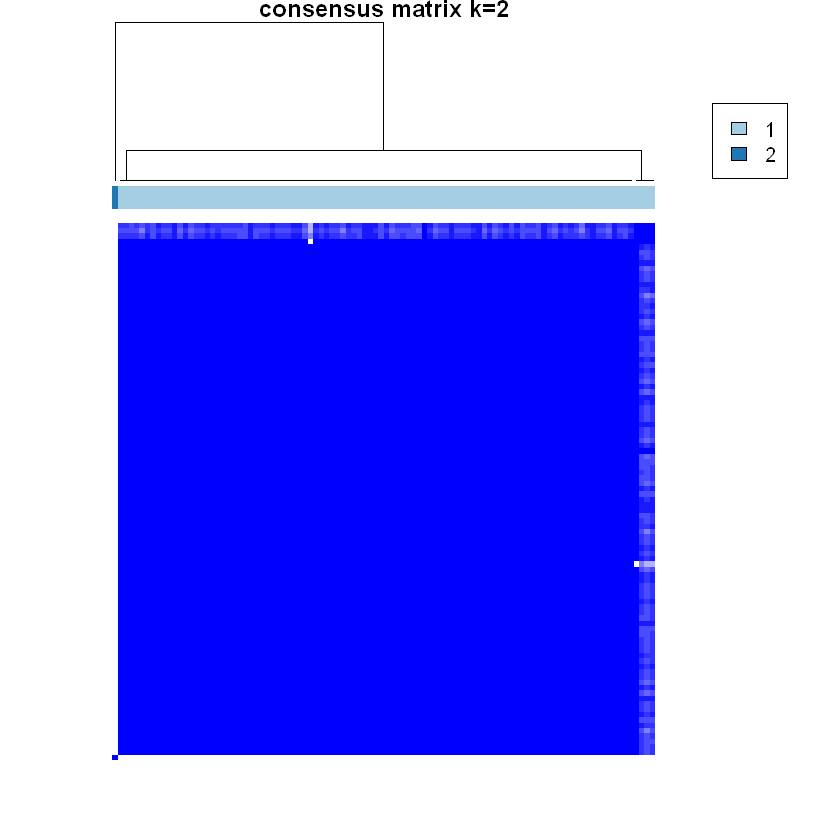

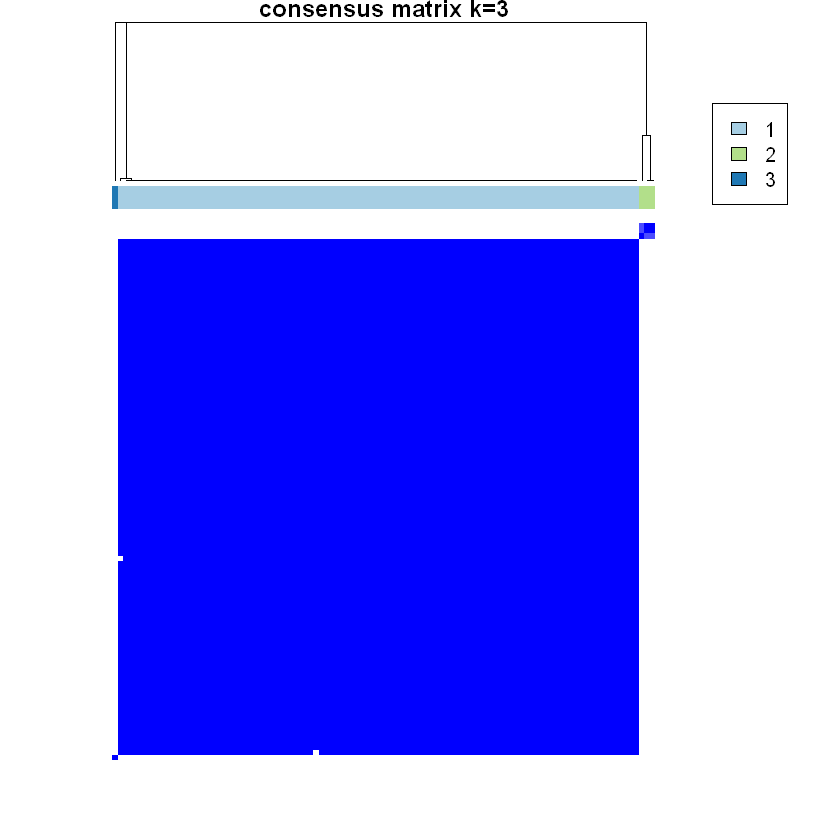

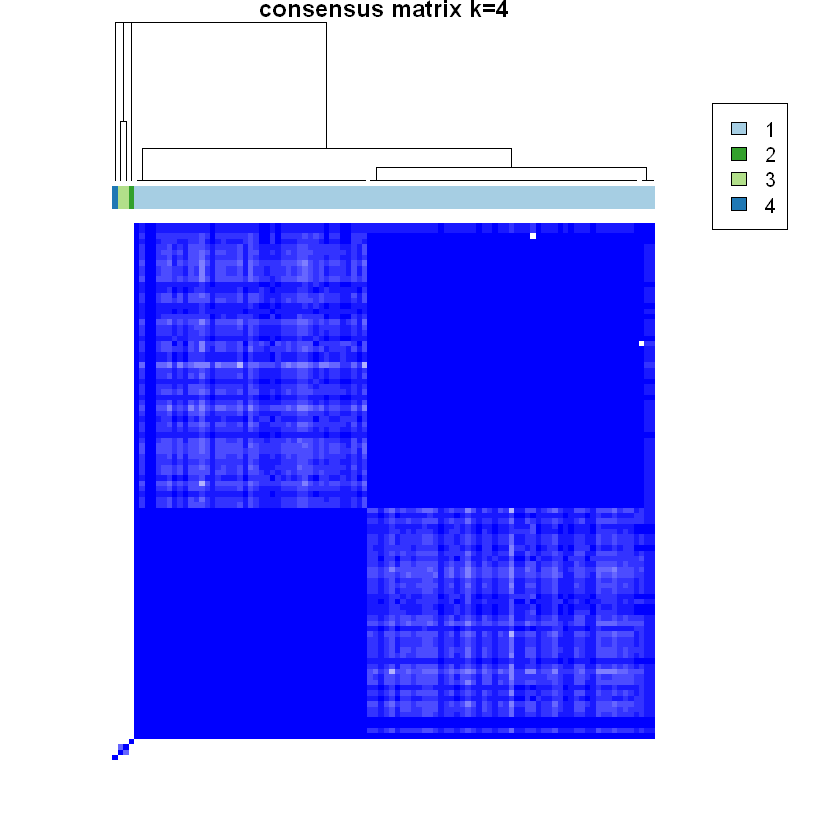

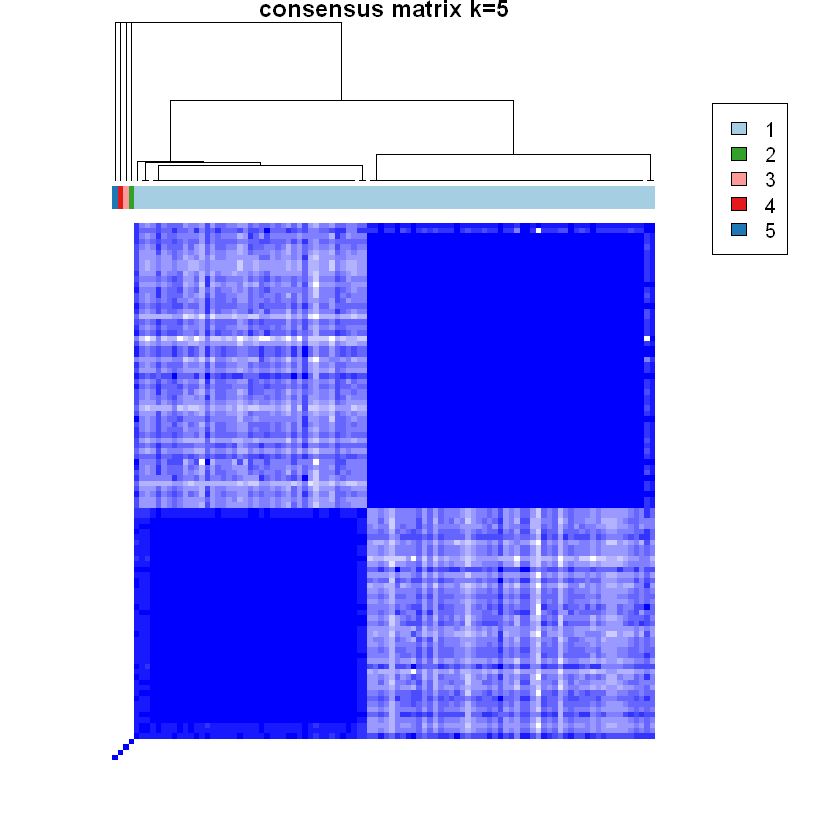

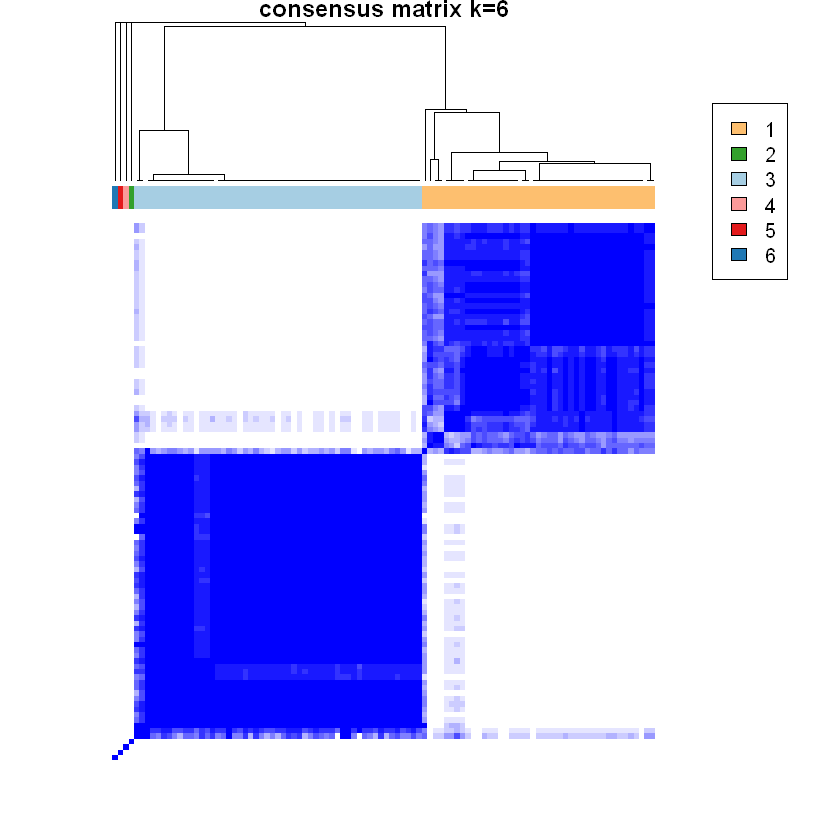

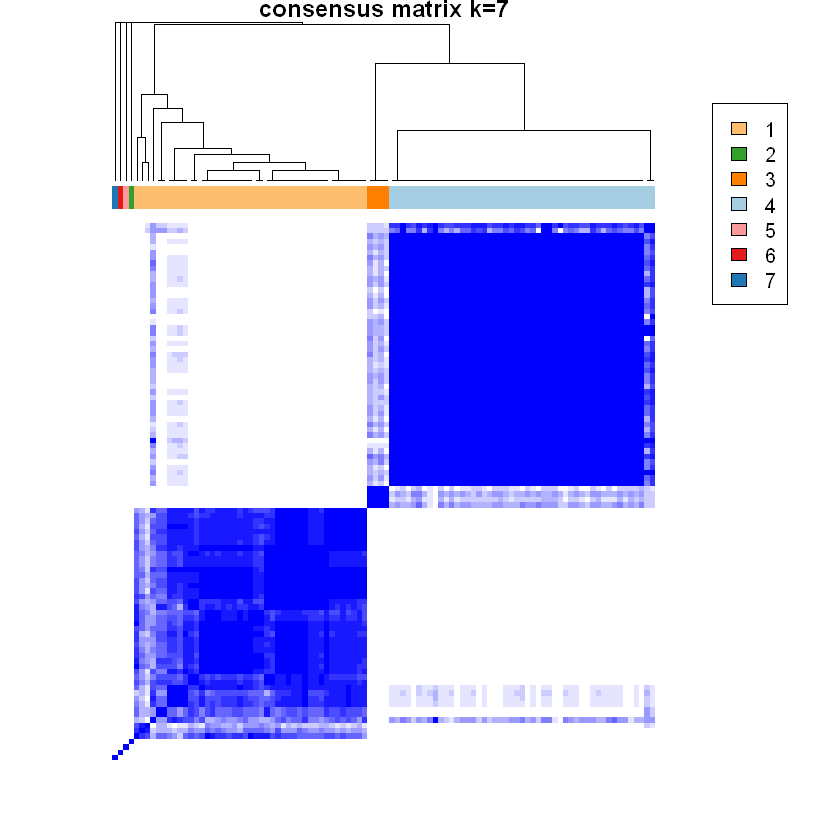

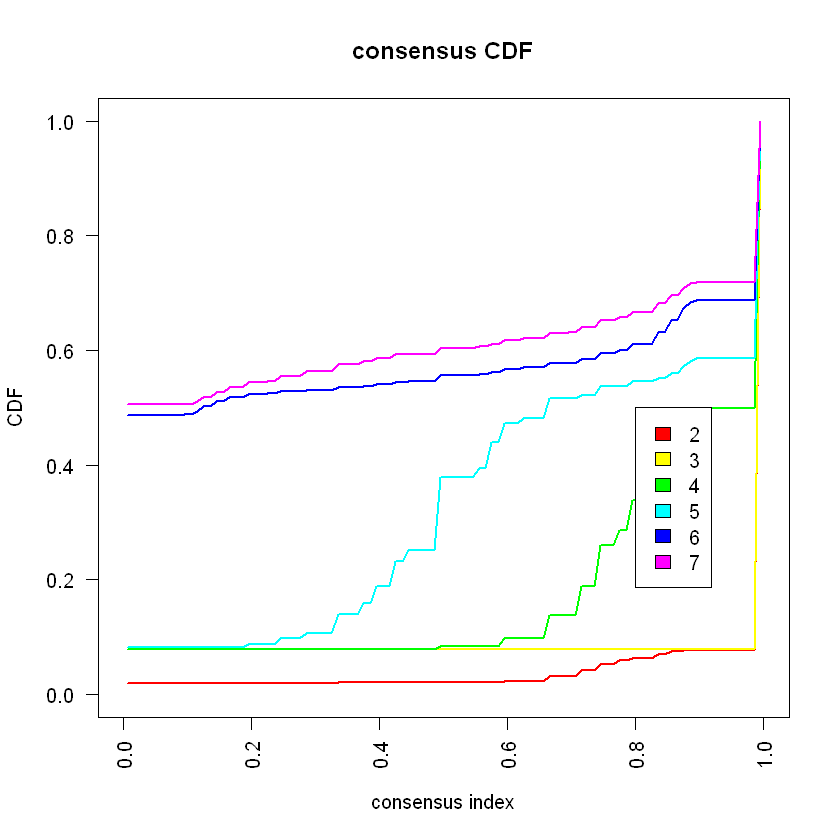

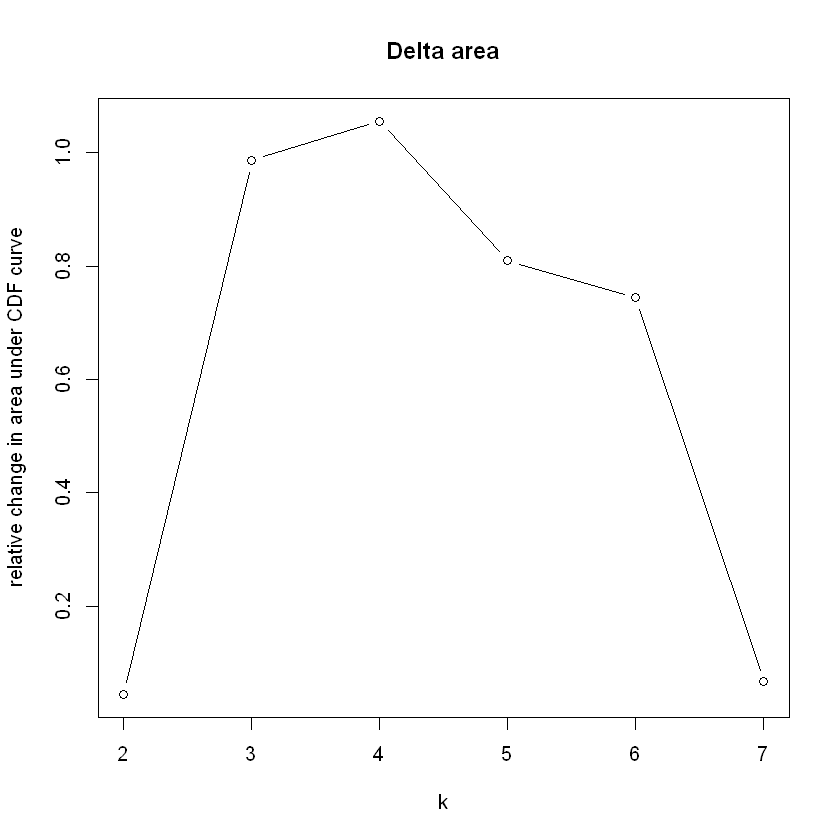

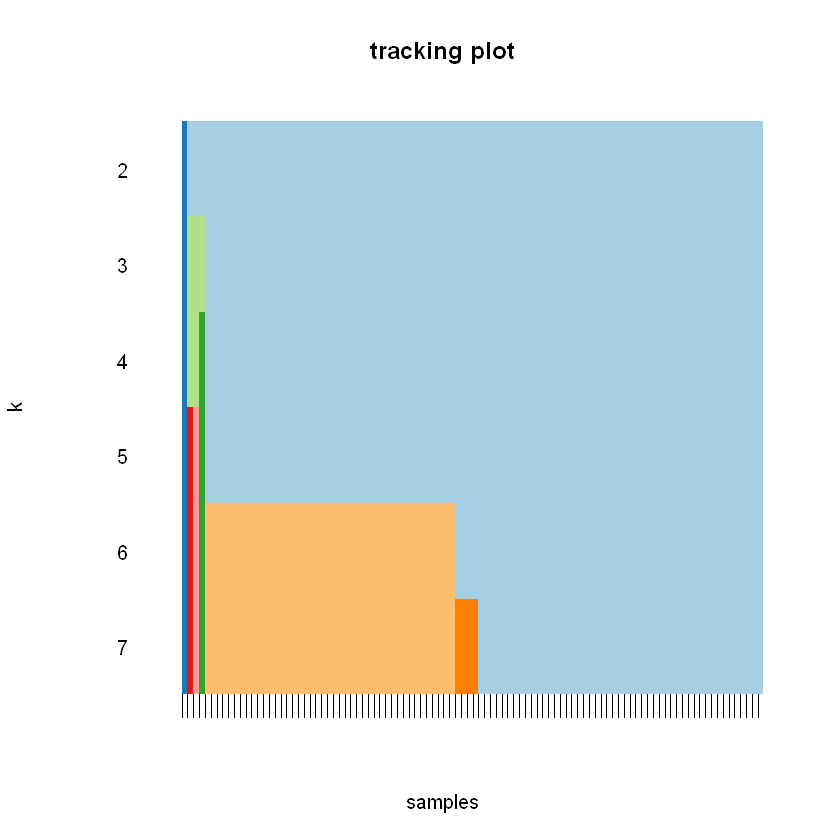

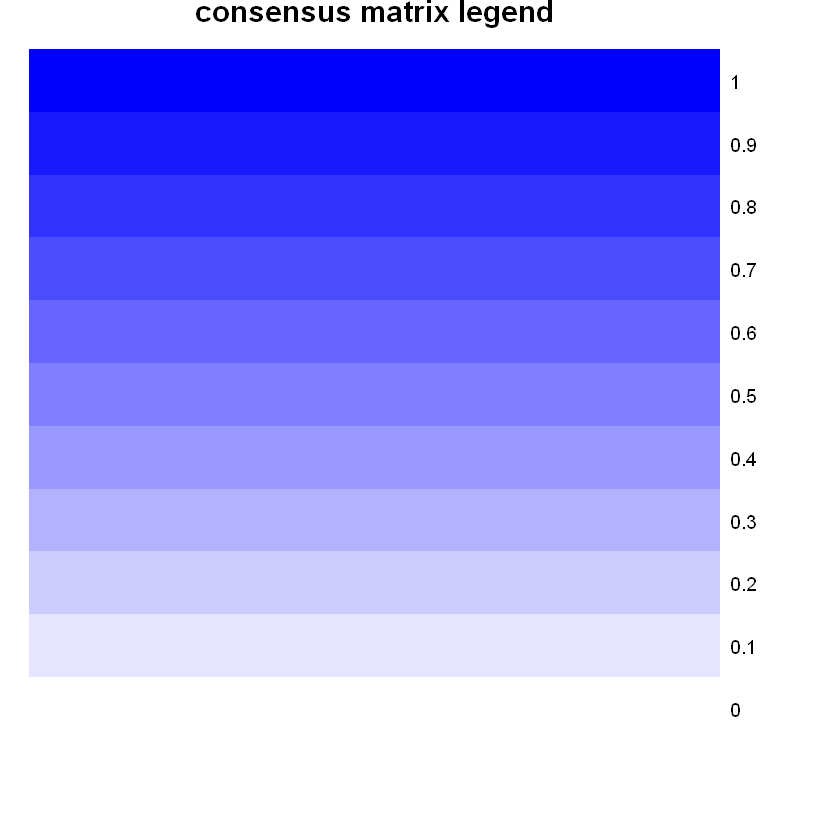

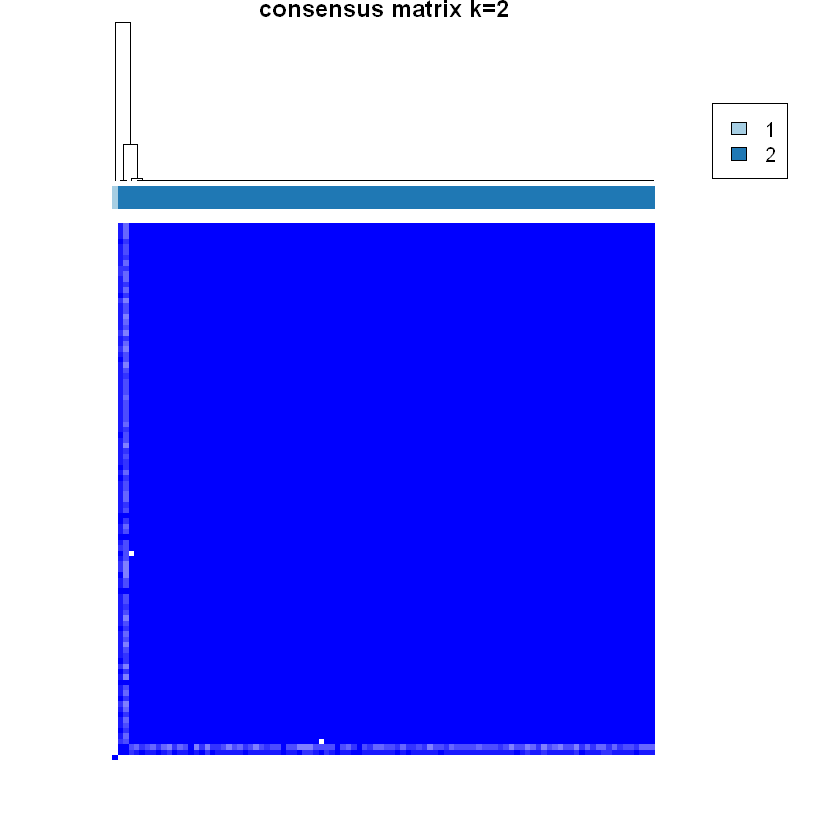

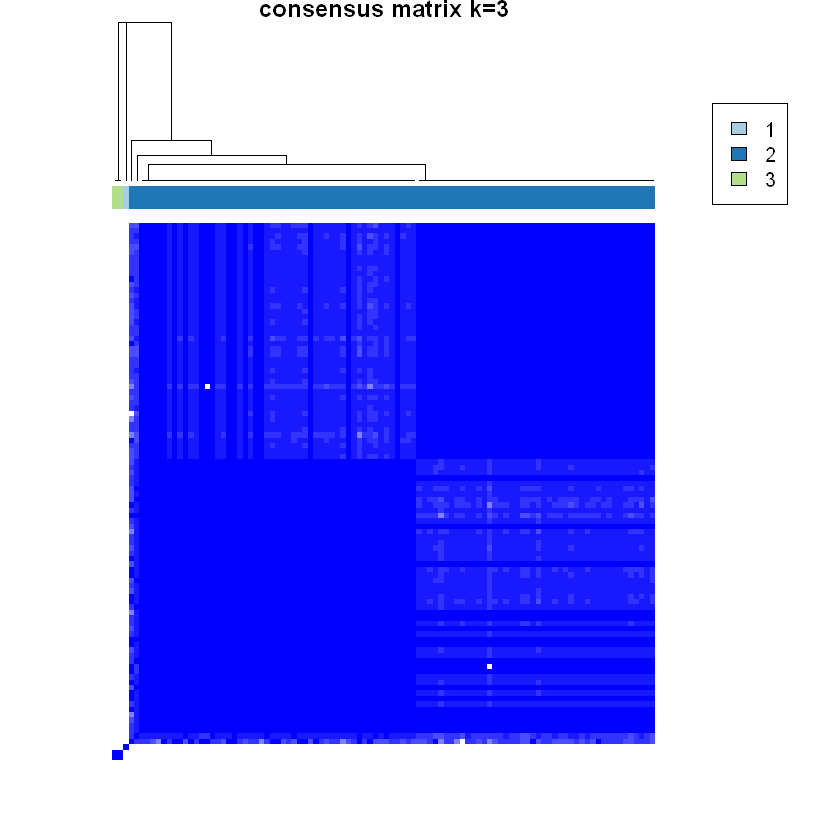

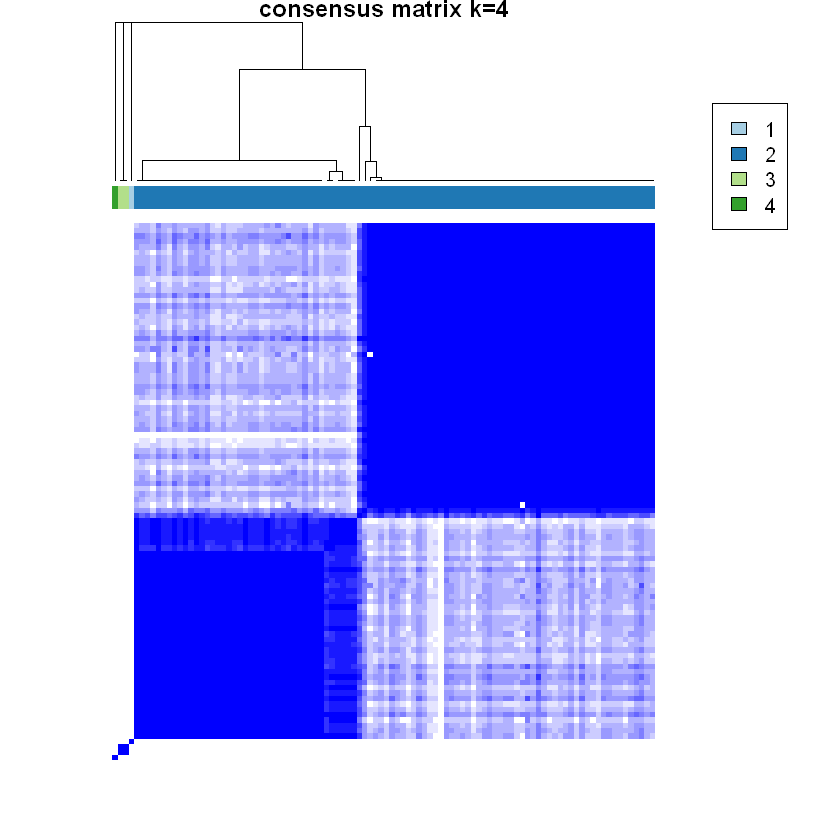

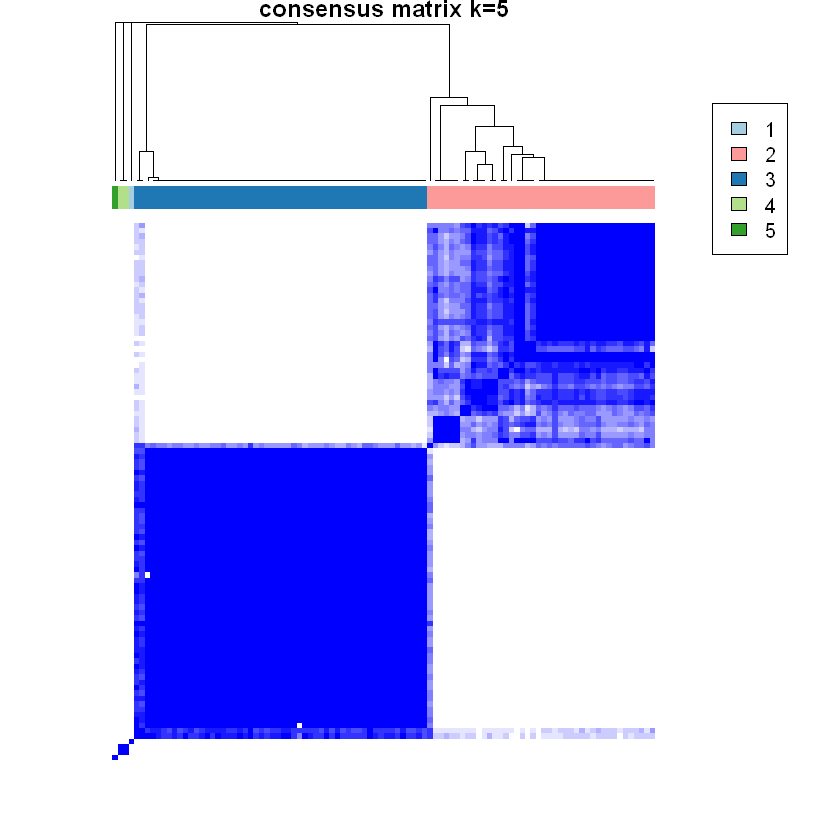

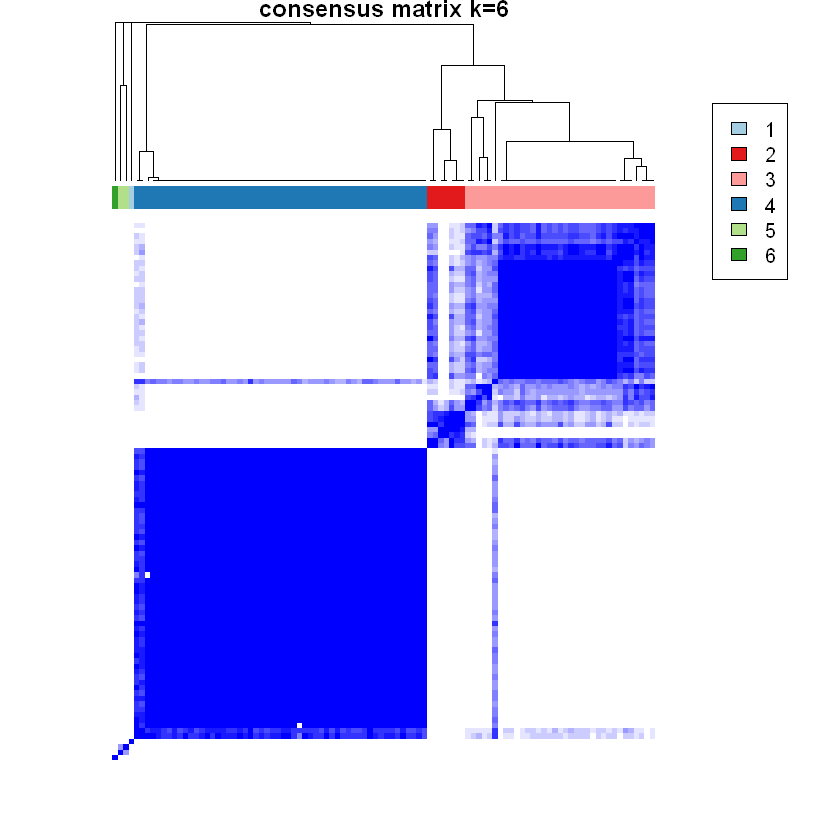

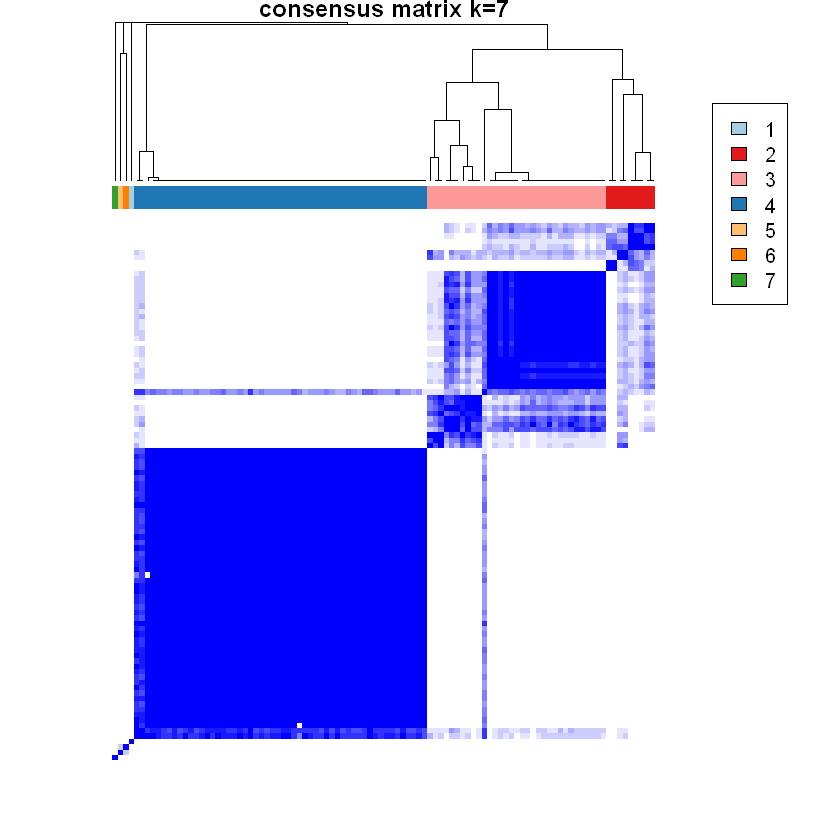

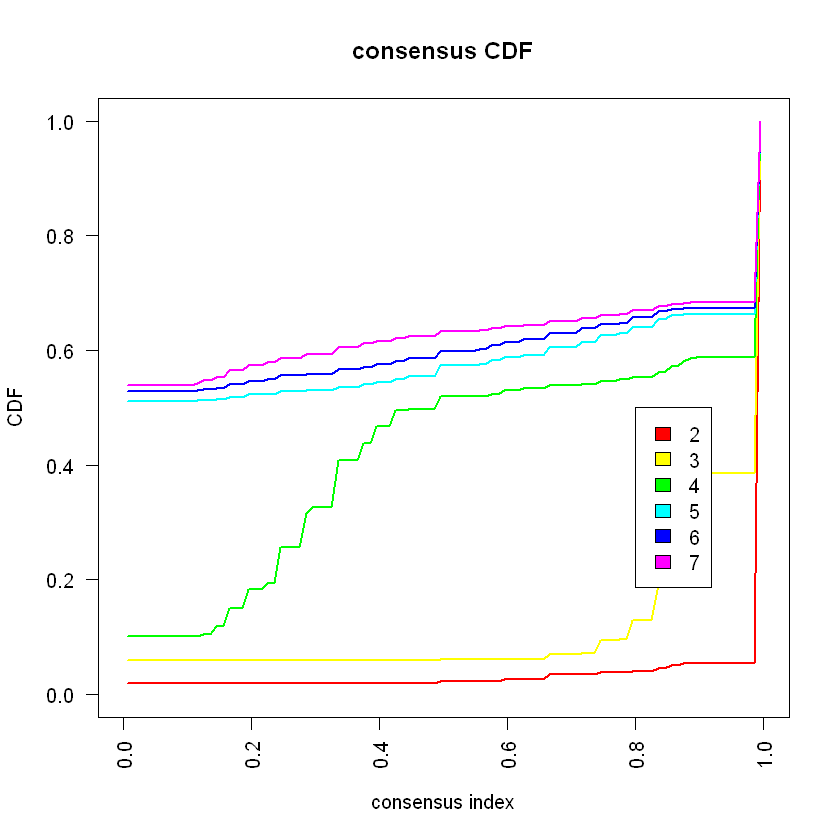

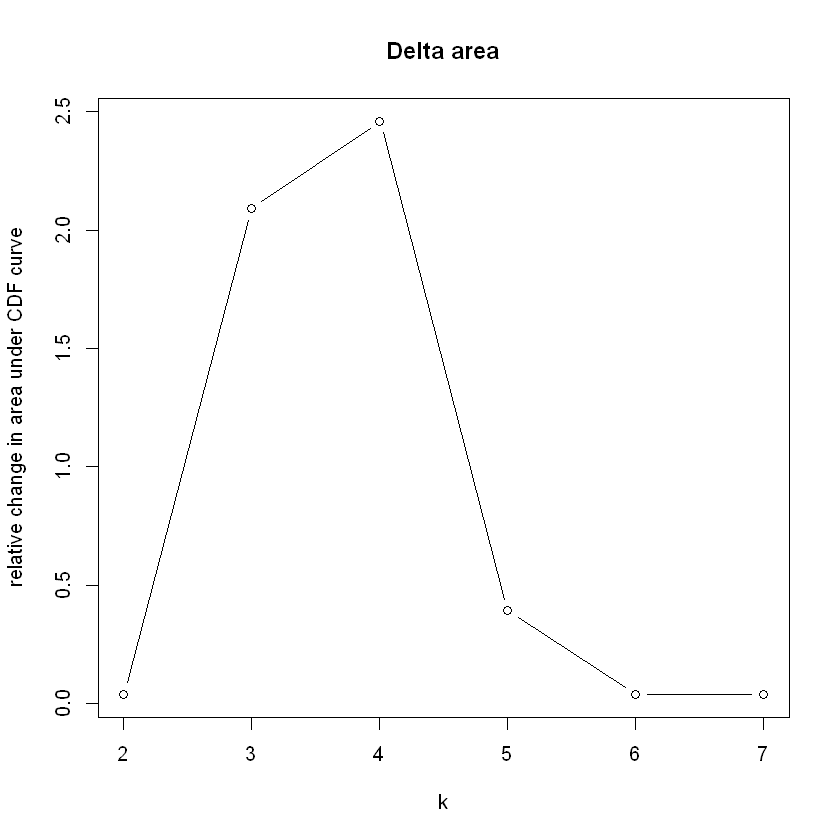

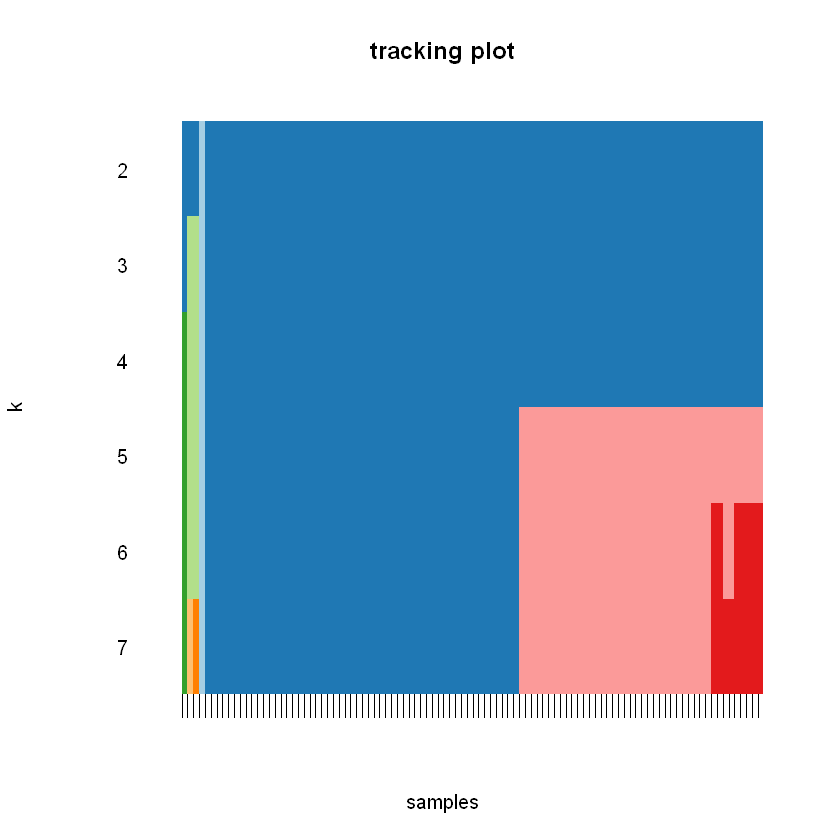

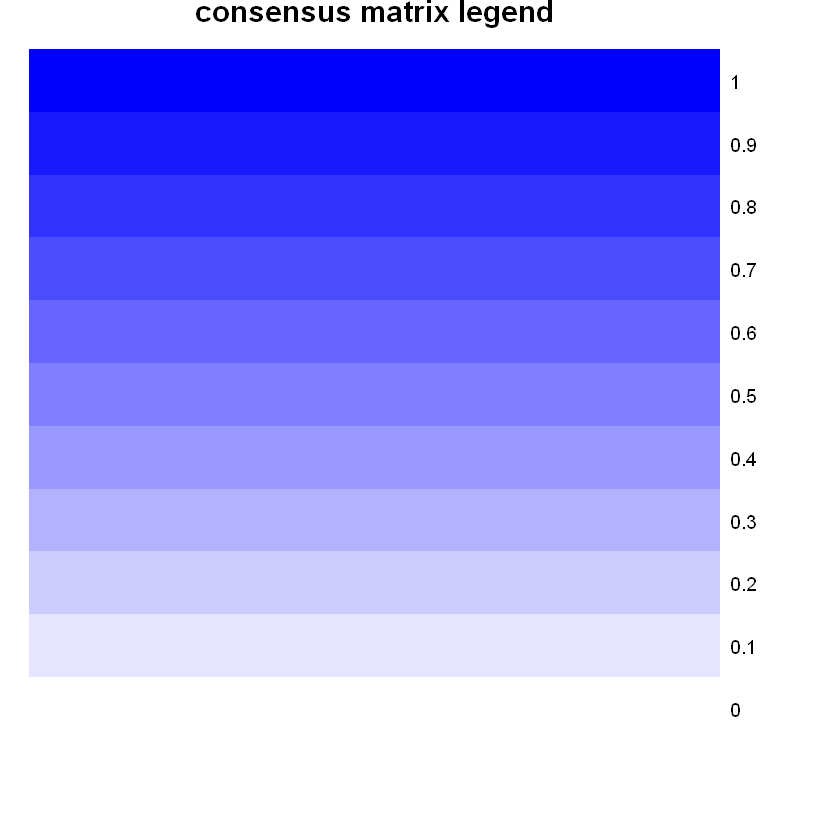

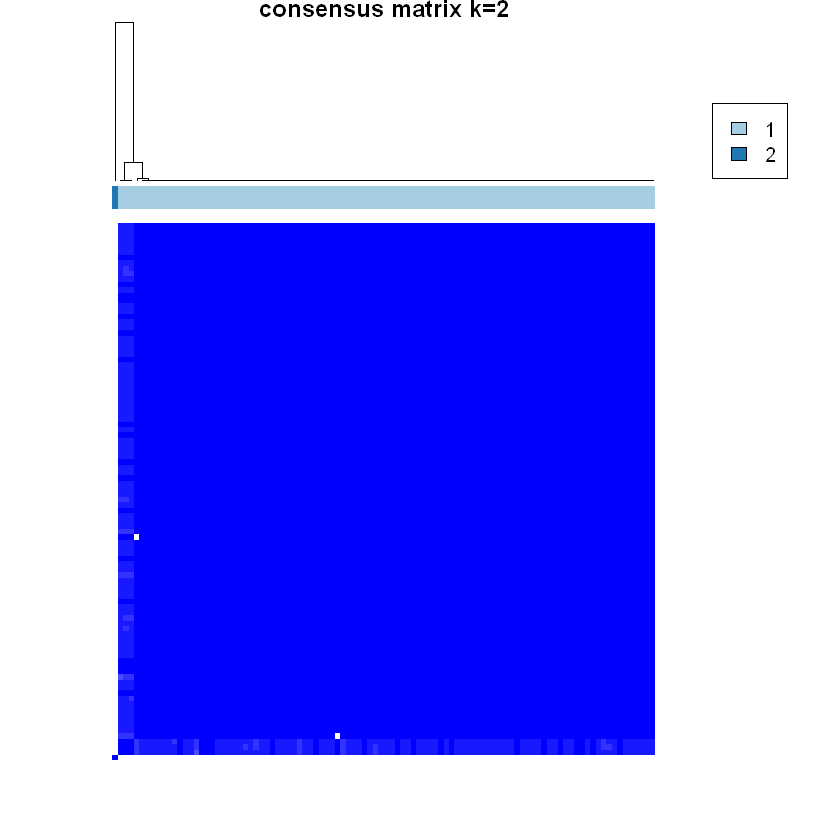

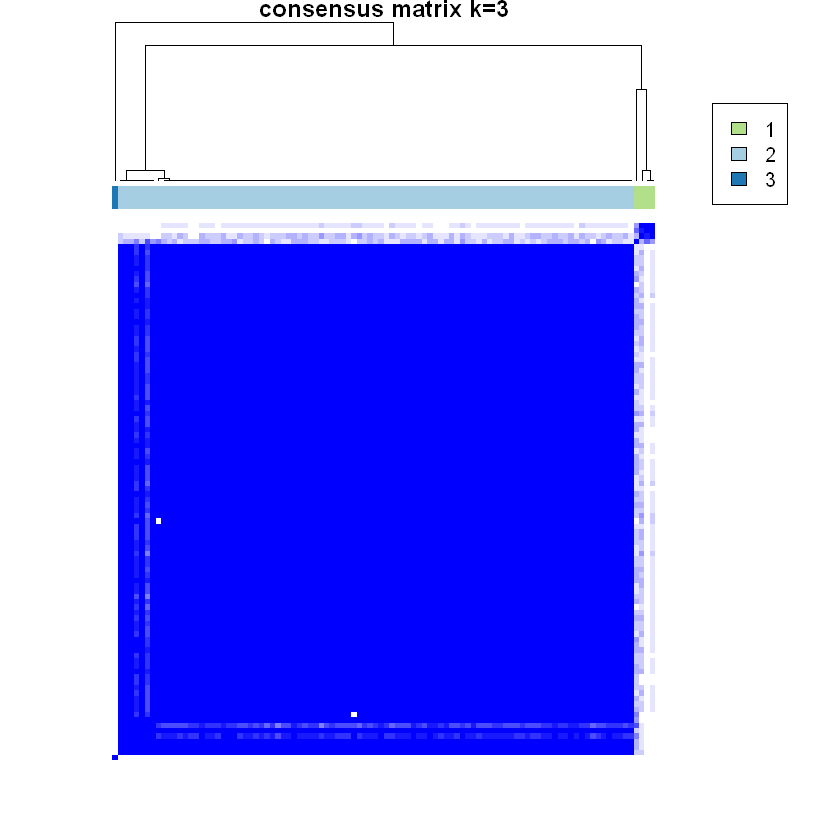

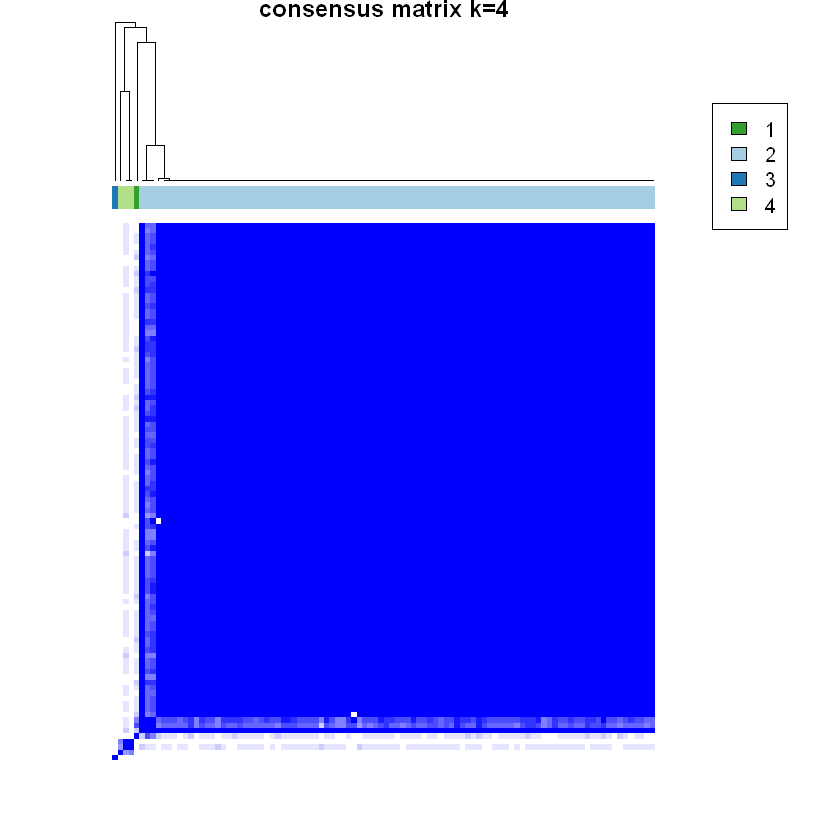

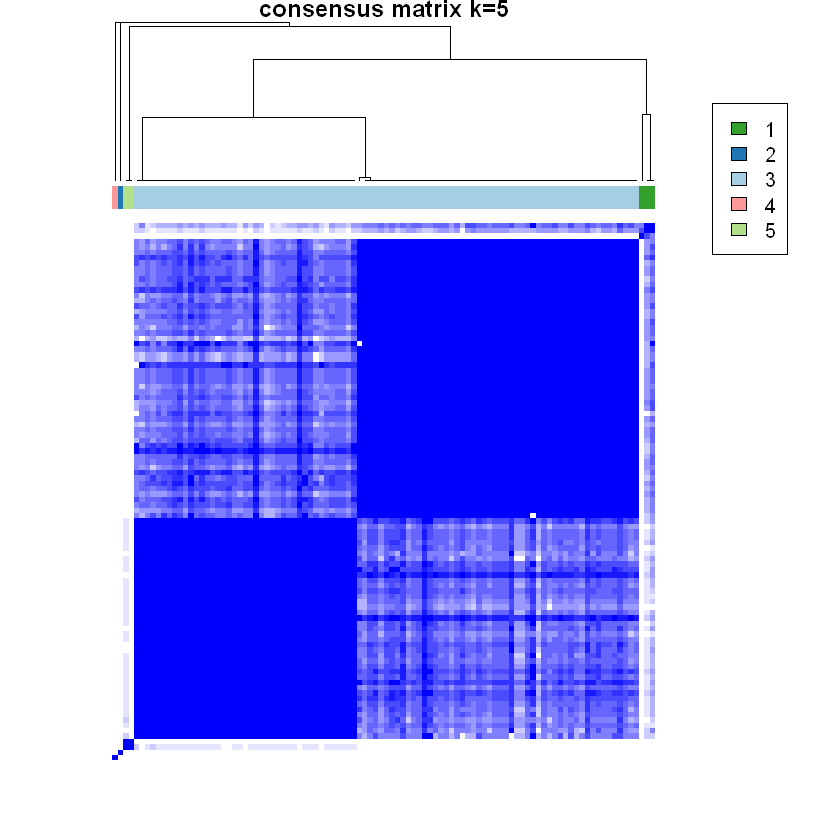

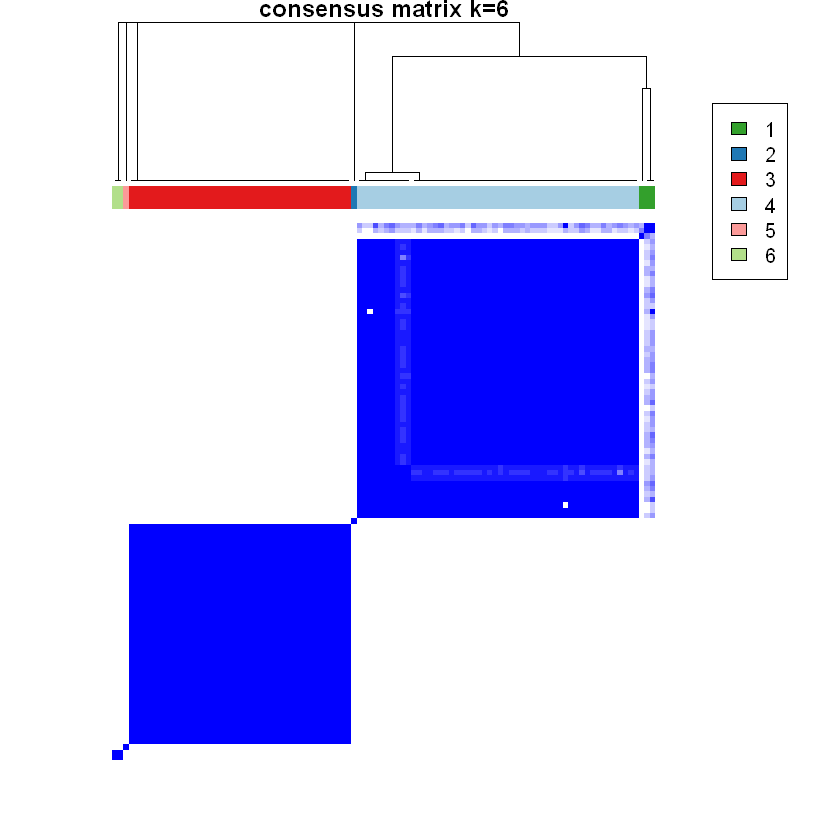

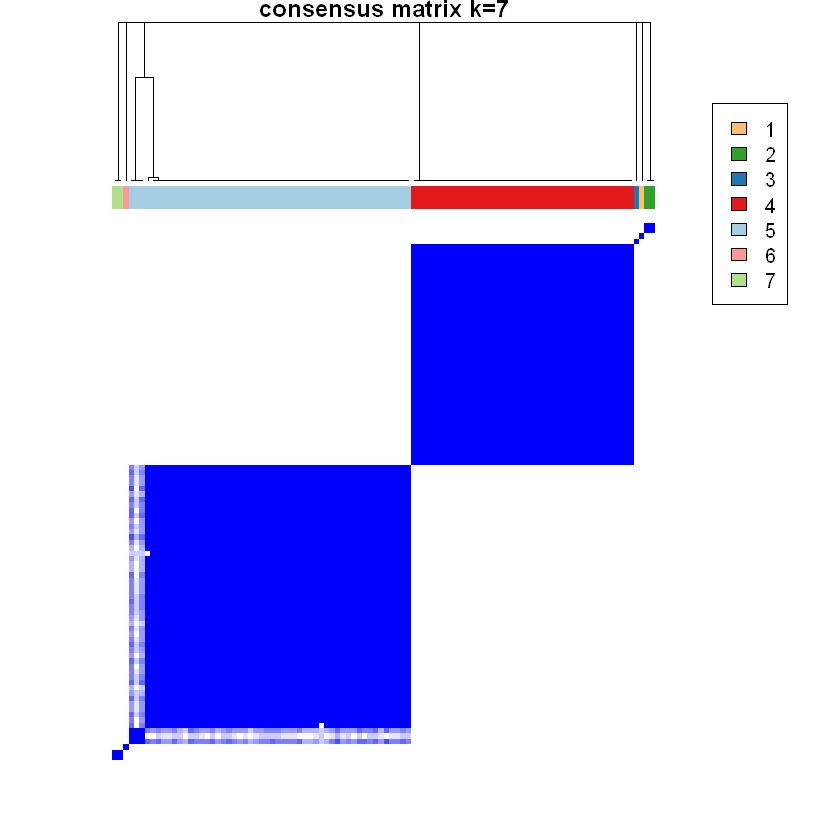

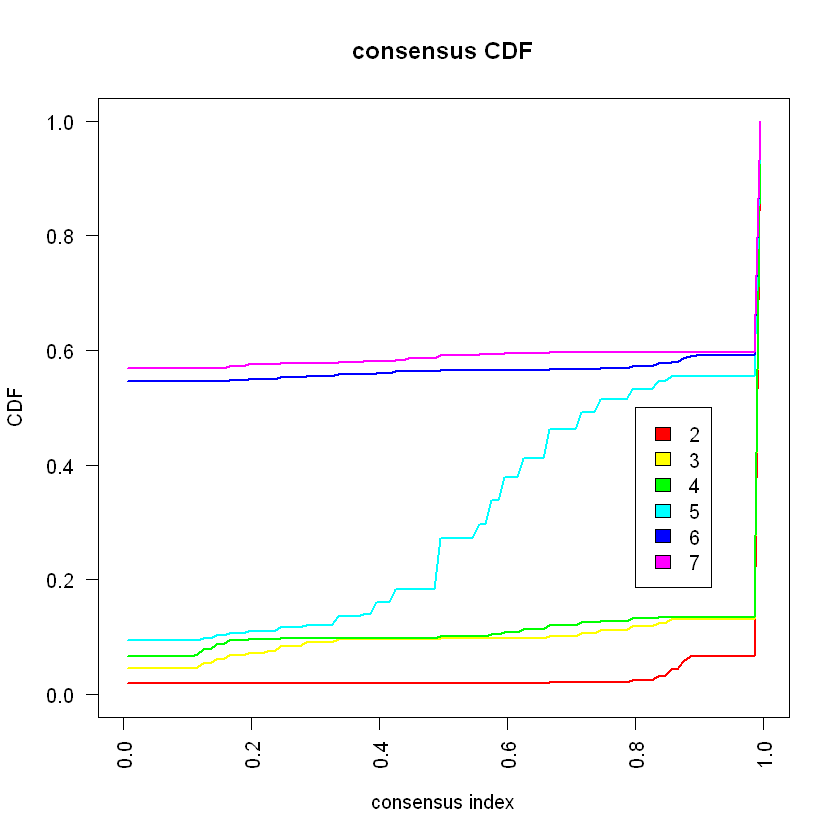

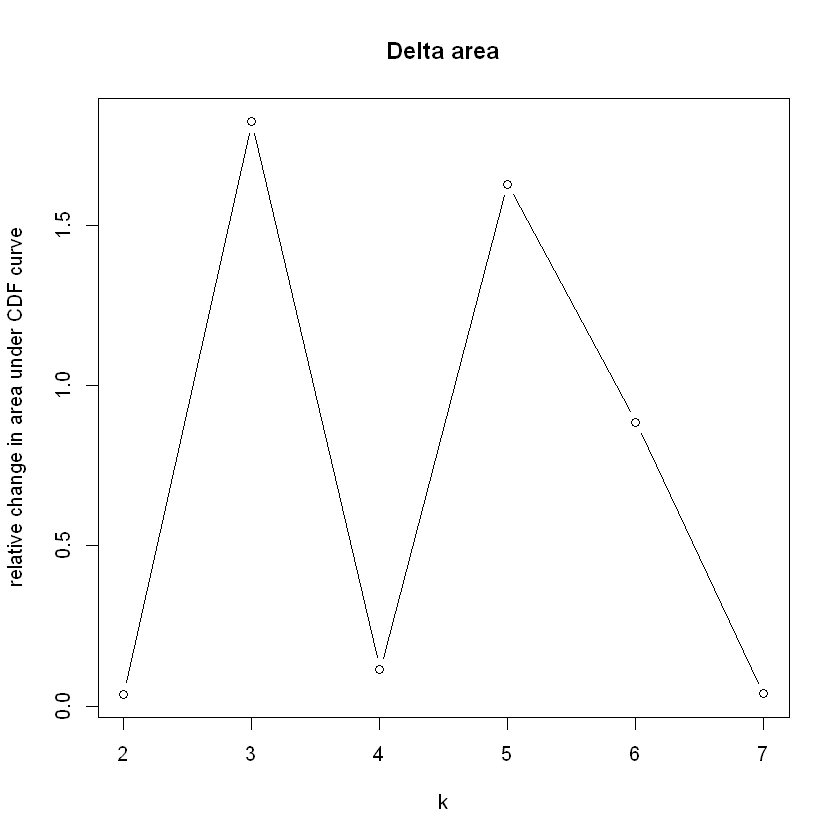

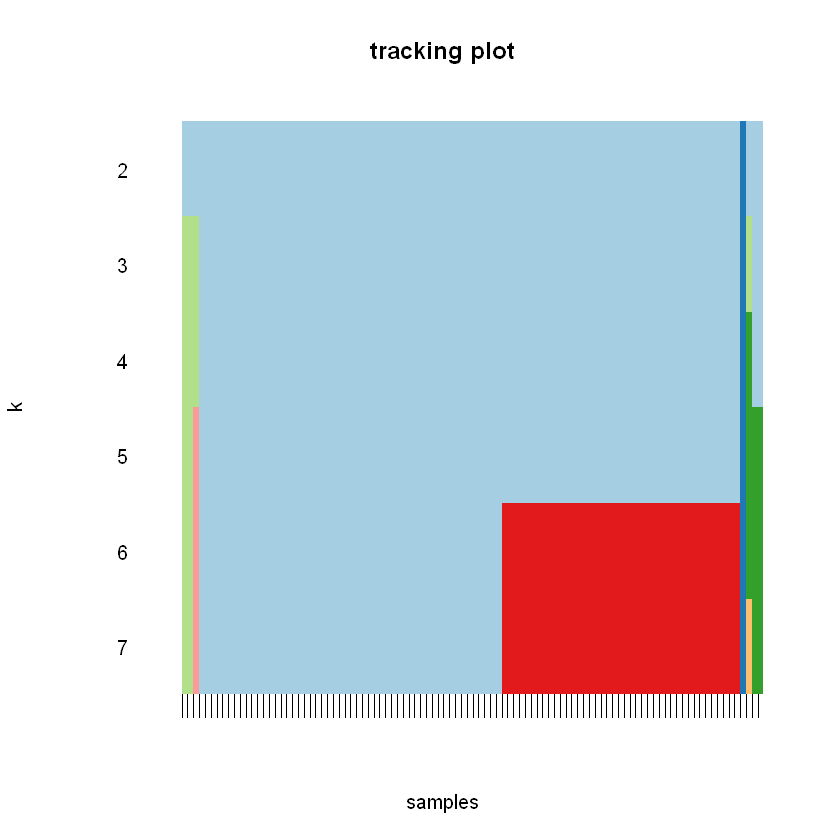

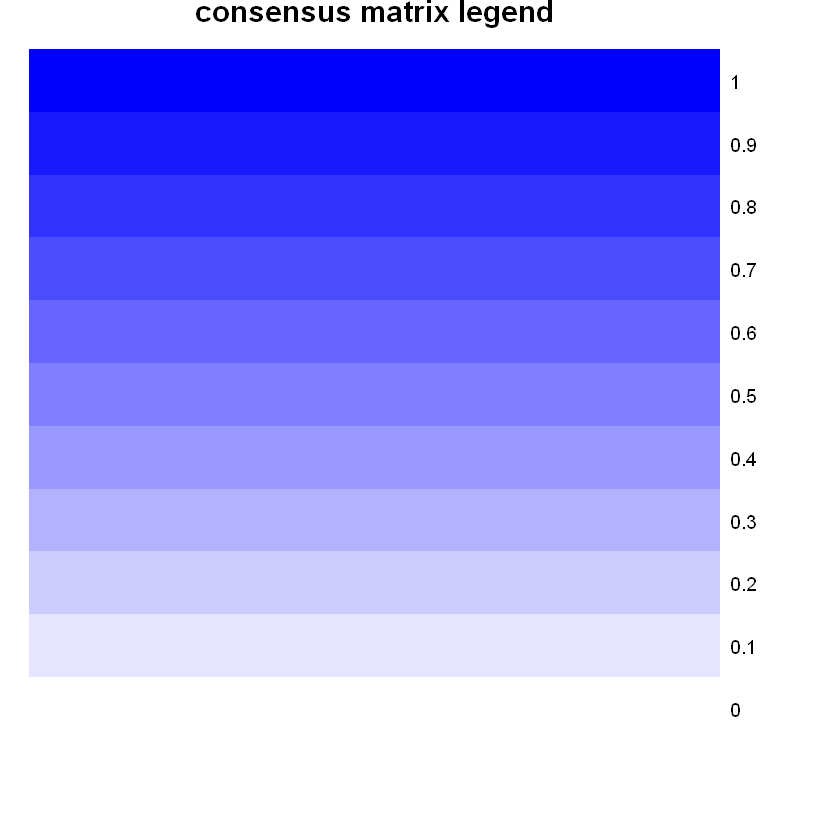

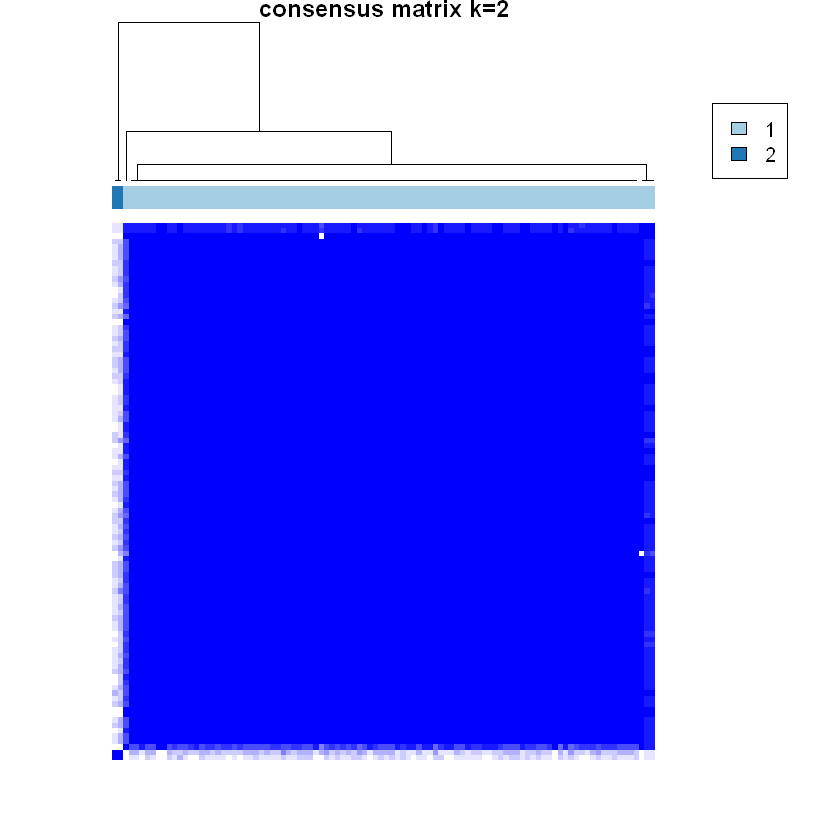

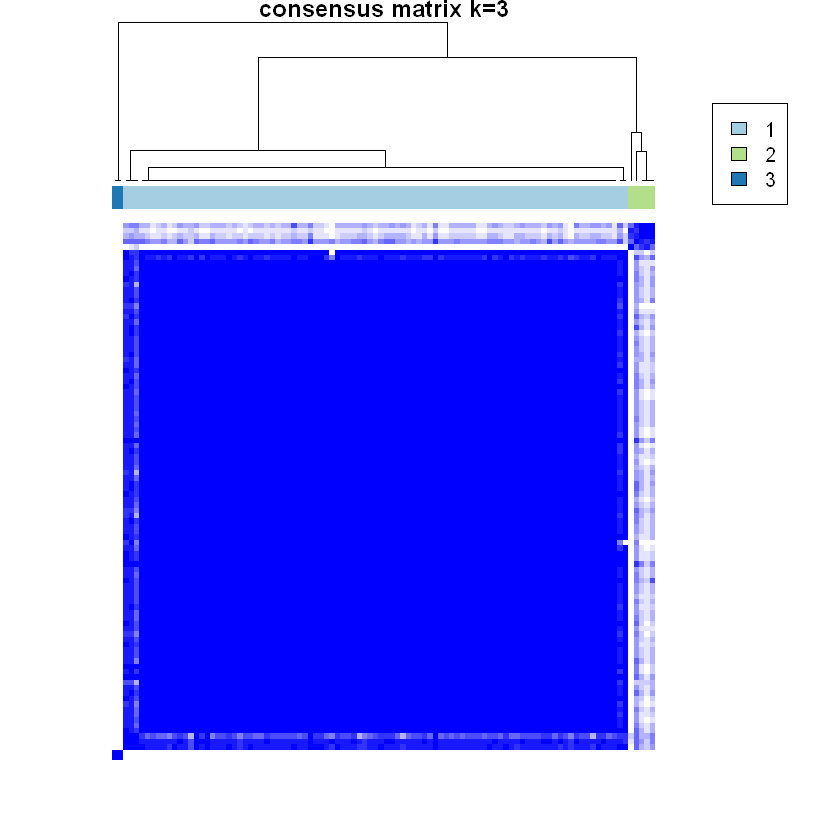

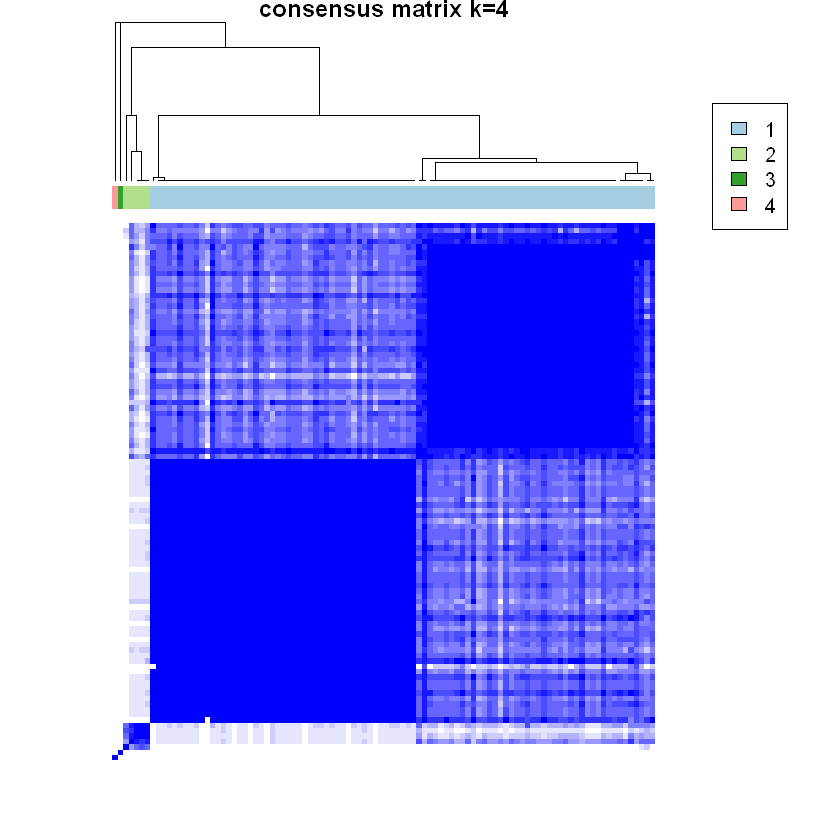

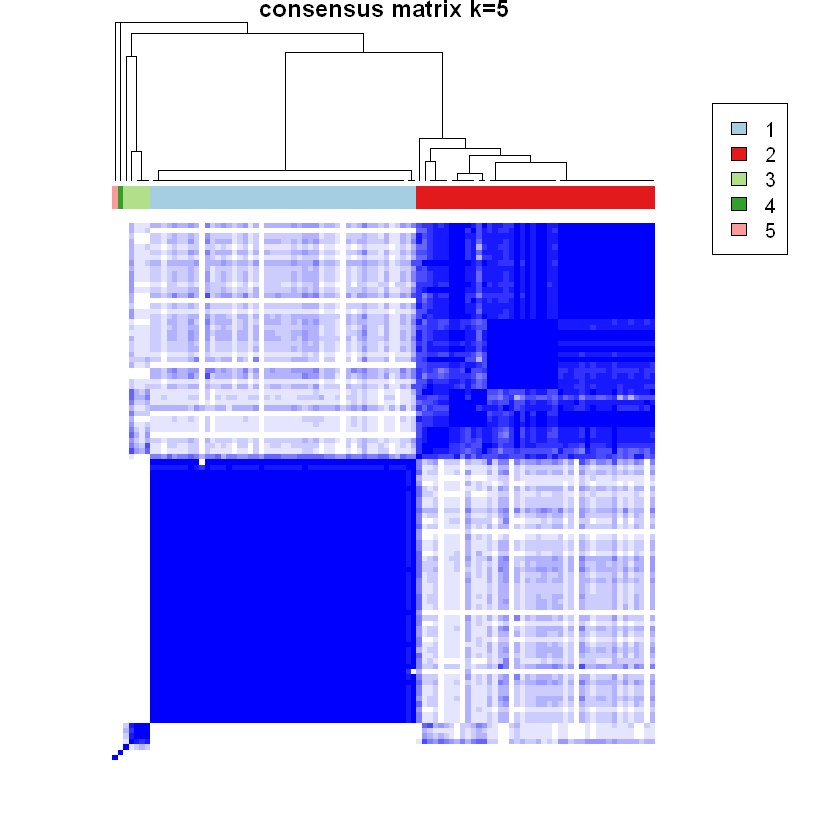

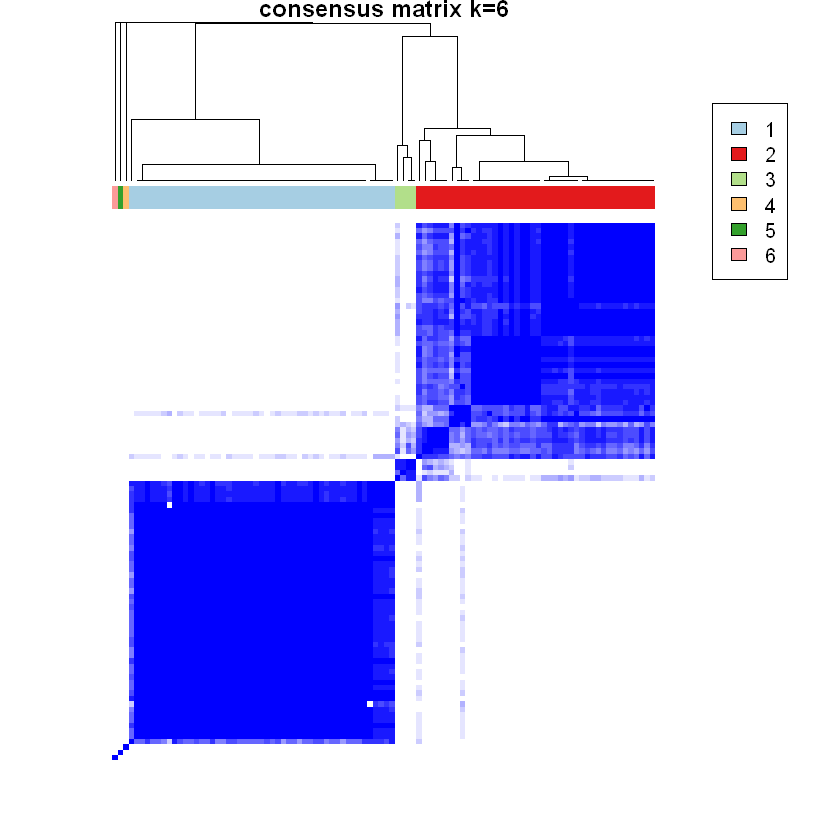

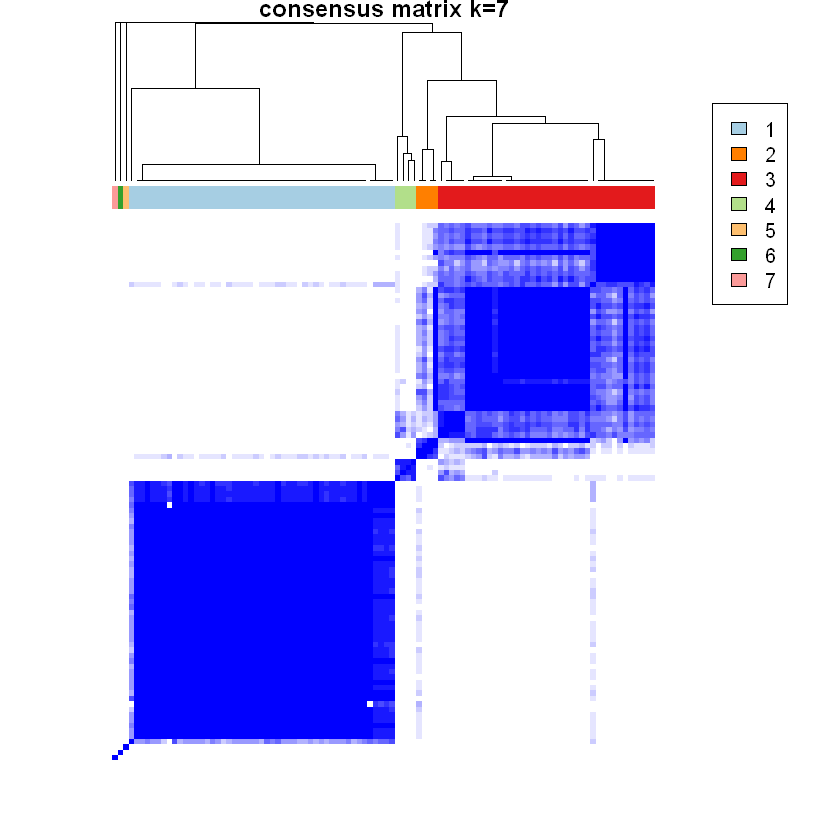

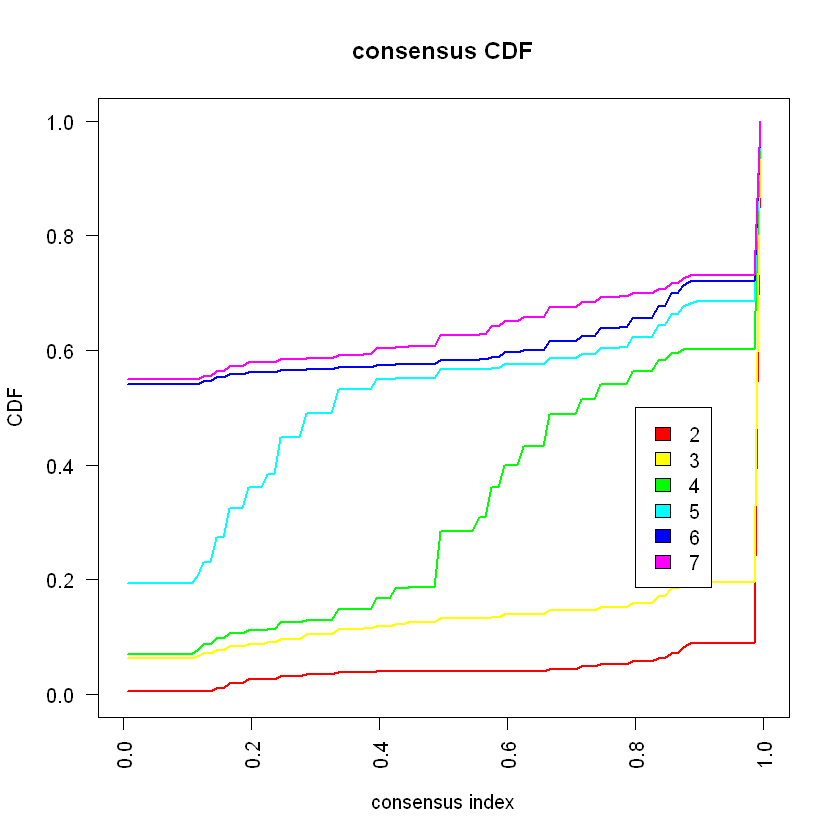

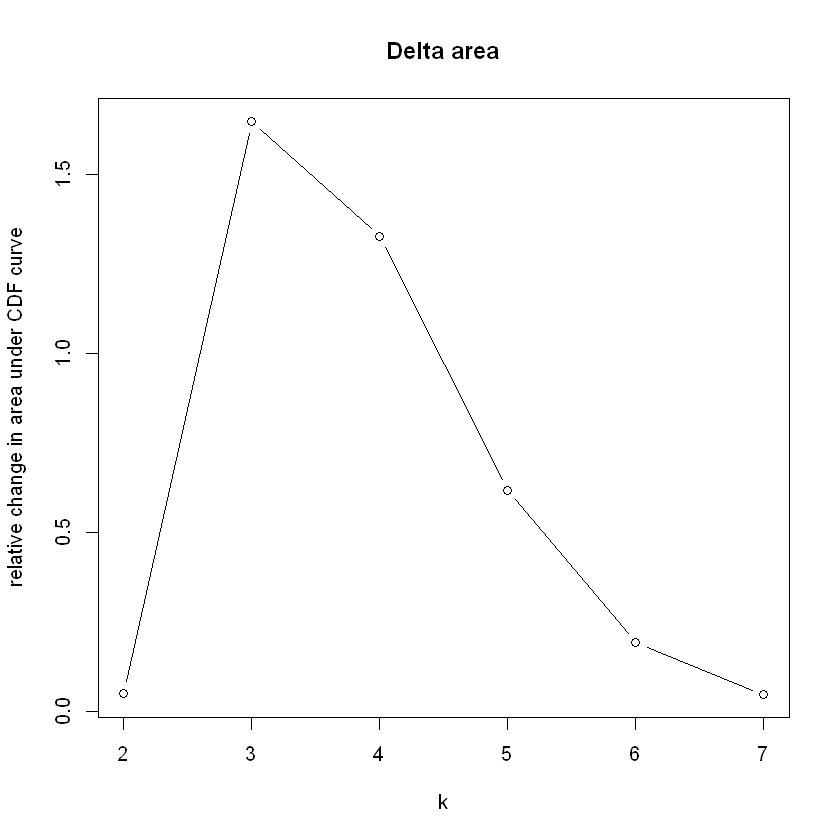

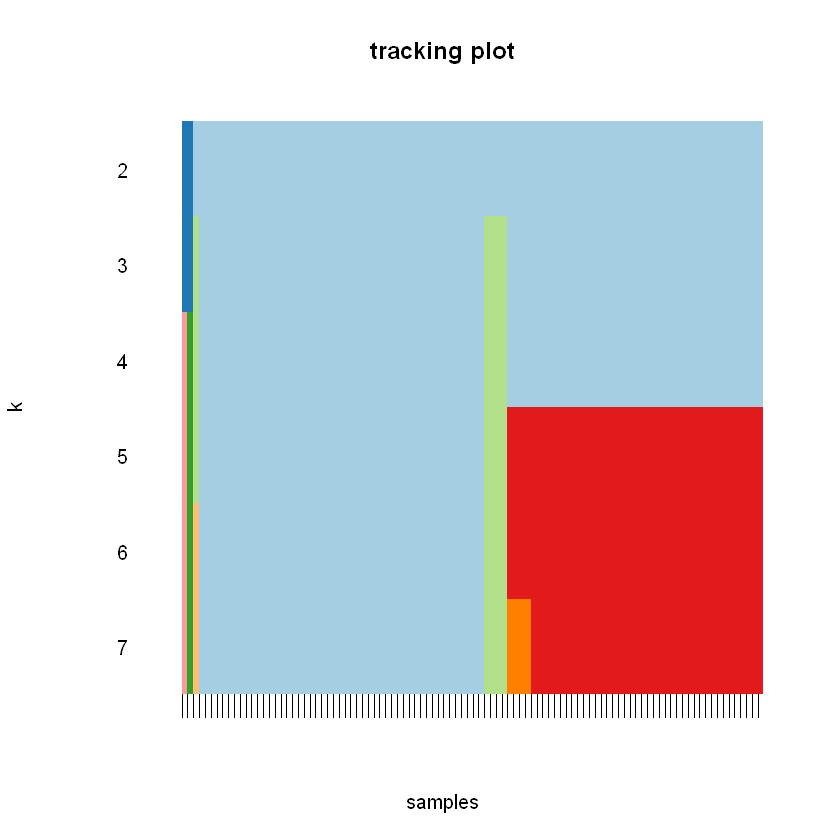

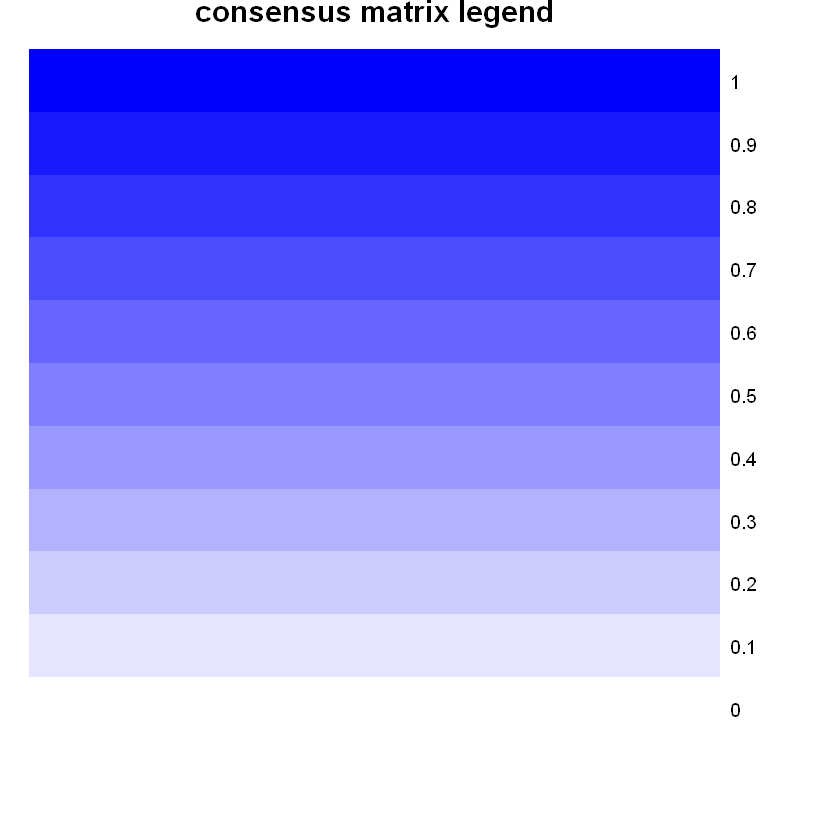

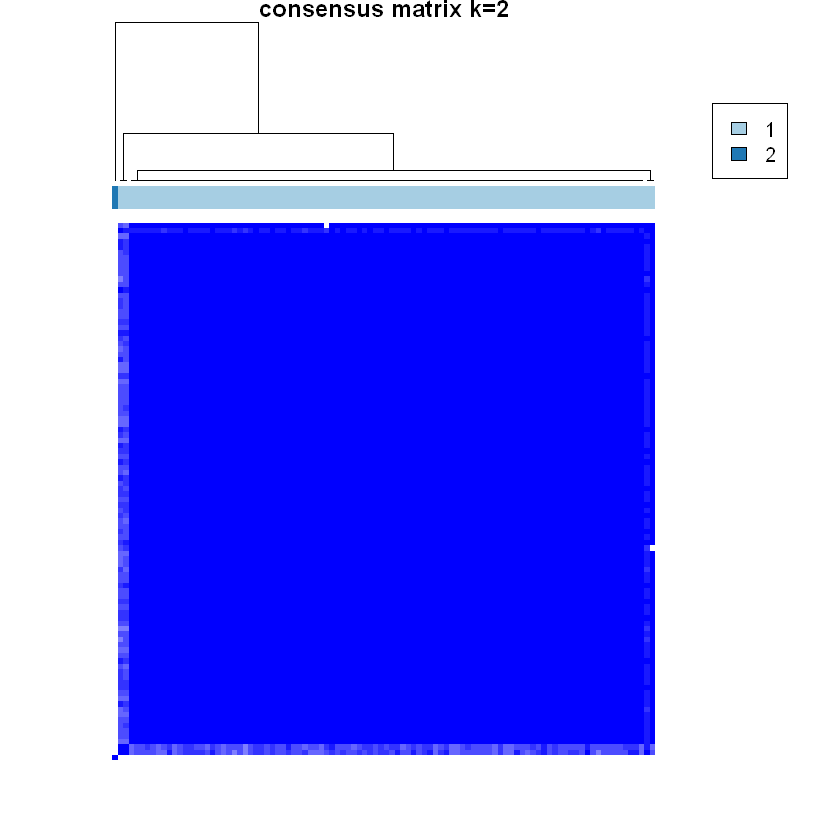

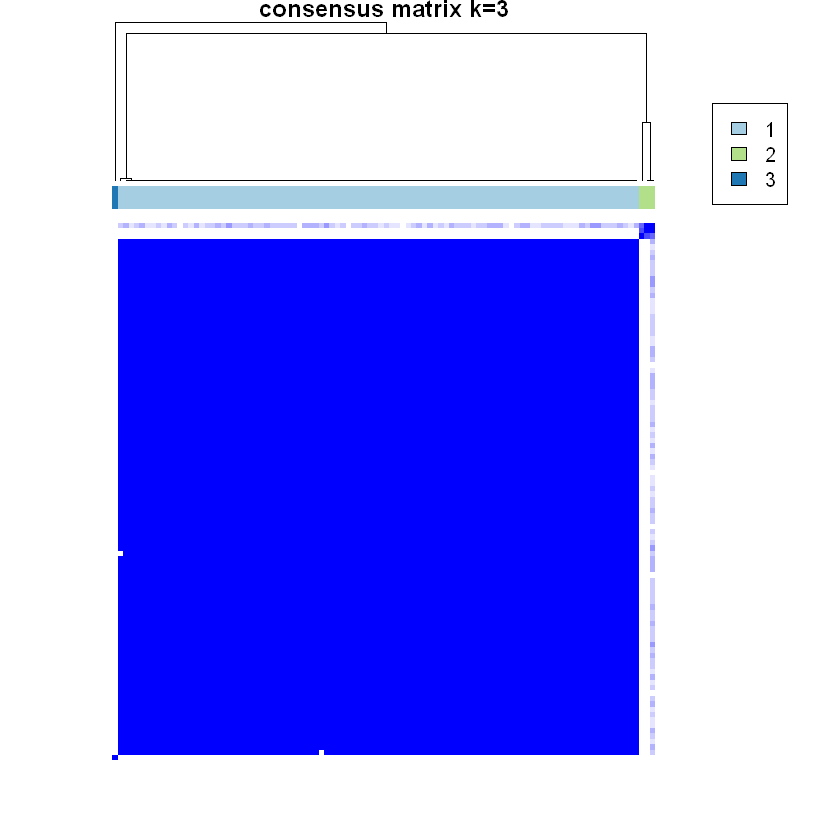

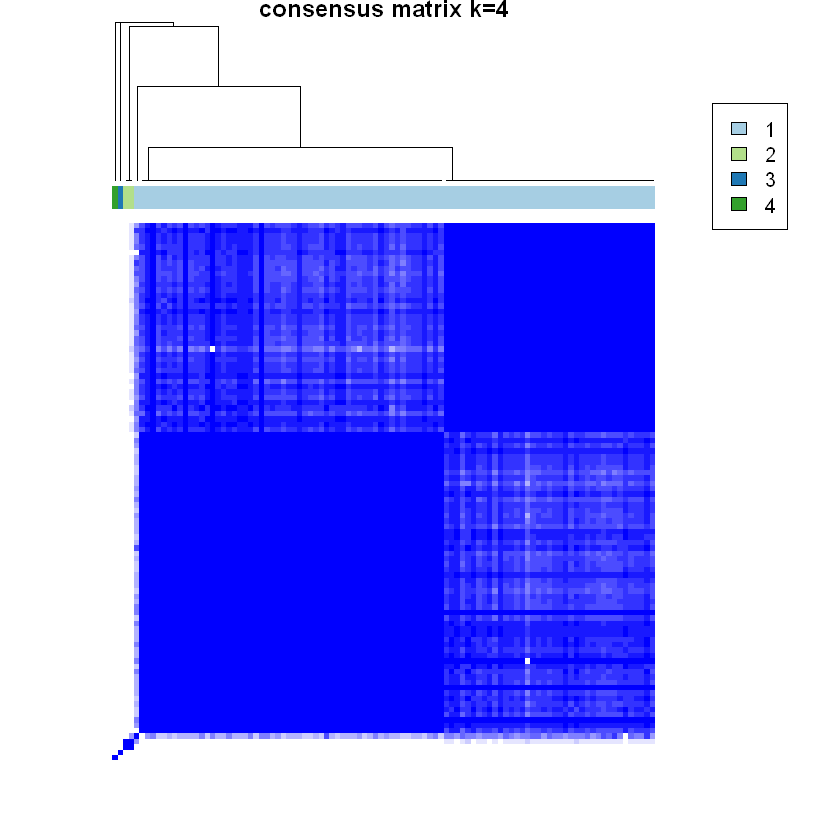

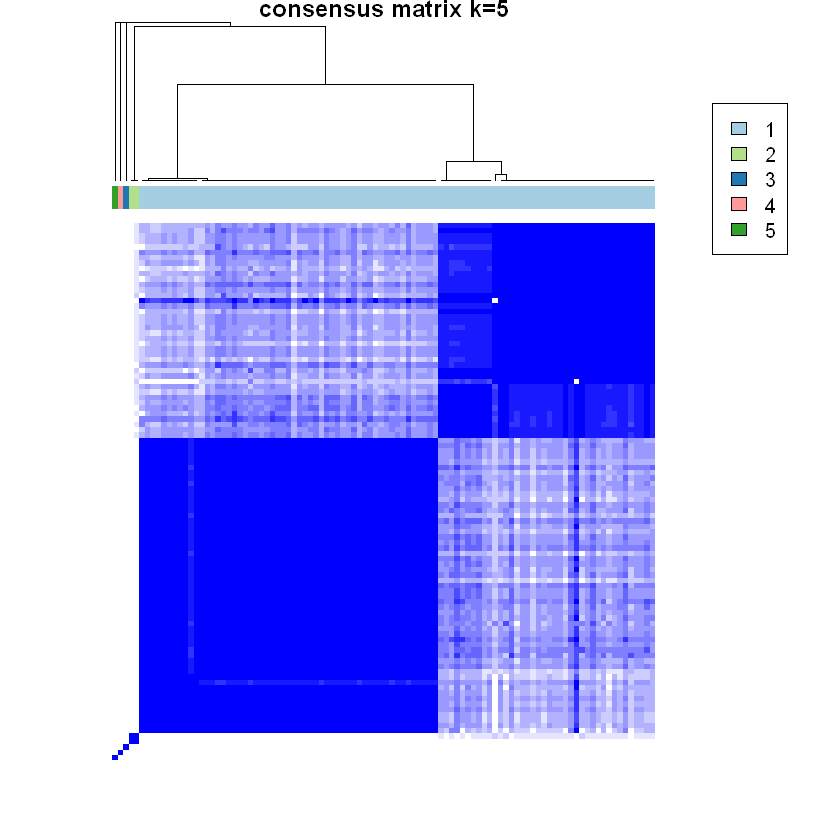

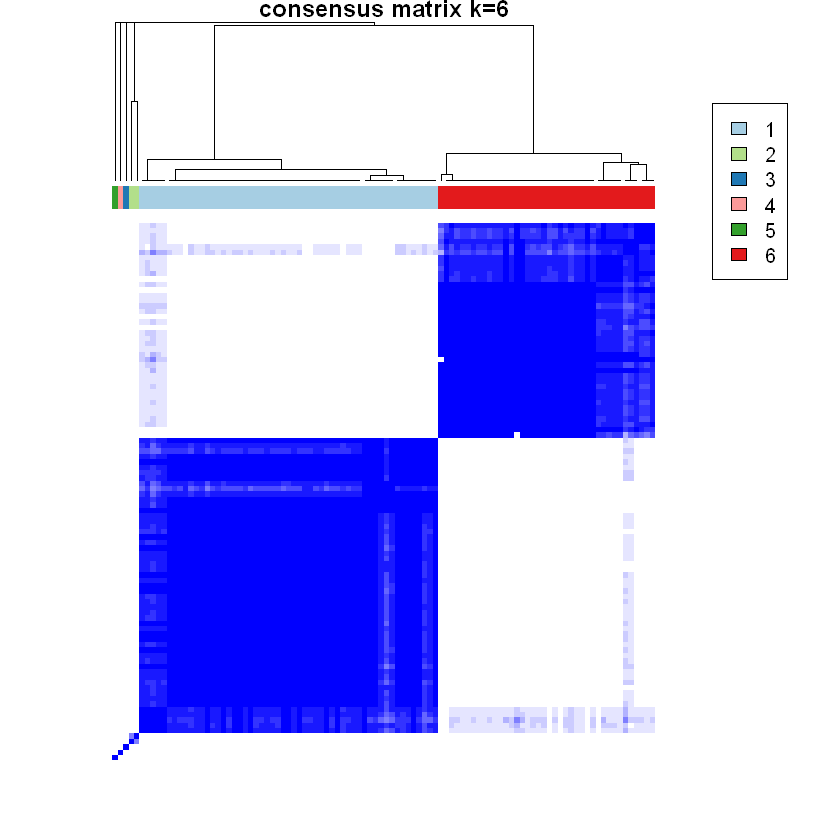

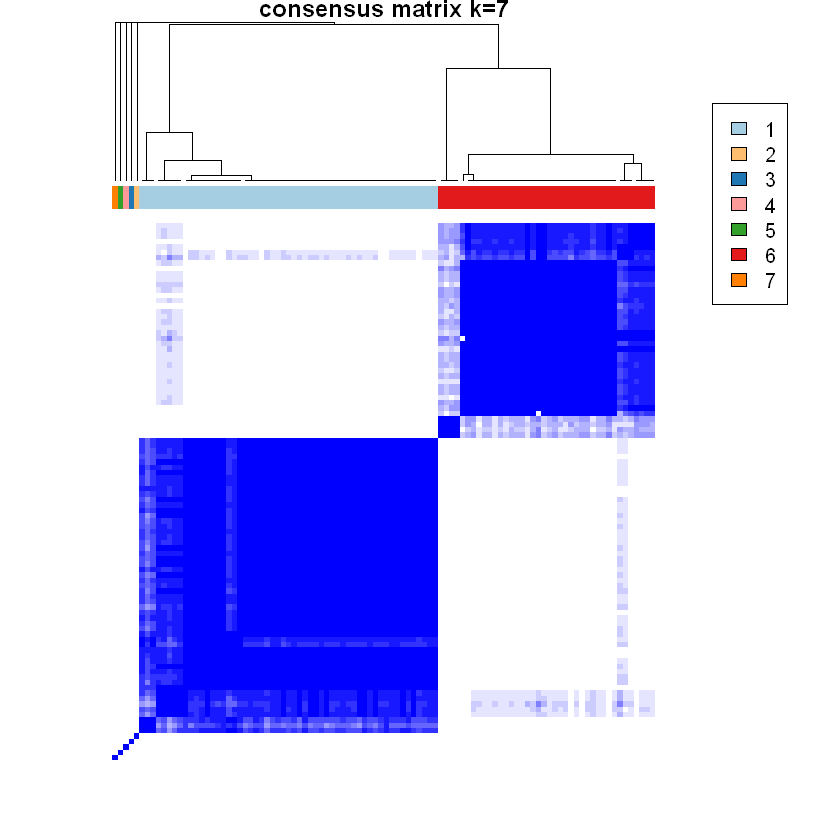

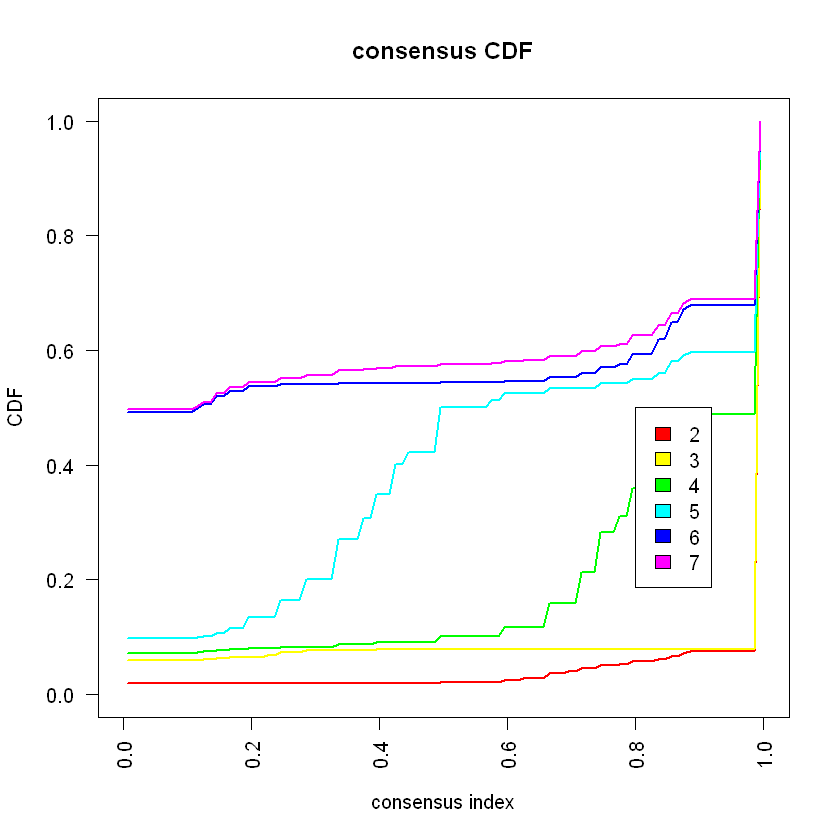

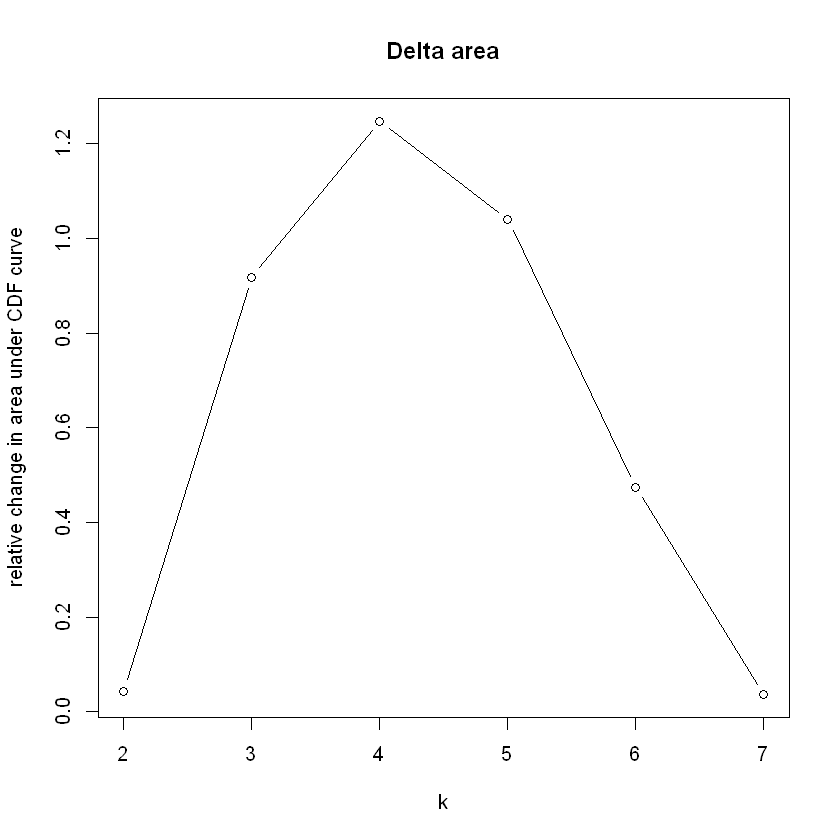

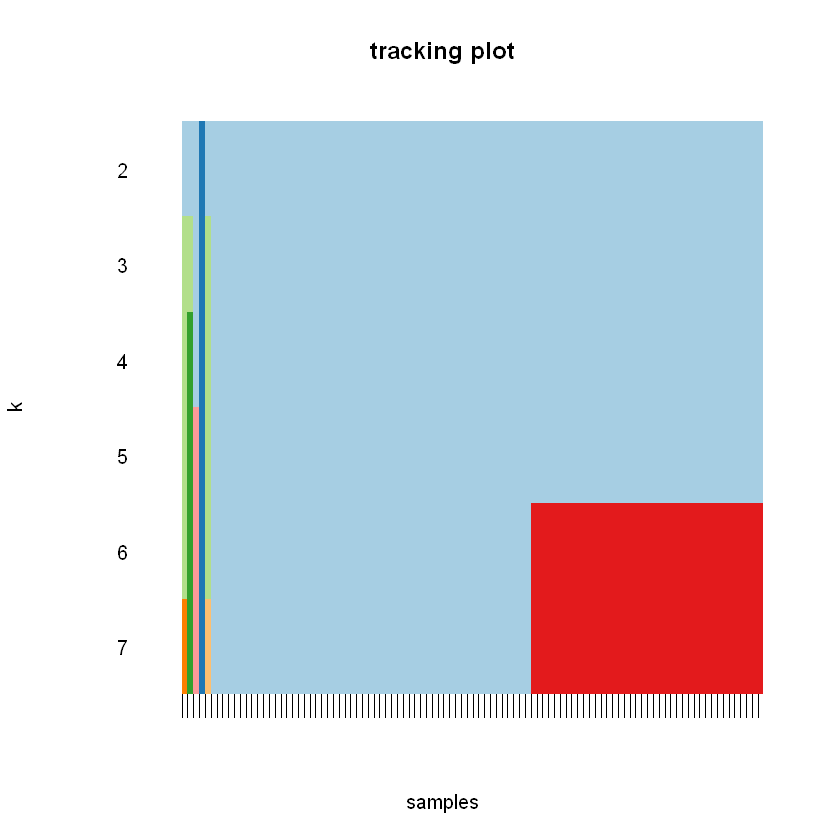

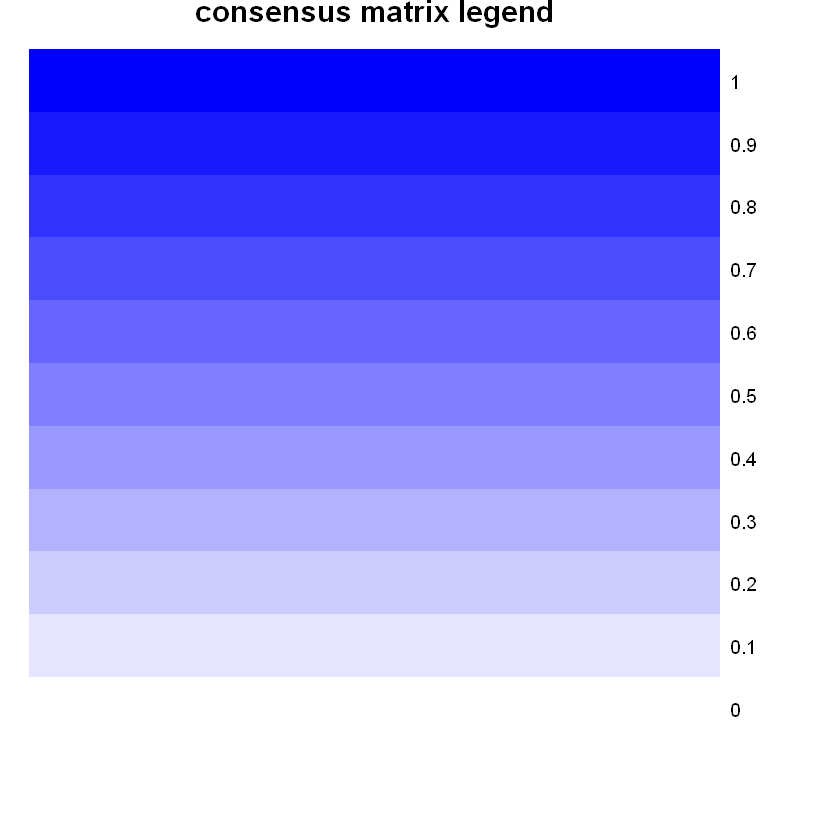

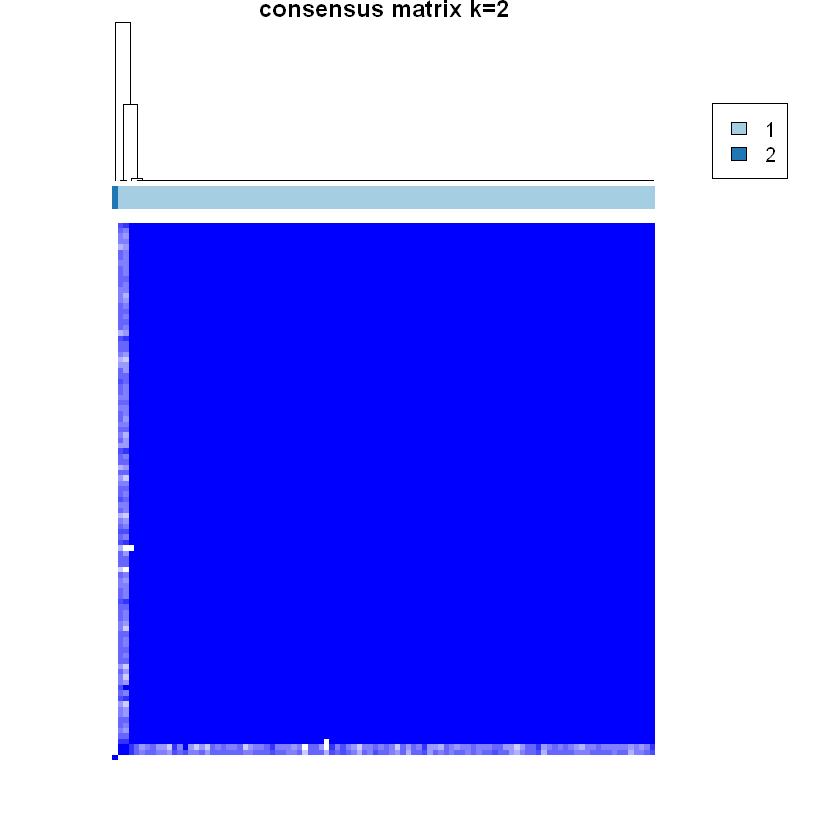

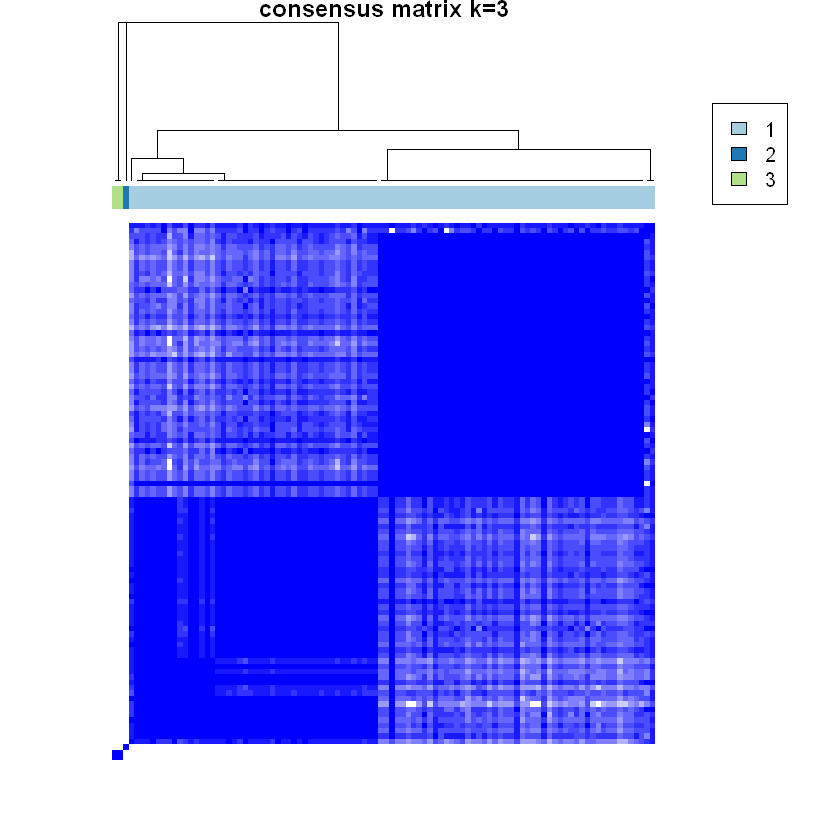

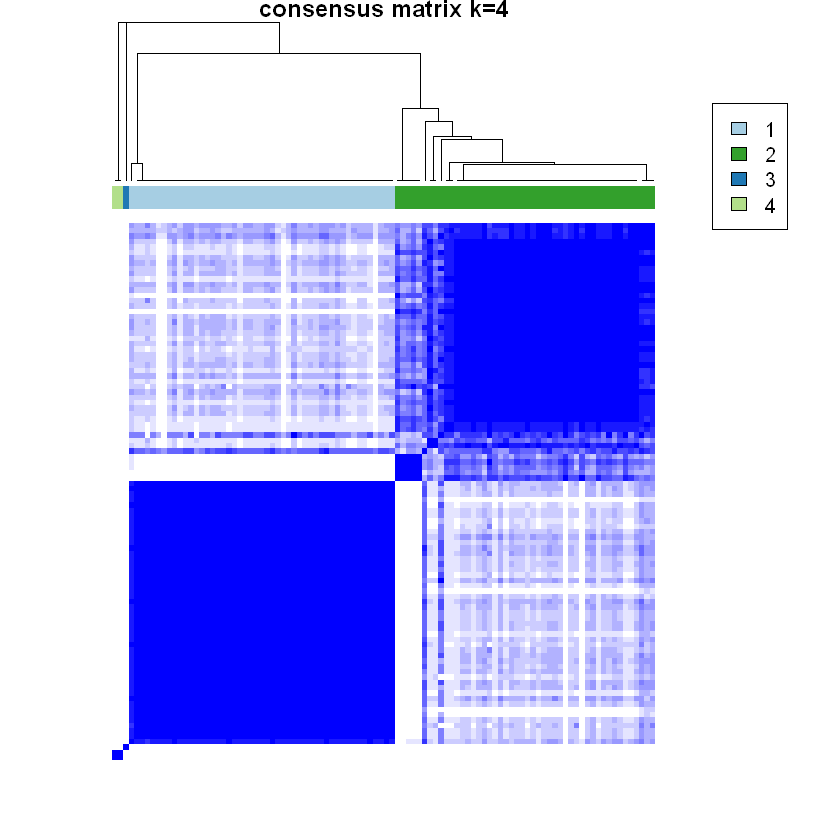

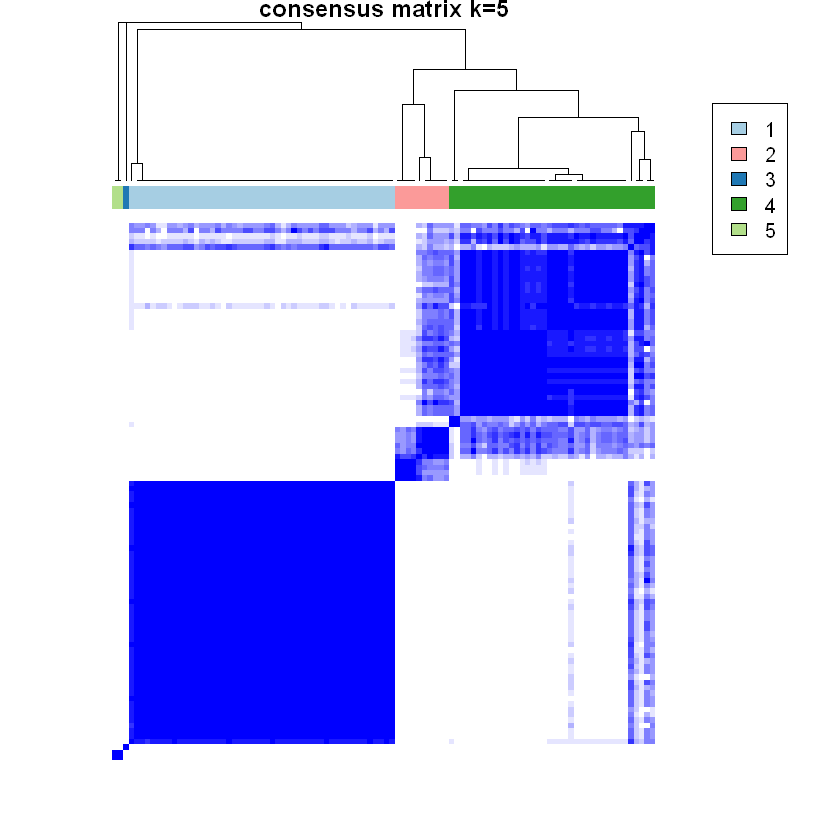

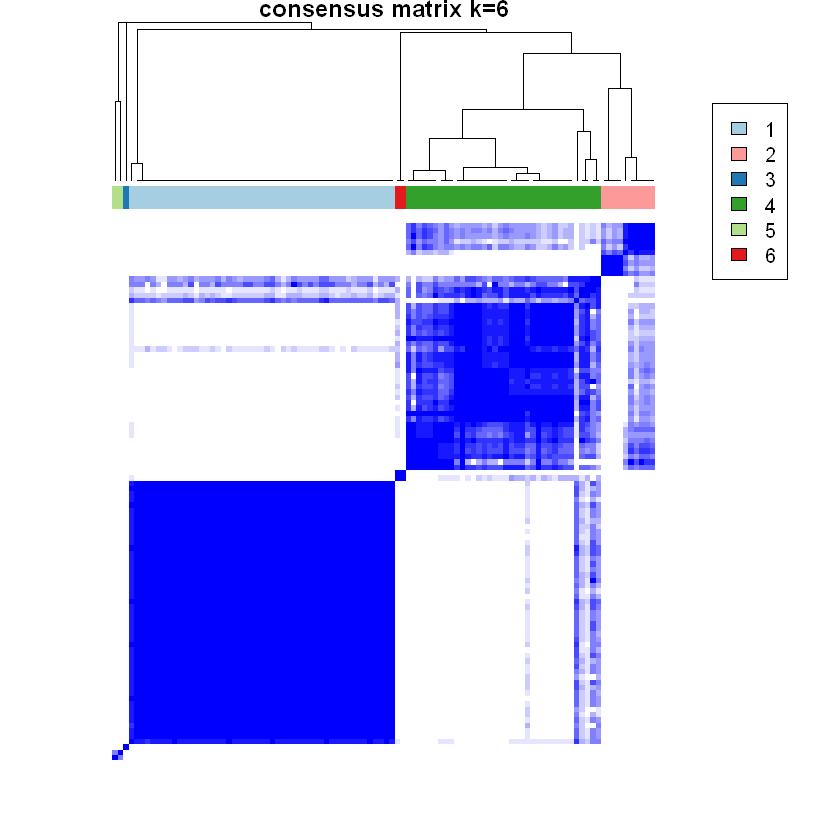

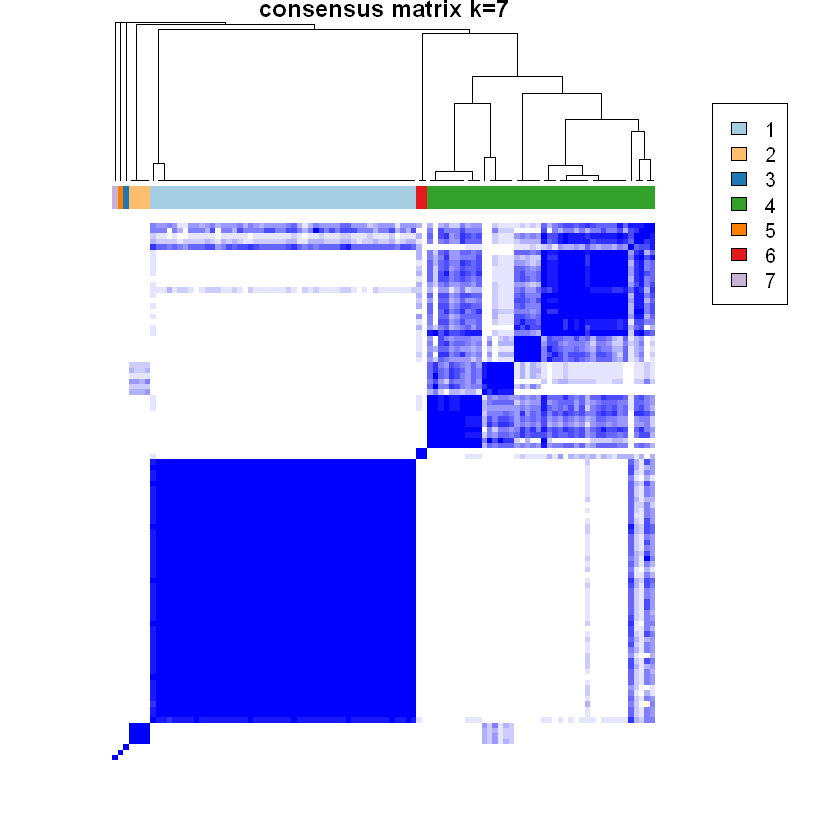

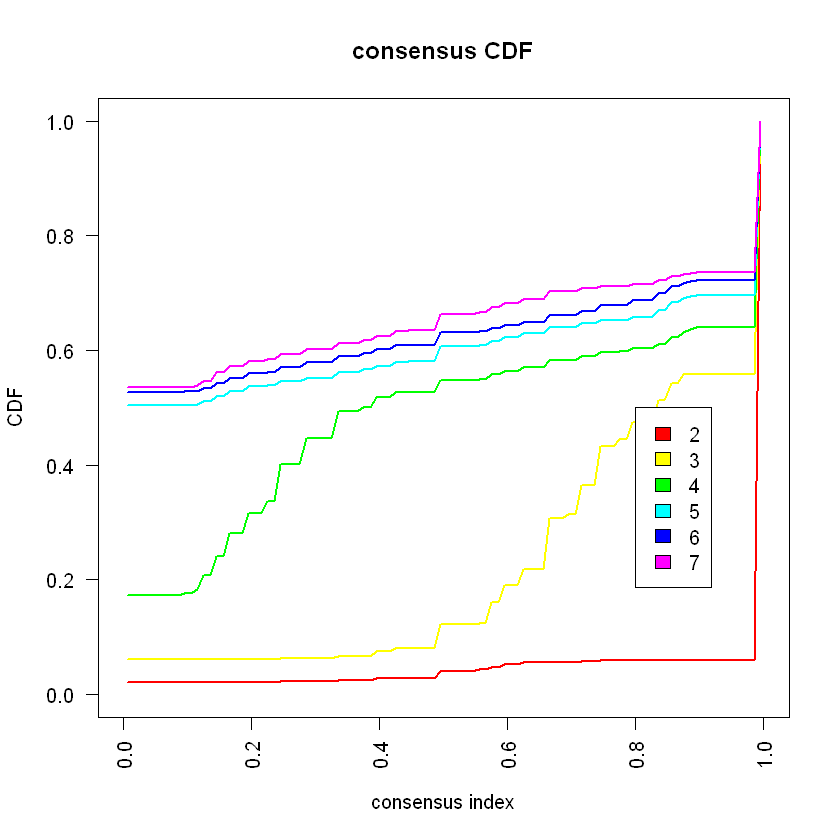

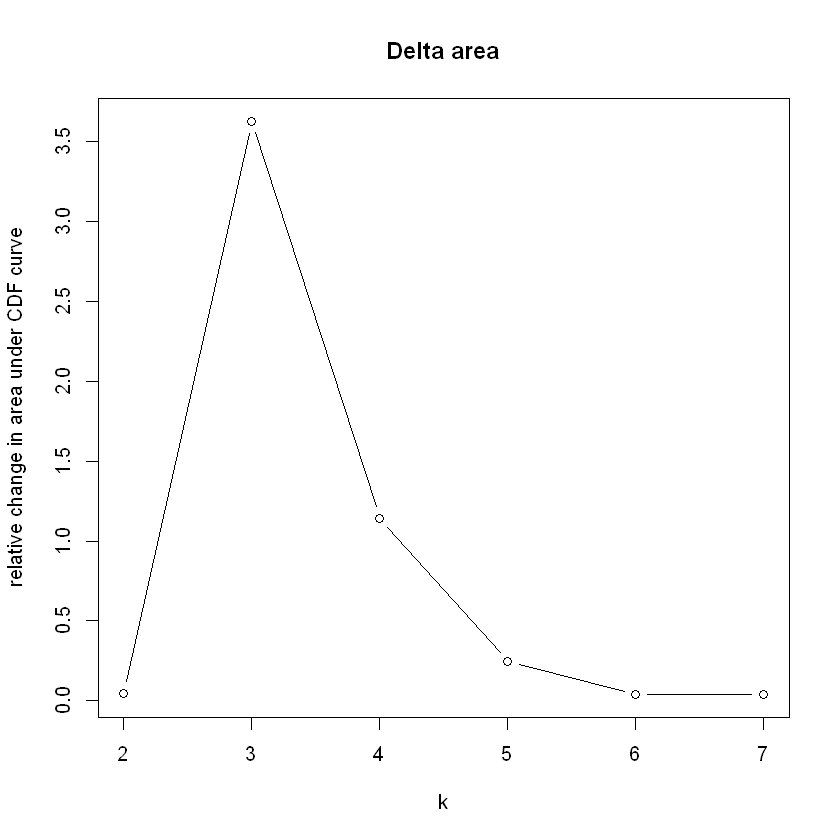

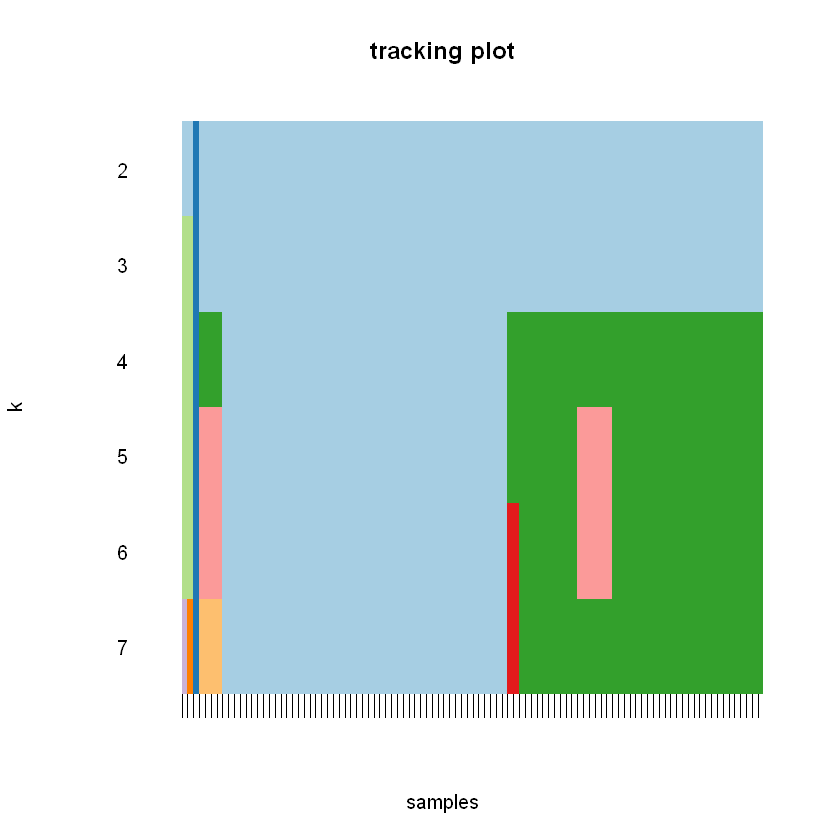

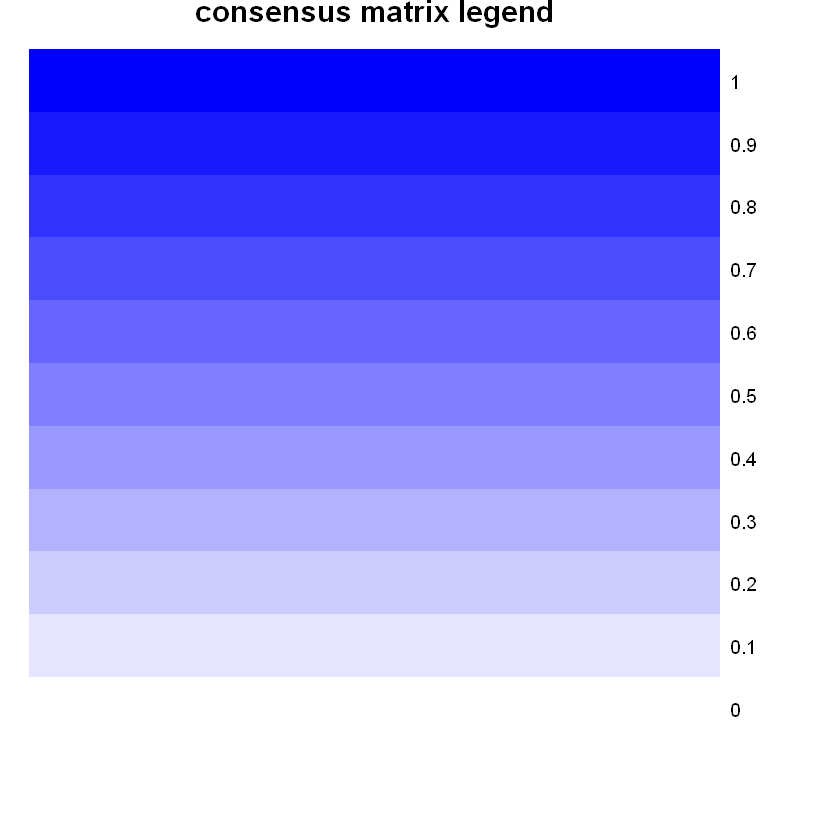

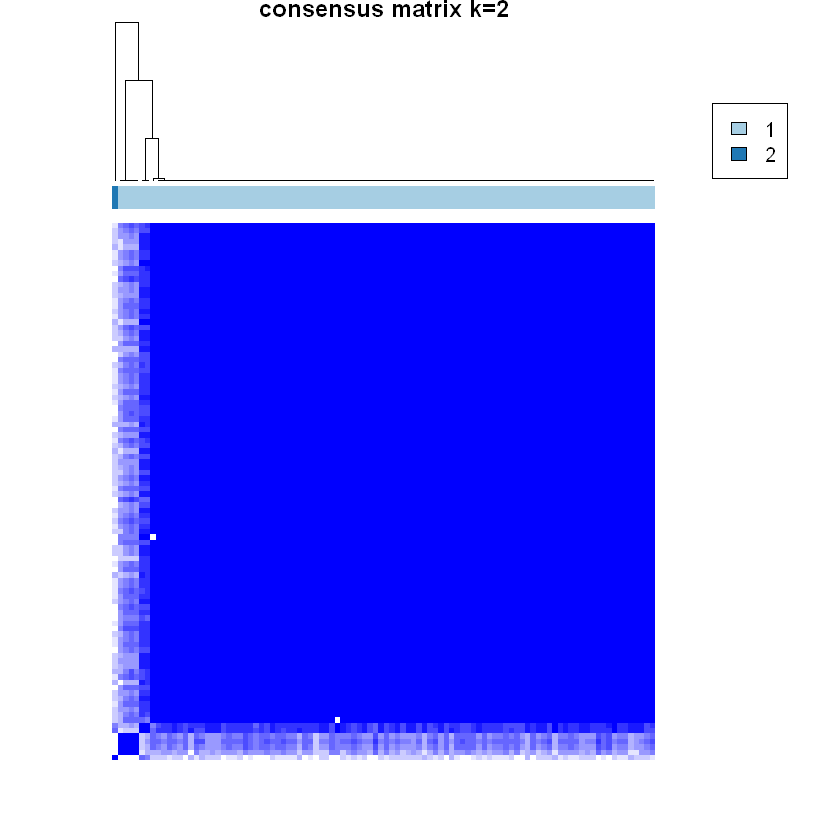

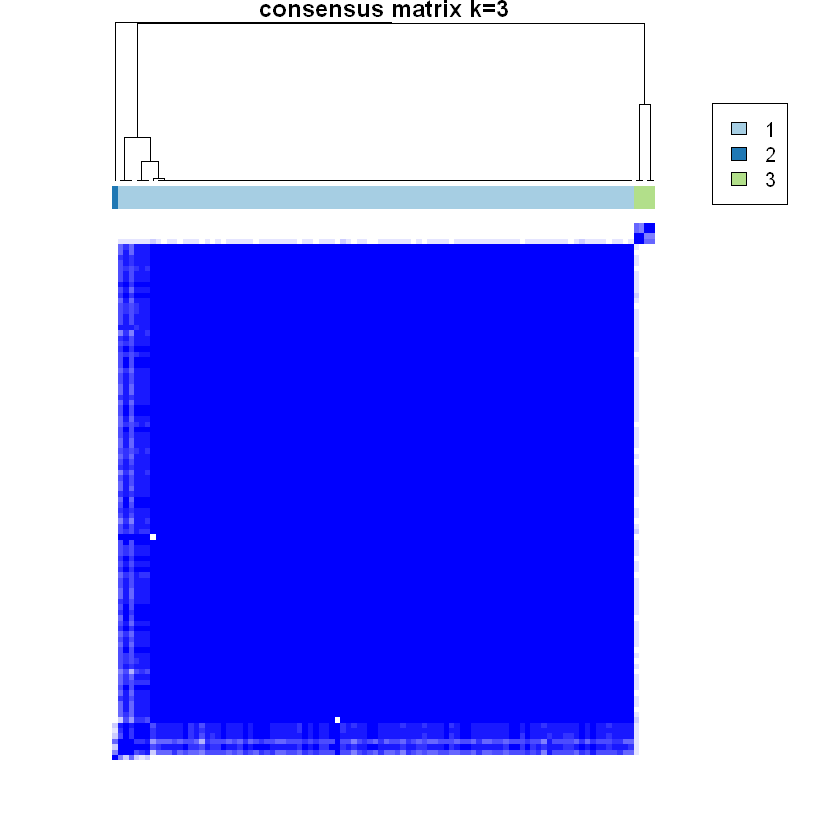

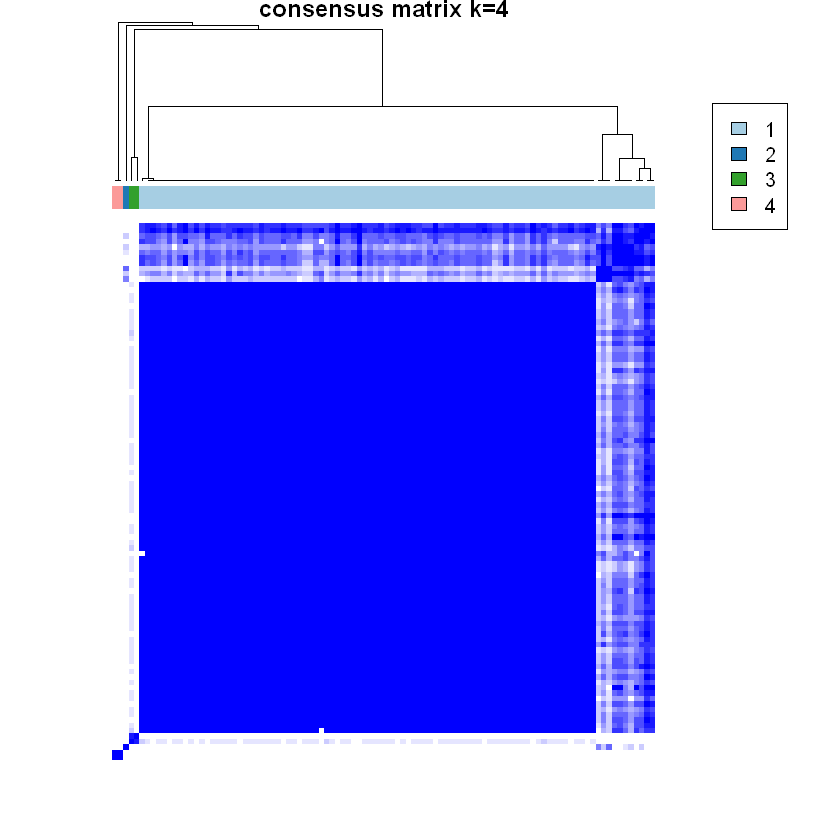

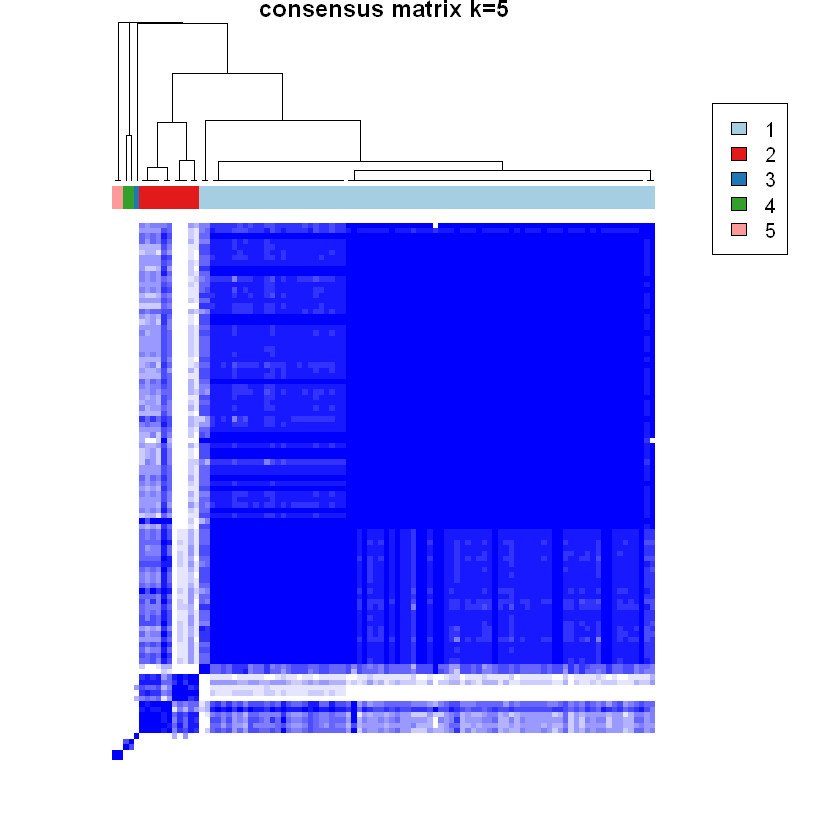

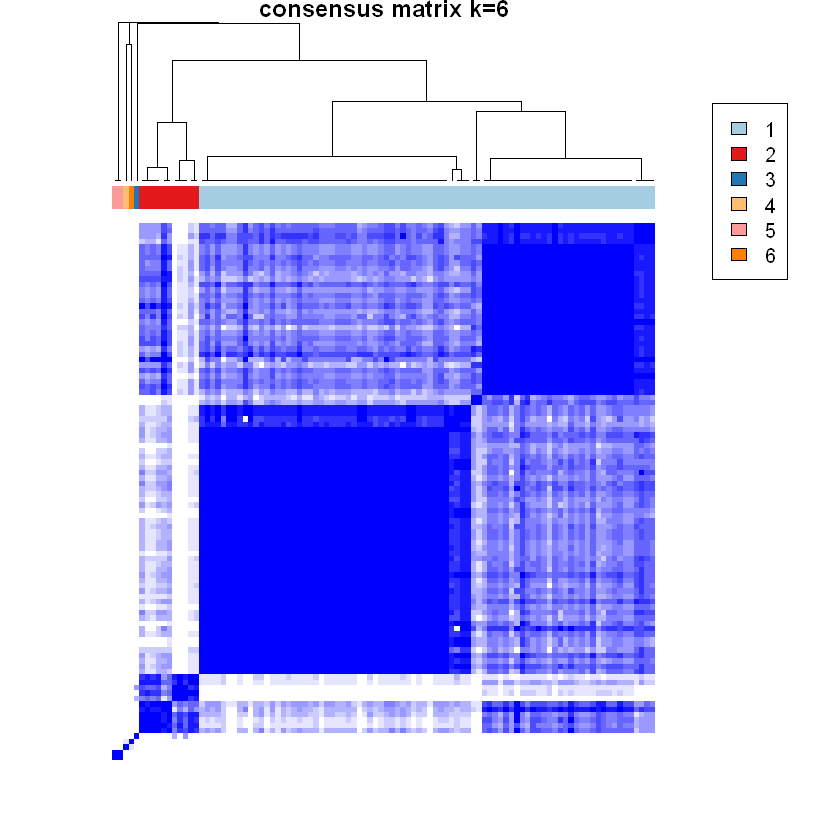

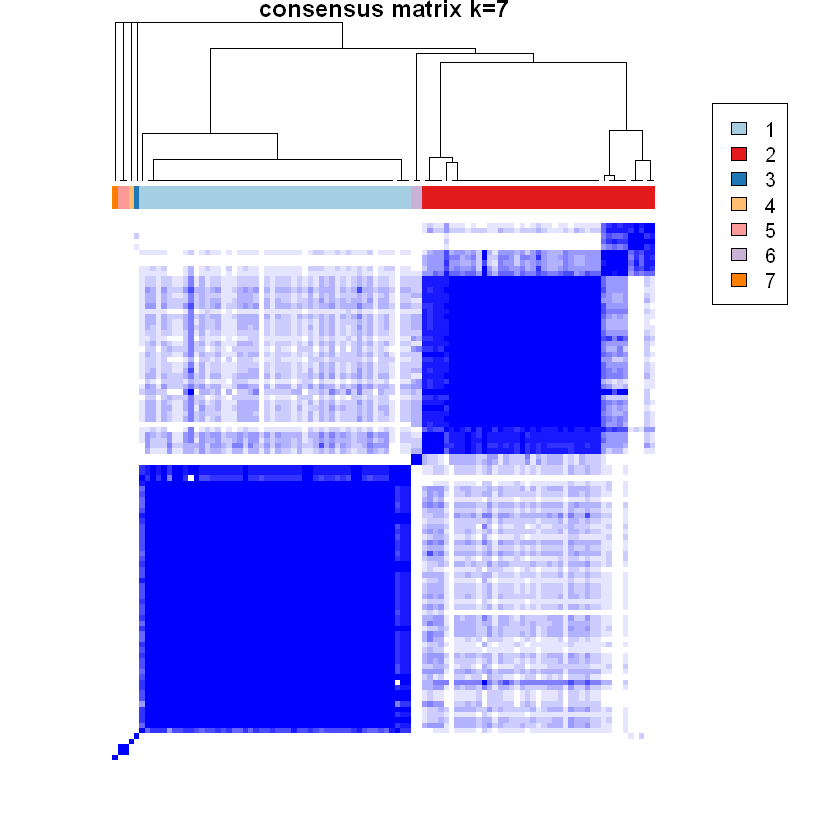

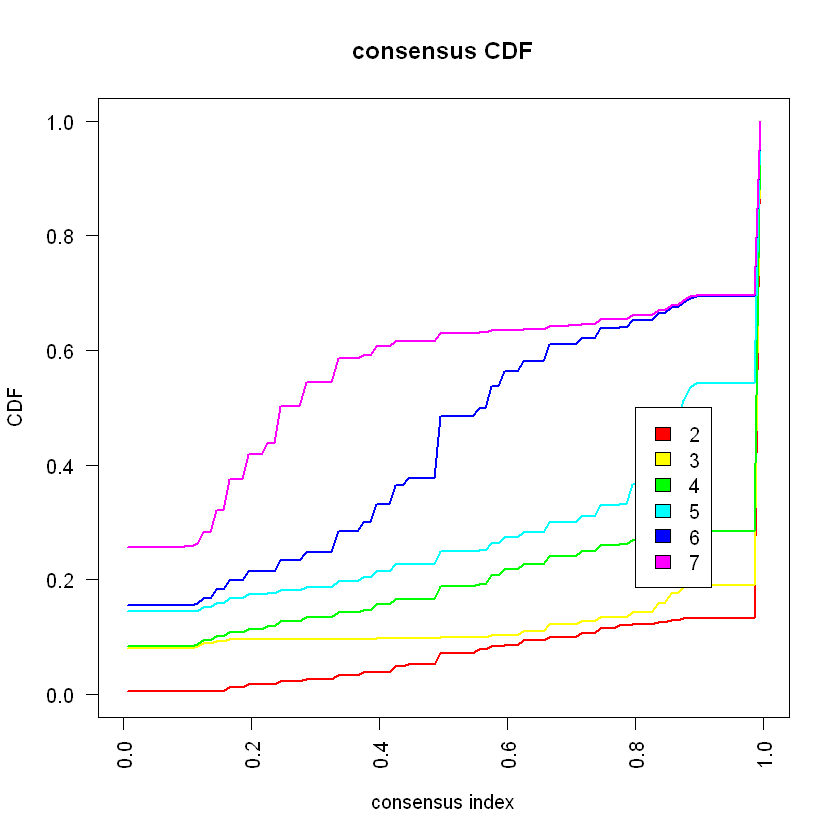

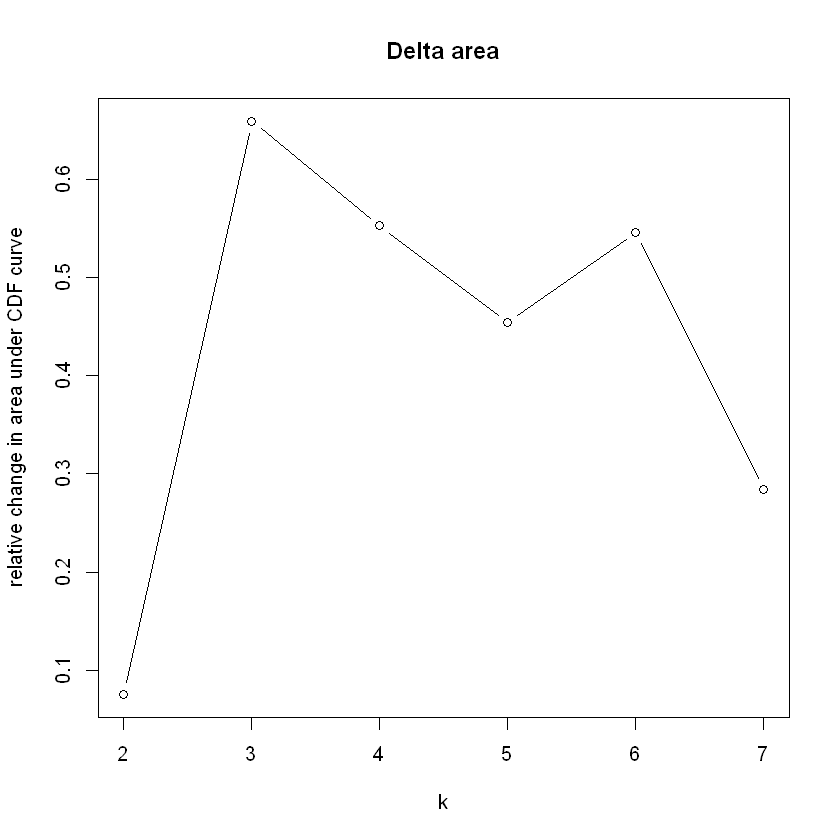

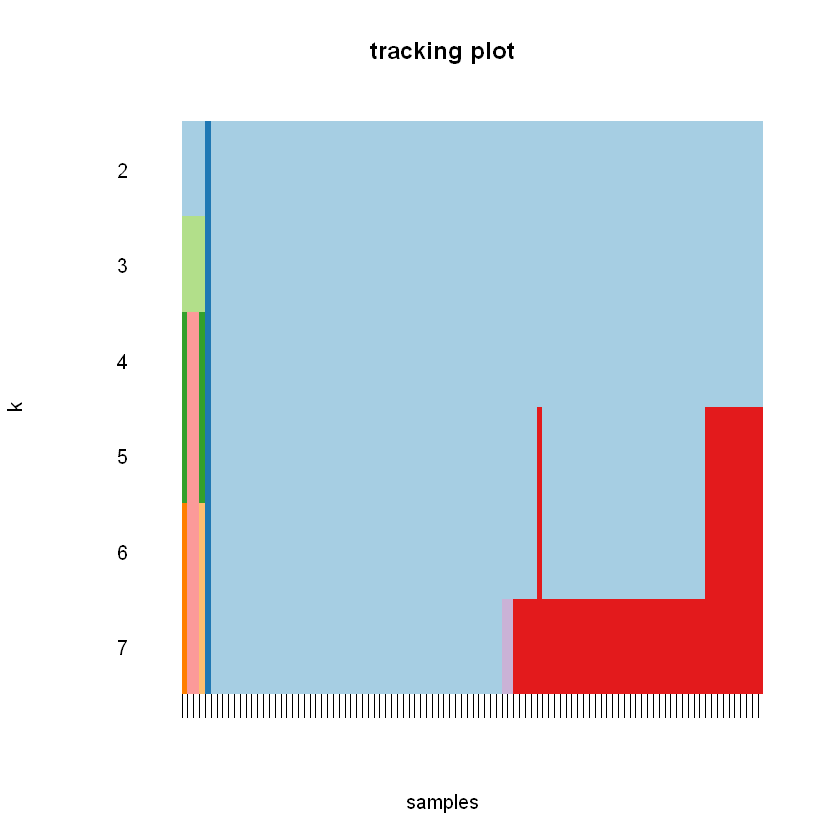

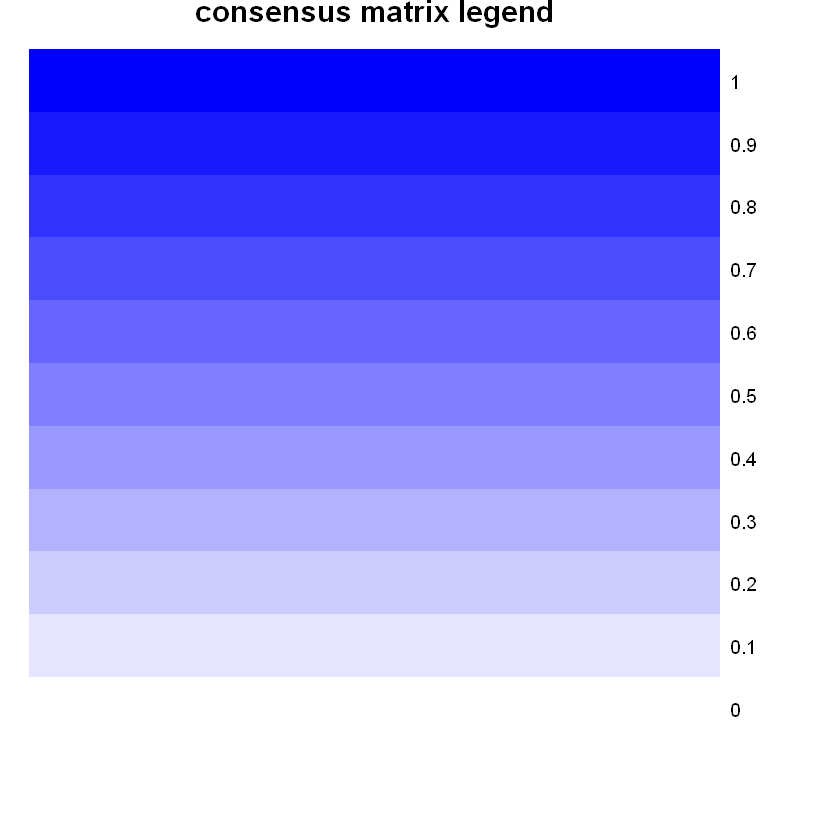

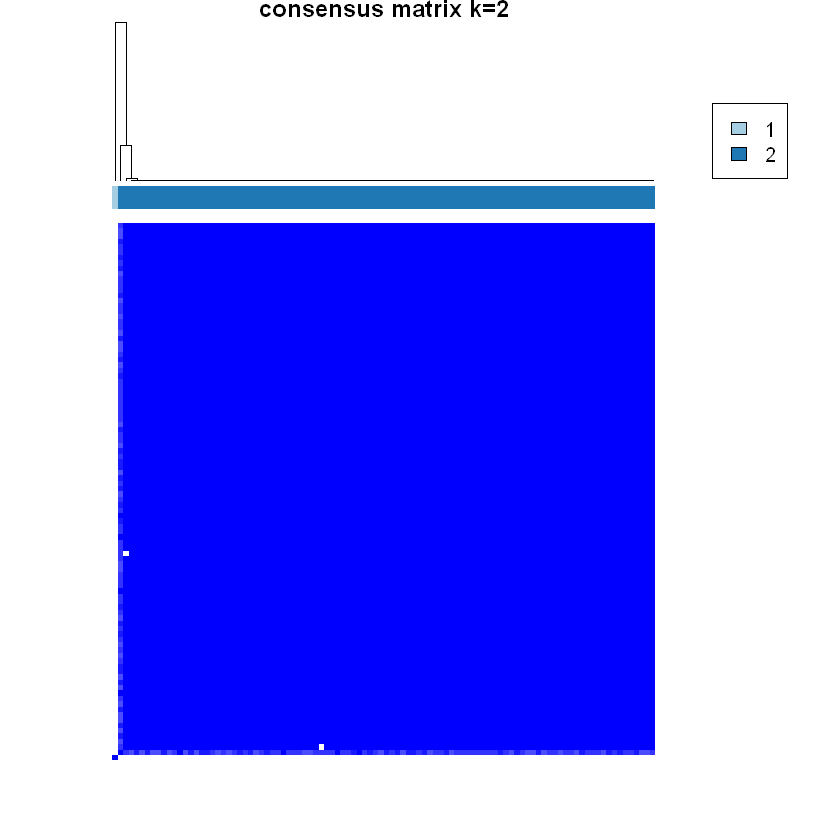

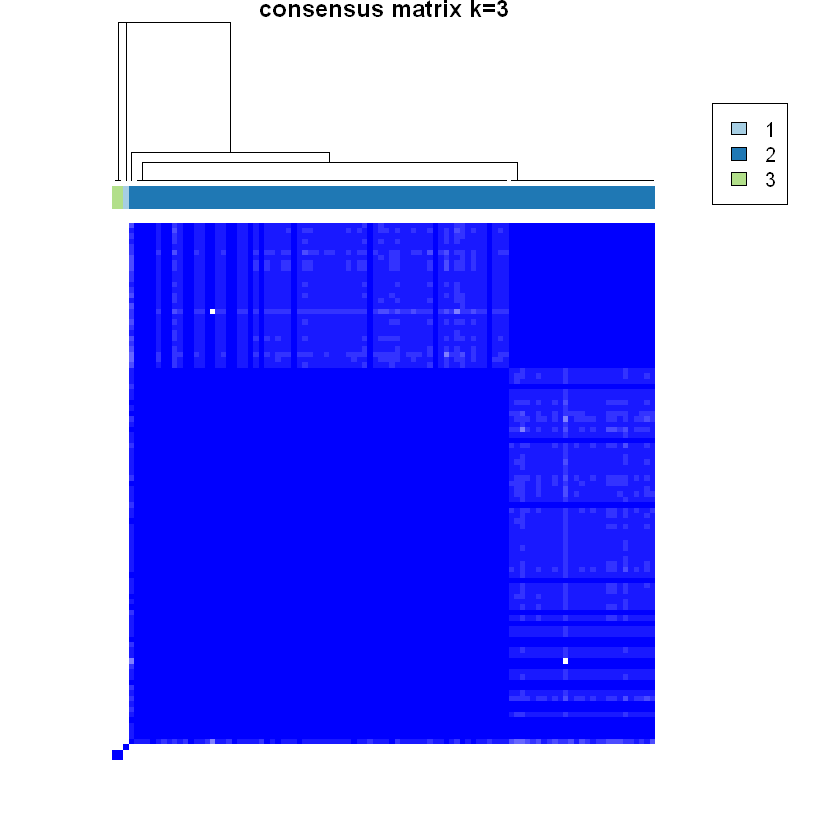

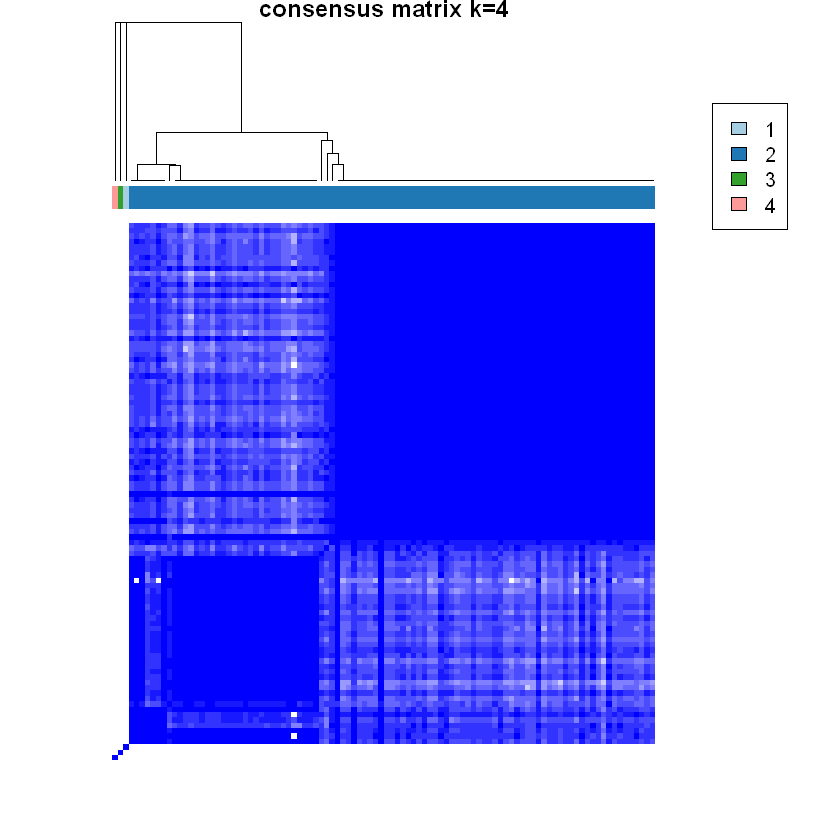

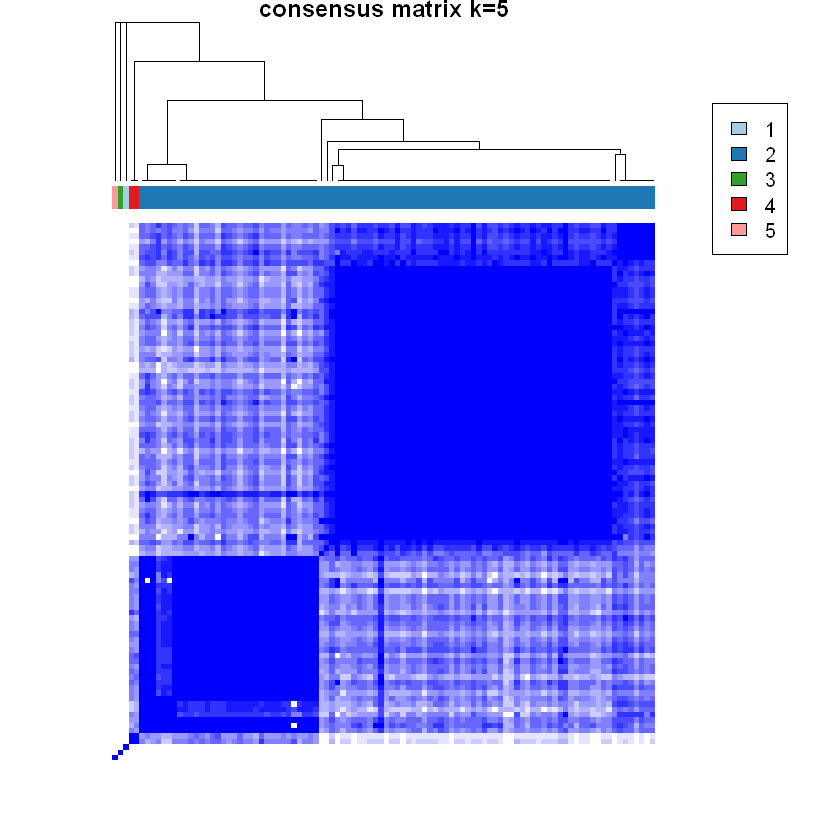

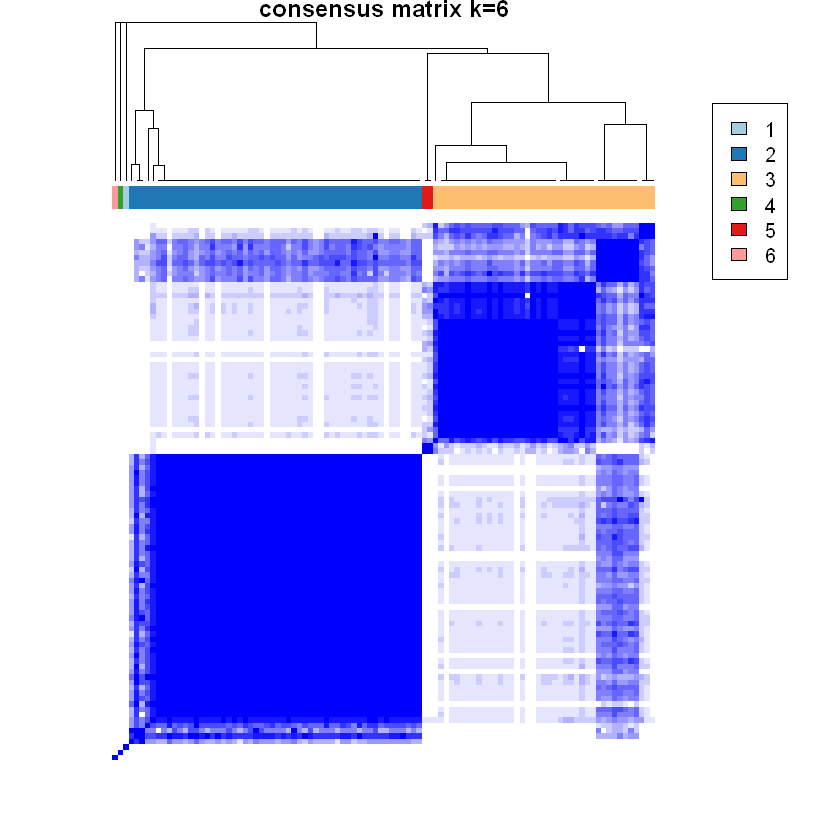

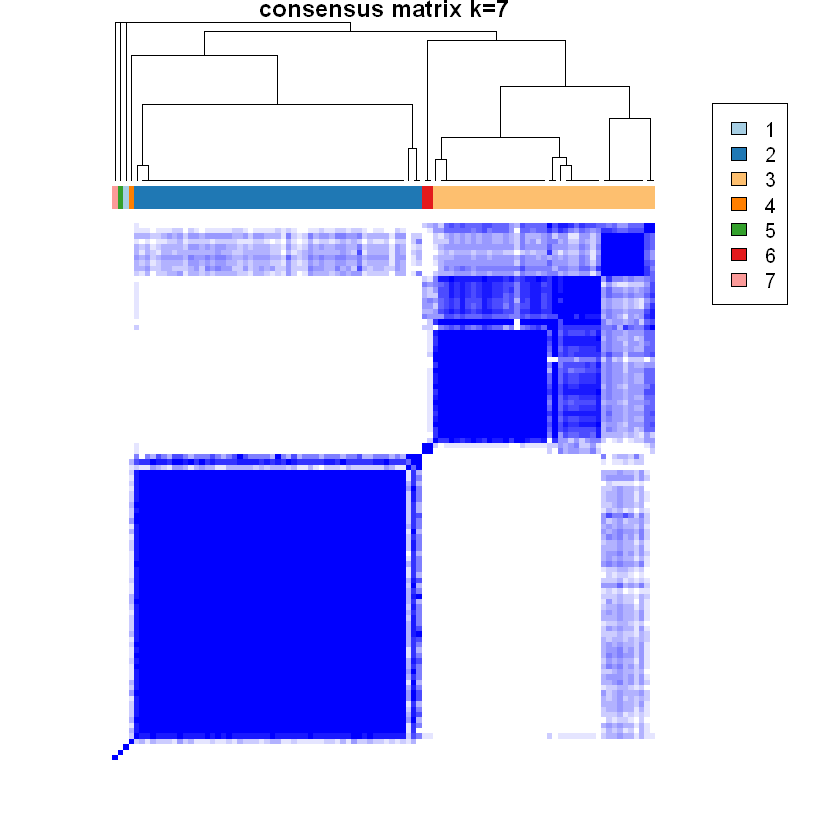

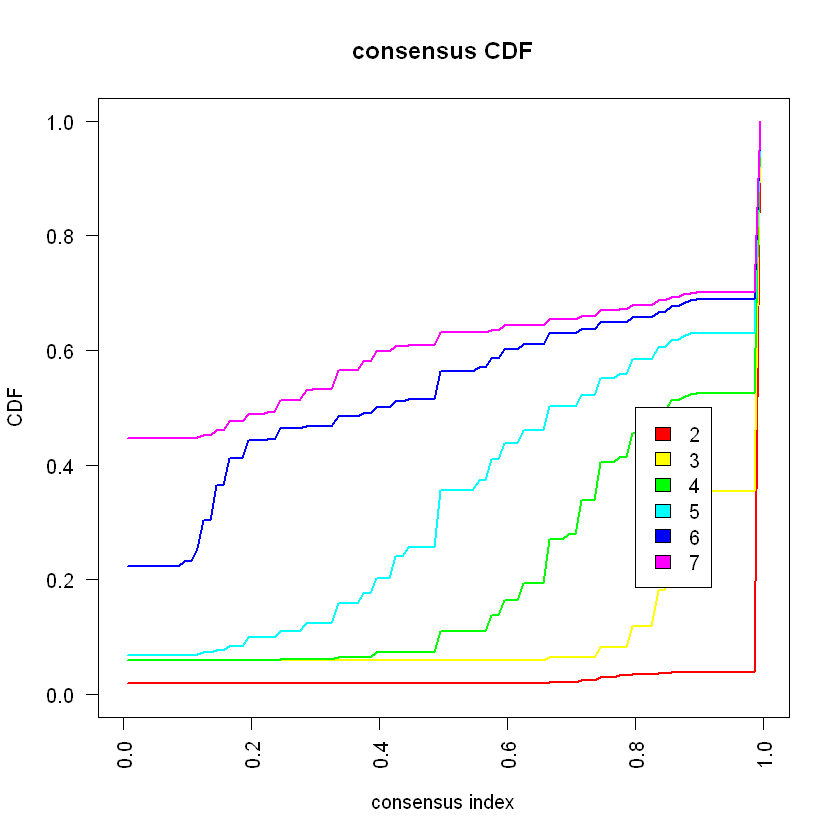

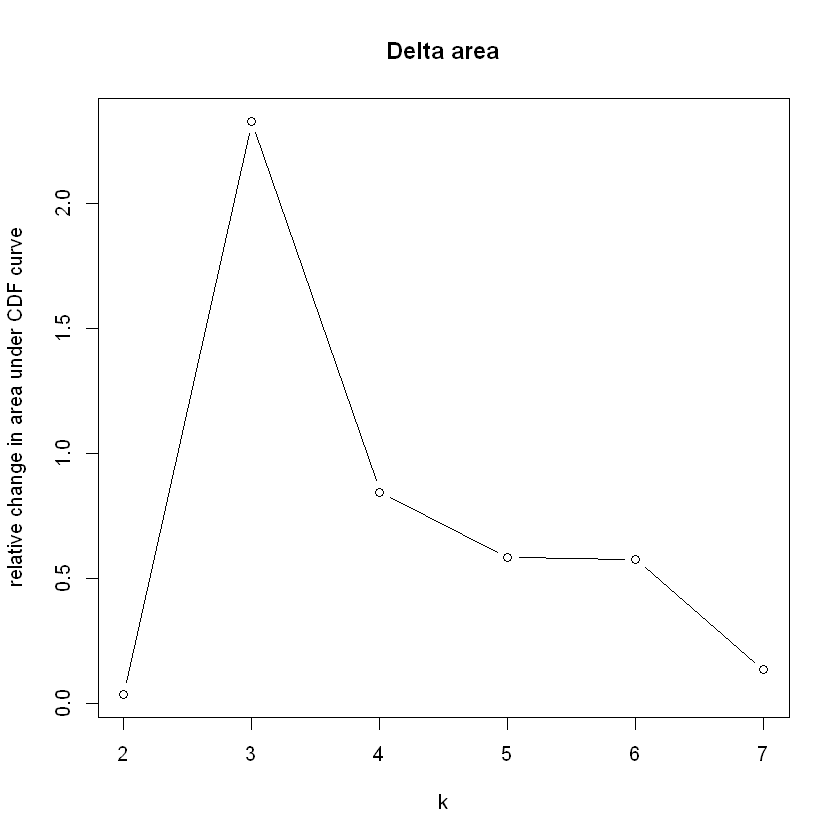

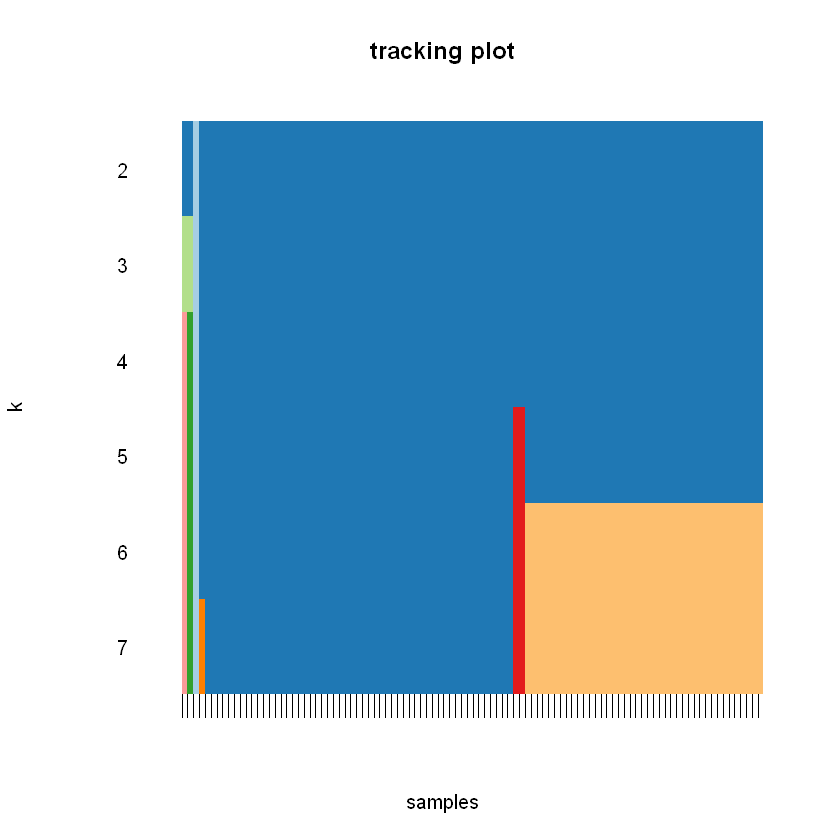

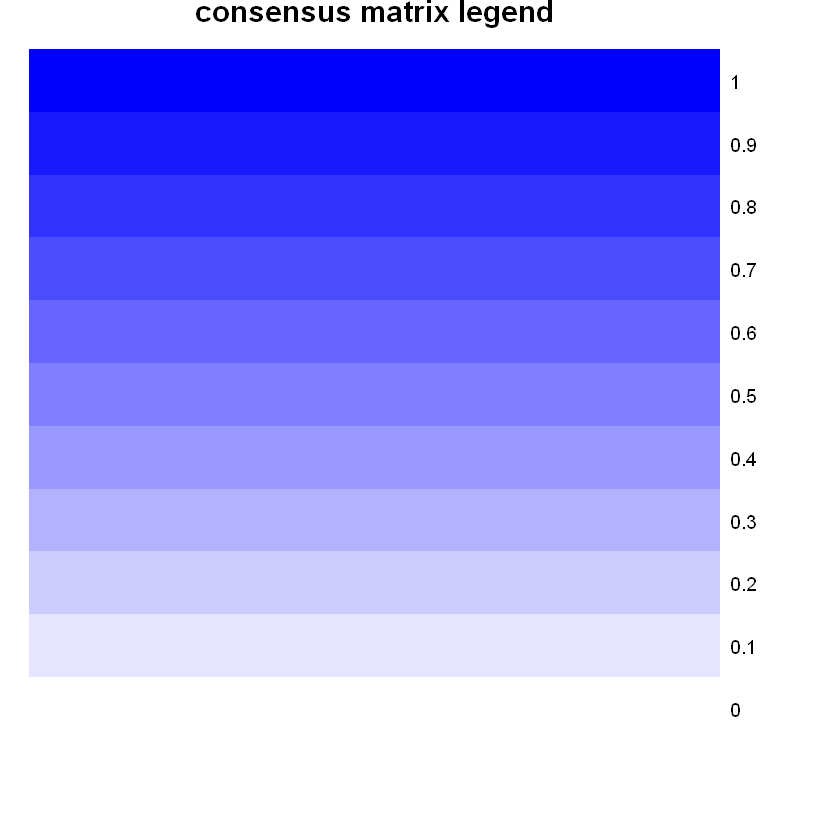

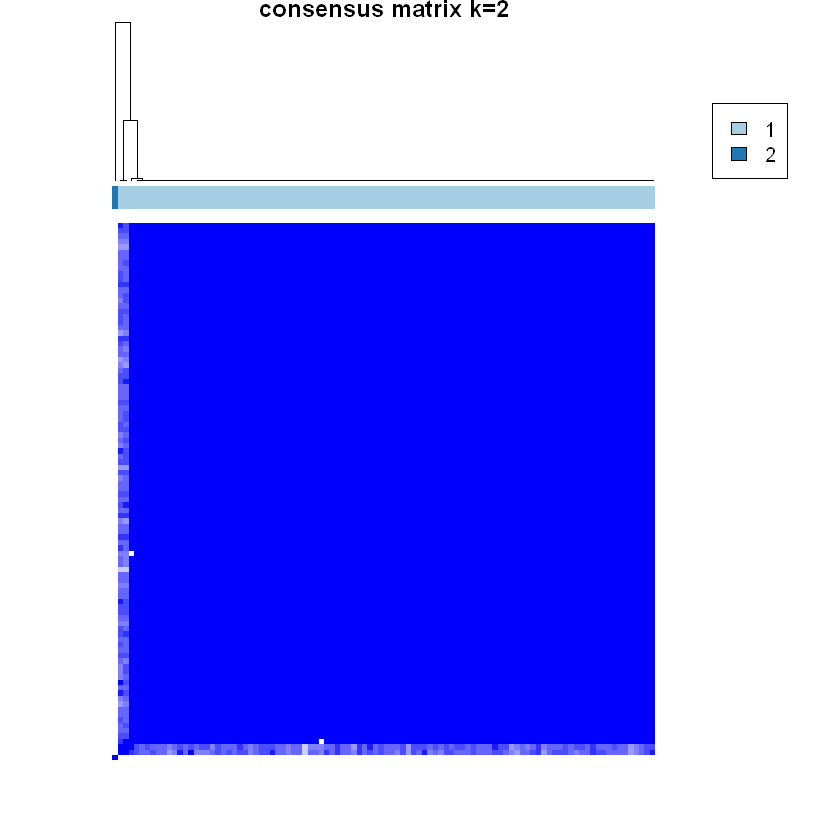

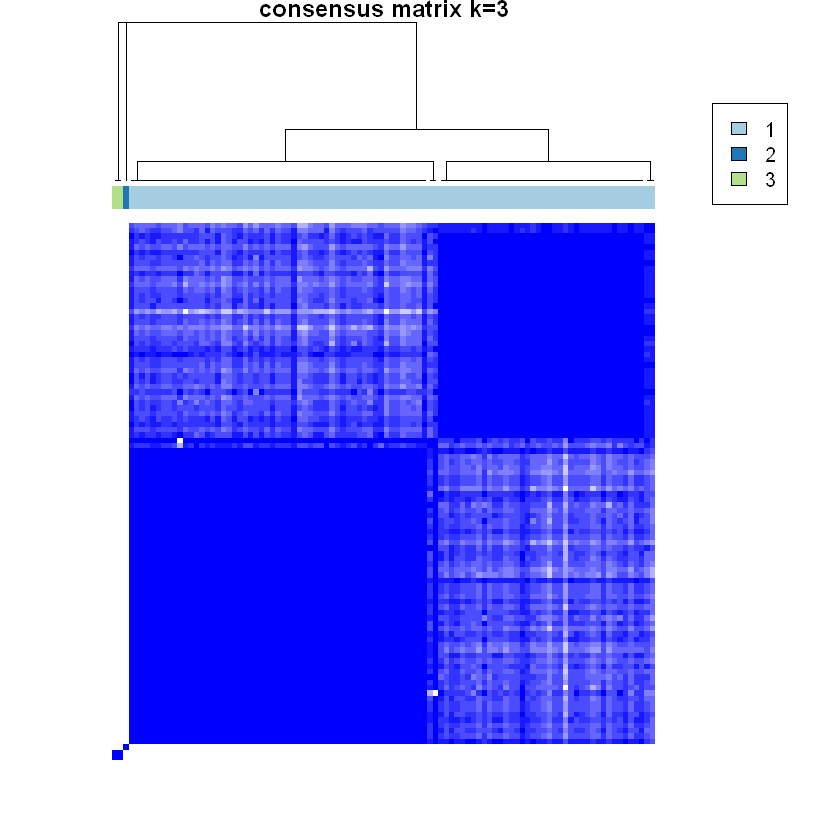

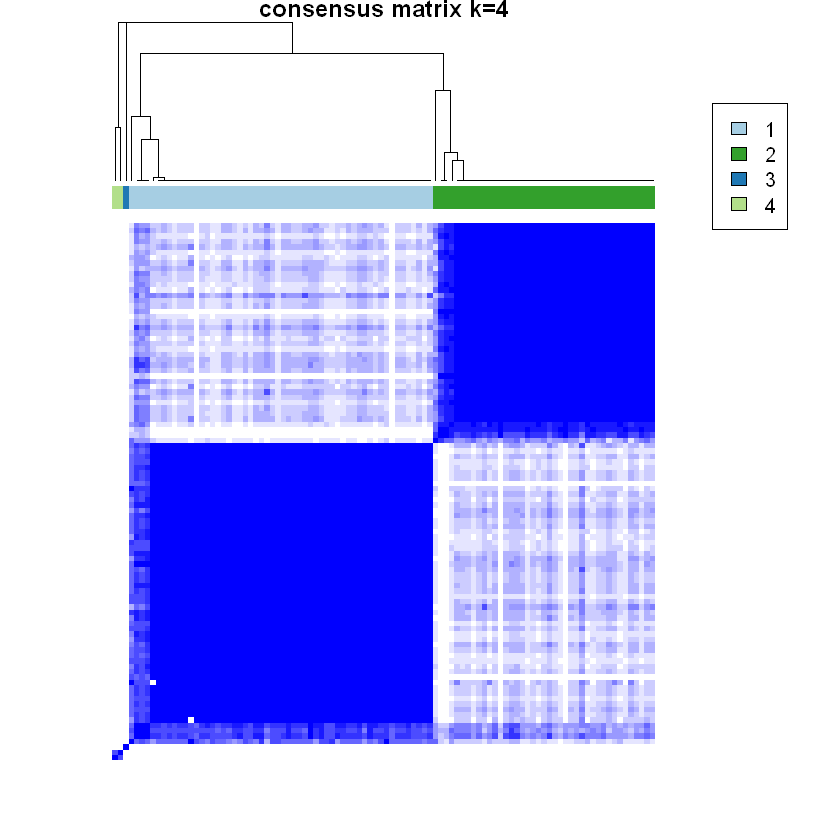

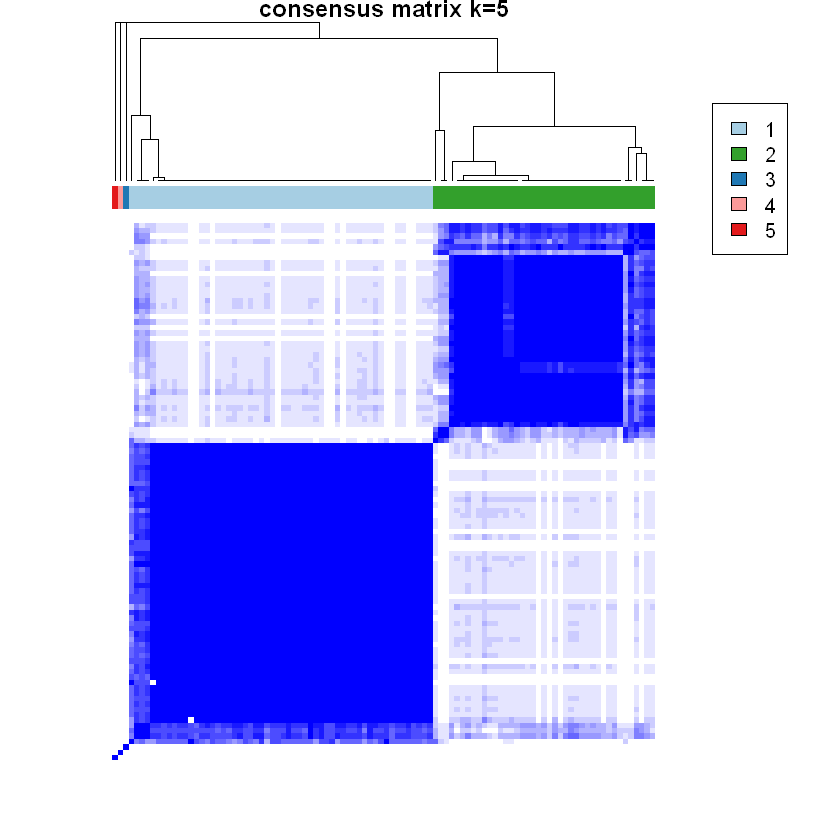

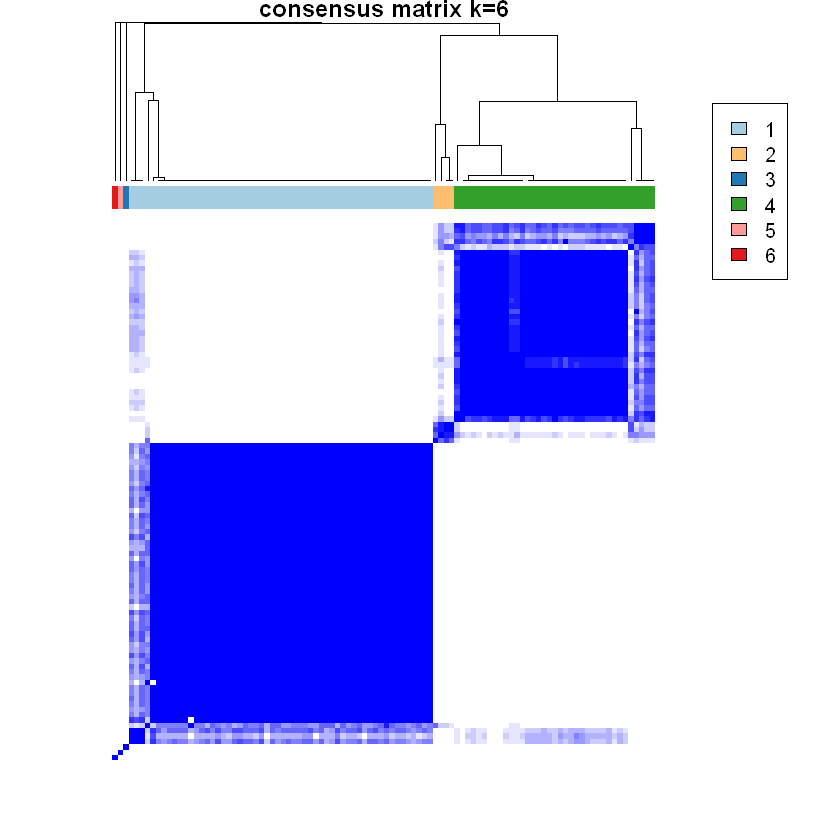

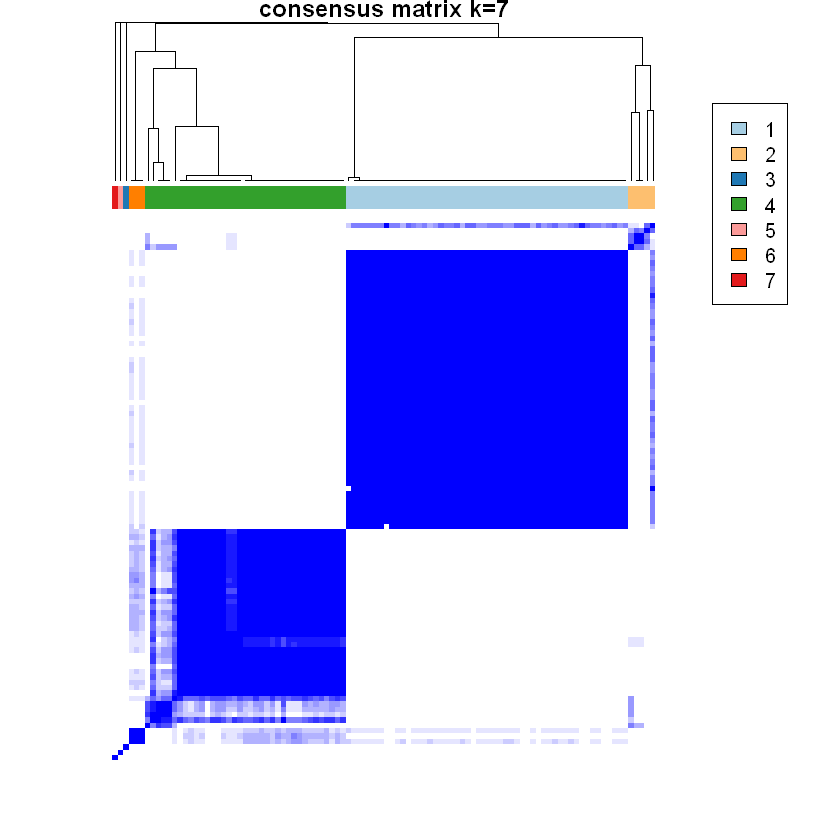

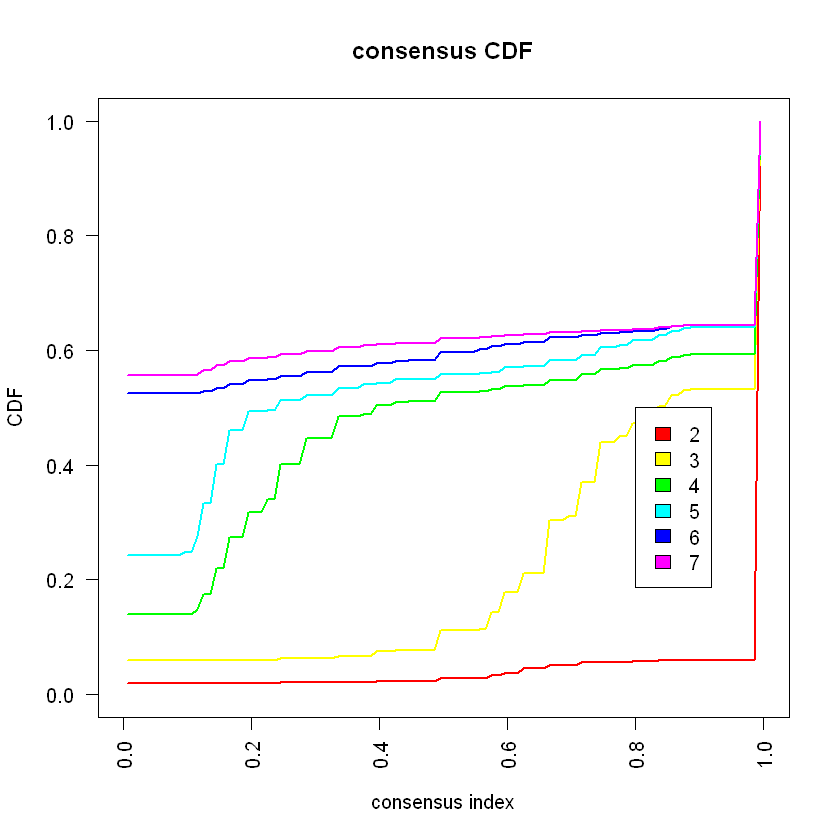

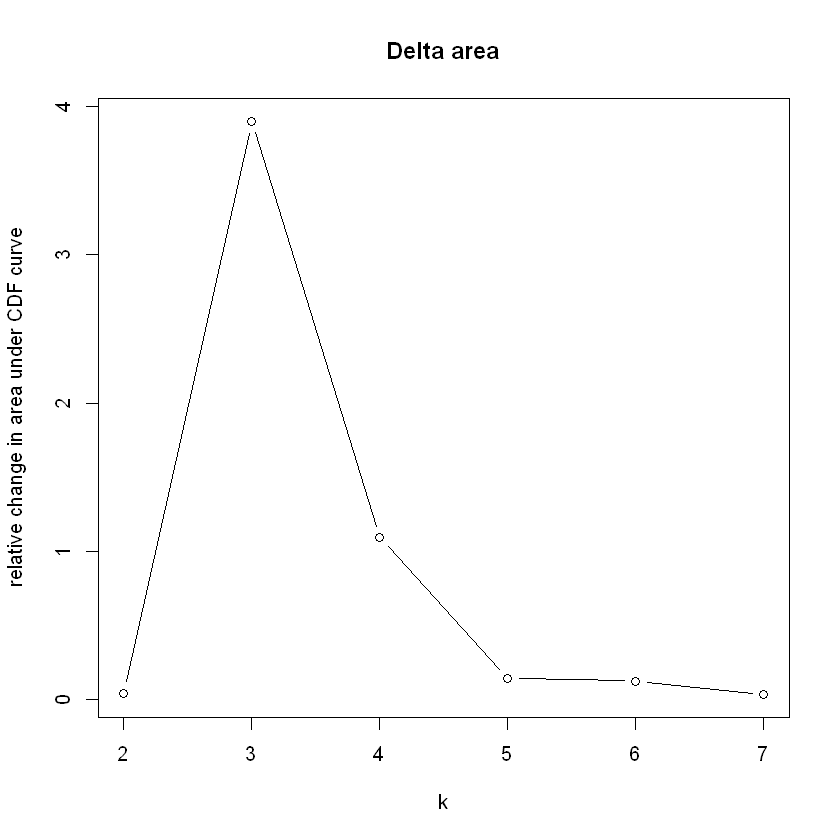

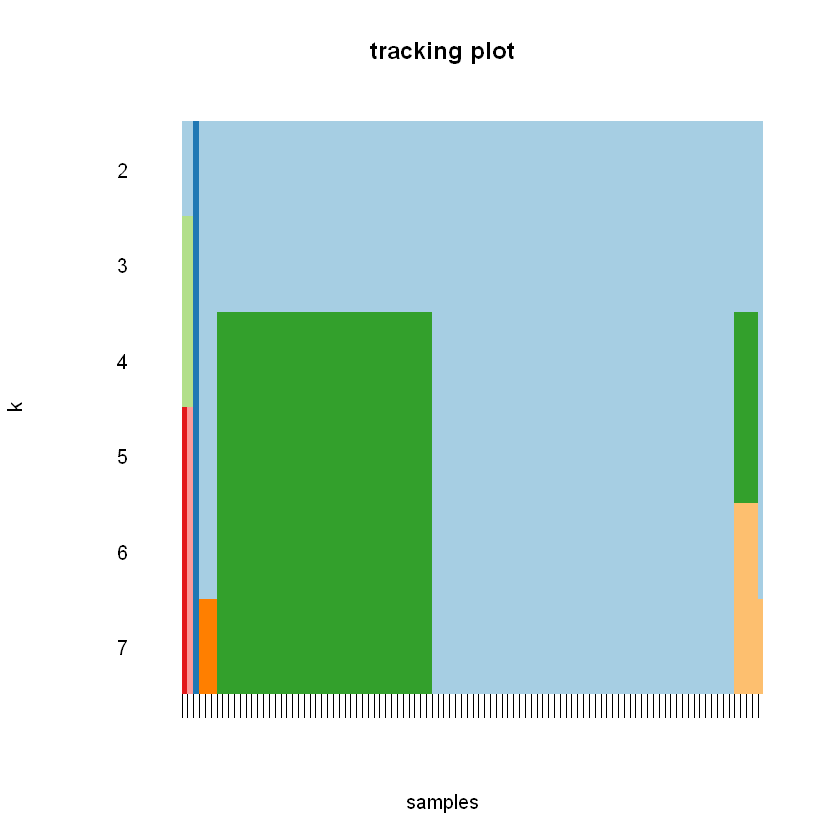

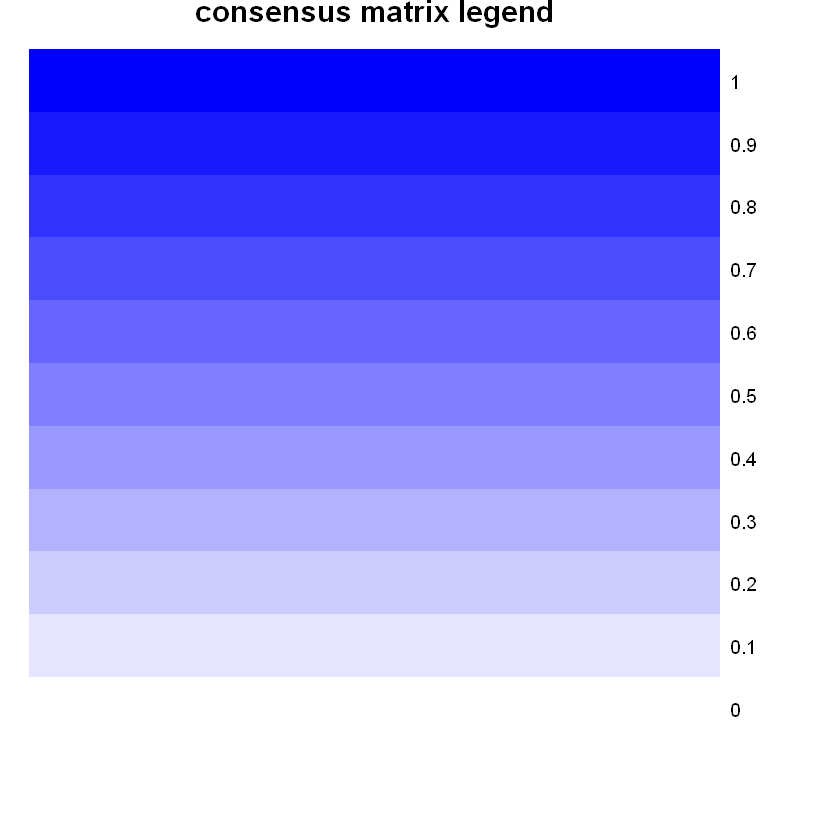

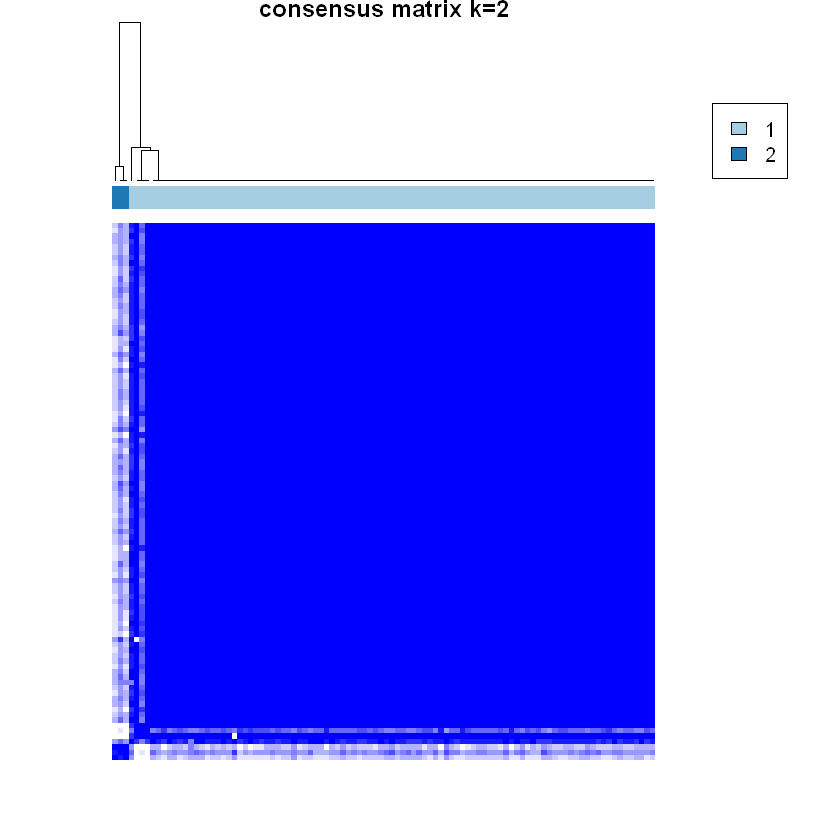

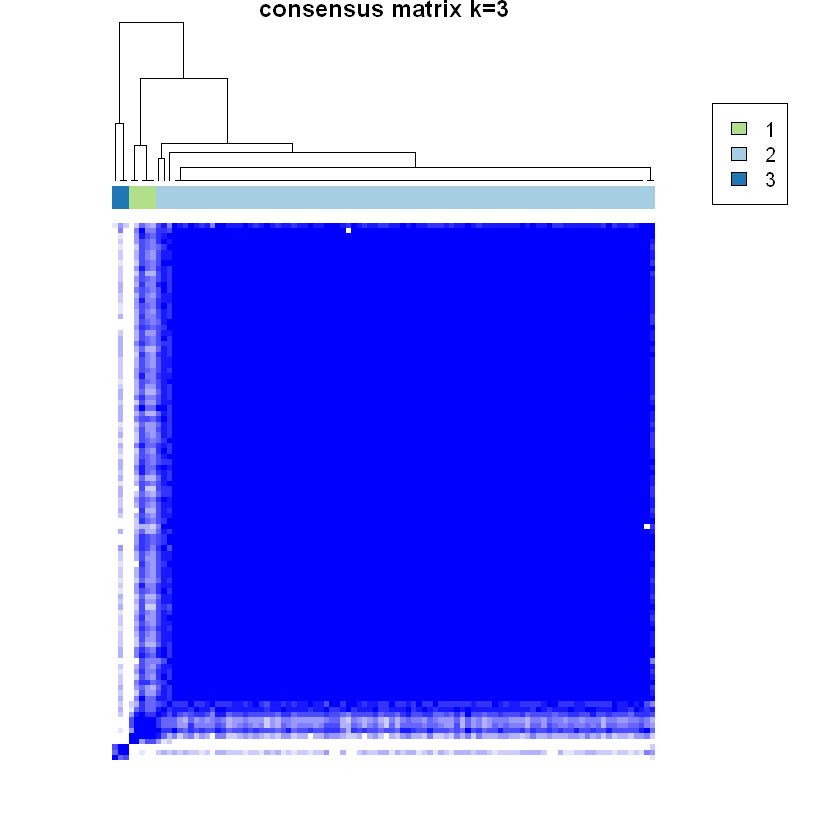

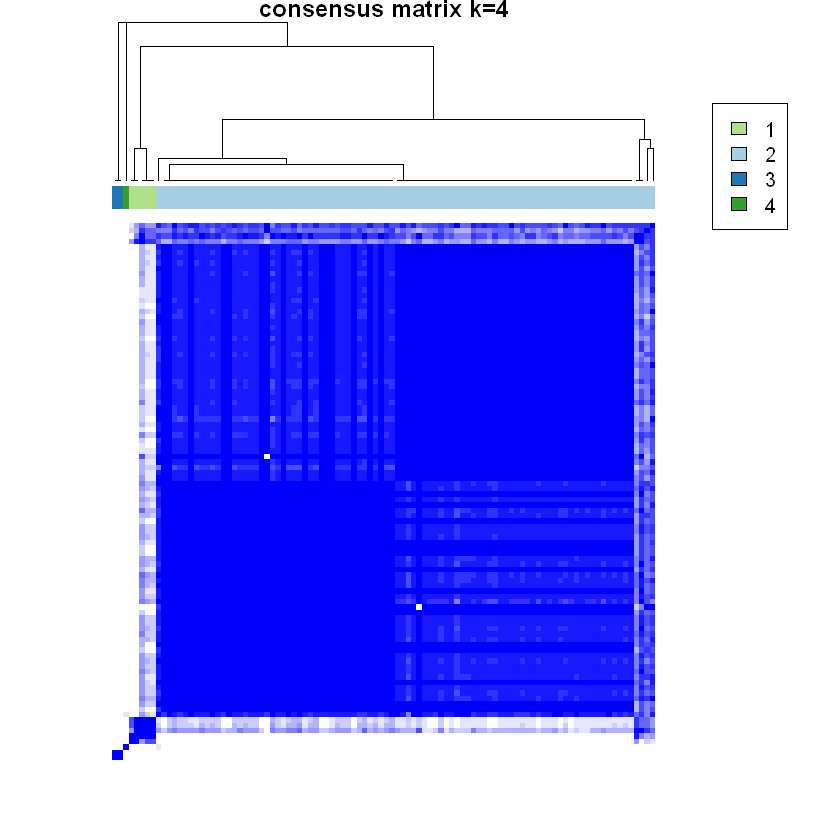

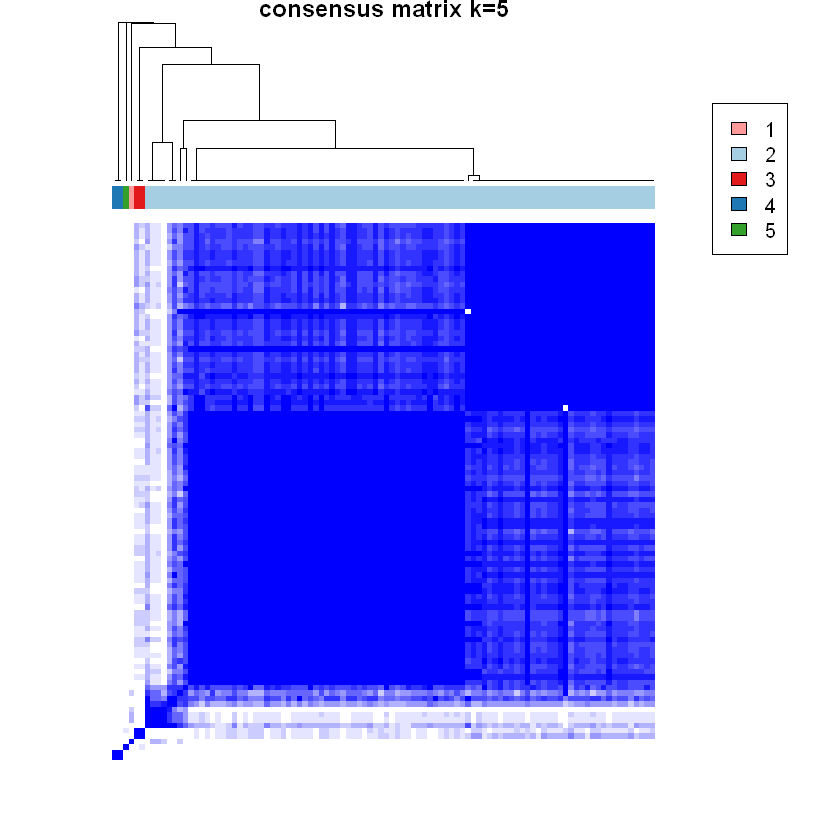

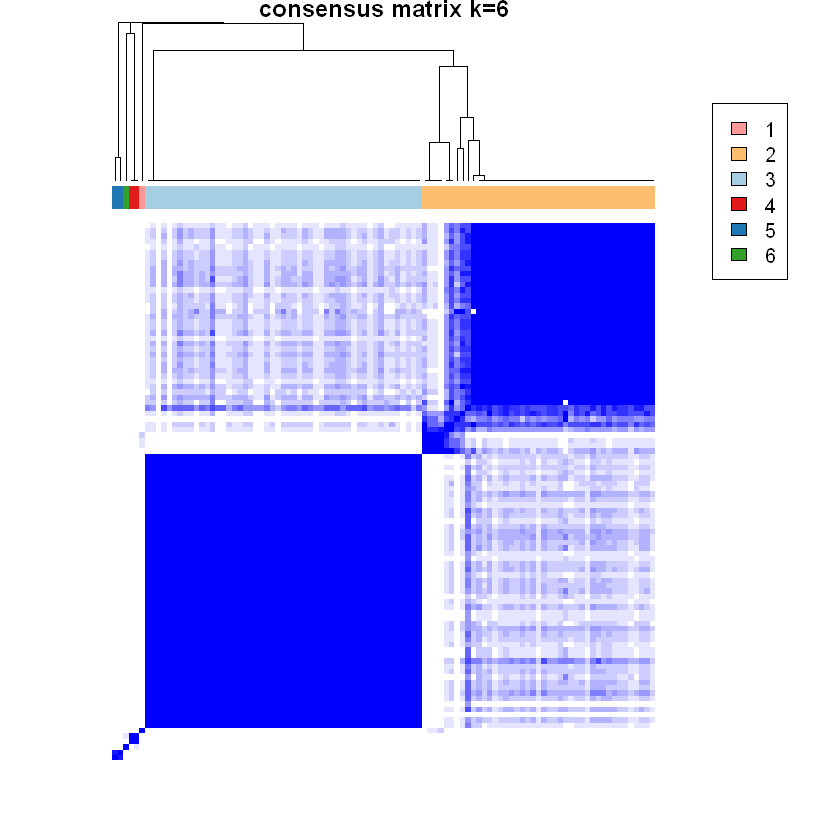

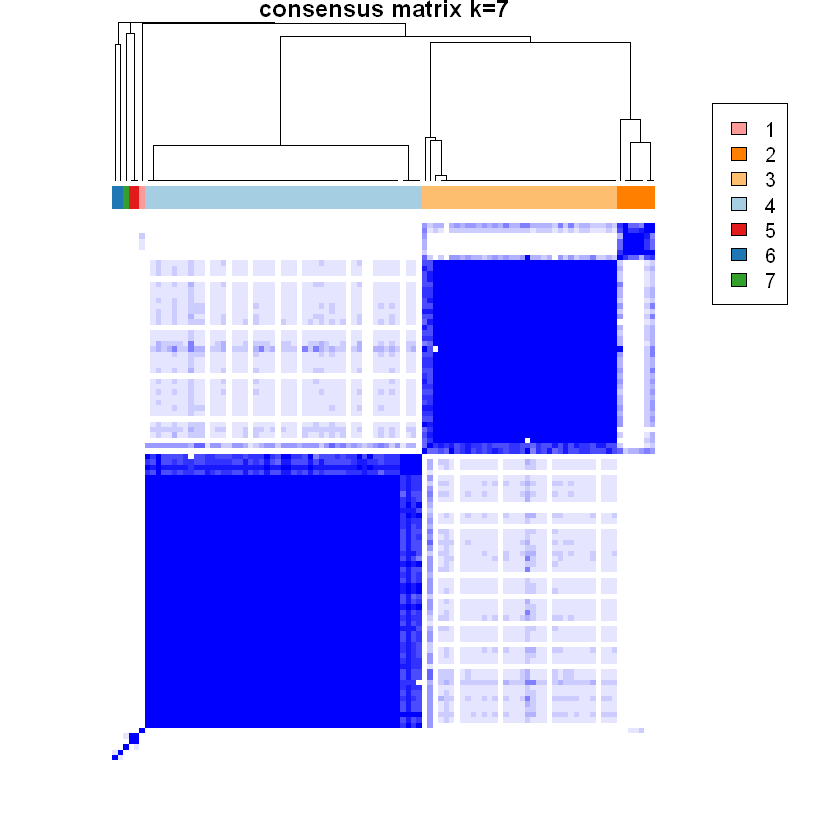

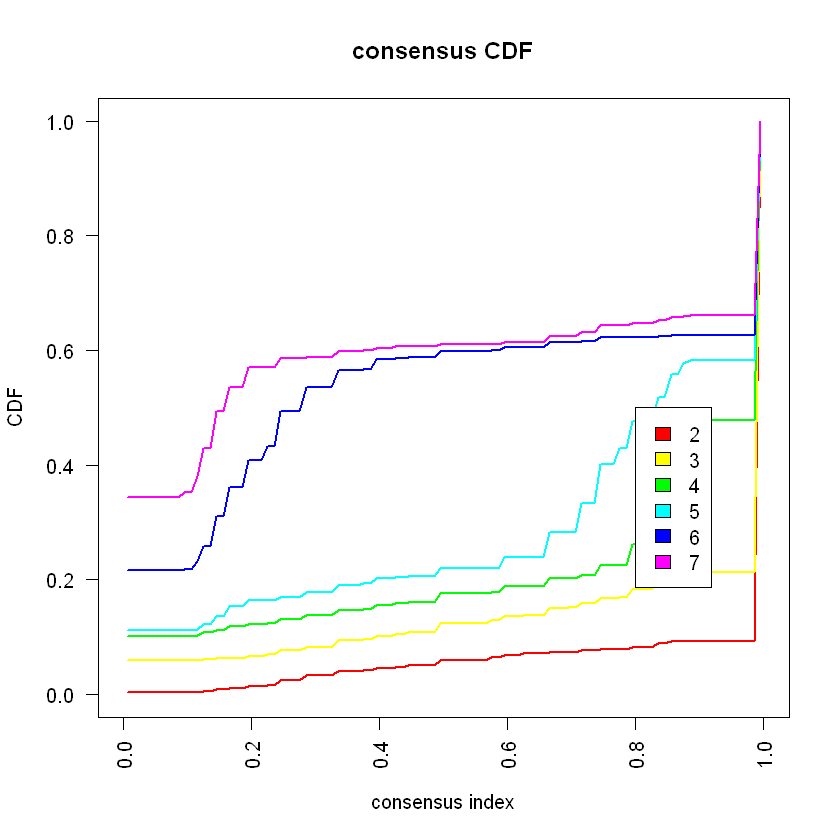

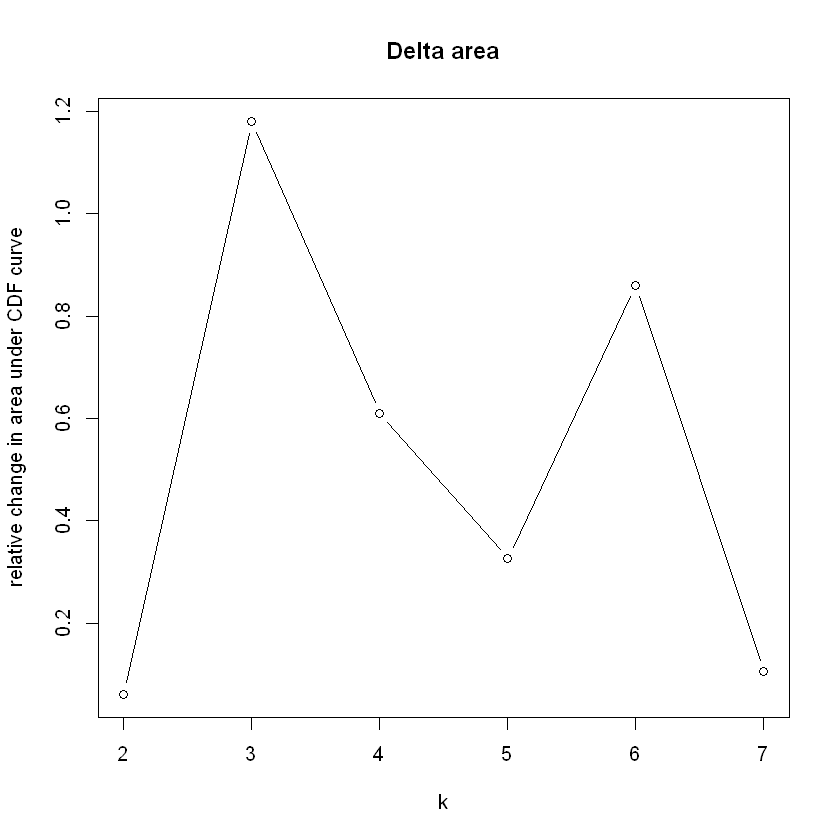

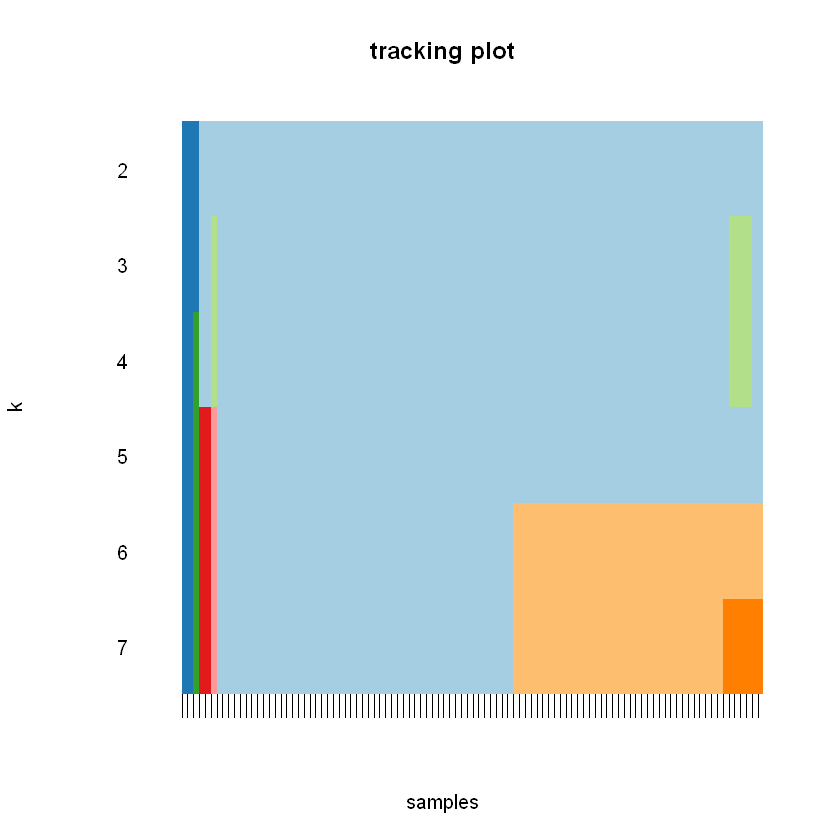

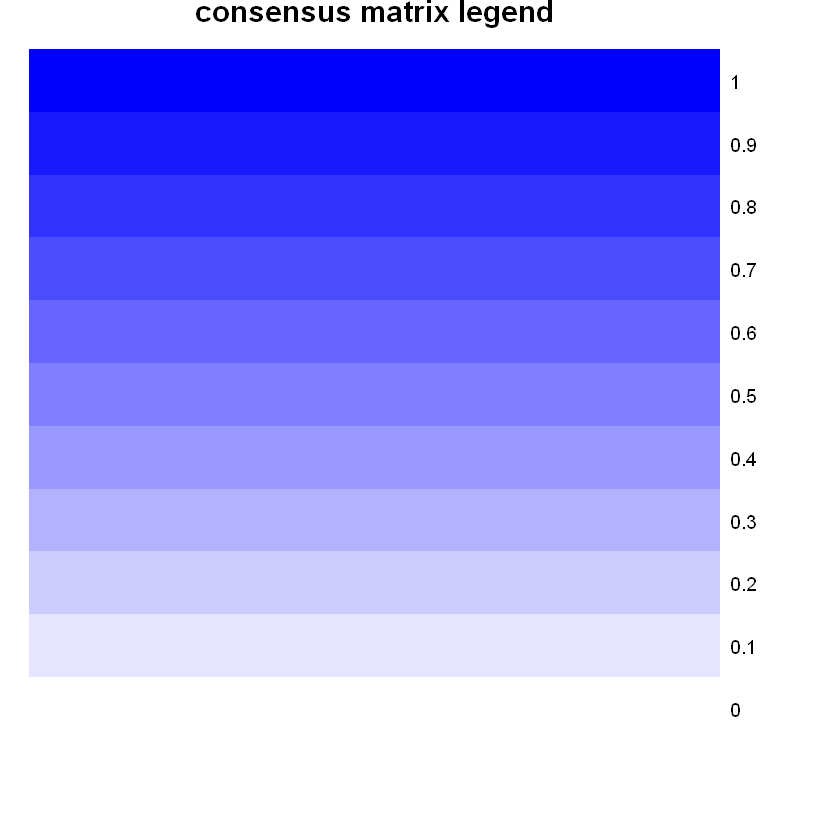

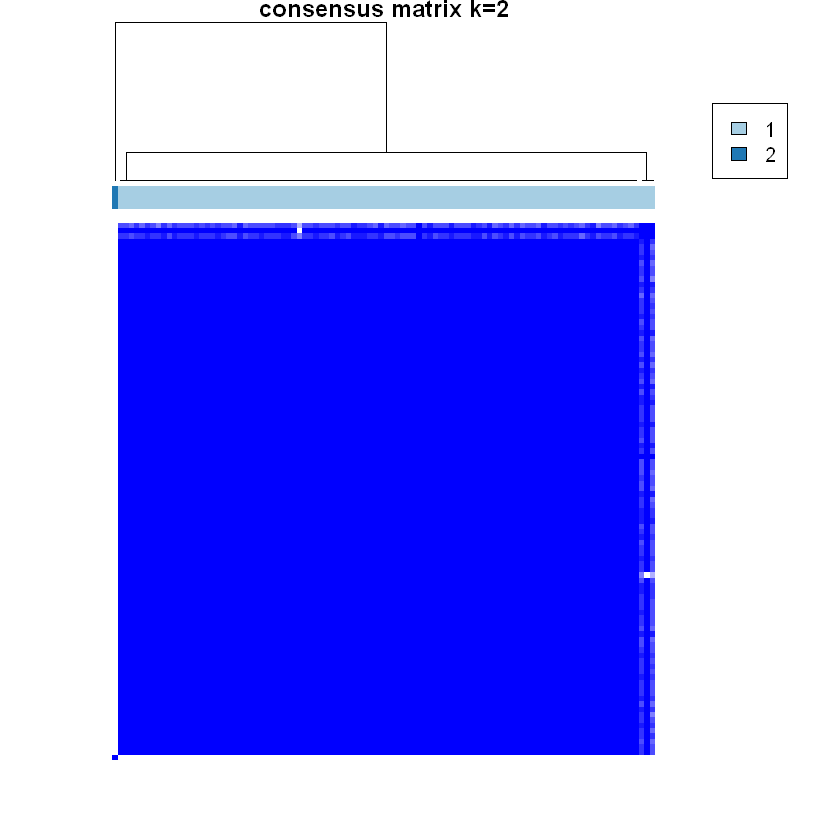

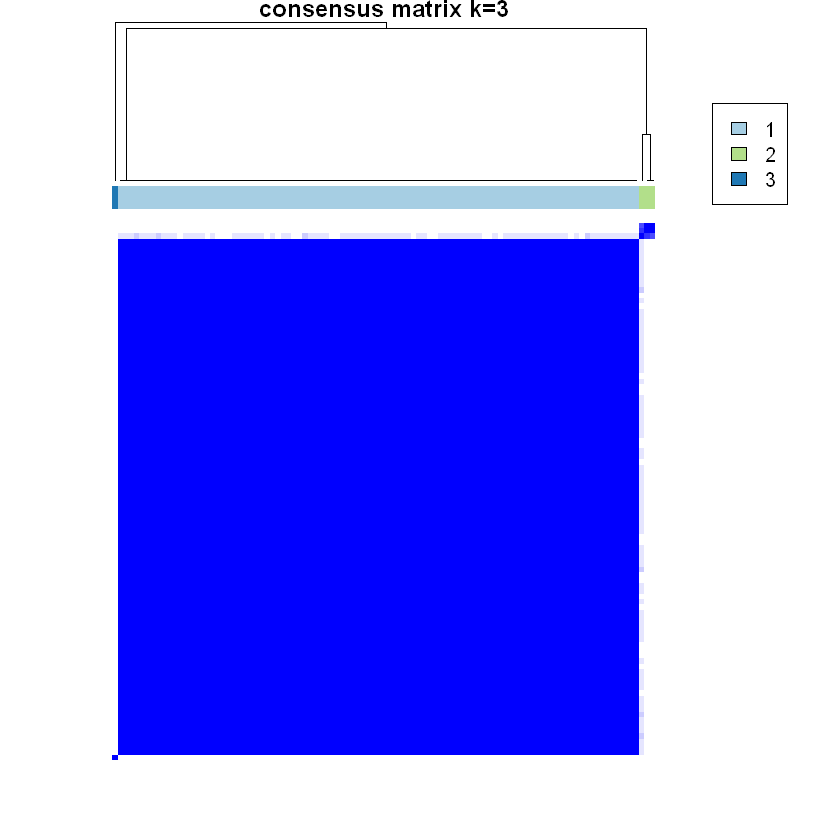

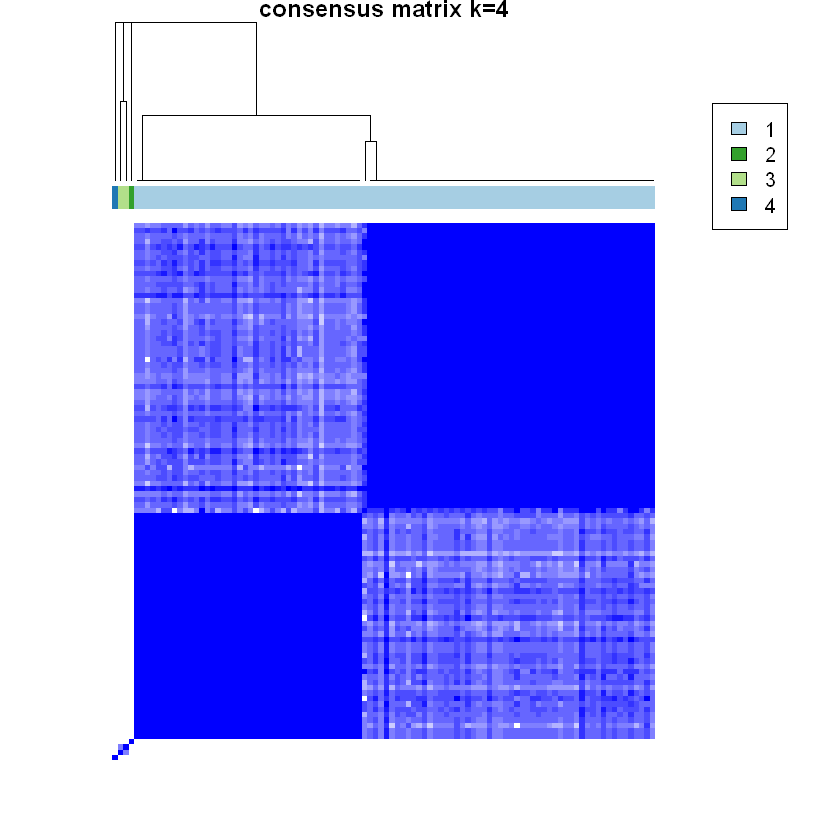

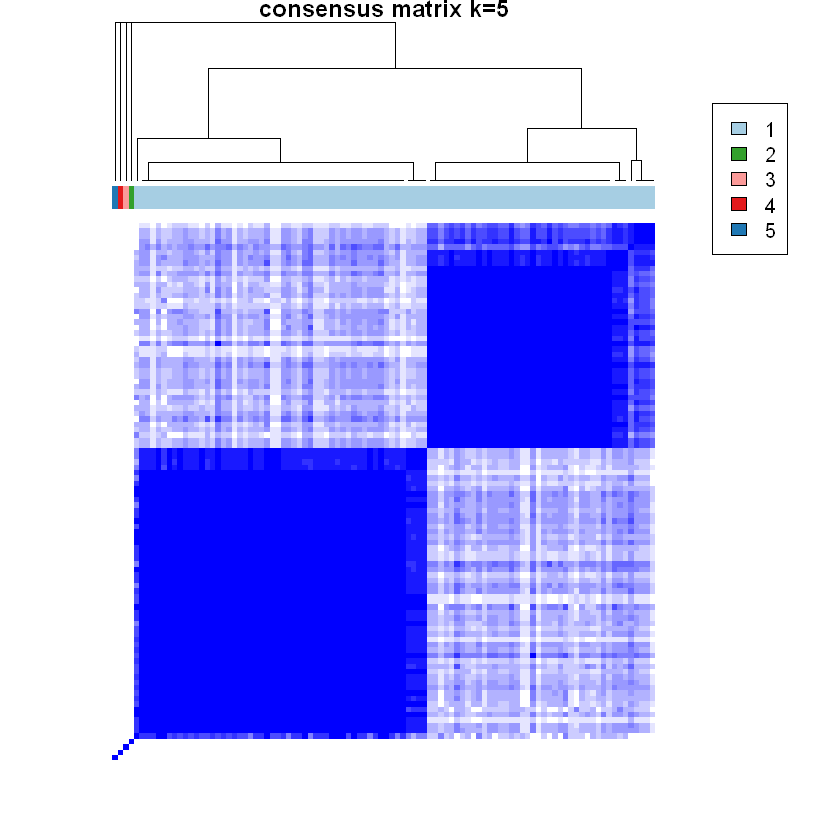

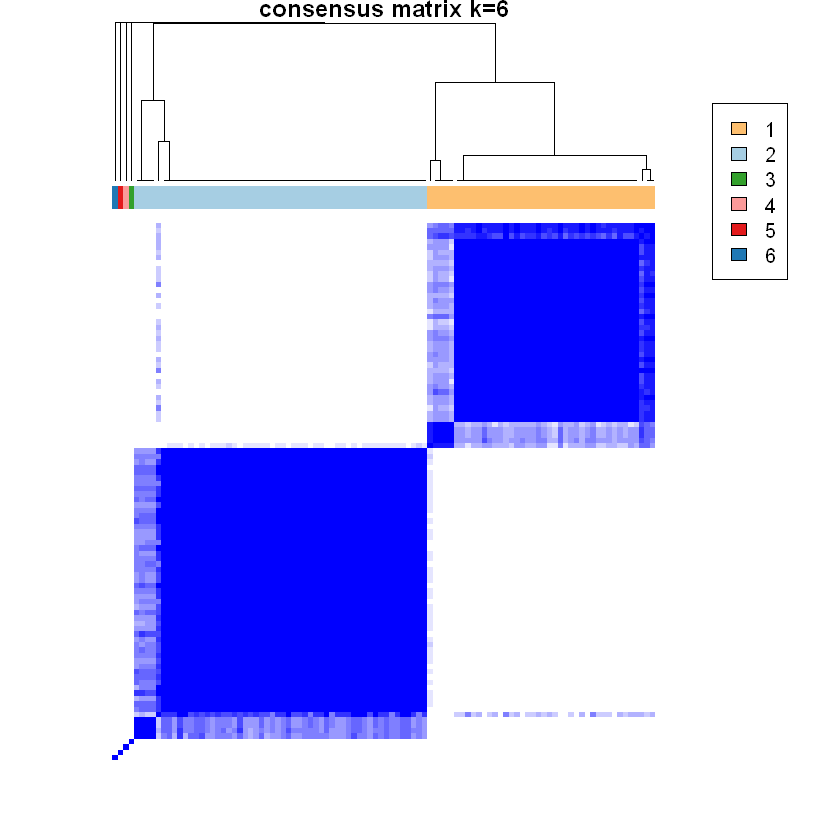

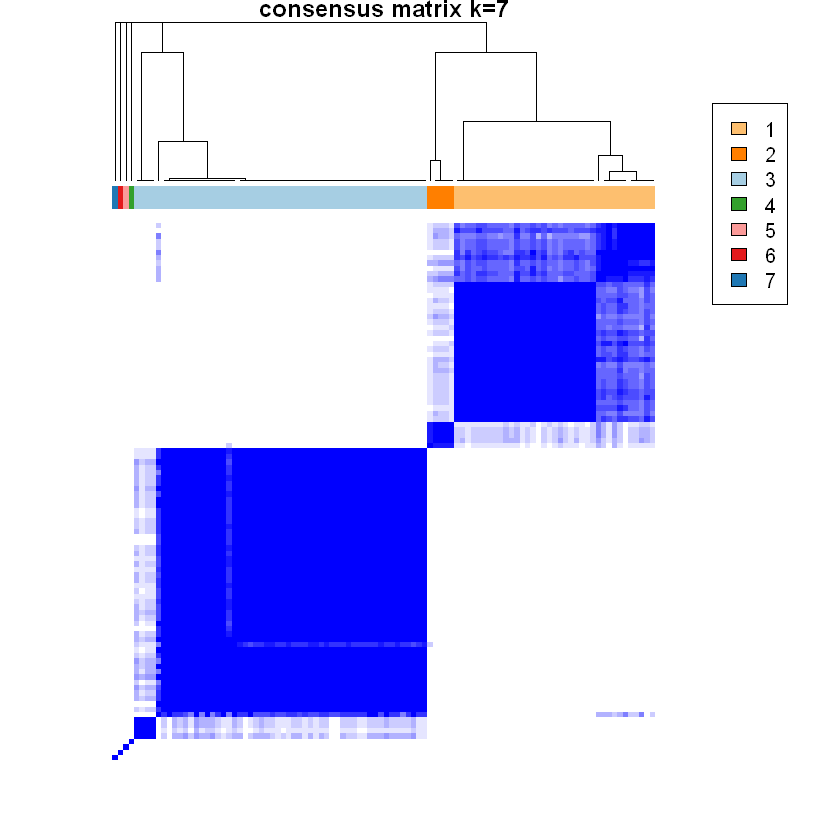

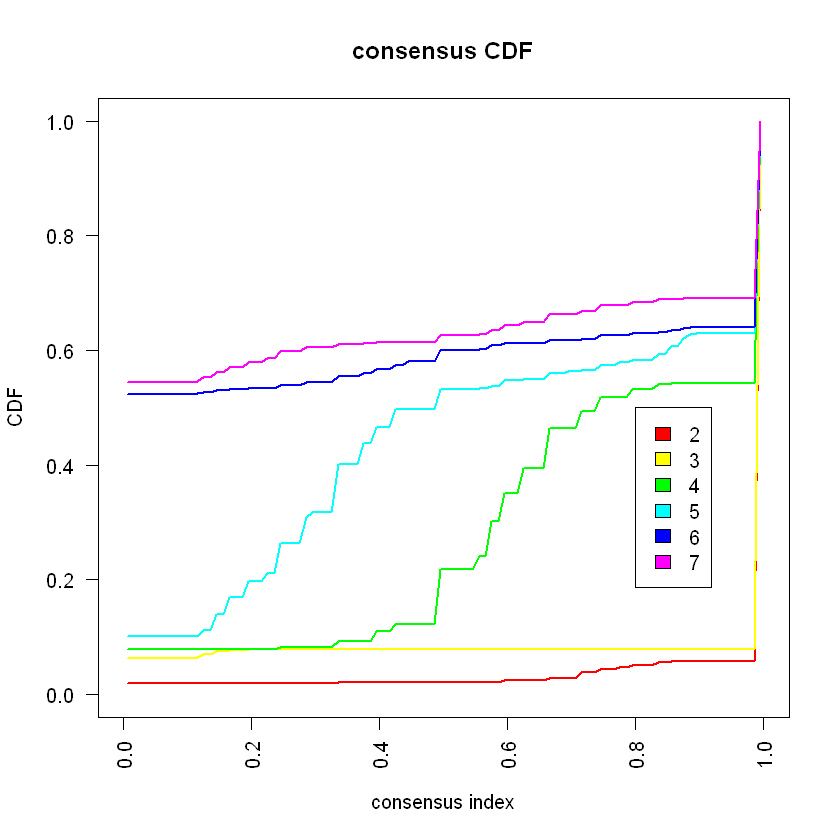

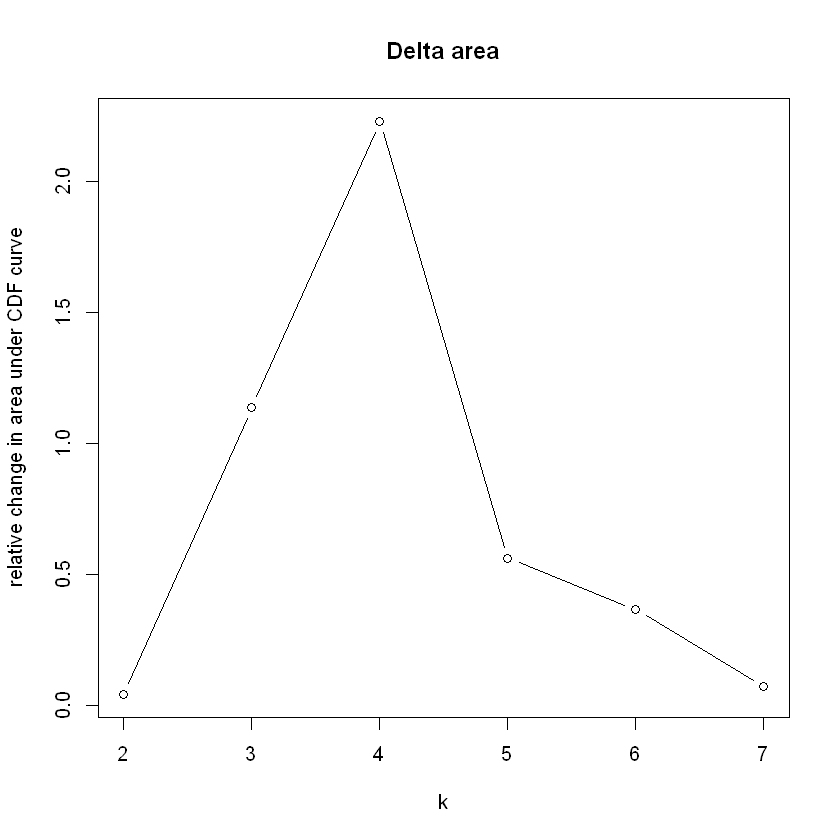

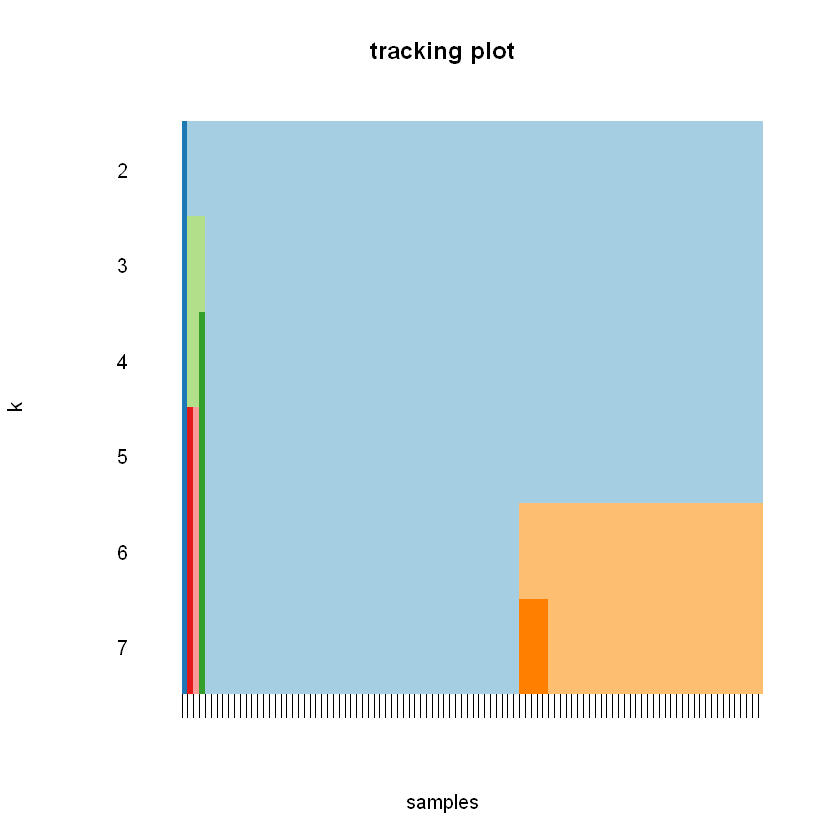

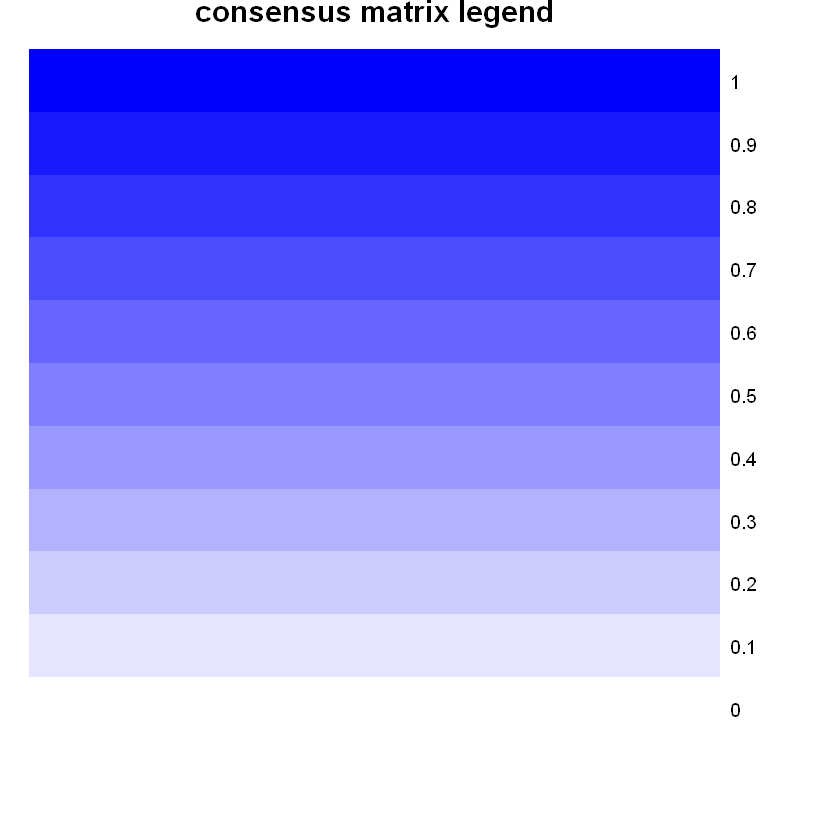

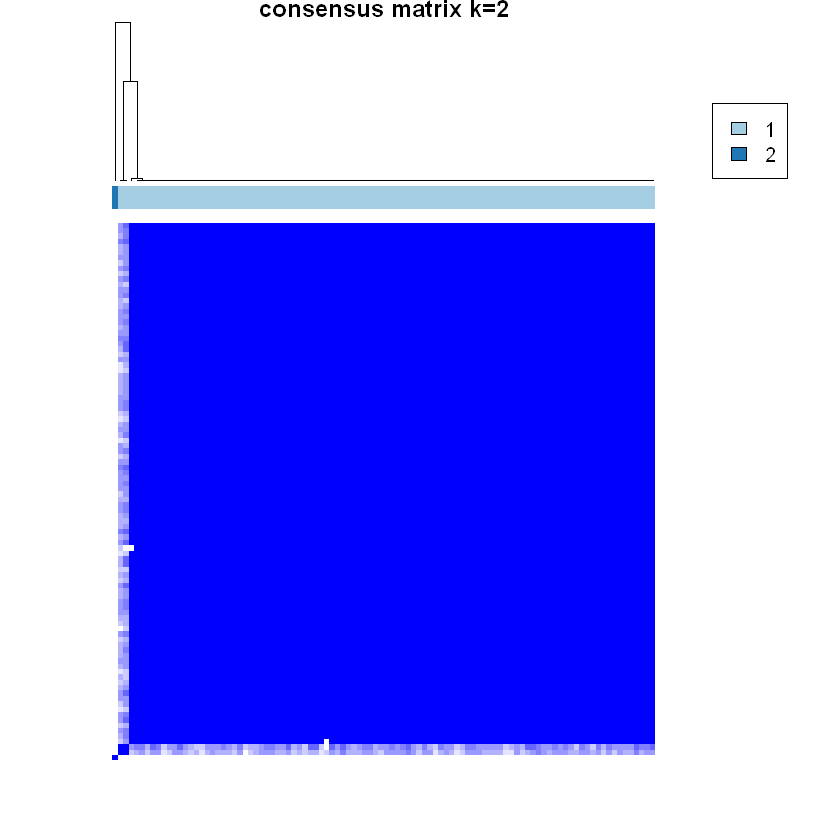

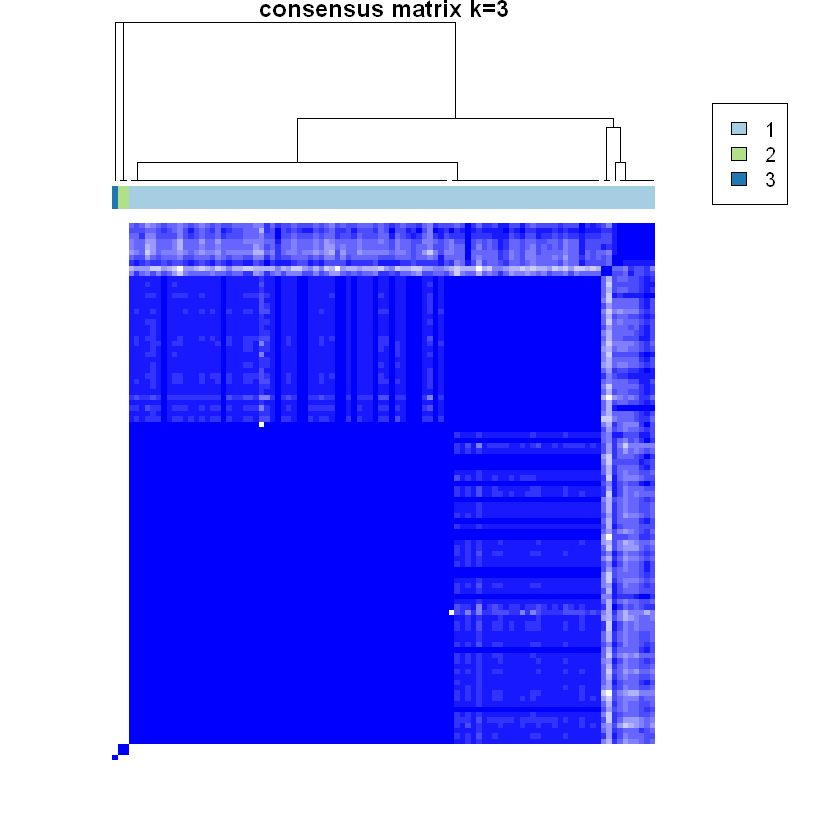

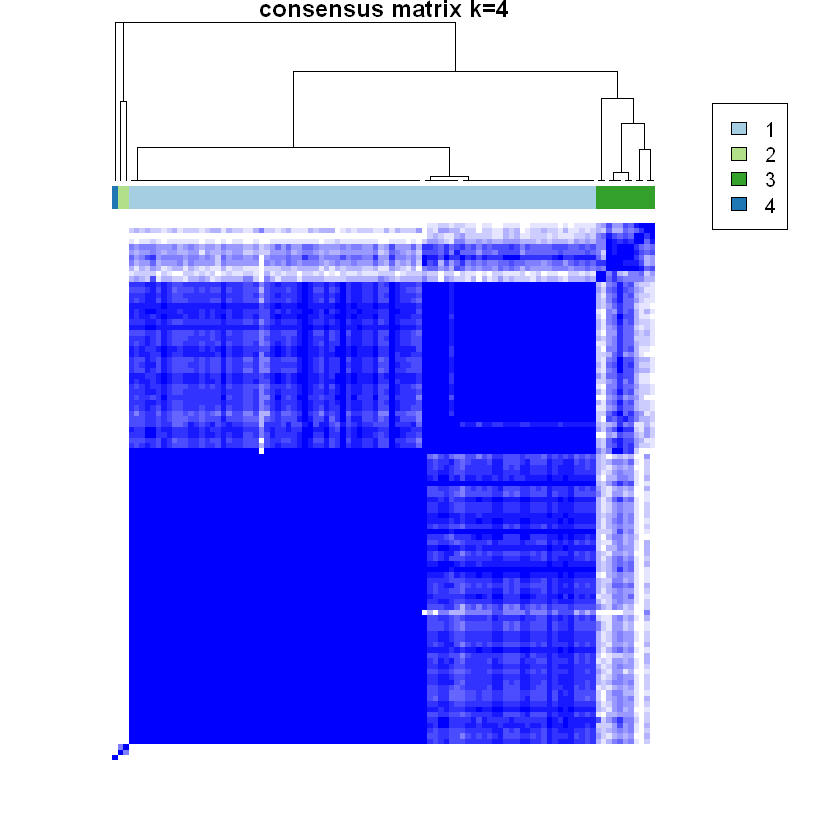

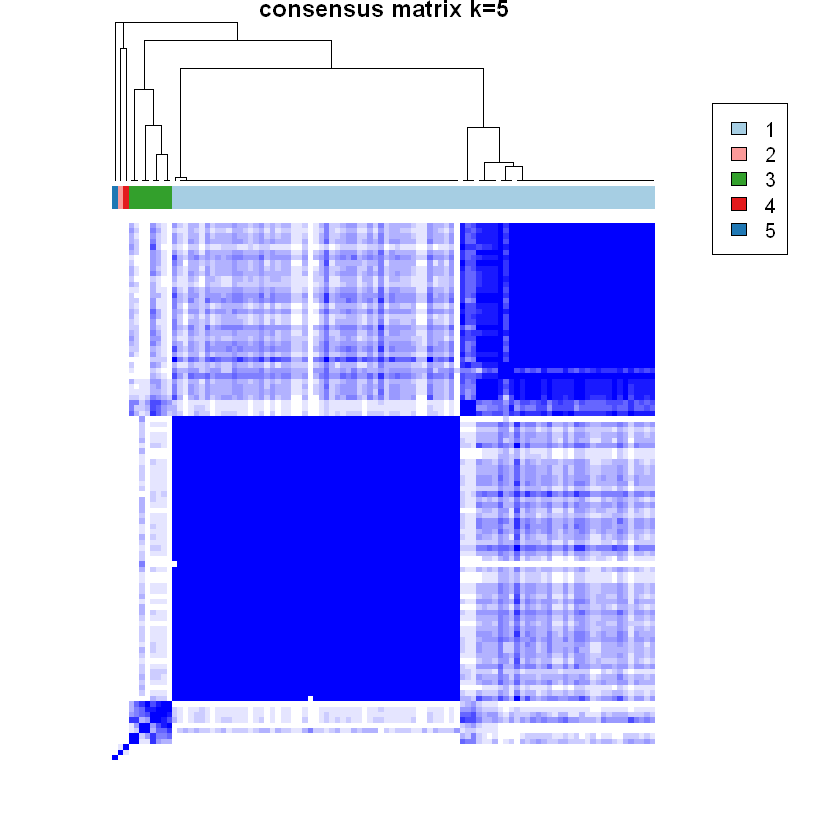

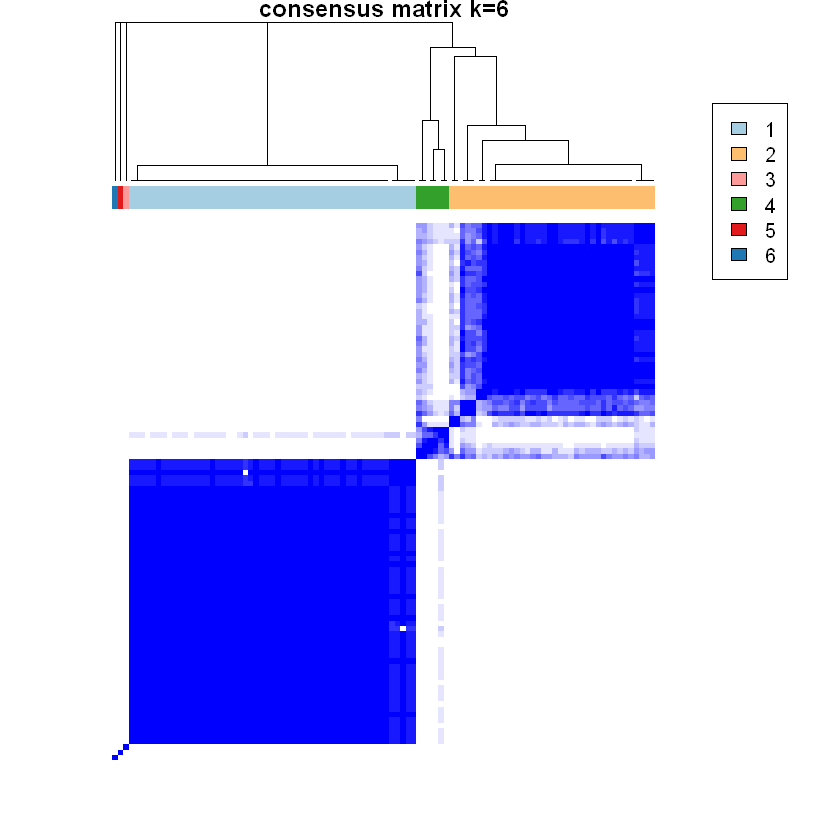

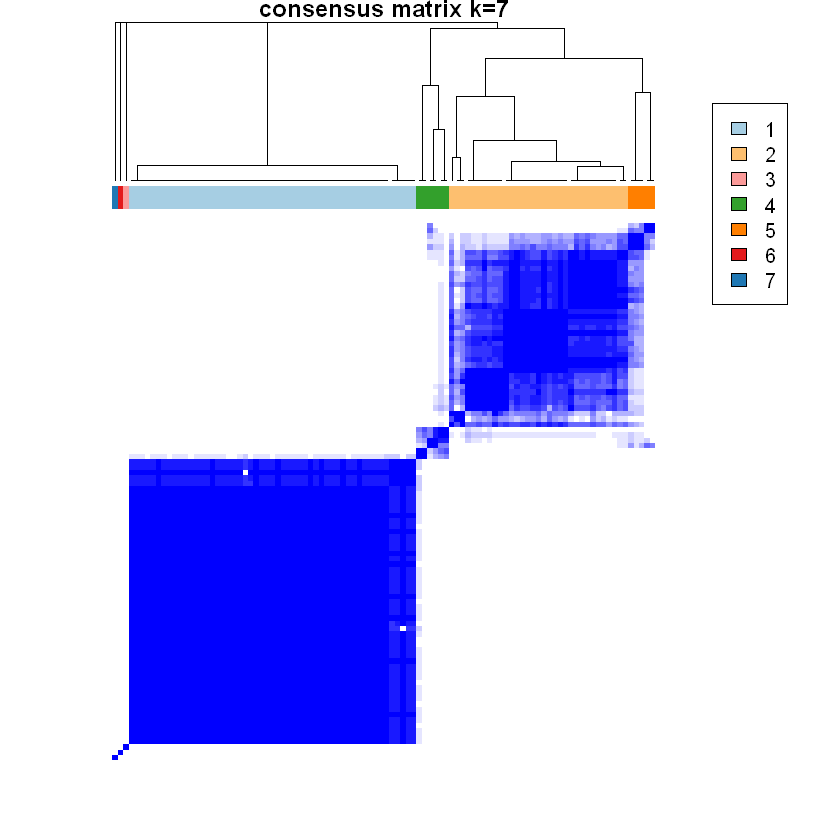

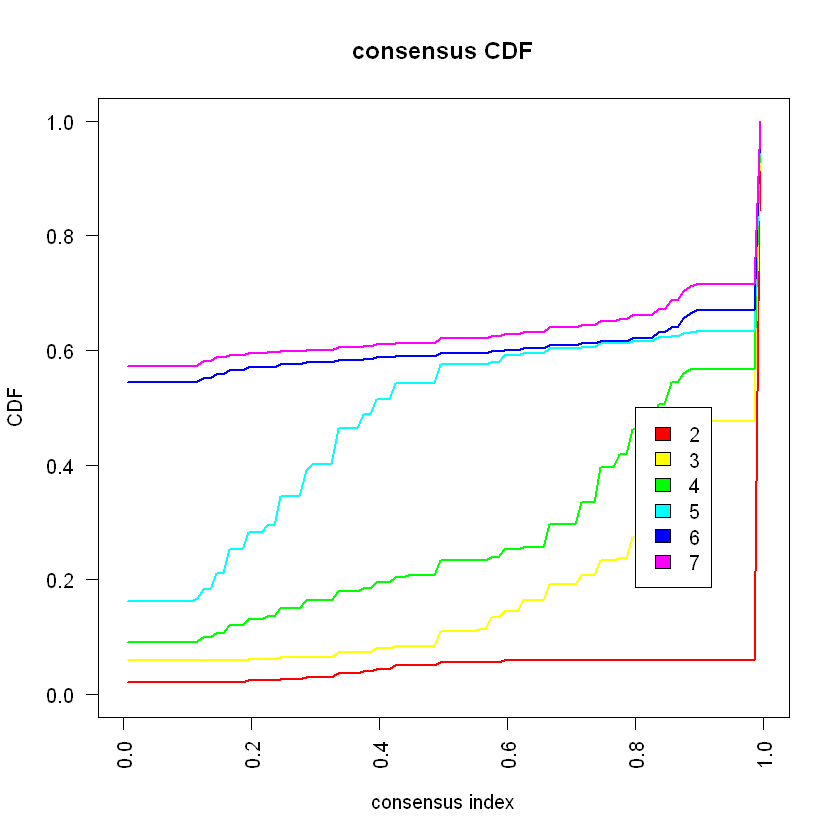

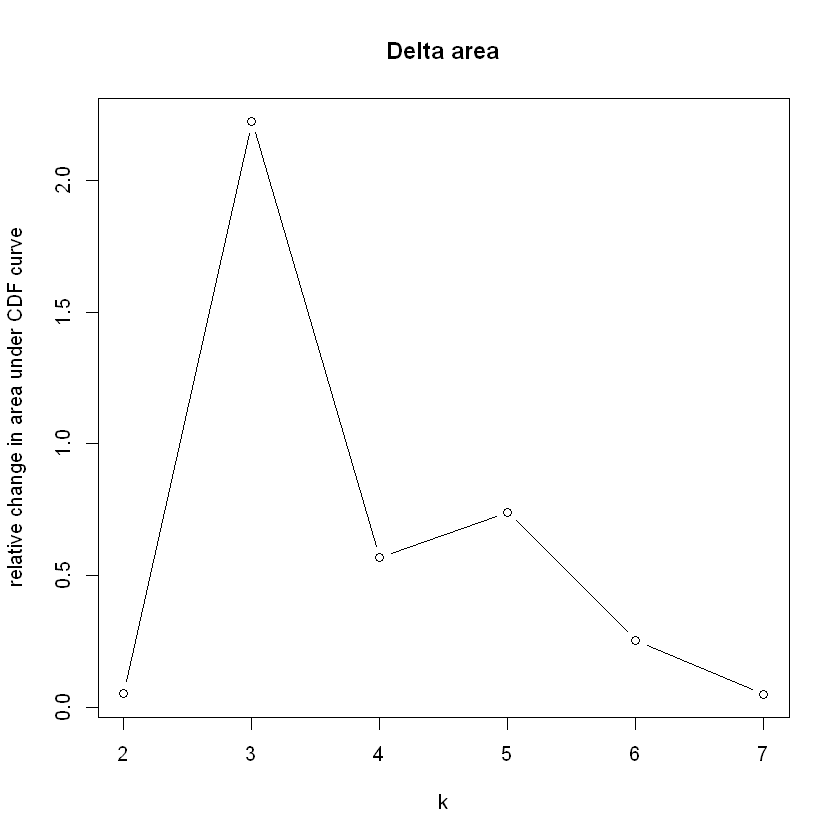

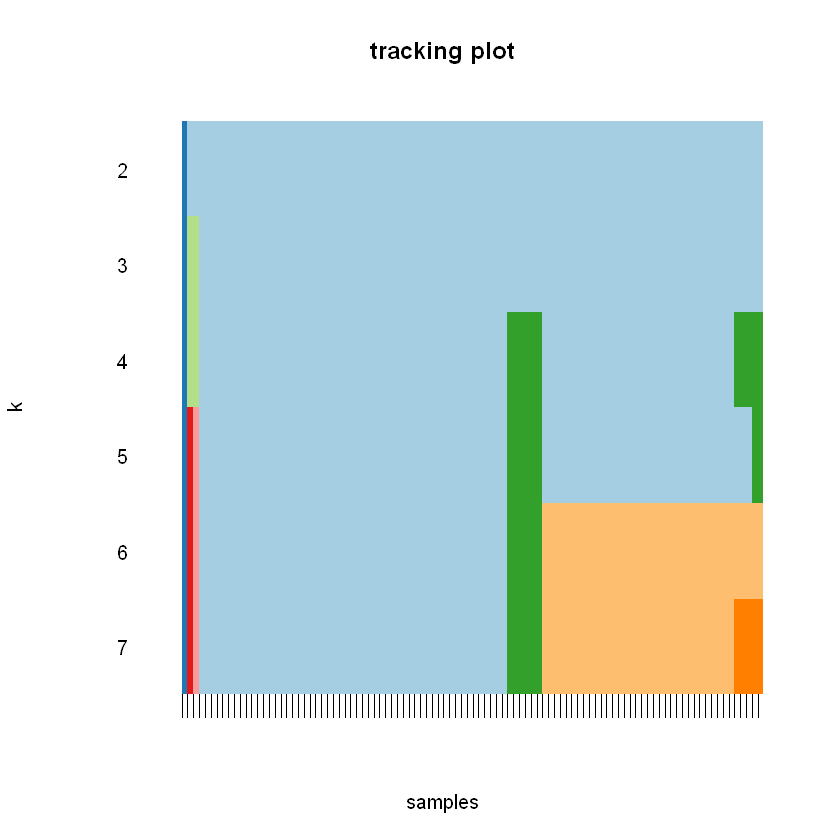

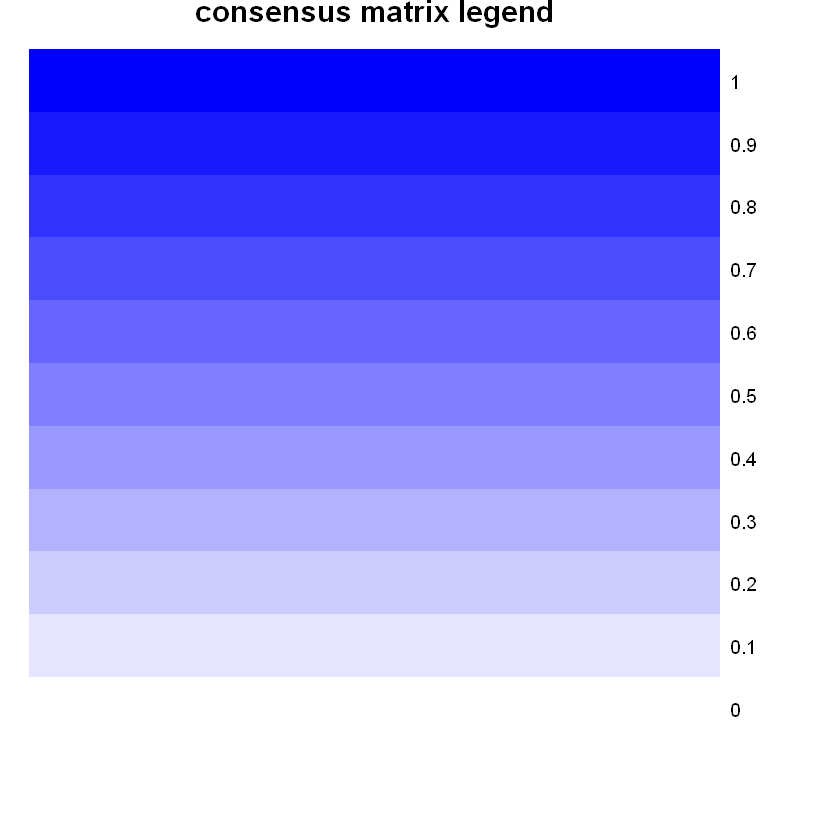

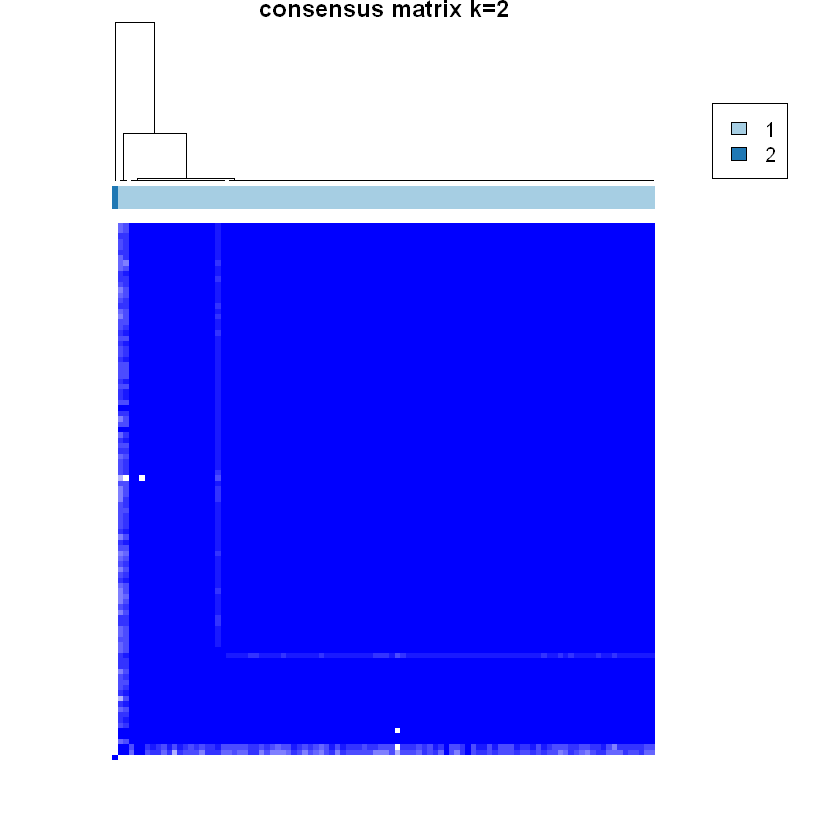

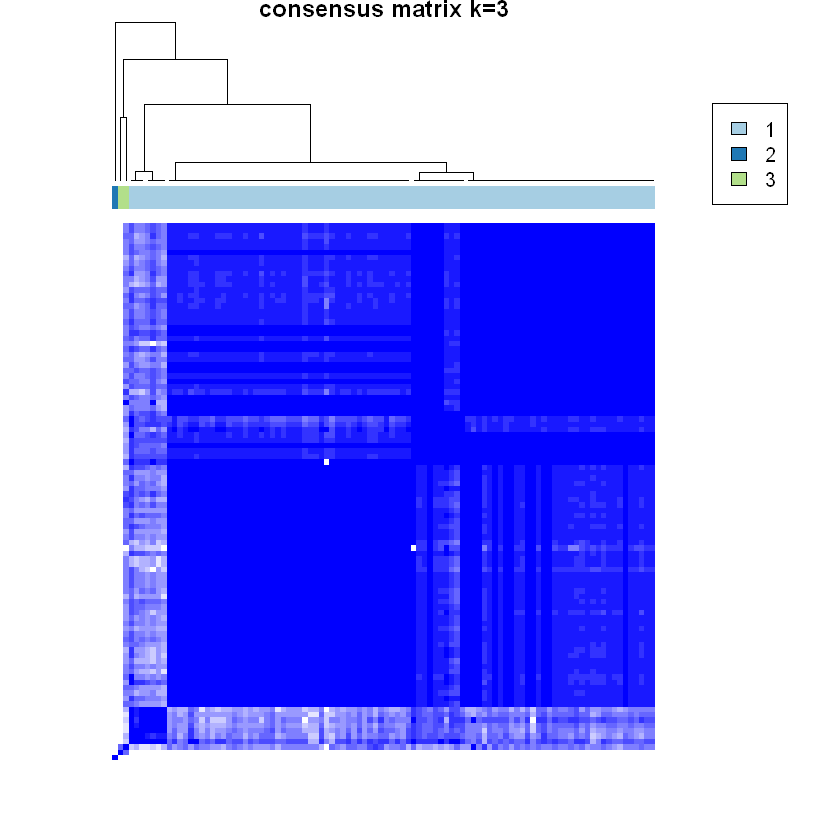

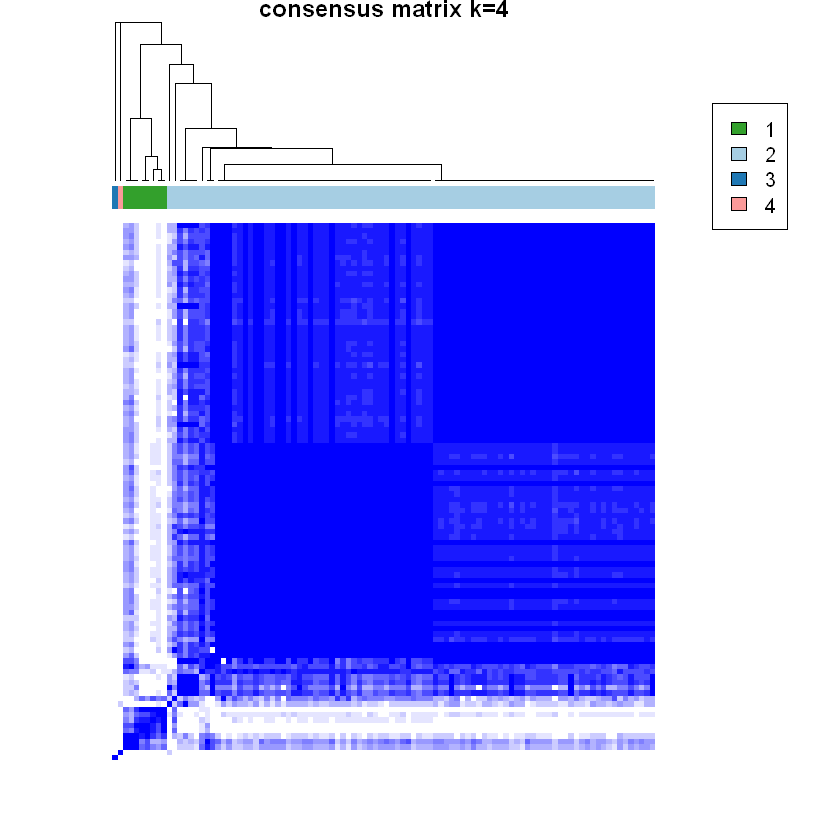

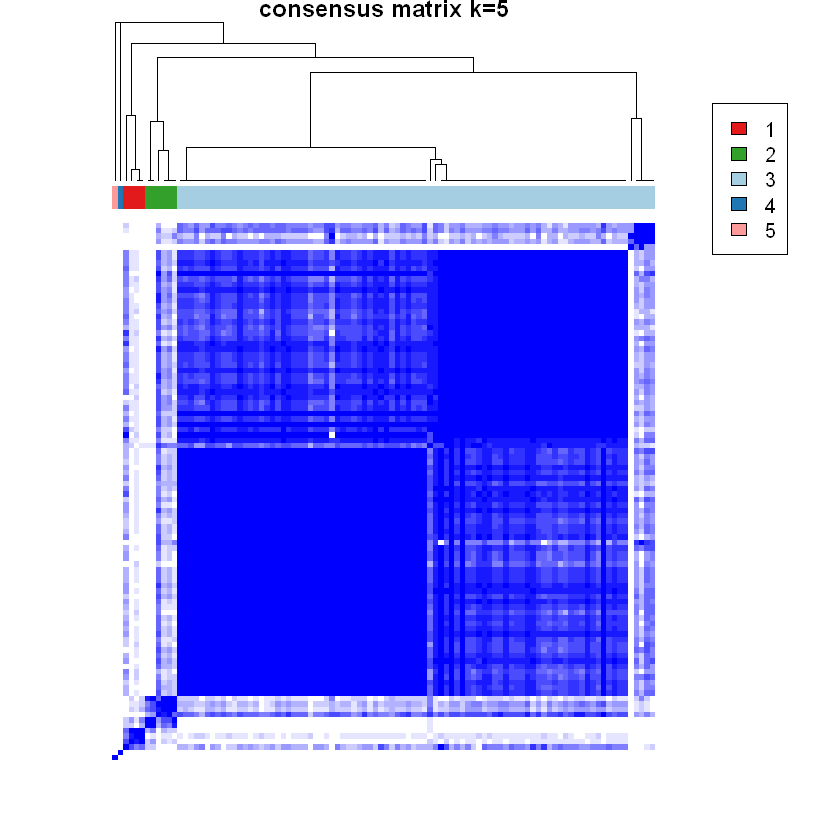

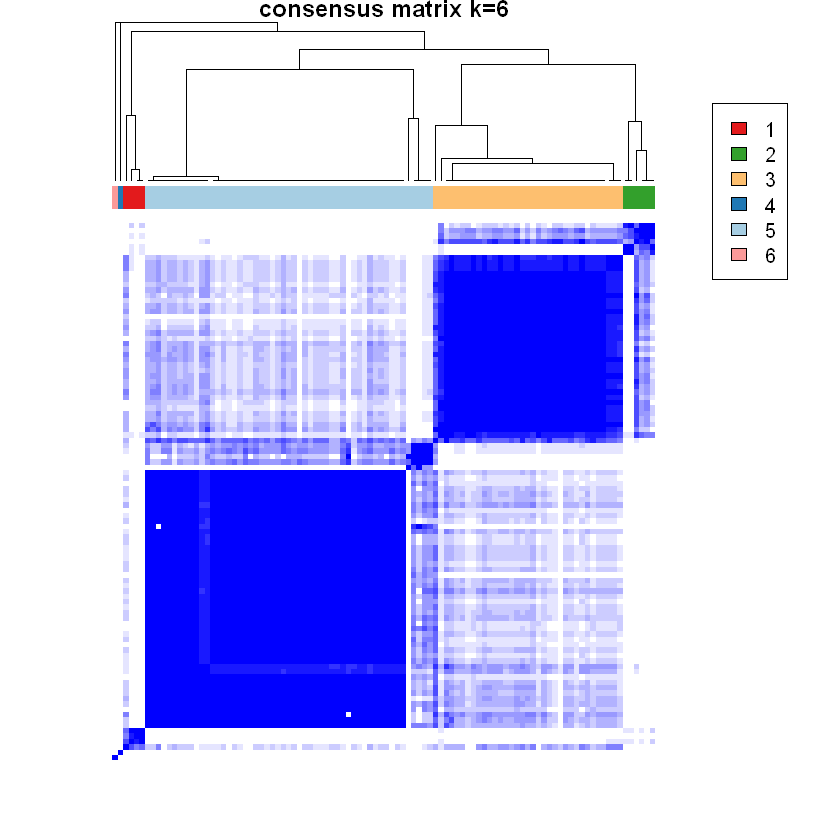

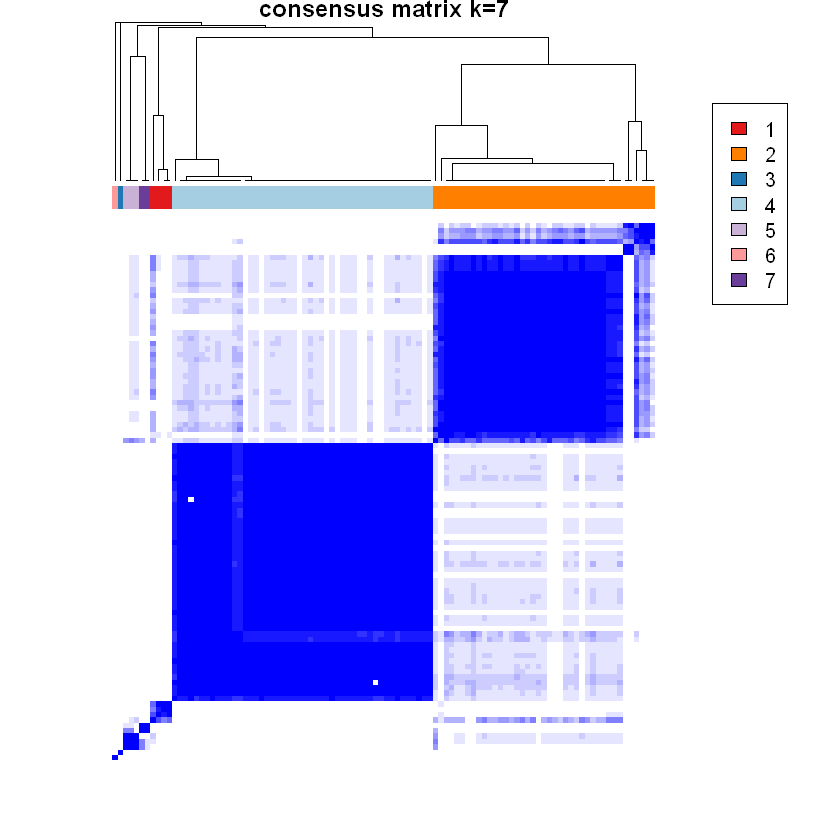

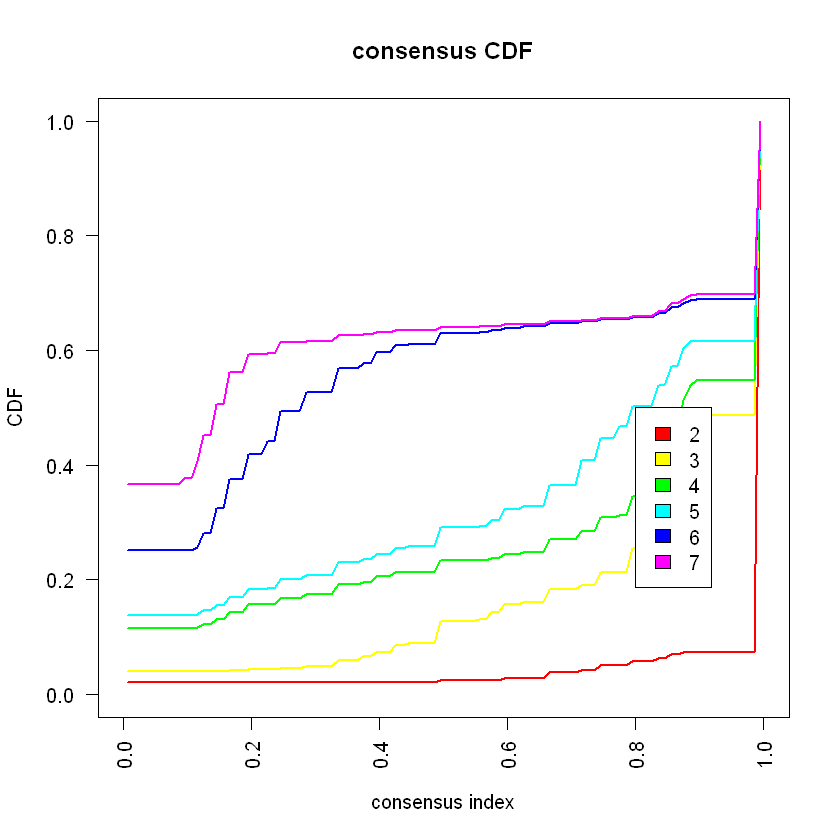

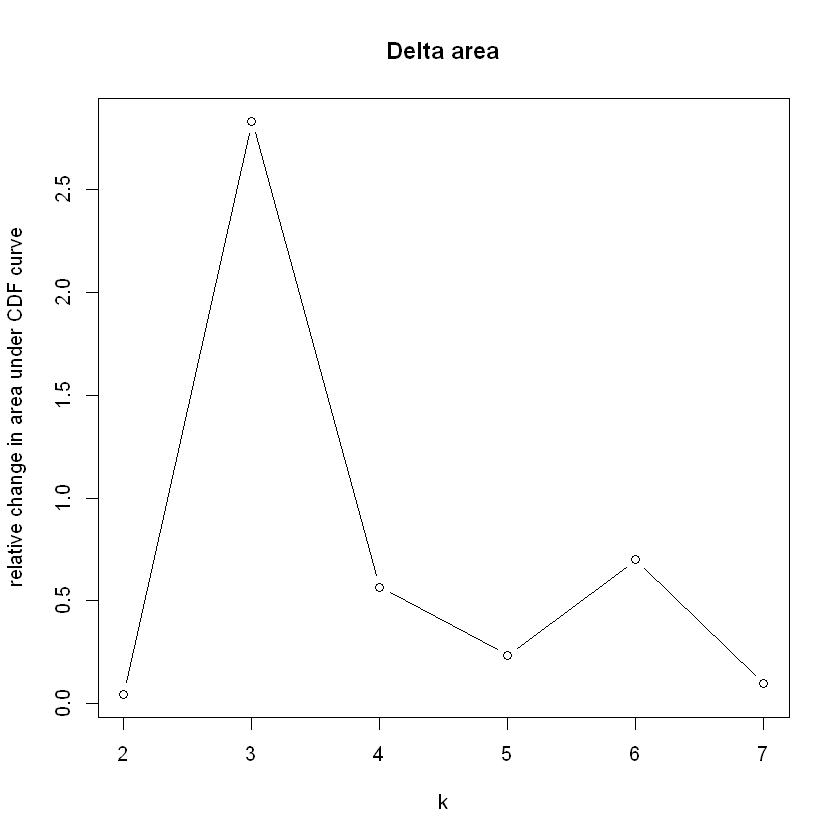

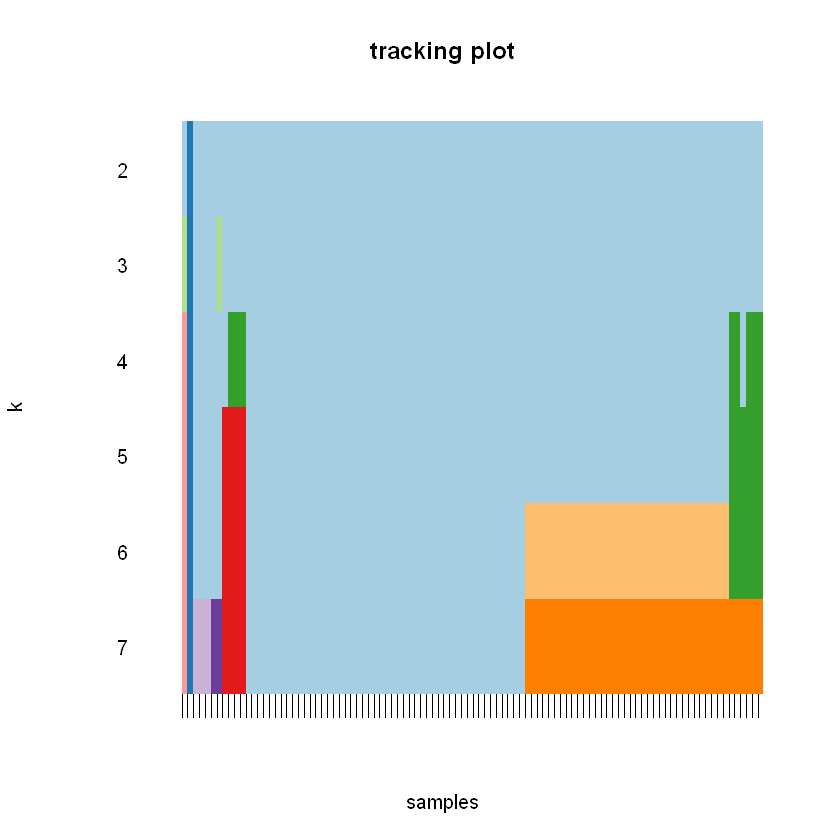

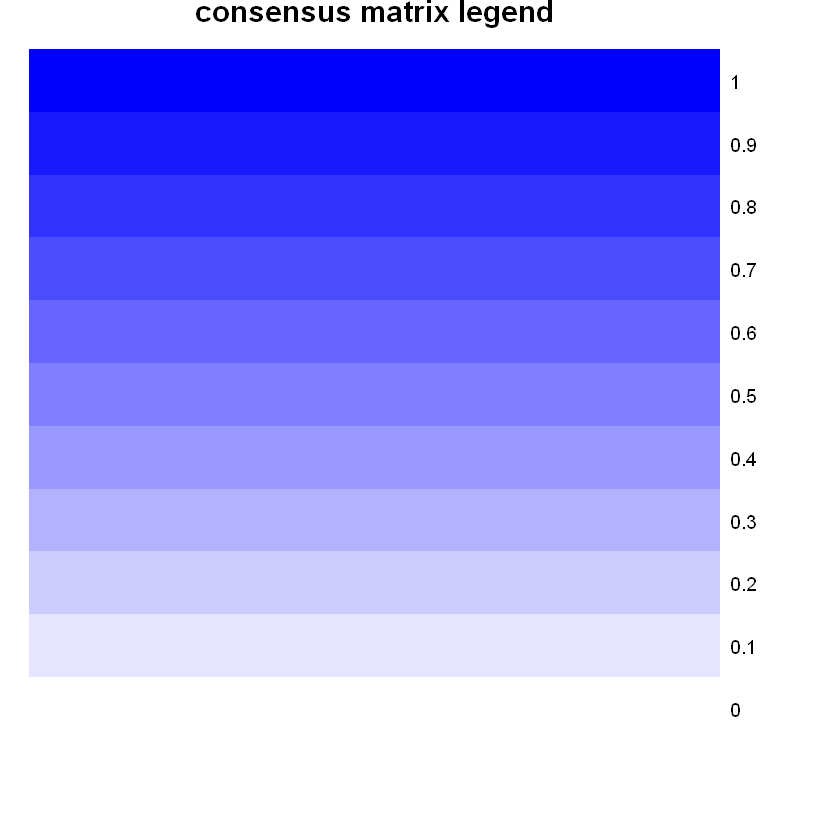

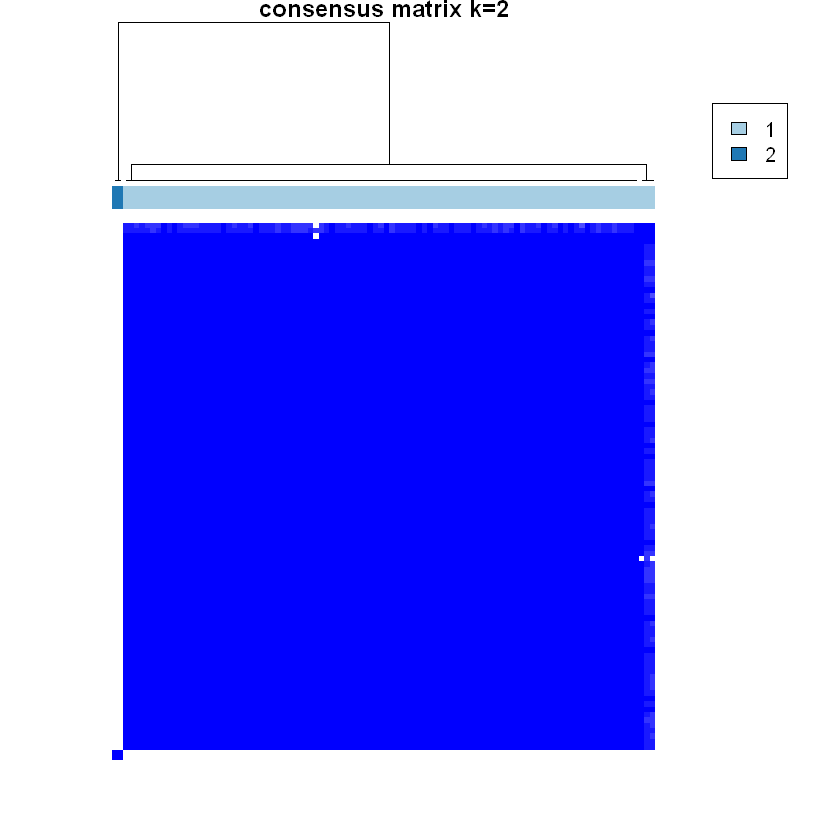

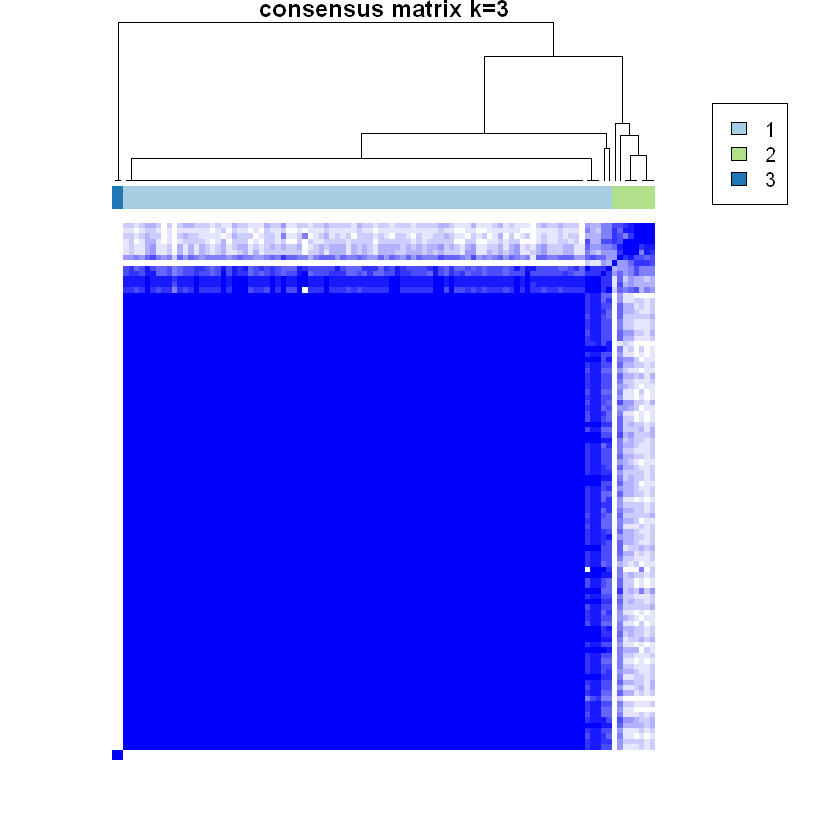

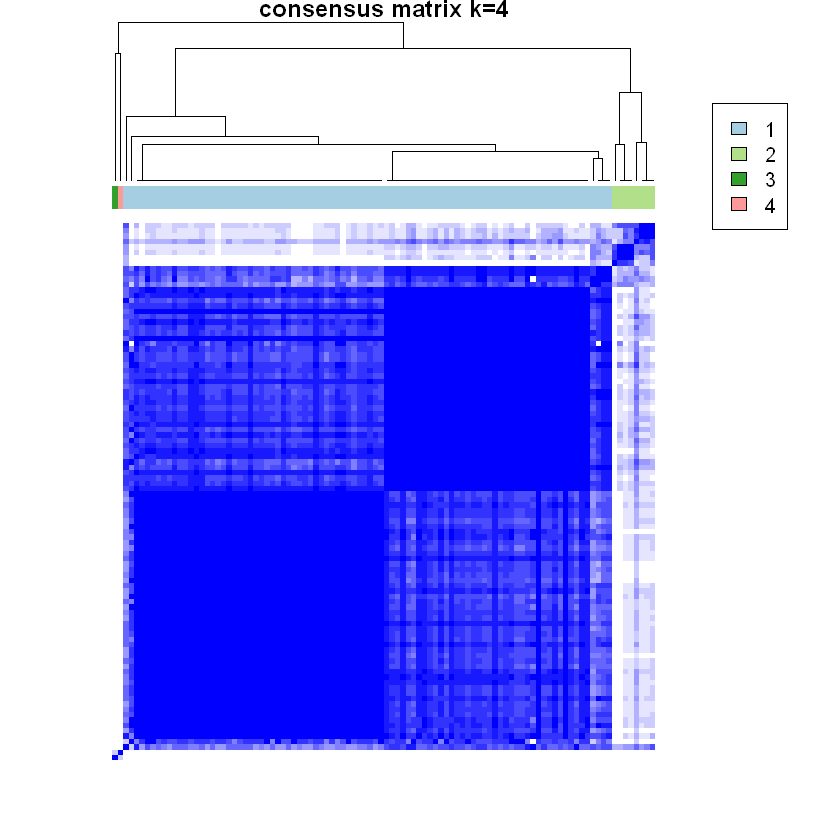

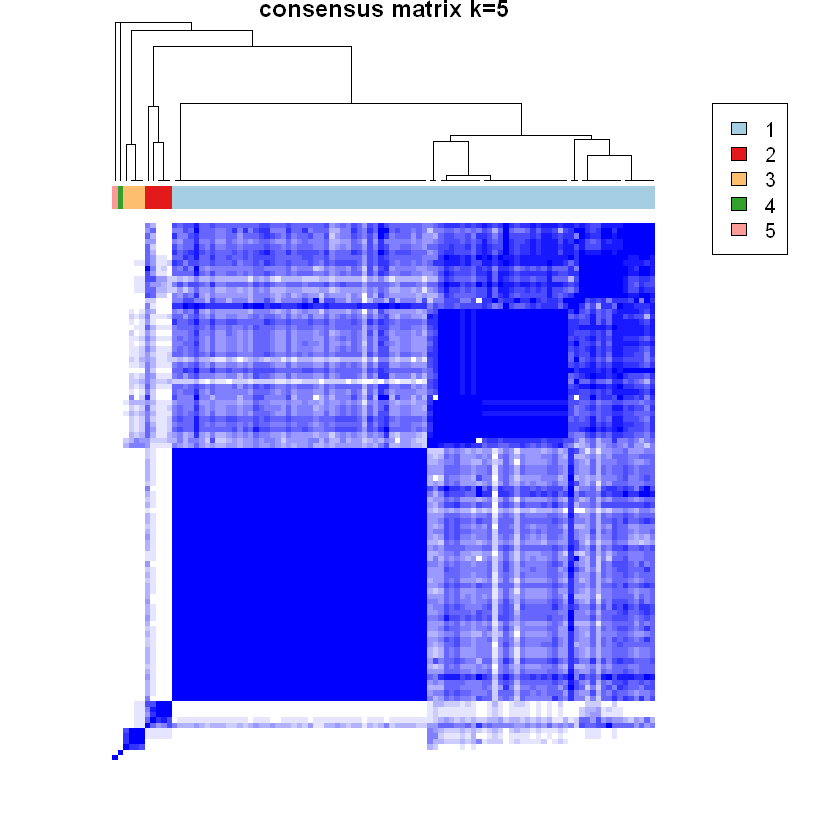

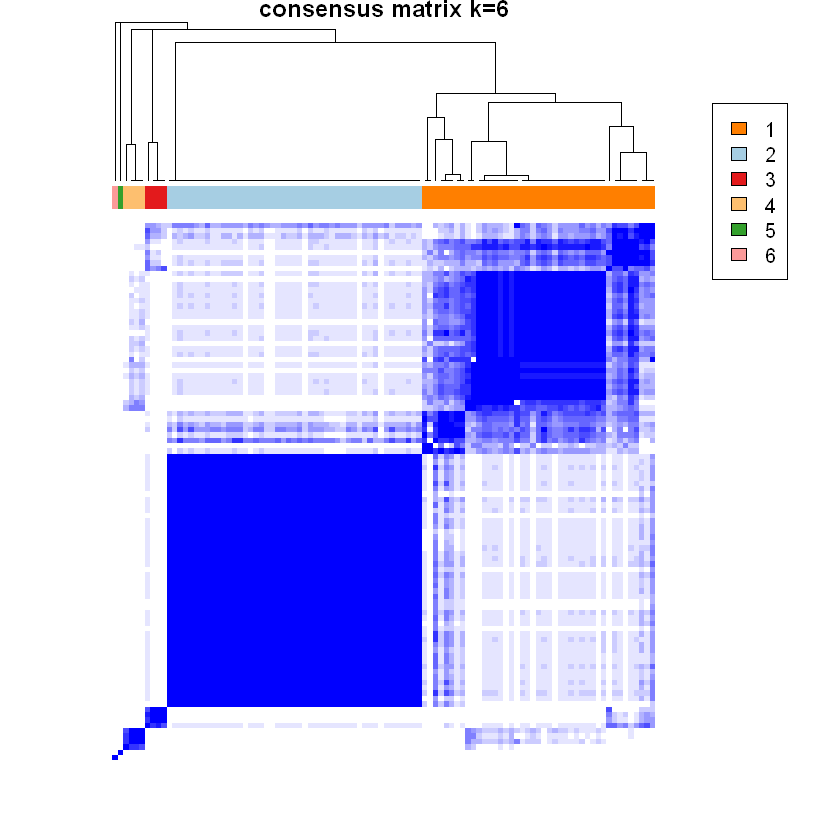

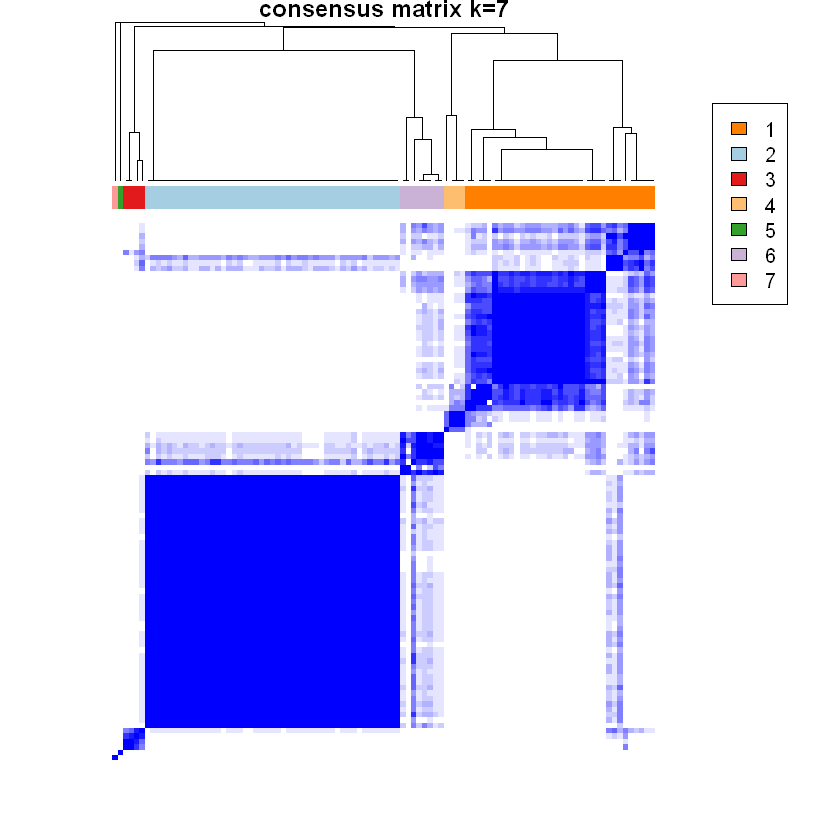

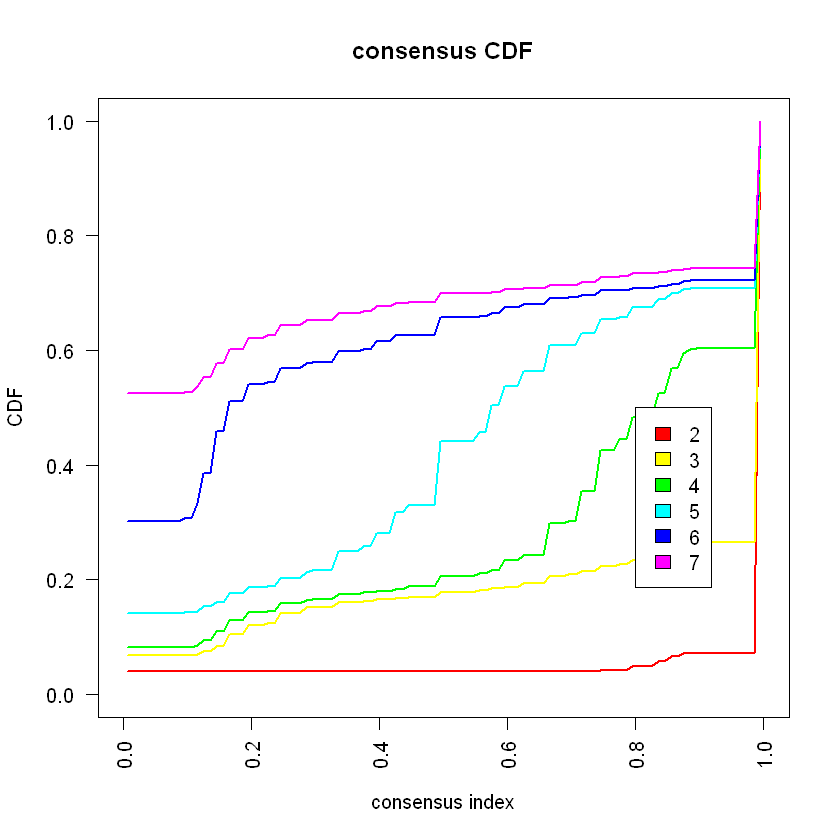

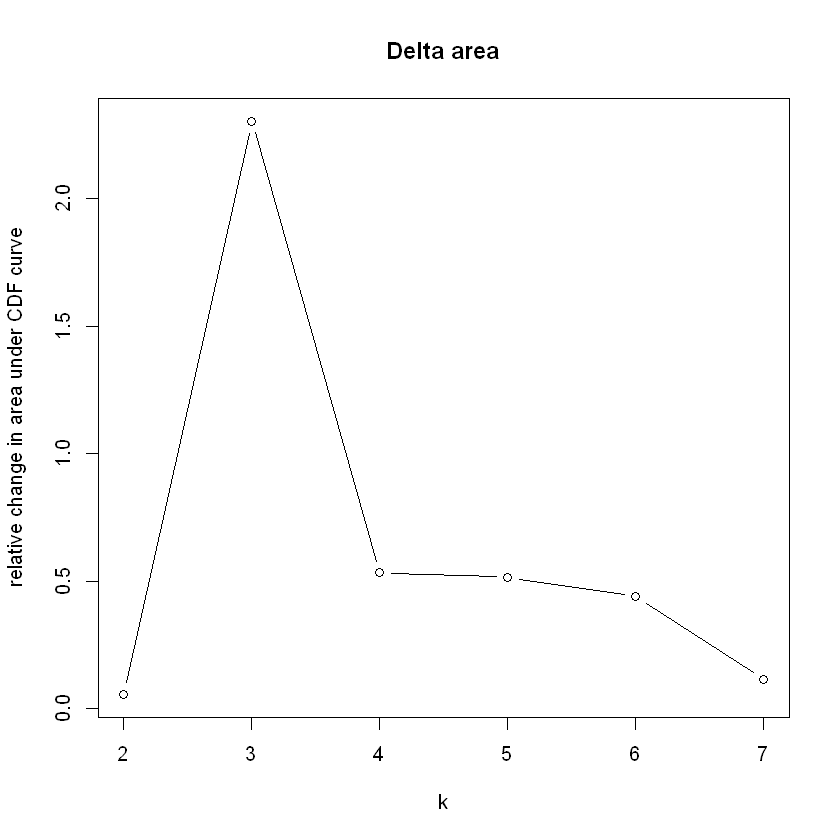

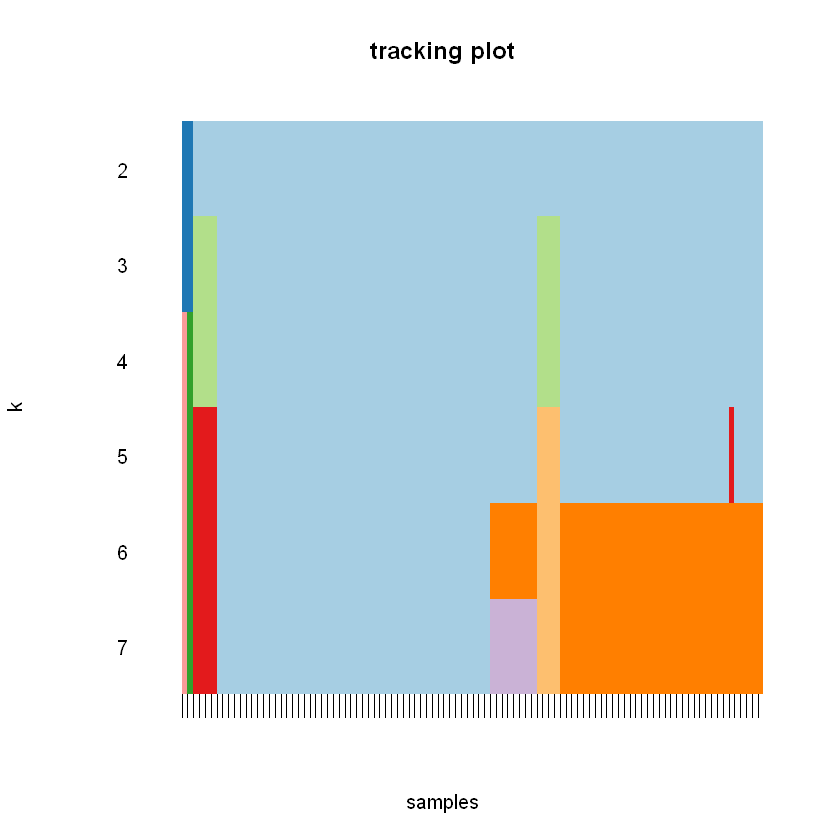

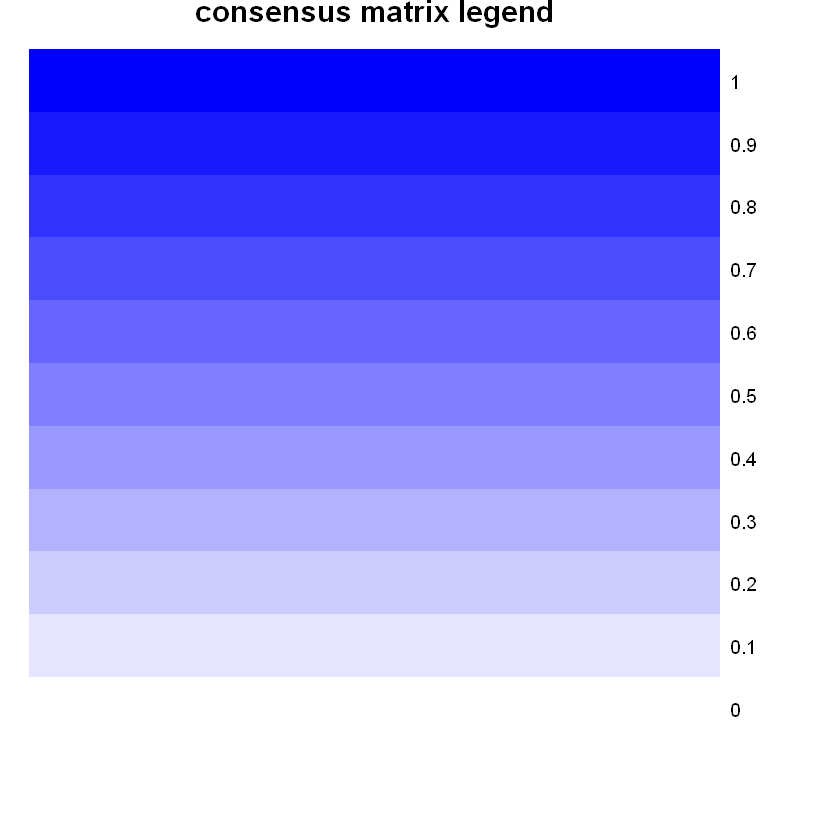

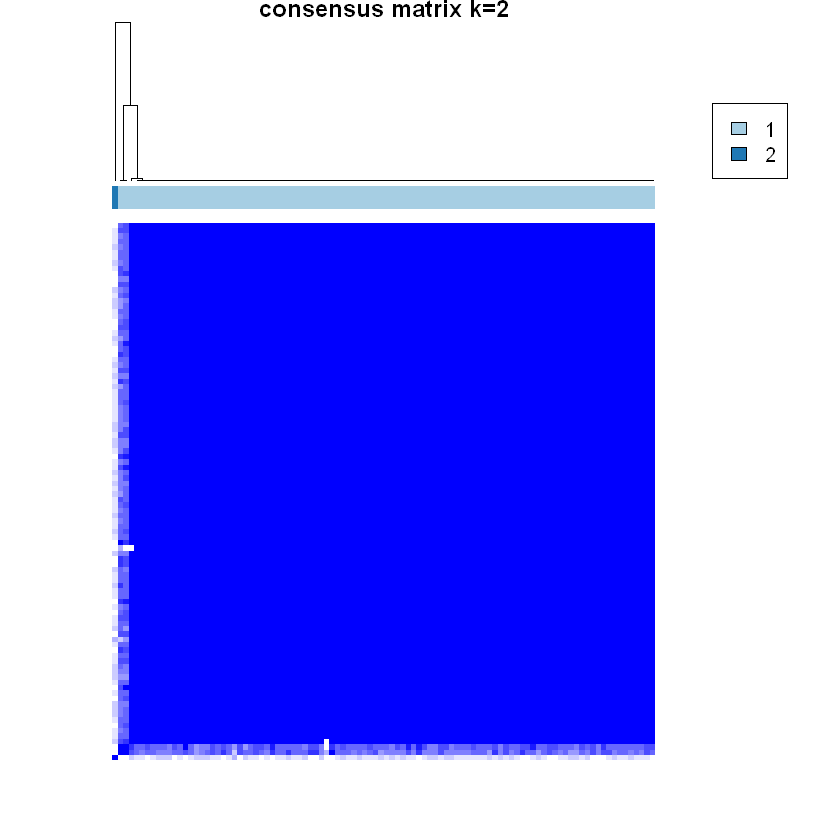

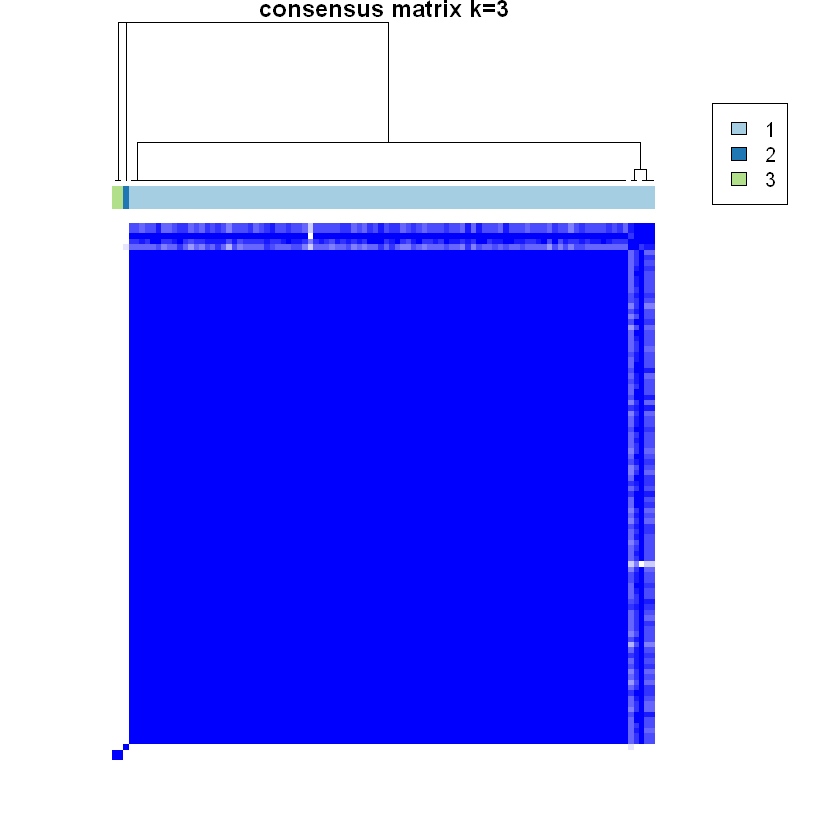

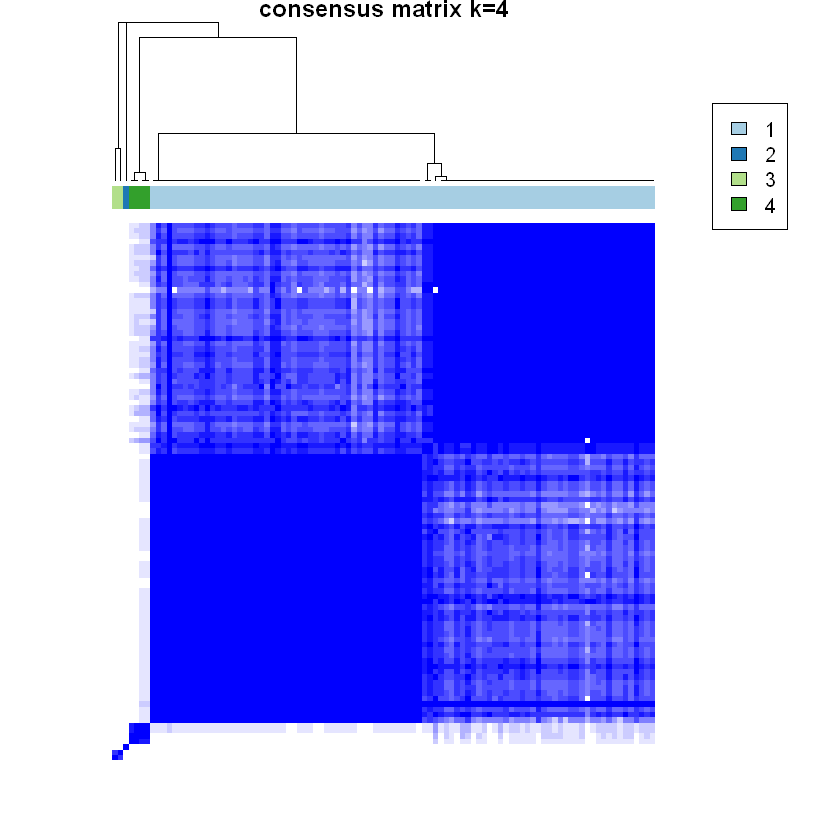

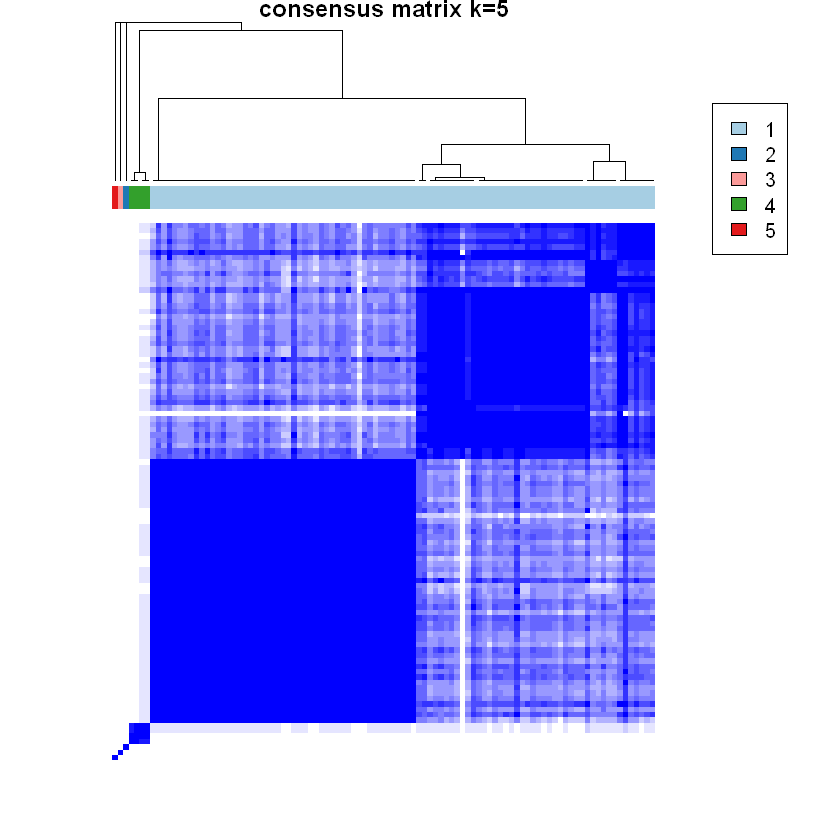

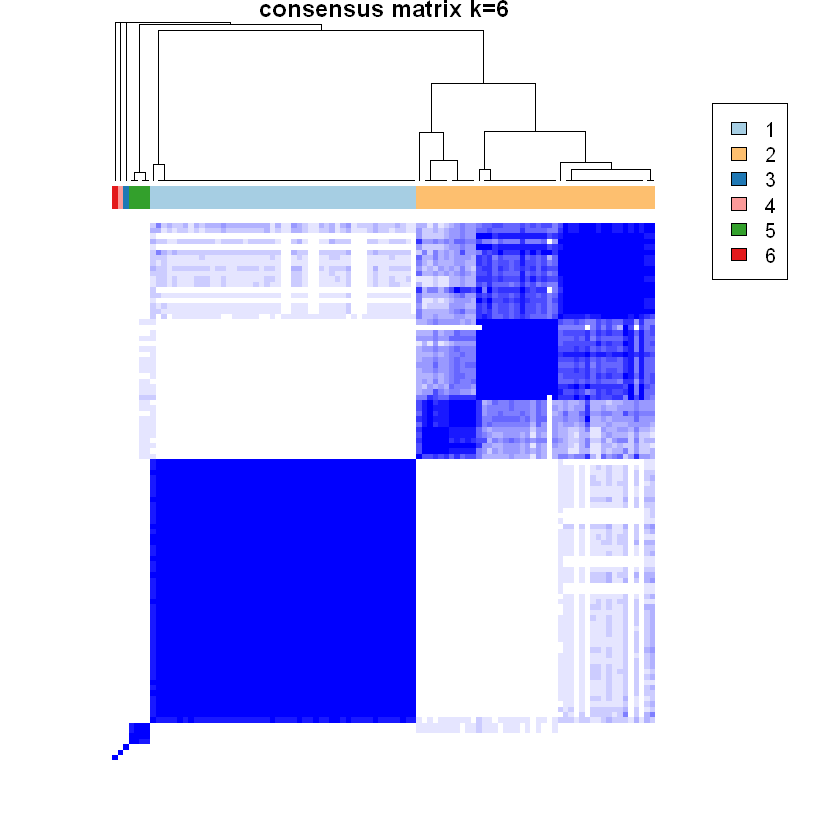

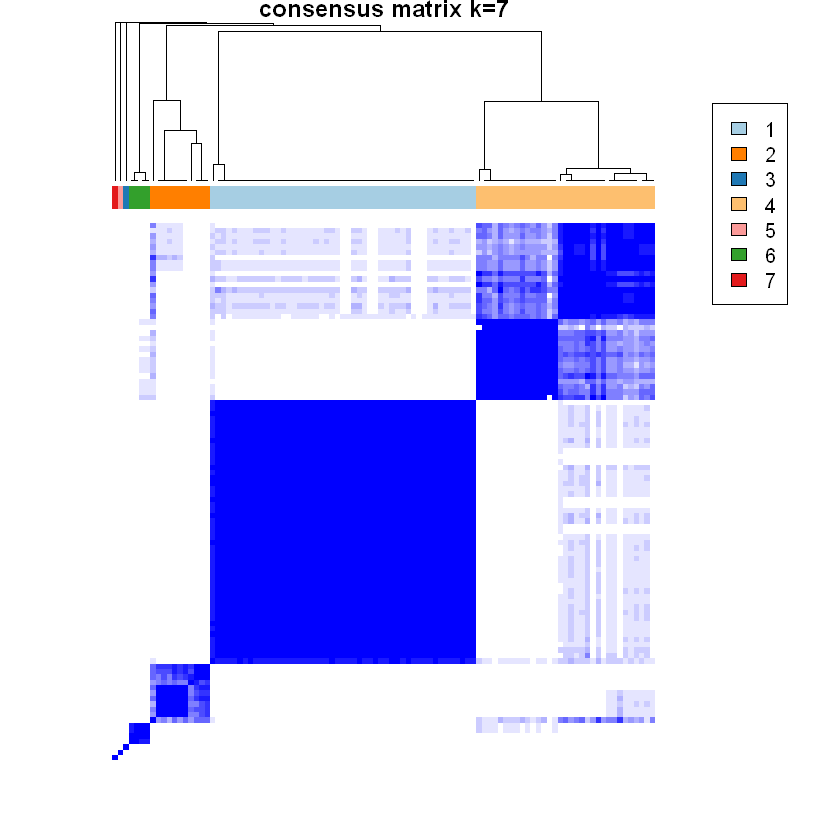

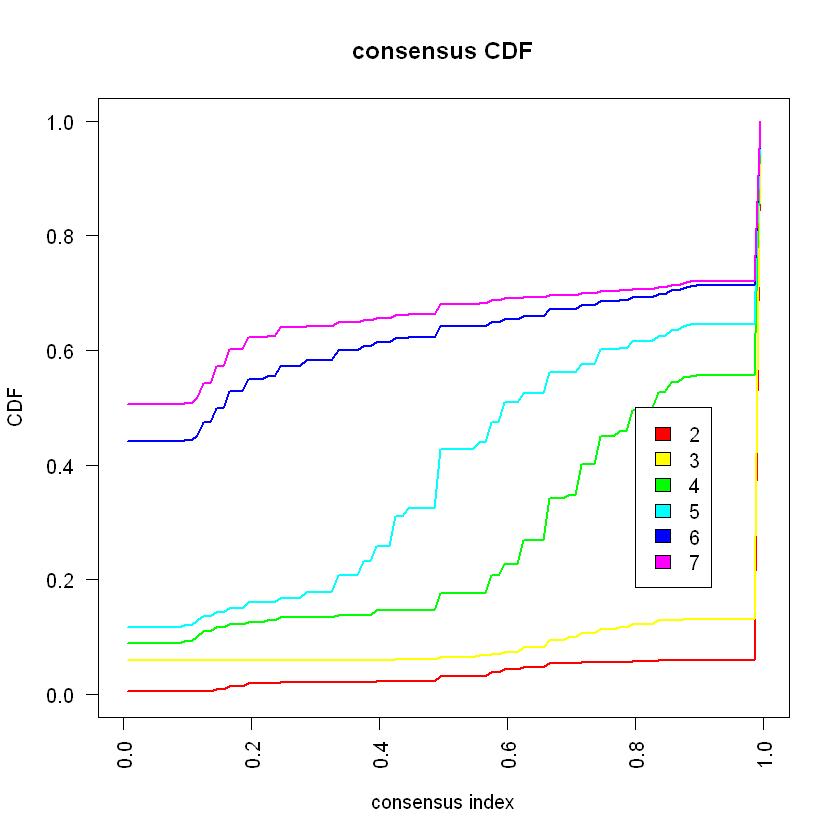

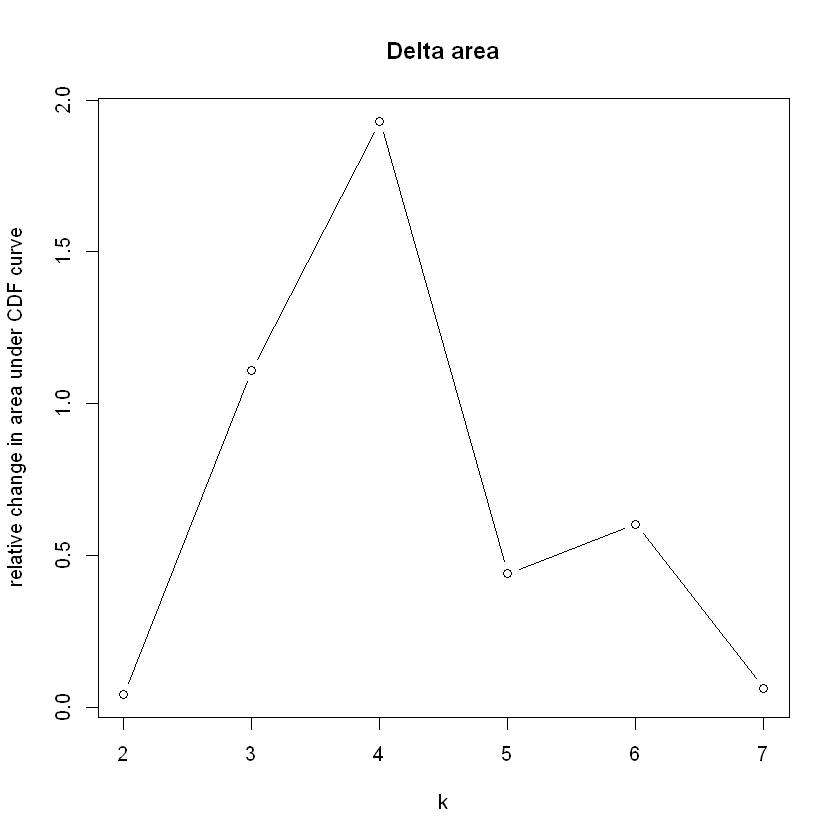

data set FlowCAP_ND : run complete


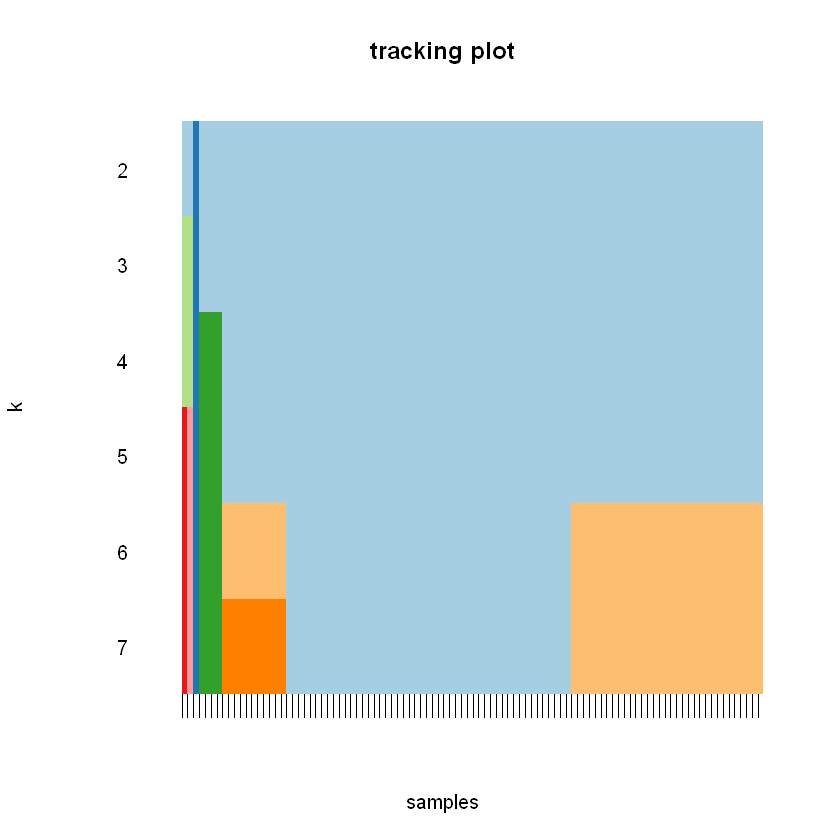

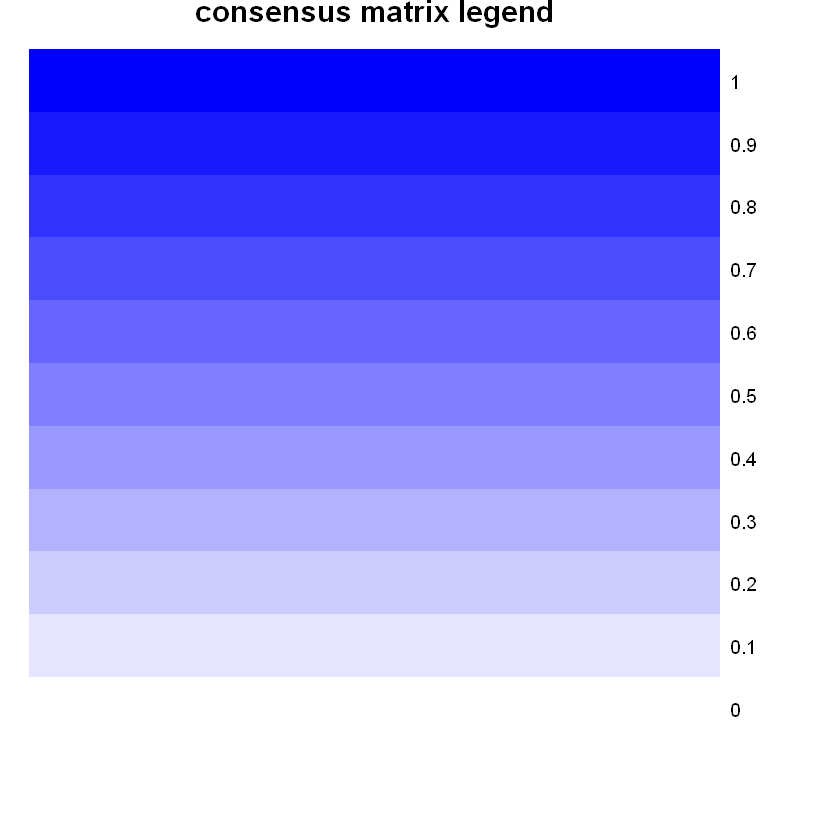

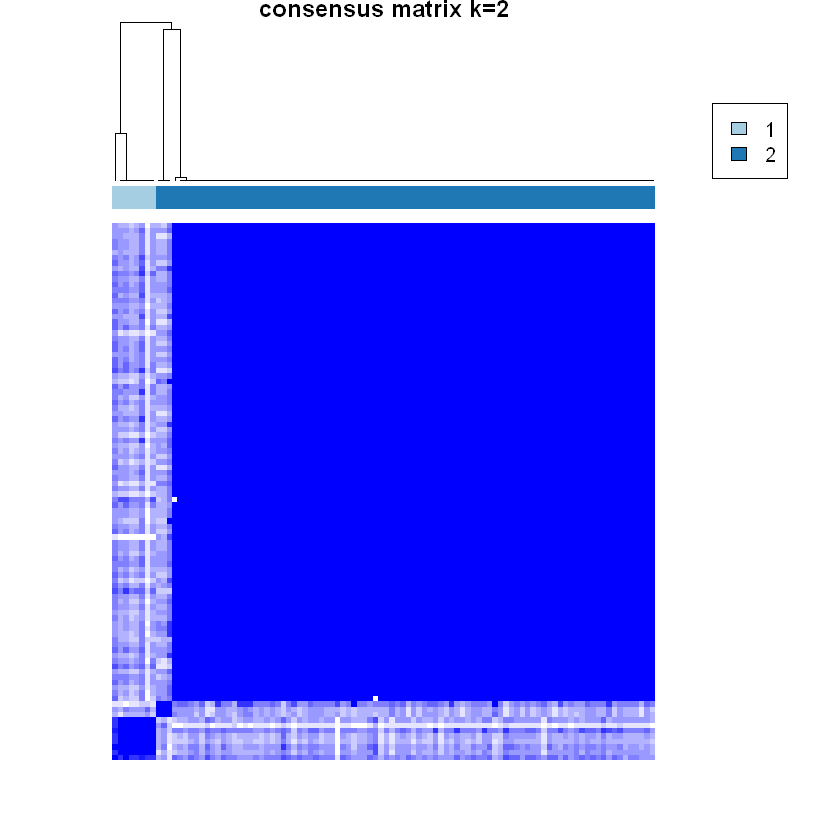

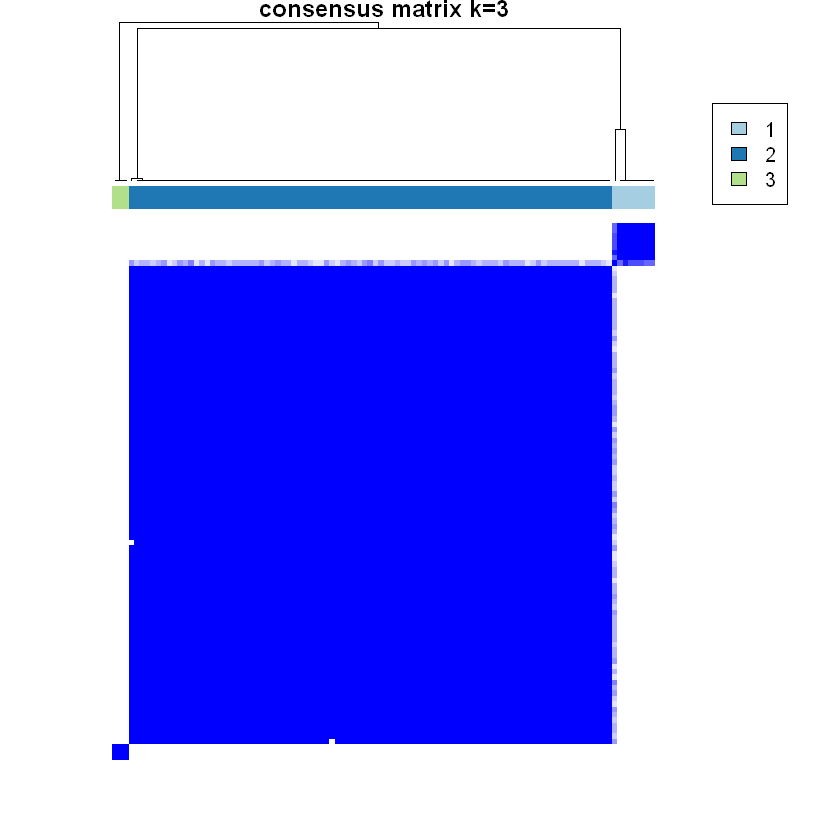

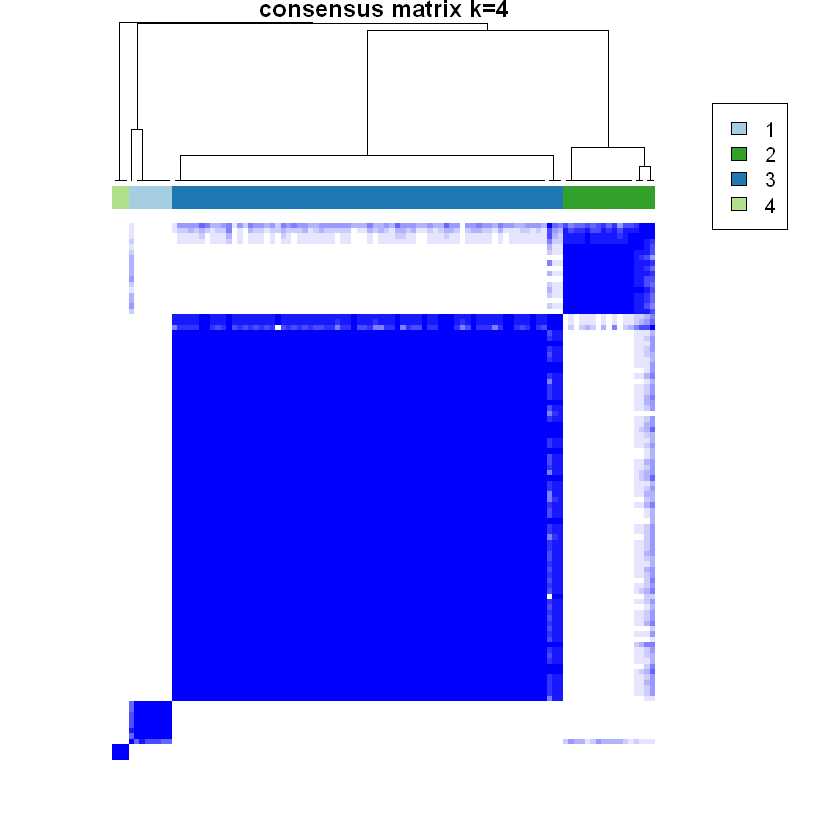

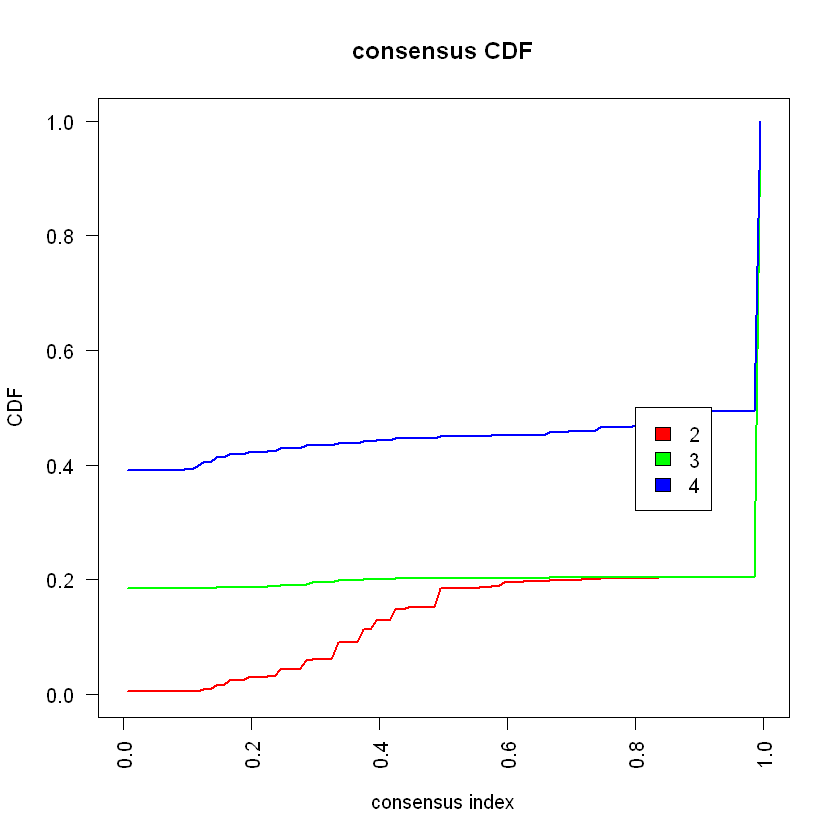

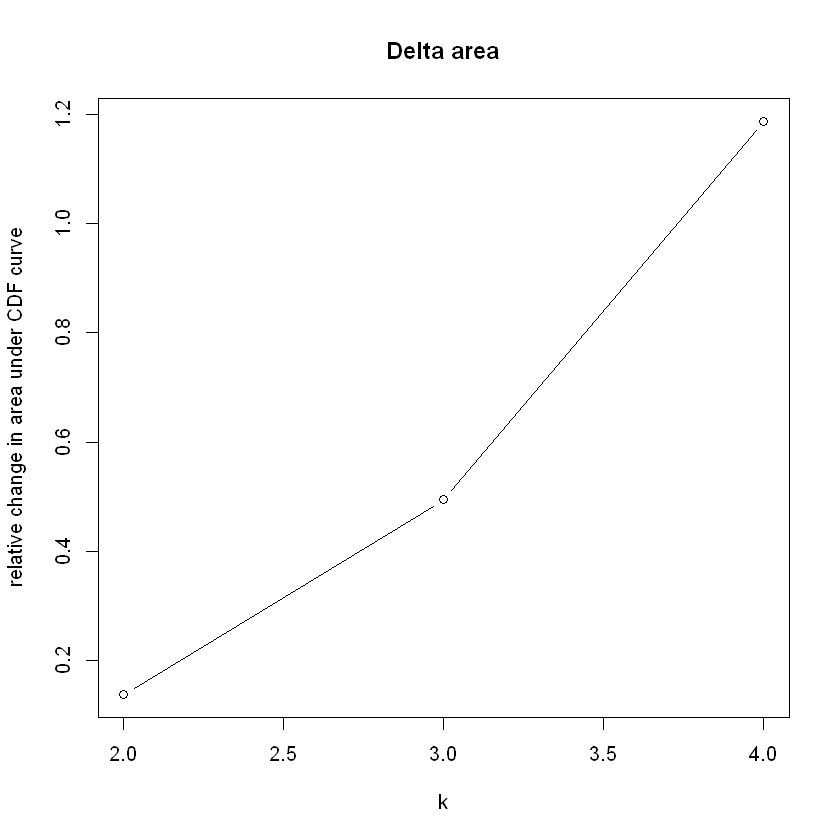

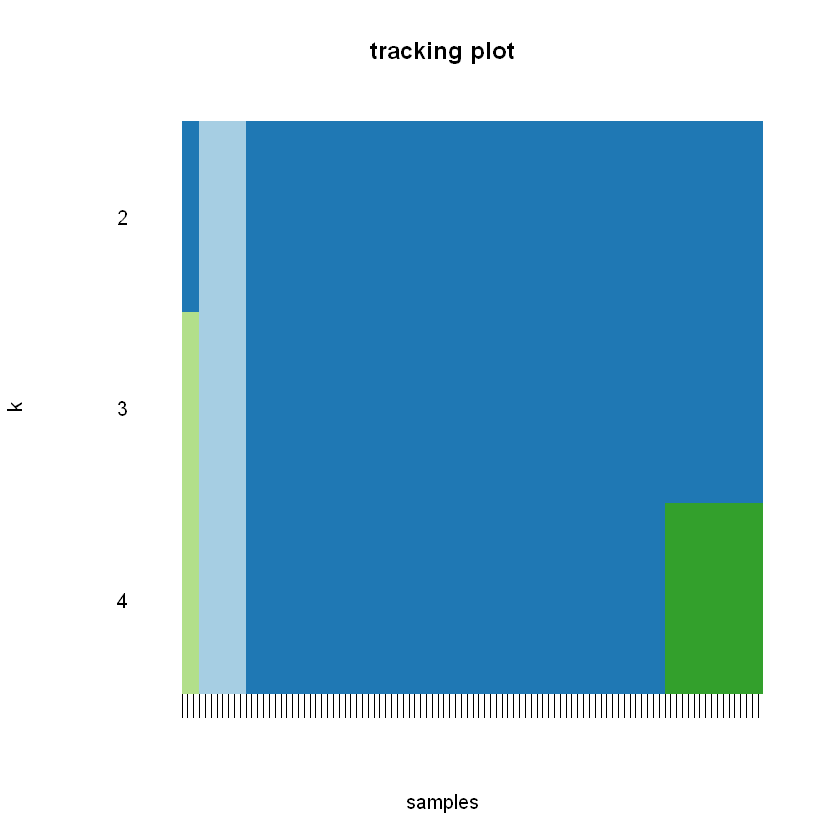

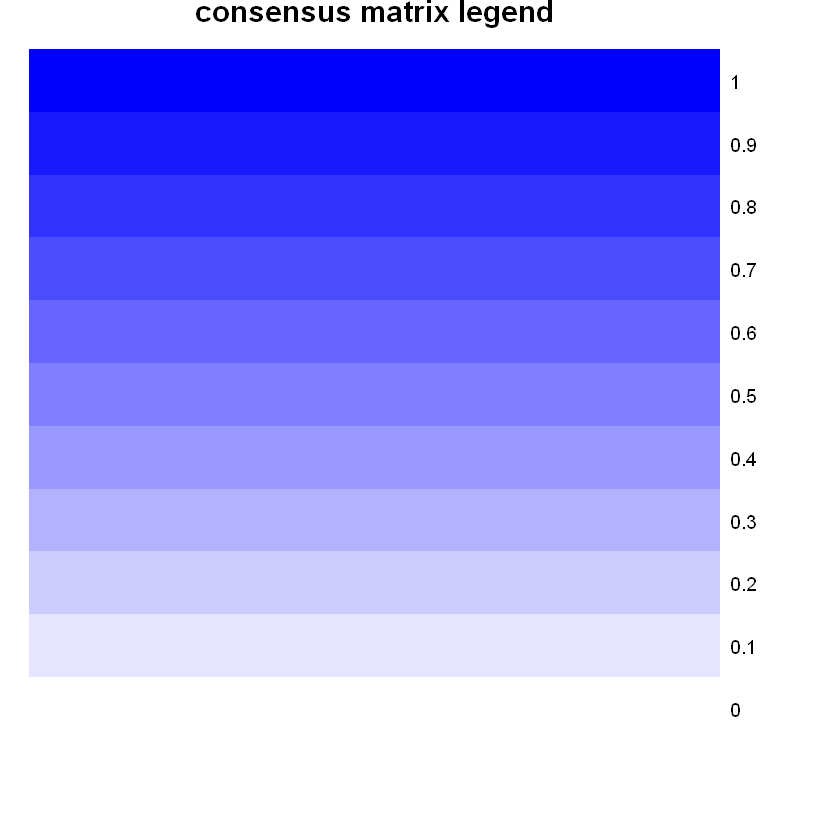

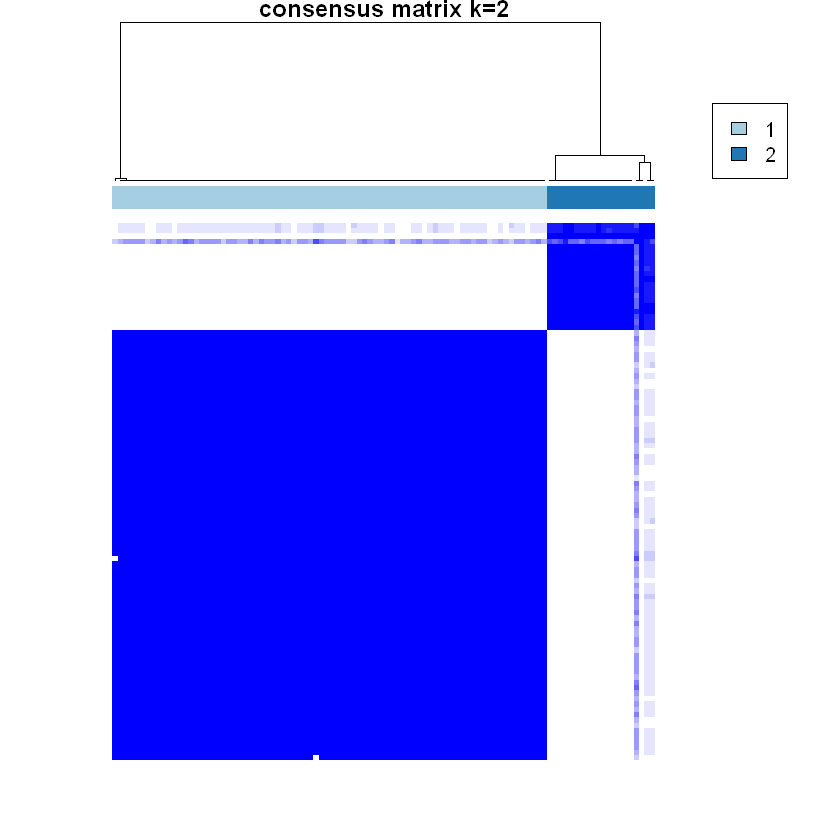

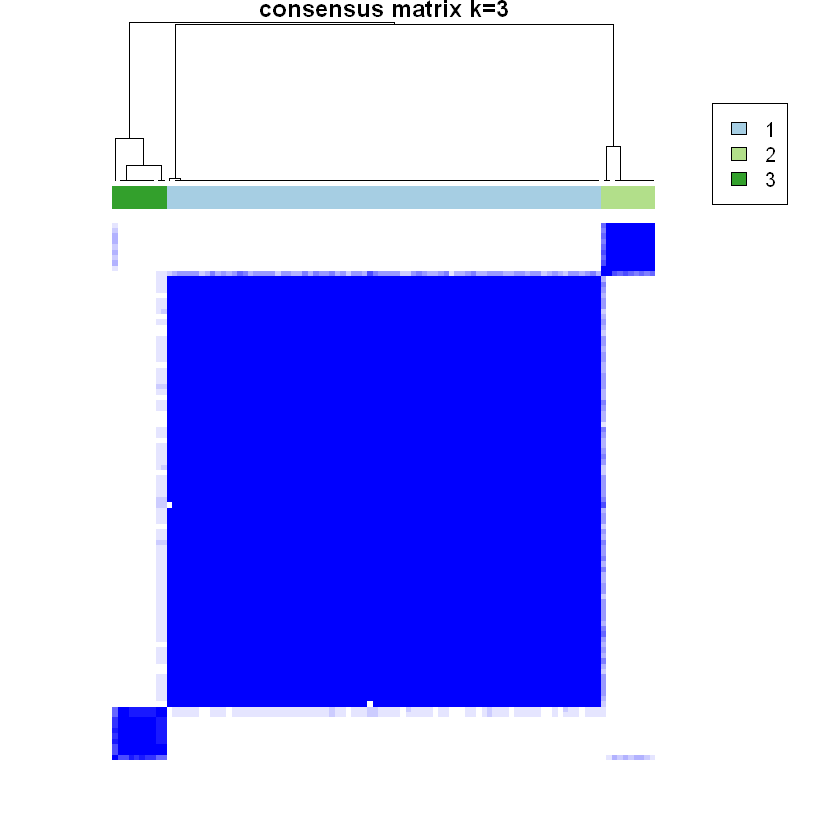

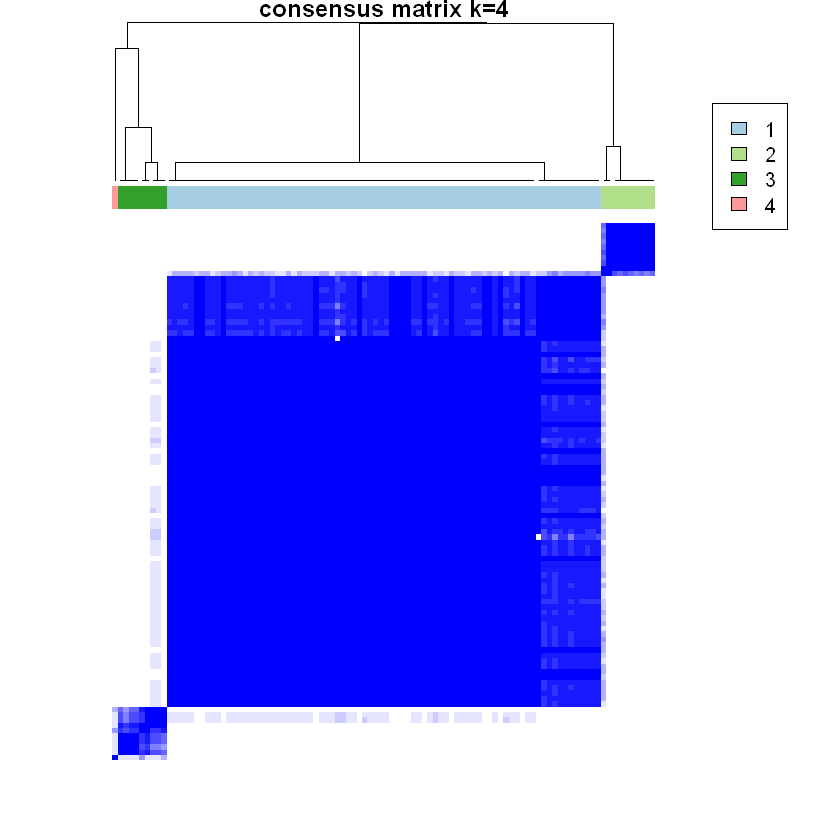

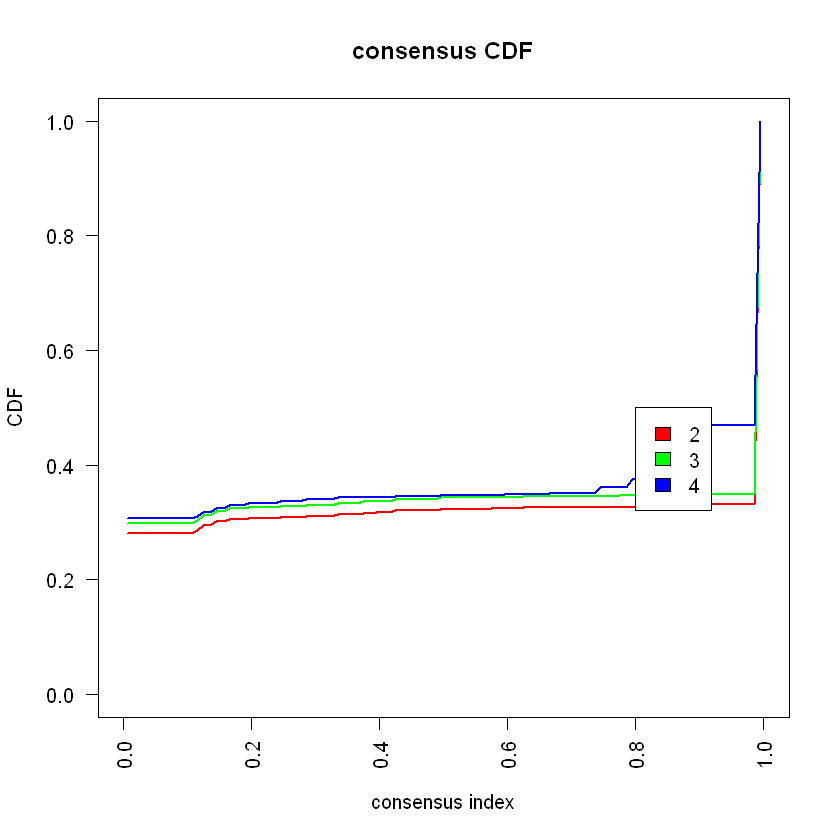

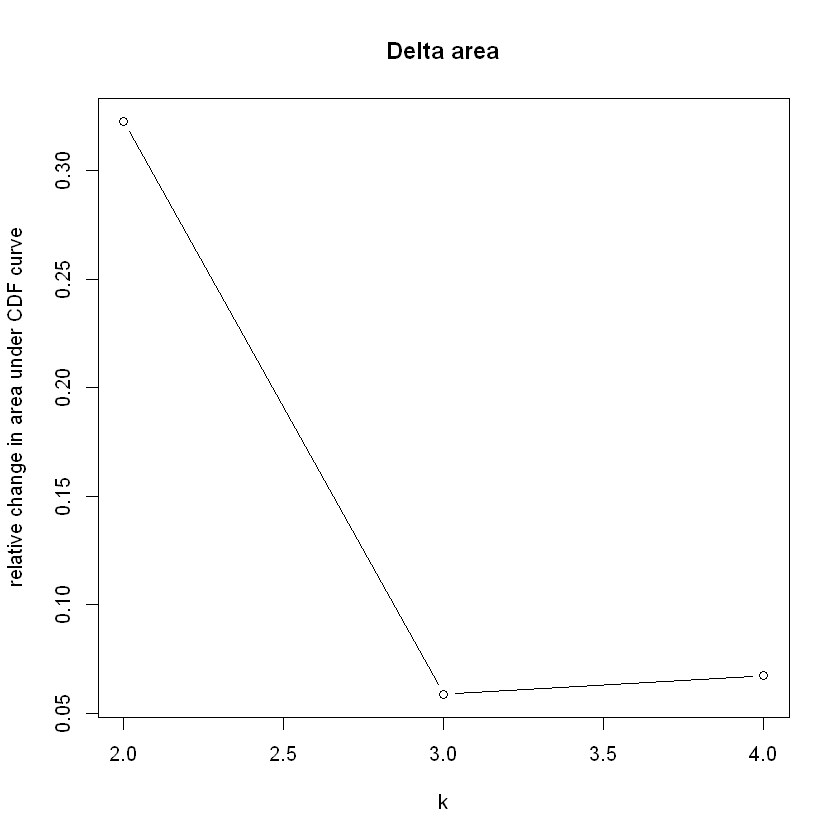

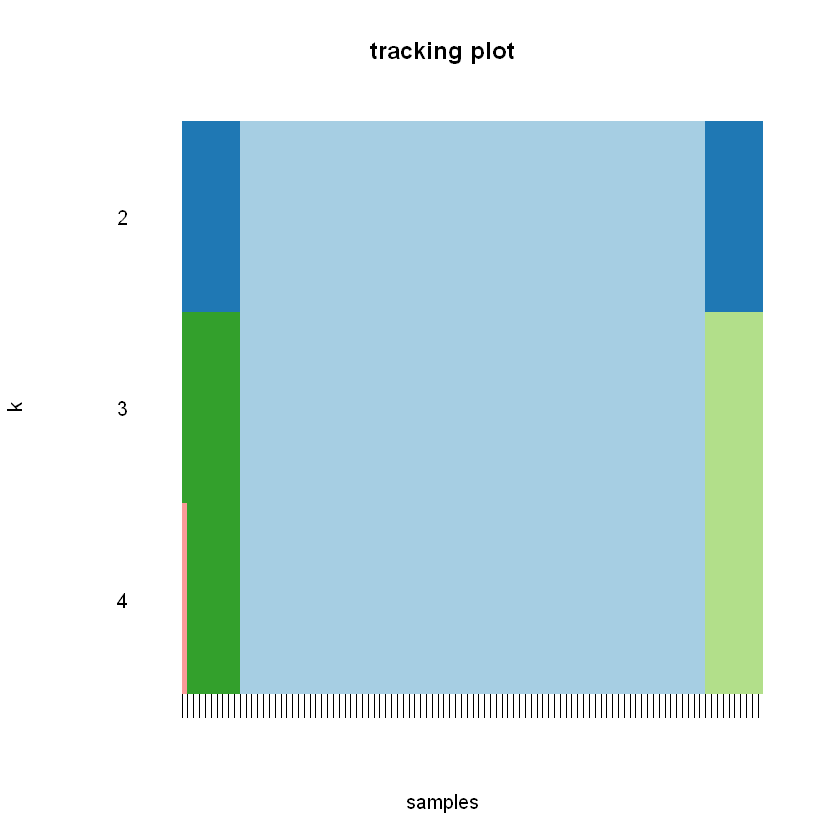

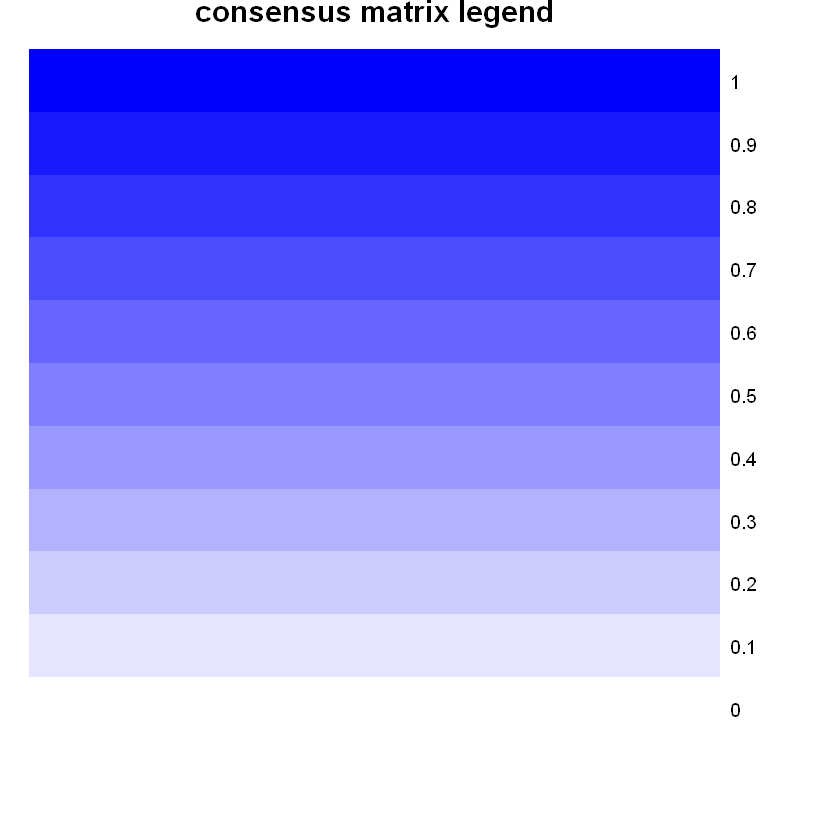

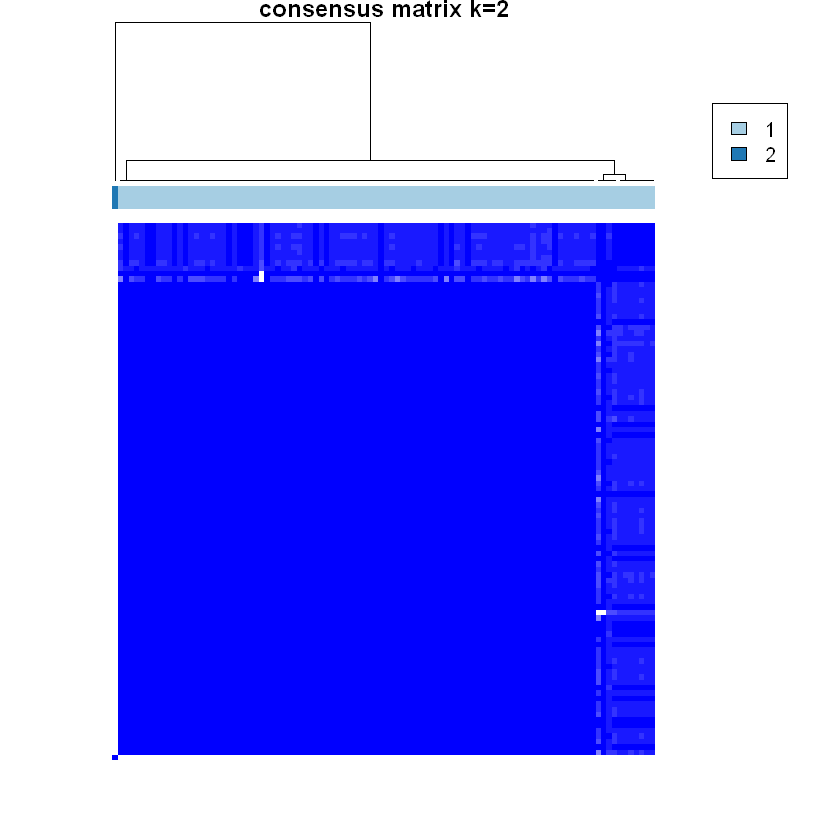

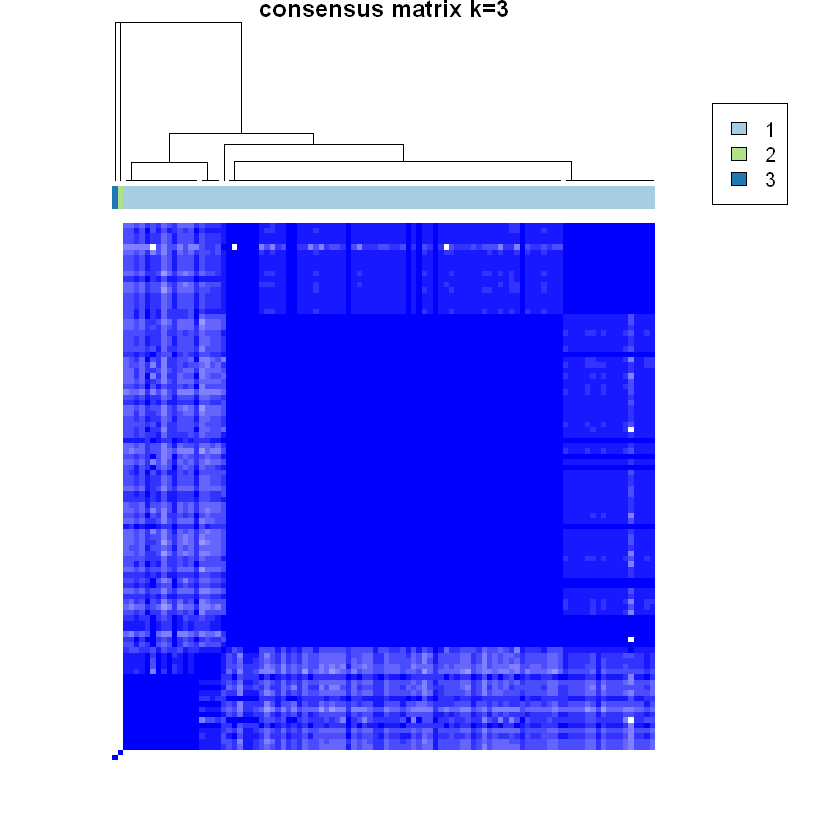

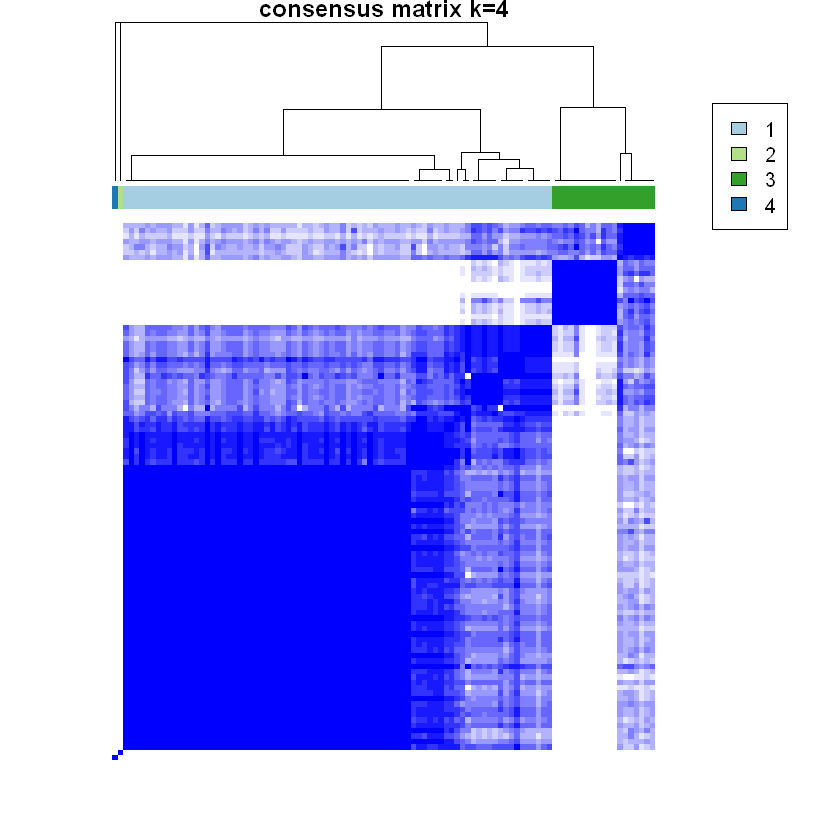

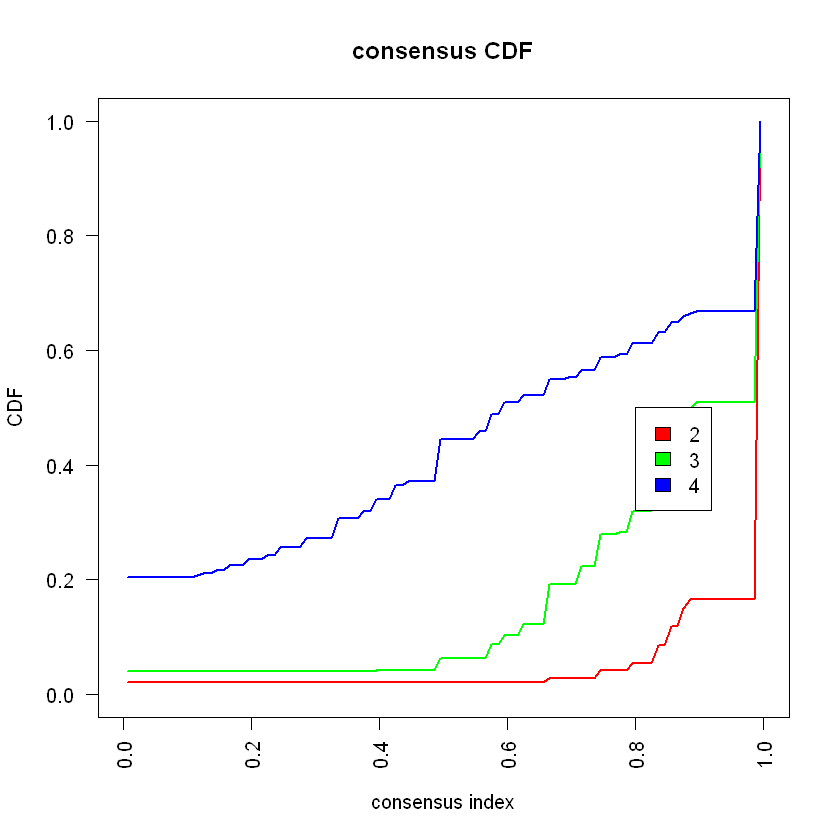

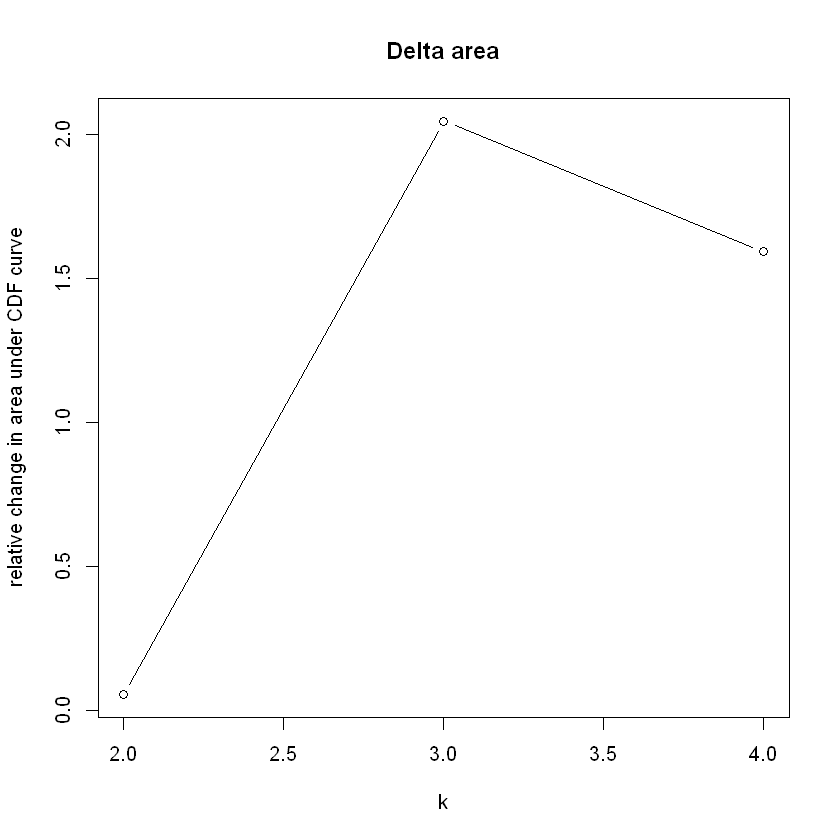

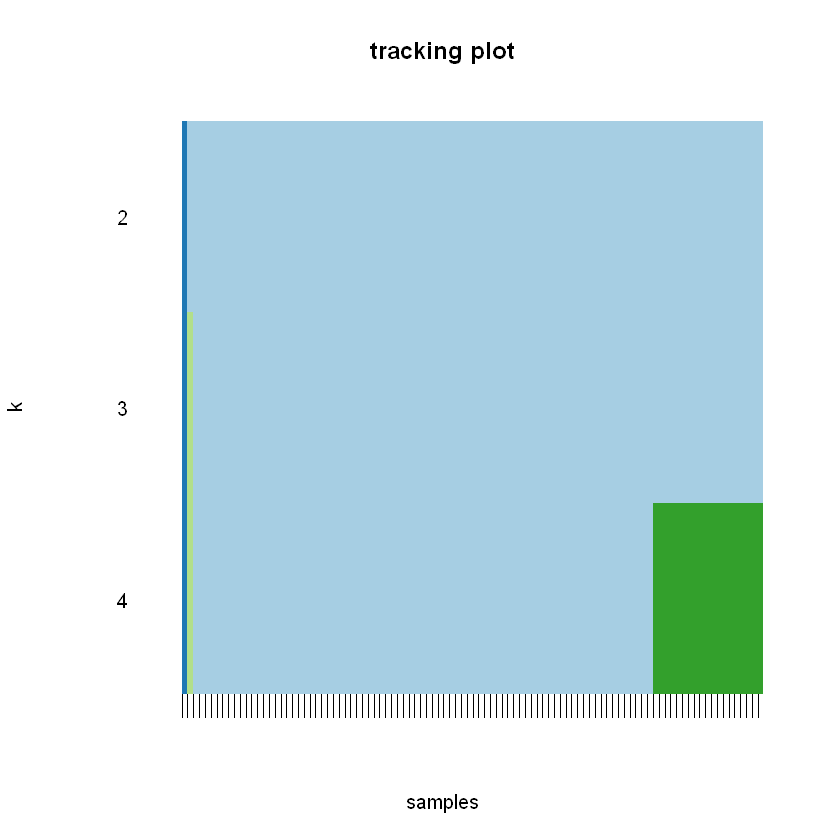

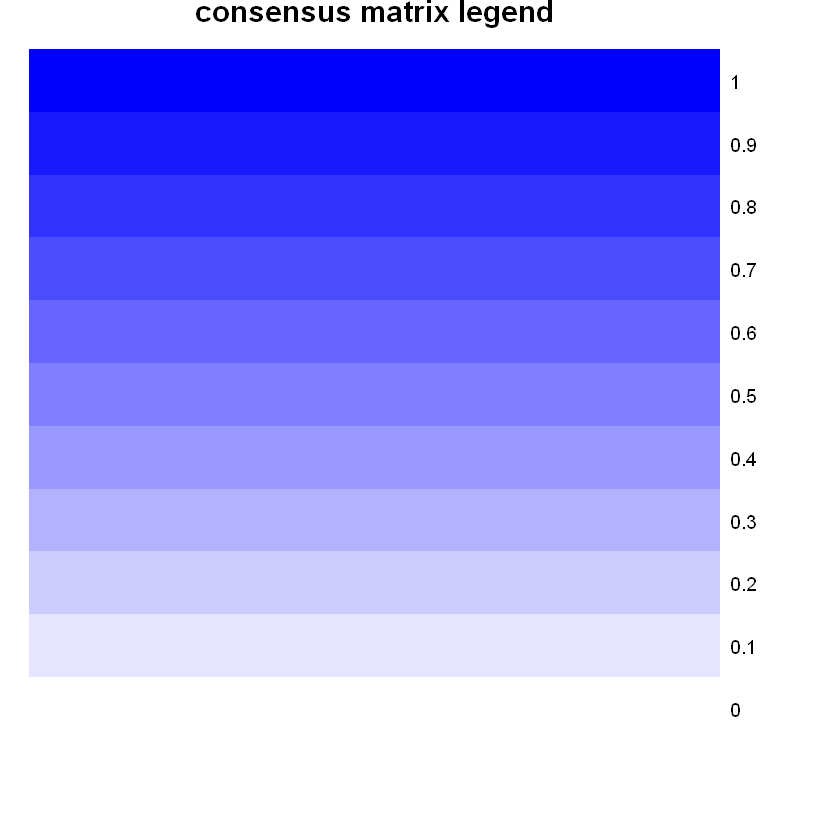

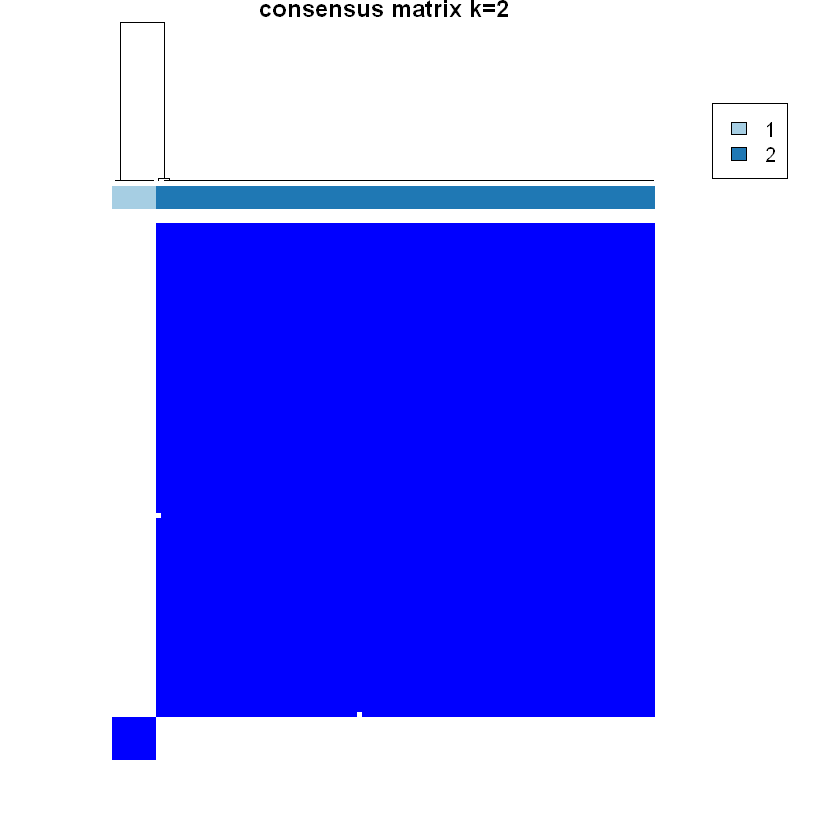

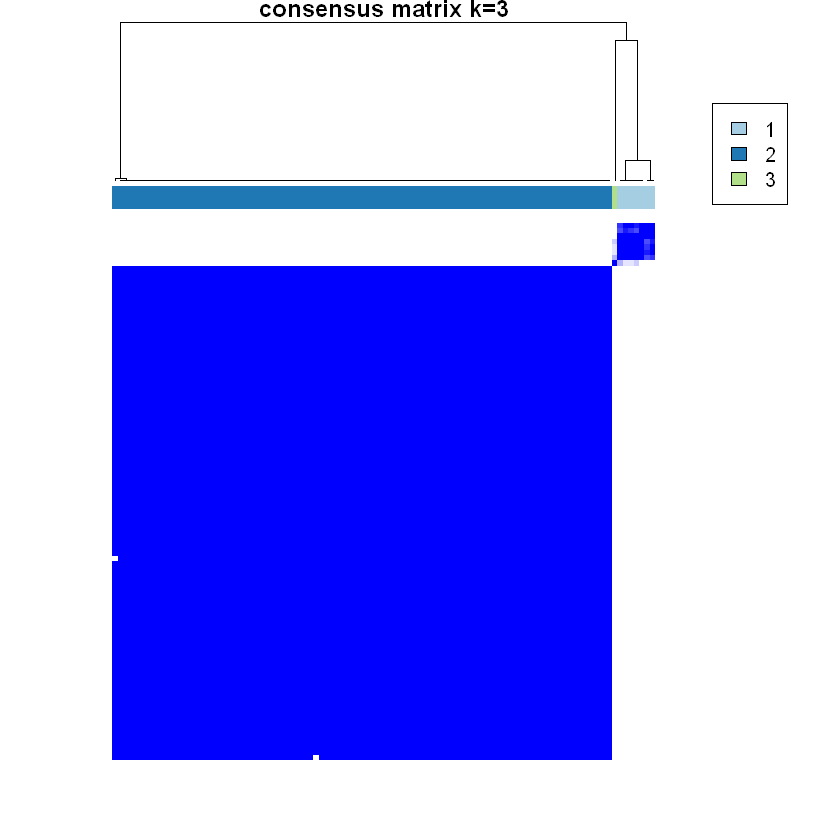

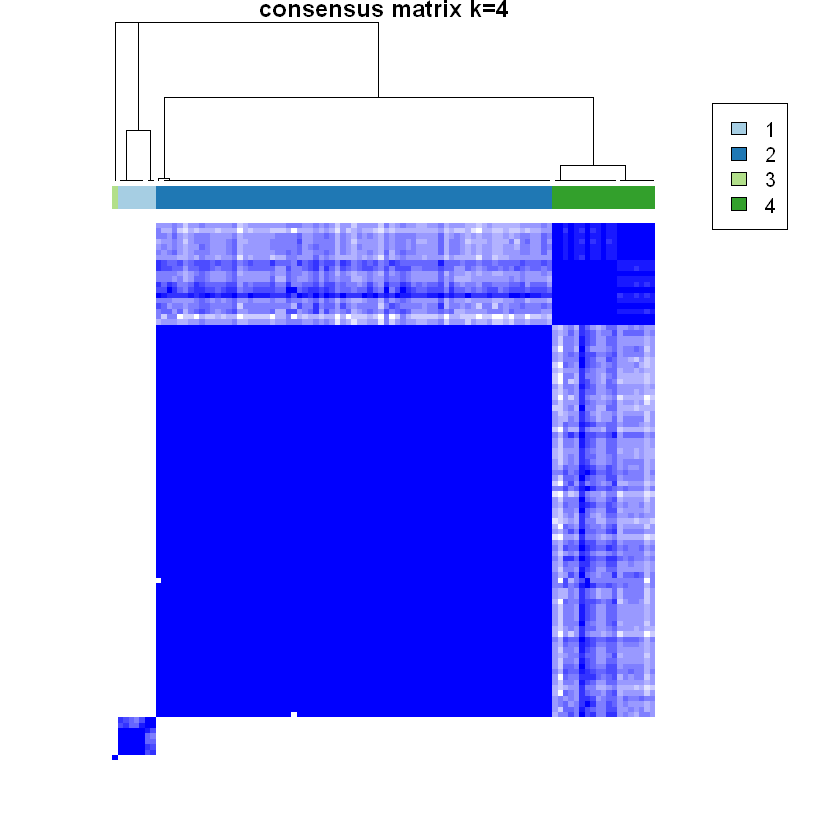

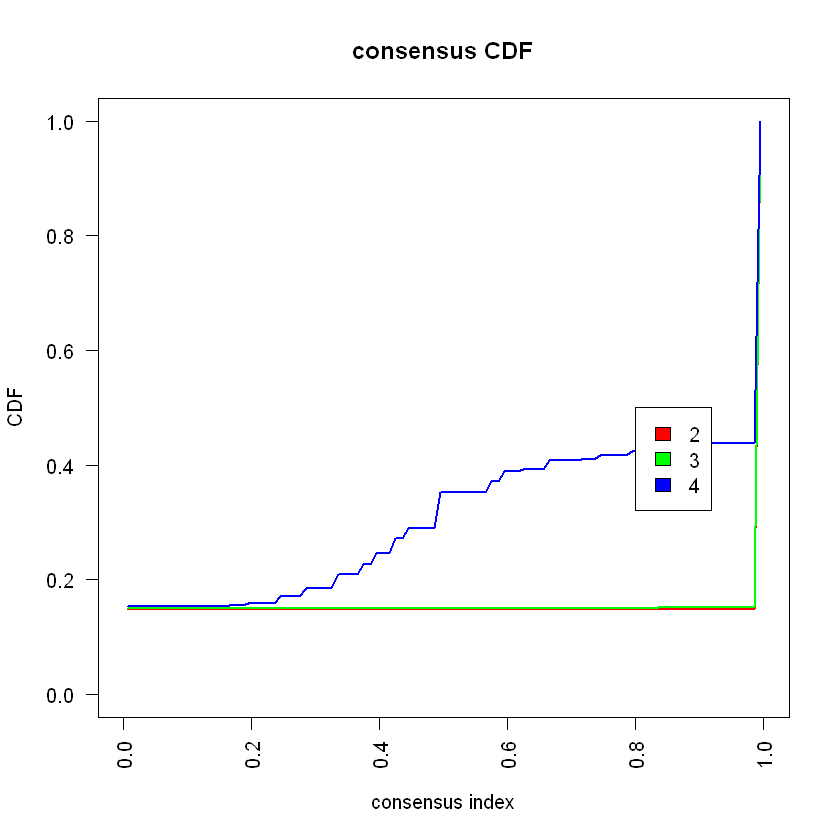

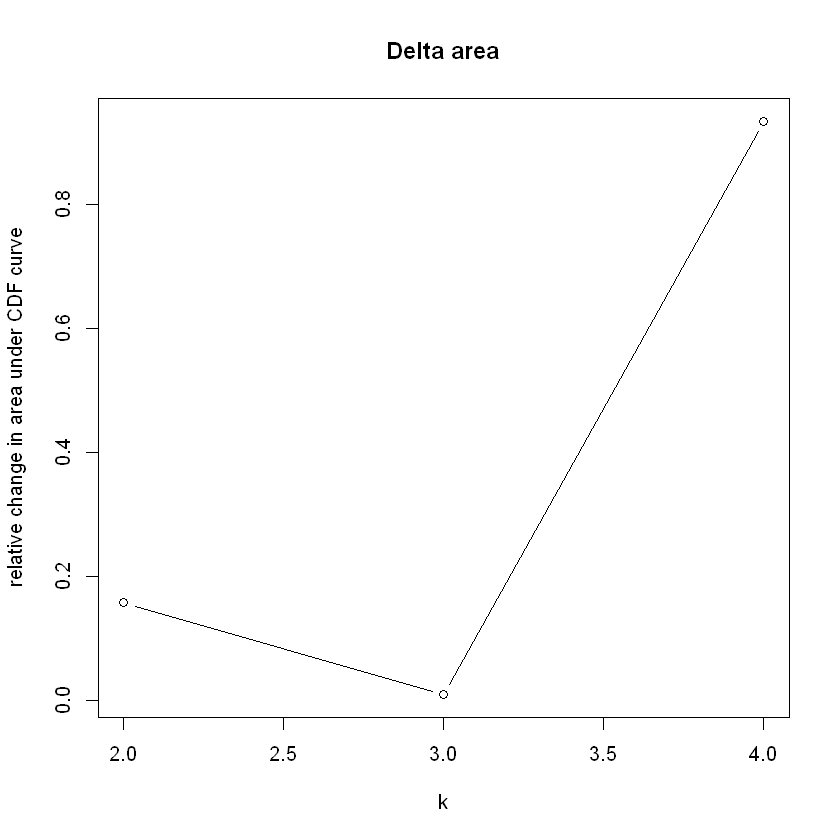

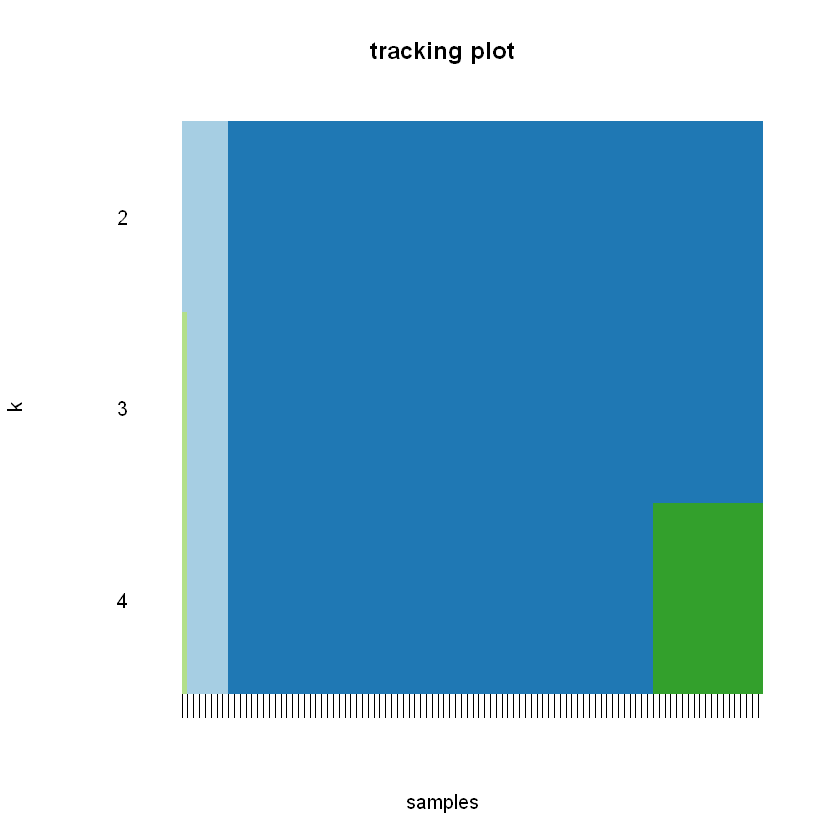

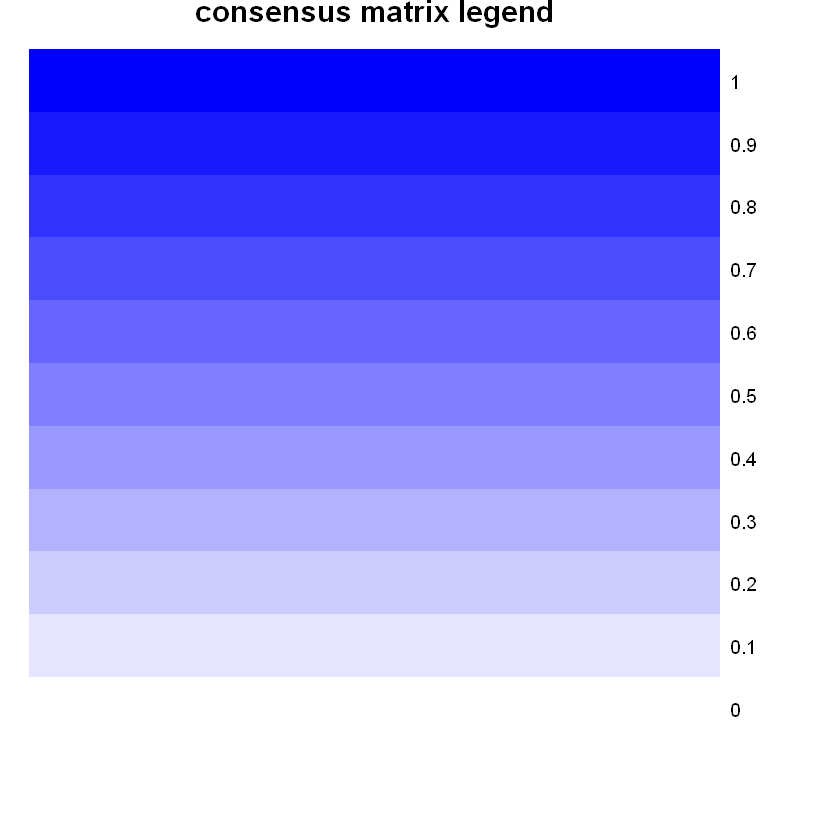

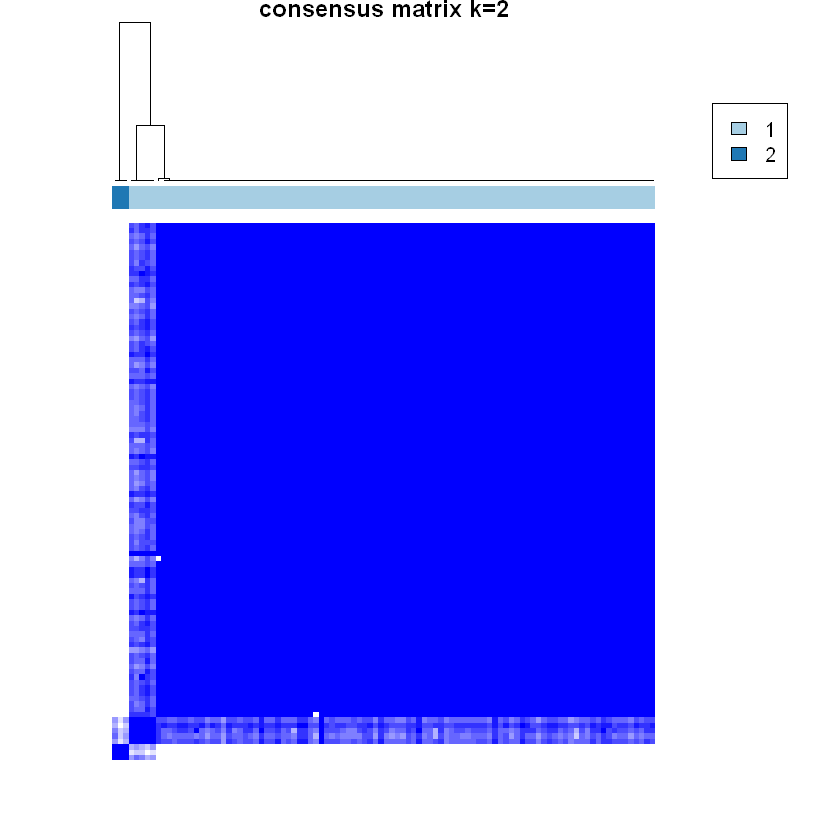

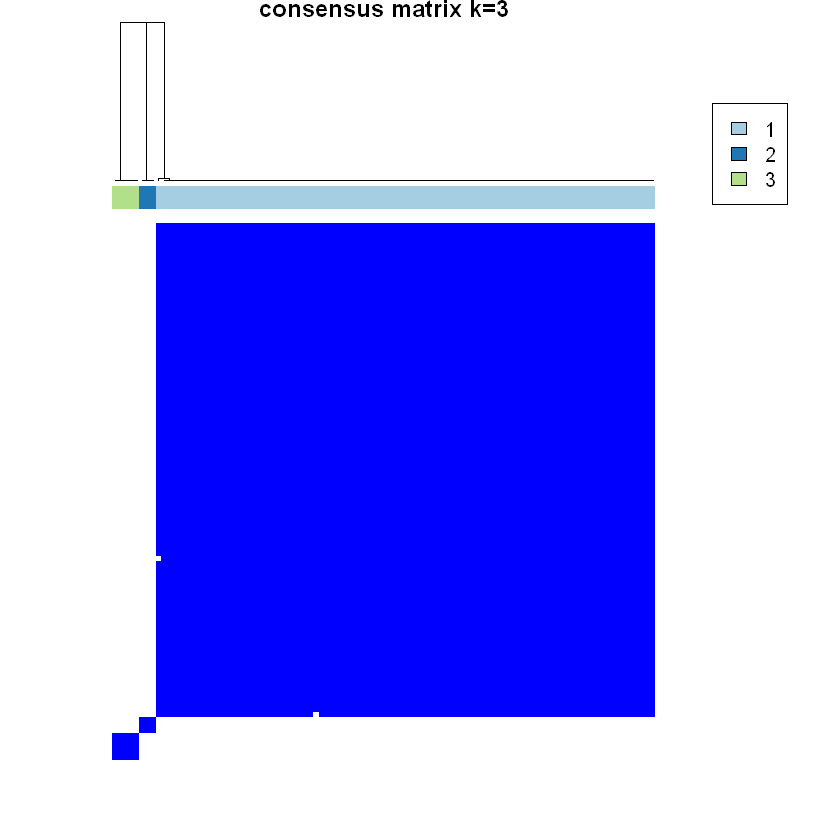

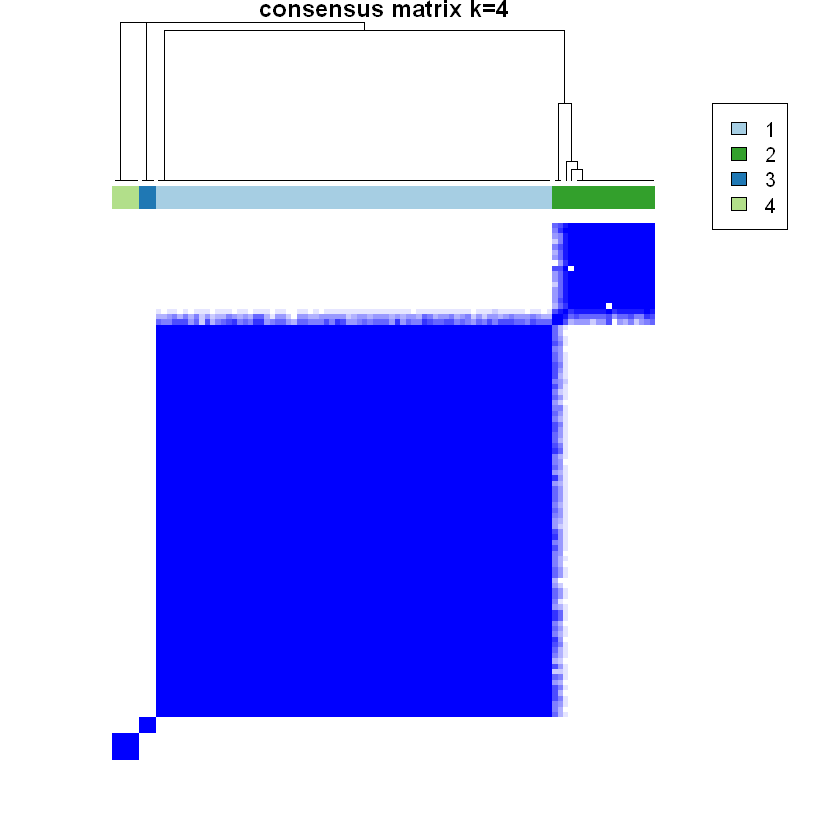

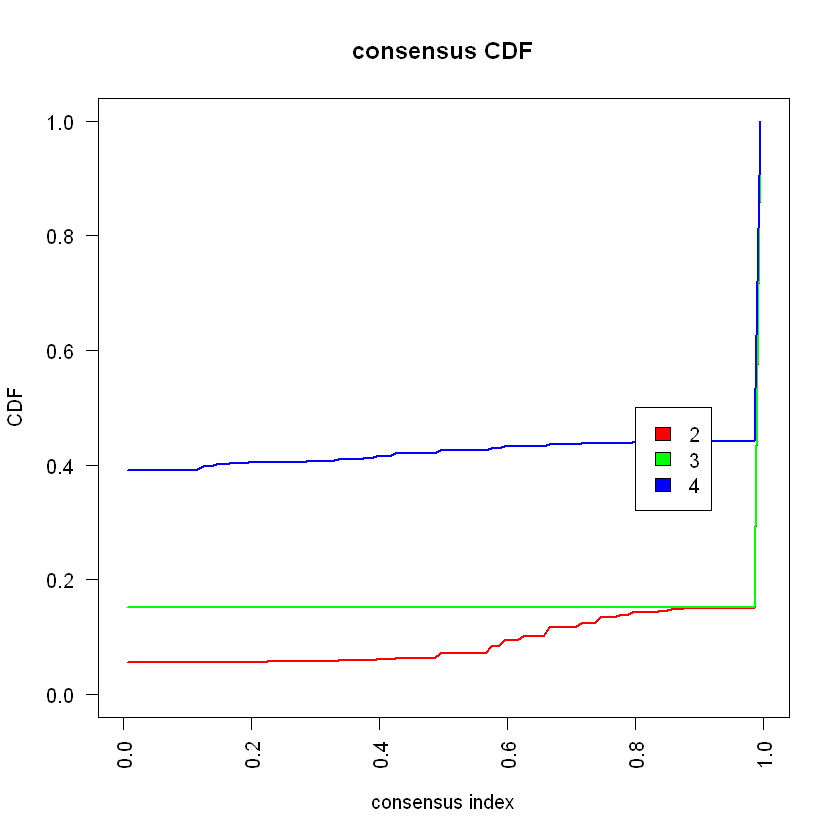

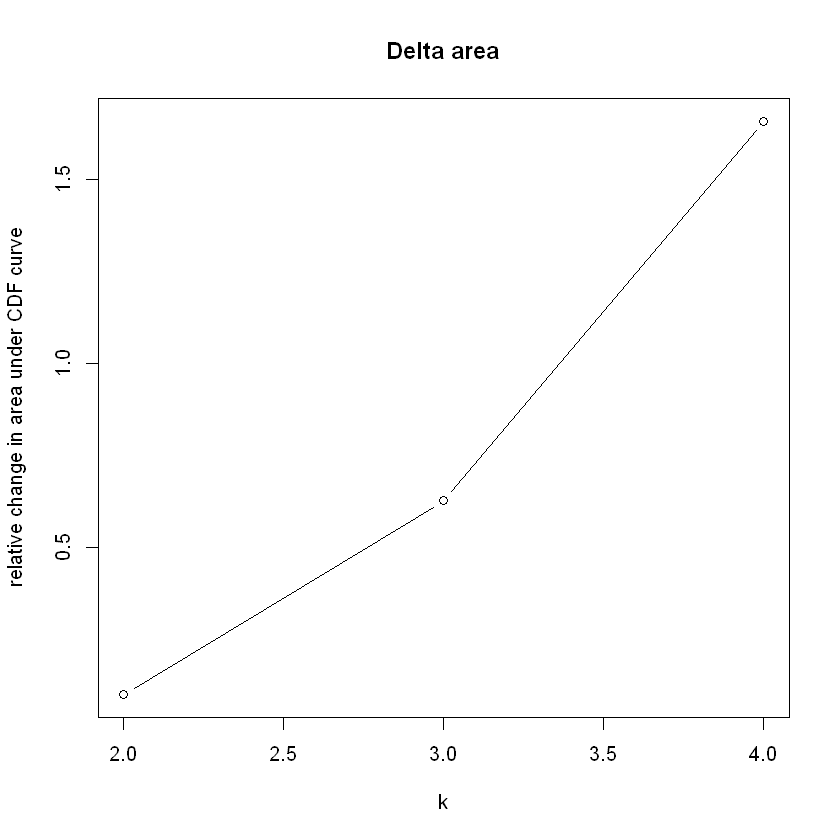

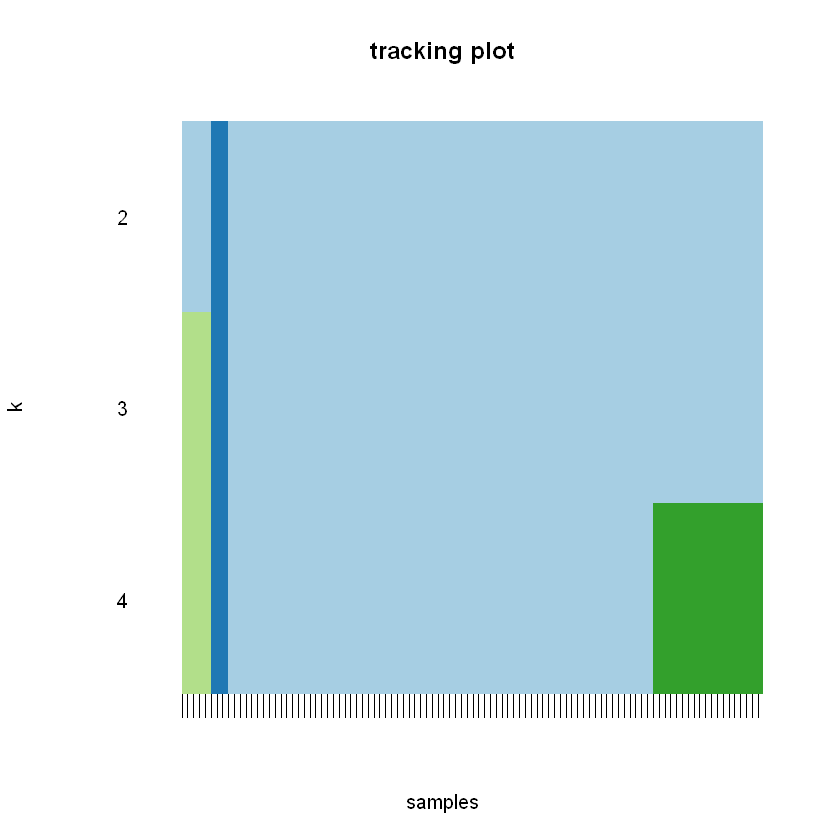

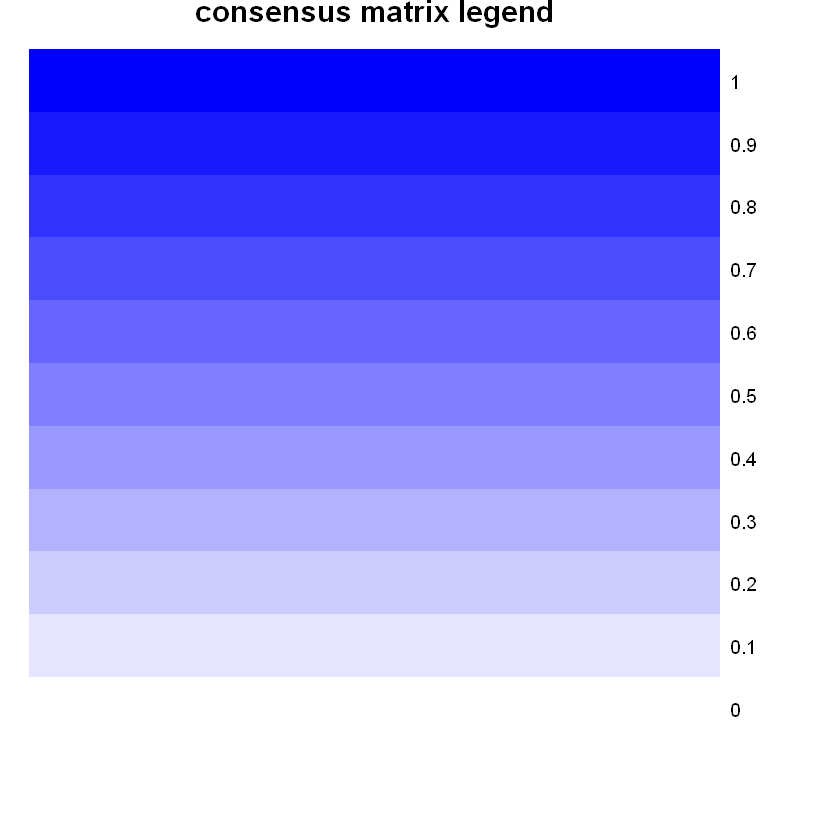

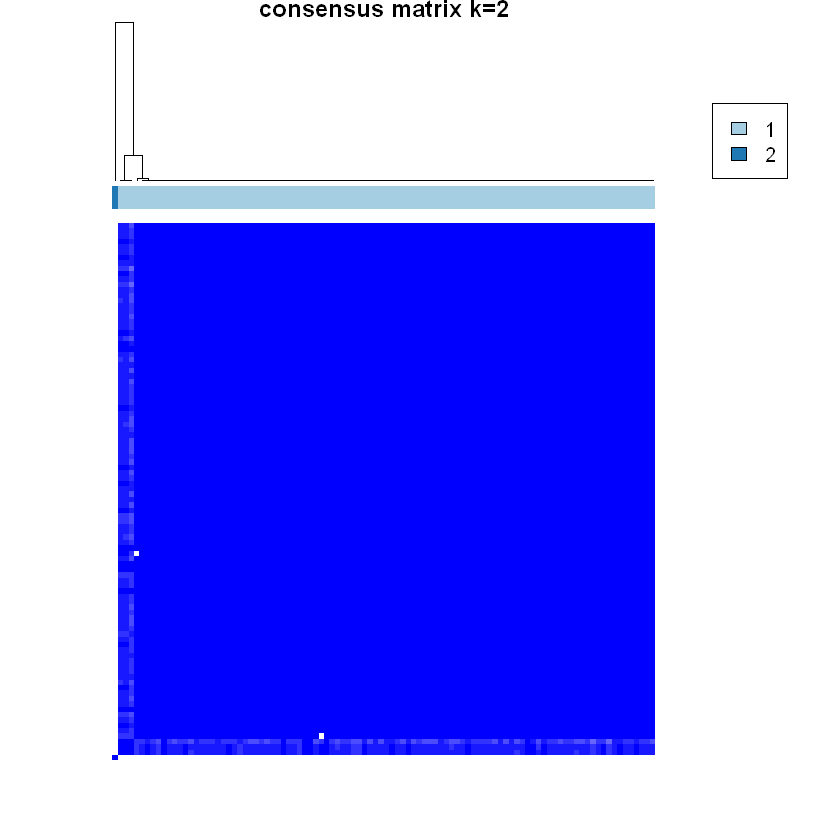

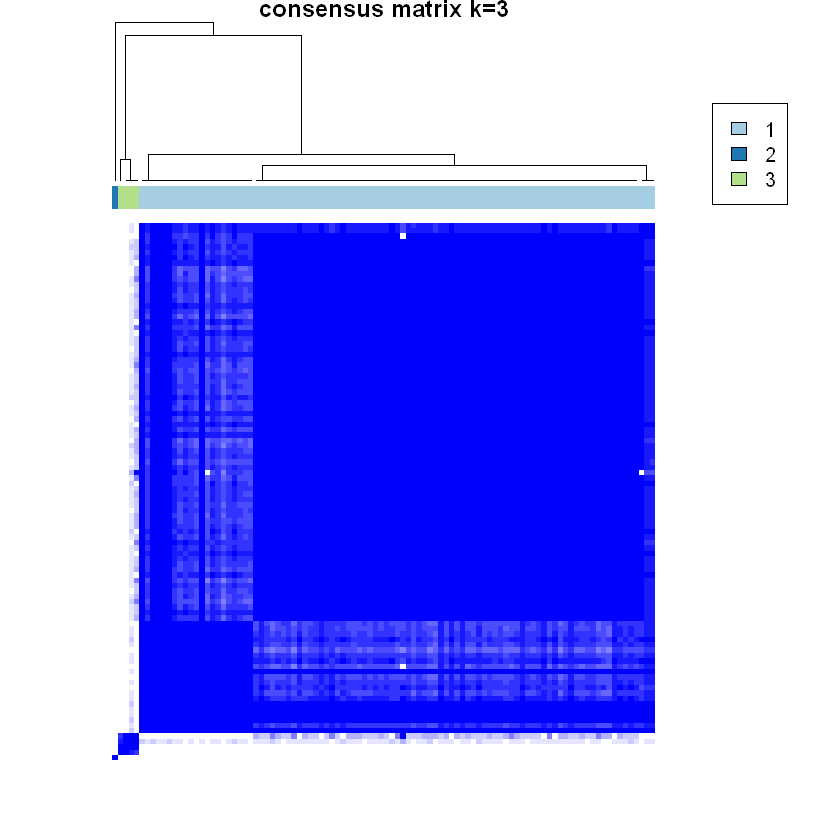

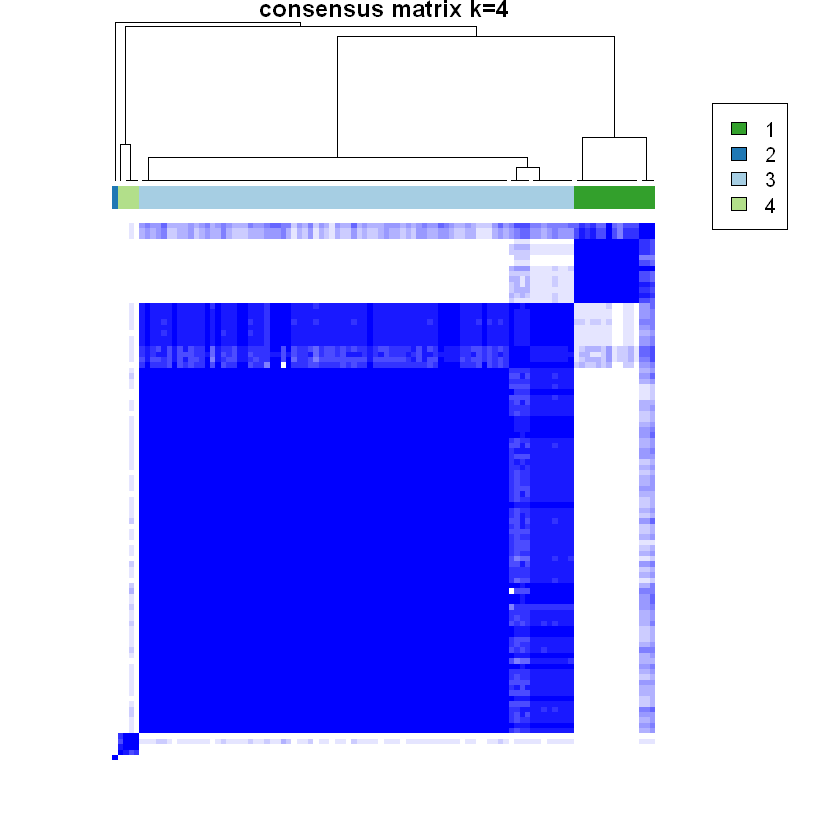

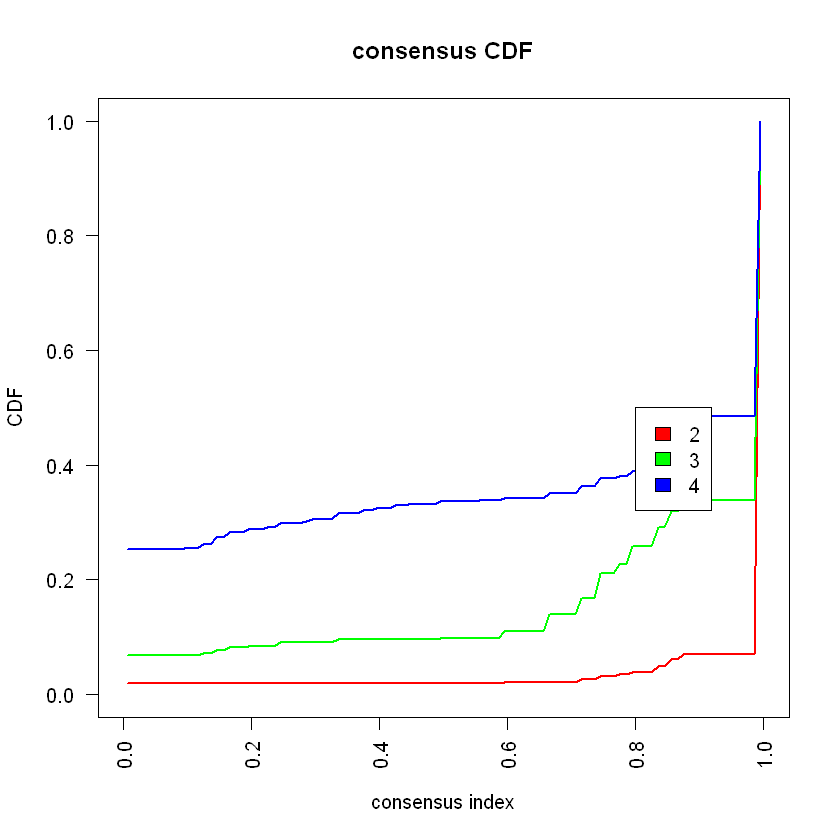

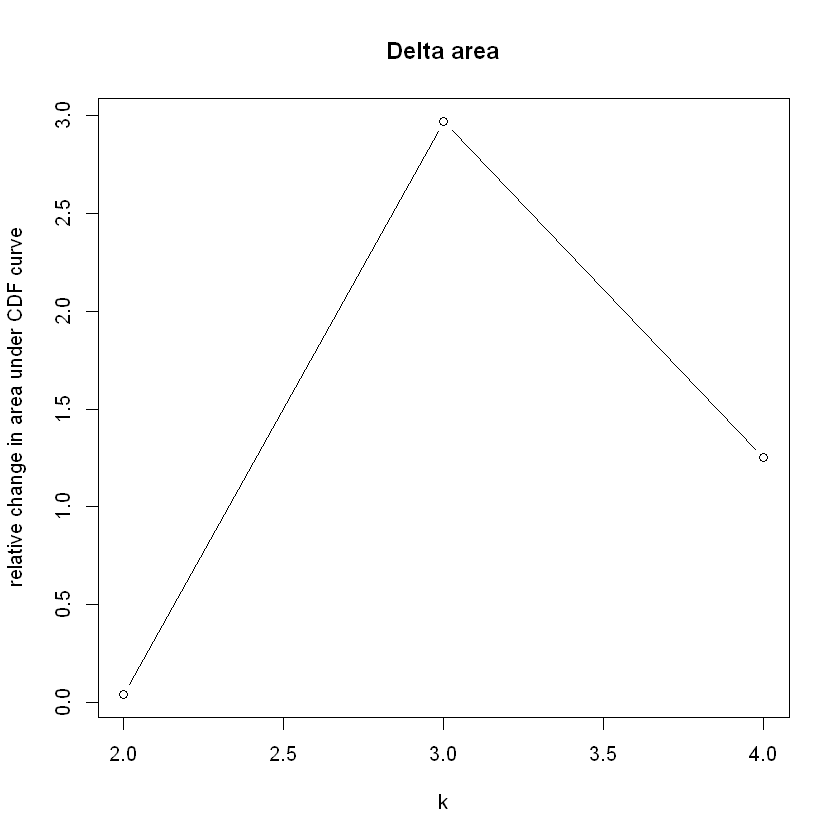

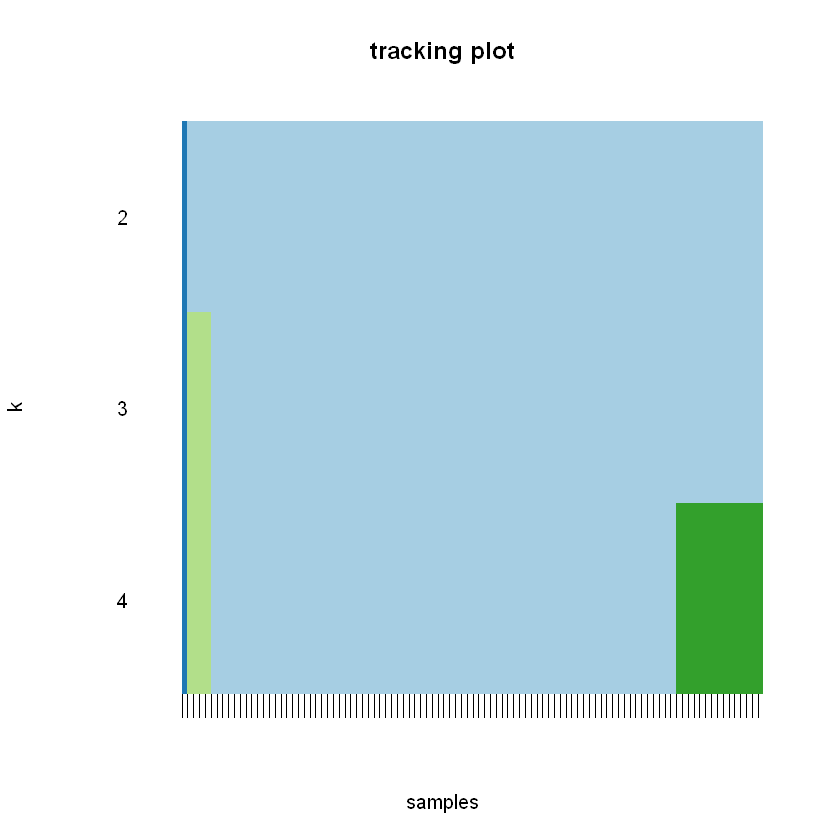

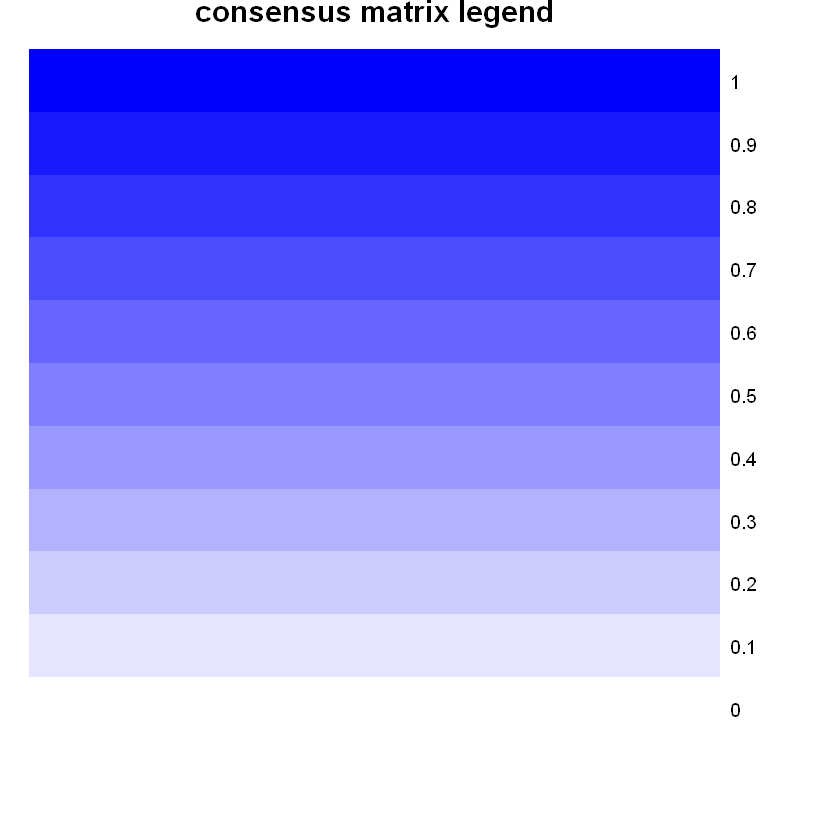

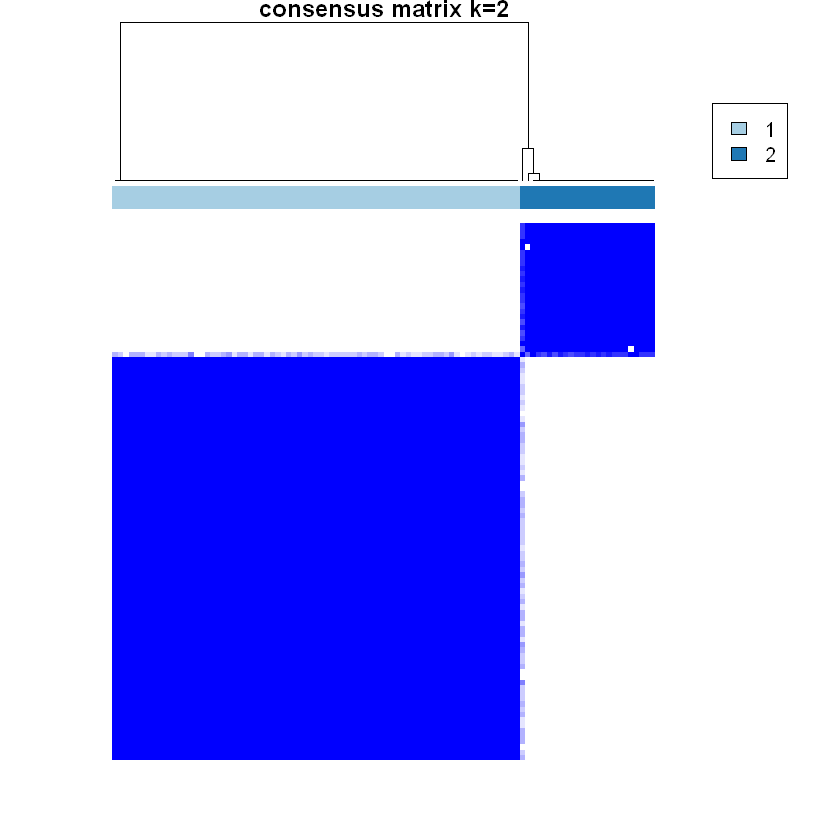

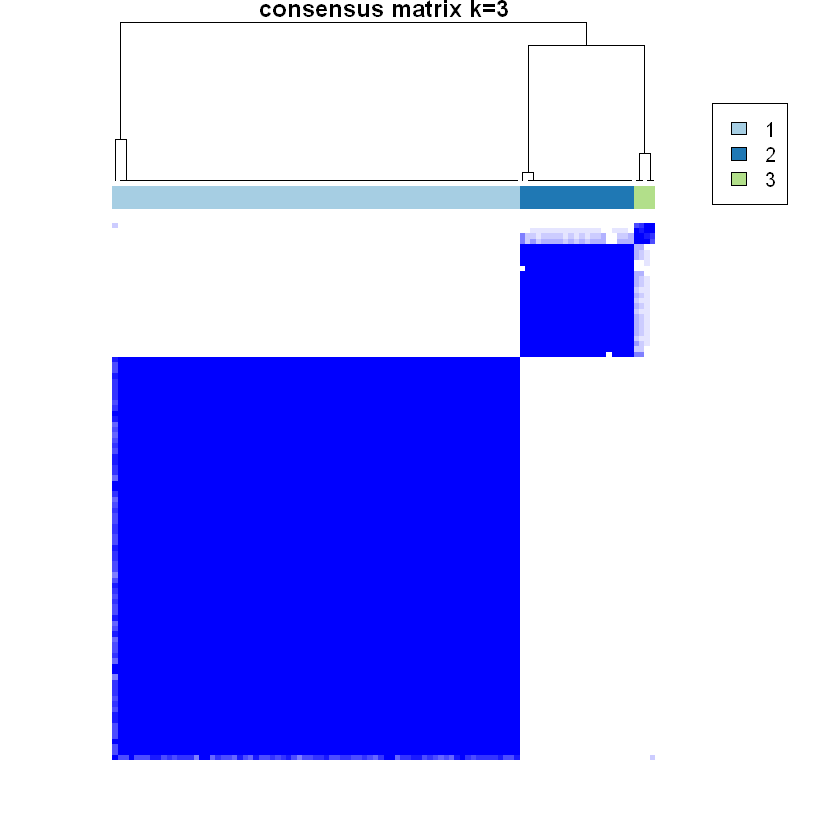

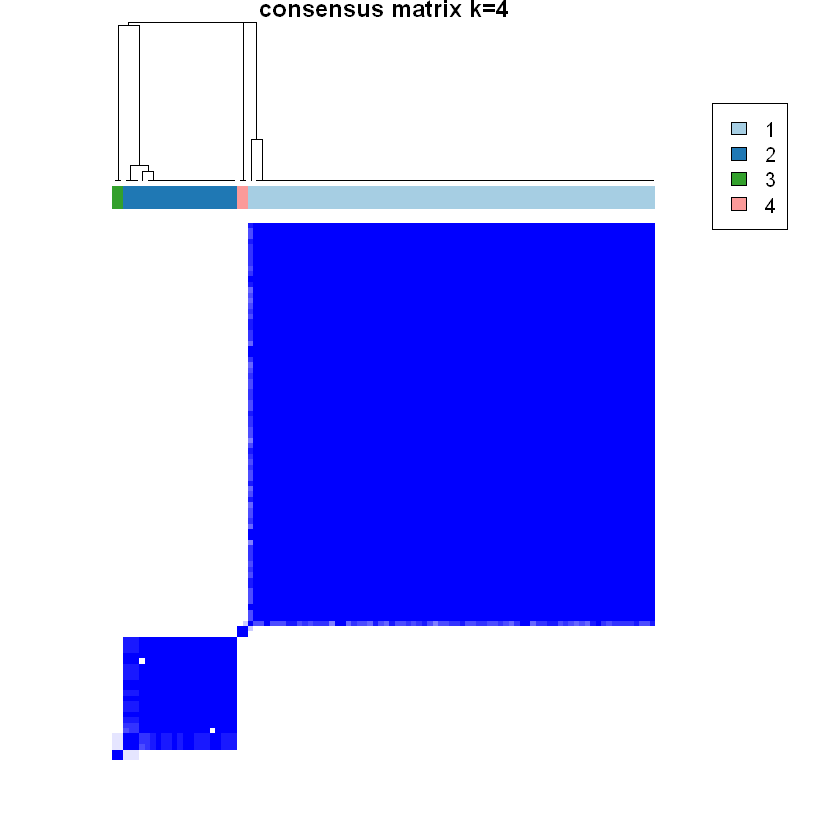

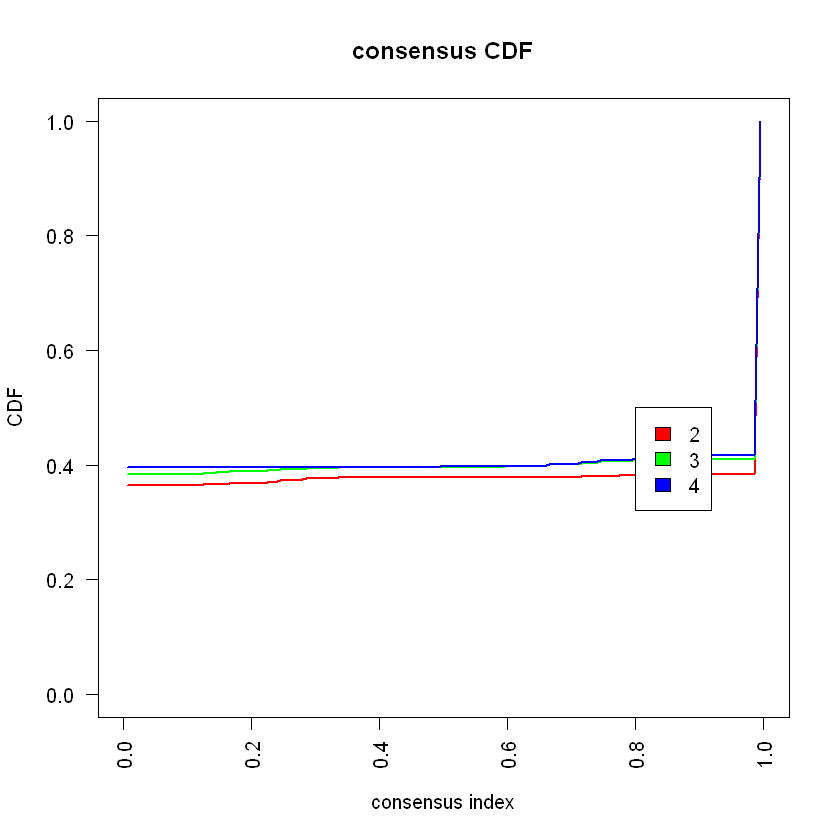

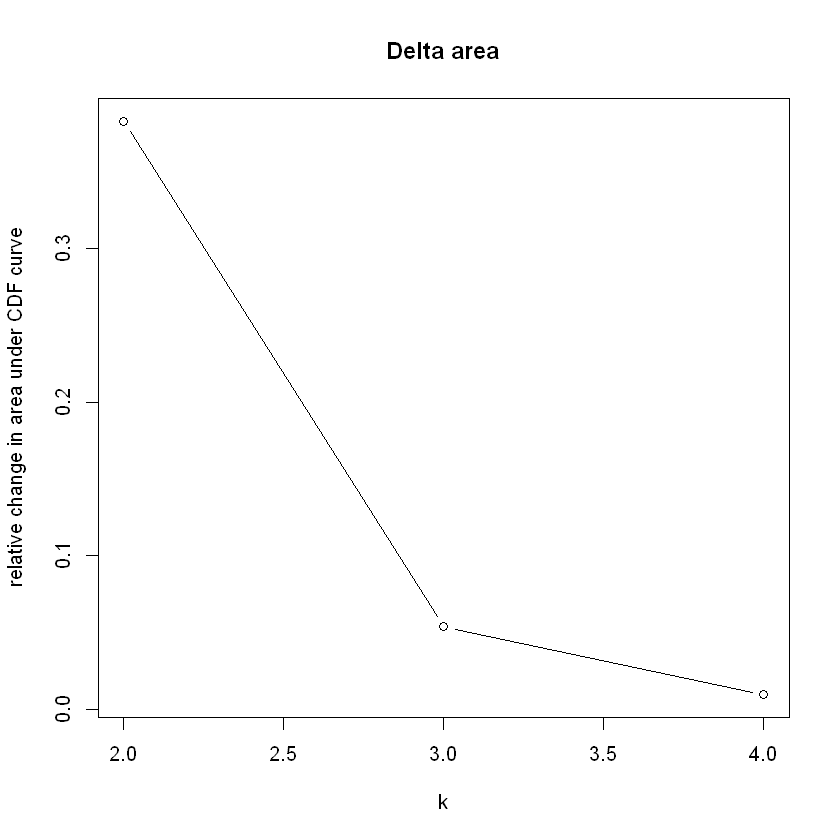

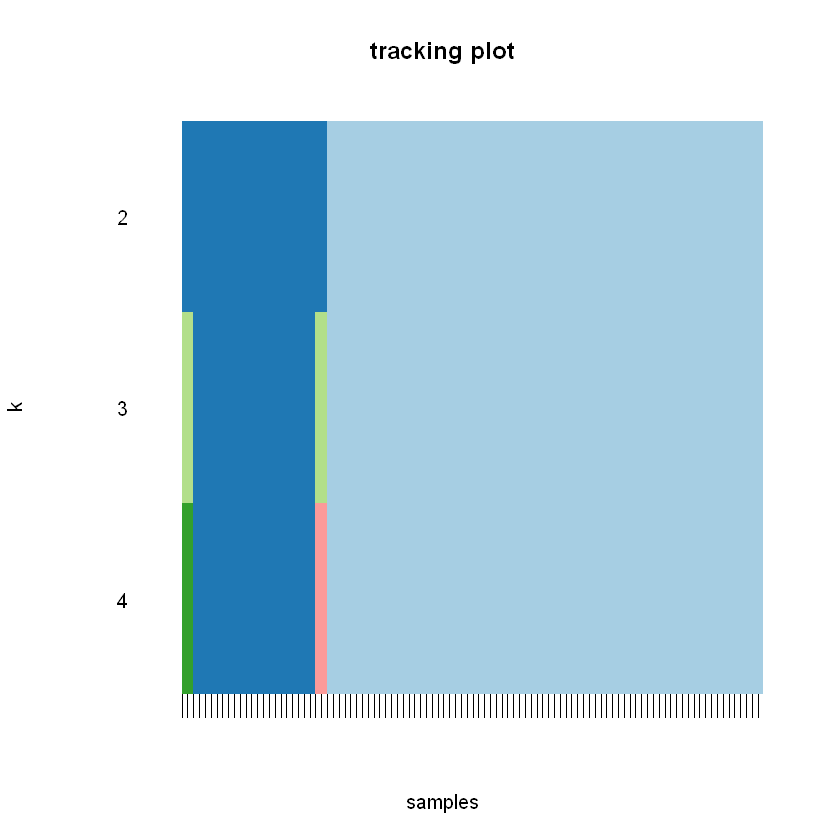

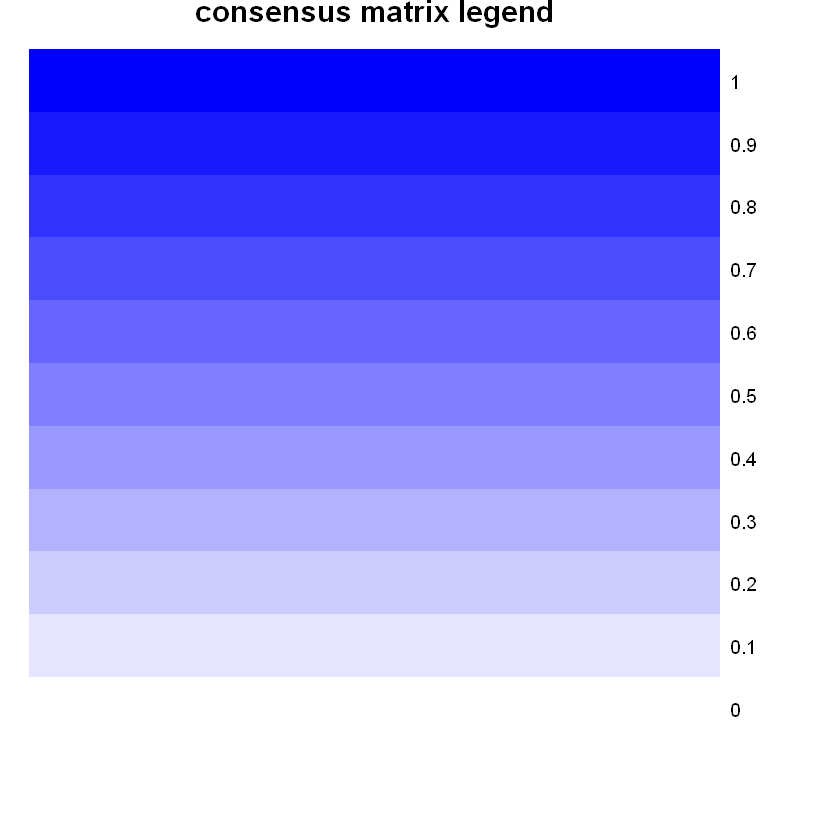

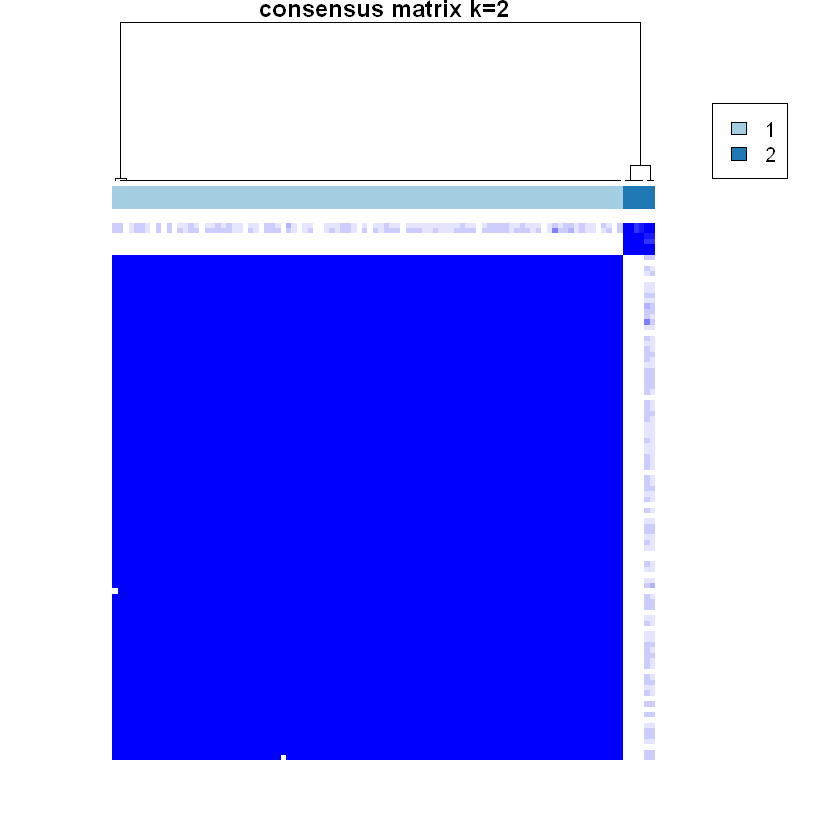

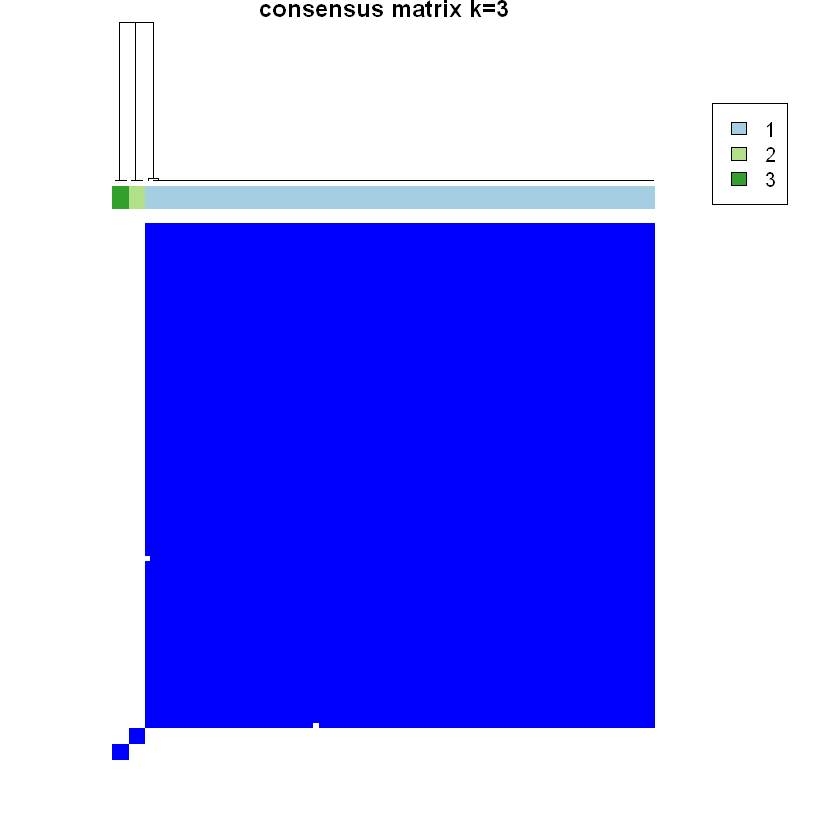

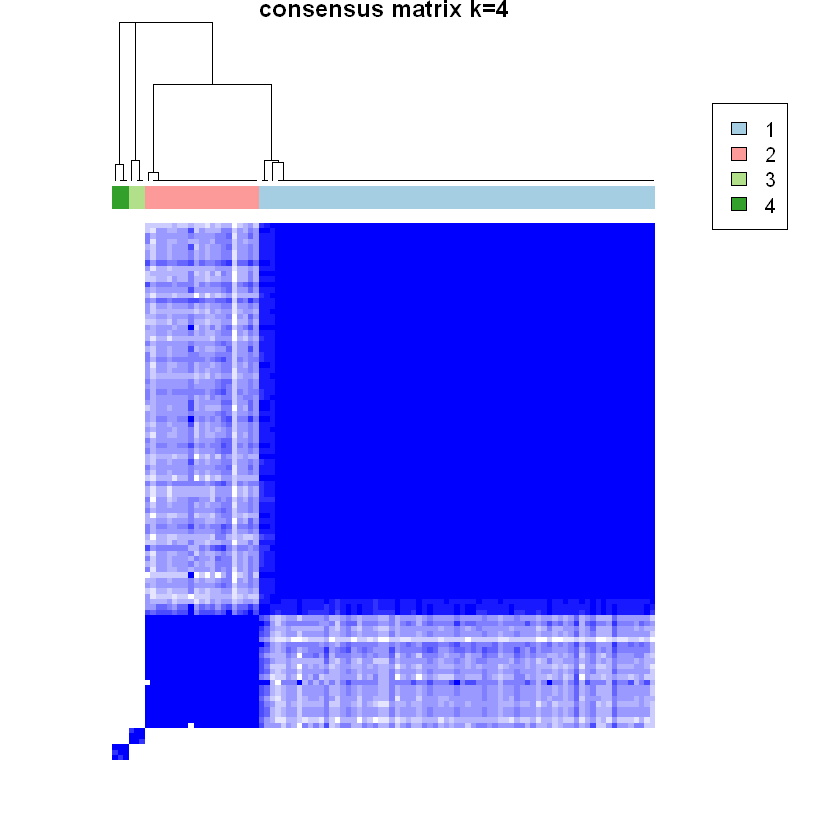

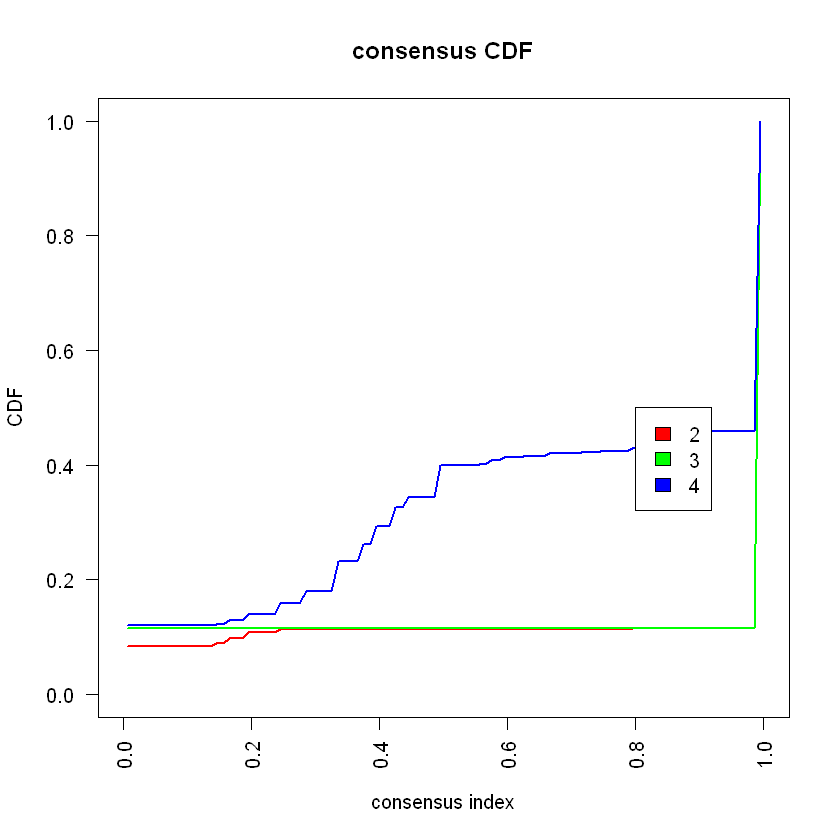

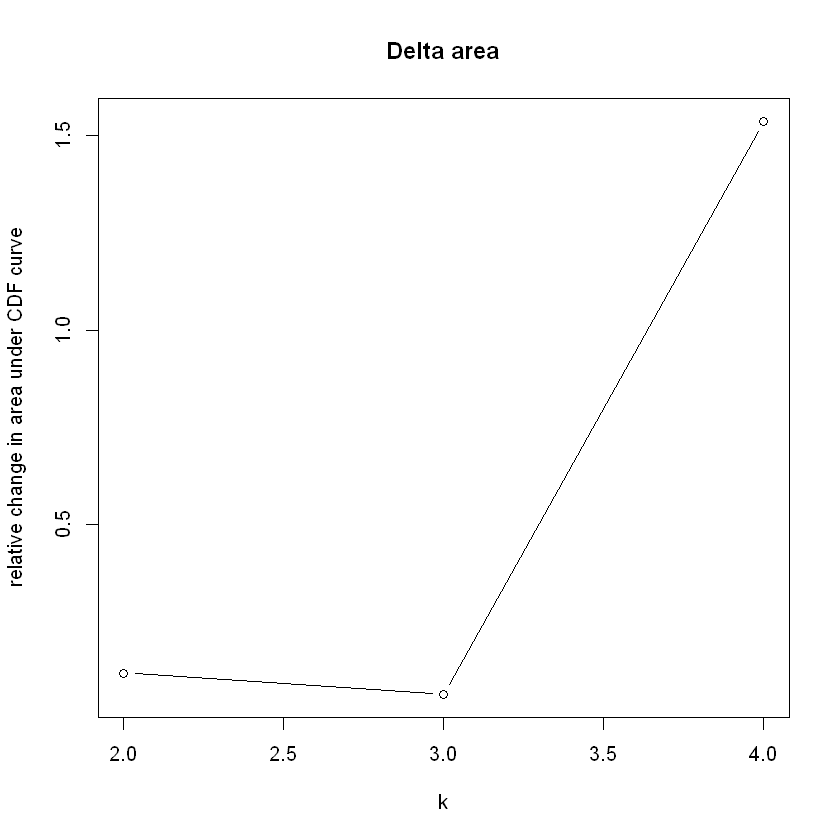

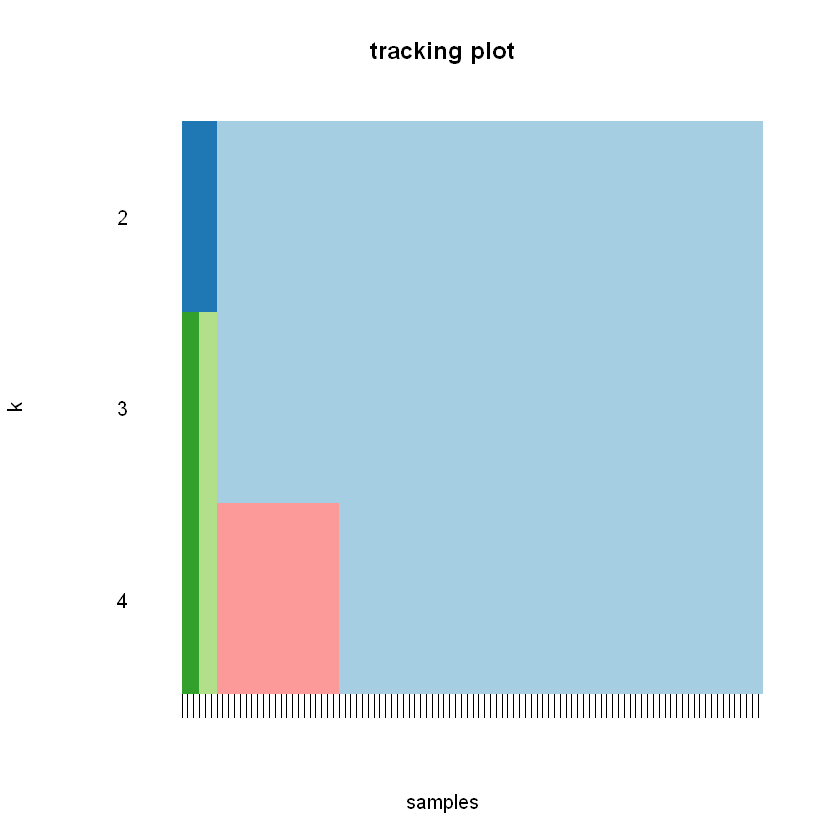

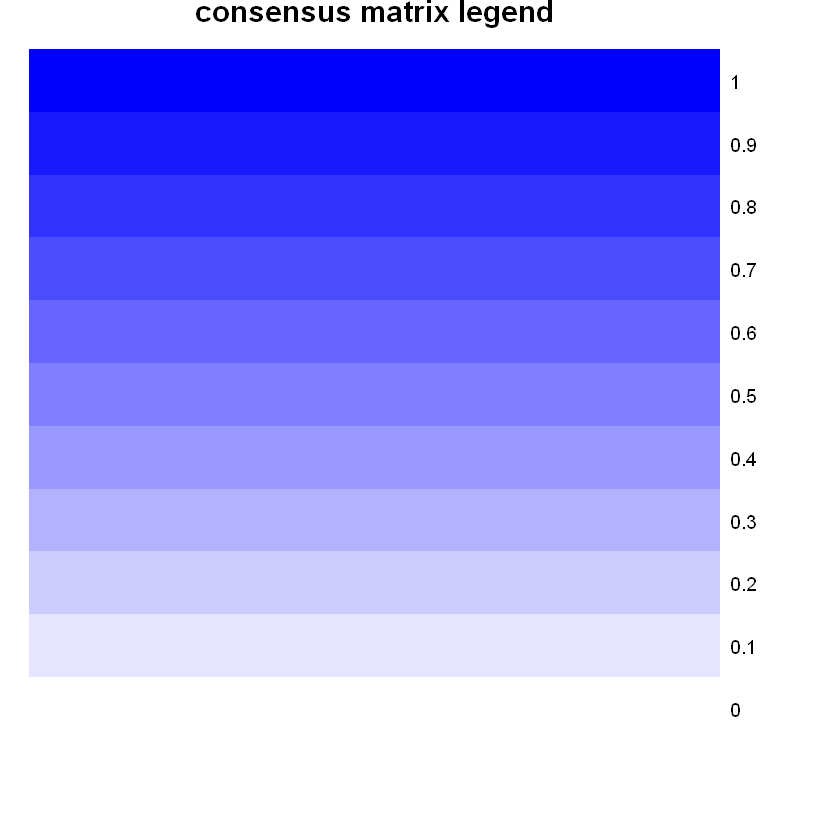

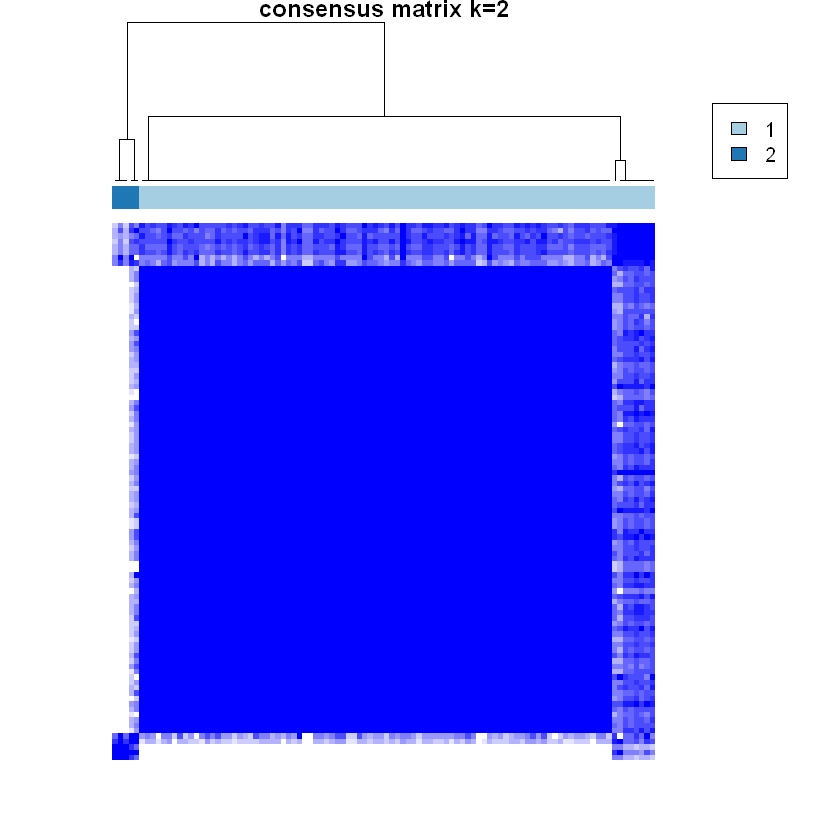

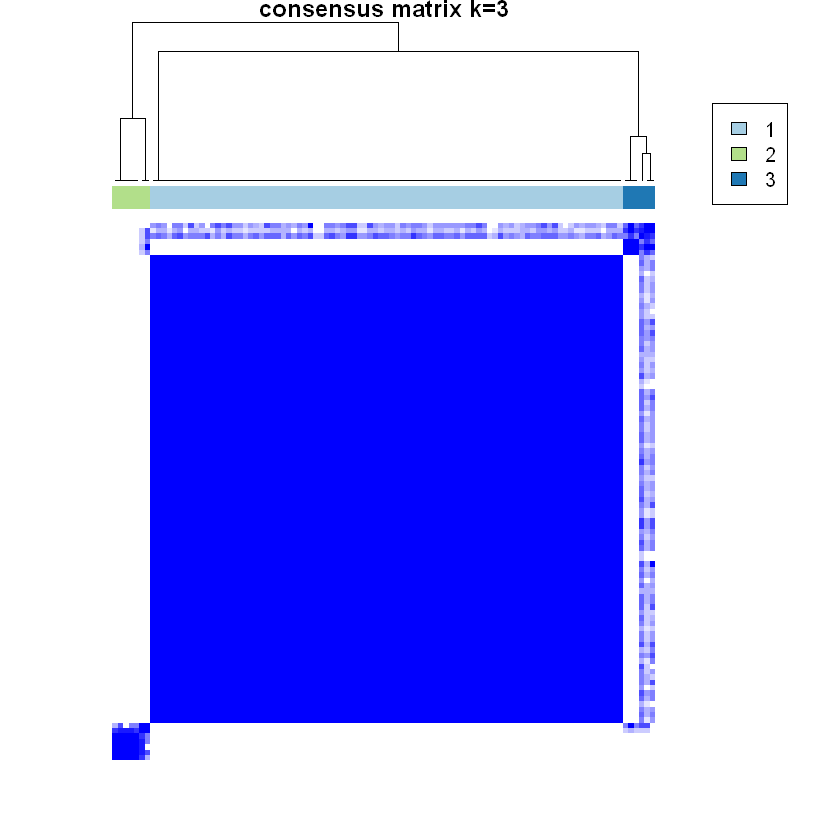

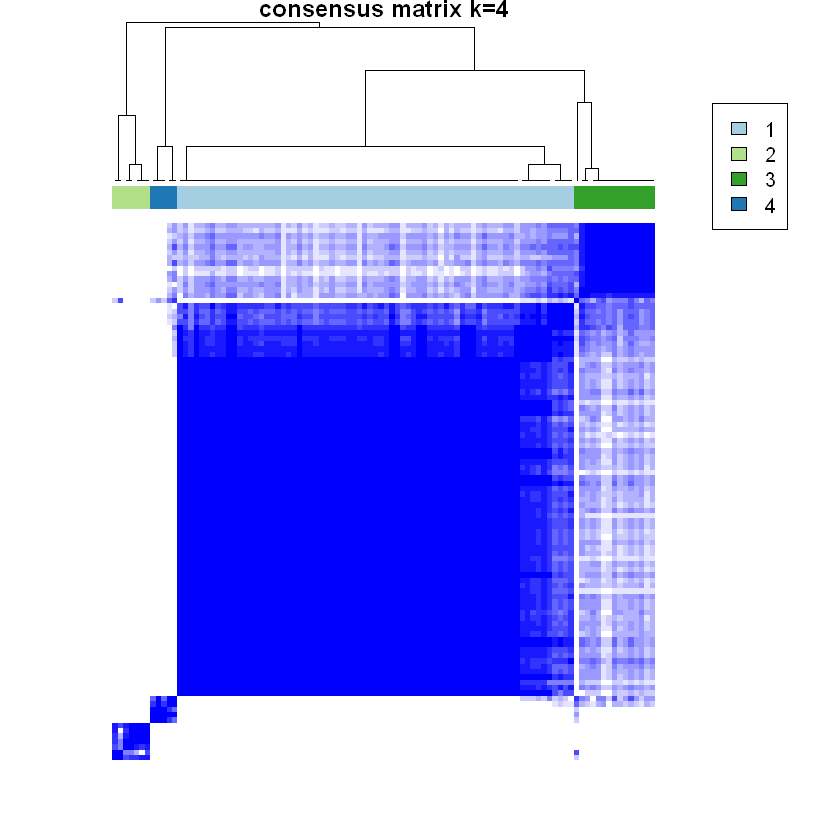

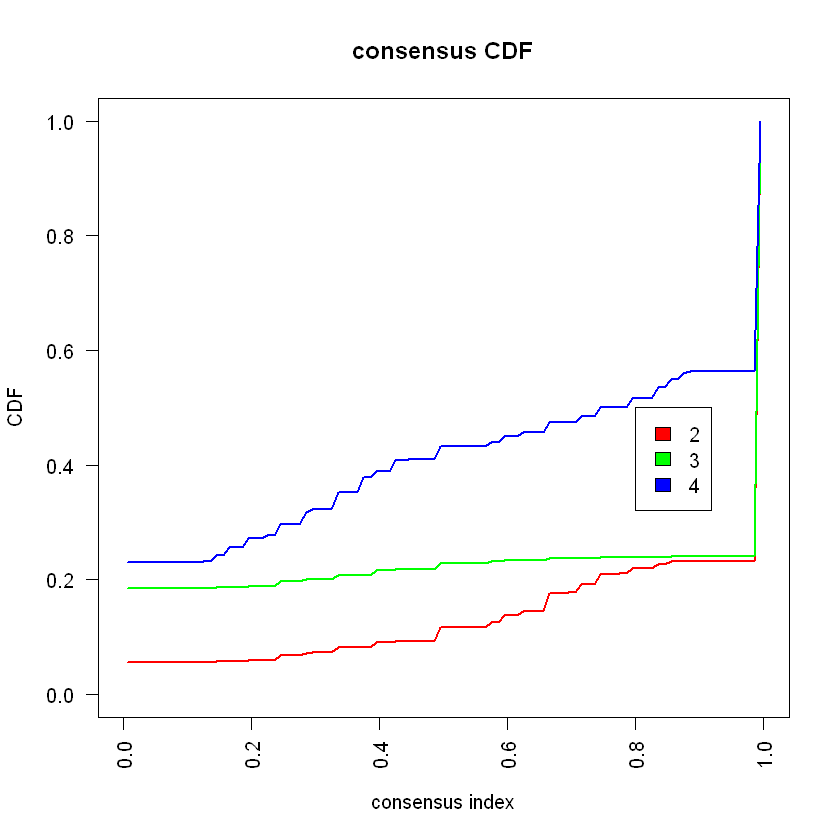

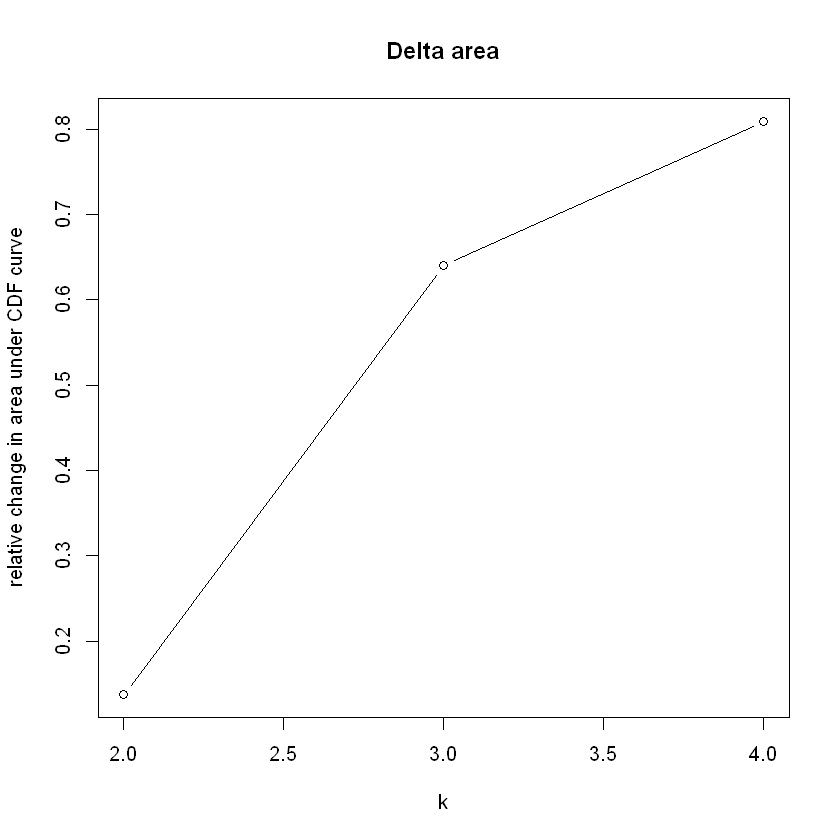

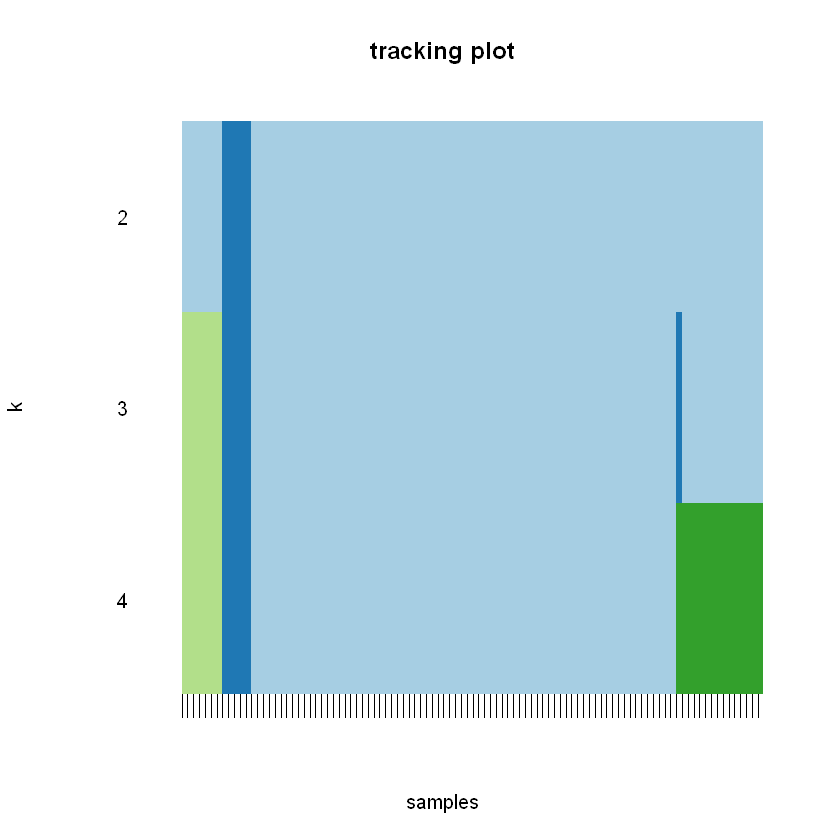

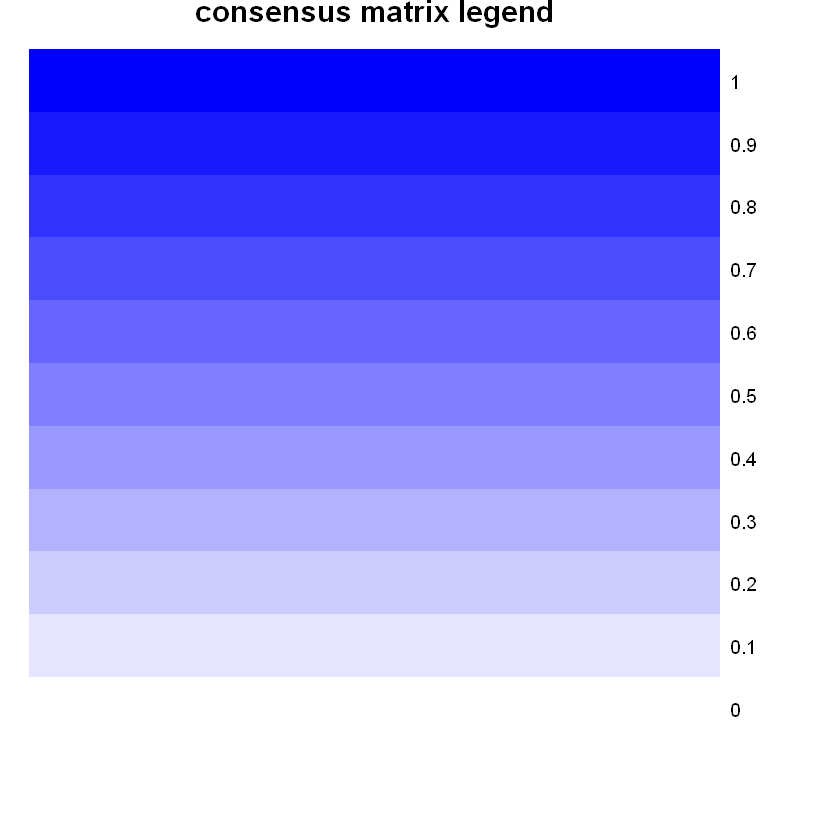

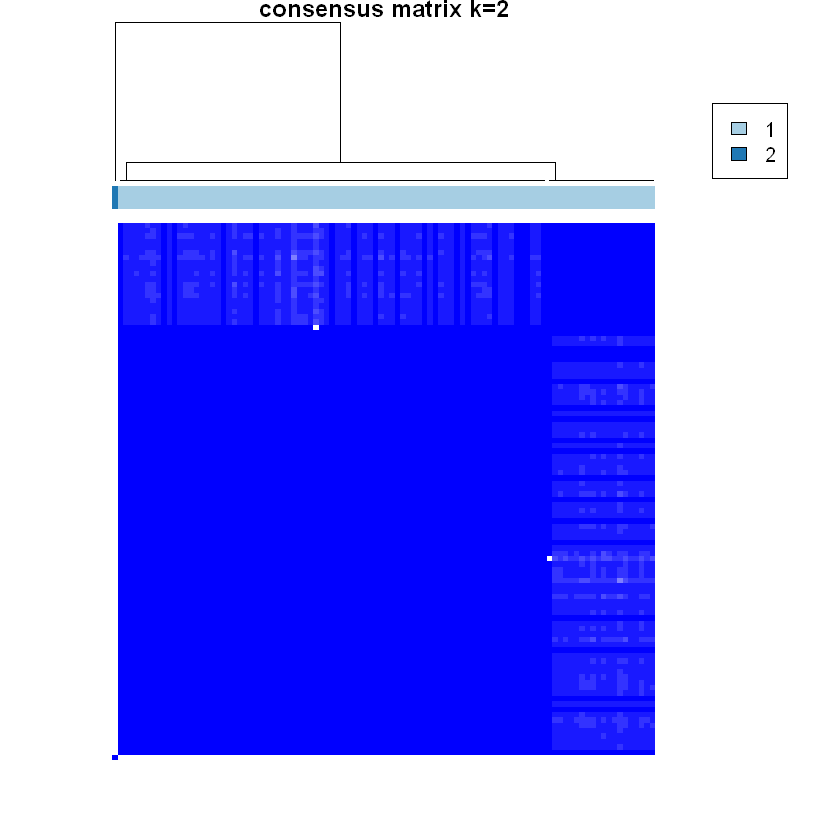

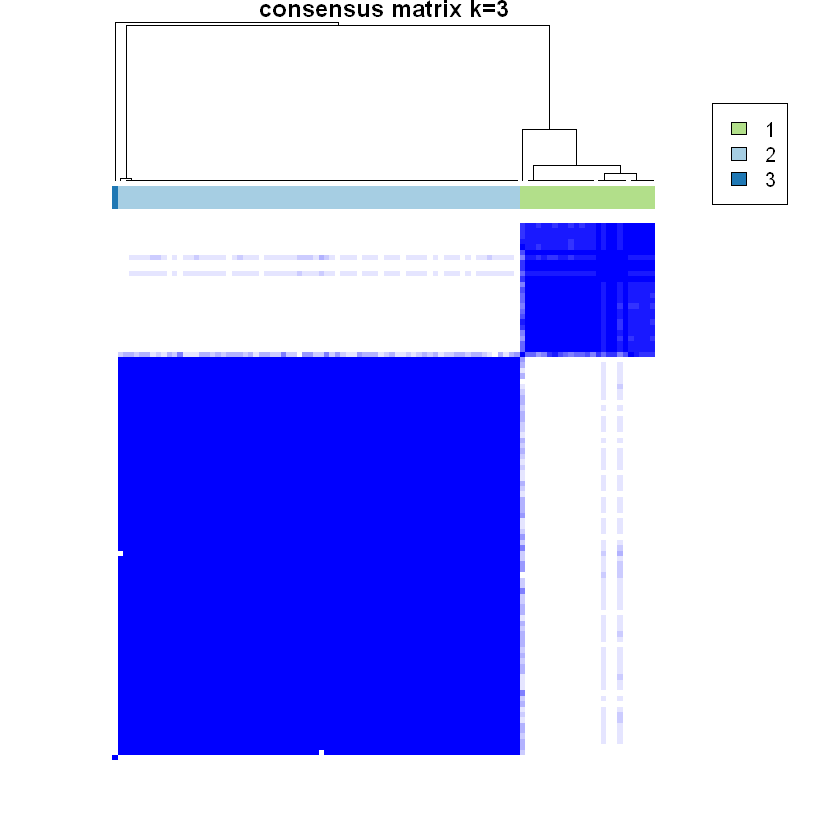

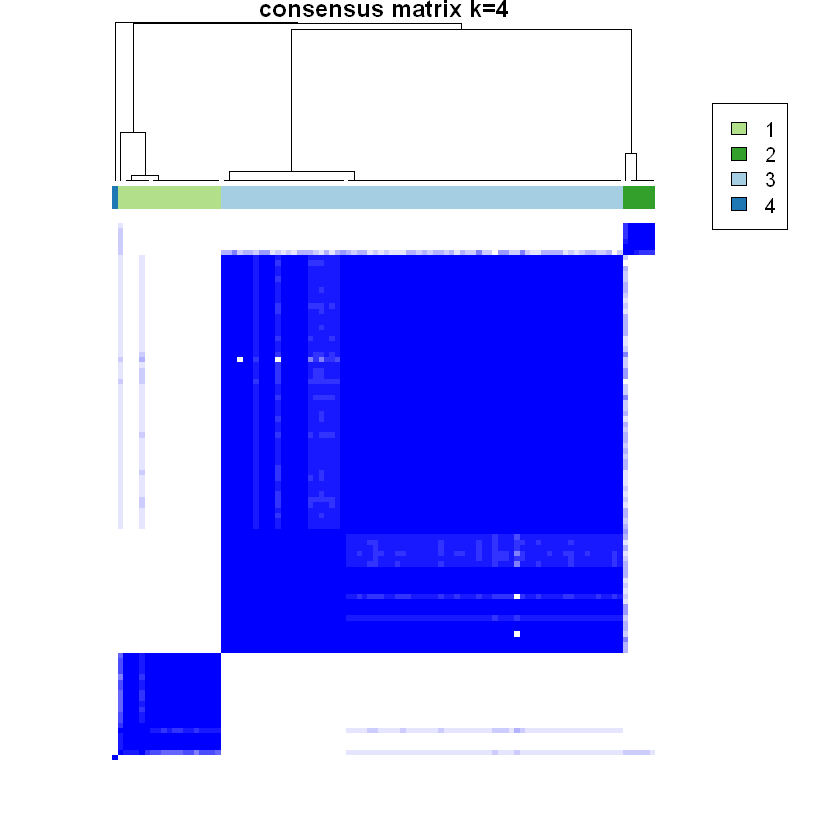

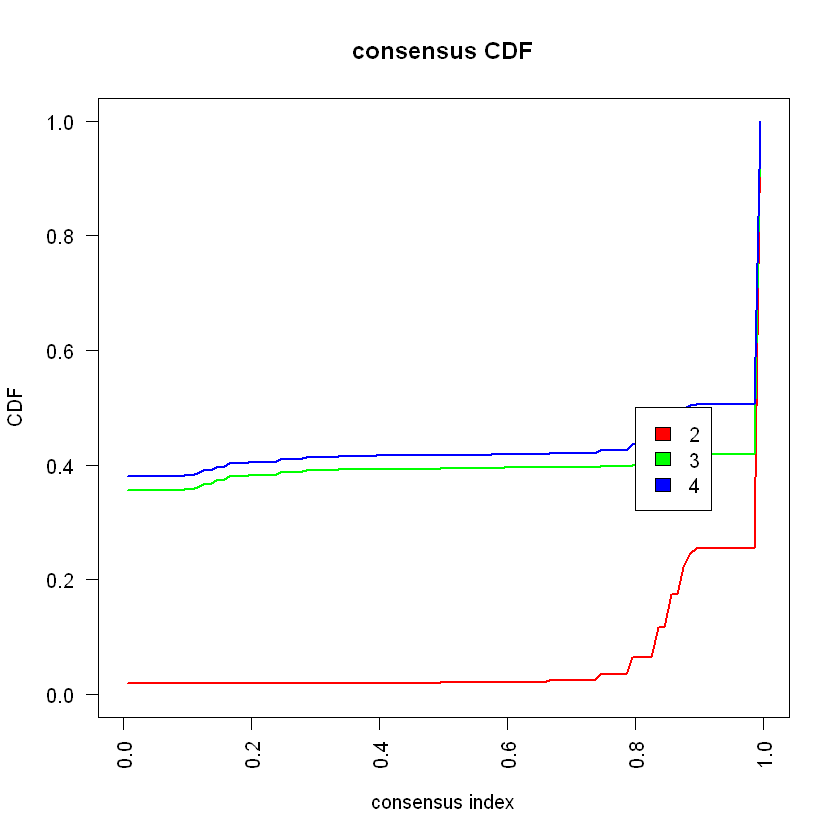

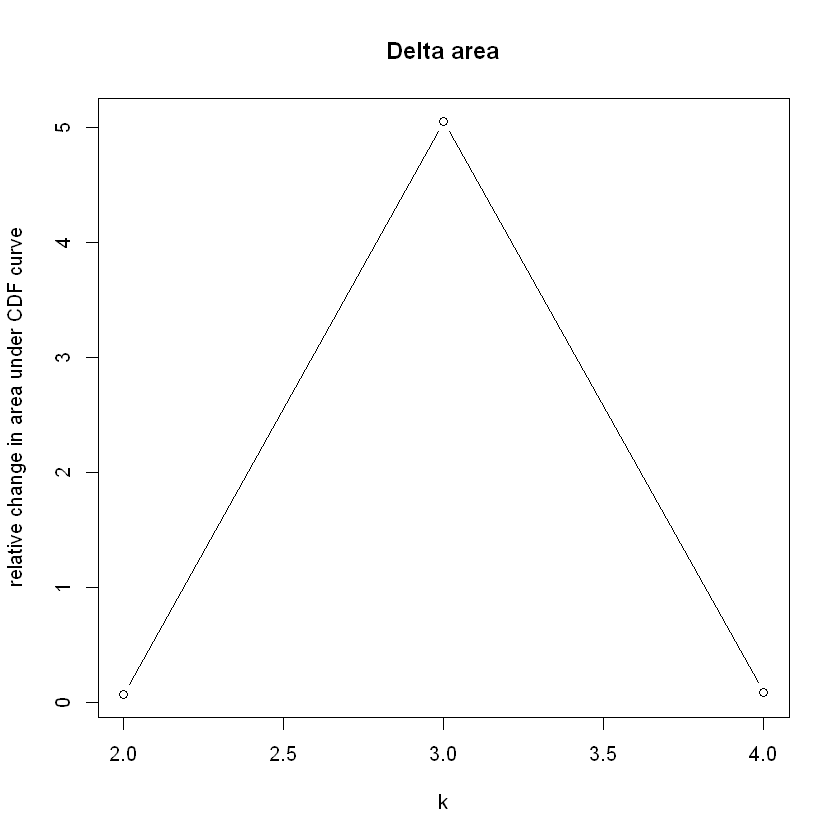

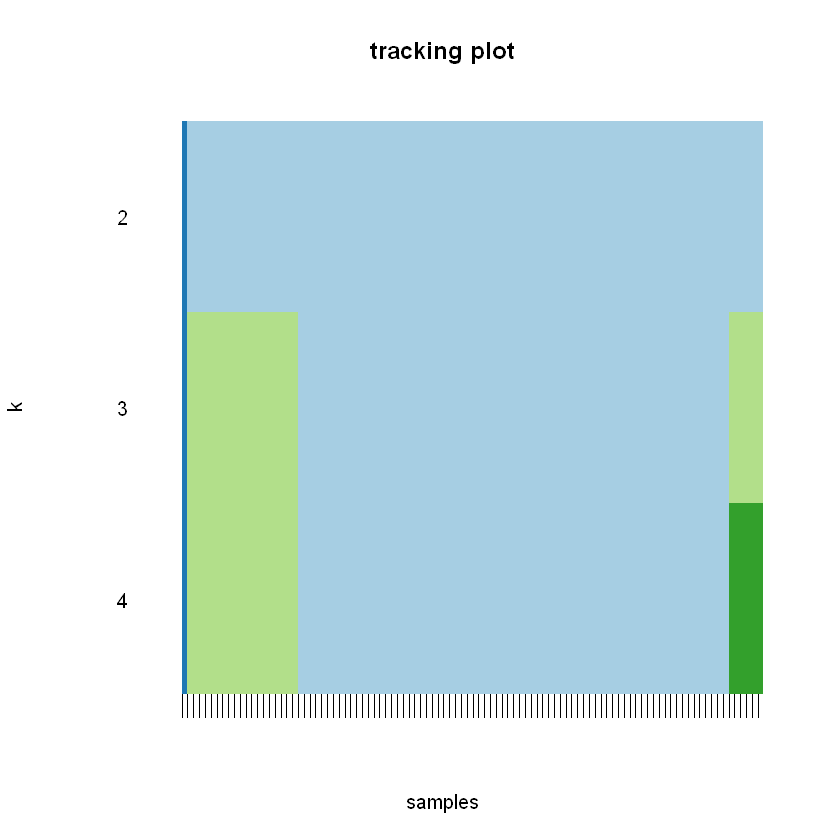

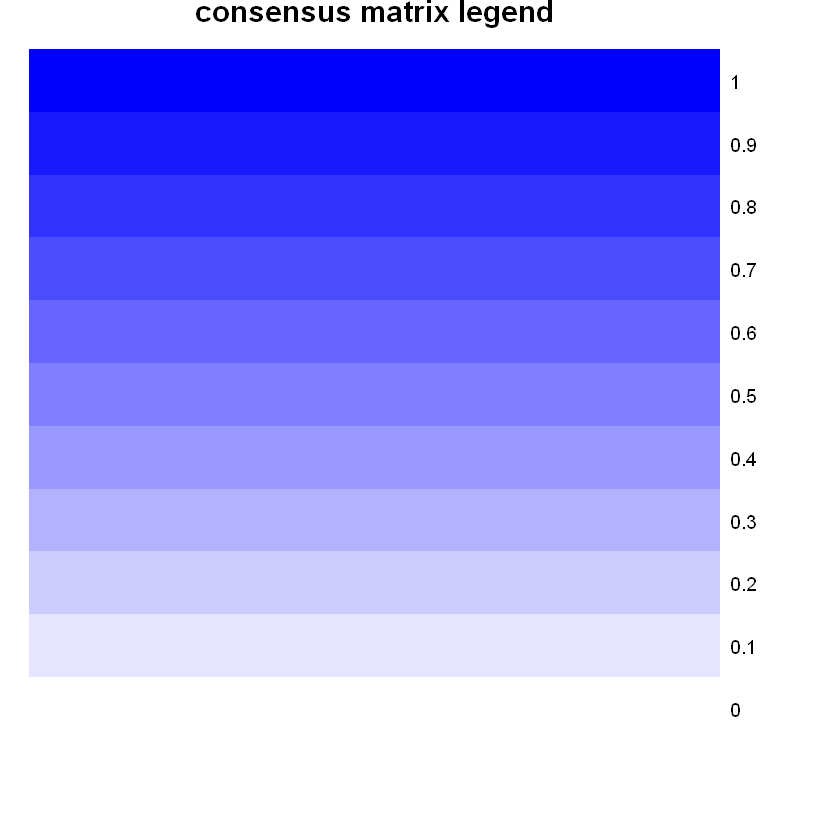

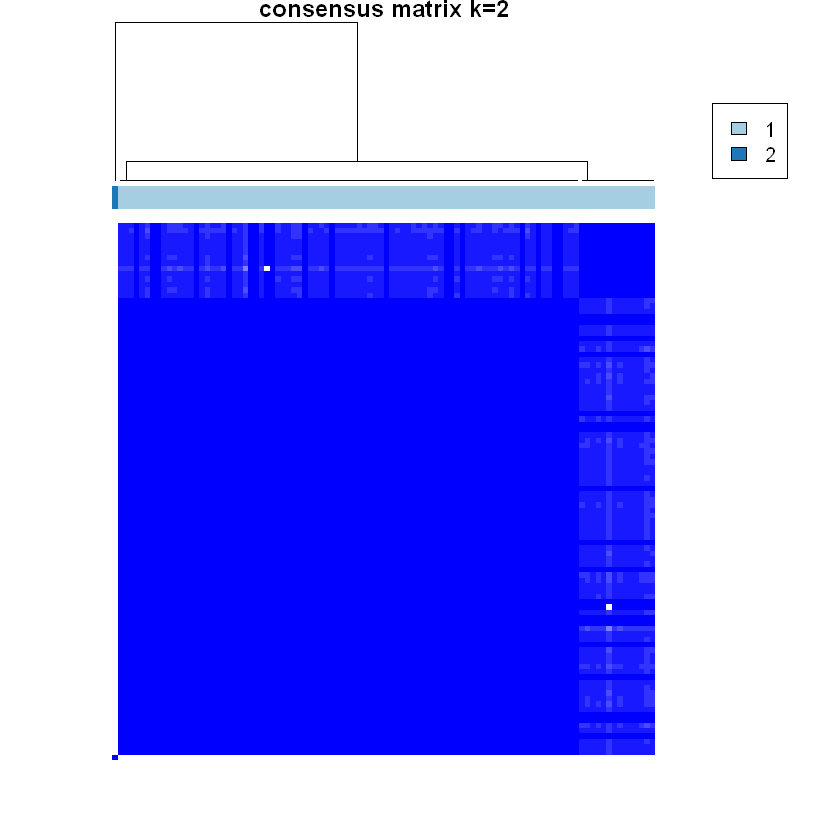

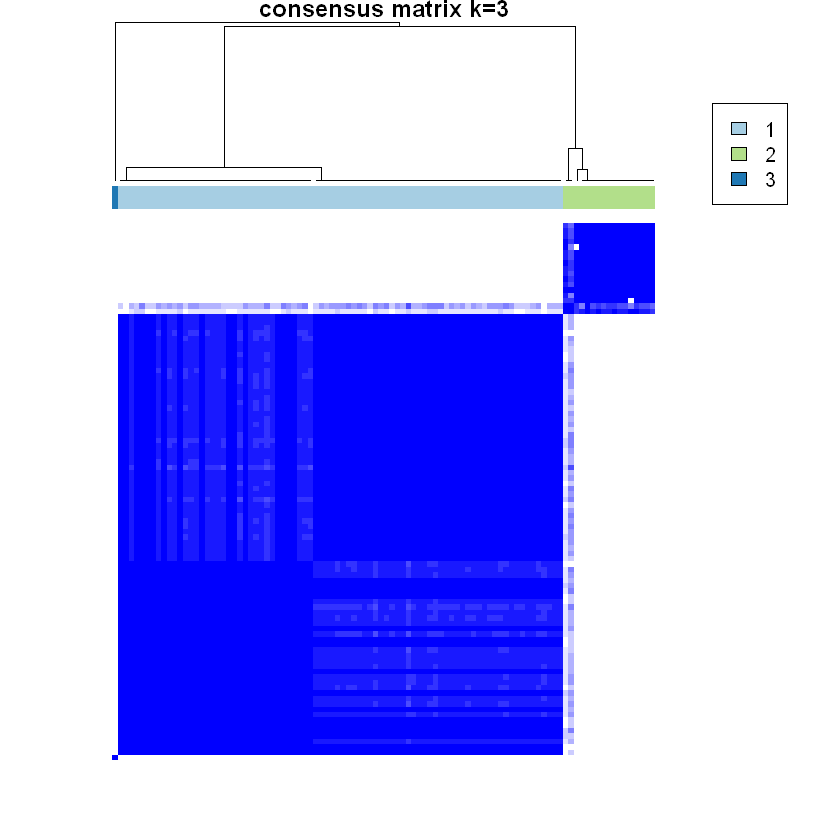

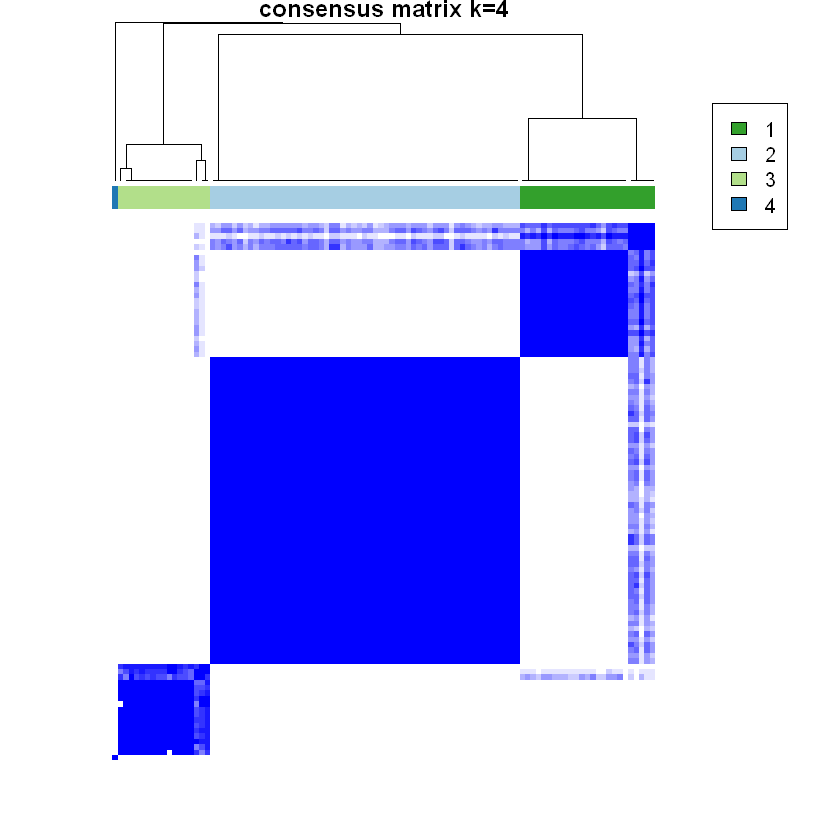

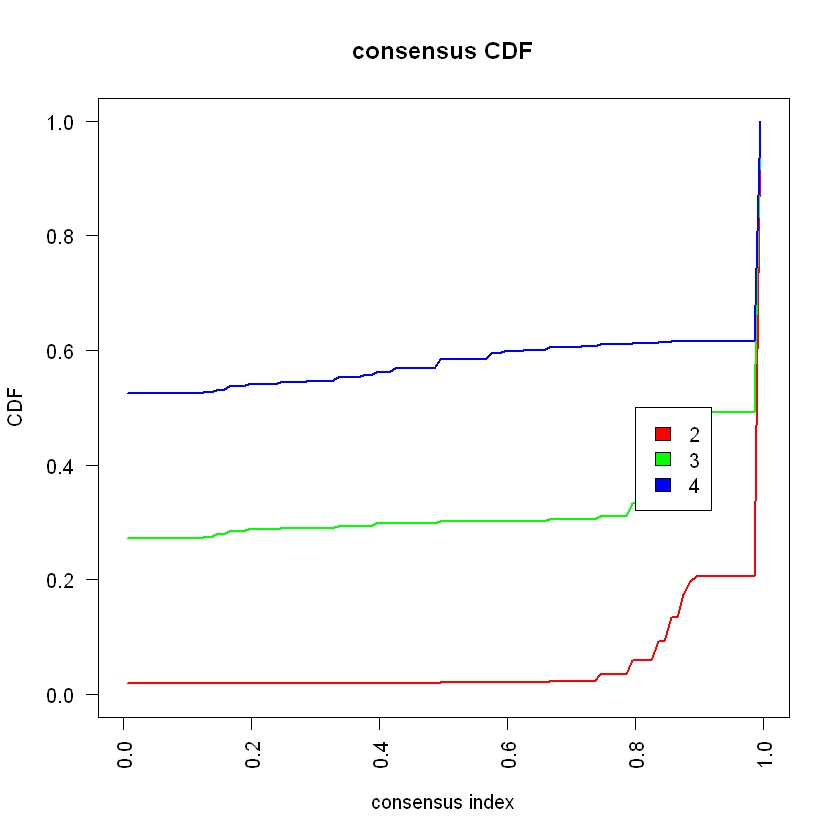

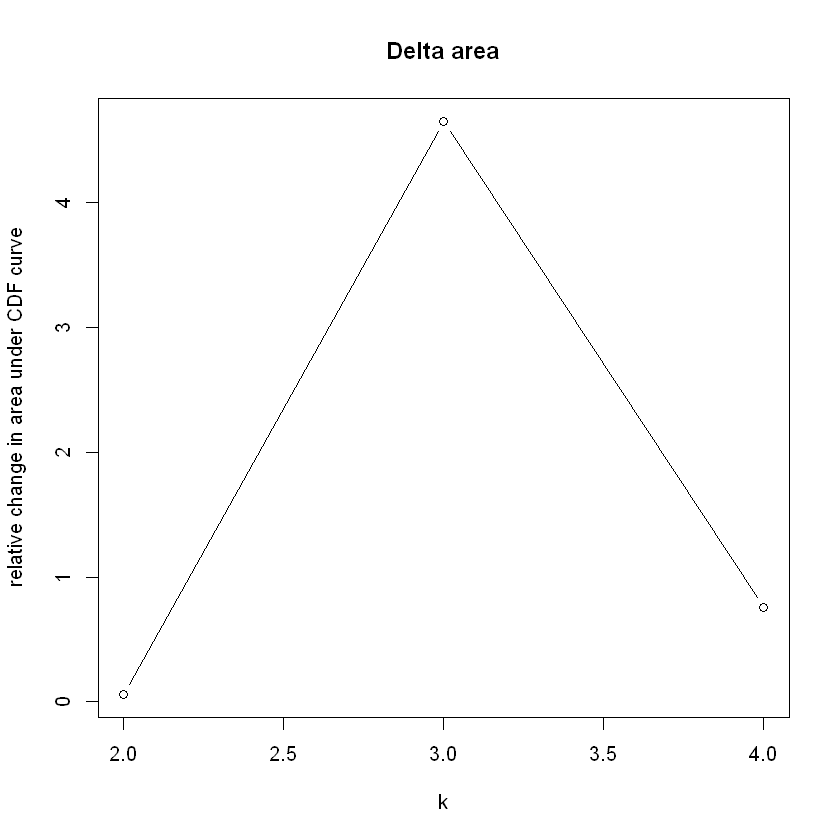

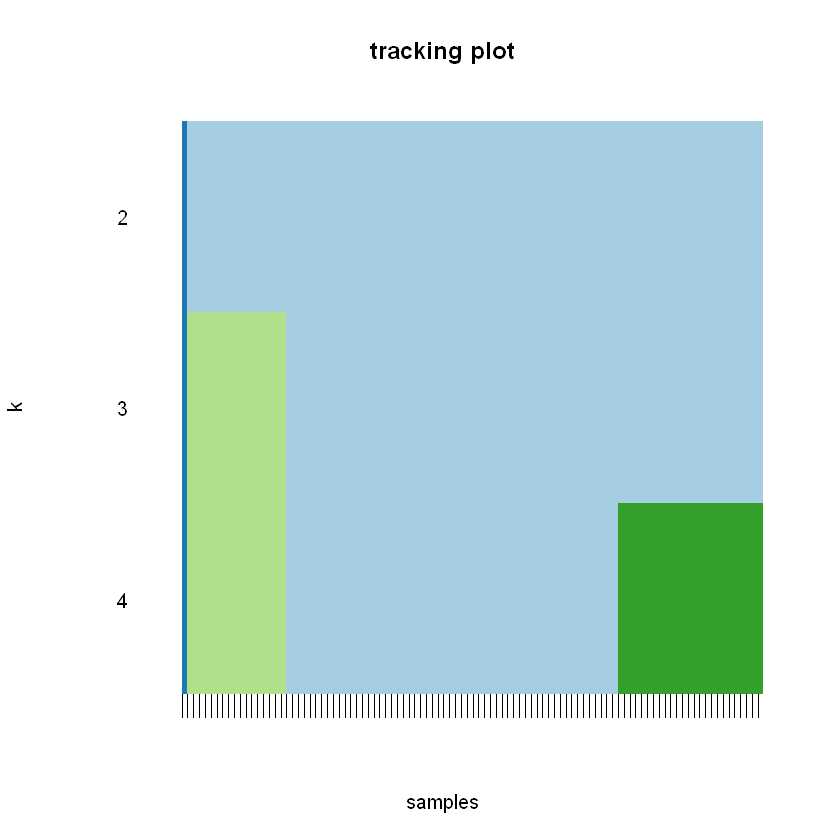

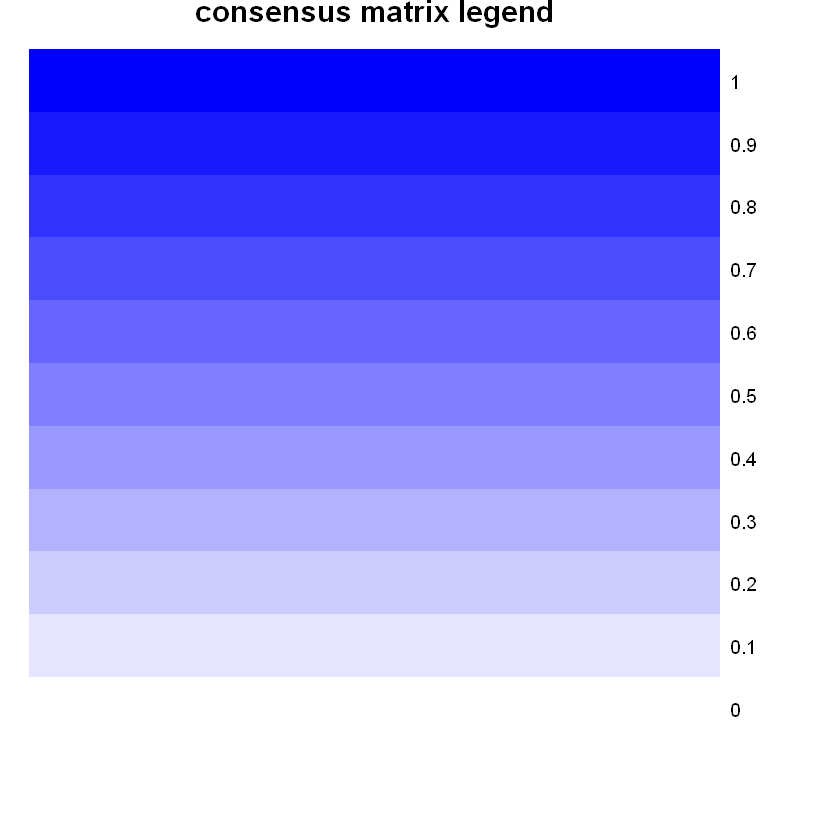

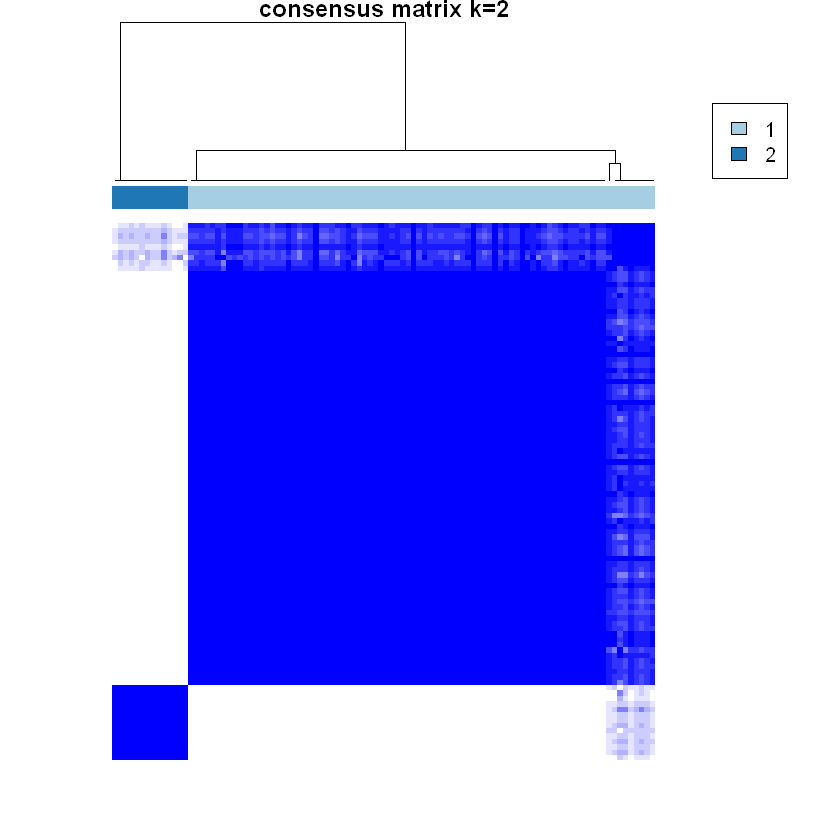

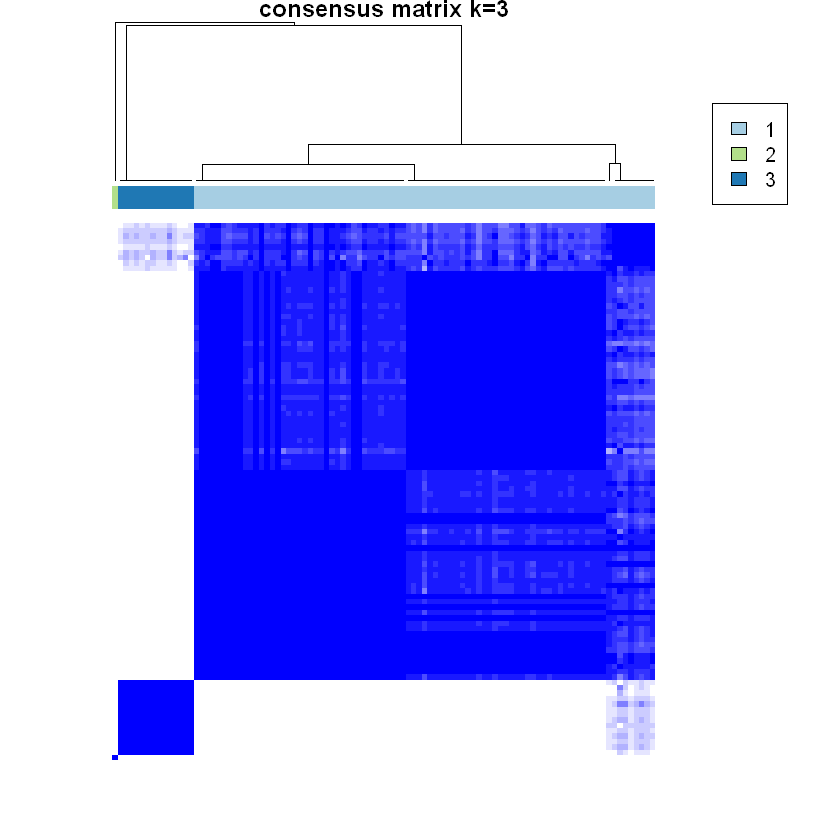

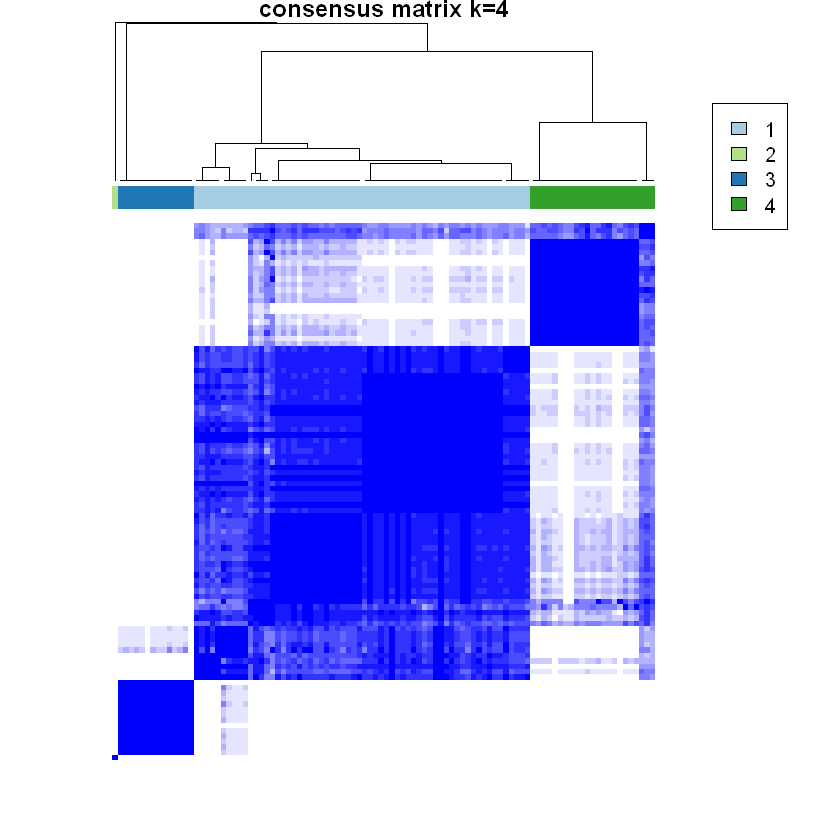

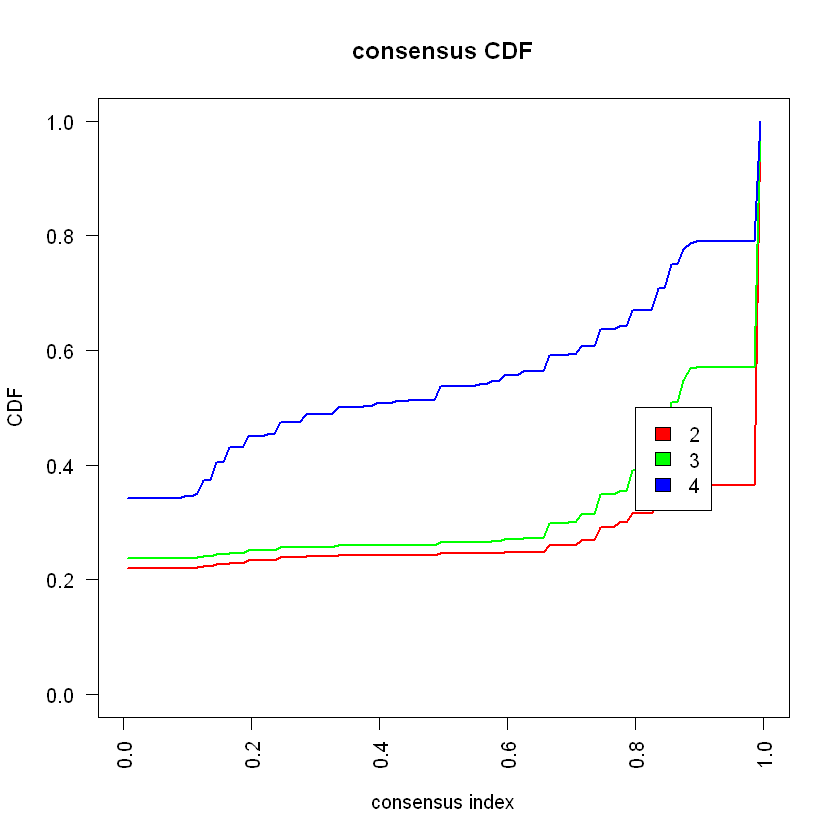

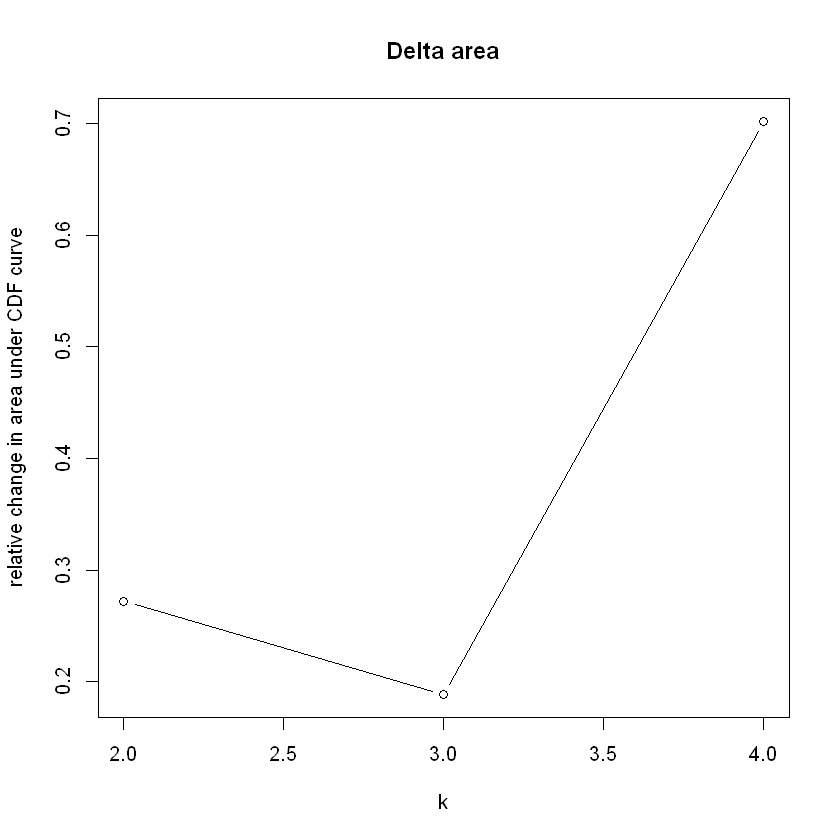

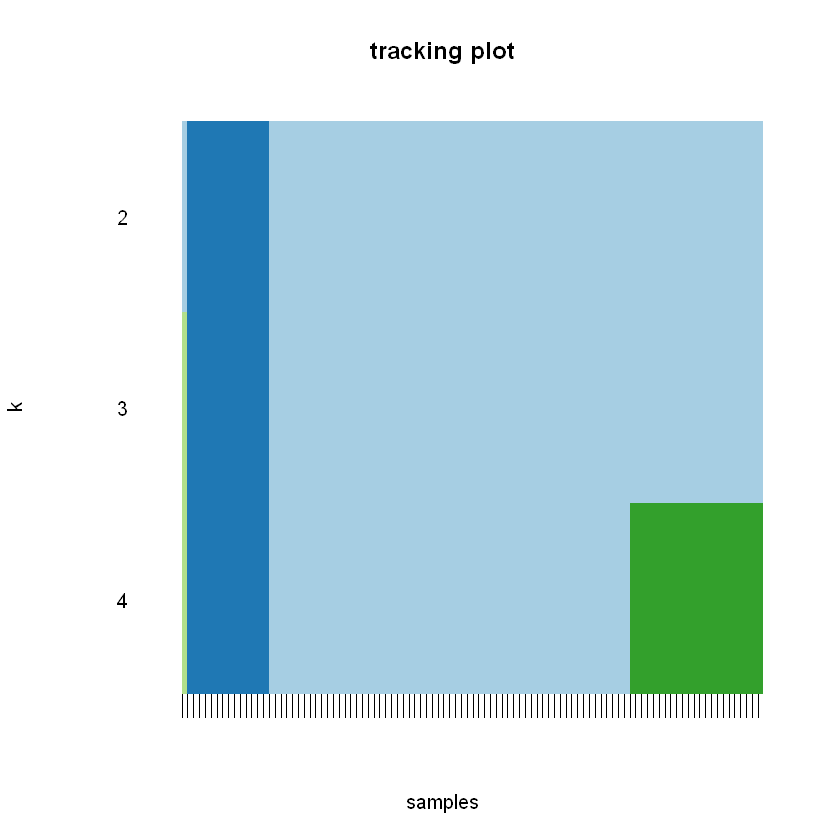

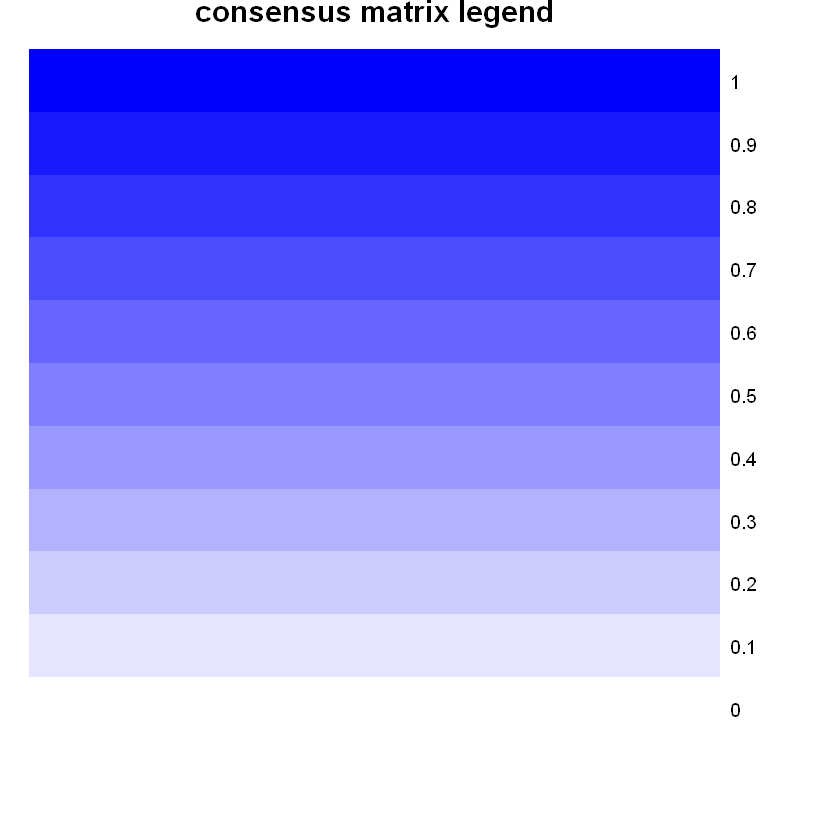

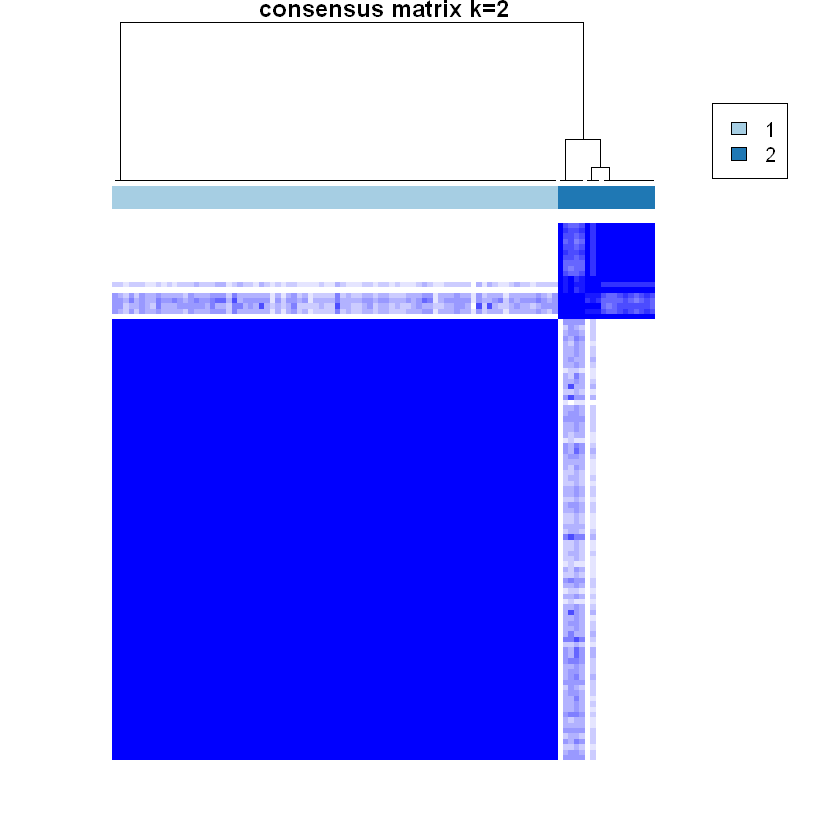

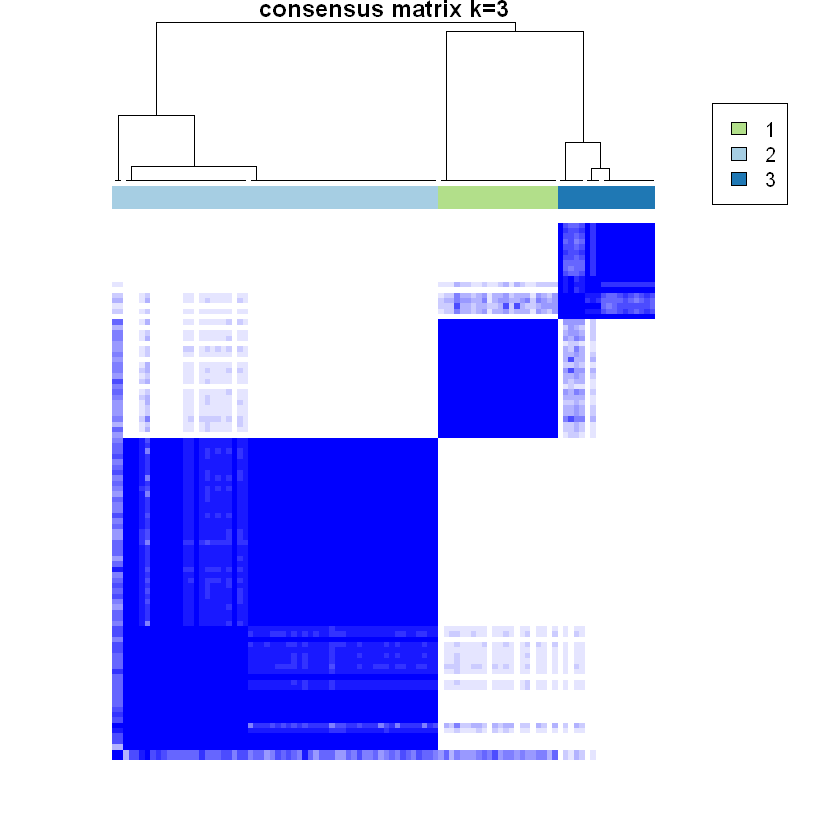

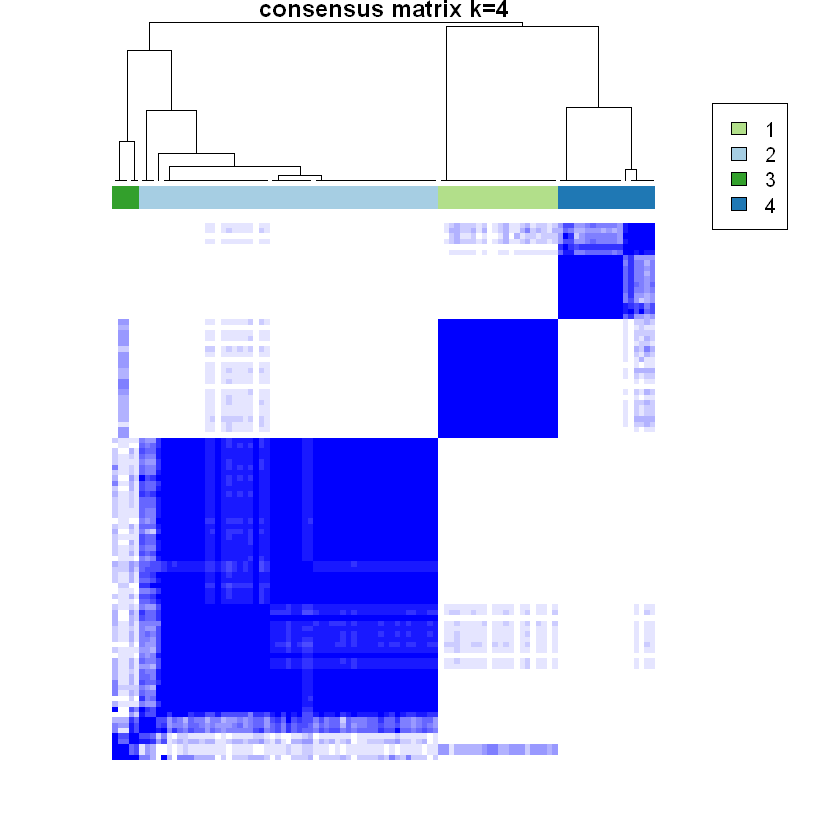

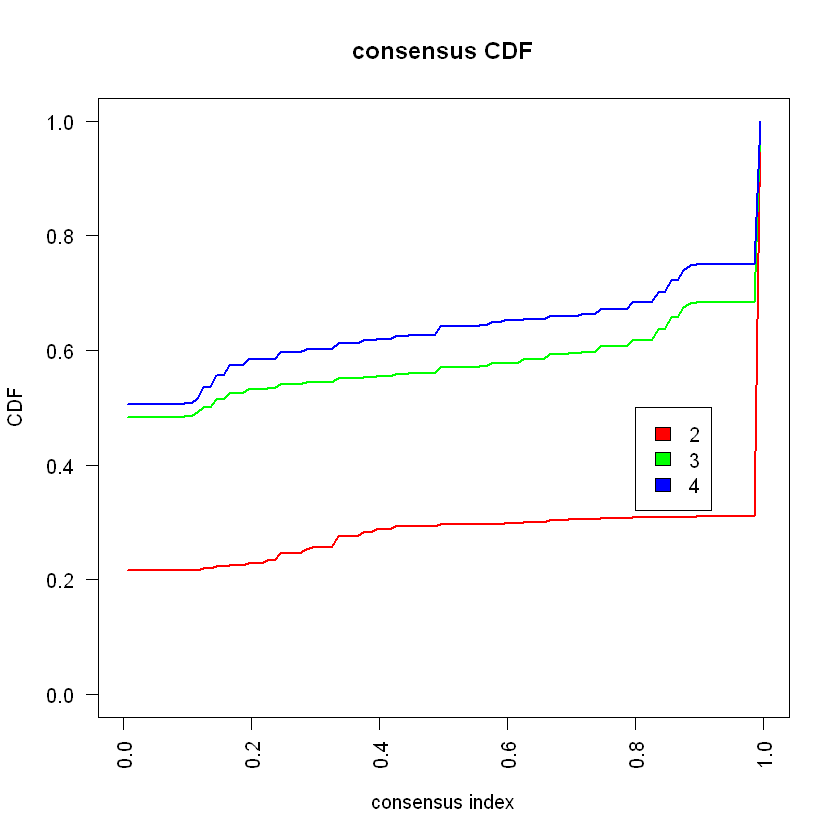

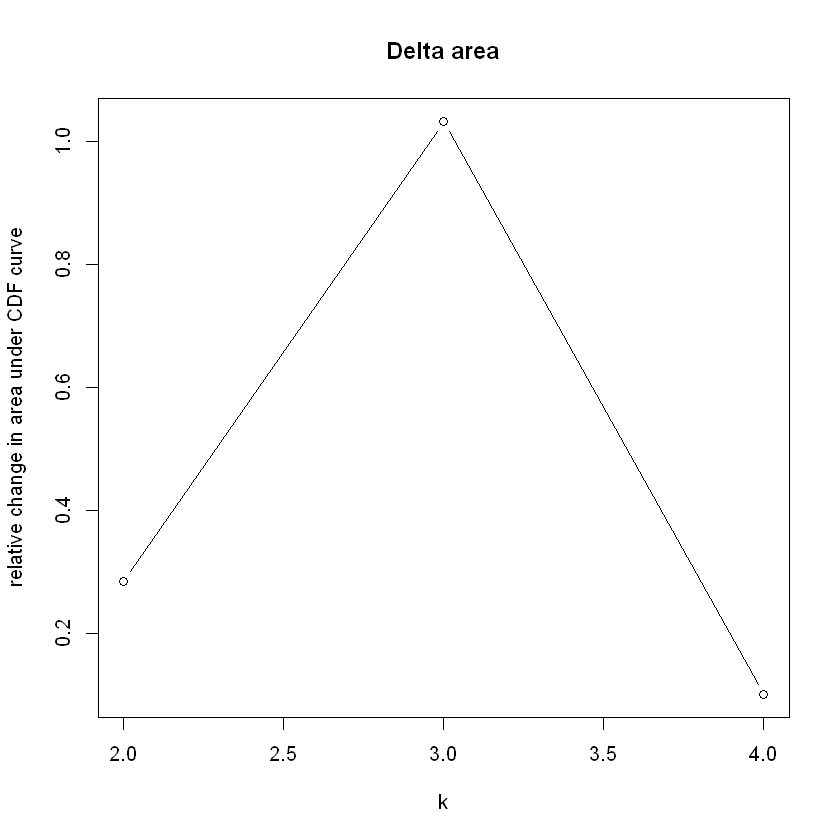

data set FlowCAP_WNV : run complete


   user  system elapsed 
 387.20  280.08  706.51 

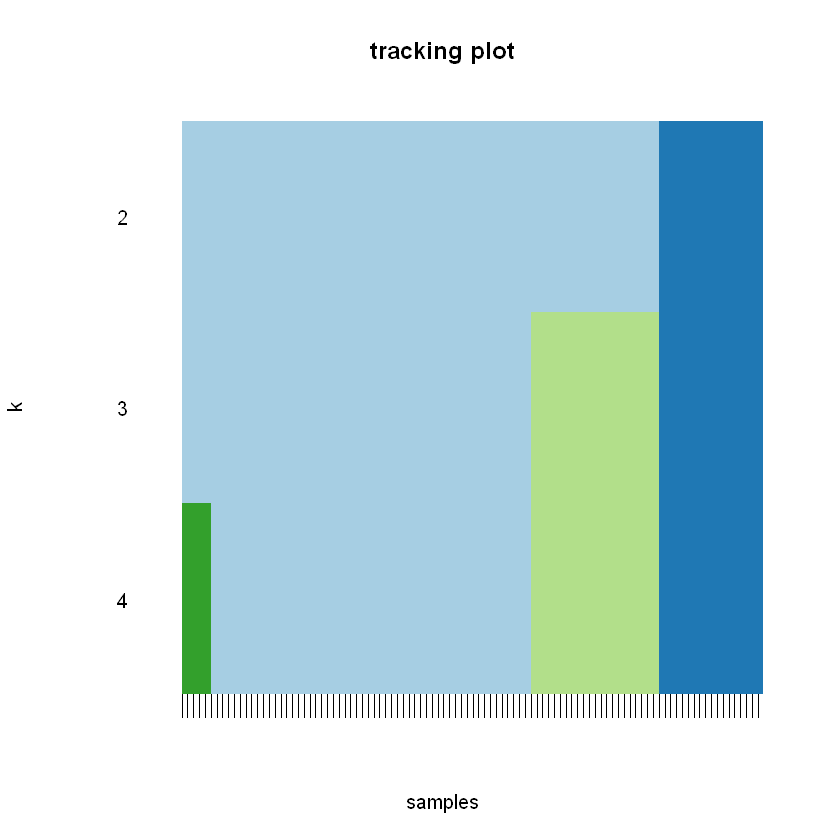

In [28]:
system.time({
    for (i in 1:length(out_pre_manual)) {
  if (!is_FlowCAP[i]) {
    runtimes[[i]] <- system.time({
      # note: In the current version of FlowSOM, the recommended function 
      # FlowSOM::metaClustering_consensus() does not pass along the seed argument 
      # correctly, so results are not reproducible. To get around this, we use the 
      # dependency function ConsensusClusterPlus::ConsensusClusterPlus() instead. 
      # However, this will be fixed in the next update of FlowSOM (version 1.5); after 
      # the update the following (simpler) line of code can be used instead.
      #meta <- FlowSOM::metaClustering_consensus(out_pre_manual[[i]]$map$codes, k = k[[i]], seed = seed)
      
      meta <- suppressMessages(
        ConsensusClusterPlus::ConsensusClusterPlus(t(out_pre_manual[[i]]$map$codes), maxK = k[[i]], seed = seed)
      )
      meta <- meta[[k[[i]]]]$consensusClass
    })
    out[[i]] <- meta
    cat("data set", names(data[i]), ": run complete\n")
    
  } else {
    # FlowCAP data sets: run clustering algorithm separately for each sample
    out[[i]] <- runtimes[[i]] <- vector("list", length(data[[i]]))
    names(out[[i]]) <- names(runtimes[[i]]) <- names(data[[i]])
    
    for (j in 1:length(data[[i]])) {
      runtimes[[i]][[j]] <- system.time({
        # note: In the current version of FlowSOM, the recommended function 
        # FlowSOM::metaClustering_consensus() does not pass along the seed argument 
        # correctly, so results are not reproducible. To get around this, we use the 
        # dependency function ConsensusClusterPlus::ConsensusClusterPlus() instead. 
        # However, this will be fixed in the next update of FlowSOM (version 1.5); after 
        # the update the following (simpler) line of code can be used instead.
        #meta <- FlowSOM::metaClustering_consensus(out_pre_manual[[i]][[j]]$map$codes, k = k[[i]], seed = seed)
        
        meta <- suppressMessages(
          ConsensusClusterPlus::ConsensusClusterPlus(t(out_pre_manual[[i]][[j]]$map$codes), maxK = k[[i]], seed = seed)
        )
        meta <- meta[[k[[i]]]]$consensusClass
      })
      out[[i]][[j]] <- meta
    }
    cat("data set", names(data[i]), ": run complete\n")
    
    # FlowCAP data sets: sum runtimes over samples
    runtimes_i <- do.call(rbind, runtimes[[i]])[, 1:3]
    runtimes_i <- colSums(runtimes_i)
    names(runtimes_i) <- c("user", "system", "elapsed")
    runtimes[[i]] <- runtimes_i
  }
}
})

In [27]:
meta

[1] 1 1 1 1 2 2 2 2 3 1 1 1 1 1 1 2 2 2 2 2 1 1 1 1 2 2 1 2 2 2 1 1 1 2 2 2 2
 [38] 2 2 2 1 1 1 2 2 2 2 2 2 2 1 4 3 3 2 2 2 2 2 2 4 4 3 3 2 2 2 2 2 2 4 4 4 4
 [75] 2 2 2 2 2 2 4 4 4 4 4 2 2 2 2 2 4 4 4 4 4 4 2 2 2 2

In [27]:
# combine runtimes
for (i in 1:length(runtimes)) {
  runtimes[[i]] <- runtimes_pre_manual[[i]] + runtimes[[i]]
}

# check cluster labels (one data set only)
out[[1]]
out[[8]][[1]]

# extract cluster labels
clus <- vector("list", length(data))
names(clus) <- names(data)

for (i in 1:length(clus)) {
  if (!is_FlowCAP[i]) {
    clus[[i]] <- out[[i]][out_pre_manual[[i]]$map$mapping[, 1]]
    
  } else {
    # FlowCAP data sets
    clus_list_i <- vector("list", length(out_pre_manual[[i]]))
    names(clus_list_i) <- names(out_pre_manual[[i]])
    for (j in 1:length(clus_list_i)) {
      clus_list_i[[j]] <- out[[i]][[j]][out_pre_manual[[i]][[j]]$map$mapping[, 1]]
    }
    
    # convert FlowCAP cluster labels into format "sample_number"_"cluster_number"
    # e.g. sample 1, cluster 3 -> cluster label 1.3
    names_i <- rep(names(clus_list_i), times = sapply(clus_list_i, length))
    clus_collapse_i <- unlist(clus_list_i, use.names = FALSE)
    clus[[i]] <- paste(names_i, clus_collapse_i, sep = "_")
  }
}

sapply(clus, length)

# cluster sizes and number of clusters
# (for FlowCAP data sets, total no. of clusters = no. samples * no. clusters per sample)
table(clus[[1]])
sapply(clus, function(cl) length(table(cl)))

# save cluster labels
files_labels <- paste0("../FlowSOM_labels_", names(clus), ".txt")

for (i in 1:length(files_labels)) {
  res_i <- data.frame(label = clus[[i]])
  write.table(res_i, file = files_labels[i], row.names = FALSE, quote = FALSE, sep = "\t")
}

# save runtimes
runtimes <- lapply(runtimes, function(r) r["elapsed"])
runtimes <- t(as.data.frame(runtimes, row.names = "runtime"))

write.table(runtimes, file = "../runtime_FlowSOM.txt", 
            quote = FALSE, sep = "\t")

[1]  1  1  2  1  1  1  3  4  5  6  1  1  1  1  1  7  8  9  6  6 10 10  1  1  1
 [26]  1  1  6  6  6 10 10 10  1  1 11  6  6  6  6 10 10 10 10 10  1 12  6  6  6
 [51] 10 10 10 10 13 14 15  6 16  6 17 18 19 10 20 21 22 23 16 24 25 26 27 27 21
 [76] 28 29 30 23 16 27 27 31 31 32 33 34 35 36 37 31 31 31 32 32 38 33 39 40 40

[1] 1 1 2 2 2 2 3 3 4 4 1 1 2 2 2 3 3 3 3 4 1 1 2 2 2 3 3 3 3 3 1 1 2 2 2 3 3
 [38] 3 3 3 3 2 2 2 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

Levine_32dim Levine_13dim   Samusik_01  Samusik_all Nilsson_rare Mosmann_rare 
      265627       167044        86864       841644        44140       396460 
  FlowCAP_ND  FlowCAP_WNV 
     1778883      1214373


    1     2     3     4     5     6     7     8     9    10    11    12    13 
62717  1788  1148   808  2320 45556   570   527   724 43456  2060  1942  1913 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
 1482  1192  6188   366   474   385   717  3876   809  4336  2028  2271   524 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
14114  1933  1366  3066 19882  7628  4065   960  1673  1497  2539  3808  1217 
   40 
11702 

Levine_32dim Levine_13dim   Samusik_01  Samusik_all Nilsson_rare Mosmann_rare 
          40           40           40           40           40           40 
  FlowCAP_ND  FlowCAP_WNV 
         210           52